# Housing Project

In [1]:
# import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read and Understand data

In [2]:
# import dataset
df_train = pd.read_csv("housing project train.csv")
df_test = pd.read_csv("housing project test.csv")
pd.set_option('Display.max_columns', None)
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [3]:
# check shape of the dataset
print(df_train.shape)
print(df_test.shape)

(1168, 81)
(292, 80)


1. Train data have 1168 rows and 81 features.
2. test data have 292 rows and 80 features.

In [4]:
# check info of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

From the above info we can see that, null value present in data and need to fill.

In [5]:
# check discriptive analysis of numerical columns.
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027   
std       1.124343    30.145255     20.785185   182.595606   462.664785   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean     46.647260   569.721747  1061.095034  1169.860445   348.826199   
std     163.520016   449.375525   442.272249   391.161983   439.696370   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   216.000000   799.000000   892.000000     0.000000   
50%       0.000000   474.000000  1005.500000  1096.500000     0.000000   
75%       0.000000   816.000000  1291.500000  1392.000000   729.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean       6.380137  1525.066781      0.425514      0.055651     1.562500   
std       50.892844   528.042957      0.521615      0.236699     0.551882   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1143.250000      0.000000      0.000000     1.000000   
50%        0.000000  1468.500000      0.000000      0.000000     2.000000   
75%        0.000000  1795.000000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1104.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean   1978.193841     1.776541   476.860445    96.206336    46.559932   
std      24.890704     0.745554   214.466769   126.158988    66.381023   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   338.000000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    24.000000   
75%    2002.000000     2.000000   576.000000   171.000000    70.000000   
max    2

1. From the above table we can see that, there is large difference between mean of the data and standard deviation of the data of many columns. it depicts skewness is present in data and need to remove.
2. we can also see that, there is large difference between 75% of the data and maximum data. It depicts outliers present in data and need to remove.
3. Here, some variables are categorical. So, in cleaning process we will chage datatype of some variables.
4. properties minimum price is 34900 doller and maximum price is 755000 doller.

### Data cleaning 

In [6]:
# check the number of null values present in dataset.
pd.set_option('Display.max_rows', None)
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
# Here we drop id column because it is not useful for our model
# we also drop MiscFeature column because it contains extra categories of home and have almost 96% null values.
df_train.drop("Id",axis=1,inplace=True)
df_train.drop("MiscFeature",axis=1,inplace=True)

df_test.drop("Id",axis=1,inplace=True)
df_test.drop("MiscFeature",axis=1,inplace=True)

In [8]:
# instead of drop null values which will result in data loss, we will fill null values according to provided data description.

df_train["LotFrontage"].fillna(0,inplace=True)
df_train["MasVnrArea"].fillna(0,inplace=True)

df_train["MasVnrType"].fillna("None",inplace=True)

#NA in Alley column means No Alley, so we will replace NA by it.
df_train["Alley"].fillna("No Alley",inplace=True)

#NA in BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2 column means No basement, so we will replace NA by it.
df_train["BsmtQual"].fillna("No basement",inplace=True)
df_train["BsmtCond"].fillna("No basement",inplace=True)
df_train["BsmtExposure"].fillna("No basement",inplace=True)
df_train["BsmtFinType1"].fillna("No basement",inplace=True)
df_train["BsmtFinType2"].fillna("No basement",inplace=True)

#NA in Fence column means No Fence, so we will replace NA by it.
df_train["FireplaceQu"].fillna("No Fireplace",inplace=True)

#NA in GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond columns mean No Garage, so we will replace NA by it.
df_train["GarageType"].fillna("No Garage",inplace=True)
df_train["GarageFinish"].fillna("No Garage",inplace=True)
df_train["GarageQual"].fillna("No Garage",inplace=True)
df_train["GarageCond"].fillna("No Garage",inplace=True)
df_train['GarageYrBlt'].fillna("No Garage",inplace=True)

#NA in PoolQC column means No Pool, so we will replace NA by it.
df_train["PoolQC"].fillna("No Pool",inplace=True)

#NA in Fence column means No Fence, so we will replace NA by it.
df_train["Fence"].fillna("No Fence",inplace=True)

In [9]:
# fill null values for test data
df_test["LotFrontage"].fillna(0,inplace=True)
df_test["MasVnrArea"].fillna(0,inplace=True)

df_test["MasVnrType"].fillna("None",inplace=True)

#NA in Alley column means No Alley, so we will replace NA by it.
df_test["Alley"].fillna("No Alley",inplace=True)

#NA in BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2 column means No basement, so we will replace NA by it.
df_test["BsmtQual"].fillna("No basement",inplace=True)
df_test["BsmtCond"].fillna("No basement",inplace=True)
df_test["BsmtExposure"].fillna("No basement",inplace=True)
df_test["BsmtFinType1"].fillna("No basement",inplace=True)
df_test["BsmtFinType2"].fillna("No basement",inplace=True)

#NA in Fence column means No Fence, so we will replace NA by it.
df_test["FireplaceQu"].fillna("No Fireplace",inplace=True)

#NA in GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond columns mean No Garage, so we will replace NA by it.
df_test["GarageType"].fillna("No Garage",inplace=True)
df_test["GarageFinish"].fillna("No Garage",inplace=True)
df_test["GarageQual"].fillna("No Garage",inplace=True)
df_test["GarageCond"].fillna("No Garage",inplace=True)
df_test['GarageYrBlt'].fillna("No Garage",inplace=True)

#NA in PoolQC column means No Pool, so we will replace NA by it.
df_test["PoolQC"].fillna("No Pool",inplace=True)

#NA in Fence column means No Fence, so we will replace NA by it.
df_test["Fence"].fillna("No Fence",inplace=True)

In [10]:
# converting datatype of some variables into object to treat them as a categorical variables.
df_train["MSSubClass"] = df_train["MSSubClass"].astype('object')
df_train['OverallQual'] = df_train['OverallQual'].astype('object')
df_train['OverallCond'] = df_train['OverallCond'].astype('object')
df_train['BsmtFullBath'] = df_train['BsmtFullBath'].astype('object')
df_train['BsmtHalfBath'] = df_train['BsmtHalfBath'].astype('object')
df_train['FullBath'] = df_train['FullBath'].astype('object')
df_train['HalfBath'] = df_train['HalfBath'].astype('object')
df_train['Fireplaces'] = df_train['Fireplaces'].astype('object')
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].astype('object')

In [11]:
# converting datatypes for test data
df_test["MSSubClass"] = df_test["MSSubClass"].astype('object')
df_test['OverallQual'] = df_test['OverallQual'].astype('object')
df_test['OverallCond'] = df_test['OverallCond'].astype('object')
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].astype('object')
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].astype('object')
df_test['FullBath'] = df_test['FullBath'].astype('object')
df_test['HalfBath'] = df_test['HalfBath'].astype('object')
df_test['Fireplaces'] = df_test['Fireplaces'].astype('object')
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].astype('object')

### Data Analysis

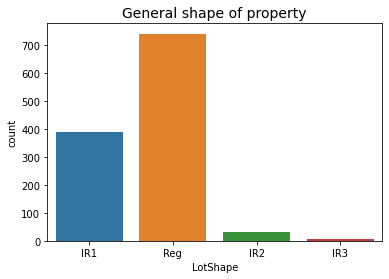

In [12]:
sns.countplot("LotShape", data=df_train)
plt.title("General shape of property", fontsize=14)
plt.show()

Out of 1168 properties, Approximately 750 properties are in regular shape, while around 400 properties are slightly irregular.(Reg=Regular,IR1=Slightly irregular,IR2=Moderately Irregular,IR3=Irregular)

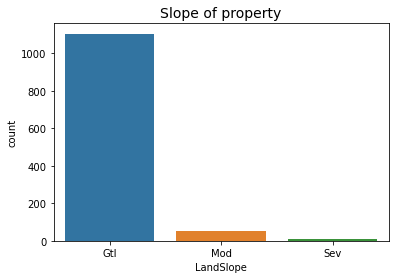

In [13]:
sns.countplot("LandSlope", data=df_train)
plt.title("Slope of property", fontsize=14)
plt.show()

From the above plot we can see that, most of the properties land slope is gentle.(Gtl=Gentle slope,Mod=Moderate Slope,Sev=Severe Slope)

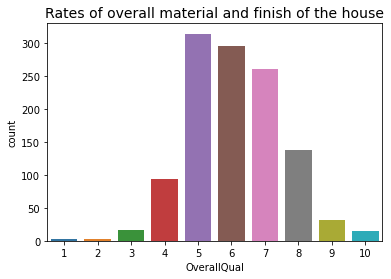

5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64

In [14]:
sns.countplot("OverallQual", data=df_train)
plt.title("Rates of overall material and finish of the house", fontsize=14)
plt.show()

df_train["OverallQual"].value_counts()

From the above plot we can see that, out of 1168 houses 314 houses overall quality is average and 295 houses overall quality is above average.(10=Very Excellent,9=Excellent,8=Very Good,7=Good,6=Above Average,5=Average,4=Below Average,3=Fair,2=Poor,1=Very Poor)

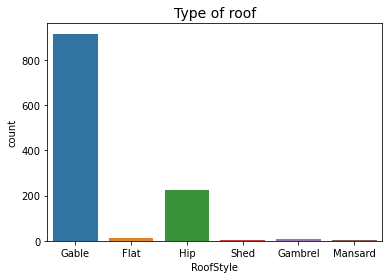

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

In [15]:
sns.countplot("RoofStyle", data=df_train)
plt.title("Type of roof", fontsize=14)
plt.show()

df_train["RoofStyle"].value_counts()

Out of 1168 houses, 915 houses roof style is Gable and only 2 houses roof style is shed.

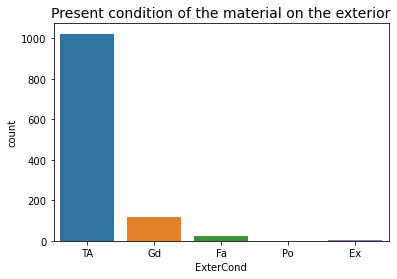

In [16]:
sns.countplot("ExterCond", data=df_train)
plt.title("Present condition of the material on the exterior", fontsize=14)
plt.show()

From the above plot we can see that, almost 1000 properties Present condition of the material on the exterior is average. (Ex=Excellent,Gd=Good,TA=Average/Typical,Fa=Fair,Po=Poor)

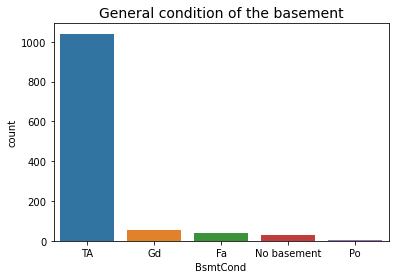

TA             1041
Gd               56
Fa               39
No basement      30
Po                2
Name: BsmtCond, dtype: int64

In [17]:
sns.countplot("BsmtCond", data=df_train)
plt.title("General condition of the basement", fontsize=14)
plt.show()

df_train["BsmtCond"].value_counts()

Out of 1168 houses, 1041 houses basement condition is typical, while 30 hoses are without basement.(Gd=Good,TA=Typical - slight dampness allowed,Fa=Fair - dampness or some cracking or settling,Po=Poor - Severe cracking, settling, or wetness)

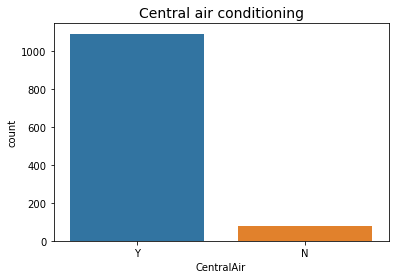

In [18]:
sns.countplot("CentralAir", data=df_train)
plt.title("Central air conditioning", fontsize=14)
plt.show()

From the above count plot we can see that, most of the properties have central air conditioning system.(Y=yes,N=no)

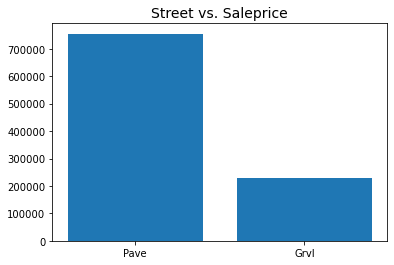

In [19]:
plt.bar(df_train["Street"],df_train["SalePrice"])
plt.title("Street vs. Saleprice", fontsize=14)
plt.show()

Properties price is very high where street is paved, while price is low where street is gravel. 

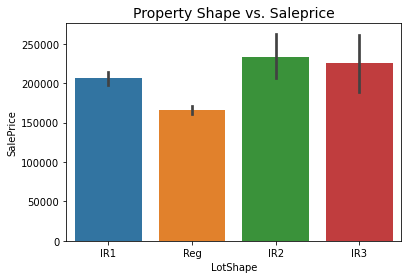

In [20]:
sns.barplot(x="LotShape",y="SalePrice",data=df_train)
plt.title("Property Shape vs. Saleprice", fontsize=14)
plt.show()

From the above bar plot we can see that, properties price is high where shape of the properties is moderately irregular, while price is low where shape of the properties regular compares to other categories.(Reg=Regular,IR1=Slightly irregular,IR2=Moderately Irregular,IR3=Irregular)

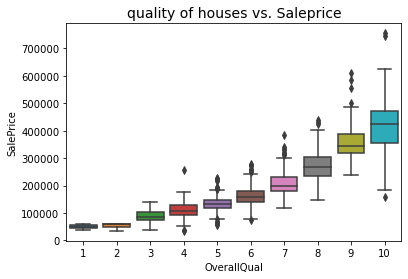

In [21]:
sns.boxplot(x="OverallQual",y="SalePrice",data=df_train)
plt.title("quality of houses vs. Saleprice", fontsize=14)
plt.show()

From the above box plot we can see that, price of the houses is very high where overall quality of the houses is very excellent and price decrease from going 10 to 1. (10=Very Excellent,9=Excellent,8=Very Good,7=Good,6=Above Average,5=Average,4=Below Average,3=Fair,2=Poor,1=Very Poor)

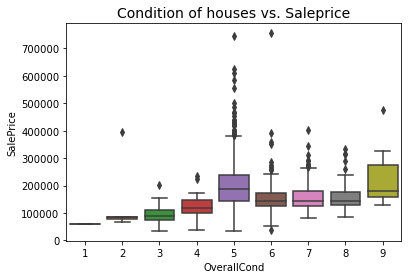

In [22]:
sns.boxplot(x="OverallCond",y="SalePrice",data=df_train)
plt.title("Condition of houses vs. Saleprice", fontsize=14)
plt.show()

1. From the above box plot we can see that, houses price is high where overall condition of the houses is excellent, while price of the houses is almost same where condition of the houses is above average,good and very good.
2. Average condition houses price is higher than above average, good and very good condition houses. 
3. (9=Excellent,8=Very Good,7=Good,6=Above Average,5=Average,4=Below Average,3=Fair,2=Poor,1=Very Poor)

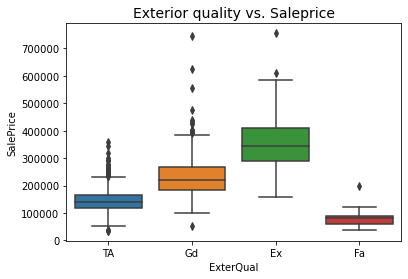

In [23]:
sns.boxplot(x="ExterQual",y="SalePrice",data=df_train)
plt.title("Exterior quality vs. Saleprice", fontsize=14)
plt.show()

Properties price is high where quality of the material on the exterior is excellent, while price is low where quality of the material on the exterior is fair.(Ex=Excellent,Gd=Good,TA=Average/Typical,Fa=Fair,Po=Poor)

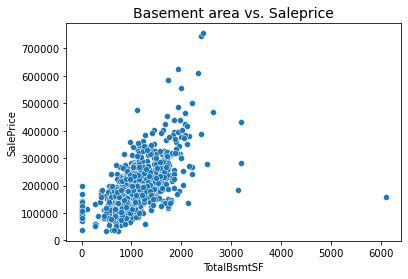

In [24]:
sns.scatterplot(x="TotalBsmtSF",y="SalePrice",data=df_train)
plt.title("Basement area vs. Saleprice", fontsize=14)
plt.show()

From the above scatterplot we can see that, total square feet of basement area and saleprice are positively correlated to each other. 

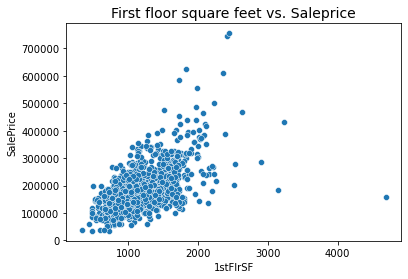

In [25]:
sns.scatterplot(x="1stFlrSF",y="SalePrice",data=df_train)
plt.title("First floor square feet vs. Saleprice", fontsize=14)
plt.show()

From the above scatterplot we can see that, First floor square feet and houses price are positively correlated to each other.

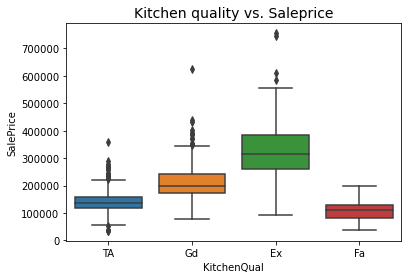

In [26]:
sns.boxplot(x="KitchenQual",y="SalePrice",data=df_train)
plt.title("Kitchen quality vs. Saleprice", fontsize=14)
plt.show()

From the above box plot we can see that, houses price is higher where kitchen quality is excellent and price is lower where kitchen quality is fair compare to other categories.(Ex=Excellent,Gd=Good,TA=Typical/Average,Fa=Fair)

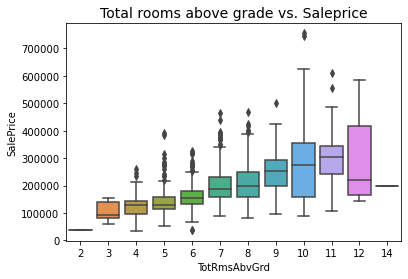

In [27]:
sns.boxplot(x="TotRmsAbvGrd",y="SalePrice",data=df_train)
plt.title("Total rooms above grade vs. Saleprice", fontsize=14)
plt.show()

From the above plot we can see that, properties price is higher where total rooms above grade is 12 but price is lower where total rooms above grade is 14. 

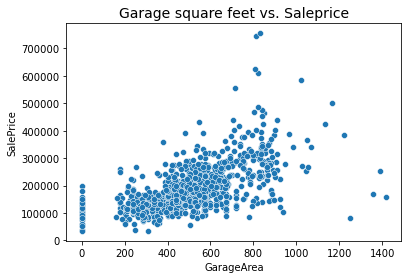

In [28]:
sns.scatterplot(x="GarageArea",y="SalePrice",data=df_train)
plt.title("Garage square feet vs. Saleprice", fontsize=14)
plt.show()

Square feet area of garage and properties price is positively correlated to each other.

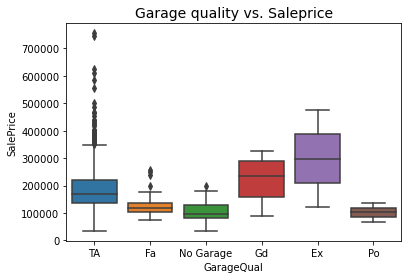

In [29]:
sns.boxplot(x="GarageQual",y="SalePrice",data=df_train)
plt.title("Garage quality vs. Saleprice", fontsize=14)
plt.show()

Where garage quality is excellent, properties price is around 400000 dollar and price is around 100000 dollar where garage quality is poor.(Ex=Excellent,Gd=Good,TA=Typical/Average,Fa=Fair,Po=Poor,NA=No Garage)

## Handling Outliers

In [30]:
#split numerical and categorical columns of train dataset
numerical_col = df_train.select_dtypes(include=['float64','int64'])
cat_col = df_train.select_dtypes(include=['object'])

In [31]:
#split numerical and categorical columns of test dataset
numerical_col_test = df_test.select_dtypes(include=['float64','int64'])
cat_col_test = df_test.select_dtypes(include=['object'])

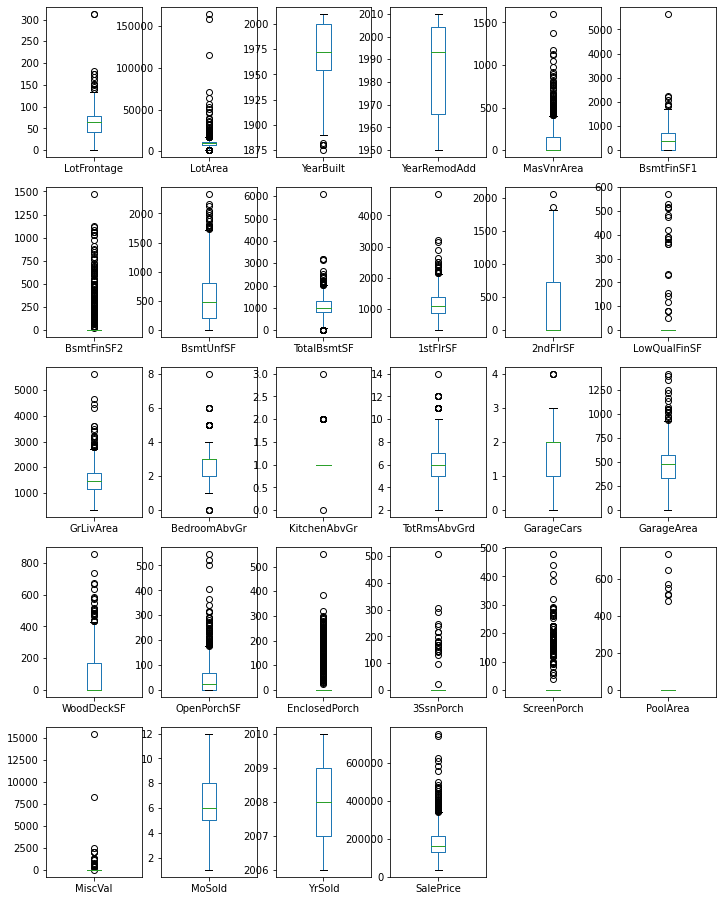

In [32]:
# check outliers through plotting boxplot.
numerical_col.plot.box(subplots=True,figsize=(12,16),layout=(5,6))
plt.show()

From the above boxplot we can see that, almost every features have outliers and need to remove.

In [33]:
# Check outliers using zscore
from scipy.stats import zscore
z = np.abs(zscore(numerical_col))
threshold=3
print(np.where(z>3))

(array([   1,    1,    7,   14,   20,   22,   23,   25,   32,   32,   32,
         33,   38,   47,   51,   51,   63,   66,   66,   68,   68,   72,
         73,   74,   76,   77,   78,   91,   93,   93,   95,   96,   97,
         98,  103,  103,  103,  103,  103,  103,  106,  107,  112,  113,
        115,  119,  119,  119,  127,  133,  138,  138,  140,  141,  141,
        141,  141,  141,  141,  141,  142,  142,  143,  150,  151,  152,
        156,  157,  166,  170,  178,  178,  191,  192,  192,  192,  196,
        206,  210,  211,  212,  214,  216,  226,  228,  232,  232,  232,
        232,  237,  241,  241,  241,  241,  243,  245,  245,  253,  254,
        255,  269,  272,  273,  284,  284,  289,  299,  299,  300,  304,
        305,  305,  305,  305,  305,  305,  308,  309,  310,  310,  312,
        319,  320,  325,  333,  335,  338,  338,  352,  352,  355,  356,
        357,  361,  361,  361,  361,  361,  361,  361,  362,  363,  369,
        372,  378,  379,  380,  381,  387,  389,  

In [34]:
df_train1 = numerical_col[(z<3).all(axis=1)]
df_train1.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0          0.0     4928       1976          1976         0.0         120   
2         92.0     9920       1996          1997         0.0         862   
3        105.0    11751       1977          1977       480.0         705   
4          0.0    16635       1977          2000       126.0        1246   
5         58.0    14054       2006          2006         0.0           0   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        958         1078       958         0             0   
2           0        255         1117      1127       886             0   
3           0       1139         1844      1844         0             0   
4           0        356         1602      1602         0             0   
5           0        879          879       879       984             0   

   GrLivArea  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  GarageCars  \
0        958             2             1             5           2   
2       2013             3             1             8           2   
3       1844             3             1             7           2   
4       1602             3             1             8           2   
5       1863             4             1             9           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         440           0          205              0          0            0   
2         455         180          130              0          0            0   
3         546           0          122              0          0            0   
4         529         240            0              0          0            0   
5         660         100           17              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0         0        0       2    2007     128000  
2         0        0       6    2007     269790  
3         0        0       1    2010     190000  
4         0        0       6    2009     215000  
5         0        0      11    2006     219210

In [35]:
print(df_train.shape)
print(df_train1.shape)

(1168, 79)
(878, 28)


In [36]:
percentage_loss = ((1168-878)/1168)*100
percentage_loss

24.82876712328767

Here, percentage loss of data is very high using zscore. so, we don't use zscore for remove outliers. 

In [37]:
# check outliers using inter quartile range.
Q1=numerical_col.quantile(0.25)
Q3=numerical_col.quantile(0.75)
IQR=Q3-Q1
print(IQR)

LotFrontage         37.50
LotArea           3894.00
YearBuilt           46.00
YearRemodAdd        38.00
MasVnrArea         160.00
BsmtFinSF1         714.50
BsmtFinSF2           0.00
BsmtUnfSF          600.00
TotalBsmtSF        492.50
1stFlrSF           500.00
2ndFlrSF           729.00
LowQualFinSF         0.00
GrLivArea          651.75
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
GarageCars           1.00
GarageArea         238.00
WoodDeckSF         171.00
OpenPorchSF         70.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84625.00
dtype: float64


In [38]:
df_new1=numerical_col[~((numerical_col < (Q1 - 1.5 * IQR)) | (numerical_col > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_new1.shape)

(548, 28)


Here, percentage loss of data is also high by using inter qurtile range. so, removing outliers is not a good idea because it losses more data and it affects our model badely.

## Prepare data for model training

In [39]:
# here, our target variable is saleprice, so we take it as a y variable. It is a regression type problem. 
x = df_train.drop(["SalePrice"],axis=1)
y = df_train["SalePrice"]

## Handling Skewness

In [40]:
x.skew()

MSSubClass        1.422019
LotFrontage       0.364916
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
dtype: float64

from the above observation we can see that, value above 4 depicts skewness, so check skewness of those features by using distribution plot and then decide remove skewness or not. 

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

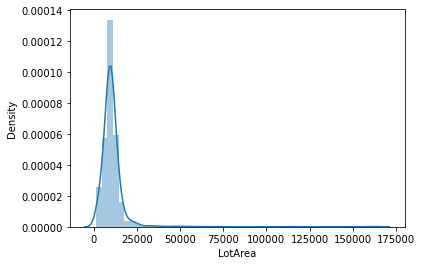

In [41]:
# check skewness of the some features.
sns.distplot(df_train["LotArea"])

<AxesSubplot:xlabel='BsmtFinSF2', ylabel='Density'>

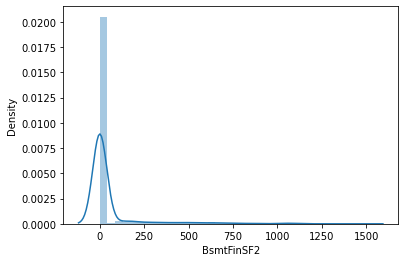

In [42]:
sns.distplot(df_train["BsmtFinSF2"])

<AxesSubplot:xlabel='LowQualFinSF', ylabel='Density'>

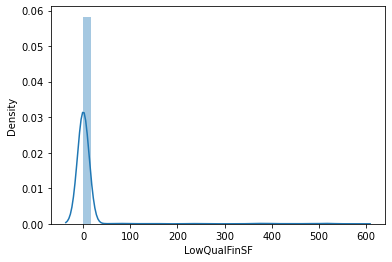

In [43]:
sns.distplot(df_train["LowQualFinSF"])

<AxesSubplot:xlabel='PoolArea', ylabel='Density'>

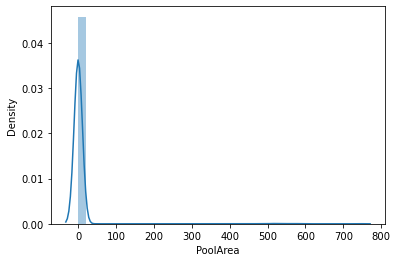

In [44]:
sns.distplot(df_train["PoolArea"])

<AxesSubplot:xlabel='MiscVal', ylabel='Density'>

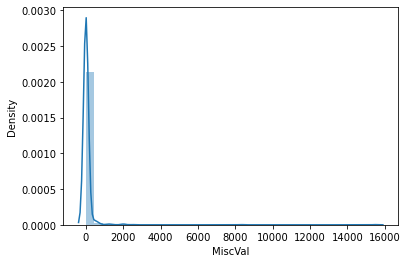

In [45]:
sns.distplot(df_train["MiscVal"])

From the above all plot we can see taht, all plots mostly have right skewed and need to remove skewness. we use log method for remove skewness.

In [46]:
# here, we remove skewness of numerical data using log method.
x = x.select_dtypes(include=['float64','int64'])
x = np.log1p(x)

# remove skewness for test dataset
z = df_test.select_dtypes(include=['float64','int64'])
z = np.log1p(z)

In [47]:
# merge numerical and categorical variables for train dataset
x_new = pd.concat([x,cat_col],axis=1)

# merge numerical and categorical variables data for test dataset.
df_test = pd.concat([z,cat_col_test],axis=1)

## Encoding Data

In [48]:
# merge train and test dataset for encoding.
df = pd.concat((x_new,df_test))

In [49]:
# Here, we convert categorical data into numerical data for model building and we use one hot encoding method.
x_encode = pd.get_dummies(df, drop_first=True)
x_encode.shape

(1460, 387)

## Scaling data

In [50]:
#scaling data with mean=0 and unit variance using standard scaler mothod
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_s = sc.fit_transform(x_encode)

In [51]:
# here, we split train dataset and test dataset for further process.
x = x_encode.head(1168) # we already split our target variable in above process as y 

df_test = x_encode.tail(292)

# Find best Model

In [52]:
# split train and test data from training dataset.
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [53]:
# our target variable is saleprice so it's a regression type problem.
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

model = [LinearRegression(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),ExtraTreeRegressor()]

for i in model:
    i.fit(x_train,y_train)
    train=i.score(x_train,y_train)
    predi=i.predict(x_test)
    print("Accuracy of",i,"is:")
    print("Model training accuracy:",train)
    print("r2 score:",r2_score(y_test,predi))
    print("mean absolute error:",mean_absolute_error(y_test,predi))
    print("root mean squared error:",np.sqrt(mean_squared_error(y_test,predi)))
    print("******************************************************************")
    print("\n")

Accuracy of LinearRegression() is:
Model training accuracy: 0.9559585859368886
r2 score: 0.05932849102642046
mean absolute error: 33051.43090969854
root mean squared error: 80929.32412722358
******************************************************************


Accuracy of SVR() is:
Model training accuracy: -0.047471026228074864
r2 score: -0.05218153332448927
mean absolute error: 58389.214981863326
root mean squared error: 85591.81896267603
******************************************************************


Accuracy of KNeighborsRegressor() is:
Model training accuracy: 0.7126954239916767
r2 score: 0.460023514309703
mean absolute error: 36024.52260273972
root mean squared error: 61316.07437046825
******************************************************************


Accuracy of DecisionTreeRegressor() is:
Model training accuracy: 1.0
r2 score: 0.7238831627760085
mean absolute error: 27199.921232876713
root mean squared error: 43846.34162880014
**********************************************

## Bagging and Boosting method

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

model = [RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),ExtraTreesRegressor(),XGBRegressor(),CatBoostRegressor()]

for m in model:
    m.fit(x_train,y_train)
    train = m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy of",m,"is:")
    print("Model training accuracy:",train)
    print("r2 score:",r2_score(y_test,predm))
    print("mean absolute error:",mean_absolute_error(y_test,predm))
    print("root mean squared error:",np.sqrt(mean_squared_error(y_test,predm)))
    print("******************************************************************")
    print("\n")

Accuracy of RandomForestRegressor() is:
Model training accuracy: 0.9773296858614452
r2 score: 0.781171792167973
mean absolute error: 20569.855205479453
root mean squared error: 39033.59664942643
******************************************************************


Accuracy of AdaBoostRegressor() is:
Model training accuracy: 0.8787318517437301
r2 score: 0.7767164448635823
mean absolute error: 25080.526812672717
root mean squared error: 39428.9568629725
******************************************************************


Accuracy of GradientBoostingRegressor() is:
Model training accuracy: 0.9712399474669892
r2 score: 0.83244782619089
mean absolute error: 19143.655869462626
root mean squared error: 34155.602578875165
******************************************************************


Accuracy of ExtraTreesRegressor() is:
Model training accuracy: 1.0
r2 score: 0.8085734170627652
mean absolute error: 20568.656952054796
root mean squared error: 36507.99999468169
*****************************

126:	learn: 21218.9252108	total: 1.81s	remaining: 12.4s
127:	learn: 21115.5203043	total: 1.82s	remaining: 12.4s
128:	learn: 21039.3044542	total: 1.83s	remaining: 12.4s
129:	learn: 20965.2680568	total: 1.84s	remaining: 12.3s
130:	learn: 20893.1709819	total: 1.85s	remaining: 12.3s
131:	learn: 20819.8569282	total: 1.86s	remaining: 12.3s
132:	learn: 20735.5209101	total: 1.88s	remaining: 12.2s
133:	learn: 20656.1181056	total: 1.89s	remaining: 12.2s
134:	learn: 20573.9539862	total: 1.9s	remaining: 12.1s
135:	learn: 20503.5304373	total: 1.91s	remaining: 12.1s
136:	learn: 20420.7824192	total: 1.92s	remaining: 12.1s
137:	learn: 20359.9380766	total: 1.94s	remaining: 12.1s
138:	learn: 20288.3431661	total: 1.95s	remaining: 12.1s
139:	learn: 20217.0599374	total: 1.96s	remaining: 12.1s
140:	learn: 20139.5336294	total: 1.98s	remaining: 12s
141:	learn: 20086.5613065	total: 1.99s	remaining: 12s
142:	learn: 20016.5562032	total: 2.01s	remaining: 12s
143:	learn: 19945.5137996	total: 2.02s	remaining: 12s
1

283:	learn: 14147.8195218	total: 3.76s	remaining: 9.49s
284:	learn: 14107.5719697	total: 3.78s	remaining: 9.48s
285:	learn: 14098.7877727	total: 3.79s	remaining: 9.46s
286:	learn: 14063.0689069	total: 3.81s	remaining: 9.46s
287:	learn: 14034.4592491	total: 3.83s	remaining: 9.48s
288:	learn: 13996.0791202	total: 3.85s	remaining: 9.48s
289:	learn: 13960.6171987	total: 3.86s	remaining: 9.46s
290:	learn: 13921.1940753	total: 3.88s	remaining: 9.44s
291:	learn: 13899.1577272	total: 3.88s	remaining: 9.42s
292:	learn: 13864.5901574	total: 3.9s	remaining: 9.4s
293:	learn: 13838.0984884	total: 3.9s	remaining: 9.38s
294:	learn: 13831.5320182	total: 3.92s	remaining: 9.36s
295:	learn: 13796.3398315	total: 3.92s	remaining: 9.34s
296:	learn: 13765.9404823	total: 3.94s	remaining: 9.32s
297:	learn: 13736.1872098	total: 3.95s	remaining: 9.31s
298:	learn: 13696.1403300	total: 3.97s	remaining: 9.3s
299:	learn: 13682.6292729	total: 3.98s	remaining: 9.28s
300:	learn: 13652.1739301	total: 3.99s	remaining: 9.

438:	learn: 10762.4754908	total: 5.73s	remaining: 7.32s
439:	learn: 10750.6858724	total: 5.74s	remaining: 7.31s
440:	learn: 10734.7051394	total: 5.75s	remaining: 7.29s
441:	learn: 10715.2943521	total: 5.76s	remaining: 7.28s
442:	learn: 10692.7869320	total: 5.77s	remaining: 7.26s
443:	learn: 10669.2147605	total: 5.79s	remaining: 7.25s
444:	learn: 10666.6125182	total: 5.8s	remaining: 7.24s
445:	learn: 10635.1952218	total: 5.82s	remaining: 7.22s
446:	learn: 10625.0796016	total: 5.83s	remaining: 7.21s
447:	learn: 10601.5018713	total: 5.85s	remaining: 7.2s
448:	learn: 10595.1457595	total: 5.86s	remaining: 7.19s
449:	learn: 10572.1636180	total: 5.88s	remaining: 7.18s
450:	learn: 10552.6970179	total: 5.89s	remaining: 7.17s
451:	learn: 10529.2522862	total: 5.9s	remaining: 7.16s
452:	learn: 10513.6274399	total: 5.92s	remaining: 7.14s
453:	learn: 10498.4958805	total: 5.93s	remaining: 7.13s
454:	learn: 10471.7814887	total: 5.94s	remaining: 7.12s
455:	learn: 10456.1604366	total: 5.95s	remaining: 7

589:	learn: 8697.1314697	total: 7.52s	remaining: 5.23s
590:	learn: 8674.8788338	total: 7.53s	remaining: 5.21s
591:	learn: 8655.5353598	total: 7.55s	remaining: 5.2s
592:	learn: 8641.0351881	total: 7.56s	remaining: 5.19s
593:	learn: 8626.0280373	total: 7.57s	remaining: 5.17s
594:	learn: 8615.4770672	total: 7.58s	remaining: 5.16s
595:	learn: 8608.2007803	total: 7.59s	remaining: 5.14s
596:	learn: 8593.4389124	total: 7.6s	remaining: 5.13s
597:	learn: 8581.4062508	total: 7.61s	remaining: 5.11s
598:	learn: 8569.7455423	total: 7.62s	remaining: 5.1s
599:	learn: 8559.9004760	total: 7.63s	remaining: 5.08s
600:	learn: 8547.4339512	total: 7.64s	remaining: 5.07s
601:	learn: 8527.8881514	total: 7.65s	remaining: 5.06s
602:	learn: 8518.0325449	total: 7.66s	remaining: 5.04s
603:	learn: 8506.0726405	total: 7.67s	remaining: 5.03s
604:	learn: 8497.8745576	total: 7.68s	remaining: 5.01s
605:	learn: 8489.8009547	total: 7.69s	remaining: 5s
606:	learn: 8476.7733141	total: 7.71s	remaining: 4.99s
607:	learn: 8463

742:	learn: 7087.9866347	total: 9.49s	remaining: 3.28s
743:	learn: 7075.9828841	total: 9.5s	remaining: 3.27s
744:	learn: 7068.5223207	total: 9.51s	remaining: 3.26s
745:	learn: 7053.8019682	total: 9.53s	remaining: 3.24s
746:	learn: 7050.3352266	total: 9.54s	remaining: 3.23s
747:	learn: 7043.0143201	total: 9.55s	remaining: 3.22s
748:	learn: 7031.1334532	total: 9.56s	remaining: 3.2s
749:	learn: 7025.0385582	total: 9.57s	remaining: 3.19s
750:	learn: 7017.3402152	total: 9.59s	remaining: 3.18s
751:	learn: 7008.5014349	total: 9.61s	remaining: 3.17s
752:	learn: 7001.7605831	total: 9.62s	remaining: 3.15s
753:	learn: 6993.3962727	total: 9.63s	remaining: 3.14s
754:	learn: 6992.2324357	total: 9.64s	remaining: 3.13s
755:	learn: 6977.1206876	total: 9.67s	remaining: 3.12s
756:	learn: 6975.9226082	total: 9.68s	remaining: 3.11s
757:	learn: 6974.8009779	total: 9.7s	remaining: 3.1s
758:	learn: 6962.0774392	total: 9.71s	remaining: 3.08s
759:	learn: 6950.1387527	total: 9.72s	remaining: 3.07s
760:	learn: 69

901:	learn: 5935.1896295	total: 11.5s	remaining: 1.25s
902:	learn: 5934.5050021	total: 11.5s	remaining: 1.24s
903:	learn: 5926.3606147	total: 11.5s	remaining: 1.22s
904:	learn: 5917.7706843	total: 11.5s	remaining: 1.21s
905:	learn: 5917.1634114	total: 11.5s	remaining: 1.2s
906:	learn: 5910.5413015	total: 11.6s	remaining: 1.18s
907:	learn: 5900.7017446	total: 11.6s	remaining: 1.17s
908:	learn: 5896.8660748	total: 11.6s	remaining: 1.16s
909:	learn: 5888.0253478	total: 11.6s	remaining: 1.15s
910:	learn: 5881.3774398	total: 11.6s	remaining: 1.13s
911:	learn: 5880.6785811	total: 11.6s	remaining: 1.12s
912:	learn: 5873.9473410	total: 11.6s	remaining: 1.11s
913:	learn: 5868.6776408	total: 11.6s	remaining: 1.09s
914:	learn: 5866.5631757	total: 11.6s	remaining: 1.08s
915:	learn: 5865.8434251	total: 11.6s	remaining: 1.07s
916:	learn: 5858.6723203	total: 11.7s	remaining: 1.05s
917:	learn: 5847.3751586	total: 11.7s	remaining: 1.04s
918:	learn: 5846.4610645	total: 11.7s	remaining: 1.03s
919:	learn:

## Lasso and Ridge regression with Hyperparameter Tuning

In [55]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [56]:
ls = Lasso()
parameters = {'alpha':[0.0001,0.001,0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'max_iter':[50,70,100,150,200,400,700,900,1000,1200,1400]}
reg = GridSearchCV(ls,parameters)
reg.fit(x_train,y_train)

print(reg.best_params_)

{'alpha': 0.9, 'max_iter': 50}


In [78]:
ls = Lasso(alpha=0.9,max_iter=50)
ls.fit(x_train,y_train)
train=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
print("Model training accuracy:",train)
print("r2_score:",r2_score(y_test,pred_ls))
print("mean absolute error:",mean_absolute_error(y_test,pred_ls))
print("root mean squared error", np.sqrt(mean_squared_error(y_test,pred_ls)))

Model training accuracy: 0.950916550008704
r2_score: 0.6577786021561163
mean absolute error: 25354.735149986485
root mean squared error 48813.5618629199


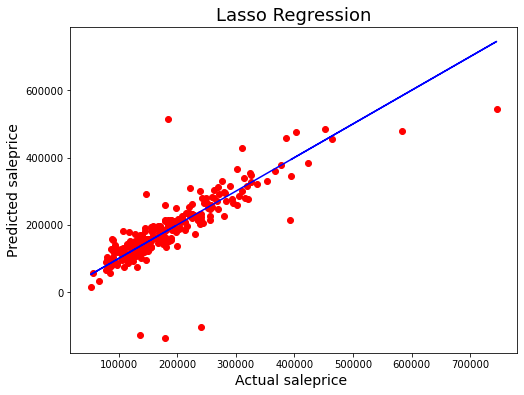

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_ls, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual saleprice ",fontsize=14)
plt.ylabel("Predicted saleprice",fontsize=14)
plt.title("Lasso Regression",fontsize=18)
plt.show()

In [59]:
rg = Ridge()
parameters={'alpha':[0.0001,0.001,0.005,0.01,0.02,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'max_iter':[50,80,100,200,400,500,800,1000,1200,1400]}
reg = GridSearchCV(rg,parameters)
reg.fit(x_train,y_train)

print(reg.best_params_)

{'alpha': 1, 'max_iter': 50}


In [79]:
rg = Ridge(alpha=1,max_iter=50)
rg.fit(x_train,y_train)
train=rg.score(x_train,y_train)
pred_rg=rg.predict(x_test)
print("Model training accuracy:",train)
print("r2_score:",r2_score(y_test,pred_rg))
print("mean absolute error:",mean_absolute_error(y_test,pred_rg))
print("root mean squared error", np.sqrt(mean_squared_error(y_test,pred_rg)))

Model training accuracy: 0.9388443730890832
r2_score: 0.8017038729795929
mean absolute error: 21722.441422581935
root mean squared error 37157.290193853


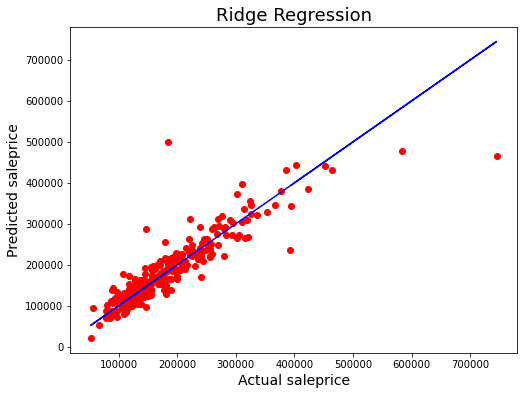

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rg, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel("Actual saleprice",fontsize=14)
plt.ylabel("Predicted saleprice",fontsize=14)
plt.title("Ridge Regression",fontsize=18)
plt.show()

## Hyperparameter Tuning

In [62]:
rf = RandomForestRegressor()
parameters={'n_estimators':[25,50,100,120,150,200,250],'ccp_alpha':[0.0001,0.001,0.01,0.1,0.2,0.3]}
reg = GridSearchCV(rf,parameters)
reg.fit(x_train,y_train)

print(reg.best_params_)

{'ccp_alpha': 0.001, 'n_estimators': 120}


In [67]:
rf = RandomForestRegressor(ccp_alpha=0.001,n_estimators=120)
rf.fit(x_train,y_train)
train = rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)
print("Model training accuracy:",train)
print("r2_score:",r2_score(y_test,pred_rf))
print("mean absolute error:",mean_absolute_error(y_test,pred_rf))
print("root mean squared error", np.sqrt(mean_squared_error(y_test,pred_rf)))

Model training accuracy: 0.977167800028587
r2_score: 0.7781711497652313
mean absolute error: 20854.60779109589
root mean squared error 39300.30604455975


In [64]:
gb = GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,0.2],'n_estimators':[25,50,100,120],'max_depth':[3,4,5],'ccp_alpha':[0.0,0.001,0.01,0.1,0.2]}
reg = GridSearchCV(gb,parameters)
reg.fit(x_train,y_train)

print(reg.best_params_)

{'ccp_alpha': 0.1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


In [68]:
gb = GradientBoostingRegressor(ccp_alpha=0.1,learning_rate=0.2,max_depth=3,n_estimators=50)
gb.fit(x_train,y_train)
train=gb.score(x_train,y_train)
pred_gb=gb.predict(x_test)
print("Model training accuracy:",train)
print("r2_score:",r2_score(y_test,pred_gb))
print("mean absolute error:",mean_absolute_error(y_test,pred_gb))
print("root mean squared error", np.sqrt(mean_squared_error(y_test,pred_gb)))

Model training accuracy: 0.9703217558784204
r2_score: 0.8335625475940799
mean absolute error: 19191.087556272905
root mean squared error 34041.79468767309


In [69]:
xg = XGBRegressor()
parameters={'n_estimators':[80,100,200,300],'max_depth':[3,4,5,6],'learning_rate':[0.001,0.1,0.2,0.3,0.4]}
reg = GridSearchCV(xg,parameters)
reg.fit(x_train,y_train)

print(reg.best_params_)

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200}


In [70]:
xg = XGBRegressor(learning_rate=0.3,max_depth=5,n_estimators=200)
xg.fit(x_train,y_train)
train=xg.score(x_train,y_train)
pred_xg=xg.predict(x_test)
print("Model training accuracy:",train)
print("r2_score:",r2_score(y_test,pred_xg))
print("mean absolute error:",mean_absolute_error(y_test,pred_xg))
print("root mean squared error", np.sqrt(mean_squared_error(y_test,pred_xg)))

Model training accuracy: 0.9999064957301497
r2_score: 0.8066356552329178
mean absolute error: 20111.17998180651
root mean squared error 36692.31524994422


In [71]:
cat = CatBoostRegressor()
parameters={'iterations':[500,700,1000],'learning_rate':[0.001,0.01,0.02,0.1,0.2],'depth':[4,5]}
reg = GridSearchCV(cat,parameters)
reg.fit(x_train,y_train)

print(reg.best_params_)

0:	learn: 79531.8967341	total: 4.12ms	remaining: 2.06s
1:	learn: 79483.4295320	total: 12.2ms	remaining: 3.03s
2:	learn: 79431.7292470	total: 21.3ms	remaining: 3.52s
3:	learn: 79386.7566197	total: 29.8ms	remaining: 3.69s
4:	learn: 79338.4939366	total: 34.4ms	remaining: 3.4s
5:	learn: 79290.6360759	total: 38.8ms	remaining: 3.19s
6:	learn: 79243.9307805	total: 43.1ms	remaining: 3.04s
7:	learn: 79202.7969867	total: 47.5ms	remaining: 2.92s
8:	learn: 79158.2196220	total: 62.6ms	remaining: 3.41s
9:	learn: 79113.7294723	total: 66.9ms	remaining: 3.28s
10:	learn: 79071.3302457	total: 71.6ms	remaining: 3.18s
11:	learn: 79033.5313227	total: 75.7ms	remaining: 3.08s
12:	learn: 78984.3527405	total: 81.4ms	remaining: 3.05s
13:	learn: 78938.6471872	total: 85.7ms	remaining: 2.98s
14:	learn: 78888.9081529	total: 90.1ms	remaining: 2.91s
15:	learn: 78840.0255358	total: 94.5ms	remaining: 2.86s
16:	learn: 78799.3845396	total: 98.8ms	remaining: 2.81s
17:	learn: 78752.4621304	total: 103ms	remaining: 2.76s
18:	

149:	learn: 73205.8272369	total: 687ms	remaining: 1.6s
150:	learn: 73164.2879467	total: 692ms	remaining: 1.6s
151:	learn: 73124.8229728	total: 697ms	remaining: 1.59s
152:	learn: 73082.8788111	total: 702ms	remaining: 1.59s
153:	learn: 73037.6193093	total: 706ms	remaining: 1.59s
154:	learn: 72997.2138652	total: 711ms	remaining: 1.58s
155:	learn: 72955.0251587	total: 716ms	remaining: 1.58s
156:	learn: 72909.9364789	total: 721ms	remaining: 1.57s
157:	learn: 72877.6101620	total: 726ms	remaining: 1.57s
158:	learn: 72840.2287673	total: 731ms	remaining: 1.57s
159:	learn: 72798.7154822	total: 735ms	remaining: 1.56s
160:	learn: 72755.2505123	total: 740ms	remaining: 1.56s
161:	learn: 72721.4640127	total: 745ms	remaining: 1.55s
162:	learn: 72679.7058697	total: 750ms	remaining: 1.55s
163:	learn: 72643.2103971	total: 760ms	remaining: 1.56s
164:	learn: 72600.7306618	total: 764ms	remaining: 1.55s
165:	learn: 72565.1214196	total: 768ms	remaining: 1.55s
166:	learn: 72530.2102354	total: 772ms	remaining: 

302:	learn: 67555.8406476	total: 1.35s	remaining: 879ms
303:	learn: 67527.0513773	total: 1.36s	remaining: 874ms
304:	learn: 67492.5891979	total: 1.36s	remaining: 870ms
305:	learn: 67453.8450626	total: 1.36s	remaining: 865ms
306:	learn: 67424.9214632	total: 1.37s	remaining: 860ms
307:	learn: 67389.8546335	total: 1.37s	remaining: 856ms
308:	learn: 67353.9927817	total: 1.38s	remaining: 851ms
309:	learn: 67315.5089863	total: 1.38s	remaining: 847ms
310:	learn: 67282.3350668	total: 1.39s	remaining: 842ms
311:	learn: 67249.8645669	total: 1.39s	remaining: 837ms
312:	learn: 67213.8457479	total: 1.39s	remaining: 833ms
313:	learn: 67176.9234227	total: 1.4s	remaining: 828ms
314:	learn: 67143.2420224	total: 1.4s	remaining: 823ms
315:	learn: 67107.3540646	total: 1.41s	remaining: 819ms
316:	learn: 67074.8063518	total: 1.41s	remaining: 814ms
317:	learn: 67041.9593888	total: 1.41s	remaining: 810ms
318:	learn: 67016.6781093	total: 1.42s	remaining: 805ms
319:	learn: 66977.6484028	total: 1.42s	remaining: 

456:	learn: 62558.3335952	total: 2.02s	remaining: 190ms
457:	learn: 62529.2307753	total: 2.02s	remaining: 185ms
458:	learn: 62502.1773118	total: 2.02s	remaining: 181ms
459:	learn: 62470.3305989	total: 2.03s	remaining: 176ms
460:	learn: 62440.1994505	total: 2.03s	remaining: 172ms
461:	learn: 62411.7497441	total: 2.04s	remaining: 167ms
462:	learn: 62379.3337109	total: 2.04s	remaining: 163ms
463:	learn: 62348.6043097	total: 2.04s	remaining: 159ms
464:	learn: 62317.0632018	total: 2.05s	remaining: 154ms
465:	learn: 62286.9891076	total: 2.05s	remaining: 150ms
466:	learn: 62253.6930100	total: 2.06s	remaining: 145ms
467:	learn: 62230.1890190	total: 2.06s	remaining: 141ms
468:	learn: 62196.4013964	total: 2.06s	remaining: 136ms
469:	learn: 62167.2868339	total: 2.07s	remaining: 132ms
470:	learn: 62138.5435130	total: 2.07s	remaining: 128ms
471:	learn: 62107.7946290	total: 2.08s	remaining: 123ms
472:	learn: 62082.5368302	total: 2.08s	remaining: 119ms
473:	learn: 62052.1353151	total: 2.08s	remaining

116:	learn: 72205.5438679	total: 507ms	remaining: 1.66s
117:	learn: 72161.7085651	total: 511ms	remaining: 1.66s
118:	learn: 72127.7218338	total: 515ms	remaining: 1.65s
119:	learn: 72092.8088587	total: 520ms	remaining: 1.65s
120:	learn: 72054.3148207	total: 524ms	remaining: 1.64s
121:	learn: 72011.4137002	total: 528ms	remaining: 1.64s
122:	learn: 71966.9237101	total: 532ms	remaining: 1.63s
123:	learn: 71926.8334587	total: 536ms	remaining: 1.63s
124:	learn: 71889.7466144	total: 540ms	remaining: 1.62s
125:	learn: 71849.6833543	total: 545ms	remaining: 1.62s
126:	learn: 71813.9547351	total: 549ms	remaining: 1.61s
127:	learn: 71770.5516119	total: 553ms	remaining: 1.61s
128:	learn: 71729.7762117	total: 557ms	remaining: 1.6s
129:	learn: 71691.4685686	total: 561ms	remaining: 1.6s
130:	learn: 71654.7089586	total: 565ms	remaining: 1.59s
131:	learn: 71609.8174338	total: 570ms	remaining: 1.59s
132:	learn: 71569.0414077	total: 574ms	remaining: 1.58s
133:	learn: 71533.8971803	total: 578ms	remaining: 

271:	learn: 66563.7168149	total: 1.17s	remaining: 984ms
272:	learn: 66529.9362256	total: 1.18s	remaining: 979ms
273:	learn: 66500.2777343	total: 1.18s	remaining: 975ms
274:	learn: 66467.3463244	total: 1.19s	remaining: 970ms
275:	learn: 66435.2053789	total: 1.19s	remaining: 966ms
276:	learn: 66399.6134405	total: 1.19s	remaining: 961ms
277:	learn: 66363.6400126	total: 1.2s	remaining: 957ms
278:	learn: 66328.8990816	total: 1.22s	remaining: 966ms
279:	learn: 66298.3110218	total: 1.22s	remaining: 961ms
280:	learn: 66264.5926750	total: 1.23s	remaining: 956ms
281:	learn: 66231.9684739	total: 1.23s	remaining: 952ms
282:	learn: 66202.1377434	total: 1.24s	remaining: 947ms
283:	learn: 66170.5425338	total: 1.24s	remaining: 943ms
284:	learn: 66139.0010140	total: 1.24s	remaining: 938ms
285:	learn: 66103.2940544	total: 1.25s	remaining: 934ms
286:	learn: 66067.9717434	total: 1.25s	remaining: 929ms
287:	learn: 66034.9251173	total: 1.25s	remaining: 924ms
288:	learn: 66003.1107583	total: 1.26s	remaining:

427:	learn: 61592.4242618	total: 1.84s	remaining: 310ms
428:	learn: 61558.2525202	total: 1.85s	remaining: 306ms
429:	learn: 61526.8542566	total: 1.85s	remaining: 302ms
430:	learn: 61501.7976173	total: 1.86s	remaining: 297ms
431:	learn: 61467.7141732	total: 1.86s	remaining: 293ms
432:	learn: 61438.9286063	total: 1.86s	remaining: 289ms
433:	learn: 61409.8511929	total: 1.87s	remaining: 284ms
434:	learn: 61379.7227642	total: 1.87s	remaining: 280ms
435:	learn: 61347.0968696	total: 1.88s	remaining: 276ms
436:	learn: 61319.0881674	total: 1.88s	remaining: 271ms
437:	learn: 61288.6286189	total: 1.89s	remaining: 267ms
438:	learn: 61257.3817822	total: 1.89s	remaining: 263ms
439:	learn: 61228.2969198	total: 1.89s	remaining: 258ms
440:	learn: 61194.6356150	total: 1.9s	remaining: 254ms
441:	learn: 61165.3603993	total: 1.9s	remaining: 250ms
442:	learn: 61133.4511747	total: 1.91s	remaining: 245ms
443:	learn: 61104.3618809	total: 1.91s	remaining: 241ms
444:	learn: 61075.9326333	total: 1.92s	remaining: 

79:	learn: 71363.6885140	total: 345ms	remaining: 1.81s
80:	learn: 71323.0936022	total: 349ms	remaining: 1.8s
81:	learn: 71286.4258250	total: 353ms	remaining: 1.8s
82:	learn: 71248.0366123	total: 357ms	remaining: 1.79s
83:	learn: 71206.0968936	total: 361ms	remaining: 1.79s
84:	learn: 71165.9179486	total: 365ms	remaining: 1.78s
85:	learn: 71126.8738078	total: 369ms	remaining: 1.78s
86:	learn: 71086.7265489	total: 373ms	remaining: 1.77s
87:	learn: 71045.9363362	total: 377ms	remaining: 1.77s
88:	learn: 71009.4734668	total: 381ms	remaining: 1.76s
89:	learn: 70973.3697606	total: 385ms	remaining: 1.75s
90:	learn: 70932.8957685	total: 389ms	remaining: 1.75s
91:	learn: 70888.8494052	total: 393ms	remaining: 1.74s
92:	learn: 70846.6486658	total: 397ms	remaining: 1.74s
93:	learn: 70802.1973833	total: 401ms	remaining: 1.73s
94:	learn: 70762.7061519	total: 405ms	remaining: 1.73s
95:	learn: 70725.3183433	total: 409ms	remaining: 1.72s
96:	learn: 70684.8596177	total: 413ms	remaining: 1.72s
97:	learn: 7

233:	learn: 65535.8162892	total: 1.02s	remaining: 1.16s
234:	learn: 65503.3522768	total: 1.02s	remaining: 1.15s
235:	learn: 65472.2274716	total: 1.02s	remaining: 1.15s
236:	learn: 65433.9824601	total: 1.03s	remaining: 1.14s
237:	learn: 65401.3873872	total: 1.03s	remaining: 1.14s
238:	learn: 65367.1567869	total: 1.04s	remaining: 1.13s
239:	learn: 65332.7392916	total: 1.04s	remaining: 1.13s
240:	learn: 65296.2651147	total: 1.05s	remaining: 1.12s
241:	learn: 65262.5260180	total: 1.05s	remaining: 1.12s
242:	learn: 65231.8214718	total: 1.05s	remaining: 1.11s
243:	learn: 65201.6062696	total: 1.06s	remaining: 1.11s
244:	learn: 65166.2839487	total: 1.06s	remaining: 1.1s
245:	learn: 65137.0685495	total: 1.07s	remaining: 1.1s
246:	learn: 65099.2770093	total: 1.07s	remaining: 1.1s
247:	learn: 65064.7594850	total: 1.07s	remaining: 1.09s
248:	learn: 65028.6387966	total: 1.08s	remaining: 1.09s
249:	learn: 64998.6438190	total: 1.08s	remaining: 1.08s
250:	learn: 64964.5338818	total: 1.09s	remaining: 1

383:	learn: 60702.1576523	total: 1.69s	remaining: 510ms
384:	learn: 60670.4740219	total: 1.69s	remaining: 505ms
385:	learn: 60642.2990382	total: 1.7s	remaining: 501ms
386:	learn: 60611.9133147	total: 1.7s	remaining: 496ms
387:	learn: 60584.4129476	total: 1.7s	remaining: 492ms
388:	learn: 60551.5210236	total: 1.71s	remaining: 487ms
389:	learn: 60521.6939241	total: 1.71s	remaining: 484ms
390:	learn: 60487.9690055	total: 1.72s	remaining: 479ms
391:	learn: 60461.5383858	total: 1.72s	remaining: 475ms
392:	learn: 60427.6297653	total: 1.73s	remaining: 470ms
393:	learn: 60398.6947232	total: 1.73s	remaining: 466ms
394:	learn: 60369.5435207	total: 1.74s	remaining: 462ms
395:	learn: 60340.8833857	total: 1.74s	remaining: 458ms
396:	learn: 60309.0127358	total: 1.75s	remaining: 454ms
397:	learn: 60280.7718147	total: 1.75s	remaining: 449ms
398:	learn: 60251.9879739	total: 1.76s	remaining: 445ms
399:	learn: 60224.9327508	total: 1.76s	remaining: 440ms
400:	learn: 60196.8757865	total: 1.76s	remaining: 4

32:	learn: 77300.6382024	total: 180ms	remaining: 2.55s
33:	learn: 77256.1955541	total: 186ms	remaining: 2.55s
34:	learn: 77215.6849212	total: 191ms	remaining: 2.54s
35:	learn: 77175.0270088	total: 197ms	remaining: 2.54s
36:	learn: 77130.4547267	total: 202ms	remaining: 2.53s
37:	learn: 77087.9754683	total: 209ms	remaining: 2.54s
38:	learn: 77041.5379560	total: 214ms	remaining: 2.53s
39:	learn: 76997.8996943	total: 219ms	remaining: 2.52s
40:	learn: 76954.7065164	total: 224ms	remaining: 2.5s
41:	learn: 76911.8446083	total: 228ms	remaining: 2.49s
42:	learn: 76867.5206667	total: 234ms	remaining: 2.49s
43:	learn: 76823.4523188	total: 239ms	remaining: 2.48s
44:	learn: 76774.2486505	total: 244ms	remaining: 2.46s
45:	learn: 76724.5513985	total: 249ms	remaining: 2.45s
46:	learn: 76683.1340790	total: 253ms	remaining: 2.44s
47:	learn: 76643.9368999	total: 258ms	remaining: 2.43s
48:	learn: 76598.5510003	total: 263ms	remaining: 2.42s
49:	learn: 76551.1485468	total: 268ms	remaining: 2.41s
50:	learn: 

206:	learn: 70283.5692438	total: 1.14s	remaining: 1.62s
207:	learn: 70245.8565269	total: 1.15s	remaining: 1.61s
208:	learn: 70207.9365070	total: 1.15s	remaining: 1.6s
209:	learn: 70174.4260902	total: 1.16s	remaining: 1.6s
210:	learn: 70134.2894096	total: 1.16s	remaining: 1.59s
211:	learn: 70094.2677750	total: 1.17s	remaining: 1.59s
212:	learn: 70059.1546700	total: 1.17s	remaining: 1.58s
213:	learn: 70026.4237425	total: 1.18s	remaining: 1.57s
214:	learn: 69985.3837020	total: 1.18s	remaining: 1.57s
215:	learn: 69950.4406178	total: 1.19s	remaining: 1.56s
216:	learn: 69913.6807395	total: 1.19s	remaining: 1.56s
217:	learn: 69874.2846111	total: 1.2s	remaining: 1.55s
218:	learn: 69840.0130635	total: 1.2s	remaining: 1.54s
219:	learn: 69798.4089515	total: 1.21s	remaining: 1.54s
220:	learn: 69756.6191827	total: 1.21s	remaining: 1.53s
221:	learn: 69720.6819488	total: 1.22s	remaining: 1.52s
222:	learn: 69680.8338874	total: 1.22s	remaining: 1.52s
223:	learn: 69643.8099317	total: 1.23s	remaining: 1.

375:	learn: 64385.6088293	total: 1.99s	remaining: 656ms
376:	learn: 64349.9695324	total: 1.99s	remaining: 651ms
377:	learn: 64320.1185249	total: 2.01s	remaining: 648ms
378:	learn: 64288.9565775	total: 2.01s	remaining: 643ms
379:	learn: 64256.8459761	total: 2.02s	remaining: 637ms
380:	learn: 64223.5929405	total: 2.02s	remaining: 631ms
381:	learn: 64190.4302141	total: 2.02s	remaining: 625ms
382:	learn: 64155.8090418	total: 2.03s	remaining: 620ms
383:	learn: 64127.9506824	total: 2.03s	remaining: 614ms
384:	learn: 64094.7608392	total: 2.04s	remaining: 609ms
385:	learn: 64063.8755500	total: 2.04s	remaining: 603ms
386:	learn: 64031.0163040	total: 2.05s	remaining: 597ms
387:	learn: 63995.0723356	total: 2.05s	remaining: 592ms
388:	learn: 63963.4764638	total: 2.07s	remaining: 590ms
389:	learn: 63930.7838933	total: 2.07s	remaining: 584ms
390:	learn: 63903.3346547	total: 2.08s	remaining: 579ms
391:	learn: 63871.6806055	total: 2.08s	remaining: 573ms
392:	learn: 63837.6178545	total: 2.08s	remaining

37:	learn: 75930.1491901	total: 176ms	remaining: 2.14s
38:	learn: 75888.0719670	total: 180ms	remaining: 2.13s
39:	learn: 75844.8940573	total: 184ms	remaining: 2.12s
40:	learn: 75799.6281791	total: 188ms	remaining: 2.1s
41:	learn: 75761.6892779	total: 192ms	remaining: 2.1s
42:	learn: 75718.7473890	total: 196ms	remaining: 2.08s
43:	learn: 75675.7694606	total: 200ms	remaining: 2.08s
44:	learn: 75633.4818373	total: 204ms	remaining: 2.06s
45:	learn: 75590.9615822	total: 208ms	remaining: 2.06s
46:	learn: 75546.9516326	total: 212ms	remaining: 2.05s
47:	learn: 75506.9970071	total: 217ms	remaining: 2.04s
48:	learn: 75465.9742547	total: 221ms	remaining: 2.03s
49:	learn: 75425.8495993	total: 225ms	remaining: 2.02s
50:	learn: 75387.9680372	total: 229ms	remaining: 2.01s
51:	learn: 75348.4647317	total: 233ms	remaining: 2s
52:	learn: 75306.8762472	total: 237ms	remaining: 2s
53:	learn: 75267.6016663	total: 241ms	remaining: 1.99s
54:	learn: 75224.6073110	total: 245ms	remaining: 1.98s
55:	learn: 75179.9

192:	learn: 69828.3958580	total: 846ms	remaining: 1.34s
193:	learn: 69788.8027376	total: 850ms	remaining: 1.34s
194:	learn: 69756.0817459	total: 854ms	remaining: 1.33s
195:	learn: 69724.8764285	total: 858ms	remaining: 1.33s
196:	learn: 69687.6252146	total: 862ms	remaining: 1.32s
197:	learn: 69651.9505359	total: 866ms	remaining: 1.32s
198:	learn: 69615.2983553	total: 870ms	remaining: 1.31s
199:	learn: 69580.9650734	total: 875ms	remaining: 1.31s
200:	learn: 69541.8813167	total: 880ms	remaining: 1.31s
201:	learn: 69501.2356644	total: 886ms	remaining: 1.31s
202:	learn: 69468.4239102	total: 890ms	remaining: 1.3s
203:	learn: 69438.0871378	total: 894ms	remaining: 1.3s
204:	learn: 69399.3235078	total: 898ms	remaining: 1.29s
205:	learn: 69362.1489654	total: 902ms	remaining: 1.29s
206:	learn: 69325.5945140	total: 907ms	remaining: 1.28s
207:	learn: 69289.9267426	total: 911ms	remaining: 1.28s
208:	learn: 69253.8433507	total: 915ms	remaining: 1.27s
209:	learn: 69217.9975885	total: 919ms	remaining: 

349:	learn: 64394.0724171	total: 1.51s	remaining: 648ms
350:	learn: 64359.6033690	total: 1.52s	remaining: 644ms
351:	learn: 64330.7679543	total: 1.52s	remaining: 640ms
352:	learn: 64295.2613684	total: 1.52s	remaining: 635ms
353:	learn: 64260.8977472	total: 1.53s	remaining: 631ms
354:	learn: 64225.9526230	total: 1.53s	remaining: 626ms
355:	learn: 64192.0356142	total: 1.54s	remaining: 622ms
356:	learn: 64157.1785463	total: 1.54s	remaining: 618ms
357:	learn: 64127.9182490	total: 1.54s	remaining: 613ms
358:	learn: 64096.8027709	total: 1.55s	remaining: 609ms
359:	learn: 64066.3240361	total: 1.55s	remaining: 604ms
360:	learn: 64029.3135804	total: 1.56s	remaining: 600ms
361:	learn: 63996.1309802	total: 1.56s	remaining: 596ms
362:	learn: 63964.0738567	total: 1.57s	remaining: 591ms
363:	learn: 63929.0434915	total: 1.57s	remaining: 587ms
364:	learn: 63894.3912211	total: 1.57s	remaining: 582ms
365:	learn: 63860.8973681	total: 1.58s	remaining: 578ms
366:	learn: 63831.8153710	total: 1.58s	remaining

497:	learn: 59819.3960459	total: 2.18s	remaining: 8.74ms
498:	learn: 59787.8768985	total: 2.18s	remaining: 4.37ms
499:	learn: 59755.3847714	total: 2.19s	remaining: 0us
0:	learn: 79124.8820289	total: 8.24ms	remaining: 4.11s
1:	learn: 78644.6018009	total: 16.9ms	remaining: 4.21s
2:	learn: 78137.1467919	total: 22.6ms	remaining: 3.74s
3:	learn: 77699.0937455	total: 27ms	remaining: 3.34s
4:	learn: 77279.4455586	total: 31.3ms	remaining: 3.1s
5:	learn: 76818.4307279	total: 35.7ms	remaining: 2.94s
6:	learn: 76467.8654521	total: 40ms	remaining: 2.82s
7:	learn: 76031.1110348	total: 44.4ms	remaining: 2.73s
8:	learn: 75615.2540911	total: 48.7ms	remaining: 2.65s
9:	learn: 75201.6513938	total: 52.7ms	remaining: 2.58s
10:	learn: 74747.8977820	total: 56.8ms	remaining: 2.52s
11:	learn: 74404.0375578	total: 61.2ms	remaining: 2.49s
12:	learn: 74047.5908604	total: 65.3ms	remaining: 2.45s
13:	learn: 73616.0679154	total: 69.4ms	remaining: 2.41s
14:	learn: 73160.1177654	total: 73.5ms	remaining: 2.38s
15:	lea

152:	learn: 41265.3658788	total: 684ms	remaining: 1.55s
153:	learn: 41129.5660079	total: 690ms	remaining: 1.55s
154:	learn: 41009.7437572	total: 696ms	remaining: 1.55s
155:	learn: 40897.7220067	total: 702ms	remaining: 1.55s
156:	learn: 40768.1668026	total: 706ms	remaining: 1.54s
157:	learn: 40650.6421888	total: 711ms	remaining: 1.54s
158:	learn: 40516.4565665	total: 716ms	remaining: 1.53s
159:	learn: 40400.4947147	total: 721ms	remaining: 1.53s
160:	learn: 40282.7155296	total: 727ms	remaining: 1.53s
161:	learn: 40186.0140690	total: 731ms	remaining: 1.52s
162:	learn: 40060.8524066	total: 735ms	remaining: 1.52s
163:	learn: 39966.2081840	total: 739ms	remaining: 1.51s
164:	learn: 39845.9592923	total: 744ms	remaining: 1.51s
165:	learn: 39747.3950191	total: 748ms	remaining: 1.5s
166:	learn: 39648.8139802	total: 752ms	remaining: 1.5s
167:	learn: 39505.0144599	total: 756ms	remaining: 1.49s
168:	learn: 39390.9809329	total: 760ms	remaining: 1.49s
169:	learn: 39286.1088091	total: 764ms	remaining: 

310:	learn: 29631.6026648	total: 1.35s	remaining: 822ms
311:	learn: 29601.3595763	total: 1.36s	remaining: 818ms
312:	learn: 29566.6610565	total: 1.36s	remaining: 813ms
313:	learn: 29521.7595056	total: 1.36s	remaining: 809ms
314:	learn: 29478.6796325	total: 1.37s	remaining: 804ms
315:	learn: 29437.3344592	total: 1.37s	remaining: 800ms
316:	learn: 29404.6709810	total: 1.38s	remaining: 795ms
317:	learn: 29366.8446362	total: 1.38s	remaining: 791ms
318:	learn: 29332.8527439	total: 1.39s	remaining: 786ms
319:	learn: 29294.7402561	total: 1.39s	remaining: 781ms
320:	learn: 29246.3814446	total: 1.39s	remaining: 777ms
321:	learn: 29203.1138619	total: 1.4s	remaining: 772ms
322:	learn: 29156.3078637	total: 1.4s	remaining: 768ms
323:	learn: 29114.9404012	total: 1.41s	remaining: 767ms
324:	learn: 29057.6281884	total: 1.42s	remaining: 764ms
325:	learn: 29024.5811192	total: 1.42s	remaining: 760ms
326:	learn: 28992.2361169	total: 1.43s	remaining: 756ms
327:	learn: 28952.4076667	total: 1.43s	remaining: 

491:	learn: 24135.3235418	total: 2.14s	remaining: 34.8ms
492:	learn: 24118.7754985	total: 2.15s	remaining: 30.5ms
493:	learn: 24094.9475434	total: 2.15s	remaining: 26.1ms
494:	learn: 24074.8451404	total: 2.15s	remaining: 21.8ms
495:	learn: 24047.3312459	total: 2.16s	remaining: 17.4ms
496:	learn: 24028.5163798	total: 2.16s	remaining: 13.1ms
497:	learn: 24020.1425731	total: 2.17s	remaining: 8.7ms
498:	learn: 24005.6523578	total: 2.17s	remaining: 4.35ms
499:	learn: 23984.9829142	total: 2.17s	remaining: 0us
0:	learn: 76578.6616803	total: 7.95ms	remaining: 3.97s
1:	learn: 76109.6875788	total: 16.6ms	remaining: 4.14s
2:	learn: 75712.4400957	total: 23.3ms	remaining: 3.86s
3:	learn: 75277.5559252	total: 27.7ms	remaining: 3.44s
4:	learn: 74846.2336577	total: 34.6ms	remaining: 3.43s
5:	learn: 74440.4710553	total: 40ms	remaining: 3.29s
6:	learn: 73984.7403123	total: 44.1ms	remaining: 3.11s
7:	learn: 73577.3922497	total: 48.6ms	remaining: 2.99s
8:	learn: 73151.2418653	total: 53ms	remaining: 2.89s


148:	learn: 40974.7192156	total: 675ms	remaining: 1.59s
149:	learn: 40862.1721426	total: 680ms	remaining: 1.59s
150:	learn: 40760.3549885	total: 685ms	remaining: 1.58s
151:	learn: 40625.2818504	total: 691ms	remaining: 1.58s
152:	learn: 40496.4468954	total: 695ms	remaining: 1.58s
153:	learn: 40374.0708013	total: 699ms	remaining: 1.57s
154:	learn: 40264.3765698	total: 703ms	remaining: 1.56s
155:	learn: 40158.3610376	total: 707ms	remaining: 1.56s
156:	learn: 40047.5267355	total: 711ms	remaining: 1.55s
157:	learn: 39939.3914167	total: 715ms	remaining: 1.55s
158:	learn: 39815.1145945	total: 720ms	remaining: 1.54s
159:	learn: 39714.8831118	total: 724ms	remaining: 1.54s
160:	learn: 39611.9706195	total: 728ms	remaining: 1.53s
161:	learn: 39495.6484768	total: 732ms	remaining: 1.53s
162:	learn: 39392.5546273	total: 736ms	remaining: 1.52s
163:	learn: 39293.5203879	total: 740ms	remaining: 1.52s
164:	learn: 39193.9845627	total: 744ms	remaining: 1.51s
165:	learn: 39113.0899539	total: 748ms	remaining

300:	learn: 29819.3921156	total: 1.32s	remaining: 871ms
301:	learn: 29762.0103858	total: 1.32s	remaining: 869ms
302:	learn: 29710.6211671	total: 1.33s	remaining: 868ms
303:	learn: 29655.9319821	total: 1.34s	remaining: 864ms
304:	learn: 29612.4360506	total: 1.37s	remaining: 875ms
305:	learn: 29561.5929100	total: 1.37s	remaining: 870ms
306:	learn: 29522.4838821	total: 1.38s	remaining: 865ms
307:	learn: 29494.6096700	total: 1.38s	remaining: 861ms
308:	learn: 29460.2797983	total: 1.39s	remaining: 858ms
309:	learn: 29420.0105781	total: 1.39s	remaining: 855ms
310:	learn: 29395.8346733	total: 1.4s	remaining: 850ms
311:	learn: 29365.9957275	total: 1.4s	remaining: 846ms
312:	learn: 29323.8282813	total: 1.41s	remaining: 841ms
313:	learn: 29286.1600057	total: 1.41s	remaining: 837ms
314:	learn: 29232.2996448	total: 1.42s	remaining: 832ms
315:	learn: 29190.8793865	total: 1.42s	remaining: 827ms
316:	learn: 29130.5406600	total: 1.43s	remaining: 823ms
317:	learn: 29084.9445088	total: 1.43s	remaining: 

482:	learn: 24120.8577836	total: 2.16s	remaining: 76ms
483:	learn: 24095.6582841	total: 2.16s	remaining: 71.5ms
484:	learn: 24082.1175203	total: 2.17s	remaining: 67ms
485:	learn: 24058.4588466	total: 2.17s	remaining: 62.6ms
486:	learn: 24040.6875349	total: 2.17s	remaining: 58.1ms
487:	learn: 24020.7813839	total: 2.18s	remaining: 53.6ms
488:	learn: 23996.3267691	total: 2.18s	remaining: 49.1ms
489:	learn: 23979.4576583	total: 2.19s	remaining: 44.7ms
490:	learn: 23961.6139227	total: 2.19s	remaining: 40.2ms
491:	learn: 23941.8476501	total: 2.2s	remaining: 35.8ms
492:	learn: 23931.8819595	total: 2.2s	remaining: 31.3ms
493:	learn: 23907.4773232	total: 2.21s	remaining: 26.8ms
494:	learn: 23885.4448749	total: 2.21s	remaining: 22.4ms
495:	learn: 23865.6731255	total: 2.22s	remaining: 17.9ms
496:	learn: 23839.3037959	total: 2.22s	remaining: 13.4ms
497:	learn: 23818.0096613	total: 2.23s	remaining: 8.94ms
498:	learn: 23792.8640794	total: 2.23s	remaining: 4.47ms
499:	learn: 23772.7868512	total: 2.23

157:	learn: 38118.4959946	total: 671ms	remaining: 1.45s
158:	learn: 38020.2569143	total: 676ms	remaining: 1.45s
159:	learn: 37913.3118519	total: 681ms	remaining: 1.45s
160:	learn: 37796.9858181	total: 685ms	remaining: 1.44s
161:	learn: 37692.3321002	total: 689ms	remaining: 1.44s
162:	learn: 37585.0413144	total: 693ms	remaining: 1.43s
163:	learn: 37474.6754474	total: 703ms	remaining: 1.44s
164:	learn: 37380.7461488	total: 707ms	remaining: 1.44s
165:	learn: 37289.0062708	total: 711ms	remaining: 1.43s
166:	learn: 37188.0219836	total: 716ms	remaining: 1.43s
167:	learn: 37088.1767776	total: 720ms	remaining: 1.42s
168:	learn: 37003.1865441	total: 724ms	remaining: 1.42s
169:	learn: 36902.9637438	total: 728ms	remaining: 1.41s
170:	learn: 36810.9002163	total: 733ms	remaining: 1.41s
171:	learn: 36716.6993007	total: 737ms	remaining: 1.41s
172:	learn: 36636.8637987	total: 741ms	remaining: 1.4s
173:	learn: 36531.4975979	total: 745ms	remaining: 1.4s
174:	learn: 36451.3606884	total: 749ms	remaining: 

338:	learn: 26780.9272658	total: 1.5s	remaining: 710ms
339:	learn: 26752.2690341	total: 1.5s	remaining: 706ms
340:	learn: 26711.5227367	total: 1.5s	remaining: 701ms
341:	learn: 26674.3380724	total: 1.51s	remaining: 696ms
342:	learn: 26628.1698977	total: 1.51s	remaining: 692ms
343:	learn: 26601.3353448	total: 1.51s	remaining: 687ms
344:	learn: 26564.8080115	total: 1.52s	remaining: 683ms
345:	learn: 26524.0077326	total: 1.52s	remaining: 678ms
346:	learn: 26493.8269894	total: 1.53s	remaining: 673ms
347:	learn: 26455.5291404	total: 1.53s	remaining: 669ms
348:	learn: 26433.9822746	total: 1.53s	remaining: 664ms
349:	learn: 26385.3306253	total: 1.54s	remaining: 660ms
350:	learn: 26351.7289106	total: 1.54s	remaining: 656ms
351:	learn: 26321.7765419	total: 1.55s	remaining: 651ms
352:	learn: 26282.1288657	total: 1.55s	remaining: 646ms
353:	learn: 26252.8410987	total: 1.56s	remaining: 642ms
354:	learn: 26218.1809286	total: 1.56s	remaining: 638ms
355:	learn: 26188.5334000	total: 1.57s	remaining: 6

498:	learn: 22606.2891417	total: 2.16s	remaining: 4.33ms
499:	learn: 22589.7209564	total: 2.17s	remaining: 0us
0:	learn: 78354.3774583	total: 6.08ms	remaining: 3.03s
1:	learn: 77856.7600258	total: 14.8ms	remaining: 3.67s
2:	learn: 77410.0952503	total: 23.5ms	remaining: 3.89s
3:	learn: 76962.5955007	total: 31.1ms	remaining: 3.86s
4:	learn: 76502.4846631	total: 35.6ms	remaining: 3.52s
5:	learn: 76032.0289131	total: 39.9ms	remaining: 3.28s
6:	learn: 75593.8708786	total: 44.2ms	remaining: 3.11s
7:	learn: 75198.6351452	total: 48.5ms	remaining: 2.98s
8:	learn: 74811.5605323	total: 52.8ms	remaining: 2.88s
9:	learn: 74357.2643423	total: 56.9ms	remaining: 2.79s
10:	learn: 73921.6909218	total: 61ms	remaining: 2.71s
11:	learn: 73511.2369059	total: 65ms	remaining: 2.64s
12:	learn: 73106.0262993	total: 69ms	remaining: 2.58s
13:	learn: 72694.4944213	total: 73.5ms	remaining: 2.55s
14:	learn: 72279.2557853	total: 77.5ms	remaining: 2.5s
15:	learn: 71866.8685793	total: 81.8ms	remaining: 2.47s
16:	learn:

152:	learn: 40438.9768745	total: 672ms	remaining: 1.52s
153:	learn: 40314.0493546	total: 678ms	remaining: 1.52s
154:	learn: 40202.7609312	total: 682ms	remaining: 1.52s
155:	learn: 40102.2186195	total: 687ms	remaining: 1.51s
156:	learn: 39981.2934329	total: 692ms	remaining: 1.51s
157:	learn: 39862.0648596	total: 698ms	remaining: 1.51s
158:	learn: 39756.6880289	total: 702ms	remaining: 1.51s
159:	learn: 39645.3158309	total: 708ms	remaining: 1.5s
160:	learn: 39518.4406216	total: 713ms	remaining: 1.5s
161:	learn: 39413.2970822	total: 717ms	remaining: 1.5s
162:	learn: 39295.8980064	total: 721ms	remaining: 1.49s
163:	learn: 39196.9491936	total: 725ms	remaining: 1.49s
164:	learn: 39096.6023446	total: 729ms	remaining: 1.48s
165:	learn: 38989.7364479	total: 734ms	remaining: 1.48s
166:	learn: 38869.8969977	total: 738ms	remaining: 1.47s
167:	learn: 38769.6873658	total: 742ms	remaining: 1.47s
168:	learn: 38662.2148191	total: 746ms	remaining: 1.46s
169:	learn: 38544.0777699	total: 750ms	remaining: 1

314:	learn: 29211.5728936	total: 1.46s	remaining: 860ms
315:	learn: 29168.1761485	total: 1.47s	remaining: 855ms
316:	learn: 29134.9592718	total: 1.47s	remaining: 851ms
317:	learn: 29087.2698524	total: 1.48s	remaining: 846ms
318:	learn: 29037.9630330	total: 1.48s	remaining: 842ms
319:	learn: 29006.7025258	total: 1.49s	remaining: 838ms
320:	learn: 28956.2663419	total: 1.49s	remaining: 833ms
321:	learn: 28924.6516301	total: 1.5s	remaining: 829ms
322:	learn: 28872.7318695	total: 1.5s	remaining: 824ms
323:	learn: 28819.6819651	total: 1.51s	remaining: 820ms
324:	learn: 28805.5764354	total: 1.52s	remaining: 816ms
325:	learn: 28760.9298425	total: 1.52s	remaining: 812ms
326:	learn: 28719.9076053	total: 1.53s	remaining: 808ms
327:	learn: 28702.2598638	total: 1.53s	remaining: 803ms
328:	learn: 28660.9418448	total: 1.54s	remaining: 799ms
329:	learn: 28610.6511098	total: 1.54s	remaining: 795ms
330:	learn: 28581.1503086	total: 1.55s	remaining: 790ms
331:	learn: 28529.7978932	total: 1.55s	remaining: 

468:	learn: 24905.6573728	total: 2.3s	remaining: 152ms
469:	learn: 24878.0043590	total: 2.3s	remaining: 147ms
470:	learn: 24855.0322497	total: 2.31s	remaining: 142ms
471:	learn: 24829.1161072	total: 2.31s	remaining: 137ms
472:	learn: 24812.6587459	total: 2.32s	remaining: 132ms
473:	learn: 24791.0199311	total: 2.32s	remaining: 127ms
474:	learn: 24774.7400911	total: 2.33s	remaining: 123ms
475:	learn: 24748.9932830	total: 2.33s	remaining: 118ms
476:	learn: 24720.8197914	total: 2.34s	remaining: 113ms
477:	learn: 24678.8225267	total: 2.34s	remaining: 108ms
478:	learn: 24671.8037956	total: 2.35s	remaining: 103ms
479:	learn: 24655.0725305	total: 2.35s	remaining: 98ms
480:	learn: 24628.5598907	total: 2.35s	remaining: 93.1ms
481:	learn: 24608.6079312	total: 2.36s	remaining: 88.2ms
482:	learn: 24601.5242081	total: 2.37s	remaining: 83.3ms
483:	learn: 24582.0172937	total: 2.37s	remaining: 78.4ms
484:	learn: 24567.0636140	total: 2.38s	remaining: 73.5ms
485:	learn: 24556.7940475	total: 2.38s	remaini

149:	learn: 40165.6421683	total: 674ms	remaining: 1.57s
150:	learn: 40030.4365064	total: 679ms	remaining: 1.57s
151:	learn: 39910.0968733	total: 683ms	remaining: 1.56s
152:	learn: 39772.2153852	total: 687ms	remaining: 1.56s
153:	learn: 39660.0497829	total: 691ms	remaining: 1.55s
154:	learn: 39519.9312400	total: 695ms	remaining: 1.55s
155:	learn: 39390.5010632	total: 700ms	remaining: 1.54s
156:	learn: 39279.9063795	total: 704ms	remaining: 1.54s
157:	learn: 39166.9141628	total: 708ms	remaining: 1.53s
158:	learn: 39038.2871476	total: 713ms	remaining: 1.53s
159:	learn: 38920.6477512	total: 717ms	remaining: 1.52s
160:	learn: 38801.2956187	total: 721ms	remaining: 1.52s
161:	learn: 38664.5207653	total: 725ms	remaining: 1.51s
162:	learn: 38543.5854316	total: 730ms	remaining: 1.51s
163:	learn: 38405.4127435	total: 733ms	remaining: 1.5s
164:	learn: 38275.4122962	total: 738ms	remaining: 1.5s
165:	learn: 38155.6897164	total: 742ms	remaining: 1.49s
166:	learn: 38055.3116468	total: 746ms	remaining: 

323:	learn: 27035.4317092	total: 1.46s	remaining: 795ms
324:	learn: 26984.6408673	total: 1.47s	remaining: 790ms
325:	learn: 26939.7091807	total: 1.47s	remaining: 785ms
326:	learn: 26900.3491008	total: 1.48s	remaining: 781ms
327:	learn: 26848.8337992	total: 1.48s	remaining: 776ms
328:	learn: 26812.7955653	total: 1.48s	remaining: 771ms
329:	learn: 26776.5404880	total: 1.49s	remaining: 767ms
330:	learn: 26731.2668210	total: 1.49s	remaining: 762ms
331:	learn: 26691.6850710	total: 1.5s	remaining: 757ms
332:	learn: 26649.8203610	total: 1.5s	remaining: 753ms
333:	learn: 26612.8822601	total: 1.5s	remaining: 748ms
334:	learn: 26564.6128235	total: 1.51s	remaining: 744ms
335:	learn: 26527.2264209	total: 1.51s	remaining: 739ms
336:	learn: 26487.4873389	total: 1.52s	remaining: 734ms
337:	learn: 26444.8724506	total: 1.52s	remaining: 729ms
338:	learn: 26402.2682658	total: 1.52s	remaining: 725ms
339:	learn: 26366.7968292	total: 1.53s	remaining: 720ms
340:	learn: 26331.8574761	total: 1.53s	remaining: 7

477:	learn: 22736.2578855	total: 2.13s	remaining: 98.1ms
478:	learn: 22717.0796717	total: 2.13s	remaining: 93.6ms
479:	learn: 22695.3730619	total: 2.14s	remaining: 89.2ms
480:	learn: 22675.6866873	total: 2.14s	remaining: 84.7ms
481:	learn: 22654.4585590	total: 2.15s	remaining: 80.2ms
482:	learn: 22626.6066493	total: 2.15s	remaining: 75.8ms
483:	learn: 22607.7117003	total: 2.16s	remaining: 71.3ms
484:	learn: 22587.9514225	total: 2.16s	remaining: 66.8ms
485:	learn: 22583.5001640	total: 2.16s	remaining: 62.4ms
486:	learn: 22563.8893820	total: 2.17s	remaining: 57.9ms
487:	learn: 22548.7105248	total: 2.17s	remaining: 53.4ms
488:	learn: 22521.8168293	total: 2.18s	remaining: 49ms
489:	learn: 22511.9396565	total: 2.18s	remaining: 44.5ms
490:	learn: 22491.6101986	total: 2.18s	remaining: 40ms
491:	learn: 22467.1791921	total: 2.19s	remaining: 35.6ms
492:	learn: 22445.5078539	total: 2.19s	remaining: 31.1ms
493:	learn: 22436.7123768	total: 2.2s	remaining: 26.7ms
494:	learn: 22431.1403744	total: 2.2

141:	learn: 30951.0945544	total: 682ms	remaining: 1.72s
142:	learn: 30891.6881512	total: 686ms	remaining: 1.71s
143:	learn: 30799.2831211	total: 691ms	remaining: 1.71s
144:	learn: 30711.9022540	total: 695ms	remaining: 1.7s
145:	learn: 30616.9519857	total: 699ms	remaining: 1.69s
146:	learn: 30489.9332241	total: 703ms	remaining: 1.69s
147:	learn: 30405.7320167	total: 709ms	remaining: 1.69s
148:	learn: 30324.9781550	total: 714ms	remaining: 1.68s
149:	learn: 30250.1683988	total: 719ms	remaining: 1.68s
150:	learn: 30141.5933746	total: 724ms	remaining: 1.67s
151:	learn: 30057.8874884	total: 729ms	remaining: 1.67s
152:	learn: 29968.8472780	total: 733ms	remaining: 1.66s
153:	learn: 29888.5845290	total: 737ms	remaining: 1.66s
154:	learn: 29839.6955763	total: 742ms	remaining: 1.65s
155:	learn: 29770.4776593	total: 746ms	remaining: 1.64s
156:	learn: 29667.3520490	total: 750ms	remaining: 1.64s
157:	learn: 29556.6514791	total: 754ms	remaining: 1.63s
158:	learn: 29468.0827970	total: 759ms	remaining:

315:	learn: 21588.9173155	total: 1.52s	remaining: 889ms
316:	learn: 21553.7393054	total: 1.53s	remaining: 884ms
317:	learn: 21522.7703917	total: 1.53s	remaining: 878ms
318:	learn: 21502.2267684	total: 1.54s	remaining: 873ms
319:	learn: 21486.2420108	total: 1.54s	remaining: 868ms
320:	learn: 21449.9831379	total: 1.55s	remaining: 863ms
321:	learn: 21423.8436257	total: 1.55s	remaining: 857ms
322:	learn: 21411.4716926	total: 1.55s	remaining: 852ms
323:	learn: 21375.3120138	total: 1.56s	remaining: 850ms
324:	learn: 21360.5617657	total: 1.57s	remaining: 845ms
325:	learn: 21337.6938421	total: 1.57s	remaining: 840ms
326:	learn: 21329.5861804	total: 1.58s	remaining: 835ms
327:	learn: 21305.3267009	total: 1.58s	remaining: 829ms
328:	learn: 21281.2198738	total: 1.58s	remaining: 824ms
329:	learn: 21261.3105960	total: 1.59s	remaining: 819ms
330:	learn: 21235.1800259	total: 1.59s	remaining: 814ms
331:	learn: 21206.4690349	total: 1.6s	remaining: 808ms
332:	learn: 21186.8727963	total: 1.61s	remaining:

489:	learn: 17964.1645197	total: 2.32s	remaining: 47.4ms
490:	learn: 17944.4792590	total: 2.33s	remaining: 42.6ms
491:	learn: 17925.3812791	total: 2.34s	remaining: 38.1ms
492:	learn: 17903.8514551	total: 2.35s	remaining: 33.3ms
493:	learn: 17898.5445713	total: 2.35s	remaining: 28.5ms
494:	learn: 17893.2891465	total: 2.36s	remaining: 23.9ms
495:	learn: 17871.6024534	total: 2.37s	remaining: 19.1ms
496:	learn: 17854.0457902	total: 2.38s	remaining: 14.4ms
497:	learn: 17848.8563307	total: 2.38s	remaining: 9.57ms
498:	learn: 17830.0520468	total: 2.39s	remaining: 4.78ms
499:	learn: 17824.9518794	total: 2.39s	remaining: 0us
0:	learn: 76137.8754157	total: 7.92ms	remaining: 3.95s
1:	learn: 75210.5073618	total: 16.1ms	remaining: 4s
2:	learn: 74420.2114363	total: 20.4ms	remaining: 3.38s
3:	learn: 73576.3724394	total: 24.7ms	remaining: 3.07s
4:	learn: 72823.6215800	total: 29.2ms	remaining: 2.89s
5:	learn: 72050.3360657	total: 33.3ms	remaining: 2.74s
6:	learn: 71196.4517188	total: 37.4ms	remaining: 

165:	learn: 28403.3298025	total: 745ms	remaining: 1.5s
166:	learn: 28345.2746636	total: 750ms	remaining: 1.49s
167:	learn: 28294.9415510	total: 754ms	remaining: 1.49s
168:	learn: 28196.0278723	total: 759ms	remaining: 1.49s
169:	learn: 28137.2741179	total: 765ms	remaining: 1.48s
170:	learn: 28072.0946909	total: 770ms	remaining: 1.48s
171:	learn: 27994.1090058	total: 774ms	remaining: 1.48s
172:	learn: 27897.3336105	total: 779ms	remaining: 1.47s
173:	learn: 27839.3581887	total: 784ms	remaining: 1.47s
174:	learn: 27781.4819932	total: 789ms	remaining: 1.46s
175:	learn: 27710.0949128	total: 793ms	remaining: 1.46s
176:	learn: 27689.3964818	total: 810ms	remaining: 1.48s
177:	learn: 27602.7956007	total: 814ms	remaining: 1.47s
178:	learn: 27534.9356119	total: 819ms	remaining: 1.47s
179:	learn: 27459.5514425	total: 823ms	remaining: 1.46s
180:	learn: 27394.9171219	total: 827ms	remaining: 1.46s
181:	learn: 27324.6599969	total: 832ms	remaining: 1.45s
182:	learn: 27231.5704250	total: 836ms	remaining:

322:	learn: 21170.6816049	total: 1.42s	remaining: 777ms
323:	learn: 21154.7763630	total: 1.42s	remaining: 772ms
324:	learn: 21114.9308655	total: 1.43s	remaining: 768ms
325:	learn: 21082.3203969	total: 1.43s	remaining: 763ms
326:	learn: 21064.8369796	total: 1.43s	remaining: 759ms
327:	learn: 21023.0380625	total: 1.44s	remaining: 754ms
328:	learn: 21003.3972828	total: 1.44s	remaining: 750ms
329:	learn: 20971.9138760	total: 1.45s	remaining: 745ms
330:	learn: 20953.2323406	total: 1.45s	remaining: 741ms
331:	learn: 20939.7329254	total: 1.45s	remaining: 736ms
332:	learn: 20900.8535352	total: 1.46s	remaining: 732ms
333:	learn: 20863.2747746	total: 1.46s	remaining: 727ms
334:	learn: 20828.3724909	total: 1.47s	remaining: 722ms
335:	learn: 20794.2723391	total: 1.47s	remaining: 718ms
336:	learn: 20782.2841909	total: 1.48s	remaining: 713ms
337:	learn: 20745.3261239	total: 1.48s	remaining: 709ms
338:	learn: 20713.3045307	total: 1.48s	remaining: 704ms
339:	learn: 20674.4260591	total: 1.49s	remaining

0:	learn: 73875.2222005	total: 4.08ms	remaining: 2.04s
1:	learn: 73001.2227456	total: 8.57ms	remaining: 2.13s
2:	learn: 72085.9126306	total: 12.9ms	remaining: 2.13s
3:	learn: 71340.3034708	total: 17.2ms	remaining: 2.13s
4:	learn: 70669.0126918	total: 21.4ms	remaining: 2.12s
5:	learn: 69813.8984886	total: 25.4ms	remaining: 2.09s
6:	learn: 69145.7658705	total: 29.5ms	remaining: 2.08s
7:	learn: 68299.7832105	total: 33.6ms	remaining: 2.07s
8:	learn: 67645.0548368	total: 37.7ms	remaining: 2.06s
9:	learn: 66972.4969740	total: 41.8ms	remaining: 2.05s
10:	learn: 66272.8288959	total: 45.8ms	remaining: 2.04s
11:	learn: 65588.5779284	total: 50ms	remaining: 2.03s
12:	learn: 64890.3343642	total: 54.2ms	remaining: 2.03s
13:	learn: 64219.4437404	total: 58.4ms	remaining: 2.02s
14:	learn: 63574.6451714	total: 62.4ms	remaining: 2.02s
15:	learn: 62963.6302233	total: 66.5ms	remaining: 2.01s
16:	learn: 62304.4507726	total: 70.7ms	remaining: 2.01s
17:	learn: 61780.4175750	total: 74.7ms	remaining: 2s
18:	lea

155:	learn: 27800.9498194	total: 670ms	remaining: 1.48s
156:	learn: 27708.5512445	total: 674ms	remaining: 1.47s
157:	learn: 27644.0348576	total: 678ms	remaining: 1.47s
158:	learn: 27575.7302829	total: 682ms	remaining: 1.46s
159:	learn: 27499.0327616	total: 686ms	remaining: 1.46s
160:	learn: 27425.3907036	total: 690ms	remaining: 1.45s
161:	learn: 27339.7466989	total: 694ms	remaining: 1.45s
162:	learn: 27254.2316849	total: 698ms	remaining: 1.44s
163:	learn: 27174.8836464	total: 702ms	remaining: 1.44s
164:	learn: 27093.7544723	total: 706ms	remaining: 1.43s
165:	learn: 27030.2108137	total: 711ms	remaining: 1.43s
166:	learn: 26955.2730453	total: 716ms	remaining: 1.43s
167:	learn: 26884.1000969	total: 720ms	remaining: 1.42s
168:	learn: 26833.9192262	total: 725ms	remaining: 1.42s
169:	learn: 26753.0573579	total: 730ms	remaining: 1.42s
170:	learn: 26689.0722589	total: 735ms	remaining: 1.41s
171:	learn: 26604.7424324	total: 740ms	remaining: 1.41s
172:	learn: 26535.3664756	total: 744ms	remaining

313:	learn: 20902.3349403	total: 1.33s	remaining: 791ms
314:	learn: 20872.6524832	total: 1.34s	remaining: 786ms
315:	learn: 20840.3852044	total: 1.34s	remaining: 782ms
316:	learn: 20812.3280926	total: 1.35s	remaining: 778ms
317:	learn: 20784.2836783	total: 1.35s	remaining: 773ms
318:	learn: 20773.8112992	total: 1.35s	remaining: 769ms
319:	learn: 20762.1260814	total: 1.36s	remaining: 764ms
320:	learn: 20717.0706691	total: 1.36s	remaining: 760ms
321:	learn: 20699.8754863	total: 1.37s	remaining: 755ms
322:	learn: 20673.4294100	total: 1.37s	remaining: 751ms
323:	learn: 20647.9272904	total: 1.37s	remaining: 747ms
324:	learn: 20618.1678389	total: 1.38s	remaining: 742ms
325:	learn: 20604.0851039	total: 1.38s	remaining: 738ms
326:	learn: 20569.6795533	total: 1.39s	remaining: 734ms
327:	learn: 20559.7434196	total: 1.39s	remaining: 729ms
328:	learn: 20530.7980492	total: 1.39s	remaining: 725ms
329:	learn: 20521.3696324	total: 1.4s	remaining: 720ms
330:	learn: 20509.9285535	total: 1.4s	remaining: 

464:	learn: 17921.9092833	total: 1.96s	remaining: 147ms
465:	learn: 17902.2631623	total: 1.96s	remaining: 143ms
466:	learn: 17887.0996615	total: 1.97s	remaining: 139ms
467:	learn: 17881.8322130	total: 1.97s	remaining: 135ms
468:	learn: 17868.0732914	total: 1.98s	remaining: 131ms
469:	learn: 17842.4260231	total: 1.98s	remaining: 127ms
470:	learn: 17832.8287170	total: 1.99s	remaining: 122ms
471:	learn: 17806.3789359	total: 1.99s	remaining: 118ms
472:	learn: 17781.3405497	total: 2s	remaining: 114ms
473:	learn: 17772.0032907	total: 2s	remaining: 110ms
474:	learn: 17750.0913433	total: 2.01s	remaining: 106ms
475:	learn: 17728.0857277	total: 2.01s	remaining: 101ms
476:	learn: 17720.7891552	total: 2.01s	remaining: 97.1ms
477:	learn: 17704.1042541	total: 2.02s	remaining: 92.9ms
478:	learn: 17699.4852613	total: 2.02s	remaining: 88.7ms
479:	learn: 17678.2407629	total: 2.03s	remaining: 84.5ms
480:	learn: 17658.6000252	total: 2.03s	remaining: 80.2ms
481:	learn: 17653.6752290	total: 2.04s	remaining:

115:	learn: 33680.3371479	total: 512ms	remaining: 1.69s
116:	learn: 33558.6002565	total: 516ms	remaining: 1.69s
117:	learn: 33392.8751516	total: 520ms	remaining: 1.68s
118:	learn: 33255.8831029	total: 524ms	remaining: 1.68s
119:	learn: 33146.3771514	total: 528ms	remaining: 1.67s
120:	learn: 33023.1997790	total: 532ms	remaining: 1.67s
121:	learn: 32898.8726485	total: 536ms	remaining: 1.66s
122:	learn: 32777.6315381	total: 541ms	remaining: 1.66s
123:	learn: 32659.7612617	total: 545ms	remaining: 1.65s
124:	learn: 32519.0833571	total: 549ms	remaining: 1.65s
125:	learn: 32377.6973317	total: 553ms	remaining: 1.64s
126:	learn: 32326.3332605	total: 557ms	remaining: 1.64s
127:	learn: 32188.9172042	total: 562ms	remaining: 1.63s
128:	learn: 32089.0614701	total: 568ms	remaining: 1.63s
129:	learn: 31965.1723378	total: 573ms	remaining: 1.63s
130:	learn: 31814.3648450	total: 578ms	remaining: 1.63s
131:	learn: 31697.1505083	total: 583ms	remaining: 1.63s
132:	learn: 31595.4310262	total: 588ms	remaining

271:	learn: 23383.7300265	total: 1.18s	remaining: 991ms
272:	learn: 23353.6383430	total: 1.19s	remaining: 987ms
273:	learn: 23336.6330949	total: 1.19s	remaining: 982ms
274:	learn: 23300.0938816	total: 1.19s	remaining: 978ms
275:	learn: 23260.1788026	total: 1.2s	remaining: 973ms
276:	learn: 23224.7925858	total: 1.2s	remaining: 968ms
277:	learn: 23177.8821603	total: 1.21s	remaining: 964ms
278:	learn: 23131.3905760	total: 1.21s	remaining: 959ms
279:	learn: 23084.4471019	total: 1.21s	remaining: 954ms
280:	learn: 23021.6730924	total: 1.22s	remaining: 950ms
281:	learn: 22985.4042838	total: 1.24s	remaining: 956ms
282:	learn: 22939.9998073	total: 1.24s	remaining: 952ms
283:	learn: 22896.9287010	total: 1.24s	remaining: 947ms
284:	learn: 22870.2479930	total: 1.25s	remaining: 942ms
285:	learn: 22832.0057396	total: 1.27s	remaining: 948ms
286:	learn: 22817.6746779	total: 1.27s	remaining: 943ms
287:	learn: 22786.2682089	total: 1.27s	remaining: 938ms
288:	learn: 22740.5658898	total: 1.28s	remaining: 

449:	learn: 18601.1429529	total: 1.96s	remaining: 217ms
450:	learn: 18574.9030126	total: 1.96s	remaining: 213ms
451:	learn: 18549.5192993	total: 1.97s	remaining: 209ms
452:	learn: 18543.4802674	total: 1.97s	remaining: 204ms
453:	learn: 18519.1338149	total: 1.97s	remaining: 200ms
454:	learn: 18494.9958558	total: 1.98s	remaining: 196ms
455:	learn: 18470.2431341	total: 1.98s	remaining: 191ms
456:	learn: 18448.7248768	total: 1.99s	remaining: 187ms
457:	learn: 18443.1856733	total: 1.99s	remaining: 182ms
458:	learn: 18437.2924441	total: 1.99s	remaining: 178ms
459:	learn: 18408.0303941	total: 2s	remaining: 174ms
460:	learn: 18401.3699732	total: 2s	remaining: 169ms
461:	learn: 18376.1885346	total: 2.01s	remaining: 165ms
462:	learn: 18352.4907097	total: 2.01s	remaining: 161ms
463:	learn: 18337.6857884	total: 2.01s	remaining: 156ms
464:	learn: 18317.9478906	total: 2.02s	remaining: 152ms
465:	learn: 18303.1840127	total: 2.02s	remaining: 148ms
466:	learn: 18284.3925432	total: 2.03s	remaining: 143m

99:	learn: 34656.0494708	total: 503ms	remaining: 2.01s
100:	learn: 34491.1350080	total: 508ms	remaining: 2s
101:	learn: 34275.2716766	total: 512ms	remaining: 2s
102:	learn: 34106.1816088	total: 517ms	remaining: 1.99s
103:	learn: 33886.4333744	total: 522ms	remaining: 1.99s
104:	learn: 33689.4416570	total: 526ms	remaining: 1.98s
105:	learn: 33547.5323198	total: 531ms	remaining: 1.97s
106:	learn: 33362.3013482	total: 536ms	remaining: 1.97s
107:	learn: 33168.8178877	total: 541ms	remaining: 1.96s
108:	learn: 32981.5948930	total: 545ms	remaining: 1.96s
109:	learn: 32833.2026464	total: 550ms	remaining: 1.95s
110:	learn: 32704.0503521	total: 555ms	remaining: 1.94s
111:	learn: 32582.3903568	total: 559ms	remaining: 1.94s
112:	learn: 32445.6009259	total: 564ms	remaining: 1.93s
113:	learn: 32310.5469905	total: 571ms	remaining: 1.93s
114:	learn: 32181.4164385	total: 577ms	remaining: 1.93s
115:	learn: 32045.9263657	total: 583ms	remaining: 1.93s
116:	learn: 31870.6093046	total: 588ms	remaining: 1.92s

266:	learn: 21648.4963678	total: 1.33s	remaining: 1.17s
267:	learn: 21615.0182278	total: 1.34s	remaining: 1.16s
268:	learn: 21583.9853900	total: 1.35s	remaining: 1.16s
269:	learn: 21545.9321023	total: 1.35s	remaining: 1.15s
270:	learn: 21508.4332752	total: 1.36s	remaining: 1.15s
271:	learn: 21499.8957482	total: 1.36s	remaining: 1.14s
272:	learn: 21474.3304879	total: 1.37s	remaining: 1.14s
273:	learn: 21447.1503798	total: 1.37s	remaining: 1.13s
274:	learn: 21405.4971596	total: 1.38s	remaining: 1.13s
275:	learn: 21376.9085484	total: 1.38s	remaining: 1.12s
276:	learn: 21339.5611656	total: 1.39s	remaining: 1.11s
277:	learn: 21303.3404318	total: 1.39s	remaining: 1.11s
278:	learn: 21274.2476158	total: 1.4s	remaining: 1.1s
279:	learn: 21245.4523182	total: 1.4s	remaining: 1.1s
280:	learn: 21217.0264437	total: 1.4s	remaining: 1.09s
281:	learn: 21211.0039766	total: 1.41s	remaining: 1.09s
282:	learn: 21179.1444285	total: 1.41s	remaining: 1.08s
283:	learn: 21145.9074368	total: 1.42s	remaining: 1.0

414:	learn: 18170.4761102	total: 2.01s	remaining: 412ms
415:	learn: 18149.5647810	total: 2.01s	remaining: 407ms
416:	learn: 18141.1973601	total: 2.02s	remaining: 402ms
417:	learn: 18132.5830751	total: 2.02s	remaining: 397ms
418:	learn: 18107.2915500	total: 2.02s	remaining: 392ms
419:	learn: 18100.4694129	total: 2.03s	remaining: 387ms
420:	learn: 18075.2251460	total: 2.03s	remaining: 382ms
421:	learn: 18065.1400292	total: 2.04s	remaining: 377ms
422:	learn: 18037.3771138	total: 2.04s	remaining: 372ms
423:	learn: 18012.5482833	total: 2.04s	remaining: 367ms
424:	learn: 18001.5292406	total: 2.05s	remaining: 362ms
425:	learn: 17994.7693942	total: 2.05s	remaining: 357ms
426:	learn: 17973.9670378	total: 2.06s	remaining: 352ms
427:	learn: 17953.7624459	total: 2.06s	remaining: 347ms
428:	learn: 17925.2515884	total: 2.07s	remaining: 342ms
429:	learn: 17917.2571354	total: 2.07s	remaining: 337ms
430:	learn: 17901.5054084	total: 2.08s	remaining: 332ms
431:	learn: 17882.8457723	total: 2.08s	remaining

75:	learn: 20937.4974849	total: 338ms	remaining: 1.89s
76:	learn: 20787.5772927	total: 344ms	remaining: 1.89s
77:	learn: 20666.1781341	total: 349ms	remaining: 1.89s
78:	learn: 20567.0224949	total: 354ms	remaining: 1.89s
79:	learn: 20423.1317110	total: 358ms	remaining: 1.88s
80:	learn: 20256.1679635	total: 362ms	remaining: 1.87s
81:	learn: 20216.1394892	total: 366ms	remaining: 1.87s
82:	learn: 20094.2870225	total: 370ms	remaining: 1.86s
83:	learn: 20051.5179016	total: 374ms	remaining: 1.85s
84:	learn: 19893.7728870	total: 379ms	remaining: 1.85s
85:	learn: 19825.0495259	total: 383ms	remaining: 1.84s
86:	learn: 19718.6684273	total: 386ms	remaining: 1.83s
87:	learn: 19564.6031319	total: 391ms	remaining: 1.83s
88:	learn: 19505.0447090	total: 394ms	remaining: 1.82s
89:	learn: 19388.1088643	total: 398ms	remaining: 1.81s
90:	learn: 19255.5964569	total: 402ms	remaining: 1.81s
91:	learn: 19132.6601858	total: 407ms	remaining: 1.8s
92:	learn: 19037.9512077	total: 411ms	remaining: 1.8s
93:	learn: 1

228:	learn: 11699.8976107	total: 1.09s	remaining: 1.29s
229:	learn: 11658.0017528	total: 1.1s	remaining: 1.29s
230:	learn: 11622.0028162	total: 1.1s	remaining: 1.28s
231:	learn: 11565.2417838	total: 1.11s	remaining: 1.28s
232:	learn: 11544.4041172	total: 1.11s	remaining: 1.27s
233:	learn: 11498.1909509	total: 1.11s	remaining: 1.27s
234:	learn: 11456.0542066	total: 1.12s	remaining: 1.26s
235:	learn: 11450.4902461	total: 1.12s	remaining: 1.25s
236:	learn: 11413.0282490	total: 1.13s	remaining: 1.25s
237:	learn: 11387.1632719	total: 1.13s	remaining: 1.24s
238:	learn: 11370.7298945	total: 1.13s	remaining: 1.24s
239:	learn: 11329.9422314	total: 1.14s	remaining: 1.23s
240:	learn: 11320.1292794	total: 1.14s	remaining: 1.23s
241:	learn: 11312.2568377	total: 1.15s	remaining: 1.22s
242:	learn: 11295.6164932	total: 1.15s	remaining: 1.22s
243:	learn: 11265.6595553	total: 1.15s	remaining: 1.21s
244:	learn: 11258.4562005	total: 1.16s	remaining: 1.21s
245:	learn: 11217.8653691	total: 1.17s	remaining: 

378:	learn: 8240.3585948	total: 1.77s	remaining: 566ms
379:	learn: 8226.4687242	total: 1.78s	remaining: 561ms
380:	learn: 8207.5050816	total: 1.78s	remaining: 556ms
381:	learn: 8170.1749454	total: 1.78s	remaining: 551ms
382:	learn: 8148.5795813	total: 1.79s	remaining: 546ms
383:	learn: 8106.2458931	total: 1.79s	remaining: 542ms
384:	learn: 8102.0241434	total: 1.8s	remaining: 537ms
385:	learn: 8074.9257963	total: 1.8s	remaining: 532ms
386:	learn: 8034.0902347	total: 1.8s	remaining: 527ms
387:	learn: 8031.2318059	total: 1.81s	remaining: 522ms
388:	learn: 8006.7425445	total: 1.81s	remaining: 517ms
389:	learn: 8003.9834294	total: 1.82s	remaining: 512ms
390:	learn: 7988.9661440	total: 1.82s	remaining: 508ms
391:	learn: 7963.5396513	total: 1.82s	remaining: 503ms
392:	learn: 7941.4529445	total: 1.83s	remaining: 498ms
393:	learn: 7925.5672791	total: 1.83s	remaining: 493ms
394:	learn: 7921.8421407	total: 1.84s	remaining: 488ms
395:	learn: 7893.4879536	total: 1.84s	remaining: 483ms
396:	learn: 7

38:	learn: 26779.3007604	total: 170ms	remaining: 2.01s
39:	learn: 26446.2762353	total: 174ms	remaining: 2s
40:	learn: 26041.2241619	total: 178ms	remaining: 2s
41:	learn: 25777.7326691	total: 182ms	remaining: 1.99s
42:	learn: 25531.8035753	total: 187ms	remaining: 1.98s
43:	learn: 25310.3136387	total: 191ms	remaining: 1.98s
44:	learn: 25113.6020673	total: 195ms	remaining: 1.97s
45:	learn: 24933.6229000	total: 199ms	remaining: 1.96s
46:	learn: 24833.2858013	total: 203ms	remaining: 1.96s
47:	learn: 24635.6679500	total: 209ms	remaining: 1.97s
48:	learn: 24498.1123645	total: 214ms	remaining: 1.97s
49:	learn: 24282.0428087	total: 219ms	remaining: 1.97s
50:	learn: 24114.8607414	total: 224ms	remaining: 1.97s
51:	learn: 23888.3583622	total: 229ms	remaining: 1.97s
52:	learn: 23670.5621332	total: 234ms	remaining: 1.97s
53:	learn: 23491.4534535	total: 239ms	remaining: 1.97s
54:	learn: 23292.0612395	total: 244ms	remaining: 1.97s
55:	learn: 23084.9340328	total: 249ms	remaining: 1.97s
56:	learn: 22997

215:	learn: 12011.5320513	total: 967ms	remaining: 1.27s
216:	learn: 11979.1006225	total: 972ms	remaining: 1.27s
217:	learn: 11957.6237751	total: 976ms	remaining: 1.26s
218:	learn: 11940.0615877	total: 980ms	remaining: 1.26s
219:	learn: 11911.2956352	total: 984ms	remaining: 1.25s
220:	learn: 11883.7306216	total: 988ms	remaining: 1.25s
221:	learn: 11841.4961403	total: 993ms	remaining: 1.24s
222:	learn: 11799.4472080	total: 997ms	remaining: 1.24s
223:	learn: 11780.2964813	total: 1s	remaining: 1.23s
224:	learn: 11732.3712355	total: 1s	remaining: 1.23s
225:	learn: 11723.5209440	total: 1.01s	remaining: 1.22s
226:	learn: 11667.0378662	total: 1.01s	remaining: 1.22s
227:	learn: 11644.3254639	total: 1.02s	remaining: 1.21s
228:	learn: 11602.9535722	total: 1.02s	remaining: 1.21s
229:	learn: 11585.6128832	total: 1.02s	remaining: 1.2s
230:	learn: 11567.9410911	total: 1.03s	remaining: 1.2s
231:	learn: 11547.8728591	total: 1.03s	remaining: 1.19s
232:	learn: 11492.9703453	total: 1.04s	remaining: 1.19s


369:	learn: 8220.0769156	total: 1.63s	remaining: 573ms
370:	learn: 8185.4181313	total: 1.64s	remaining: 569ms
371:	learn: 8163.5764308	total: 1.64s	remaining: 564ms
372:	learn: 8152.3205422	total: 1.65s	remaining: 560ms
373:	learn: 8148.3447962	total: 1.65s	remaining: 556ms
374:	learn: 8116.5922453	total: 1.65s	remaining: 551ms
375:	learn: 8098.2999594	total: 1.66s	remaining: 547ms
376:	learn: 8067.9338952	total: 1.66s	remaining: 542ms
377:	learn: 8050.4187173	total: 1.67s	remaining: 538ms
378:	learn: 8037.6763974	total: 1.67s	remaining: 533ms
379:	learn: 8014.5639451	total: 1.67s	remaining: 529ms
380:	learn: 8011.9270831	total: 1.68s	remaining: 524ms
381:	learn: 8007.3768244	total: 1.68s	remaining: 520ms
382:	learn: 7989.3018889	total: 1.69s	remaining: 516ms
383:	learn: 7977.7162145	total: 1.69s	remaining: 511ms
384:	learn: 7959.1777198	total: 1.7s	remaining: 507ms
385:	learn: 7955.2389619	total: 1.7s	remaining: 502ms
386:	learn: 7925.5725925	total: 1.7s	remaining: 498ms
387:	learn: 7

43:	learn: 24293.4797082	total: 181ms	remaining: 1.87s
44:	learn: 24094.8054529	total: 185ms	remaining: 1.87s
45:	learn: 23900.5687006	total: 189ms	remaining: 1.86s
46:	learn: 23619.2107045	total: 193ms	remaining: 1.86s
47:	learn: 23492.2651424	total: 197ms	remaining: 1.85s
48:	learn: 23342.4546071	total: 201ms	remaining: 1.85s
49:	learn: 23135.4383089	total: 205ms	remaining: 1.84s
50:	learn: 22995.0005306	total: 209ms	remaining: 1.84s
51:	learn: 22790.9707353	total: 213ms	remaining: 1.83s
52:	learn: 22590.9916968	total: 217ms	remaining: 1.83s
53:	learn: 22425.0768881	total: 221ms	remaining: 1.82s
54:	learn: 22253.3571284	total: 225ms	remaining: 1.82s
55:	learn: 22122.9713225	total: 229ms	remaining: 1.81s
56:	learn: 21959.3081284	total: 233ms	remaining: 1.81s
57:	learn: 21785.4751759	total: 237ms	remaining: 1.8s
58:	learn: 21726.4795403	total: 240ms	remaining: 1.8s
59:	learn: 21549.9597181	total: 245ms	remaining: 1.79s
60:	learn: 21511.8927534	total: 249ms	remaining: 1.79s
61:	learn: 2

229:	learn: 11789.7741811	total: 971ms	remaining: 1.14s
230:	learn: 11744.7596723	total: 975ms	remaining: 1.14s
231:	learn: 11702.0471750	total: 979ms	remaining: 1.13s
232:	learn: 11675.6925543	total: 983ms	remaining: 1.13s
233:	learn: 11644.3665601	total: 987ms	remaining: 1.12s
234:	learn: 11638.7512008	total: 991ms	remaining: 1.12s
235:	learn: 11608.1264531	total: 995ms	remaining: 1.11s
236:	learn: 11602.6537092	total: 999ms	remaining: 1.11s
237:	learn: 11549.7581626	total: 1s	remaining: 1.1s
238:	learn: 11516.6268053	total: 1.01s	remaining: 1.1s
239:	learn: 11510.7512844	total: 1.01s	remaining: 1.09s
240:	learn: 11476.9117268	total: 1.01s	remaining: 1.09s
241:	learn: 11471.8461396	total: 1.02s	remaining: 1.09s
242:	learn: 11444.4532108	total: 1.02s	remaining: 1.08s
243:	learn: 11434.4469953	total: 1.03s	remaining: 1.08s
244:	learn: 11404.6377931	total: 1.03s	remaining: 1.07s
245:	learn: 11376.8915640	total: 1.03s	remaining: 1.07s
246:	learn: 11327.6616597	total: 1.04s	remaining: 1.0

387:	learn: 8193.0224163	total: 1.64s	remaining: 473ms
388:	learn: 8189.1680230	total: 1.64s	remaining: 469ms
389:	learn: 8185.9776784	total: 1.65s	remaining: 464ms
390:	learn: 8167.8203052	total: 1.65s	remaining: 460ms
391:	learn: 8161.2468670	total: 1.65s	remaining: 456ms
392:	learn: 8140.3445428	total: 1.66s	remaining: 452ms
393:	learn: 8120.3529767	total: 1.66s	remaining: 447ms
394:	learn: 8095.0332027	total: 1.67s	remaining: 443ms
395:	learn: 8088.5120524	total: 1.67s	remaining: 439ms
396:	learn: 8086.7236614	total: 1.67s	remaining: 435ms
397:	learn: 8082.6434988	total: 1.68s	remaining: 430ms
398:	learn: 8074.4240456	total: 1.68s	remaining: 426ms
399:	learn: 8045.1843030	total: 1.69s	remaining: 422ms
400:	learn: 8025.5458936	total: 1.69s	remaining: 417ms
401:	learn: 8016.5875694	total: 1.69s	remaining: 413ms
402:	learn: 8013.3859859	total: 1.7s	remaining: 409ms
403:	learn: 7993.7634286	total: 1.7s	remaining: 405ms
404:	learn: 7972.3276953	total: 1.71s	remaining: 400ms
405:	learn: 

36:	learn: 27561.2539967	total: 185ms	remaining: 2.31s
37:	learn: 27286.8911883	total: 189ms	remaining: 2.3s
38:	learn: 27048.8470363	total: 194ms	remaining: 2.29s
39:	learn: 26847.8599790	total: 198ms	remaining: 2.27s
40:	learn: 26556.4284241	total: 202ms	remaining: 2.26s
41:	learn: 26200.0919491	total: 206ms	remaining: 2.24s
42:	learn: 26100.6170510	total: 210ms	remaining: 2.23s
43:	learn: 25822.7257638	total: 214ms	remaining: 2.21s
44:	learn: 25598.0160166	total: 217ms	remaining: 2.2s
45:	learn: 25489.6251276	total: 221ms	remaining: 2.18s
46:	learn: 25193.1952737	total: 226ms	remaining: 2.17s
47:	learn: 24959.6145226	total: 230ms	remaining: 2.16s
48:	learn: 24690.0635980	total: 234ms	remaining: 2.15s
49:	learn: 24505.9004345	total: 238ms	remaining: 2.14s
50:	learn: 24321.2525559	total: 242ms	remaining: 2.13s
51:	learn: 24130.3111747	total: 246ms	remaining: 2.12s
52:	learn: 24006.3191711	total: 250ms	remaining: 2.11s
53:	learn: 23908.5659889	total: 254ms	remaining: 2.1s
54:	learn: 23

219:	learn: 11832.1971451	total: 977ms	remaining: 1.24s
220:	learn: 11820.7780595	total: 981ms	remaining: 1.24s
221:	learn: 11797.5893895	total: 985ms	remaining: 1.23s
222:	learn: 11754.8598597	total: 991ms	remaining: 1.23s
223:	learn: 11726.4777518	total: 995ms	remaining: 1.23s
224:	learn: 11701.9258486	total: 999ms	remaining: 1.22s
225:	learn: 11694.2033180	total: 1s	remaining: 1.22s
226:	learn: 11671.0354689	total: 1.01s	remaining: 1.21s
227:	learn: 11616.1676553	total: 1.01s	remaining: 1.21s
228:	learn: 11611.1332716	total: 1.01s	remaining: 1.2s
229:	learn: 11591.1348478	total: 1.02s	remaining: 1.2s
230:	learn: 11549.6307174	total: 1.02s	remaining: 1.19s
231:	learn: 11537.0580137	total: 1.03s	remaining: 1.19s
232:	learn: 11517.9774968	total: 1.03s	remaining: 1.18s
233:	learn: 11513.2086877	total: 1.03s	remaining: 1.18s
234:	learn: 11484.3218949	total: 1.04s	remaining: 1.17s
235:	learn: 11464.2282328	total: 1.04s	remaining: 1.17s
236:	learn: 11418.4213407	total: 1.05s	remaining: 1.1

380:	learn: 8310.9797753	total: 1.64s	remaining: 513ms
381:	learn: 8284.6650920	total: 1.65s	remaining: 509ms
382:	learn: 8265.3532130	total: 1.65s	remaining: 504ms
383:	learn: 8255.6144157	total: 1.66s	remaining: 500ms
384:	learn: 8252.9510208	total: 1.66s	remaining: 496ms
385:	learn: 8231.6233068	total: 1.66s	remaining: 491ms
386:	learn: 8220.6141795	total: 1.67s	remaining: 487ms
387:	learn: 8203.4949024	total: 1.67s	remaining: 483ms
388:	learn: 8200.6461782	total: 1.68s	remaining: 478ms
389:	learn: 8178.4721077	total: 1.68s	remaining: 474ms
390:	learn: 8159.1167481	total: 1.68s	remaining: 469ms
391:	learn: 8154.5837523	total: 1.69s	remaining: 465ms
392:	learn: 8147.4879184	total: 1.69s	remaining: 461ms
393:	learn: 8123.1784360	total: 1.7s	remaining: 456ms
394:	learn: 8111.3494801	total: 1.7s	remaining: 452ms
395:	learn: 8090.3461209	total: 1.7s	remaining: 448ms
396:	learn: 8072.9160263	total: 1.71s	remaining: 443ms
397:	learn: 8048.7557389	total: 1.72s	remaining: 440ms
398:	learn: 8

41:	learn: 23883.1565448	total: 179ms	remaining: 1.95s
42:	learn: 23765.0915540	total: 185ms	remaining: 1.97s
43:	learn: 23556.6819829	total: 190ms	remaining: 1.97s
44:	learn: 23337.9920062	total: 196ms	remaining: 1.98s
45:	learn: 23170.7739481	total: 213ms	remaining: 2.1s
46:	learn: 23013.5685936	total: 218ms	remaining: 2.1s
47:	learn: 22839.6912933	total: 222ms	remaining: 2.09s
48:	learn: 22793.6917478	total: 226ms	remaining: 2.08s
49:	learn: 22637.9587538	total: 230ms	remaining: 2.06s
50:	learn: 22463.0688759	total: 234ms	remaining: 2.06s
51:	learn: 22261.4899178	total: 238ms	remaining: 2.05s
52:	learn: 22204.0586518	total: 241ms	remaining: 2.04s
53:	learn: 22014.6620573	total: 246ms	remaining: 2.03s
54:	learn: 21843.3460055	total: 250ms	remaining: 2.02s
55:	learn: 21659.0452006	total: 254ms	remaining: 2.01s
56:	learn: 21552.3019144	total: 258ms	remaining: 2s
57:	learn: 21406.7227484	total: 262ms	remaining: 1.99s
58:	learn: 21253.9419611	total: 266ms	remaining: 1.99s
59:	learn: 2111

225:	learn: 11959.6912786	total: 1.01s	remaining: 1.23s
226:	learn: 11913.5007936	total: 1.02s	remaining: 1.23s
227:	learn: 11858.7150595	total: 1.02s	remaining: 1.22s
228:	learn: 11790.5947853	total: 1.03s	remaining: 1.22s
229:	learn: 11761.1778023	total: 1.04s	remaining: 1.22s
230:	learn: 11755.8525567	total: 1.04s	remaining: 1.21s
231:	learn: 11719.2231448	total: 1.05s	remaining: 1.21s
232:	learn: 11666.9460217	total: 1.05s	remaining: 1.21s
233:	learn: 11661.5104441	total: 1.06s	remaining: 1.2s
234:	learn: 11620.7043623	total: 1.06s	remaining: 1.2s
235:	learn: 11602.7165971	total: 1.06s	remaining: 1.19s
236:	learn: 11565.9083042	total: 1.07s	remaining: 1.19s
237:	learn: 11525.4259289	total: 1.07s	remaining: 1.18s
238:	learn: 11487.2425970	total: 1.08s	remaining: 1.18s
239:	learn: 11449.3080138	total: 1.08s	remaining: 1.18s
240:	learn: 11426.4070093	total: 1.09s	remaining: 1.17s
241:	learn: 11398.9737104	total: 1.09s	remaining: 1.17s
242:	learn: 11368.9603705	total: 1.1s	remaining: 1

386:	learn: 8231.8777762	total: 1.85s	remaining: 541ms
387:	learn: 8229.2507733	total: 1.86s	remaining: 536ms
388:	learn: 8212.1667255	total: 1.86s	remaining: 531ms
389:	learn: 8184.3886799	total: 1.87s	remaining: 526ms
390:	learn: 8151.0892905	total: 1.87s	remaining: 522ms
391:	learn: 8125.1627221	total: 1.88s	remaining: 517ms
392:	learn: 8118.7184743	total: 1.88s	remaining: 513ms
393:	learn: 8107.6887107	total: 1.89s	remaining: 508ms
394:	learn: 8086.6086162	total: 1.89s	remaining: 504ms
395:	learn: 8076.4560181	total: 1.9s	remaining: 499ms
396:	learn: 8058.8581092	total: 1.91s	remaining: 494ms
397:	learn: 8054.3022753	total: 1.91s	remaining: 490ms
398:	learn: 8043.0496726	total: 1.92s	remaining: 485ms
399:	learn: 8040.4715762	total: 1.92s	remaining: 481ms
400:	learn: 8020.3664288	total: 1.93s	remaining: 476ms
401:	learn: 8003.4726665	total: 1.93s	remaining: 471ms
402:	learn: 7991.2725469	total: 1.94s	remaining: 467ms
403:	learn: 7965.9114300	total: 1.94s	remaining: 462ms
404:	learn:

40:	learn: 20101.6270091	total: 170ms	remaining: 1.9s
41:	learn: 19913.2156907	total: 176ms	remaining: 1.92s
42:	learn: 19498.4050611	total: 182ms	remaining: 1.93s
43:	learn: 19424.6660180	total: 186ms	remaining: 1.93s
44:	learn: 19215.0509910	total: 193ms	remaining: 1.95s
45:	learn: 18982.1002823	total: 198ms	remaining: 1.95s
46:	learn: 18781.7740884	total: 202ms	remaining: 1.95s
47:	learn: 18562.6066630	total: 207ms	remaining: 1.95s
48:	learn: 18338.9406607	total: 212ms	remaining: 1.95s
49:	learn: 18188.5537149	total: 217ms	remaining: 1.95s
50:	learn: 17989.0123484	total: 221ms	remaining: 1.95s
51:	learn: 17781.0732825	total: 226ms	remaining: 1.95s
52:	learn: 17620.5663859	total: 232ms	remaining: 1.96s
53:	learn: 17456.0543605	total: 238ms	remaining: 1.96s
54:	learn: 17282.4130527	total: 245ms	remaining: 1.98s
55:	learn: 17128.4919159	total: 252ms	remaining: 2s
56:	learn: 17039.1417919	total: 258ms	remaining: 2s
57:	learn: 16825.4306535	total: 264ms	remaining: 2.01s
58:	learn: 16788.

206:	learn: 7964.4932788	total: 1s	remaining: 1.42s
207:	learn: 7952.2843704	total: 1.01s	remaining: 1.41s
208:	learn: 7900.7296646	total: 1.01s	remaining: 1.41s
209:	learn: 7895.4797705	total: 1.01s	remaining: 1.4s
210:	learn: 7888.5757918	total: 1.02s	remaining: 1.4s
211:	learn: 7882.7625198	total: 1.02s	remaining: 1.39s
212:	learn: 7841.4069644	total: 1.03s	remaining: 1.38s
213:	learn: 7830.6380651	total: 1.03s	remaining: 1.38s
214:	learn: 7787.4426501	total: 1.03s	remaining: 1.37s
215:	learn: 7761.5422966	total: 1.04s	remaining: 1.37s
216:	learn: 7750.4405464	total: 1.04s	remaining: 1.36s
217:	learn: 7701.1886511	total: 1.05s	remaining: 1.35s
218:	learn: 7696.0851337	total: 1.05s	remaining: 1.35s
219:	learn: 7684.1012698	total: 1.05s	remaining: 1.34s
220:	learn: 7662.8966366	total: 1.06s	remaining: 1.34s
221:	learn: 7642.8057439	total: 1.06s	remaining: 1.33s
222:	learn: 7591.8044518	total: 1.07s	remaining: 1.33s
223:	learn: 7559.3754759	total: 1.07s	remaining: 1.32s
224:	learn: 753

394:	learn: 4261.9115465	total: 1.84s	remaining: 489ms
395:	learn: 4260.3320125	total: 1.84s	remaining: 484ms
396:	learn: 4245.5820492	total: 1.85s	remaining: 480ms
397:	learn: 4244.0181690	total: 1.85s	remaining: 475ms
398:	learn: 4242.1268876	total: 1.86s	remaining: 470ms
399:	learn: 4218.3290976	total: 1.86s	remaining: 465ms
400:	learn: 4212.0030379	total: 1.86s	remaining: 460ms
401:	learn: 4201.8506763	total: 1.87s	remaining: 456ms
402:	learn: 4195.6738476	total: 1.87s	remaining: 451ms
403:	learn: 4169.1930577	total: 1.88s	remaining: 446ms
404:	learn: 4164.4819495	total: 1.88s	remaining: 441ms
405:	learn: 4150.0750165	total: 1.89s	remaining: 437ms
406:	learn: 4140.0470865	total: 1.89s	remaining: 432ms
407:	learn: 4128.0740154	total: 1.89s	remaining: 427ms
408:	learn: 4118.5344147	total: 1.9s	remaining: 422ms
409:	learn: 4090.5387701	total: 1.9s	remaining: 418ms
410:	learn: 4085.6437579	total: 1.91s	remaining: 413ms
411:	learn: 4081.9222761	total: 1.91s	remaining: 408ms
412:	learn: 

80:	learn: 14446.8159220	total: 336ms	remaining: 1.74s
81:	learn: 14264.4259955	total: 341ms	remaining: 1.74s
82:	learn: 14191.3569675	total: 345ms	remaining: 1.73s
83:	learn: 14060.7367828	total: 349ms	remaining: 1.73s
84:	learn: 14021.6162173	total: 353ms	remaining: 1.72s
85:	learn: 13883.0860063	total: 357ms	remaining: 1.72s
86:	learn: 13743.3036830	total: 361ms	remaining: 1.71s
87:	learn: 13708.3616011	total: 365ms	remaining: 1.71s
88:	learn: 13589.5543387	total: 369ms	remaining: 1.7s
89:	learn: 13494.5538051	total: 373ms	remaining: 1.7s
90:	learn: 13384.1191312	total: 377ms	remaining: 1.7s
91:	learn: 13259.0920652	total: 381ms	remaining: 1.69s
92:	learn: 13171.7038284	total: 386ms	remaining: 1.69s
93:	learn: 13155.9806514	total: 390ms	remaining: 1.68s
94:	learn: 13104.8114663	total: 394ms	remaining: 1.68s
95:	learn: 13032.8859373	total: 398ms	remaining: 1.68s
96:	learn: 12910.7257864	total: 402ms	remaining: 1.67s
97:	learn: 12847.2762357	total: 406ms	remaining: 1.67s
98:	learn: 12

234:	learn: 6751.1080305	total: 1.01s	remaining: 1.14s
235:	learn: 6736.7357731	total: 1.01s	remaining: 1.13s
236:	learn: 6706.7575730	total: 1.02s	remaining: 1.13s
237:	learn: 6690.3350773	total: 1.02s	remaining: 1.12s
238:	learn: 6639.2282168	total: 1.02s	remaining: 1.12s
239:	learn: 6595.3875861	total: 1.03s	remaining: 1.11s
240:	learn: 6574.7296495	total: 1.03s	remaining: 1.11s
241:	learn: 6547.6935442	total: 1.04s	remaining: 1.1s
242:	learn: 6503.1893409	total: 1.04s	remaining: 1.1s
243:	learn: 6489.3765519	total: 1.04s	remaining: 1.1s
244:	learn: 6459.8718752	total: 1.05s	remaining: 1.09s
245:	learn: 6425.4238964	total: 1.05s	remaining: 1.09s
246:	learn: 6418.4149035	total: 1.06s	remaining: 1.08s
247:	learn: 6379.3405485	total: 1.06s	remaining: 1.08s
248:	learn: 6361.6213671	total: 1.07s	remaining: 1.07s
249:	learn: 6317.8220953	total: 1.07s	remaining: 1.07s
250:	learn: 6311.1626694	total: 1.07s	remaining: 1.06s
251:	learn: 6297.7004346	total: 1.08s	remaining: 1.06s
252:	learn: 6

384:	learn: 3966.0024321	total: 1.68s	remaining: 501ms
385:	learn: 3946.5406932	total: 1.68s	remaining: 496ms
386:	learn: 3940.9184090	total: 1.68s	remaining: 492ms
387:	learn: 3923.6974268	total: 1.69s	remaining: 487ms
388:	learn: 3919.5655876	total: 1.69s	remaining: 483ms
389:	learn: 3908.8435014	total: 1.7s	remaining: 479ms
390:	learn: 3902.1936444	total: 1.7s	remaining: 474ms
391:	learn: 3900.8187449	total: 1.7s	remaining: 470ms
392:	learn: 3884.6054223	total: 1.71s	remaining: 465ms
393:	learn: 3880.5025131	total: 1.71s	remaining: 461ms
394:	learn: 3868.6662867	total: 1.72s	remaining: 456ms
395:	learn: 3867.1909551	total: 1.72s	remaining: 452ms
396:	learn: 3853.4029063	total: 1.73s	remaining: 448ms
397:	learn: 3852.4247873	total: 1.73s	remaining: 443ms
398:	learn: 3842.7057784	total: 1.73s	remaining: 439ms
399:	learn: 3832.8331546	total: 1.74s	remaining: 435ms
400:	learn: 3813.8298152	total: 1.74s	remaining: 430ms
401:	learn: 3805.4705548	total: 1.75s	remaining: 426ms
402:	learn: 3

36:	learn: 21032.7223816	total: 169ms	remaining: 2.11s
37:	learn: 20712.3962348	total: 173ms	remaining: 2.1s
38:	learn: 20384.2562632	total: 177ms	remaining: 2.1s
39:	learn: 20197.5884655	total: 181ms	remaining: 2.08s
40:	learn: 20120.8465055	total: 185ms	remaining: 2.07s
41:	learn: 19774.6860284	total: 189ms	remaining: 2.06s
42:	learn: 19522.8907728	total: 194ms	remaining: 2.06s
43:	learn: 19346.9762005	total: 200ms	remaining: 2.08s
44:	learn: 19094.5786213	total: 205ms	remaining: 2.07s
45:	learn: 18912.2248805	total: 210ms	remaining: 2.07s
46:	learn: 18734.6446433	total: 214ms	remaining: 2.06s
47:	learn: 18595.4963473	total: 219ms	remaining: 2.06s
48:	learn: 18503.5335495	total: 223ms	remaining: 2.06s
49:	learn: 18292.4644486	total: 227ms	remaining: 2.05s
50:	learn: 18165.4417258	total: 231ms	remaining: 2.04s
51:	learn: 18105.2068557	total: 235ms	remaining: 2.03s
52:	learn: 18004.2795080	total: 239ms	remaining: 2.02s
53:	learn: 17800.5987717	total: 243ms	remaining: 2.01s
54:	learn: 1

216:	learn: 7764.6266480	total: 1.01s	remaining: 1.32s
217:	learn: 7692.3395672	total: 1.02s	remaining: 1.32s
218:	learn: 7671.7091561	total: 1.02s	remaining: 1.31s
219:	learn: 7629.0044749	total: 1.02s	remaining: 1.3s
220:	learn: 7594.5899957	total: 1.03s	remaining: 1.3s
221:	learn: 7590.8907420	total: 1.03s	remaining: 1.29s
222:	learn: 7583.3915290	total: 1.04s	remaining: 1.29s
223:	learn: 7551.1520132	total: 1.04s	remaining: 1.28s
224:	learn: 7506.6863222	total: 1.05s	remaining: 1.28s
225:	learn: 7442.7121265	total: 1.05s	remaining: 1.27s
226:	learn: 7436.5901967	total: 1.05s	remaining: 1.27s
227:	learn: 7396.4168699	total: 1.06s	remaining: 1.26s
228:	learn: 7357.7949297	total: 1.06s	remaining: 1.26s
229:	learn: 7349.2830714	total: 1.07s	remaining: 1.25s
230:	learn: 7323.6848712	total: 1.07s	remaining: 1.25s
231:	learn: 7302.9972979	total: 1.08s	remaining: 1.24s
232:	learn: 7293.9364667	total: 1.08s	remaining: 1.24s
233:	learn: 7285.5807317	total: 1.08s	remaining: 1.23s
234:	learn: 

396:	learn: 4298.9325787	total: 1.8s	remaining: 468ms
397:	learn: 4281.3729030	total: 1.81s	remaining: 463ms
398:	learn: 4278.7306016	total: 1.81s	remaining: 459ms
399:	learn: 4256.9754214	total: 1.82s	remaining: 454ms
400:	learn: 4253.9975550	total: 1.82s	remaining: 449ms
401:	learn: 4237.1525272	total: 1.82s	remaining: 445ms
402:	learn: 4223.4960438	total: 1.83s	remaining: 440ms
403:	learn: 4215.3027062	total: 1.83s	remaining: 435ms
404:	learn: 4194.5375774	total: 1.84s	remaining: 431ms
405:	learn: 4173.7148490	total: 1.84s	remaining: 426ms
406:	learn: 4161.0129865	total: 1.84s	remaining: 422ms
407:	learn: 4158.6655595	total: 1.85s	remaining: 417ms
408:	learn: 4157.3918012	total: 1.85s	remaining: 412ms
409:	learn: 4133.8489098	total: 1.86s	remaining: 408ms
410:	learn: 4117.1997410	total: 1.86s	remaining: 403ms
411:	learn: 4107.4398258	total: 1.86s	remaining: 398ms
412:	learn: 4082.2956805	total: 1.87s	remaining: 394ms
413:	learn: 4081.2799227	total: 1.87s	remaining: 389ms
414:	learn:

81:	learn: 14642.9986158	total: 349ms	remaining: 1.78s
82:	learn: 14466.0286073	total: 354ms	remaining: 1.78s
83:	learn: 14431.7824732	total: 358ms	remaining: 1.77s
84:	learn: 14370.9070266	total: 361ms	remaining: 1.76s
85:	learn: 14171.1462356	total: 365ms	remaining: 1.76s
86:	learn: 14078.6374554	total: 369ms	remaining: 1.75s
87:	learn: 14054.6251471	total: 373ms	remaining: 1.75s
88:	learn: 13997.7909178	total: 377ms	remaining: 1.74s
89:	learn: 13956.3459931	total: 381ms	remaining: 1.74s
90:	learn: 13869.5093283	total: 385ms	remaining: 1.73s
91:	learn: 13753.8962168	total: 389ms	remaining: 1.73s
92:	learn: 13656.3797547	total: 393ms	remaining: 1.72s
93:	learn: 13553.5545843	total: 397ms	remaining: 1.72s
94:	learn: 13425.8922294	total: 401ms	remaining: 1.71s
95:	learn: 13350.4943075	total: 405ms	remaining: 1.71s
96:	learn: 13217.7433299	total: 409ms	remaining: 1.7s
97:	learn: 13196.3188157	total: 413ms	remaining: 1.7s
98:	learn: 13101.9155607	total: 417ms	remaining: 1.69s
99:	learn: 1

241:	learn: 7273.8309764	total: 1.01s	remaining: 1.08s
242:	learn: 7228.8718509	total: 1.02s	remaining: 1.08s
243:	learn: 7190.8845879	total: 1.02s	remaining: 1.07s
244:	learn: 7166.1367231	total: 1.03s	remaining: 1.07s
245:	learn: 7162.1605192	total: 1.03s	remaining: 1.06s
246:	learn: 7141.9584100	total: 1.03s	remaining: 1.06s
247:	learn: 7138.3315433	total: 1.04s	remaining: 1.06s
248:	learn: 7102.5784596	total: 1.04s	remaining: 1.05s
249:	learn: 7037.4924744	total: 1.05s	remaining: 1.05s
250:	learn: 7015.4491371	total: 1.05s	remaining: 1.04s
251:	learn: 6987.3251236	total: 1.06s	remaining: 1.04s
252:	learn: 6955.8811976	total: 1.06s	remaining: 1.03s
253:	learn: 6925.2776231	total: 1.06s	remaining: 1.03s
254:	learn: 6883.4843061	total: 1.07s	remaining: 1.03s
255:	learn: 6868.4122927	total: 1.07s	remaining: 1.02s
256:	learn: 6839.8979912	total: 1.08s	remaining: 1.02s
257:	learn: 6815.5382064	total: 1.08s	remaining: 1.01s
258:	learn: 6786.7334158	total: 1.08s	remaining: 1.01s
259:	learn

395:	learn: 4399.6055780	total: 1.68s	remaining: 441ms
396:	learn: 4387.7164564	total: 1.68s	remaining: 437ms
397:	learn: 4384.1689363	total: 1.69s	remaining: 432ms
398:	learn: 4355.0922751	total: 1.69s	remaining: 428ms
399:	learn: 4348.1657680	total: 1.69s	remaining: 424ms
400:	learn: 4338.4319376	total: 1.7s	remaining: 419ms
401:	learn: 4330.3661491	total: 1.7s	remaining: 415ms
402:	learn: 4321.2058250	total: 1.71s	remaining: 411ms
403:	learn: 4317.3228832	total: 1.71s	remaining: 406ms
404:	learn: 4285.5471652	total: 1.71s	remaining: 402ms
405:	learn: 4268.2124682	total: 1.72s	remaining: 398ms
406:	learn: 4250.6304015	total: 1.72s	remaining: 394ms
407:	learn: 4244.5422863	total: 1.73s	remaining: 389ms
408:	learn: 4237.9674979	total: 1.73s	remaining: 385ms
409:	learn: 4235.2487201	total: 1.73s	remaining: 381ms
410:	learn: 4213.9289441	total: 1.74s	remaining: 377ms
411:	learn: 4194.3978518	total: 1.74s	remaining: 372ms
412:	learn: 4181.4132405	total: 1.75s	remaining: 368ms
413:	learn: 

79:	learn: 14432.5025842	total: 337ms	remaining: 1.77s
80:	learn: 14353.2846238	total: 341ms	remaining: 1.76s
81:	learn: 14266.7750872	total: 345ms	remaining: 1.76s
82:	learn: 14198.5260520	total: 349ms	remaining: 1.75s
83:	learn: 14070.7145042	total: 353ms	remaining: 1.75s
84:	learn: 13950.4737542	total: 357ms	remaining: 1.74s
85:	learn: 13780.1371685	total: 361ms	remaining: 1.74s
86:	learn: 13666.1828515	total: 365ms	remaining: 1.73s
87:	learn: 13569.7964117	total: 369ms	remaining: 1.73s
88:	learn: 13472.7365256	total: 373ms	remaining: 1.72s
89:	learn: 13383.3502450	total: 377ms	remaining: 1.72s
90:	learn: 13304.6905747	total: 381ms	remaining: 1.71s
91:	learn: 13228.2716917	total: 385ms	remaining: 1.71s
92:	learn: 13064.4880439	total: 390ms	remaining: 1.71s
93:	learn: 13047.1041918	total: 394ms	remaining: 1.7s
94:	learn: 12949.9116481	total: 398ms	remaining: 1.69s
95:	learn: 12906.6334272	total: 402ms	remaining: 1.69s
96:	learn: 12859.8577541	total: 406ms	remaining: 1.69s
97:	learn: 

240:	learn: 6552.4361715	total: 1s	remaining: 1.08s
241:	learn: 6535.4486925	total: 1.01s	remaining: 1.07s
242:	learn: 6507.9475797	total: 1.01s	remaining: 1.07s
243:	learn: 6502.6572352	total: 1.01s	remaining: 1.06s
244:	learn: 6474.5451005	total: 1.02s	remaining: 1.06s
245:	learn: 6441.6225280	total: 1.02s	remaining: 1.06s
246:	learn: 6409.9402826	total: 1.03s	remaining: 1.05s
247:	learn: 6378.3402589	total: 1.03s	remaining: 1.05s
248:	learn: 6374.1846198	total: 1.04s	remaining: 1.04s
249:	learn: 6344.6845935	total: 1.04s	remaining: 1.04s
250:	learn: 6317.6569751	total: 1.04s	remaining: 1.04s
251:	learn: 6288.5663719	total: 1.05s	remaining: 1.03s
252:	learn: 6275.5499414	total: 1.05s	remaining: 1.03s
253:	learn: 6247.6242592	total: 1.06s	remaining: 1.02s
254:	learn: 6237.7764750	total: 1.06s	remaining: 1.02s
255:	learn: 6234.1309085	total: 1.06s	remaining: 1.01s
256:	learn: 6208.0426737	total: 1.07s	remaining: 1.01s
257:	learn: 6205.1317238	total: 1.07s	remaining: 1.01s
258:	learn: 6

392:	learn: 3921.4269232	total: 1.63s	remaining: 444ms
393:	learn: 3909.7488091	total: 1.64s	remaining: 440ms
394:	learn: 3898.3999893	total: 1.64s	remaining: 436ms
395:	learn: 3890.0130277	total: 1.64s	remaining: 432ms
396:	learn: 3880.2026441	total: 1.65s	remaining: 428ms
397:	learn: 3863.8770346	total: 1.65s	remaining: 423ms
398:	learn: 3852.2952490	total: 1.66s	remaining: 419ms
399:	learn: 3830.4745070	total: 1.66s	remaining: 415ms
400:	learn: 3811.6172162	total: 1.66s	remaining: 411ms
401:	learn: 3795.5044063	total: 1.67s	remaining: 407ms
402:	learn: 3793.4896559	total: 1.67s	remaining: 403ms
403:	learn: 3778.2491643	total: 1.68s	remaining: 398ms
404:	learn: 3764.3718894	total: 1.68s	remaining: 394ms
405:	learn: 3747.8270801	total: 1.69s	remaining: 390ms
406:	learn: 3739.1723652	total: 1.69s	remaining: 386ms
407:	learn: 3712.0620607	total: 1.69s	remaining: 382ms
408:	learn: 3710.1736683	total: 1.7s	remaining: 378ms
409:	learn: 3701.6286996	total: 1.7s	remaining: 374ms
410:	learn: 

69:	learn: 76490.0879574	total: 352ms	remaining: 3.16s
70:	learn: 76446.2947852	total: 357ms	remaining: 3.16s
71:	learn: 76405.1691463	total: 361ms	remaining: 3.15s
72:	learn: 76366.1575878	total: 366ms	remaining: 3.14s
73:	learn: 76327.4662420	total: 371ms	remaining: 3.14s
74:	learn: 76282.9525579	total: 376ms	remaining: 3.13s
75:	learn: 76242.0912225	total: 381ms	remaining: 3.13s
76:	learn: 76205.3670000	total: 386ms	remaining: 3.12s
77:	learn: 76159.6927492	total: 391ms	remaining: 3.12s
78:	learn: 76118.8496933	total: 396ms	remaining: 3.12s
79:	learn: 76076.1595781	total: 401ms	remaining: 3.11s
80:	learn: 76030.5983956	total: 406ms	remaining: 3.1s
81:	learn: 75987.8419924	total: 411ms	remaining: 3.1s
82:	learn: 75948.4740269	total: 416ms	remaining: 3.09s
83:	learn: 75906.8436622	total: 421ms	remaining: 3.08s
84:	learn: 75867.7150345	total: 426ms	remaining: 3.08s
85:	learn: 75828.8844820	total: 431ms	remaining: 3.07s
86:	learn: 75789.8283649	total: 435ms	remaining: 3.07s
87:	learn: 7

224:	learn: 70349.8320242	total: 1.16s	remaining: 2.45s
225:	learn: 70312.7435459	total: 1.17s	remaining: 2.45s
226:	learn: 70272.9173690	total: 1.17s	remaining: 2.44s
227:	learn: 70236.8028262	total: 1.18s	remaining: 2.44s
228:	learn: 70201.8113400	total: 1.18s	remaining: 2.43s
229:	learn: 70165.8095614	total: 1.19s	remaining: 2.42s
230:	learn: 70123.4697378	total: 1.19s	remaining: 2.42s
231:	learn: 70083.4640189	total: 1.2s	remaining: 2.41s
232:	learn: 70045.0553065	total: 1.2s	remaining: 2.41s
233:	learn: 70013.3888295	total: 1.21s	remaining: 2.4s
234:	learn: 69979.8283306	total: 1.21s	remaining: 2.4s
235:	learn: 69943.0279897	total: 1.22s	remaining: 2.39s
236:	learn: 69904.1900195	total: 1.22s	remaining: 2.38s
237:	learn: 69872.4374875	total: 1.23s	remaining: 2.38s
238:	learn: 69832.8640228	total: 1.23s	remaining: 2.37s
239:	learn: 69792.7212704	total: 1.23s	remaining: 2.37s
240:	learn: 69755.8300678	total: 1.24s	remaining: 2.36s
241:	learn: 69719.2152548	total: 1.24s	remaining: 2.

386:	learn: 64723.6467195	total: 2s	remaining: 1.62s
387:	learn: 64692.0342334	total: 2s	remaining: 1.61s
388:	learn: 64661.3011504	total: 2.01s	remaining: 1.61s
389:	learn: 64631.8693131	total: 2.01s	remaining: 1.6s
390:	learn: 64601.8628416	total: 2.02s	remaining: 1.59s
391:	learn: 64573.6380588	total: 2.02s	remaining: 1.59s
392:	learn: 64541.8527993	total: 2.03s	remaining: 1.58s
393:	learn: 64512.1029368	total: 2.03s	remaining: 1.58s
394:	learn: 64478.6687244	total: 2.04s	remaining: 1.57s
395:	learn: 64443.3120445	total: 2.04s	remaining: 1.57s
396:	learn: 64412.9460890	total: 2.05s	remaining: 1.56s
397:	learn: 64382.3343766	total: 2.05s	remaining: 1.56s
398:	learn: 64352.9846499	total: 2.06s	remaining: 1.55s
399:	learn: 64324.6963867	total: 2.06s	remaining: 1.55s
400:	learn: 64292.9098747	total: 2.07s	remaining: 1.54s
401:	learn: 64263.5653905	total: 2.08s	remaining: 1.54s
402:	learn: 64227.3123092	total: 2.08s	remaining: 1.54s
403:	learn: 64195.7576881	total: 2.09s	remaining: 1.53s

569:	learn: 59265.6931870	total: 2.82s	remaining: 643ms
570:	learn: 59238.6552542	total: 2.83s	remaining: 638ms
571:	learn: 59212.0077561	total: 2.83s	remaining: 633ms
572:	learn: 59180.6881713	total: 2.83s	remaining: 628ms
573:	learn: 59150.3704520	total: 2.84s	remaining: 623ms
574:	learn: 59120.8659985	total: 2.84s	remaining: 618ms
575:	learn: 59094.0829757	total: 2.85s	remaining: 613ms
576:	learn: 59066.9704546	total: 2.85s	remaining: 608ms
577:	learn: 59040.5179571	total: 2.85s	remaining: 603ms
578:	learn: 59015.2498857	total: 2.86s	remaining: 598ms
579:	learn: 58985.1192589	total: 2.86s	remaining: 592ms
580:	learn: 58957.3215025	total: 2.87s	remaining: 587ms
581:	learn: 58930.3278760	total: 2.87s	remaining: 582ms
582:	learn: 58904.7803494	total: 2.88s	remaining: 577ms
583:	learn: 58875.3115114	total: 2.88s	remaining: 572ms
584:	learn: 58846.7569375	total: 2.88s	remaining: 567ms
585:	learn: 58818.9531073	total: 2.89s	remaining: 562ms
586:	learn: 58795.4657942	total: 2.89s	remaining

39:	learn: 75295.2066775	total: 168ms	remaining: 2.77s
40:	learn: 75252.1307663	total: 172ms	remaining: 2.77s
41:	learn: 75211.6987505	total: 176ms	remaining: 2.76s
42:	learn: 75171.6633422	total: 180ms	remaining: 2.76s
43:	learn: 75132.8634539	total: 184ms	remaining: 2.75s
44:	learn: 75093.8592910	total: 189ms	remaining: 2.75s
45:	learn: 75047.8404505	total: 193ms	remaining: 2.74s
46:	learn: 75003.2535251	total: 197ms	remaining: 2.74s
47:	learn: 74963.6912709	total: 201ms	remaining: 2.73s
48:	learn: 74923.4818006	total: 205ms	remaining: 2.73s
49:	learn: 74885.7912319	total: 209ms	remaining: 2.72s
50:	learn: 74848.0824532	total: 213ms	remaining: 2.71s
51:	learn: 74807.1377501	total: 217ms	remaining: 2.71s
52:	learn: 74770.8156348	total: 222ms	remaining: 2.7s
53:	learn: 74733.7209435	total: 226ms	remaining: 2.7s
54:	learn: 74695.0125612	total: 230ms	remaining: 2.69s
55:	learn: 74652.8972257	total: 234ms	remaining: 2.69s
56:	learn: 74616.2096695	total: 238ms	remaining: 2.69s
57:	learn: 7

194:	learn: 69261.1882598	total: 837ms	remaining: 2.17s
195:	learn: 69226.0190472	total: 841ms	remaining: 2.16s
196:	learn: 69193.8989001	total: 846ms	remaining: 2.16s
197:	learn: 69156.2163516	total: 851ms	remaining: 2.16s
198:	learn: 69122.8543829	total: 856ms	remaining: 2.15s
199:	learn: 69086.3077773	total: 861ms	remaining: 2.15s
200:	learn: 69052.2852426	total: 865ms	remaining: 2.15s
201:	learn: 69018.2292776	total: 870ms	remaining: 2.15s
202:	learn: 68980.8125129	total: 875ms	remaining: 2.14s
203:	learn: 68945.5686849	total: 879ms	remaining: 2.14s
204:	learn: 68910.8433269	total: 883ms	remaining: 2.13s
205:	learn: 68873.0587474	total: 887ms	remaining: 2.13s
206:	learn: 68840.0086729	total: 891ms	remaining: 2.12s
207:	learn: 68806.0870515	total: 895ms	remaining: 2.12s
208:	learn: 68771.8232496	total: 900ms	remaining: 2.12s
209:	learn: 68734.0809605	total: 904ms	remaining: 2.11s
210:	learn: 68695.2871960	total: 908ms	remaining: 2.1s
211:	learn: 68661.1829517	total: 913ms	remaining:

375:	learn: 63205.8962567	total: 1.62s	remaining: 1.4s
376:	learn: 63175.2574370	total: 1.63s	remaining: 1.39s
377:	learn: 63144.5594280	total: 1.63s	remaining: 1.39s
378:	learn: 63110.4081229	total: 1.63s	remaining: 1.38s
379:	learn: 63080.4655260	total: 1.64s	remaining: 1.38s
380:	learn: 63048.3002895	total: 1.64s	remaining: 1.38s
381:	learn: 63020.8182739	total: 1.65s	remaining: 1.37s
382:	learn: 62989.0813518	total: 1.65s	remaining: 1.37s
383:	learn: 62959.1716377	total: 1.66s	remaining: 1.36s
384:	learn: 62927.8221684	total: 1.66s	remaining: 1.36s
385:	learn: 62898.9753706	total: 1.66s	remaining: 1.35s
386:	learn: 62864.5711223	total: 1.67s	remaining: 1.35s
387:	learn: 62836.6095717	total: 1.67s	remaining: 1.34s
388:	learn: 62800.7561920	total: 1.68s	remaining: 1.34s
389:	learn: 62767.9607186	total: 1.68s	remaining: 1.33s
390:	learn: 62735.8174009	total: 1.68s	remaining: 1.33s
391:	learn: 62705.4225106	total: 1.69s	remaining: 1.33s
392:	learn: 62671.2578044	total: 1.69s	remaining:

531:	learn: 58641.4292390	total: 2.29s	remaining: 723ms
532:	learn: 58616.7561753	total: 2.29s	remaining: 718ms
533:	learn: 58587.8188720	total: 2.3s	remaining: 714ms
534:	learn: 58559.7047199	total: 2.3s	remaining: 710ms
535:	learn: 58531.9003975	total: 2.31s	remaining: 705ms
536:	learn: 58503.9077948	total: 2.31s	remaining: 701ms
537:	learn: 58475.7614196	total: 2.31s	remaining: 697ms
538:	learn: 58448.2226866	total: 2.32s	remaining: 692ms
539:	learn: 58421.3888416	total: 2.32s	remaining: 688ms
540:	learn: 58394.4138880	total: 2.33s	remaining: 684ms
541:	learn: 58370.4852169	total: 2.33s	remaining: 680ms
542:	learn: 58344.9835272	total: 2.34s	remaining: 676ms
543:	learn: 58318.9700760	total: 2.34s	remaining: 672ms
544:	learn: 58288.6239910	total: 2.35s	remaining: 668ms
545:	learn: 58262.7586844	total: 2.35s	remaining: 663ms
546:	learn: 58239.3211954	total: 2.36s	remaining: 659ms
547:	learn: 58211.4161238	total: 2.36s	remaining: 655ms
548:	learn: 58188.7334428	total: 2.37s	remaining: 

684:	learn: 54779.4840585	total: 2.96s	remaining: 64.8ms
685:	learn: 54758.0363578	total: 2.96s	remaining: 60.4ms
686:	learn: 54733.8601289	total: 2.96s	remaining: 56.1ms
687:	learn: 54711.1765735	total: 2.97s	remaining: 51.8ms
688:	learn: 54687.5887808	total: 2.97s	remaining: 47.5ms
689:	learn: 54665.2533803	total: 2.98s	remaining: 43.2ms
690:	learn: 54642.6800849	total: 2.98s	remaining: 38.8ms
691:	learn: 54620.2216501	total: 2.99s	remaining: 34.5ms
692:	learn: 54595.8756214	total: 2.99s	remaining: 30.2ms
693:	learn: 54573.6510779	total: 3s	remaining: 25.9ms
694:	learn: 54549.1781456	total: 3s	remaining: 21.6ms
695:	learn: 54524.4468939	total: 3s	remaining: 17.3ms
696:	learn: 54500.1264980	total: 3.01s	remaining: 12.9ms
697:	learn: 54476.1468758	total: 3.01s	remaining: 8.63ms
698:	learn: 54454.3690580	total: 3.02s	remaining: 4.32ms
699:	learn: 54429.3003641	total: 3.02s	remaining: 0us
0:	learn: 74663.6499585	total: 4.15ms	remaining: 2.9s
1:	learn: 74620.3541352	total: 8.7ms	remaining

158:	learn: 68278.1076831	total: 673ms	remaining: 2.29s
159:	learn: 68238.0781371	total: 678ms	remaining: 2.29s
160:	learn: 68201.2456961	total: 682ms	remaining: 2.28s
161:	learn: 68168.6847536	total: 687ms	remaining: 2.28s
162:	learn: 68131.6112489	total: 692ms	remaining: 2.28s
163:	learn: 68095.9784778	total: 698ms	remaining: 2.28s
164:	learn: 68060.5520778	total: 702ms	remaining: 2.28s
165:	learn: 68023.3055073	total: 706ms	remaining: 2.27s
166:	learn: 67985.0466288	total: 710ms	remaining: 2.27s
167:	learn: 67949.6350417	total: 715ms	remaining: 2.26s
168:	learn: 67910.4827797	total: 719ms	remaining: 2.26s
169:	learn: 67870.3416398	total: 723ms	remaining: 2.25s
170:	learn: 67833.8867586	total: 727ms	remaining: 2.25s
171:	learn: 67795.3731352	total: 731ms	remaining: 2.24s
172:	learn: 67759.6726180	total: 735ms	remaining: 2.24s
173:	learn: 67724.1629479	total: 740ms	remaining: 2.23s
174:	learn: 67687.6629760	total: 744ms	remaining: 2.23s
175:	learn: 67645.9535025	total: 748ms	remaining

315:	learn: 62813.2497430	total: 1.34s	remaining: 1.63s
316:	learn: 62781.3085596	total: 1.34s	remaining: 1.62s
317:	learn: 62749.0854599	total: 1.35s	remaining: 1.62s
318:	learn: 62720.2438995	total: 1.35s	remaining: 1.61s
319:	learn: 62687.1089981	total: 1.35s	remaining: 1.61s
320:	learn: 62654.1403604	total: 1.36s	remaining: 1.6s
321:	learn: 62626.5622088	total: 1.36s	remaining: 1.6s
322:	learn: 62593.5780217	total: 1.37s	remaining: 1.6s
323:	learn: 62564.2465891	total: 1.38s	remaining: 1.6s
324:	learn: 62531.1924653	total: 1.38s	remaining: 1.6s
325:	learn: 62501.7669193	total: 1.39s	remaining: 1.6s
326:	learn: 62472.0693563	total: 1.4s	remaining: 1.6s
327:	learn: 62438.9557552	total: 1.4s	remaining: 1.59s
328:	learn: 62405.0090432	total: 1.41s	remaining: 1.59s
329:	learn: 62378.0521090	total: 1.41s	remaining: 1.58s
330:	learn: 62348.4483859	total: 1.42s	remaining: 1.58s
331:	learn: 62319.3560765	total: 1.42s	remaining: 1.57s
332:	learn: 62293.5559645	total: 1.43s	remaining: 1.57s
3

492:	learn: 57532.2415664	total: 2.13s	remaining: 895ms
493:	learn: 57505.0501259	total: 2.13s	remaining: 890ms
494:	learn: 57473.6766041	total: 2.14s	remaining: 886ms
495:	learn: 57443.3979088	total: 2.14s	remaining: 881ms
496:	learn: 57413.5780728	total: 2.15s	remaining: 877ms
497:	learn: 57389.0495790	total: 2.15s	remaining: 873ms
498:	learn: 57363.8202481	total: 2.16s	remaining: 870ms
499:	learn: 57333.8854993	total: 2.16s	remaining: 865ms
500:	learn: 57306.1218499	total: 2.17s	remaining: 861ms
501:	learn: 57280.8844590	total: 2.17s	remaining: 856ms
502:	learn: 57252.8884944	total: 2.17s	remaining: 852ms
503:	learn: 57224.4311816	total: 2.18s	remaining: 848ms
504:	learn: 57195.2225526	total: 2.18s	remaining: 843ms
505:	learn: 57169.9202857	total: 2.19s	remaining: 839ms
506:	learn: 57140.5190337	total: 2.19s	remaining: 834ms
507:	learn: 57113.5465112	total: 2.2s	remaining: 830ms
508:	learn: 57086.6144647	total: 2.2s	remaining: 826ms
509:	learn: 57059.2627243	total: 2.2s	remaining: 8

674:	learn: 52866.0034313	total: 2.93s	remaining: 108ms
675:	learn: 52845.7237476	total: 2.93s	remaining: 104ms
676:	learn: 52820.5275207	total: 2.94s	remaining: 99.8ms
677:	learn: 52794.9274554	total: 2.94s	remaining: 95.4ms
678:	learn: 52773.0238288	total: 2.94s	remaining: 91.1ms
679:	learn: 52750.8410953	total: 2.95s	remaining: 86.7ms
680:	learn: 52728.2194969	total: 2.95s	remaining: 82.4ms
681:	learn: 52705.7116477	total: 2.96s	remaining: 78ms
682:	learn: 52684.2509761	total: 2.96s	remaining: 73.7ms
683:	learn: 52664.0994390	total: 2.96s	remaining: 69.4ms
684:	learn: 52643.4163986	total: 2.97s	remaining: 65ms
685:	learn: 52621.3528740	total: 2.97s	remaining: 60.7ms
686:	learn: 52597.8067444	total: 2.98s	remaining: 56.3ms
687:	learn: 52571.8426019	total: 2.98s	remaining: 52ms
688:	learn: 52550.7795137	total: 2.98s	remaining: 47.7ms
689:	learn: 52527.6391996	total: 2.99s	remaining: 43.3ms
690:	learn: 52506.3627874	total: 2.99s	remaining: 39ms
691:	learn: 52486.2279431	total: 3s	remai

133:	learn: 73097.0306308	total: 586ms	remaining: 2.47s
134:	learn: 73057.4757553	total: 591ms	remaining: 2.47s
135:	learn: 73018.6058909	total: 595ms	remaining: 2.47s
136:	learn: 72977.9063670	total: 600ms	remaining: 2.47s
137:	learn: 72941.0084437	total: 605ms	remaining: 2.46s
138:	learn: 72903.8736063	total: 609ms	remaining: 2.46s
139:	learn: 72863.1034540	total: 614ms	remaining: 2.45s
140:	learn: 72825.0234669	total: 618ms	remaining: 2.45s
141:	learn: 72784.4046068	total: 623ms	remaining: 2.45s
142:	learn: 72743.0508378	total: 627ms	remaining: 2.44s
143:	learn: 72703.3752724	total: 631ms	remaining: 2.44s
144:	learn: 72660.9479192	total: 635ms	remaining: 2.43s
145:	learn: 72626.3370417	total: 639ms	remaining: 2.42s
146:	learn: 72585.7717253	total: 643ms	remaining: 2.42s
147:	learn: 72546.6806964	total: 647ms	remaining: 2.41s
148:	learn: 72502.5098434	total: 651ms	remaining: 2.4s
149:	learn: 72460.7670140	total: 655ms	remaining: 2.4s
150:	learn: 72422.1146947	total: 659ms	remaining: 

288:	learn: 67308.4660171	total: 1.26s	remaining: 1.79s
289:	learn: 67277.4868481	total: 1.26s	remaining: 1.78s
290:	learn: 67246.0777088	total: 1.27s	remaining: 1.78s
291:	learn: 67211.6491551	total: 1.27s	remaining: 1.77s
292:	learn: 67180.5851000	total: 1.27s	remaining: 1.77s
293:	learn: 67144.4407498	total: 1.28s	remaining: 1.77s
294:	learn: 67107.0646787	total: 1.28s	remaining: 1.76s
295:	learn: 67072.3223477	total: 1.29s	remaining: 1.76s
296:	learn: 67040.9051459	total: 1.29s	remaining: 1.75s
297:	learn: 67008.4088421	total: 1.3s	remaining: 1.75s
298:	learn: 66973.6733785	total: 1.3s	remaining: 1.75s
299:	learn: 66938.3611113	total: 1.31s	remaining: 1.74s
300:	learn: 66905.9316797	total: 1.31s	remaining: 1.74s
301:	learn: 66870.9520751	total: 1.31s	remaining: 1.73s
302:	learn: 66834.3484465	total: 1.32s	remaining: 1.73s
303:	learn: 66801.4805082	total: 1.32s	remaining: 1.73s
304:	learn: 66765.4063560	total: 1.33s	remaining: 1.72s
305:	learn: 66731.2473143	total: 1.33s	remaining: 

469:	learn: 61450.5814533	total: 2.05s	remaining: 1s
470:	learn: 61419.0529825	total: 2.05s	remaining: 998ms
471:	learn: 61385.4392208	total: 2.06s	remaining: 993ms
472:	learn: 61354.0596885	total: 2.06s	remaining: 989ms
473:	learn: 61324.8459647	total: 2.06s	remaining: 984ms
474:	learn: 61295.9003566	total: 2.07s	remaining: 980ms
475:	learn: 61269.2378805	total: 2.07s	remaining: 975ms
476:	learn: 61238.8965648	total: 2.08s	remaining: 971ms
477:	learn: 61208.6247465	total: 2.08s	remaining: 966ms
478:	learn: 61179.2225824	total: 2.08s	remaining: 962ms
479:	learn: 61148.9547524	total: 2.09s	remaining: 957ms
480:	learn: 61117.1073286	total: 2.09s	remaining: 953ms
481:	learn: 61091.1641836	total: 2.1s	remaining: 948ms
482:	learn: 61061.2736409	total: 2.1s	remaining: 944ms
483:	learn: 61030.9647270	total: 2.1s	remaining: 939ms
484:	learn: 61005.9203133	total: 2.11s	remaining: 935ms
485:	learn: 60978.8574240	total: 2.11s	remaining: 930ms
486:	learn: 60949.1453182	total: 2.12s	remaining: 926m

622:	learn: 57166.1685768	total: 2.71s	remaining: 335ms
623:	learn: 57139.6332803	total: 2.72s	remaining: 331ms
624:	learn: 57115.0586097	total: 2.73s	remaining: 328ms
625:	learn: 57084.7117645	total: 2.74s	remaining: 324ms
626:	learn: 57055.0632384	total: 2.74s	remaining: 319ms
627:	learn: 57030.2134606	total: 2.75s	remaining: 315ms
628:	learn: 57005.4314860	total: 2.75s	remaining: 311ms
629:	learn: 56977.4351425	total: 2.76s	remaining: 306ms
630:	learn: 56947.7943194	total: 2.76s	remaining: 302ms
631:	learn: 56920.0452869	total: 2.77s	remaining: 298ms
632:	learn: 56892.3225524	total: 2.77s	remaining: 293ms
633:	learn: 56869.6826023	total: 2.77s	remaining: 289ms
634:	learn: 56844.3944295	total: 2.78s	remaining: 285ms
635:	learn: 56819.1263998	total: 2.78s	remaining: 280ms
636:	learn: 56792.3582853	total: 2.79s	remaining: 276ms
637:	learn: 56765.4844377	total: 2.79s	remaining: 271ms
638:	learn: 56739.7437504	total: 2.8s	remaining: 267ms
639:	learn: 56713.9303472	total: 2.8s	remaining: 

78:	learn: 74222.1507920	total: 342ms	remaining: 2.69s
79:	learn: 74179.3604145	total: 347ms	remaining: 2.69s
80:	learn: 74135.9188531	total: 351ms	remaining: 2.68s
81:	learn: 74098.1059752	total: 355ms	remaining: 2.67s
82:	learn: 74060.5107476	total: 359ms	remaining: 2.67s
83:	learn: 74020.6683982	total: 363ms	remaining: 2.66s
84:	learn: 73980.7232462	total: 367ms	remaining: 2.65s
85:	learn: 73939.5330717	total: 370ms	remaining: 2.65s
86:	learn: 73902.6057576	total: 375ms	remaining: 2.64s
87:	learn: 73861.2348573	total: 379ms	remaining: 2.63s
88:	learn: 73818.6223593	total: 383ms	remaining: 2.63s
89:	learn: 73782.5483087	total: 387ms	remaining: 2.62s
90:	learn: 73743.6523977	total: 391ms	remaining: 2.61s
91:	learn: 73703.6949798	total: 395ms	remaining: 2.61s
92:	learn: 73661.8107921	total: 400ms	remaining: 2.61s
93:	learn: 73623.0982558	total: 404ms	remaining: 2.6s
94:	learn: 73582.1423120	total: 408ms	remaining: 2.6s
95:	learn: 73549.1179486	total: 412ms	remaining: 2.59s
96:	learn: 7

232:	learn: 68372.1539943	total: 1.14s	remaining: 2.28s
233:	learn: 68340.8499155	total: 1.14s	remaining: 2.28s
234:	learn: 68305.5797318	total: 1.15s	remaining: 2.28s
235:	learn: 68269.1330239	total: 1.16s	remaining: 2.27s
236:	learn: 68231.3499946	total: 1.16s	remaining: 2.27s
237:	learn: 68195.8612850	total: 1.17s	remaining: 2.27s
238:	learn: 68157.5383530	total: 1.18s	remaining: 2.27s
239:	learn: 68119.5884281	total: 1.18s	remaining: 2.26s
240:	learn: 68082.2756385	total: 1.19s	remaining: 2.26s
241:	learn: 68043.0411002	total: 1.19s	remaining: 2.26s
242:	learn: 68008.5940021	total: 1.2s	remaining: 2.25s
243:	learn: 67981.4729045	total: 1.2s	remaining: 2.25s
244:	learn: 67948.1334962	total: 1.21s	remaining: 2.24s
245:	learn: 67920.5426168	total: 1.21s	remaining: 2.24s
246:	learn: 67881.9413036	total: 1.22s	remaining: 2.23s
247:	learn: 67842.9204921	total: 1.22s	remaining: 2.23s
248:	learn: 67803.6728026	total: 1.23s	remaining: 2.22s
249:	learn: 67768.8067134	total: 1.23s	remaining: 

382:	learn: 63328.1140028	total: 1.93s	remaining: 1.6s
383:	learn: 63297.0959308	total: 1.94s	remaining: 1.59s
384:	learn: 63263.3609009	total: 1.94s	remaining: 1.59s
385:	learn: 63231.4465552	total: 1.95s	remaining: 1.58s
386:	learn: 63198.4309004	total: 1.95s	remaining: 1.58s
387:	learn: 63169.0216485	total: 1.96s	remaining: 1.57s
388:	learn: 63140.4131506	total: 1.97s	remaining: 1.57s
389:	learn: 63108.6745314	total: 1.97s	remaining: 1.57s
390:	learn: 63078.0812664	total: 1.98s	remaining: 1.56s
391:	learn: 63048.1725203	total: 1.98s	remaining: 1.56s
392:	learn: 63016.2627862	total: 1.99s	remaining: 1.55s
393:	learn: 62983.0644593	total: 1.99s	remaining: 1.55s
394:	learn: 62953.0502333	total: 2s	remaining: 1.54s
395:	learn: 62920.6071588	total: 2s	remaining: 1.54s
396:	learn: 62887.6689200	total: 2.01s	remaining: 1.53s
397:	learn: 62857.1902732	total: 2.01s	remaining: 1.53s
398:	learn: 62824.1105527	total: 2.02s	remaining: 1.52s
399:	learn: 62791.8930931	total: 2.02s	remaining: 1.52s

567:	learn: 57835.5798541	total: 2.77s	remaining: 643ms
568:	learn: 57806.4618267	total: 2.77s	remaining: 638ms
569:	learn: 57778.7594974	total: 2.77s	remaining: 633ms
570:	learn: 57750.1714565	total: 2.78s	remaining: 627ms
571:	learn: 57725.3194746	total: 2.78s	remaining: 623ms
572:	learn: 57700.5953597	total: 2.79s	remaining: 617ms
573:	learn: 57669.9067387	total: 2.79s	remaining: 612ms
574:	learn: 57647.4403517	total: 2.79s	remaining: 607ms
575:	learn: 57620.4928102	total: 2.8s	remaining: 602ms
576:	learn: 57592.0795903	total: 2.8s	remaining: 597ms
577:	learn: 57564.3989582	total: 2.81s	remaining: 592ms
578:	learn: 57540.7275826	total: 2.81s	remaining: 587ms
579:	learn: 57511.9107535	total: 2.81s	remaining: 582ms
580:	learn: 57487.5073392	total: 2.82s	remaining: 577ms
581:	learn: 57463.1889182	total: 2.82s	remaining: 572ms
582:	learn: 57436.2673299	total: 2.83s	remaining: 567ms
583:	learn: 57408.5546287	total: 2.83s	remaining: 562ms
584:	learn: 57382.6599449	total: 2.83s	remaining: 

38:	learn: 64442.8210076	total: 170ms	remaining: 2.88s
39:	learn: 64107.5091045	total: 174ms	remaining: 2.88s
40:	learn: 63790.4061344	total: 178ms	remaining: 2.87s
41:	learn: 63494.8374514	total: 182ms	remaining: 2.85s
42:	learn: 63165.4032470	total: 186ms	remaining: 2.84s
43:	learn: 62854.3030876	total: 190ms	remaining: 2.83s
44:	learn: 62523.8793930	total: 194ms	remaining: 2.83s
45:	learn: 62206.0813102	total: 198ms	remaining: 2.82s
46:	learn: 61932.1323988	total: 202ms	remaining: 2.81s
47:	learn: 61653.1765617	total: 206ms	remaining: 2.8s
48:	learn: 61364.4952937	total: 210ms	remaining: 2.79s
49:	learn: 61105.8475065	total: 214ms	remaining: 2.78s
50:	learn: 60787.5746371	total: 218ms	remaining: 2.78s
51:	learn: 60530.8600664	total: 224ms	remaining: 2.79s
52:	learn: 60240.8105352	total: 228ms	remaining: 2.78s
53:	learn: 59942.9340165	total: 232ms	remaining: 2.78s
54:	learn: 59622.1745615	total: 236ms	remaining: 2.77s
55:	learn: 59307.6825896	total: 240ms	remaining: 2.76s
56:	learn: 

191:	learn: 37140.1500434	total: 836ms	remaining: 2.21s
192:	learn: 37058.8573873	total: 841ms	remaining: 2.21s
193:	learn: 36949.5319520	total: 845ms	remaining: 2.2s
194:	learn: 36854.8055717	total: 849ms	remaining: 2.2s
195:	learn: 36774.6589028	total: 853ms	remaining: 2.19s
196:	learn: 36698.3398475	total: 857ms	remaining: 2.19s
197:	learn: 36614.5267786	total: 861ms	remaining: 2.18s
198:	learn: 36525.3558360	total: 865ms	remaining: 2.18s
199:	learn: 36468.1495425	total: 869ms	remaining: 2.17s
200:	learn: 36392.7254859	total: 873ms	remaining: 2.17s
201:	learn: 36301.1519553	total: 877ms	remaining: 2.16s
202:	learn: 36217.3234458	total: 881ms	remaining: 2.16s
203:	learn: 36122.6160647	total: 885ms	remaining: 2.15s
204:	learn: 36051.7838109	total: 889ms	remaining: 2.15s
205:	learn: 35988.4806929	total: 893ms	remaining: 2.14s
206:	learn: 35918.0916952	total: 898ms	remaining: 2.14s
207:	learn: 35827.0792588	total: 902ms	remaining: 2.13s
208:	learn: 35731.4423827	total: 906ms	remaining: 

350:	learn: 28075.8189242	total: 1.5s	remaining: 1.49s
351:	learn: 28036.1055681	total: 1.51s	remaining: 1.49s
352:	learn: 28000.4317516	total: 1.51s	remaining: 1.49s
353:	learn: 27962.8416695	total: 1.51s	remaining: 1.48s
354:	learn: 27936.7886226	total: 1.52s	remaining: 1.48s
355:	learn: 27899.2072441	total: 1.52s	remaining: 1.47s
356:	learn: 27869.9812057	total: 1.53s	remaining: 1.47s
357:	learn: 27828.9620232	total: 1.53s	remaining: 1.46s
358:	learn: 27795.1249807	total: 1.53s	remaining: 1.46s
359:	learn: 27775.1463130	total: 1.54s	remaining: 1.45s
360:	learn: 27728.8712439	total: 1.54s	remaining: 1.45s
361:	learn: 27678.7535926	total: 1.55s	remaining: 1.44s
362:	learn: 27663.3282933	total: 1.55s	remaining: 1.44s
363:	learn: 27618.3609033	total: 1.55s	remaining: 1.44s
364:	learn: 27573.7309128	total: 1.56s	remaining: 1.43s
365:	learn: 27540.2998163	total: 1.56s	remaining: 1.43s
366:	learn: 27516.5847520	total: 1.57s	remaining: 1.42s
367:	learn: 27493.7481613	total: 1.57s	remaining:

537:	learn: 23190.1180446	total: 2.29s	remaining: 690ms
538:	learn: 23167.6305686	total: 2.3s	remaining: 686ms
539:	learn: 23141.6186791	total: 2.3s	remaining: 682ms
540:	learn: 23114.7080442	total: 2.3s	remaining: 677ms
541:	learn: 23099.5173198	total: 2.31s	remaining: 673ms
542:	learn: 23078.5583484	total: 2.31s	remaining: 669ms
543:	learn: 23053.2391309	total: 2.32s	remaining: 664ms
544:	learn: 23029.1053494	total: 2.32s	remaining: 660ms
545:	learn: 23013.6033198	total: 2.32s	remaining: 656ms
546:	learn: 23005.0054401	total: 2.33s	remaining: 651ms
547:	learn: 22983.9893928	total: 2.33s	remaining: 647ms
548:	learn: 22963.8764721	total: 2.33s	remaining: 642ms
549:	learn: 22948.0206857	total: 2.34s	remaining: 638ms
550:	learn: 22929.2280635	total: 2.34s	remaining: 634ms
551:	learn: 22906.5150315	total: 2.35s	remaining: 630ms
552:	learn: 22891.1989559	total: 2.35s	remaining: 625ms
553:	learn: 22885.6052025	total: 2.35s	remaining: 621ms
554:	learn: 22868.3739543	total: 2.36s	remaining: 6

698:	learn: 20628.4082146	total: 2.96s	remaining: 4.23ms
699:	learn: 20622.5753177	total: 2.96s	remaining: 0us
0:	learn: 76578.6616803	total: 4.06ms	remaining: 2.84s
1:	learn: 76109.6875788	total: 8.56ms	remaining: 2.99s
2:	learn: 75712.4400957	total: 12.7ms	remaining: 2.96s
3:	learn: 75277.5559252	total: 17.2ms	remaining: 2.99s
4:	learn: 74846.2336577	total: 21.5ms	remaining: 2.99s
5:	learn: 74440.4710553	total: 25.7ms	remaining: 2.97s
6:	learn: 73984.7403123	total: 29.7ms	remaining: 2.94s
7:	learn: 73577.3922497	total: 33.9ms	remaining: 2.93s
8:	learn: 73151.2418653	total: 38.2ms	remaining: 2.93s
9:	learn: 72781.5060208	total: 42.3ms	remaining: 2.92s
10:	learn: 72364.0016134	total: 46.5ms	remaining: 2.91s
11:	learn: 71924.8753261	total: 51.2ms	remaining: 2.94s
12:	learn: 71533.2557002	total: 55.4ms	remaining: 2.93s
13:	learn: 71117.7150154	total: 59.6ms	remaining: 2.92s
14:	learn: 70717.3073169	total: 64.2ms	remaining: 2.93s
15:	learn: 70364.3963517	total: 68.3ms	remaining: 2.92s
16:

158:	learn: 39815.1145945	total: 682ms	remaining: 2.32s
159:	learn: 39714.8831118	total: 687ms	remaining: 2.32s
160:	learn: 39611.9706195	total: 692ms	remaining: 2.32s
161:	learn: 39495.6484768	total: 697ms	remaining: 2.31s
162:	learn: 39392.5546273	total: 702ms	remaining: 2.31s
163:	learn: 39293.5203879	total: 706ms	remaining: 2.31s
164:	learn: 39193.9845627	total: 710ms	remaining: 2.3s
165:	learn: 39113.0899539	total: 715ms	remaining: 2.3s
166:	learn: 38999.4001640	total: 726ms	remaining: 2.32s
167:	learn: 38931.4364065	total: 732ms	remaining: 2.32s
168:	learn: 38811.5050747	total: 737ms	remaining: 2.31s
169:	learn: 38710.8954310	total: 741ms	remaining: 2.31s
170:	learn: 38636.2629891	total: 746ms	remaining: 2.31s
171:	learn: 38535.4422090	total: 750ms	remaining: 2.3s
172:	learn: 38426.0814495	total: 755ms	remaining: 2.3s
173:	learn: 38326.0891260	total: 759ms	remaining: 2.29s
174:	learn: 38214.0239785	total: 764ms	remaining: 2.29s
175:	learn: 38095.0646678	total: 768ms	remaining: 2.

333:	learn: 28396.6531576	total: 1.47s	remaining: 1.61s
334:	learn: 28369.4061778	total: 1.48s	remaining: 1.61s
335:	learn: 28326.3992114	total: 1.48s	remaining: 1.61s
336:	learn: 28291.7059673	total: 1.49s	remaining: 1.61s
337:	learn: 28248.0424410	total: 1.5s	remaining: 1.6s
338:	learn: 28207.5880098	total: 1.5s	remaining: 1.6s
339:	learn: 28174.1954033	total: 1.51s	remaining: 1.6s
340:	learn: 28129.4711746	total: 1.51s	remaining: 1.59s
341:	learn: 28098.1077766	total: 1.52s	remaining: 1.59s
342:	learn: 28063.0680901	total: 1.52s	remaining: 1.58s
343:	learn: 28036.6990446	total: 1.53s	remaining: 1.58s
344:	learn: 27998.3546961	total: 1.53s	remaining: 1.57s
345:	learn: 27962.8198195	total: 1.53s	remaining: 1.57s
346:	learn: 27925.3826851	total: 1.54s	remaining: 1.57s
347:	learn: 27885.2758750	total: 1.54s	remaining: 1.56s
348:	learn: 27852.8928738	total: 1.55s	remaining: 1.56s
349:	learn: 27823.6405465	total: 1.55s	remaining: 1.55s
350:	learn: 27784.2294719	total: 1.56s	remaining: 1.5

512:	learn: 23528.4372232	total: 2.26s	remaining: 825ms
513:	learn: 23505.1136912	total: 2.27s	remaining: 821ms
514:	learn: 23483.4637226	total: 2.27s	remaining: 816ms
515:	learn: 23458.7219571	total: 2.28s	remaining: 812ms
516:	learn: 23436.0566860	total: 2.28s	remaining: 807ms
517:	learn: 23411.8927614	total: 2.28s	remaining: 803ms
518:	learn: 23402.4218056	total: 2.29s	remaining: 798ms
519:	learn: 23383.0711110	total: 2.29s	remaining: 794ms
520:	learn: 23362.9745598	total: 2.3s	remaining: 790ms
521:	learn: 23346.5518087	total: 2.3s	remaining: 785ms
522:	learn: 23319.8957634	total: 2.31s	remaining: 781ms
523:	learn: 23301.7005433	total: 2.31s	remaining: 776ms
524:	learn: 23284.9424879	total: 2.31s	remaining: 772ms
525:	learn: 23263.5977526	total: 2.32s	remaining: 767ms
526:	learn: 23236.8908854	total: 2.32s	remaining: 763ms
527:	learn: 23216.7487490	total: 2.33s	remaining: 758ms
528:	learn: 23199.3504625	total: 2.33s	remaining: 754ms
529:	learn: 23179.6018545	total: 2.35s	remaining: 

670:	learn: 20854.6158471	total: 2.93s	remaining: 127ms
671:	learn: 20847.7475040	total: 2.94s	remaining: 122ms
672:	learn: 20830.2798028	total: 2.94s	remaining: 118ms
673:	learn: 20823.1594007	total: 2.95s	remaining: 114ms
674:	learn: 20806.2686209	total: 2.95s	remaining: 109ms
675:	learn: 20799.1840475	total: 2.96s	remaining: 105ms
676:	learn: 20779.4355281	total: 2.96s	remaining: 101ms
677:	learn: 20764.7775314	total: 2.96s	remaining: 96.2ms
678:	learn: 20758.5240957	total: 2.97s	remaining: 91.8ms
679:	learn: 20743.0673776	total: 2.97s	remaining: 87.4ms
680:	learn: 20729.1905527	total: 2.98s	remaining: 83.1ms
681:	learn: 20715.8885118	total: 2.98s	remaining: 78.7ms
682:	learn: 20710.5975183	total: 2.99s	remaining: 74.4ms
683:	learn: 20695.0017943	total: 2.99s	remaining: 70ms
684:	learn: 20678.1565353	total: 3s	remaining: 65.6ms
685:	learn: 20661.2767666	total: 3s	remaining: 61.3ms
686:	learn: 20654.7196709	total: 3.01s	remaining: 56.9ms
687:	learn: 20648.9063293	total: 3.01s	remaini

150:	learn: 38881.3591397	total: 676ms	remaining: 2.46s
151:	learn: 38774.2275481	total: 681ms	remaining: 2.46s
152:	learn: 38663.9717878	total: 686ms	remaining: 2.45s
153:	learn: 38541.2185697	total: 691ms	remaining: 2.45s
154:	learn: 38445.0260016	total: 696ms	remaining: 2.45s
155:	learn: 38335.5589115	total: 701ms	remaining: 2.45s
156:	learn: 38222.4453948	total: 707ms	remaining: 2.44s
157:	learn: 38118.4959946	total: 712ms	remaining: 2.44s
158:	learn: 38020.2569143	total: 717ms	remaining: 2.44s
159:	learn: 37913.3118519	total: 722ms	remaining: 2.44s
160:	learn: 37796.9858181	total: 728ms	remaining: 2.44s
161:	learn: 37692.3321002	total: 733ms	remaining: 2.43s
162:	learn: 37585.0413144	total: 738ms	remaining: 2.43s
163:	learn: 37474.6754474	total: 742ms	remaining: 2.42s
164:	learn: 37380.7461488	total: 746ms	remaining: 2.42s
165:	learn: 37289.0062708	total: 750ms	remaining: 2.41s
166:	learn: 37188.0219836	total: 754ms	remaining: 2.41s
167:	learn: 37088.1767776	total: 758ms	remaining

327:	learn: 27187.3564660	total: 1.46s	remaining: 1.66s
328:	learn: 27155.6280360	total: 1.47s	remaining: 1.66s
329:	learn: 27112.3083599	total: 1.47s	remaining: 1.65s
330:	learn: 27077.1345575	total: 1.48s	remaining: 1.65s
331:	learn: 27045.0763353	total: 1.48s	remaining: 1.64s
332:	learn: 27013.4833828	total: 1.49s	remaining: 1.64s
333:	learn: 26971.1140217	total: 1.49s	remaining: 1.63s
334:	learn: 26926.6749175	total: 1.49s	remaining: 1.63s
335:	learn: 26895.2469387	total: 1.5s	remaining: 1.62s
336:	learn: 26861.3815209	total: 1.5s	remaining: 1.62s
337:	learn: 26830.2700439	total: 1.5s	remaining: 1.61s
338:	learn: 26780.9272658	total: 1.51s	remaining: 1.61s
339:	learn: 26752.2690341	total: 1.51s	remaining: 1.6s
340:	learn: 26711.5227367	total: 1.52s	remaining: 1.6s
341:	learn: 26674.3380724	total: 1.52s	remaining: 1.59s
342:	learn: 26628.1698977	total: 1.52s	remaining: 1.59s
343:	learn: 26601.3353448	total: 1.54s	remaining: 1.6s
344:	learn: 26564.8080115	total: 1.55s	remaining: 1.59

507:	learn: 22446.4096085	total: 2.25s	remaining: 851ms
508:	learn: 22427.9010587	total: 2.25s	remaining: 847ms
509:	learn: 22415.0050249	total: 2.26s	remaining: 842ms
510:	learn: 22393.6832830	total: 2.26s	remaining: 837ms
511:	learn: 22372.4855418	total: 2.27s	remaining: 833ms
512:	learn: 22358.5616945	total: 2.27s	remaining: 828ms
513:	learn: 22338.9523317	total: 2.28s	remaining: 824ms
514:	learn: 22322.6239944	total: 2.28s	remaining: 819ms
515:	learn: 22302.3466355	total: 2.28s	remaining: 815ms
516:	learn: 22278.6873103	total: 2.29s	remaining: 810ms
517:	learn: 22262.7411902	total: 2.29s	remaining: 806ms
518:	learn: 22251.4486587	total: 2.3s	remaining: 801ms
519:	learn: 22237.7323242	total: 2.3s	remaining: 796ms
520:	learn: 22230.5540932	total: 2.3s	remaining: 792ms
521:	learn: 22210.7664602	total: 2.31s	remaining: 787ms
522:	learn: 22192.6474152	total: 2.31s	remaining: 783ms
523:	learn: 22178.3738356	total: 2.32s	remaining: 778ms
524:	learn: 22173.1053647	total: 2.32s	remaining: 7

662:	learn: 20347.9757795	total: 2.92s	remaining: 163ms
663:	learn: 20336.7639736	total: 2.92s	remaining: 159ms
664:	learn: 20325.5974294	total: 2.93s	remaining: 154ms
665:	learn: 20318.7210142	total: 2.93s	remaining: 150ms
666:	learn: 20304.7627358	total: 2.94s	remaining: 145ms
667:	learn: 20290.9577032	total: 2.94s	remaining: 141ms
668:	learn: 20283.7804182	total: 2.95s	remaining: 137ms
669:	learn: 20278.5751439	total: 2.95s	remaining: 132ms
670:	learn: 20263.2366997	total: 2.96s	remaining: 128ms
671:	learn: 20247.9108855	total: 2.96s	remaining: 123ms
672:	learn: 20233.3051069	total: 2.96s	remaining: 119ms
673:	learn: 20222.0010282	total: 2.97s	remaining: 114ms
674:	learn: 20209.4616547	total: 2.97s	remaining: 110ms
675:	learn: 20196.0419474	total: 2.98s	remaining: 106ms
676:	learn: 20190.3951285	total: 2.98s	remaining: 101ms
677:	learn: 20176.5271203	total: 2.98s	remaining: 96.8ms
678:	learn: 20166.8203512	total: 2.99s	remaining: 92.4ms
679:	learn: 20149.5660546	total: 2.99s	remaini

118:	learn: 45139.5832186	total: 507ms	remaining: 2.47s
119:	learn: 44979.8854281	total: 511ms	remaining: 2.47s
120:	learn: 44809.0339507	total: 515ms	remaining: 2.46s
121:	learn: 44643.4747265	total: 519ms	remaining: 2.46s
122:	learn: 44502.4510919	total: 523ms	remaining: 2.45s
123:	learn: 44342.4133504	total: 527ms	remaining: 2.45s
124:	learn: 44188.6514493	total: 531ms	remaining: 2.44s
125:	learn: 44039.6722059	total: 535ms	remaining: 2.44s
126:	learn: 43877.2709401	total: 539ms	remaining: 2.43s
127:	learn: 43727.0185647	total: 543ms	remaining: 2.43s
128:	learn: 43583.3248397	total: 547ms	remaining: 2.42s
129:	learn: 43436.4723739	total: 551ms	remaining: 2.42s
130:	learn: 43290.0798644	total: 555ms	remaining: 2.41s
131:	learn: 43151.1091879	total: 559ms	remaining: 2.41s
132:	learn: 43008.7855510	total: 563ms	remaining: 2.4s
133:	learn: 42863.4115042	total: 567ms	remaining: 2.4s
134:	learn: 42729.1315502	total: 571ms	remaining: 2.39s
135:	learn: 42570.3150414	total: 575ms	remaining: 

277:	learn: 30698.9673114	total: 1.3s	remaining: 1.98s
278:	learn: 30648.8445381	total: 1.31s	remaining: 1.97s
279:	learn: 30625.2133136	total: 1.31s	remaining: 1.97s
280:	learn: 30571.9290617	total: 1.32s	remaining: 1.96s
281:	learn: 30517.8069479	total: 1.32s	remaining: 1.96s
282:	learn: 30466.7550441	total: 1.33s	remaining: 1.95s
283:	learn: 30408.5929717	total: 1.33s	remaining: 1.95s
284:	learn: 30388.9752997	total: 1.34s	remaining: 1.95s
285:	learn: 30350.0699546	total: 1.34s	remaining: 1.94s
286:	learn: 30324.4670571	total: 1.35s	remaining: 1.94s
287:	learn: 30277.8058330	total: 1.35s	remaining: 1.94s
288:	learn: 30231.0671740	total: 1.36s	remaining: 1.93s
289:	learn: 30183.6699301	total: 1.36s	remaining: 1.93s
290:	learn: 30143.6932950	total: 1.37s	remaining: 1.93s
291:	learn: 30095.8746506	total: 1.37s	remaining: 1.92s
292:	learn: 30035.1571770	total: 1.38s	remaining: 1.92s
293:	learn: 29981.7244796	total: 1.38s	remaining: 1.91s
294:	learn: 29965.7881054	total: 1.39s	remaining:

433:	learn: 25664.3799297	total: 2.13s	remaining: 1.31s
434:	learn: 25636.8878079	total: 2.14s	remaining: 1.3s
435:	learn: 25610.1116617	total: 2.15s	remaining: 1.3s
436:	learn: 25585.0984238	total: 2.15s	remaining: 1.29s
437:	learn: 25577.0848407	total: 2.15s	remaining: 1.29s
438:	learn: 25568.7031283	total: 2.16s	remaining: 1.28s
439:	learn: 25534.3351743	total: 2.17s	remaining: 1.28s
440:	learn: 25507.9697341	total: 2.17s	remaining: 1.27s
441:	learn: 25472.4205953	total: 2.17s	remaining: 1.27s
442:	learn: 25443.8273324	total: 2.18s	remaining: 1.26s
443:	learn: 25423.0954941	total: 2.18s	remaining: 1.26s
444:	learn: 25401.3661733	total: 2.19s	remaining: 1.25s
445:	learn: 25393.5411210	total: 2.19s	remaining: 1.25s
446:	learn: 25380.0248930	total: 2.2s	remaining: 1.25s
447:	learn: 25364.4140979	total: 2.2s	remaining: 1.24s
448:	learn: 25336.9798169	total: 2.21s	remaining: 1.24s
449:	learn: 25318.7197162	total: 2.21s	remaining: 1.23s
450:	learn: 25307.1018520	total: 2.22s	remaining: 1.

599:	learn: 22422.1728800	total: 2.9s	remaining: 484ms
600:	learn: 22404.4781403	total: 2.91s	remaining: 479ms
601:	learn: 22383.5483697	total: 2.91s	remaining: 474ms
602:	learn: 22364.1246740	total: 2.92s	remaining: 469ms
603:	learn: 22340.7945749	total: 2.92s	remaining: 464ms
604:	learn: 22331.4962860	total: 2.92s	remaining: 459ms
605:	learn: 22310.0083773	total: 2.93s	remaining: 454ms
606:	learn: 22291.2390103	total: 2.93s	remaining: 449ms
607:	learn: 22268.8691336	total: 2.94s	remaining: 444ms
608:	learn: 22257.1301315	total: 2.94s	remaining: 439ms
609:	learn: 22249.3164860	total: 2.94s	remaining: 434ms
610:	learn: 22230.4894808	total: 2.95s	remaining: 429ms
611:	learn: 22213.9280520	total: 2.95s	remaining: 424ms
612:	learn: 22195.4255890	total: 2.95s	remaining: 419ms
613:	learn: 22176.2522581	total: 2.96s	remaining: 414ms
614:	learn: 22159.5491993	total: 2.96s	remaining: 409ms
615:	learn: 22148.1293676	total: 2.97s	remaining: 405ms
616:	learn: 22127.1695007	total: 2.97s	remaining:

78:	learn: 52180.4852894	total: 345ms	remaining: 2.71s
79:	learn: 51949.2924613	total: 350ms	remaining: 2.71s
80:	learn: 51733.6296313	total: 355ms	remaining: 2.71s
81:	learn: 51525.6674063	total: 360ms	remaining: 2.71s
82:	learn: 51315.0083760	total: 366ms	remaining: 2.72s
83:	learn: 51094.7472515	total: 370ms	remaining: 2.71s
84:	learn: 50858.0417342	total: 374ms	remaining: 2.71s
85:	learn: 50670.1269117	total: 378ms	remaining: 2.7s
86:	learn: 50458.9017646	total: 382ms	remaining: 2.69s
87:	learn: 50242.8096032	total: 387ms	remaining: 2.69s
88:	learn: 50043.5570727	total: 391ms	remaining: 2.68s
89:	learn: 49854.8195301	total: 395ms	remaining: 2.68s
90:	learn: 49626.1617780	total: 399ms	remaining: 2.67s
91:	learn: 49408.3113725	total: 403ms	remaining: 2.67s
92:	learn: 49194.7839927	total: 408ms	remaining: 2.66s
93:	learn: 48998.0618323	total: 412ms	remaining: 2.66s
94:	learn: 48792.6079179	total: 416ms	remaining: 2.65s
95:	learn: 48603.1388058	total: 420ms	remaining: 2.64s
96:	learn: 

233:	learn: 31887.0296939	total: 1.01s	remaining: 2.01s
234:	learn: 31801.8419975	total: 1.01s	remaining: 2.01s
235:	learn: 31741.6335156	total: 1.02s	remaining: 2s
236:	learn: 31674.4722308	total: 1.02s	remaining: 2s
237:	learn: 31621.3480732	total: 1.03s	remaining: 1.99s
238:	learn: 31557.1484749	total: 1.03s	remaining: 1.99s
239:	learn: 31485.3888964	total: 1.04s	remaining: 1.99s
240:	learn: 31421.3341779	total: 1.04s	remaining: 1.99s
241:	learn: 31358.4116635	total: 1.05s	remaining: 1.98s
242:	learn: 31311.1469144	total: 1.05s	remaining: 1.98s
243:	learn: 31250.6710846	total: 1.06s	remaining: 1.97s
244:	learn: 31198.4780712	total: 1.06s	remaining: 1.97s
245:	learn: 31138.1167134	total: 1.06s	remaining: 1.97s
246:	learn: 31078.0971859	total: 1.07s	remaining: 1.96s
247:	learn: 31016.7854222	total: 1.07s	remaining: 1.96s
248:	learn: 30959.5967588	total: 1.08s	remaining: 1.96s
249:	learn: 30890.7023514	total: 1.08s	remaining: 1.95s
250:	learn: 30824.1027376	total: 1.09s	remaining: 1.95

394:	learn: 24638.3406805	total: 1.68s	remaining: 1.3s
395:	learn: 24614.2976259	total: 1.68s	remaining: 1.29s
396:	learn: 24586.8608795	total: 1.69s	remaining: 1.29s
397:	learn: 24569.8586548	total: 1.69s	remaining: 1.28s
398:	learn: 24541.8518695	total: 1.7s	remaining: 1.28s
399:	learn: 24516.1793279	total: 1.7s	remaining: 1.27s
400:	learn: 24491.0436883	total: 1.7s	remaining: 1.27s
401:	learn: 24462.3099830	total: 1.71s	remaining: 1.27s
402:	learn: 24434.7249038	total: 1.71s	remaining: 1.26s
403:	learn: 24411.9809145	total: 1.72s	remaining: 1.26s
404:	learn: 24387.2161809	total: 1.72s	remaining: 1.25s
405:	learn: 24367.2713766	total: 1.73s	remaining: 1.25s
406:	learn: 24338.3958885	total: 1.73s	remaining: 1.24s
407:	learn: 24310.2577954	total: 1.73s	remaining: 1.24s
408:	learn: 24292.0586182	total: 1.74s	remaining: 1.24s
409:	learn: 24281.2347987	total: 1.74s	remaining: 1.23s
410:	learn: 24254.1948575	total: 1.75s	remaining: 1.23s
411:	learn: 24231.9276198	total: 1.75s	remaining: 1.

582:	learn: 20964.3339031	total: 2.47s	remaining: 496ms
583:	learn: 20955.6770626	total: 2.48s	remaining: 492ms
584:	learn: 20941.7698536	total: 2.48s	remaining: 488ms
585:	learn: 20928.1251061	total: 2.5s	remaining: 485ms
586:	learn: 20914.2947761	total: 2.5s	remaining: 481ms
587:	learn: 20894.2643166	total: 2.5s	remaining: 477ms
588:	learn: 20886.4587387	total: 2.51s	remaining: 472ms
589:	learn: 20871.1964341	total: 2.51s	remaining: 468ms
590:	learn: 20855.4712002	total: 2.52s	remaining: 464ms
591:	learn: 20842.8690316	total: 2.52s	remaining: 460ms
592:	learn: 20830.4874842	total: 2.52s	remaining: 456ms
593:	learn: 20816.6510302	total: 2.53s	remaining: 452ms
594:	learn: 20801.6079948	total: 2.53s	remaining: 447ms
595:	learn: 20787.0429109	total: 2.54s	remaining: 443ms
596:	learn: 20776.2994284	total: 2.54s	remaining: 439ms
597:	learn: 20760.1309801	total: 2.55s	remaining: 434ms
598:	learn: 20743.8263921	total: 2.55s	remaining: 430ms
599:	learn: 20721.1364791	total: 2.55s	remaining: 4

36:	learn: 54726.6796094	total: 177ms	remaining: 3.17s
37:	learn: 54281.9799606	total: 181ms	remaining: 3.16s
38:	learn: 53773.4183136	total: 185ms	remaining: 3.14s
39:	learn: 53266.1237768	total: 189ms	remaining: 3.13s
40:	learn: 52808.6173585	total: 193ms	remaining: 3.11s
41:	learn: 52351.6524302	total: 198ms	remaining: 3.1s
42:	learn: 51897.8800988	total: 202ms	remaining: 3.09s
43:	learn: 51474.2437210	total: 206ms	remaining: 3.07s
44:	learn: 51030.1058166	total: 210ms	remaining: 3.06s
45:	learn: 50608.1532147	total: 215ms	remaining: 3.05s
46:	learn: 50171.5028936	total: 219ms	remaining: 3.04s
47:	learn: 49778.9927116	total: 223ms	remaining: 3.02s
48:	learn: 49396.1104884	total: 227ms	remaining: 3.01s
49:	learn: 49027.2222418	total: 231ms	remaining: 3s
50:	learn: 48616.6956745	total: 235ms	remaining: 2.99s
51:	learn: 48262.2455484	total: 239ms	remaining: 2.98s
52:	learn: 47919.7751971	total: 244ms	remaining: 2.98s
53:	learn: 47554.9545788	total: 248ms	remaining: 2.97s
54:	learn: 471

185:	learn: 27413.3311059	total: 846ms	remaining: 2.34s
186:	learn: 27325.9099037	total: 850ms	remaining: 2.33s
187:	learn: 27273.4671997	total: 854ms	remaining: 2.33s
188:	learn: 27212.0177649	total: 858ms	remaining: 2.32s
189:	learn: 27154.4218472	total: 863ms	remaining: 2.32s
190:	learn: 27071.7067725	total: 867ms	remaining: 2.31s
191:	learn: 27011.1483398	total: 872ms	remaining: 2.31s
192:	learn: 26930.3974655	total: 876ms	remaining: 2.3s
193:	learn: 26871.1992601	total: 880ms	remaining: 2.29s
194:	learn: 26807.4302248	total: 884ms	remaining: 2.29s
195:	learn: 26742.2855846	total: 888ms	remaining: 2.28s
196:	learn: 26677.3742322	total: 893ms	remaining: 2.28s
197:	learn: 26620.6564320	total: 897ms	remaining: 2.27s
198:	learn: 26554.8770095	total: 901ms	remaining: 2.27s
199:	learn: 26507.3770977	total: 905ms	remaining: 2.26s
200:	learn: 26461.8002806	total: 909ms	remaining: 2.25s
201:	learn: 26416.3363025	total: 913ms	remaining: 2.25s
202:	learn: 26358.9318855	total: 917ms	remaining:

337:	learn: 21059.1004337	total: 1.5s	remaining: 1.6s
338:	learn: 21029.3991065	total: 1.5s	remaining: 1.6s
339:	learn: 21004.8810252	total: 1.51s	remaining: 1.6s
340:	learn: 20988.5403629	total: 1.51s	remaining: 1.59s
341:	learn: 20945.4431153	total: 1.52s	remaining: 1.59s
342:	learn: 20911.3116935	total: 1.52s	remaining: 1.58s
343:	learn: 20899.9320440	total: 1.52s	remaining: 1.58s
344:	learn: 20867.6794428	total: 1.53s	remaining: 1.57s
345:	learn: 20834.1215293	total: 1.53s	remaining: 1.57s
346:	learn: 20804.9252371	total: 1.54s	remaining: 1.56s
347:	learn: 20771.3759675	total: 1.54s	remaining: 1.56s
348:	learn: 20750.0206515	total: 1.54s	remaining: 1.55s
349:	learn: 20709.7613582	total: 1.55s	remaining: 1.55s
350:	learn: 20687.9843924	total: 1.55s	remaining: 1.54s
351:	learn: 20646.3114202	total: 1.56s	remaining: 1.54s
352:	learn: 20606.5637400	total: 1.56s	remaining: 1.53s
353:	learn: 20577.7438230	total: 1.56s	remaining: 1.53s
354:	learn: 20557.0813979	total: 1.57s	remaining: 1.5

498:	learn: 17830.0520468	total: 2.17s	remaining: 873ms
499:	learn: 17824.9518794	total: 2.17s	remaining: 868ms
500:	learn: 17806.0755118	total: 2.17s	remaining: 864ms
501:	learn: 17801.0333777	total: 2.18s	remaining: 859ms
502:	learn: 17796.0401866	total: 2.18s	remaining: 855ms
503:	learn: 17781.5651957	total: 2.19s	remaining: 851ms
504:	learn: 17762.0430791	total: 2.19s	remaining: 846ms
505:	learn: 17744.5809685	total: 2.19s	remaining: 842ms
506:	learn: 17724.1146803	total: 2.2s	remaining: 837ms
507:	learn: 17701.4831180	total: 2.2s	remaining: 833ms
508:	learn: 17683.9801943	total: 2.21s	remaining: 828ms
509:	learn: 17679.1515478	total: 2.21s	remaining: 824ms
510:	learn: 17674.3698272	total: 2.21s	remaining: 819ms
511:	learn: 17669.6345870	total: 2.22s	remaining: 815ms
512:	learn: 17645.7025193	total: 2.22s	remaining: 811ms
513:	learn: 17622.9570290	total: 2.23s	remaining: 806ms
514:	learn: 17603.6488847	total: 2.23s	remaining: 802ms
515:	learn: 17580.0135598	total: 2.23s	remaining: 

654:	learn: 15558.1106240	total: 2.83s	remaining: 194ms
655:	learn: 15552.1213895	total: 2.83s	remaining: 190ms
656:	learn: 15541.4362576	total: 2.84s	remaining: 186ms
657:	learn: 15531.5504144	total: 2.84s	remaining: 181ms
658:	learn: 15516.4836645	total: 2.85s	remaining: 177ms
659:	learn: 15502.1891252	total: 2.85s	remaining: 173ms
660:	learn: 15490.1128538	total: 2.85s	remaining: 168ms
661:	learn: 15483.2787928	total: 2.86s	remaining: 164ms
662:	learn: 15465.4798747	total: 2.86s	remaining: 160ms
663:	learn: 15445.4361775	total: 2.87s	remaining: 155ms
664:	learn: 15432.7766019	total: 2.87s	remaining: 151ms
665:	learn: 15416.3030179	total: 2.87s	remaining: 147ms
666:	learn: 15405.0310184	total: 2.88s	remaining: 142ms
667:	learn: 15392.0906967	total: 2.88s	remaining: 138ms
668:	learn: 15389.2363450	total: 2.89s	remaining: 134ms
669:	learn: 15378.7830629	total: 2.89s	remaining: 129ms
670:	learn: 15365.2033980	total: 2.89s	remaining: 125ms
671:	learn: 15352.1824838	total: 2.9s	remaining:

127:	learn: 31861.1863089	total: 608ms	remaining: 2.72s
128:	learn: 31776.9691610	total: 614ms	remaining: 2.72s
129:	learn: 31673.6282627	total: 618ms	remaining: 2.71s
130:	learn: 31566.8372915	total: 624ms	remaining: 2.71s
131:	learn: 31451.9547706	total: 628ms	remaining: 2.7s
132:	learn: 31322.2441128	total: 633ms	remaining: 2.7s
133:	learn: 31224.8259608	total: 637ms	remaining: 2.69s
134:	learn: 31139.8142981	total: 641ms	remaining: 2.68s
135:	learn: 30996.1615849	total: 645ms	remaining: 2.67s
136:	learn: 30902.0561688	total: 649ms	remaining: 2.67s
137:	learn: 30787.4919020	total: 653ms	remaining: 2.66s
138:	learn: 30715.0402195	total: 658ms	remaining: 2.65s
139:	learn: 30644.2879750	total: 662ms	remaining: 2.65s
140:	learn: 30563.2636777	total: 666ms	remaining: 2.64s
141:	learn: 30465.1249477	total: 670ms	remaining: 2.63s
142:	learn: 30361.6347282	total: 674ms	remaining: 2.63s
143:	learn: 30287.5281819	total: 678ms	remaining: 2.62s
144:	learn: 30178.1872510	total: 683ms	remaining: 

278:	learn: 22621.2713730	total: 1.27s	remaining: 1.92s
279:	learn: 22574.1040717	total: 1.28s	remaining: 1.92s
280:	learn: 22530.4795553	total: 1.28s	remaining: 1.91s
281:	learn: 22488.1087107	total: 1.29s	remaining: 1.91s
282:	learn: 22452.4897294	total: 1.29s	remaining: 1.9s
283:	learn: 22413.5066920	total: 1.29s	remaining: 1.9s
284:	learn: 22348.9831348	total: 1.3s	remaining: 1.89s
285:	learn: 22325.5147838	total: 1.3s	remaining: 1.89s
286:	learn: 22282.3915853	total: 1.31s	remaining: 1.88s
287:	learn: 22254.0036932	total: 1.31s	remaining: 1.88s
288:	learn: 22218.4484447	total: 1.32s	remaining: 1.87s
289:	learn: 22181.0319169	total: 1.32s	remaining: 1.87s
290:	learn: 22144.8565343	total: 1.32s	remaining: 1.86s
291:	learn: 22113.4095900	total: 1.33s	remaining: 1.85s
292:	learn: 22079.6623140	total: 1.33s	remaining: 1.85s
293:	learn: 22039.9944592	total: 1.34s	remaining: 1.84s
294:	learn: 22019.0527782	total: 1.34s	remaining: 1.84s
295:	learn: 21978.3580237	total: 1.34s	remaining: 1.

436:	learn: 18512.3853816	total: 1.94s	remaining: 1.17s
437:	learn: 18489.8624067	total: 1.95s	remaining: 1.17s
438:	learn: 18471.7455381	total: 1.95s	remaining: 1.16s
439:	learn: 18454.1853161	total: 1.96s	remaining: 1.16s
440:	learn: 18425.9367620	total: 1.96s	remaining: 1.15s
441:	learn: 18408.7438815	total: 1.96s	remaining: 1.15s
442:	learn: 18386.2615608	total: 1.97s	remaining: 1.14s
443:	learn: 18364.3885875	total: 1.97s	remaining: 1.14s
444:	learn: 18348.4652913	total: 1.98s	remaining: 1.13s
445:	learn: 18321.7454135	total: 1.98s	remaining: 1.13s
446:	learn: 18305.7161202	total: 1.98s	remaining: 1.12s
447:	learn: 18276.4171534	total: 1.99s	remaining: 1.12s
448:	learn: 18253.2130797	total: 1.99s	remaining: 1.11s
449:	learn: 18232.1178870	total: 2s	remaining: 1.11s
450:	learn: 18219.2057309	total: 2s	remaining: 1.1s
451:	learn: 18206.0430040	total: 2s	remaining: 1.1s
452:	learn: 18183.5283739	total: 2.01s	remaining: 1.09s
453:	learn: 18156.3091794	total: 2.01s	remaining: 1.09s
454

592:	learn: 16010.3925191	total: 2.61s	remaining: 471ms
593:	learn: 15993.5526029	total: 2.62s	remaining: 467ms
594:	learn: 15980.5681645	total: 2.62s	remaining: 462ms
595:	learn: 15976.3152189	total: 2.62s	remaining: 458ms
596:	learn: 15963.9343666	total: 2.63s	remaining: 453ms
597:	learn: 15946.9237015	total: 2.63s	remaining: 449ms
598:	learn: 15942.7983641	total: 2.64s	remaining: 444ms
599:	learn: 15935.9794490	total: 2.64s	remaining: 440ms
600:	learn: 15918.0331767	total: 2.64s	remaining: 436ms
601:	learn: 15898.2922135	total: 2.65s	remaining: 431ms
602:	learn: 15884.8009367	total: 2.65s	remaining: 427ms
603:	learn: 15880.4537685	total: 2.66s	remaining: 422ms
604:	learn: 15871.9334936	total: 2.66s	remaining: 418ms
605:	learn: 15867.4826922	total: 2.67s	remaining: 413ms
606:	learn: 15852.2869450	total: 2.67s	remaining: 409ms
607:	learn: 15840.0597369	total: 2.67s	remaining: 405ms
608:	learn: 15832.1656672	total: 2.68s	remaining: 400ms
609:	learn: 15817.1559583	total: 2.68s	remaining

41:	learn: 49363.5170211	total: 173ms	remaining: 2.71s
42:	learn: 48929.6811099	total: 177ms	remaining: 2.71s
43:	learn: 48559.1714548	total: 181ms	remaining: 2.71s
44:	learn: 48134.7327178	total: 185ms	remaining: 2.7s
45:	learn: 47739.5179672	total: 189ms	remaining: 2.69s
46:	learn: 47334.0422670	total: 193ms	remaining: 2.69s
47:	learn: 46947.2985062	total: 197ms	remaining: 2.68s
48:	learn: 46580.5881890	total: 201ms	remaining: 2.67s
49:	learn: 46208.0261997	total: 205ms	remaining: 2.67s
50:	learn: 45834.4404395	total: 209ms	remaining: 2.67s
51:	learn: 45507.6720258	total: 213ms	remaining: 2.66s
52:	learn: 45150.7799850	total: 218ms	remaining: 2.66s
53:	learn: 44788.7332986	total: 222ms	remaining: 2.65s
54:	learn: 44448.5842746	total: 226ms	remaining: 2.65s
55:	learn: 44167.9813889	total: 230ms	remaining: 2.65s
56:	learn: 43809.1279973	total: 234ms	remaining: 2.64s
57:	learn: 43442.0388370	total: 238ms	remaining: 2.64s
58:	learn: 43120.8241797	total: 243ms	remaining: 2.64s
59:	learn: 

191:	learn: 25433.7013338	total: 814ms	remaining: 2.15s
192:	learn: 25383.4574529	total: 818ms	remaining: 2.15s
193:	learn: 25328.8335788	total: 823ms	remaining: 2.15s
194:	learn: 25271.4485201	total: 827ms	remaining: 2.14s
195:	learn: 25218.4570011	total: 831ms	remaining: 2.13s
196:	learn: 25159.6969088	total: 835ms	remaining: 2.13s
197:	learn: 25094.4588068	total: 839ms	remaining: 2.13s
198:	learn: 25053.4223852	total: 843ms	remaining: 2.12s
199:	learn: 24997.1773845	total: 847ms	remaining: 2.12s
200:	learn: 24940.0172233	total: 851ms	remaining: 2.11s
201:	learn: 24889.8379147	total: 855ms	remaining: 2.11s
202:	learn: 24850.9120988	total: 859ms	remaining: 2.1s
203:	learn: 24795.7380907	total: 863ms	remaining: 2.1s
204:	learn: 24754.1107145	total: 867ms	remaining: 2.09s
205:	learn: 24703.0246096	total: 871ms	remaining: 2.09s
206:	learn: 24653.1005900	total: 875ms	remaining: 2.08s
207:	learn: 24624.7842793	total: 879ms	remaining: 2.08s
208:	learn: 24568.2352506	total: 883ms	remaining: 

364:	learn: 19787.5277504	total: 1.65s	remaining: 1.52s
365:	learn: 19774.1068814	total: 1.66s	remaining: 1.52s
366:	learn: 19740.5378193	total: 1.67s	remaining: 1.51s
367:	learn: 19711.7187425	total: 1.67s	remaining: 1.51s
368:	learn: 19676.3929387	total: 1.68s	remaining: 1.5s
369:	learn: 19650.1708433	total: 1.69s	remaining: 1.5s
370:	learn: 19631.3468926	total: 1.69s	remaining: 1.5s
371:	learn: 19607.9790524	total: 1.7s	remaining: 1.5s
372:	learn: 19597.3222595	total: 1.7s	remaining: 1.49s
373:	learn: 19579.1788123	total: 1.71s	remaining: 1.49s
374:	learn: 19552.8243282	total: 1.71s	remaining: 1.48s
375:	learn: 19529.0445789	total: 1.72s	remaining: 1.48s
376:	learn: 19519.4903652	total: 1.72s	remaining: 1.48s
377:	learn: 19509.0937280	total: 1.73s	remaining: 1.47s
378:	learn: 19500.1123476	total: 1.73s	remaining: 1.47s
379:	learn: 19487.8622245	total: 1.74s	remaining: 1.46s
380:	learn: 19475.9562210	total: 1.74s	remaining: 1.46s
381:	learn: 19449.9801882	total: 1.75s	remaining: 1.46

515:	learn: 17119.5909246	total: 2.49s	remaining: 888ms
516:	learn: 17103.2691680	total: 2.49s	remaining: 883ms
517:	learn: 17095.4575414	total: 2.5s	remaining: 878ms
518:	learn: 17074.2060818	total: 2.5s	remaining: 873ms
519:	learn: 17052.3793257	total: 2.51s	remaining: 869ms
520:	learn: 17040.0050941	total: 2.51s	remaining: 864ms
521:	learn: 17027.6037149	total: 2.52s	remaining: 859ms
522:	learn: 17022.4943783	total: 2.52s	remaining: 855ms
523:	learn: 17000.8351044	total: 2.53s	remaining: 850ms
524:	learn: 16995.8492255	total: 2.54s	remaining: 847ms
525:	learn: 16972.3001956	total: 2.54s	remaining: 842ms
526:	learn: 16965.3810804	total: 2.55s	remaining: 837ms
527:	learn: 16952.4451716	total: 2.55s	remaining: 832ms
528:	learn: 16945.6450673	total: 2.56s	remaining: 827ms
529:	learn: 16932.2270753	total: 2.56s	remaining: 823ms
530:	learn: 16910.2249656	total: 2.57s	remaining: 818ms
531:	learn: 16894.6080463	total: 2.57s	remaining: 813ms
532:	learn: 16887.9667546	total: 2.58s	remaining: 

678:	learn: 15266.8108983	total: 3.33s	remaining: 103ms
679:	learn: 15261.4093368	total: 3.33s	remaining: 97.9ms
680:	learn: 15257.5726486	total: 3.33s	remaining: 93ms
681:	learn: 15254.5309938	total: 3.34s	remaining: 88.1ms
682:	learn: 15247.2366530	total: 3.34s	remaining: 83.2ms
683:	learn: 15236.0194278	total: 3.35s	remaining: 78.3ms
684:	learn: 15222.9829817	total: 3.35s	remaining: 73.3ms
685:	learn: 15209.2592848	total: 3.35s	remaining: 68.4ms
686:	learn: 15188.4947546	total: 3.36s	remaining: 63.5ms
687:	learn: 15180.8621785	total: 3.36s	remaining: 58.6ms
688:	learn: 15176.3472671	total: 3.37s	remaining: 53.7ms
689:	learn: 15163.7380408	total: 3.37s	remaining: 48.8ms
690:	learn: 15157.5207166	total: 3.37s	remaining: 43.9ms
691:	learn: 15140.3569070	total: 3.38s	remaining: 39ms
692:	learn: 15132.7463588	total: 3.38s	remaining: 34.2ms
693:	learn: 15130.3648435	total: 3.38s	remaining: 29.3ms
694:	learn: 15126.1390207	total: 3.39s	remaining: 24.4ms
695:	learn: 15118.2371715	total: 3.3

143:	learn: 30591.4182936	total: 631ms	remaining: 2.44s
144:	learn: 30493.6643189	total: 641ms	remaining: 2.45s
145:	learn: 30381.3787624	total: 647ms	remaining: 2.46s
146:	learn: 30300.4647776	total: 652ms	remaining: 2.45s
147:	learn: 30211.2976404	total: 656ms	remaining: 2.45s
148:	learn: 30113.2881598	total: 660ms	remaining: 2.44s
149:	learn: 30007.7487198	total: 665ms	remaining: 2.44s
150:	learn: 29924.8030452	total: 669ms	remaining: 2.43s
151:	learn: 29827.1788138	total: 673ms	remaining: 2.43s
152:	learn: 29705.5763043	total: 677ms	remaining: 2.42s
153:	learn: 29580.7115914	total: 681ms	remaining: 2.42s
154:	learn: 29501.2241515	total: 685ms	remaining: 2.41s
155:	learn: 29466.6251784	total: 689ms	remaining: 2.4s
156:	learn: 29365.6975755	total: 693ms	remaining: 2.4s
157:	learn: 29283.7497293	total: 697ms	remaining: 2.39s
158:	learn: 29214.6612069	total: 701ms	remaining: 2.38s
159:	learn: 29134.5734253	total: 705ms	remaining: 2.38s
160:	learn: 29030.1551384	total: 709ms	remaining: 

298:	learn: 22418.3996495	total: 1.3s	remaining: 1.74s
299:	learn: 22400.5997347	total: 1.3s	remaining: 1.74s
300:	learn: 22387.5619230	total: 1.31s	remaining: 1.73s
301:	learn: 22355.1338446	total: 1.31s	remaining: 1.73s
302:	learn: 22310.2636914	total: 1.31s	remaining: 1.72s
303:	learn: 22271.3966571	total: 1.32s	remaining: 1.72s
304:	learn: 22258.8721329	total: 1.32s	remaining: 1.71s
305:	learn: 22227.3945690	total: 1.33s	remaining: 1.71s
306:	learn: 22198.2312161	total: 1.33s	remaining: 1.7s
307:	learn: 22152.8753514	total: 1.33s	remaining: 1.7s
308:	learn: 22128.2332054	total: 1.34s	remaining: 1.69s
309:	learn: 22092.3287925	total: 1.34s	remaining: 1.69s
310:	learn: 22065.7937767	total: 1.35s	remaining: 1.68s
311:	learn: 22028.9558499	total: 1.35s	remaining: 1.68s
312:	learn: 21991.8046965	total: 1.35s	remaining: 1.68s
313:	learn: 21973.5977091	total: 1.36s	remaining: 1.67s
314:	learn: 21937.1307652	total: 1.36s	remaining: 1.67s
315:	learn: 21924.0893073	total: 1.37s	remaining: 1.

447:	learn: 18643.9661264	total: 1.94s	remaining: 1.09s
448:	learn: 18626.4793952	total: 1.95s	remaining: 1.09s
449:	learn: 18601.1429529	total: 1.95s	remaining: 1.08s
450:	learn: 18574.9030126	total: 1.95s	remaining: 1.08s
451:	learn: 18549.5192993	total: 1.96s	remaining: 1.07s
452:	learn: 18543.4802674	total: 1.96s	remaining: 1.07s
453:	learn: 18519.1338149	total: 1.97s	remaining: 1.06s
454:	learn: 18494.9958558	total: 1.97s	remaining: 1.06s
455:	learn: 18470.2431341	total: 1.98s	remaining: 1.06s
456:	learn: 18448.7248768	total: 1.98s	remaining: 1.05s
457:	learn: 18443.1856733	total: 1.98s	remaining: 1.05s
458:	learn: 18437.2924441	total: 1.99s	remaining: 1.04s
459:	learn: 18408.0303941	total: 1.99s	remaining: 1.04s
460:	learn: 18401.3699732	total: 2s	remaining: 1.03s
461:	learn: 18376.1885346	total: 2s	remaining: 1.03s
462:	learn: 18352.4907097	total: 2s	remaining: 1.02s
463:	learn: 18337.6857884	total: 2.01s	remaining: 1.02s
464:	learn: 18317.9478906	total: 2.01s	remaining: 1.02s
4

595:	learn: 16348.2995870	total: 2.62s	remaining: 456ms
596:	learn: 16330.4224297	total: 2.62s	remaining: 452ms
597:	learn: 16311.9344143	total: 2.62s	remaining: 448ms
598:	learn: 16304.0458176	total: 2.63s	remaining: 443ms
599:	learn: 16294.7645619	total: 2.63s	remaining: 439ms
600:	learn: 16276.2527893	total: 2.63s	remaining: 434ms
601:	learn: 16266.5607947	total: 2.64s	remaining: 430ms
602:	learn: 16256.1806385	total: 2.64s	remaining: 425ms
603:	learn: 16240.1471489	total: 2.65s	remaining: 421ms
604:	learn: 16230.2197660	total: 2.65s	remaining: 416ms
605:	learn: 16213.6490133	total: 2.65s	remaining: 412ms
606:	learn: 16203.2921294	total: 2.66s	remaining: 408ms
607:	learn: 16183.7372104	total: 2.66s	remaining: 403ms
608:	learn: 16171.0353402	total: 2.67s	remaining: 399ms
609:	learn: 16156.7194923	total: 2.67s	remaining: 394ms
610:	learn: 16147.9181747	total: 2.67s	remaining: 390ms
611:	learn: 16137.8226229	total: 2.69s	remaining: 387ms
612:	learn: 16121.4735979	total: 2.69s	remaining

76:	learn: 39753.1807192	total: 343ms	remaining: 2.78s
77:	learn: 39512.4606357	total: 348ms	remaining: 2.77s
78:	learn: 39290.1363955	total: 352ms	remaining: 2.76s
79:	learn: 39051.4224102	total: 355ms	remaining: 2.75s
80:	learn: 38808.7225706	total: 359ms	remaining: 2.75s
81:	learn: 38528.2240976	total: 363ms	remaining: 2.74s
82:	learn: 38294.5793446	total: 367ms	remaining: 2.73s
83:	learn: 38046.4059366	total: 371ms	remaining: 2.72s
84:	learn: 37820.5634868	total: 375ms	remaining: 2.72s
85:	learn: 37601.5633208	total: 379ms	remaining: 2.71s
86:	learn: 37389.6235893	total: 384ms	remaining: 2.71s
87:	learn: 37172.7782601	total: 388ms	remaining: 2.7s
88:	learn: 36931.7555126	total: 392ms	remaining: 2.69s
89:	learn: 36720.0897707	total: 396ms	remaining: 2.68s
90:	learn: 36500.9240854	total: 400ms	remaining: 2.68s
91:	learn: 36299.1893813	total: 404ms	remaining: 2.67s
92:	learn: 36049.9190296	total: 408ms	remaining: 2.66s
93:	learn: 35862.8418301	total: 412ms	remaining: 2.66s
94:	learn: 

231:	learn: 23004.3203450	total: 1.01s	remaining: 2.05s
232:	learn: 22963.2140390	total: 1.02s	remaining: 2.04s
233:	learn: 22910.7924960	total: 1.02s	remaining: 2.04s
234:	learn: 22854.4726466	total: 1.03s	remaining: 2.04s
235:	learn: 22819.6172739	total: 1.03s	remaining: 2.03s
236:	learn: 22778.8739294	total: 1.04s	remaining: 2.03s
237:	learn: 22739.1593846	total: 1.04s	remaining: 2.03s
238:	learn: 22704.9637757	total: 1.05s	remaining: 2.02s
239:	learn: 22657.5016723	total: 1.05s	remaining: 2.02s
240:	learn: 22605.5645738	total: 1.06s	remaining: 2.01s
241:	learn: 22562.2282355	total: 1.06s	remaining: 2.01s
242:	learn: 22533.7839872	total: 1.07s	remaining: 2s
243:	learn: 22498.0430137	total: 1.07s	remaining: 2s
244:	learn: 22465.1597977	total: 1.07s	remaining: 2s
245:	learn: 22420.1050175	total: 1.08s	remaining: 1.99s
246:	learn: 22377.7576423	total: 1.08s	remaining: 1.99s
247:	learn: 22324.7361999	total: 1.09s	remaining: 1.98s
248:	learn: 22296.2646739	total: 1.09s	remaining: 1.98s
2

392:	learn: 18575.3788122	total: 1.68s	remaining: 1.31s
393:	learn: 18567.3088341	total: 1.69s	remaining: 1.31s
394:	learn: 18560.5936617	total: 1.69s	remaining: 1.31s
395:	learn: 18534.9922584	total: 1.7s	remaining: 1.3s
396:	learn: 18514.8995359	total: 1.7s	remaining: 1.3s
397:	learn: 18499.9613947	total: 1.7s	remaining: 1.29s
398:	learn: 18477.1366257	total: 1.71s	remaining: 1.29s
399:	learn: 18459.5719621	total: 1.71s	remaining: 1.28s
400:	learn: 18432.7737791	total: 1.72s	remaining: 1.28s
401:	learn: 18407.9147989	total: 1.72s	remaining: 1.27s
402:	learn: 18387.3352867	total: 1.72s	remaining: 1.27s
403:	learn: 18381.0280109	total: 1.73s	remaining: 1.26s
404:	learn: 18357.1450242	total: 1.73s	remaining: 1.26s
405:	learn: 18346.4448338	total: 1.74s	remaining: 1.26s
406:	learn: 18326.9375998	total: 1.74s	remaining: 1.25s
407:	learn: 18298.3774233	total: 1.74s	remaining: 1.25s
408:	learn: 18278.5386489	total: 1.75s	remaining: 1.24s
409:	learn: 18263.8998554	total: 1.76s	remaining: 1.2

580:	learn: 15839.4231509	total: 2.47s	remaining: 506ms
581:	learn: 15821.5392877	total: 2.48s	remaining: 502ms
582:	learn: 15815.9837460	total: 2.48s	remaining: 498ms
583:	learn: 15802.0991957	total: 2.48s	remaining: 493ms
584:	learn: 15788.4690785	total: 2.49s	remaining: 489ms
585:	learn: 15774.1599463	total: 2.49s	remaining: 485ms
586:	learn: 15762.0234842	total: 2.5s	remaining: 480ms
587:	learn: 15758.7816013	total: 2.5s	remaining: 476ms
588:	learn: 15754.2794450	total: 2.5s	remaining: 472ms
589:	learn: 15732.2708164	total: 2.51s	remaining: 468ms
590:	learn: 15728.3475634	total: 2.51s	remaining: 463ms
591:	learn: 15713.6512434	total: 2.52s	remaining: 459ms
592:	learn: 15706.1070753	total: 2.52s	remaining: 455ms
593:	learn: 15695.7889458	total: 2.52s	remaining: 450ms
594:	learn: 15687.9123690	total: 2.53s	remaining: 446ms
595:	learn: 15672.6471178	total: 2.53s	remaining: 442ms
596:	learn: 15669.8347319	total: 2.54s	remaining: 437ms
597:	learn: 15644.1815789	total: 2.54s	remaining: 4

40:	learn: 26635.7755369	total: 178ms	remaining: 2.87s
41:	learn: 26359.7632587	total: 183ms	remaining: 2.86s
42:	learn: 26089.1550762	total: 187ms	remaining: 2.85s
43:	learn: 25971.3318263	total: 190ms	remaining: 2.84s
44:	learn: 25699.6532641	total: 194ms	remaining: 2.83s
45:	learn: 25558.0365513	total: 198ms	remaining: 2.82s
46:	learn: 25333.9587221	total: 202ms	remaining: 2.81s
47:	learn: 25161.4125150	total: 206ms	remaining: 2.8s
48:	learn: 24980.2498804	total: 210ms	remaining: 2.79s
49:	learn: 24692.5325552	total: 214ms	remaining: 2.78s
50:	learn: 24354.5366198	total: 218ms	remaining: 2.78s
51:	learn: 24145.0001895	total: 222ms	remaining: 2.77s
52:	learn: 24068.7380532	total: 226ms	remaining: 2.76s
53:	learn: 23845.2255376	total: 230ms	remaining: 2.75s
54:	learn: 23669.1282211	total: 234ms	remaining: 2.75s
55:	learn: 23448.6583617	total: 238ms	remaining: 2.74s
56:	learn: 23216.6447370	total: 242ms	remaining: 2.73s
57:	learn: 23157.0037161	total: 246ms	remaining: 2.72s
58:	learn: 

201:	learn: 12659.6411089	total: 848ms	remaining: 2.09s
202:	learn: 12653.1602872	total: 853ms	remaining: 2.09s
203:	learn: 12640.9667423	total: 857ms	remaining: 2.08s
204:	learn: 12596.8434332	total: 861ms	remaining: 2.08s
205:	learn: 12544.0923250	total: 865ms	remaining: 2.07s
206:	learn: 12479.8675889	total: 869ms	remaining: 2.07s
207:	learn: 12437.1475222	total: 873ms	remaining: 2.06s
208:	learn: 12410.0486125	total: 877ms	remaining: 2.06s
209:	learn: 12403.7402021	total: 881ms	remaining: 2.05s
210:	learn: 12338.5095612	total: 885ms	remaining: 2.05s
211:	learn: 12306.1899064	total: 889ms	remaining: 2.04s
212:	learn: 12267.3746058	total: 893ms	remaining: 2.04s
213:	learn: 12262.1929959	total: 897ms	remaining: 2.04s
214:	learn: 12218.8444660	total: 901ms	remaining: 2.03s
215:	learn: 12204.6081632	total: 905ms	remaining: 2.03s
216:	learn: 12171.2678991	total: 909ms	remaining: 2.02s
217:	learn: 12116.9828736	total: 913ms	remaining: 2.02s
218:	learn: 12107.6170320	total: 917ms	remaining

390:	learn: 7988.9661440	total: 1.66s	remaining: 1.31s
391:	learn: 7963.5396513	total: 1.66s	remaining: 1.3s
392:	learn: 7941.4529445	total: 1.67s	remaining: 1.3s
393:	learn: 7925.5672791	total: 1.67s	remaining: 1.3s
394:	learn: 7921.8421407	total: 1.67s	remaining: 1.29s
395:	learn: 7893.4879536	total: 1.69s	remaining: 1.29s
396:	learn: 7858.7117535	total: 1.69s	remaining: 1.29s
397:	learn: 7854.6219033	total: 1.7s	remaining: 1.29s
398:	learn: 7851.8519853	total: 1.7s	remaining: 1.28s
399:	learn: 7824.4922918	total: 1.7s	remaining: 1.28s
400:	learn: 7796.8327396	total: 1.71s	remaining: 1.27s
401:	learn: 7793.2644017	total: 1.71s	remaining: 1.27s
402:	learn: 7765.4459866	total: 1.72s	remaining: 1.26s
403:	learn: 7761.6036906	total: 1.72s	remaining: 1.26s
404:	learn: 7759.0619054	total: 1.72s	remaining: 1.25s
405:	learn: 7740.0154706	total: 1.73s	remaining: 1.25s
406:	learn: 7712.1528719	total: 1.73s	remaining: 1.25s
407:	learn: 7686.5581062	total: 1.74s	remaining: 1.24s
408:	learn: 7672

547:	learn: 5821.6586286	total: 2.31s	remaining: 641ms
548:	learn: 5812.1932946	total: 2.32s	remaining: 638ms
549:	learn: 5811.1269980	total: 2.33s	remaining: 634ms
550:	learn: 5797.5306417	total: 2.33s	remaining: 630ms
551:	learn: 5793.9576211	total: 2.33s	remaining: 626ms
552:	learn: 5779.6990031	total: 2.34s	remaining: 622ms
553:	learn: 5765.3961547	total: 2.35s	remaining: 618ms
554:	learn: 5762.6119378	total: 2.35s	remaining: 614ms
555:	learn: 5746.6049915	total: 2.36s	remaining: 610ms
556:	learn: 5730.2812638	total: 2.36s	remaining: 606ms
557:	learn: 5720.6099206	total: 2.37s	remaining: 602ms
558:	learn: 5708.0195659	total: 2.37s	remaining: 598ms
559:	learn: 5691.5197923	total: 2.38s	remaining: 594ms
560:	learn: 5690.0363662	total: 2.38s	remaining: 590ms
561:	learn: 5677.7355521	total: 2.39s	remaining: 588ms
562:	learn: 5658.7916305	total: 2.4s	remaining: 583ms
563:	learn: 5647.0216100	total: 2.4s	remaining: 579ms
564:	learn: 5642.0509859	total: 2.4s	remaining: 575ms
565:	learn: 5

0:	learn: 72673.9660563	total: 4.17ms	remaining: 2.91s
1:	learn: 68463.4323549	total: 8.69ms	remaining: 3.03s
2:	learn: 65143.0867539	total: 12.9ms	remaining: 2.99s
3:	learn: 61598.7311838	total: 17.2ms	remaining: 3s
4:	learn: 58693.1592827	total: 21.3ms	remaining: 2.97s
5:	learn: 55932.2072447	total: 25.5ms	remaining: 2.95s
6:	learn: 53173.8181170	total: 29.6ms	remaining: 2.93s
7:	learn: 51150.1516467	total: 33.8ms	remaining: 2.92s
8:	learn: 49030.4492174	total: 37.9ms	remaining: 2.91s
9:	learn: 47231.8848777	total: 53.4ms	remaining: 3.69s
10:	learn: 45464.4648059	total: 57.7ms	remaining: 3.61s
11:	learn: 43992.2357243	total: 62.1ms	remaining: 3.56s
12:	learn: 42658.0484222	total: 66.2ms	remaining: 3.5s
13:	learn: 41373.6176378	total: 70.3ms	remaining: 3.44s
14:	learn: 39941.1806674	total: 74.4ms	remaining: 3.4s
15:	learn: 38932.4859387	total: 78.5ms	remaining: 3.35s
16:	learn: 37916.8995959	total: 82.6ms	remaining: 3.32s
17:	learn: 36930.9578679	total: 86.7ms	remaining: 3.29s
18:	lea

157:	learn: 14279.9859087	total: 678ms	remaining: 2.33s
158:	learn: 14243.6111895	total: 683ms	remaining: 2.32s
159:	learn: 14213.6603619	total: 687ms	remaining: 2.32s
160:	learn: 14178.0165584	total: 691ms	remaining: 2.31s
161:	learn: 14124.7273642	total: 696ms	remaining: 2.31s
162:	learn: 14047.0835262	total: 700ms	remaining: 2.31s
163:	learn: 14015.0444314	total: 704ms	remaining: 2.3s
164:	learn: 13955.5487222	total: 709ms	remaining: 2.3s
165:	learn: 13904.2917768	total: 713ms	remaining: 2.29s
166:	learn: 13820.2527772	total: 718ms	remaining: 2.29s
167:	learn: 13755.3636404	total: 722ms	remaining: 2.29s
168:	learn: 13713.1808963	total: 726ms	remaining: 2.28s
169:	learn: 13646.3364528	total: 730ms	remaining: 2.28s
170:	learn: 13603.5634355	total: 734ms	remaining: 2.27s
171:	learn: 13540.6512704	total: 739ms	remaining: 2.27s
172:	learn: 13473.3906292	total: 743ms	remaining: 2.26s
173:	learn: 13416.5595480	total: 747ms	remaining: 2.26s
174:	learn: 13404.7496533	total: 751ms	remaining: 

308:	learn: 9393.4093491	total: 1.34s	remaining: 1.7s
309:	learn: 9354.9107715	total: 1.35s	remaining: 1.7s
310:	learn: 9323.1081544	total: 1.35s	remaining: 1.69s
311:	learn: 9318.2881605	total: 1.36s	remaining: 1.69s
312:	learn: 9314.3713170	total: 1.36s	remaining: 1.68s
313:	learn: 9284.2658497	total: 1.37s	remaining: 1.68s
314:	learn: 9260.8723702	total: 1.37s	remaining: 1.67s
315:	learn: 9219.0752131	total: 1.37s	remaining: 1.67s
316:	learn: 9177.5813811	total: 1.38s	remaining: 1.67s
317:	learn: 9143.6144500	total: 1.38s	remaining: 1.66s
318:	learn: 9126.4544657	total: 1.39s	remaining: 1.66s
319:	learn: 9104.4022107	total: 1.39s	remaining: 1.65s
320:	learn: 9073.9192686	total: 1.4s	remaining: 1.65s
321:	learn: 9059.8537360	total: 1.4s	remaining: 1.64s
322:	learn: 9053.1837298	total: 1.4s	remaining: 1.64s
323:	learn: 9033.0948366	total: 1.41s	remaining: 1.63s
324:	learn: 9006.9967432	total: 1.41s	remaining: 1.63s
325:	learn: 8977.6438759	total: 1.42s	remaining: 1.62s
326:	learn: 895

459:	learn: 6885.0025205	total: 2.14s	remaining: 1.12s
460:	learn: 6875.4847776	total: 2.15s	remaining: 1.11s
461:	learn: 6859.3835703	total: 2.15s	remaining: 1.11s
462:	learn: 6841.7074429	total: 2.16s	remaining: 1.1s
463:	learn: 6832.0580367	total: 2.17s	remaining: 1.1s
464:	learn: 6820.3639600	total: 2.17s	remaining: 1.1s
465:	learn: 6803.8497372	total: 2.18s	remaining: 1.09s
466:	learn: 6797.8570785	total: 2.18s	remaining: 1.09s
467:	learn: 6781.9464940	total: 2.19s	remaining: 1.08s
468:	learn: 6779.9391979	total: 2.19s	remaining: 1.08s
469:	learn: 6772.1904382	total: 2.2s	remaining: 1.08s
470:	learn: 6760.5635994	total: 2.2s	remaining: 1.07s
471:	learn: 6727.1864867	total: 2.21s	remaining: 1.07s
472:	learn: 6720.1862675	total: 2.22s	remaining: 1.06s
473:	learn: 6702.8206400	total: 2.22s	remaining: 1.06s
474:	learn: 6686.7491340	total: 2.23s	remaining: 1.05s
475:	learn: 6652.9567454	total: 2.23s	remaining: 1.05s
476:	learn: 6650.8765731	total: 2.24s	remaining: 1.05s
477:	learn: 664

614:	learn: 5324.5999710	total: 2.99s	remaining: 413ms
615:	learn: 5306.1696357	total: 2.99s	remaining: 408ms
616:	learn: 5290.2485595	total: 3s	remaining: 404ms
617:	learn: 5282.5441617	total: 3s	remaining: 399ms
618:	learn: 5278.2347539	total: 3.01s	remaining: 394ms
619:	learn: 5263.0302424	total: 3.01s	remaining: 389ms
620:	learn: 5253.9072852	total: 3.02s	remaining: 384ms
621:	learn: 5247.1343880	total: 3.02s	remaining: 379ms
622:	learn: 5232.7583343	total: 3.03s	remaining: 375ms
623:	learn: 5228.3288396	total: 3.04s	remaining: 370ms
624:	learn: 5227.3108379	total: 3.04s	remaining: 365ms
625:	learn: 5218.1486952	total: 3.04s	remaining: 360ms
626:	learn: 5199.9760314	total: 3.05s	remaining: 355ms
627:	learn: 5183.6424843	total: 3.05s	remaining: 350ms
628:	learn: 5166.2759428	total: 3.06s	remaining: 345ms
629:	learn: 5144.1434049	total: 3.06s	remaining: 341ms
630:	learn: 5135.3858354	total: 3.07s	remaining: 336ms
631:	learn: 5121.1354151	total: 3.07s	remaining: 331ms
632:	learn: 5114

77:	learn: 19830.3984078	total: 333ms	remaining: 2.66s
78:	learn: 19752.5005983	total: 338ms	remaining: 2.65s
79:	learn: 19622.5308494	total: 342ms	remaining: 2.65s
80:	learn: 19518.1804699	total: 346ms	remaining: 2.64s
81:	learn: 19395.0922570	total: 350ms	remaining: 2.63s
82:	learn: 19290.1539264	total: 354ms	remaining: 2.63s
83:	learn: 19162.2957313	total: 358ms	remaining: 2.62s
84:	learn: 19046.7338135	total: 362ms	remaining: 2.62s
85:	learn: 18902.6913231	total: 365ms	remaining: 2.61s
86:	learn: 18799.3607134	total: 369ms	remaining: 2.6s
87:	learn: 18702.3484042	total: 373ms	remaining: 2.6s
88:	learn: 18636.2183922	total: 377ms	remaining: 2.59s
89:	learn: 18607.2749403	total: 381ms	remaining: 2.58s
90:	learn: 18556.2671073	total: 385ms	remaining: 2.58s
91:	learn: 18471.2806940	total: 389ms	remaining: 2.57s
92:	learn: 18438.1414048	total: 393ms	remaining: 2.56s
93:	learn: 18331.7375925	total: 397ms	remaining: 2.56s
94:	learn: 18199.7655918	total: 401ms	remaining: 2.55s
95:	learn: 1

235:	learn: 11608.1264531	total: 1s	remaining: 1.97s
236:	learn: 11602.6537092	total: 1s	remaining: 1.96s
237:	learn: 11549.7581626	total: 1.01s	remaining: 1.96s
238:	learn: 11516.6268053	total: 1.01s	remaining: 1.95s
239:	learn: 11510.7512844	total: 1.02s	remaining: 1.95s
240:	learn: 11476.9117268	total: 1.02s	remaining: 1.94s
241:	learn: 11471.8461396	total: 1.02s	remaining: 1.94s
242:	learn: 11444.4532108	total: 1.03s	remaining: 1.93s
243:	learn: 11434.4469953	total: 1.03s	remaining: 1.93s
244:	learn: 11404.6377931	total: 1.04s	remaining: 1.92s
245:	learn: 11376.8915640	total: 1.04s	remaining: 1.92s
246:	learn: 11327.6616597	total: 1.05s	remaining: 1.92s
247:	learn: 11318.9654562	total: 1.05s	remaining: 1.92s
248:	learn: 11283.6643708	total: 1.06s	remaining: 1.91s
249:	learn: 11266.2860440	total: 1.06s	remaining: 1.91s
250:	learn: 11229.9117092	total: 1.07s	remaining: 1.91s
251:	learn: 11183.3853174	total: 1.07s	remaining: 1.9s
252:	learn: 11152.3080628	total: 1.07s	remaining: 1.9s


414:	learn: 7832.4895708	total: 1.79s	remaining: 1.23s
415:	learn: 7817.7295669	total: 1.8s	remaining: 1.23s
416:	learn: 7815.4292382	total: 1.8s	remaining: 1.22s
417:	learn: 7799.8831656	total: 1.81s	remaining: 1.22s
418:	learn: 7784.5614590	total: 1.81s	remaining: 1.21s
419:	learn: 7766.1716533	total: 1.81s	remaining: 1.21s
420:	learn: 7751.4982917	total: 1.82s	remaining: 1.21s
421:	learn: 7714.4339612	total: 1.82s	remaining: 1.2s
422:	learn: 7690.4421770	total: 1.83s	remaining: 1.2s
423:	learn: 7663.0426872	total: 1.83s	remaining: 1.19s
424:	learn: 7650.2430831	total: 1.84s	remaining: 1.19s
425:	learn: 7637.6560385	total: 1.84s	remaining: 1.18s
426:	learn: 7611.7801365	total: 1.85s	remaining: 1.18s
427:	learn: 7584.9779244	total: 1.88s	remaining: 1.2s
428:	learn: 7572.0389731	total: 1.89s	remaining: 1.19s
429:	learn: 7561.4427124	total: 1.89s	remaining: 1.19s
430:	learn: 7546.1088138	total: 1.9s	remaining: 1.18s
431:	learn: 7527.9962042	total: 1.9s	remaining: 1.18s
432:	learn: 7516.

588:	learn: 5625.3671700	total: 2.59s	remaining: 488ms
589:	learn: 5608.0273637	total: 2.59s	remaining: 483ms
590:	learn: 5600.3693428	total: 2.6s	remaining: 479ms
591:	learn: 5599.2698795	total: 2.6s	remaining: 474ms
592:	learn: 5588.0590733	total: 2.6s	remaining: 470ms
593:	learn: 5577.8435395	total: 2.61s	remaining: 465ms
594:	learn: 5576.7585391	total: 2.61s	remaining: 461ms
595:	learn: 5566.1323978	total: 2.62s	remaining: 457ms
596:	learn: 5554.7041766	total: 2.62s	remaining: 452ms
597:	learn: 5545.0931207	total: 2.63s	remaining: 448ms
598:	learn: 5534.8323069	total: 2.63s	remaining: 443ms
599:	learn: 5519.8097401	total: 2.63s	remaining: 439ms
600:	learn: 5509.0535805	total: 2.64s	remaining: 435ms
601:	learn: 5500.7179027	total: 2.65s	remaining: 431ms
602:	learn: 5489.6127151	total: 2.65s	remaining: 426ms
603:	learn: 5476.1347621	total: 2.65s	remaining: 422ms
604:	learn: 5467.6779729	total: 2.66s	remaining: 417ms
605:	learn: 5466.0332850	total: 2.66s	remaining: 413ms
606:	learn: 5

39:	learn: 26847.8599790	total: 174ms	remaining: 2.86s
40:	learn: 26556.4284241	total: 178ms	remaining: 2.85s
41:	learn: 26200.0919491	total: 182ms	remaining: 2.85s
42:	learn: 26100.6170510	total: 186ms	remaining: 2.83s
43:	learn: 25822.7257638	total: 189ms	remaining: 2.82s
44:	learn: 25598.0160166	total: 193ms	remaining: 2.81s
45:	learn: 25489.6251276	total: 197ms	remaining: 2.8s
46:	learn: 25193.1952737	total: 201ms	remaining: 2.8s
47:	learn: 24959.6145226	total: 205ms	remaining: 2.79s
48:	learn: 24690.0635980	total: 209ms	remaining: 2.78s
49:	learn: 24505.9004345	total: 213ms	remaining: 2.77s
50:	learn: 24321.2525559	total: 217ms	remaining: 2.76s
51:	learn: 24130.3111747	total: 221ms	remaining: 2.75s
52:	learn: 24006.3191711	total: 225ms	remaining: 2.75s
53:	learn: 23908.5659889	total: 230ms	remaining: 2.75s
54:	learn: 23615.3383197	total: 233ms	remaining: 2.74s
55:	learn: 23476.6249790	total: 237ms	remaining: 2.73s
56:	learn: 23284.5644184	total: 241ms	remaining: 2.72s
57:	learn: 2

225:	learn: 11694.2033180	total: 1.01s	remaining: 2.13s
226:	learn: 11671.0354689	total: 1.02s	remaining: 2.12s
227:	learn: 11616.1676553	total: 1.02s	remaining: 2.11s
228:	learn: 11611.1332716	total: 1.02s	remaining: 2.11s
229:	learn: 11591.1348478	total: 1.03s	remaining: 2.1s
230:	learn: 11549.6307174	total: 1.03s	remaining: 2.1s
231:	learn: 11537.0580137	total: 1.04s	remaining: 2.09s
232:	learn: 11517.9774968	total: 1.04s	remaining: 2.09s
233:	learn: 11513.2086877	total: 1.04s	remaining: 2.08s
234:	learn: 11484.3218949	total: 1.05s	remaining: 2.08s
235:	learn: 11464.2282328	total: 1.05s	remaining: 2.07s
236:	learn: 11418.4213407	total: 1.06s	remaining: 2.07s
237:	learn: 11407.4253647	total: 1.06s	remaining: 2.06s
238:	learn: 11378.7014714	total: 1.07s	remaining: 2.06s
239:	learn: 11348.7635189	total: 1.07s	remaining: 2.05s
240:	learn: 11308.0728736	total: 1.07s	remaining: 2.05s
241:	learn: 11286.8327779	total: 1.08s	remaining: 2.04s
242:	learn: 11235.0542960	total: 1.08s	remaining: 

384:	learn: 8252.9510208	total: 1.68s	remaining: 1.37s
385:	learn: 8231.6233068	total: 1.68s	remaining: 1.37s
386:	learn: 8220.6141795	total: 1.68s	remaining: 1.36s
387:	learn: 8203.4949024	total: 1.69s	remaining: 1.36s
388:	learn: 8200.6461782	total: 1.69s	remaining: 1.35s
389:	learn: 8178.4721077	total: 1.7s	remaining: 1.35s
390:	learn: 8159.1167481	total: 1.7s	remaining: 1.34s
391:	learn: 8154.5837523	total: 1.7s	remaining: 1.34s
392:	learn: 8147.4879184	total: 1.71s	remaining: 1.33s
393:	learn: 8123.1784360	total: 1.71s	remaining: 1.33s
394:	learn: 8111.3494801	total: 1.72s	remaining: 1.32s
395:	learn: 8090.3461209	total: 1.72s	remaining: 1.32s
396:	learn: 8072.9160263	total: 1.72s	remaining: 1.31s
397:	learn: 8048.7557389	total: 1.73s	remaining: 1.31s
398:	learn: 8029.4364538	total: 1.73s	remaining: 1.31s
399:	learn: 8020.3295336	total: 1.74s	remaining: 1.3s
400:	learn: 7998.7248054	total: 1.74s	remaining: 1.3s
401:	learn: 7991.4594175	total: 1.74s	remaining: 1.29s
402:	learn: 797

545:	learn: 6207.8731209	total: 2.35s	remaining: 662ms
546:	learn: 6194.5081071	total: 2.35s	remaining: 658ms
547:	learn: 6177.9092286	total: 2.36s	remaining: 654ms
548:	learn: 6158.2560874	total: 2.36s	remaining: 650ms
549:	learn: 6142.8494563	total: 2.37s	remaining: 646ms
550:	learn: 6141.2717394	total: 2.37s	remaining: 641ms
551:	learn: 6139.9924107	total: 2.38s	remaining: 637ms
552:	learn: 6138.6425749	total: 2.38s	remaining: 633ms
553:	learn: 6127.4165184	total: 2.38s	remaining: 628ms
554:	learn: 6113.4339445	total: 2.39s	remaining: 624ms
555:	learn: 6106.1139352	total: 2.39s	remaining: 620ms
556:	learn: 6095.2712194	total: 2.4s	remaining: 615ms
557:	learn: 6088.3083433	total: 2.4s	remaining: 611ms
558:	learn: 6087.0615789	total: 2.4s	remaining: 606ms
559:	learn: 6079.3101513	total: 2.41s	remaining: 602ms
560:	learn: 6055.5423904	total: 2.41s	remaining: 598ms
561:	learn: 6054.1903786	total: 2.42s	remaining: 593ms
562:	learn: 6042.7047311	total: 2.42s	remaining: 589ms
563:	learn: 6

0:	learn: 72834.2361975	total: 4.07ms	remaining: 2.84s
1:	learn: 69002.9955491	total: 8.52ms	remaining: 2.97s
2:	learn: 65389.7643519	total: 12.9ms	remaining: 2.99s
3:	learn: 61893.7570862	total: 17.3ms	remaining: 3s
4:	learn: 58962.3732412	total: 21.5ms	remaining: 2.99s
5:	learn: 56289.0844469	total: 25.6ms	remaining: 2.96s
6:	learn: 53989.3528295	total: 29.7ms	remaining: 2.94s
7:	learn: 51889.5891700	total: 34ms	remaining: 2.94s
8:	learn: 49734.5919505	total: 38.2ms	remaining: 2.94s
9:	learn: 47636.9710293	total: 42.5ms	remaining: 2.93s
10:	learn: 45535.9895178	total: 46.7ms	remaining: 2.93s
11:	learn: 43842.0237115	total: 51ms	remaining: 2.92s
12:	learn: 42319.9326752	total: 55.2ms	remaining: 2.92s
13:	learn: 40946.4755019	total: 59.6ms	remaining: 2.92s
14:	learn: 39751.9383642	total: 63.7ms	remaining: 2.91s
15:	learn: 38420.9621363	total: 67.8ms	remaining: 2.9s
16:	learn: 37522.6991552	total: 71.8ms	remaining: 2.89s
17:	learn: 36450.6729996	total: 75.9ms	remaining: 2.88s
18:	learn:

158:	learn: 14517.0938170	total: 677ms	remaining: 2.3s
159:	learn: 14499.5338318	total: 681ms	remaining: 2.3s
160:	learn: 14437.2120590	total: 685ms	remaining: 2.29s
161:	learn: 14388.0368359	total: 689ms	remaining: 2.29s
162:	learn: 14346.4165076	total: 693ms	remaining: 2.28s
163:	learn: 14263.1818065	total: 698ms	remaining: 2.28s
164:	learn: 14195.0905700	total: 702ms	remaining: 2.28s
165:	learn: 14126.3200676	total: 706ms	remaining: 2.27s
166:	learn: 14108.1228500	total: 711ms	remaining: 2.27s
167:	learn: 14091.5219944	total: 715ms	remaining: 2.26s
168:	learn: 14079.1849630	total: 719ms	remaining: 2.26s
169:	learn: 14040.6378549	total: 724ms	remaining: 2.25s
170:	learn: 13974.1740400	total: 728ms	remaining: 2.25s
171:	learn: 13924.6207347	total: 732ms	remaining: 2.25s
172:	learn: 13875.0241431	total: 736ms	remaining: 2.24s
173:	learn: 13865.0572066	total: 740ms	remaining: 2.24s
174:	learn: 13798.2313897	total: 745ms	remaining: 2.23s
175:	learn: 13757.9537819	total: 749ms	remaining: 

307:	learn: 9746.7998964	total: 1.3s	remaining: 1.65s
308:	learn: 9740.4289550	total: 1.3s	remaining: 1.65s
309:	learn: 9733.1022532	total: 1.31s	remaining: 1.64s
310:	learn: 9729.4315155	total: 1.31s	remaining: 1.64s
311:	learn: 9694.1441325	total: 1.31s	remaining: 1.63s
312:	learn: 9652.9106718	total: 1.32s	remaining: 1.63s
313:	learn: 9633.3215970	total: 1.32s	remaining: 1.63s
314:	learn: 9595.0552310	total: 1.33s	remaining: 1.62s
315:	learn: 9584.5266793	total: 1.33s	remaining: 1.62s
316:	learn: 9577.5935872	total: 1.33s	remaining: 1.61s
317:	learn: 9549.7631592	total: 1.34s	remaining: 1.61s
318:	learn: 9546.6627005	total: 1.34s	remaining: 1.6s
319:	learn: 9513.4401975	total: 1.34s	remaining: 1.6s
320:	learn: 9484.7233491	total: 1.35s	remaining: 1.59s
321:	learn: 9457.6194317	total: 1.35s	remaining: 1.59s
322:	learn: 9444.2367635	total: 1.36s	remaining: 1.59s
323:	learn: 9423.9038255	total: 1.36s	remaining: 1.58s
324:	learn: 9419.4967768	total: 1.37s	remaining: 1.58s
325:	learn: 93

495:	learn: 6650.4483109	total: 2.08s	remaining: 854ms
496:	learn: 6644.1675099	total: 2.08s	remaining: 850ms
497:	learn: 6625.8269246	total: 2.08s	remaining: 846ms
498:	learn: 6617.0575632	total: 2.09s	remaining: 842ms
499:	learn: 6604.2116321	total: 2.09s	remaining: 837ms
500:	learn: 6595.7413517	total: 2.1s	remaining: 833ms
501:	learn: 6571.7709704	total: 2.1s	remaining: 829ms
502:	learn: 6555.5894492	total: 2.1s	remaining: 825ms
503:	learn: 6538.1885792	total: 2.11s	remaining: 820ms
504:	learn: 6516.6708518	total: 2.11s	remaining: 816ms
505:	learn: 6498.1156288	total: 2.12s	remaining: 812ms
506:	learn: 6485.2720416	total: 2.12s	remaining: 808ms
507:	learn: 6477.9524461	total: 2.13s	remaining: 804ms
508:	learn: 6461.0355510	total: 2.13s	remaining: 799ms
509:	learn: 6451.3272139	total: 2.13s	remaining: 795ms
510:	learn: 6432.3852523	total: 2.14s	remaining: 791ms
511:	learn: 6416.0777292	total: 2.14s	remaining: 787ms
512:	learn: 6412.5747248	total: 2.15s	remaining: 782ms
513:	learn: 6

659:	learn: 4793.1652354	total: 2.75s	remaining: 166ms
660:	learn: 4784.5924684	total: 2.75s	remaining: 162ms
661:	learn: 4775.7274261	total: 2.75s	remaining: 158ms
662:	learn: 4764.8866064	total: 2.76s	remaining: 154ms
663:	learn: 4755.2233027	total: 2.77s	remaining: 150ms
664:	learn: 4753.9320687	total: 2.77s	remaining: 146ms
665:	learn: 4752.8607591	total: 2.77s	remaining: 142ms
666:	learn: 4741.0188637	total: 2.78s	remaining: 138ms
667:	learn: 4731.4952660	total: 2.78s	remaining: 133ms
668:	learn: 4720.5298891	total: 2.79s	remaining: 129ms
669:	learn: 4710.5618559	total: 2.79s	remaining: 125ms
670:	learn: 4709.4957716	total: 2.8s	remaining: 121ms
671:	learn: 4707.4279828	total: 2.8s	remaining: 117ms
672:	learn: 4696.3195984	total: 2.81s	remaining: 113ms
673:	learn: 4689.7885941	total: 2.81s	remaining: 108ms
674:	learn: 4681.1444415	total: 2.81s	remaining: 104ms
675:	learn: 4673.3849838	total: 2.82s	remaining: 100ms
676:	learn: 4664.4761130	total: 2.82s	remaining: 95.9ms
677:	learn:

119:	learn: 11621.8575472	total: 510ms	remaining: 2.46s
120:	learn: 11541.7389101	total: 514ms	remaining: 2.46s
121:	learn: 11530.1030890	total: 518ms	remaining: 2.46s
122:	learn: 11419.0722589	total: 527ms	remaining: 2.47s
123:	learn: 11396.5949040	total: 531ms	remaining: 2.47s
124:	learn: 11289.9990583	total: 535ms	remaining: 2.46s
125:	learn: 11273.7237813	total: 539ms	remaining: 2.46s
126:	learn: 11243.7452585	total: 543ms	remaining: 2.45s
127:	learn: 11154.9986197	total: 548ms	remaining: 2.45s
128:	learn: 11077.0085472	total: 552ms	remaining: 2.44s
129:	learn: 11060.5760656	total: 556ms	remaining: 2.44s
130:	learn: 11002.4722289	total: 560ms	remaining: 2.43s
131:	learn: 10951.4904475	total: 565ms	remaining: 2.43s
132:	learn: 10940.6724823	total: 569ms	remaining: 2.43s
133:	learn: 10890.1273488	total: 573ms	remaining: 2.42s
134:	learn: 10806.3158935	total: 578ms	remaining: 2.42s
135:	learn: 10755.7314879	total: 582ms	remaining: 2.41s
136:	learn: 10687.7262821	total: 586ms	remaining

291:	learn: 5860.9023870	total: 1.29s	remaining: 1.8s
292:	learn: 5839.3776619	total: 1.3s	remaining: 1.8s
293:	learn: 5821.5204678	total: 1.3s	remaining: 1.8s
294:	learn: 5788.1666156	total: 1.3s	remaining: 1.79s
295:	learn: 5784.9669268	total: 1.31s	remaining: 1.79s
296:	learn: 5775.9654433	total: 1.31s	remaining: 1.78s
297:	learn: 5772.7423605	total: 1.32s	remaining: 1.78s
298:	learn: 5752.7736646	total: 1.32s	remaining: 1.77s
299:	learn: 5717.1814189	total: 1.33s	remaining: 1.77s
300:	learn: 5700.5462081	total: 1.33s	remaining: 1.76s
301:	learn: 5685.6398451	total: 1.33s	remaining: 1.76s
302:	learn: 5662.3871259	total: 1.34s	remaining: 1.75s
303:	learn: 5639.9213848	total: 1.34s	remaining: 1.75s
304:	learn: 5607.8039319	total: 1.35s	remaining: 1.74s
305:	learn: 5588.9867301	total: 1.35s	remaining: 1.74s
306:	learn: 5584.6341225	total: 1.35s	remaining: 1.73s
307:	learn: 5582.1360121	total: 1.36s	remaining: 1.73s
308:	learn: 5565.8825325	total: 1.36s	remaining: 1.73s
309:	learn: 5543

445:	learn: 3662.1913481	total: 1.96s	remaining: 1.12s
446:	learn: 3660.5028737	total: 1.97s	remaining: 1.11s
447:	learn: 3647.2667656	total: 1.97s	remaining: 1.11s
448:	learn: 3627.2043488	total: 1.98s	remaining: 1.11s
449:	learn: 3610.3144294	total: 1.98s	remaining: 1.1s
450:	learn: 3606.9261226	total: 1.99s	remaining: 1.1s
451:	learn: 3603.3304208	total: 2s	remaining: 1.09s
452:	learn: 3583.9842063	total: 2s	remaining: 1.09s
453:	learn: 3579.2265823	total: 2.01s	remaining: 1.09s
454:	learn: 3564.0519378	total: 2.01s	remaining: 1.08s
455:	learn: 3555.1004055	total: 2.02s	remaining: 1.08s
456:	learn: 3547.1526495	total: 2.02s	remaining: 1.08s
457:	learn: 3540.8027827	total: 2.03s	remaining: 1.07s
458:	learn: 3523.5250335	total: 2.04s	remaining: 1.07s
459:	learn: 3503.9502724	total: 2.04s	remaining: 1.06s
460:	learn: 3500.4498957	total: 2.05s	remaining: 1.06s
461:	learn: 3485.5102486	total: 2.05s	remaining: 1.06s
462:	learn: 3484.1295722	total: 2.06s	remaining: 1.05s
463:	learn: 3483.1

597:	learn: 2362.2905322	total: 2.76s	remaining: 470ms
598:	learn: 2352.0488242	total: 2.76s	remaining: 466ms
599:	learn: 2351.2144906	total: 2.77s	remaining: 461ms
600:	learn: 2346.2733415	total: 2.77s	remaining: 457ms
601:	learn: 2333.3615674	total: 2.78s	remaining: 452ms
602:	learn: 2327.2244087	total: 2.78s	remaining: 448ms
603:	learn: 2325.4808576	total: 2.79s	remaining: 443ms
604:	learn: 2324.7877189	total: 2.79s	remaining: 439ms
605:	learn: 2319.9133974	total: 2.8s	remaining: 434ms
606:	learn: 2315.6949657	total: 2.81s	remaining: 430ms
607:	learn: 2311.6439872	total: 2.81s	remaining: 425ms
608:	learn: 2304.8275581	total: 2.82s	remaining: 421ms
609:	learn: 2301.4370849	total: 2.82s	remaining: 417ms
610:	learn: 2299.7058268	total: 2.83s	remaining: 412ms
611:	learn: 2285.6079681	total: 2.84s	remaining: 408ms
612:	learn: 2275.9077745	total: 2.84s	remaining: 403ms
613:	learn: 2274.6190158	total: 2.85s	remaining: 399ms
614:	learn: 2268.7533489	total: 2.85s	remaining: 394ms
615:	learn:

72:	learn: 15286.4390938	total: 343ms	remaining: 2.95s
73:	learn: 15187.0064352	total: 349ms	remaining: 2.95s
74:	learn: 15074.4269092	total: 353ms	remaining: 2.94s
75:	learn: 14962.2356189	total: 357ms	remaining: 2.93s
76:	learn: 14762.1262320	total: 362ms	remaining: 2.93s
77:	learn: 14736.8325836	total: 367ms	remaining: 2.92s
78:	learn: 14613.0589771	total: 371ms	remaining: 2.92s
79:	learn: 14529.8353272	total: 375ms	remaining: 2.91s
80:	learn: 14446.8159220	total: 379ms	remaining: 2.9s
81:	learn: 14264.4259955	total: 383ms	remaining: 2.89s
82:	learn: 14191.3569675	total: 387ms	remaining: 2.88s
83:	learn: 14060.7367828	total: 392ms	remaining: 2.87s
84:	learn: 14021.6162173	total: 396ms	remaining: 2.86s
85:	learn: 13883.0860063	total: 400ms	remaining: 2.86s
86:	learn: 13743.3036830	total: 405ms	remaining: 2.85s
87:	learn: 13708.3616011	total: 409ms	remaining: 2.84s
88:	learn: 13589.5543387	total: 413ms	remaining: 2.84s
89:	learn: 13494.5538051	total: 418ms	remaining: 2.83s
90:	learn: 

252:	learn: 6275.4739538	total: 1.17s	remaining: 2.07s
253:	learn: 6258.7500263	total: 1.18s	remaining: 2.07s
254:	learn: 6231.1837676	total: 1.18s	remaining: 2.06s
255:	learn: 6226.4462181	total: 1.19s	remaining: 2.06s
256:	learn: 6193.6404164	total: 1.19s	remaining: 2.05s
257:	learn: 6182.1456882	total: 1.2s	remaining: 2.05s
258:	learn: 6149.0783939	total: 1.2s	remaining: 2.04s
259:	learn: 6121.5321254	total: 1.2s	remaining: 2.04s
260:	learn: 6096.6418409	total: 1.21s	remaining: 2.03s
261:	learn: 6080.7374563	total: 1.21s	remaining: 2.03s
262:	learn: 6047.1499906	total: 1.22s	remaining: 2.02s
263:	learn: 6017.1866167	total: 1.22s	remaining: 2.02s
264:	learn: 5994.6095652	total: 1.23s	remaining: 2.01s
265:	learn: 5953.4307690	total: 1.23s	remaining: 2.01s
266:	learn: 5929.6878405	total: 1.23s	remaining: 2s
267:	learn: 5925.0363029	total: 1.24s	remaining: 2s
268:	learn: 5906.5445983	total: 1.24s	remaining: 1.99s
269:	learn: 5884.2240704	total: 1.25s	remaining: 1.99s
270:	learn: 5854.32

406:	learn: 3745.8278262	total: 1.84s	remaining: 1.32s
407:	learn: 3744.6438610	total: 1.84s	remaining: 1.32s
408:	learn: 3742.3276316	total: 1.85s	remaining: 1.31s
409:	learn: 3727.5562623	total: 1.85s	remaining: 1.31s
410:	learn: 3710.0048073	total: 1.85s	remaining: 1.3s
411:	learn: 3707.8009794	total: 1.86s	remaining: 1.3s
412:	learn: 3699.9001950	total: 1.86s	remaining: 1.29s
413:	learn: 3696.6350573	total: 1.87s	remaining: 1.29s
414:	learn: 3677.1044676	total: 1.87s	remaining: 1.28s
415:	learn: 3671.9258288	total: 1.88s	remaining: 1.28s
416:	learn: 3670.4429408	total: 1.88s	remaining: 1.27s
417:	learn: 3651.2030109	total: 1.88s	remaining: 1.27s
418:	learn: 3640.0845805	total: 1.89s	remaining: 1.27s
419:	learn: 3627.0309500	total: 1.89s	remaining: 1.26s
420:	learn: 3612.9965057	total: 1.9s	remaining: 1.26s
421:	learn: 3595.1369747	total: 1.9s	remaining: 1.25s
422:	learn: 3592.6472148	total: 1.9s	remaining: 1.25s
423:	learn: 3590.6135564	total: 1.91s	remaining: 1.24s
424:	learn: 358

556:	learn: 2523.4218911	total: 2.49s	remaining: 640ms
557:	learn: 2520.0658381	total: 2.5s	remaining: 636ms
558:	learn: 2507.1592936	total: 2.5s	remaining: 631ms
559:	learn: 2500.5562940	total: 2.5s	remaining: 626ms
560:	learn: 2490.7967098	total: 2.51s	remaining: 622ms
561:	learn: 2484.5063321	total: 2.51s	remaining: 617ms
562:	learn: 2482.6584965	total: 2.52s	remaining: 613ms
563:	learn: 2471.4464646	total: 2.52s	remaining: 608ms
564:	learn: 2462.4993341	total: 2.52s	remaining: 603ms
565:	learn: 2459.4442477	total: 2.53s	remaining: 599ms
566:	learn: 2458.8461218	total: 2.53s	remaining: 594ms
567:	learn: 2452.3292073	total: 2.54s	remaining: 590ms
568:	learn: 2451.6042829	total: 2.54s	remaining: 585ms
569:	learn: 2450.9547773	total: 2.54s	remaining: 581ms
570:	learn: 2445.2283703	total: 2.55s	remaining: 576ms
571:	learn: 2442.4192444	total: 2.55s	remaining: 571ms
572:	learn: 2436.4867722	total: 2.56s	remaining: 567ms
573:	learn: 2435.2555757	total: 2.56s	remaining: 562ms
574:	learn: 2

40:	learn: 20120.8465055	total: 170ms	remaining: 2.73s
41:	learn: 19774.6860284	total: 174ms	remaining: 2.72s
42:	learn: 19522.8907728	total: 178ms	remaining: 2.71s
43:	learn: 19346.9762005	total: 182ms	remaining: 2.71s
44:	learn: 19094.5786213	total: 186ms	remaining: 2.7s
45:	learn: 18912.2248805	total: 190ms	remaining: 2.69s
46:	learn: 18734.6446433	total: 193ms	remaining: 2.69s
47:	learn: 18595.4963473	total: 197ms	remaining: 2.68s
48:	learn: 18503.5335495	total: 201ms	remaining: 2.67s
49:	learn: 18292.4644486	total: 205ms	remaining: 2.67s
50:	learn: 18165.4417258	total: 209ms	remaining: 2.66s
51:	learn: 18105.2068557	total: 213ms	remaining: 2.66s
52:	learn: 18004.2795080	total: 217ms	remaining: 2.65s
53:	learn: 17800.5987717	total: 221ms	remaining: 2.65s
54:	learn: 17678.0936502	total: 225ms	remaining: 2.64s
55:	learn: 17513.3549096	total: 229ms	remaining: 2.63s
56:	learn: 17374.3181162	total: 234ms	remaining: 2.63s
57:	learn: 17272.4301919	total: 238ms	remaining: 2.63s
58:	learn: 

203:	learn: 8120.9801289	total: 839ms	remaining: 2.04s
204:	learn: 8092.2390844	total: 844ms	remaining: 2.04s
205:	learn: 8050.1647145	total: 849ms	remaining: 2.04s
206:	learn: 8024.3908933	total: 870ms	remaining: 2.07s
207:	learn: 7974.3840585	total: 874ms	remaining: 2.07s
208:	learn: 7936.3045185	total: 878ms	remaining: 2.06s
209:	learn: 7922.0684307	total: 882ms	remaining: 2.06s
210:	learn: 7882.6006985	total: 886ms	remaining: 2.05s
211:	learn: 7872.6426580	total: 890ms	remaining: 2.05s
212:	learn: 7843.8097760	total: 893ms	remaining: 2.04s
213:	learn: 7840.1476670	total: 897ms	remaining: 2.04s
214:	learn: 7821.7391702	total: 901ms	remaining: 2.03s
215:	learn: 7787.8495219	total: 905ms	remaining: 2.03s
216:	learn: 7764.6266480	total: 909ms	remaining: 2.02s
217:	learn: 7692.3395672	total: 913ms	remaining: 2.02s
218:	learn: 7671.7091561	total: 917ms	remaining: 2.02s
219:	learn: 7629.0044749	total: 921ms	remaining: 2.01s
220:	learn: 7594.5899957	total: 925ms	remaining: 2s
221:	learn: 7

359:	learn: 4835.9548311	total: 1.51s	remaining: 1.42s
360:	learn: 4819.8957542	total: 1.51s	remaining: 1.42s
361:	learn: 4800.9924227	total: 1.52s	remaining: 1.42s
362:	learn: 4786.3585227	total: 1.52s	remaining: 1.41s
363:	learn: 4775.5501233	total: 1.52s	remaining: 1.41s
364:	learn: 4763.3815206	total: 1.53s	remaining: 1.4s
365:	learn: 4749.7139868	total: 1.53s	remaining: 1.4s
366:	learn: 4736.8838005	total: 1.54s	remaining: 1.39s
367:	learn: 4696.1160509	total: 1.54s	remaining: 1.39s
368:	learn: 4679.3420353	total: 1.54s	remaining: 1.39s
369:	learn: 4642.4524616	total: 1.55s	remaining: 1.38s
370:	learn: 4616.4064496	total: 1.55s	remaining: 1.38s
371:	learn: 4613.7826657	total: 1.56s	remaining: 1.37s
372:	learn: 4596.3262999	total: 1.56s	remaining: 1.37s
373:	learn: 4594.5679483	total: 1.56s	remaining: 1.36s
374:	learn: 4592.8645441	total: 1.57s	remaining: 1.36s
375:	learn: 4591.1210731	total: 1.57s	remaining: 1.35s
376:	learn: 4568.3093788	total: 1.58s	remaining: 1.35s
377:	learn: 

515:	learn: 2958.7403234	total: 2.17s	remaining: 776ms
516:	learn: 2950.9195081	total: 2.18s	remaining: 772ms
517:	learn: 2939.0568962	total: 2.18s	remaining: 767ms
518:	learn: 2937.8416786	total: 2.19s	remaining: 763ms
519:	learn: 2931.0301079	total: 2.19s	remaining: 759ms
520:	learn: 2917.0294818	total: 2.2s	remaining: 755ms
521:	learn: 2913.3095867	total: 2.2s	remaining: 751ms
522:	learn: 2893.4541194	total: 2.21s	remaining: 746ms
523:	learn: 2881.9944213	total: 2.21s	remaining: 742ms
524:	learn: 2870.1875489	total: 2.21s	remaining: 738ms
525:	learn: 2851.2367257	total: 2.22s	remaining: 734ms
526:	learn: 2843.1365319	total: 2.22s	remaining: 730ms
527:	learn: 2842.1176411	total: 2.23s	remaining: 725ms
528:	learn: 2840.0230372	total: 2.23s	remaining: 721ms
529:	learn: 2820.2167304	total: 2.23s	remaining: 717ms
530:	learn: 2807.2424086	total: 2.24s	remaining: 713ms
531:	learn: 2800.2846569	total: 2.24s	remaining: 709ms
532:	learn: 2791.9600507	total: 2.25s	remaining: 705ms
533:	learn: 

668:	learn: 1889.4147548	total: 2.85s	remaining: 132ms
669:	learn: 1883.9256374	total: 2.85s	remaining: 128ms
670:	learn: 1878.8343556	total: 2.85s	remaining: 123ms
671:	learn: 1872.1608707	total: 2.86s	remaining: 119ms
672:	learn: 1865.5973898	total: 2.87s	remaining: 115ms
673:	learn: 1865.2137231	total: 2.87s	remaining: 111ms
674:	learn: 1864.0329930	total: 2.87s	remaining: 106ms
675:	learn: 1863.7443599	total: 2.88s	remaining: 102ms
676:	learn: 1858.7948350	total: 2.88s	remaining: 97.9ms
677:	learn: 1857.7210529	total: 2.89s	remaining: 93.7ms
678:	learn: 1856.9922993	total: 2.89s	remaining: 89.4ms
679:	learn: 1853.5555655	total: 2.89s	remaining: 85.1ms
680:	learn: 1851.6901157	total: 2.9s	remaining: 80.9ms
681:	learn: 1849.0000255	total: 2.9s	remaining: 76.6ms
682:	learn: 1845.4264451	total: 2.91s	remaining: 72.3ms
683:	learn: 1844.8989523	total: 2.91s	remaining: 68.1ms
684:	learn: 1834.2164258	total: 2.91s	remaining: 63.8ms
685:	learn: 1831.4417041	total: 2.92s	remaining: 59.6ms
68

119:	learn: 11726.8289681	total: 506ms	remaining: 2.44s
120:	learn: 11691.3267260	total: 510ms	remaining: 2.44s
121:	learn: 11633.5503004	total: 514ms	remaining: 2.43s
122:	learn: 11608.3471405	total: 518ms	remaining: 2.43s
123:	learn: 11558.7523904	total: 522ms	remaining: 2.42s
124:	learn: 11460.2546792	total: 526ms	remaining: 2.42s
125:	learn: 11448.8412890	total: 530ms	remaining: 2.41s
126:	learn: 11355.5797308	total: 533ms	remaining: 2.41s
127:	learn: 11248.2536052	total: 537ms	remaining: 2.4s
128:	learn: 11190.8026176	total: 541ms	remaining: 2.4s
129:	learn: 11108.1372921	total: 545ms	remaining: 2.39s
130:	learn: 11027.1752644	total: 549ms	remaining: 2.38s
131:	learn: 10988.3594257	total: 553ms	remaining: 2.38s
132:	learn: 10942.9893908	total: 557ms	remaining: 2.38s
133:	learn: 10921.3218368	total: 561ms	remaining: 2.37s
134:	learn: 10849.4375688	total: 565ms	remaining: 2.37s
135:	learn: 10794.8549833	total: 569ms	remaining: 2.36s
136:	learn: 10785.1588094	total: 573ms	remaining: 

278:	learn: 6342.6560842	total: 1.17s	remaining: 1.77s
279:	learn: 6339.8700539	total: 1.18s	remaining: 1.77s
280:	learn: 6303.0219528	total: 1.18s	remaining: 1.76s
281:	learn: 6280.4315438	total: 1.19s	remaining: 1.76s
282:	learn: 6263.5495164	total: 1.19s	remaining: 1.75s
283:	learn: 6250.6362450	total: 1.2s	remaining: 1.75s
284:	learn: 6219.4082839	total: 1.2s	remaining: 1.75s
285:	learn: 6206.2719198	total: 1.2s	remaining: 1.74s
286:	learn: 6195.6734476	total: 1.21s	remaining: 1.74s
287:	learn: 6171.6202724	total: 1.21s	remaining: 1.73s
288:	learn: 6145.0474956	total: 1.22s	remaining: 1.73s
289:	learn: 6142.3240314	total: 1.22s	remaining: 1.73s
290:	learn: 6139.8310923	total: 1.23s	remaining: 1.72s
291:	learn: 6132.4421795	total: 1.23s	remaining: 1.72s
292:	learn: 6108.8950660	total: 1.23s	remaining: 1.71s
293:	learn: 6077.9317832	total: 1.24s	remaining: 1.71s
294:	learn: 6021.9941777	total: 1.24s	remaining: 1.71s
295:	learn: 5998.5454625	total: 1.25s	remaining: 1.7s
296:	learn: 59

457:	learn: 3619.7512945	total: 1.96s	remaining: 1.03s
458:	learn: 3607.1429388	total: 1.96s	remaining: 1.03s
459:	learn: 3601.5968595	total: 1.96s	remaining: 1.02s
460:	learn: 3588.3627229	total: 1.97s	remaining: 1.02s
461:	learn: 3571.6369952	total: 1.97s	remaining: 1.01s
462:	learn: 3570.2758228	total: 1.98s	remaining: 1.01s
463:	learn: 3556.0662310	total: 1.98s	remaining: 1.01s
464:	learn: 3541.9516784	total: 1.98s	remaining: 1s
465:	learn: 3530.4500575	total: 1.99s	remaining: 999ms
466:	learn: 3521.9365006	total: 1.99s	remaining: 994ms
467:	learn: 3518.8689221	total: 2s	remaining: 990ms
468:	learn: 3509.0052058	total: 2s	remaining: 986ms
469:	learn: 3503.8355093	total: 2s	remaining: 981ms
470:	learn: 3499.6763014	total: 2.01s	remaining: 977ms
471:	learn: 3490.5669708	total: 2.01s	remaining: 973ms
472:	learn: 3476.0357939	total: 2.02s	remaining: 969ms
473:	learn: 3461.1086917	total: 2.02s	remaining: 964ms
474:	learn: 3456.3845968	total: 2.03s	remaining: 960ms
475:	learn: 3449.91269

613:	learn: 2365.5608061	total: 2.61s	remaining: 366ms
614:	learn: 2359.3336422	total: 2.62s	remaining: 362ms
615:	learn: 2358.1505731	total: 2.62s	remaining: 357ms
616:	learn: 2349.7379129	total: 2.63s	remaining: 353ms
617:	learn: 2344.9165298	total: 2.63s	remaining: 349ms
618:	learn: 2336.8886229	total: 2.63s	remaining: 345ms
619:	learn: 2332.0483459	total: 2.64s	remaining: 340ms
620:	learn: 2331.4369193	total: 2.64s	remaining: 336ms
621:	learn: 2330.5634783	total: 2.65s	remaining: 332ms
622:	learn: 2321.5923197	total: 2.65s	remaining: 328ms
623:	learn: 2321.0838404	total: 2.65s	remaining: 323ms
624:	learn: 2320.4476751	total: 2.66s	remaining: 319ms
625:	learn: 2314.4850222	total: 2.66s	remaining: 315ms
626:	learn: 2314.0034116	total: 2.67s	remaining: 311ms
627:	learn: 2302.7148757	total: 2.67s	remaining: 306ms
628:	learn: 2302.2860306	total: 2.68s	remaining: 302ms
629:	learn: 2289.6992877	total: 2.68s	remaining: 298ms
630:	learn: 2282.5495228	total: 2.68s	remaining: 294ms
631:	learn

74:	learn: 15100.7819770	total: 346ms	remaining: 2.88s
75:	learn: 14964.7361686	total: 350ms	remaining: 2.87s
76:	learn: 14817.0430568	total: 354ms	remaining: 2.87s
77:	learn: 14706.4609762	total: 358ms	remaining: 2.85s
78:	learn: 14530.2146262	total: 362ms	remaining: 2.85s
79:	learn: 14432.5025842	total: 366ms	remaining: 2.84s
80:	learn: 14353.2846238	total: 370ms	remaining: 2.83s
81:	learn: 14266.7750872	total: 374ms	remaining: 2.82s
82:	learn: 14198.5260520	total: 378ms	remaining: 2.81s
83:	learn: 14070.7145042	total: 383ms	remaining: 2.81s
84:	learn: 13950.4737542	total: 387ms	remaining: 2.8s
85:	learn: 13780.1371685	total: 391ms	remaining: 2.79s
86:	learn: 13666.1828515	total: 395ms	remaining: 2.78s
87:	learn: 13569.7964117	total: 399ms	remaining: 2.78s
88:	learn: 13472.7365256	total: 403ms	remaining: 2.77s
89:	learn: 13383.3502450	total: 408ms	remaining: 2.76s
90:	learn: 13304.6905747	total: 412ms	remaining: 2.75s
91:	learn: 13228.2716917	total: 416ms	remaining: 2.75s
92:	learn: 

260:	learn: 6143.7961456	total: 1.14s	remaining: 1.92s
261:	learn: 6141.5152588	total: 1.15s	remaining: 1.92s
262:	learn: 6118.6384412	total: 1.15s	remaining: 1.91s
263:	learn: 6113.2929232	total: 1.15s	remaining: 1.91s
264:	learn: 6109.7591183	total: 1.16s	remaining: 1.9s
265:	learn: 6086.8244839	total: 1.16s	remaining: 1.9s
266:	learn: 6084.6176068	total: 1.17s	remaining: 1.89s
267:	learn: 6058.5377253	total: 1.17s	remaining: 1.89s
268:	learn: 6056.0674785	total: 1.17s	remaining: 1.88s
269:	learn: 6046.7327070	total: 1.18s	remaining: 1.88s
270:	learn: 6019.7182758	total: 1.18s	remaining: 1.87s
271:	learn: 6008.1344216	total: 1.19s	remaining: 1.87s
272:	learn: 5990.2741026	total: 1.19s	remaining: 1.86s
273:	learn: 5972.0511250	total: 1.19s	remaining: 1.86s
274:	learn: 5955.9293568	total: 1.2s	remaining: 1.85s
275:	learn: 5935.7490852	total: 1.2s	remaining: 1.85s
276:	learn: 5905.6948520	total: 1.21s	remaining: 1.84s
277:	learn: 5886.3633456	total: 1.21s	remaining: 1.84s
278:	learn: 58

412:	learn: 3675.9266226	total: 1.81s	remaining: 1.26s
413:	learn: 3662.1079300	total: 1.82s	remaining: 1.25s
414:	learn: 3644.2729239	total: 1.82s	remaining: 1.25s
415:	learn: 3636.1726434	total: 1.82s	remaining: 1.25s
416:	learn: 3633.6525471	total: 1.83s	remaining: 1.24s
417:	learn: 3626.7444735	total: 1.83s	remaining: 1.24s
418:	learn: 3622.4325543	total: 1.84s	remaining: 1.23s
419:	learn: 3611.1552525	total: 1.84s	remaining: 1.23s
420:	learn: 3609.7502935	total: 1.84s	remaining: 1.22s
421:	learn: 3603.7458303	total: 1.85s	remaining: 1.22s
422:	learn: 3588.7606832	total: 1.85s	remaining: 1.21s
423:	learn: 3575.0454403	total: 1.86s	remaining: 1.21s
424:	learn: 3573.1131376	total: 1.86s	remaining: 1.21s
425:	learn: 3560.6869719	total: 1.87s	remaining: 1.2s
426:	learn: 3554.2277405	total: 1.87s	remaining: 1.2s
427:	learn: 3542.7308088	total: 1.87s	remaining: 1.19s
428:	learn: 3540.3018466	total: 1.88s	remaining: 1.19s
429:	learn: 3525.5517859	total: 1.88s	remaining: 1.18s
430:	learn: 

571:	learn: 2412.7554267	total: 2.48s	remaining: 556ms
572:	learn: 2401.8547045	total: 2.49s	remaining: 552ms
573:	learn: 2395.9681499	total: 2.5s	remaining: 548ms
574:	learn: 2392.2566941	total: 2.5s	remaining: 544ms
575:	learn: 2391.6283882	total: 2.51s	remaining: 539ms
576:	learn: 2381.5630124	total: 2.51s	remaining: 535ms
577:	learn: 2372.7747460	total: 2.52s	remaining: 531ms
578:	learn: 2370.7649958	total: 2.52s	remaining: 527ms
579:	learn: 2358.9957706	total: 2.53s	remaining: 523ms
580:	learn: 2350.2868064	total: 2.53s	remaining: 518ms
581:	learn: 2344.9370831	total: 2.54s	remaining: 514ms
582:	learn: 2342.1090913	total: 2.54s	remaining: 510ms
583:	learn: 2335.1607425	total: 2.54s	remaining: 506ms
584:	learn: 2331.5164168	total: 2.55s	remaining: 501ms
585:	learn: 2323.6340976	total: 2.55s	remaining: 497ms
586:	learn: 2318.4467767	total: 2.56s	remaining: 493ms
587:	learn: 2307.0669885	total: 2.56s	remaining: 488ms
588:	learn: 2306.0448970	total: 2.57s	remaining: 484ms
589:	learn: 

32:	learn: 78099.7659965	total: 173ms	remaining: 5.08s
33:	learn: 78053.6135689	total: 178ms	remaining: 5.05s
34:	learn: 78006.9891405	total: 182ms	remaining: 5.03s
35:	learn: 77966.3639069	total: 188ms	remaining: 5.03s
36:	learn: 77919.3283965	total: 193ms	remaining: 5.01s
37:	learn: 77871.2692534	total: 197ms	remaining: 4.99s
38:	learn: 77825.1297808	total: 202ms	remaining: 4.98s
39:	learn: 77778.7732203	total: 207ms	remaining: 4.97s
40:	learn: 77729.9544332	total: 212ms	remaining: 4.97s
41:	learn: 77689.5977800	total: 217ms	remaining: 4.96s
42:	learn: 77646.3276199	total: 222ms	remaining: 4.94s
43:	learn: 77606.5258421	total: 226ms	remaining: 4.92s
44:	learn: 77558.3785297	total: 231ms	remaining: 4.9s
45:	learn: 77512.1549469	total: 236ms	remaining: 4.89s
46:	learn: 77472.1832675	total: 241ms	remaining: 4.89s
47:	learn: 77430.6881402	total: 246ms	remaining: 4.87s
48:	learn: 77389.0866072	total: 250ms	remaining: 4.86s
49:	learn: 77345.5282748	total: 255ms	remaining: 4.84s
50:	learn: 

187:	learn: 71717.5035548	total: 958ms	remaining: 4.14s
188:	learn: 71684.7292845	total: 964ms	remaining: 4.13s
189:	learn: 71650.2506888	total: 969ms	remaining: 4.13s
190:	learn: 71613.5193418	total: 973ms	remaining: 4.12s
191:	learn: 71573.6430828	total: 977ms	remaining: 4.11s
192:	learn: 71533.4481797	total: 981ms	remaining: 4.1s
193:	learn: 71495.7041428	total: 985ms	remaining: 4.09s
194:	learn: 71460.3842751	total: 989ms	remaining: 4.08s
195:	learn: 71419.2926909	total: 993ms	remaining: 4.07s
196:	learn: 71382.3935000	total: 998ms	remaining: 4.07s
197:	learn: 71351.6479314	total: 1s	remaining: 4.06s
198:	learn: 71312.8273193	total: 1s	remaining: 4.05s
199:	learn: 71279.5898115	total: 1.01s	remaining: 4.04s
200:	learn: 71243.2423386	total: 1.01s	remaining: 4.03s
201:	learn: 71204.4897764	total: 1.02s	remaining: 4.02s
202:	learn: 71167.4301835	total: 1.02s	remaining: 4.01s
203:	learn: 71130.7154869	total: 1.03s	remaining: 4s
204:	learn: 71093.1981423	total: 1.03s	remaining: 4s
205:	

347:	learn: 66019.6935377	total: 1.63s	remaining: 3.05s
348:	learn: 65987.2495411	total: 1.63s	remaining: 3.04s
349:	learn: 65956.7524508	total: 1.64s	remaining: 3.04s
350:	learn: 65924.3616906	total: 1.64s	remaining: 3.03s
351:	learn: 65894.1018338	total: 1.64s	remaining: 3.02s
352:	learn: 65863.0620096	total: 1.65s	remaining: 3.02s
353:	learn: 65828.6573334	total: 1.65s	remaining: 3.02s
354:	learn: 65797.1279670	total: 1.66s	remaining: 3.01s
355:	learn: 65759.8529287	total: 1.66s	remaining: 3.01s
356:	learn: 65726.1575528	total: 1.67s	remaining: 3.01s
357:	learn: 65693.6194832	total: 1.68s	remaining: 3s
358:	learn: 65664.4873727	total: 1.68s	remaining: 3s
359:	learn: 65636.3358671	total: 1.68s	remaining: 3s
360:	learn: 65601.5525658	total: 1.69s	remaining: 2.99s
361:	learn: 65565.5919160	total: 1.69s	remaining: 2.98s
362:	learn: 65528.8358234	total: 1.7s	remaining: 2.98s
363:	learn: 65492.4282844	total: 1.7s	remaining: 2.98s
364:	learn: 65461.1525426	total: 1.71s	remaining: 2.97s
365

528:	learn: 60425.2968003	total: 2.42s	remaining: 2.16s
529:	learn: 60396.2122798	total: 2.43s	remaining: 2.15s
530:	learn: 60363.8717538	total: 2.43s	remaining: 2.15s
531:	learn: 60338.7620361	total: 2.44s	remaining: 2.14s
532:	learn: 60308.0764296	total: 2.44s	remaining: 2.14s
533:	learn: 60276.1333463	total: 2.44s	remaining: 2.13s
534:	learn: 60248.6157168	total: 2.45s	remaining: 2.13s
535:	learn: 60218.8143059	total: 2.45s	remaining: 2.12s
536:	learn: 60189.3729178	total: 2.46s	remaining: 2.12s
537:	learn: 60162.6893096	total: 2.46s	remaining: 2.11s
538:	learn: 60135.0657973	total: 2.47s	remaining: 2.11s
539:	learn: 60107.8707167	total: 2.47s	remaining: 2.1s
540:	learn: 60082.1892765	total: 2.47s	remaining: 2.1s
541:	learn: 60056.6237023	total: 2.48s	remaining: 2.09s
542:	learn: 60029.3292776	total: 2.48s	remaining: 2.09s
543:	learn: 60002.1086383	total: 2.49s	remaining: 2.08s
544:	learn: 59975.6155847	total: 2.49s	remaining: 2.08s
545:	learn: 59947.7577498	total: 2.5s	remaining: 2

687:	learn: 56176.0215775	total: 3.09s	remaining: 1.4s
688:	learn: 56152.8483898	total: 3.09s	remaining: 1.4s
689:	learn: 56124.5187075	total: 3.1s	remaining: 1.39s
690:	learn: 56097.4459132	total: 3.1s	remaining: 1.39s
691:	learn: 56073.5702644	total: 3.11s	remaining: 1.38s
692:	learn: 56048.5505635	total: 3.11s	remaining: 1.38s
693:	learn: 56024.3072094	total: 3.11s	remaining: 1.37s
694:	learn: 56002.5037627	total: 3.12s	remaining: 1.37s
695:	learn: 55978.7651268	total: 3.12s	remaining: 1.36s
696:	learn: 55954.5251478	total: 3.13s	remaining: 1.36s
697:	learn: 55931.1785584	total: 3.13s	remaining: 1.35s
698:	learn: 55904.6594514	total: 3.13s	remaining: 1.35s
699:	learn: 55880.9983539	total: 3.14s	remaining: 1.34s
700:	learn: 55854.5568016	total: 3.14s	remaining: 1.34s
701:	learn: 55831.1847163	total: 3.15s	remaining: 1.34s
702:	learn: 55807.3362612	total: 3.15s	remaining: 1.33s
703:	learn: 55786.5990658	total: 3.15s	remaining: 1.33s
704:	learn: 55759.6144735	total: 3.16s	remaining: 1.

848:	learn: 52393.9405848	total: 3.77s	remaining: 670ms
849:	learn: 52368.4959612	total: 3.77s	remaining: 665ms
850:	learn: 52345.8826507	total: 3.77s	remaining: 661ms
851:	learn: 52324.0220685	total: 3.78s	remaining: 657ms
852:	learn: 52302.2826675	total: 3.78s	remaining: 652ms
853:	learn: 52280.1526076	total: 3.79s	remaining: 648ms
854:	learn: 52260.8477834	total: 3.79s	remaining: 643ms
855:	learn: 52239.9590320	total: 3.8s	remaining: 639ms
856:	learn: 52218.6702707	total: 3.8s	remaining: 634ms
857:	learn: 52194.9248248	total: 3.8s	remaining: 630ms
858:	learn: 52172.8784222	total: 3.81s	remaining: 625ms
859:	learn: 52152.0282891	total: 3.81s	remaining: 621ms
860:	learn: 52133.7408310	total: 3.82s	remaining: 616ms
861:	learn: 52116.2821564	total: 3.82s	remaining: 612ms
862:	learn: 52094.2685406	total: 3.83s	remaining: 607ms
863:	learn: 52073.6710771	total: 3.83s	remaining: 603ms
864:	learn: 52052.4417183	total: 3.83s	remaining: 598ms
865:	learn: 52033.7020659	total: 3.84s	remaining: 5

996:	learn: 49397.1200648	total: 4.4s	remaining: 13.2ms
997:	learn: 49379.8424999	total: 4.4s	remaining: 8.83ms
998:	learn: 49359.8290315	total: 4.41s	remaining: 4.41ms
999:	learn: 49341.0967168	total: 4.41s	remaining: 0us
0:	learn: 76976.7674600	total: 4.03ms	remaining: 4.03s
1:	learn: 76929.3947192	total: 8.46ms	remaining: 4.22s
2:	learn: 76888.9939158	total: 13.5ms	remaining: 4.47s
3:	learn: 76848.0418969	total: 18.1ms	remaining: 4.5s
4:	learn: 76803.3975804	total: 22.4ms	remaining: 4.46s
5:	learn: 76761.0260722	total: 26.9ms	remaining: 4.45s
6:	learn: 76712.1887310	total: 31.1ms	remaining: 4.41s
7:	learn: 76668.9186147	total: 35.5ms	remaining: 4.41s
8:	learn: 76624.4497919	total: 40.1ms	remaining: 4.42s
9:	learn: 76581.7250139	total: 44.7ms	remaining: 4.42s
10:	learn: 76534.9691594	total: 49.1ms	remaining: 4.42s
11:	learn: 76490.4325327	total: 53.6ms	remaining: 4.41s
12:	learn: 76449.5796914	total: 58ms	remaining: 4.4s
13:	learn: 76403.6723112	total: 62.2ms	remaining: 4.38s
14:	lea

166:	learn: 70285.5230930	total: 799ms	remaining: 3.98s
167:	learn: 70251.8117844	total: 804ms	remaining: 3.98s
168:	learn: 70214.1812448	total: 809ms	remaining: 3.98s
169:	learn: 70177.1246662	total: 814ms	remaining: 3.97s
170:	learn: 70138.7632793	total: 819ms	remaining: 3.97s
171:	learn: 70100.7372197	total: 824ms	remaining: 3.97s
172:	learn: 70064.9343063	total: 829ms	remaining: 3.96s
173:	learn: 70030.4114166	total: 834ms	remaining: 3.96s
174:	learn: 69992.9630289	total: 839ms	remaining: 3.95s
175:	learn: 69955.4170904	total: 844ms	remaining: 3.95s
176:	learn: 69917.7492073	total: 848ms	remaining: 3.94s
177:	learn: 69879.8912340	total: 853ms	remaining: 3.94s
178:	learn: 69843.7443632	total: 858ms	remaining: 3.94s
179:	learn: 69804.7337218	total: 863ms	remaining: 3.93s
180:	learn: 69763.5542672	total: 867ms	remaining: 3.92s
181:	learn: 69725.3009940	total: 872ms	remaining: 3.92s
182:	learn: 69692.1263507	total: 877ms	remaining: 3.91s
183:	learn: 69654.6823557	total: 881ms	remaining

332:	learn: 64570.5665500	total: 1.63s	remaining: 3.27s
333:	learn: 64536.6189802	total: 1.64s	remaining: 3.26s
334:	learn: 64504.6246592	total: 1.64s	remaining: 3.26s
335:	learn: 64470.0391291	total: 1.65s	remaining: 3.25s
336:	learn: 64437.9032563	total: 1.65s	remaining: 3.25s
337:	learn: 64407.1343819	total: 1.66s	remaining: 3.24s
338:	learn: 64377.6398736	total: 1.66s	remaining: 3.24s
339:	learn: 64343.4826016	total: 1.67s	remaining: 3.23s
340:	learn: 64311.2127785	total: 1.67s	remaining: 3.23s
341:	learn: 64278.2946630	total: 1.68s	remaining: 3.23s
342:	learn: 64247.4416592	total: 1.68s	remaining: 3.22s
343:	learn: 64214.1067632	total: 1.69s	remaining: 3.22s
344:	learn: 64178.4391986	total: 1.69s	remaining: 3.21s
345:	learn: 64144.0177316	total: 1.7s	remaining: 3.21s
346:	learn: 64110.8392992	total: 1.7s	remaining: 3.21s
347:	learn: 64074.4069088	total: 1.71s	remaining: 3.2s
348:	learn: 64045.8620985	total: 1.71s	remaining: 3.2s
349:	learn: 64017.7596804	total: 1.72s	remaining: 3.

503:	learn: 59397.3872761	total: 2.46s	remaining: 2.42s
504:	learn: 59367.8999901	total: 2.47s	remaining: 2.42s
505:	learn: 59340.3642200	total: 2.47s	remaining: 2.42s
506:	learn: 59312.6740660	total: 2.48s	remaining: 2.41s
507:	learn: 59283.8845576	total: 2.48s	remaining: 2.4s
508:	learn: 59253.6999381	total: 2.49s	remaining: 2.4s
509:	learn: 59226.3391453	total: 2.49s	remaining: 2.4s
510:	learn: 59201.4805592	total: 2.5s	remaining: 2.39s
511:	learn: 59170.9042205	total: 2.5s	remaining: 2.38s
512:	learn: 59140.9089042	total: 2.51s	remaining: 2.38s
513:	learn: 59111.2162063	total: 2.51s	remaining: 2.38s
514:	learn: 59084.3634351	total: 2.52s	remaining: 2.37s
515:	learn: 59061.6099223	total: 2.52s	remaining: 2.37s
516:	learn: 59037.8924446	total: 2.53s	remaining: 2.36s
517:	learn: 59012.4760865	total: 2.53s	remaining: 2.35s
518:	learn: 58984.7097353	total: 2.54s	remaining: 2.35s
519:	learn: 58956.3621034	total: 2.54s	remaining: 2.35s
520:	learn: 58932.1852396	total: 2.54s	remaining: 2.3

651:	learn: 55556.2873250	total: 3.13s	remaining: 1.67s
652:	learn: 55531.8072160	total: 3.14s	remaining: 1.67s
653:	learn: 55509.2437000	total: 3.14s	remaining: 1.66s
654:	learn: 55485.6095615	total: 3.15s	remaining: 1.66s
655:	learn: 55458.0356853	total: 3.15s	remaining: 1.65s
656:	learn: 55434.0253005	total: 3.16s	remaining: 1.65s
657:	learn: 55406.6232598	total: 3.16s	remaining: 1.64s
658:	learn: 55381.9350094	total: 3.17s	remaining: 1.64s
659:	learn: 55356.1833038	total: 3.17s	remaining: 1.64s
660:	learn: 55332.5728068	total: 3.18s	remaining: 1.63s
661:	learn: 55311.4316698	total: 3.19s	remaining: 1.63s
662:	learn: 55285.8827295	total: 3.19s	remaining: 1.62s
663:	learn: 55260.5928254	total: 3.2s	remaining: 1.62s
664:	learn: 55236.5194014	total: 3.2s	remaining: 1.61s
665:	learn: 55213.3166758	total: 3.21s	remaining: 1.61s
666:	learn: 55190.5979618	total: 3.21s	remaining: 1.6s
667:	learn: 55166.4536686	total: 3.22s	remaining: 1.6s
668:	learn: 55144.9612238	total: 3.22s	remaining: 1.

809:	learn: 51973.6135026	total: 3.98s	remaining: 933ms
810:	learn: 51950.8183253	total: 3.98s	remaining: 928ms
811:	learn: 51927.6008679	total: 3.99s	remaining: 923ms
812:	learn: 51904.7489492	total: 3.99s	remaining: 918ms
813:	learn: 51880.4358611	total: 4s	remaining: 913ms
814:	learn: 51854.4238706	total: 4s	remaining: 908ms
815:	learn: 51834.7998536	total: 4.01s	remaining: 903ms
816:	learn: 51814.1497268	total: 4.01s	remaining: 898ms
817:	learn: 51791.9775090	total: 4.02s	remaining: 894ms
818:	learn: 51774.1575768	total: 4.02s	remaining: 889ms
819:	learn: 51755.1346942	total: 4.03s	remaining: 884ms
820:	learn: 51732.3925998	total: 4.03s	remaining: 879ms
821:	learn: 51711.1836489	total: 4.04s	remaining: 874ms
822:	learn: 51689.2804765	total: 4.04s	remaining: 869ms
823:	learn: 51667.7411657	total: 4.05s	remaining: 864ms
824:	learn: 51648.2041210	total: 4.05s	remaining: 860ms
825:	learn: 51631.8562755	total: 4.06s	remaining: 855ms
826:	learn: 51610.3842811	total: 4.06s	remaining: 850m

970:	learn: 48793.5274601	total: 4.83s	remaining: 144ms
971:	learn: 48775.8232769	total: 4.83s	remaining: 139ms
972:	learn: 48757.2145105	total: 4.84s	remaining: 134ms
973:	learn: 48739.5890301	total: 4.84s	remaining: 129ms
974:	learn: 48723.3264156	total: 4.85s	remaining: 124ms
975:	learn: 48704.5069848	total: 4.85s	remaining: 119ms
976:	learn: 48686.7058307	total: 4.86s	remaining: 114ms
977:	learn: 48665.4401521	total: 4.86s	remaining: 109ms
978:	learn: 48646.0470878	total: 4.88s	remaining: 105ms
979:	learn: 48626.0710514	total: 4.89s	remaining: 99.7ms
980:	learn: 48607.2929852	total: 4.89s	remaining: 94.7ms
981:	learn: 48590.7121448	total: 4.89s	remaining: 89.7ms
982:	learn: 48569.9270146	total: 4.9s	remaining: 84.7ms
983:	learn: 48549.7501904	total: 4.9s	remaining: 79.7ms
984:	learn: 48530.9298079	total: 4.91s	remaining: 74.8ms
985:	learn: 48511.5670516	total: 4.91s	remaining: 69.8ms
986:	learn: 48492.8165595	total: 4.92s	remaining: 64.8ms
987:	learn: 48475.9904913	total: 4.92s	rem

145:	learn: 68770.0494584	total: 679ms	remaining: 3.97s
146:	learn: 68728.2950142	total: 684ms	remaining: 3.97s
147:	learn: 68688.3554516	total: 689ms	remaining: 3.96s
148:	learn: 68649.7018532	total: 693ms	remaining: 3.96s
149:	learn: 68613.4078053	total: 697ms	remaining: 3.95s
150:	learn: 68574.0458012	total: 701ms	remaining: 3.94s
151:	learn: 68538.1924714	total: 705ms	remaining: 3.94s
152:	learn: 68499.9505938	total: 710ms	remaining: 3.93s
153:	learn: 68458.5835647	total: 714ms	remaining: 3.92s
154:	learn: 68429.5548517	total: 718ms	remaining: 3.92s
155:	learn: 68393.1435305	total: 723ms	remaining: 3.91s
156:	learn: 68352.3760584	total: 735ms	remaining: 3.95s
157:	learn: 68315.3819545	total: 739ms	remaining: 3.94s
158:	learn: 68278.1076831	total: 744ms	remaining: 3.93s
159:	learn: 68238.0781371	total: 748ms	remaining: 3.93s
160:	learn: 68201.2456961	total: 752ms	remaining: 3.92s
161:	learn: 68168.6847536	total: 757ms	remaining: 3.91s
162:	learn: 68131.6112489	total: 761ms	remaining

319:	learn: 62687.1089981	total: 1.54s	remaining: 3.28s
320:	learn: 62654.1403604	total: 1.55s	remaining: 3.27s
321:	learn: 62626.5622088	total: 1.55s	remaining: 3.27s
322:	learn: 62593.5780217	total: 1.55s	remaining: 3.26s
323:	learn: 62564.2465891	total: 1.56s	remaining: 3.25s
324:	learn: 62531.1924653	total: 1.56s	remaining: 3.25s
325:	learn: 62501.7669193	total: 1.57s	remaining: 3.24s
326:	learn: 62472.0693563	total: 1.57s	remaining: 3.23s
327:	learn: 62438.9557552	total: 1.58s	remaining: 3.24s
328:	learn: 62405.0090432	total: 1.59s	remaining: 3.24s
329:	learn: 62378.0521090	total: 1.6s	remaining: 3.24s
330:	learn: 62348.4483859	total: 1.6s	remaining: 3.24s
331:	learn: 62319.3560765	total: 1.61s	remaining: 3.24s
332:	learn: 62293.5559645	total: 1.61s	remaining: 3.23s
333:	learn: 62261.4023459	total: 1.63s	remaining: 3.25s
334:	learn: 62226.4043388	total: 1.63s	remaining: 3.24s
335:	learn: 62195.1215122	total: 1.64s	remaining: 3.23s
336:	learn: 62160.4405380	total: 1.64s	remaining: 

472:	learn: 58091.4759015	total: 2.34s	remaining: 2.61s
473:	learn: 58065.7336261	total: 2.35s	remaining: 2.6s
474:	learn: 58035.2048163	total: 2.35s	remaining: 2.6s
475:	learn: 58008.1337099	total: 2.35s	remaining: 2.59s
476:	learn: 57981.2470058	total: 2.36s	remaining: 2.59s
477:	learn: 57953.1482843	total: 2.36s	remaining: 2.58s
478:	learn: 57926.9598185	total: 2.37s	remaining: 2.57s
479:	learn: 57898.6786296	total: 2.37s	remaining: 2.57s
480:	learn: 57866.9926264	total: 2.38s	remaining: 2.56s
481:	learn: 57840.8259848	total: 2.38s	remaining: 2.56s
482:	learn: 57814.7695479	total: 2.38s	remaining: 2.55s
483:	learn: 57788.9277025	total: 2.39s	remaining: 2.54s
484:	learn: 57757.9862393	total: 2.39s	remaining: 2.54s
485:	learn: 57727.7928399	total: 2.4s	remaining: 2.53s
486:	learn: 57703.7950856	total: 2.4s	remaining: 2.53s
487:	learn: 57675.4628624	total: 2.4s	remaining: 2.52s
488:	learn: 57644.8510970	total: 2.41s	remaining: 2.52s
489:	learn: 57614.3353796	total: 2.42s	remaining: 2.5

640:	learn: 53690.0620950	total: 3.15s	remaining: 1.76s
641:	learn: 53664.3200329	total: 3.15s	remaining: 1.76s
642:	learn: 53641.0191550	total: 3.16s	remaining: 1.75s
643:	learn: 53615.1191422	total: 3.17s	remaining: 1.75s
644:	learn: 53589.3231253	total: 3.17s	remaining: 1.75s
645:	learn: 53565.0525151	total: 3.18s	remaining: 1.74s
646:	learn: 53538.1911543	total: 3.19s	remaining: 1.74s
647:	learn: 53514.3078956	total: 3.19s	remaining: 1.73s
648:	learn: 53489.8959304	total: 3.2s	remaining: 1.73s
649:	learn: 53466.2865116	total: 3.2s	remaining: 1.72s
650:	learn: 53448.0290850	total: 3.21s	remaining: 1.72s
651:	learn: 53423.4767684	total: 3.21s	remaining: 1.71s
652:	learn: 53398.3255493	total: 3.21s	remaining: 1.71s
653:	learn: 53372.4474444	total: 3.22s	remaining: 1.7s
654:	learn: 53347.9898088	total: 3.23s	remaining: 1.7s
655:	learn: 53322.3577920	total: 3.23s	remaining: 1.69s
656:	learn: 53298.6689484	total: 3.23s	remaining: 1.69s
657:	learn: 53275.9082907	total: 3.24s	remaining: 1.

793:	learn: 50242.1285498	total: 3.99s	remaining: 1.03s
794:	learn: 50221.9684892	total: 4s	remaining: 1.03s
795:	learn: 50200.8474355	total: 4s	remaining: 1.03s
796:	learn: 50179.8030168	total: 4.01s	remaining: 1.02s
797:	learn: 50159.3448977	total: 4.01s	remaining: 1.02s
798:	learn: 50134.9044806	total: 4.02s	remaining: 1.01s
799:	learn: 50114.6476803	total: 4.03s	remaining: 1.01s
800:	learn: 50094.9411977	total: 4.03s	remaining: 1s
801:	learn: 50071.3829766	total: 4.04s	remaining: 997ms
802:	learn: 50051.4284252	total: 4.04s	remaining: 992ms
803:	learn: 50029.4355043	total: 4.05s	remaining: 987ms
804:	learn: 50011.0581242	total: 4.05s	remaining: 982ms
805:	learn: 49991.6759505	total: 4.06s	remaining: 977ms
806:	learn: 49971.2471507	total: 4.06s	remaining: 972ms
807:	learn: 49948.7199904	total: 4.07s	remaining: 967ms
808:	learn: 49929.0403447	total: 4.07s	remaining: 962ms
809:	learn: 49907.6199148	total: 4.08s	remaining: 957ms
810:	learn: 49887.6177885	total: 4.08s	remaining: 952ms
8

965:	learn: 46873.0505151	total: 5.01s	remaining: 176ms
966:	learn: 46853.9581615	total: 5.02s	remaining: 171ms
967:	learn: 46835.9270006	total: 5.02s	remaining: 166ms
968:	learn: 46817.1668351	total: 5.03s	remaining: 161ms
969:	learn: 46799.6215027	total: 5.03s	remaining: 156ms
970:	learn: 46783.8501297	total: 5.04s	remaining: 150ms
971:	learn: 46767.0998695	total: 5.04s	remaining: 145ms
972:	learn: 46750.2726103	total: 5.05s	remaining: 140ms
973:	learn: 46733.3055280	total: 5.05s	remaining: 135ms
974:	learn: 46715.6125240	total: 5.06s	remaining: 130ms
975:	learn: 46697.0187940	total: 5.07s	remaining: 125ms
976:	learn: 46681.1777141	total: 5.07s	remaining: 119ms
977:	learn: 46664.3232463	total: 5.08s	remaining: 114ms
978:	learn: 46648.1884491	total: 5.08s	remaining: 109ms
979:	learn: 46632.9301373	total: 5.09s	remaining: 104ms
980:	learn: 46613.6579036	total: 5.09s	remaining: 98.7ms
981:	learn: 46595.9703467	total: 5.11s	remaining: 93.7ms
982:	learn: 46576.5268321	total: 5.11s	remaini

143:	learn: 72703.3752724	total: 680ms	remaining: 4.04s
144:	learn: 72660.9479192	total: 685ms	remaining: 4.04s
145:	learn: 72626.3370417	total: 689ms	remaining: 4.03s
146:	learn: 72585.7717253	total: 693ms	remaining: 4.02s
147:	learn: 72546.6806964	total: 698ms	remaining: 4.01s
148:	learn: 72502.5098434	total: 702ms	remaining: 4.01s
149:	learn: 72460.7670140	total: 706ms	remaining: 4s
150:	learn: 72422.1146947	total: 711ms	remaining: 4s
151:	learn: 72386.2936003	total: 716ms	remaining: 4s
152:	learn: 72345.3706339	total: 721ms	remaining: 3.99s
153:	learn: 72306.0644290	total: 726ms	remaining: 3.99s
154:	learn: 72268.3461176	total: 731ms	remaining: 3.98s
155:	learn: 72228.6069508	total: 735ms	remaining: 3.98s
156:	learn: 72186.2640177	total: 741ms	remaining: 3.98s
157:	learn: 72155.7924068	total: 745ms	remaining: 3.97s
158:	learn: 72116.4565839	total: 749ms	remaining: 3.96s
159:	learn: 72077.7883645	total: 753ms	remaining: 3.95s
160:	learn: 72040.7084835	total: 757ms	remaining: 3.94s
1

326:	learn: 66017.9591437	total: 1.47s	remaining: 3.02s
327:	learn: 65984.7248929	total: 1.47s	remaining: 3.02s
328:	learn: 65951.7433150	total: 1.48s	remaining: 3.01s
329:	learn: 65916.6111520	total: 1.48s	remaining: 3.01s
330:	learn: 65884.2621545	total: 1.49s	remaining: 3.01s
331:	learn: 65851.8611843	total: 1.5s	remaining: 3.01s
332:	learn: 65814.8614817	total: 1.5s	remaining: 3s
333:	learn: 65780.1539755	total: 1.5s	remaining: 3s
334:	learn: 65746.6376299	total: 1.51s	remaining: 2.99s
335:	learn: 65712.1270970	total: 1.51s	remaining: 2.99s
336:	learn: 65674.6552743	total: 1.51s	remaining: 2.98s
337:	learn: 65642.5088304	total: 1.52s	remaining: 2.98s
338:	learn: 65605.6673318	total: 1.52s	remaining: 2.97s
339:	learn: 65577.5146119	total: 1.53s	remaining: 2.97s
340:	learn: 65546.1357024	total: 1.53s	remaining: 2.96s
341:	learn: 65510.2894590	total: 1.54s	remaining: 2.96s
342:	learn: 65473.9388274	total: 1.54s	remaining: 2.95s
343:	learn: 65441.3581717	total: 1.54s	remaining: 2.95s
3

510:	learn: 60257.0062118	total: 2.26s	remaining: 2.17s
511:	learn: 60231.7566807	total: 2.27s	remaining: 2.16s
512:	learn: 60203.4967657	total: 2.27s	remaining: 2.15s
513:	learn: 60172.3081535	total: 2.27s	remaining: 2.15s
514:	learn: 60143.7189612	total: 2.28s	remaining: 2.15s
515:	learn: 60110.9304693	total: 2.28s	remaining: 2.14s
516:	learn: 60082.9156356	total: 2.29s	remaining: 2.14s
517:	learn: 60051.6267692	total: 2.29s	remaining: 2.13s
518:	learn: 60020.4504976	total: 2.29s	remaining: 2.13s
519:	learn: 59991.2276712	total: 2.3s	remaining: 2.12s
520:	learn: 59959.7771421	total: 2.3s	remaining: 2.12s
521:	learn: 59931.7386639	total: 2.31s	remaining: 2.11s
522:	learn: 59904.7898932	total: 2.31s	remaining: 2.11s
523:	learn: 59876.9574071	total: 2.31s	remaining: 2.1s
524:	learn: 59848.1013347	total: 2.32s	remaining: 2.1s
525:	learn: 59821.4709077	total: 2.32s	remaining: 2.09s
526:	learn: 59790.8721306	total: 2.33s	remaining: 2.09s
527:	learn: 59759.6264176	total: 2.33s	remaining: 2.

673:	learn: 55852.4239430	total: 2.94s	remaining: 1.42s
674:	learn: 55826.8686644	total: 2.94s	remaining: 1.42s
675:	learn: 55801.2615199	total: 2.94s	remaining: 1.41s
676:	learn: 55774.7019952	total: 2.95s	remaining: 1.41s
677:	learn: 55747.5117299	total: 2.96s	remaining: 1.4s
678:	learn: 55722.3044635	total: 2.96s	remaining: 1.4s
679:	learn: 55696.9966379	total: 2.96s	remaining: 1.4s
680:	learn: 55670.1492615	total: 2.97s	remaining: 1.39s
681:	learn: 55642.2042135	total: 2.97s	remaining: 1.39s
682:	learn: 55618.6678190	total: 2.98s	remaining: 1.38s
683:	learn: 55592.5003982	total: 2.98s	remaining: 1.38s
684:	learn: 55566.8013349	total: 2.99s	remaining: 1.37s
685:	learn: 55542.0410783	total: 2.99s	remaining: 1.37s
686:	learn: 55515.0519905	total: 3s	remaining: 1.36s
687:	learn: 55491.6239277	total: 3s	remaining: 1.36s
688:	learn: 55467.3142421	total: 3s	remaining: 1.36s
689:	learn: 55443.9926919	total: 3.01s	remaining: 1.35s
690:	learn: 55419.5633658	total: 3.01s	remaining: 1.35s
691:

822:	learn: 52356.2624889	total: 3.57s	remaining: 767ms
823:	learn: 52336.8253423	total: 3.57s	remaining: 763ms
824:	learn: 52314.5286512	total: 3.58s	remaining: 759ms
825:	learn: 52295.3010057	total: 3.58s	remaining: 754ms
826:	learn: 52275.6050282	total: 3.58s	remaining: 750ms
827:	learn: 52253.1137414	total: 3.59s	remaining: 745ms
828:	learn: 52232.4136444	total: 3.59s	remaining: 741ms
829:	learn: 52210.3759935	total: 3.6s	remaining: 737ms
830:	learn: 52190.6133662	total: 3.6s	remaining: 732ms
831:	learn: 52172.6909417	total: 3.6s	remaining: 728ms
832:	learn: 52149.2976931	total: 3.61s	remaining: 723ms
833:	learn: 52126.6731874	total: 3.61s	remaining: 719ms
834:	learn: 52104.2549059	total: 3.62s	remaining: 715ms
835:	learn: 52081.0140855	total: 3.62s	remaining: 710ms
836:	learn: 52058.3159269	total: 3.63s	remaining: 706ms
837:	learn: 52033.2968933	total: 3.63s	remaining: 702ms
838:	learn: 52013.6371790	total: 3.63s	remaining: 697ms
839:	learn: 51992.8177255	total: 3.64s	remaining: 6

983:	learn: 49077.3384280	total: 4.24s	remaining: 68.9ms
984:	learn: 49056.1535409	total: 4.24s	remaining: 64.6ms
985:	learn: 49037.8579331	total: 4.25s	remaining: 60.3ms
986:	learn: 49016.5953537	total: 4.25s	remaining: 56ms
987:	learn: 48999.9236414	total: 4.25s	remaining: 51.7ms
988:	learn: 48979.2617641	total: 4.26s	remaining: 47.4ms
989:	learn: 48960.2720583	total: 4.26s	remaining: 43.1ms
990:	learn: 48939.3547154	total: 4.27s	remaining: 38.8ms
991:	learn: 48923.4732404	total: 4.27s	remaining: 34.5ms
992:	learn: 48903.0143465	total: 4.28s	remaining: 30.1ms
993:	learn: 48885.0313548	total: 4.28s	remaining: 25.8ms
994:	learn: 48863.9515582	total: 4.28s	remaining: 21.5ms
995:	learn: 48844.6462529	total: 4.29s	remaining: 17.2ms
996:	learn: 48827.2443058	total: 4.29s	remaining: 12.9ms
997:	learn: 48808.2610695	total: 4.29s	remaining: 8.61ms
998:	learn: 48789.7052692	total: 4.3s	remaining: 4.3ms
999:	learn: 48769.1204324	total: 4.3s	remaining: 0us
0:	learn: 77496.1375683	total: 3.98ms	r

157:	learn: 71134.6199535	total: 674ms	remaining: 3.59s
158:	learn: 71092.5571502	total: 678ms	remaining: 3.59s
159:	learn: 71056.3615907	total: 682ms	remaining: 3.58s
160:	learn: 71015.6919979	total: 687ms	remaining: 3.58s
161:	learn: 70981.6026830	total: 692ms	remaining: 3.58s
162:	learn: 70942.3064334	total: 697ms	remaining: 3.58s
163:	learn: 70901.3783010	total: 702ms	remaining: 3.58s
164:	learn: 70866.8248010	total: 706ms	remaining: 3.57s
165:	learn: 70829.3695907	total: 711ms	remaining: 3.57s
166:	learn: 70794.2017715	total: 715ms	remaining: 3.57s
167:	learn: 70756.1079784	total: 720ms	remaining: 3.56s
168:	learn: 70721.3118013	total: 724ms	remaining: 3.56s
169:	learn: 70683.4638057	total: 728ms	remaining: 3.55s
170:	learn: 70640.9864471	total: 732ms	remaining: 3.55s
171:	learn: 70603.4740866	total: 736ms	remaining: 3.54s
172:	learn: 70566.2764558	total: 740ms	remaining: 3.54s
173:	learn: 70532.2485966	total: 744ms	remaining: 3.53s
174:	learn: 70491.3773090	total: 748ms	remaining

310:	learn: 65688.8360110	total: 1.34s	remaining: 2.97s
311:	learn: 65654.9507421	total: 1.34s	remaining: 2.96s
312:	learn: 65622.6377022	total: 1.35s	remaining: 2.96s
313:	learn: 65590.3718376	total: 1.35s	remaining: 2.96s
314:	learn: 65559.6227533	total: 1.36s	remaining: 2.95s
315:	learn: 65526.8574455	total: 1.36s	remaining: 2.94s
316:	learn: 65494.6634183	total: 1.36s	remaining: 2.94s
317:	learn: 65466.3043218	total: 1.37s	remaining: 2.94s
318:	learn: 65433.1822223	total: 1.37s	remaining: 2.93s
319:	learn: 65397.8779347	total: 1.38s	remaining: 2.92s
320:	learn: 65359.1791769	total: 1.38s	remaining: 2.92s
321:	learn: 65327.1163375	total: 1.38s	remaining: 2.92s
322:	learn: 65295.9850540	total: 1.39s	remaining: 2.91s
323:	learn: 65264.9065327	total: 1.39s	remaining: 2.91s
324:	learn: 65226.4533462	total: 1.4s	remaining: 2.9s
325:	learn: 65195.0271037	total: 1.4s	remaining: 2.9s
326:	learn: 65158.7921908	total: 1.41s	remaining: 2.89s
327:	learn: 65125.4335872	total: 1.41s	remaining: 2.

473:	learn: 60527.4016653	total: 2.01s	remaining: 2.23s
474:	learn: 60498.0448370	total: 2.02s	remaining: 2.23s
475:	learn: 60470.6974574	total: 2.02s	remaining: 2.22s
476:	learn: 60443.3670134	total: 2.02s	remaining: 2.22s
477:	learn: 60415.8767803	total: 2.03s	remaining: 2.21s
478:	learn: 60381.5658259	total: 2.03s	remaining: 2.21s
479:	learn: 60350.3510772	total: 2.04s	remaining: 2.21s
480:	learn: 60319.2392558	total: 2.04s	remaining: 2.2s
481:	learn: 60292.0529404	total: 2.04s	remaining: 2.2s
482:	learn: 60265.3617987	total: 2.05s	remaining: 2.19s
483:	learn: 60236.9185864	total: 2.06s	remaining: 2.19s
484:	learn: 60205.7554075	total: 2.06s	remaining: 2.19s
485:	learn: 60179.5158253	total: 2.07s	remaining: 2.19s
486:	learn: 60151.3649589	total: 2.07s	remaining: 2.18s
487:	learn: 60119.0508909	total: 2.08s	remaining: 2.18s
488:	learn: 60086.0421471	total: 2.08s	remaining: 2.17s
489:	learn: 60056.4956163	total: 2.08s	remaining: 2.17s
490:	learn: 60031.1122168	total: 2.09s	remaining: 

621:	learn: 56392.9672283	total: 2.68s	remaining: 1.63s
622:	learn: 56368.7198714	total: 2.69s	remaining: 1.63s
623:	learn: 56344.1314550	total: 2.69s	remaining: 1.62s
624:	learn: 56317.2080189	total: 2.69s	remaining: 1.62s
625:	learn: 56294.7722897	total: 2.7s	remaining: 1.61s
626:	learn: 56266.6215254	total: 2.7s	remaining: 1.61s
627:	learn: 56240.3600886	total: 2.71s	remaining: 1.6s
628:	learn: 56211.1004624	total: 2.71s	remaining: 1.6s
629:	learn: 56185.2604702	total: 2.72s	remaining: 1.59s
630:	learn: 56157.8292810	total: 2.72s	remaining: 1.59s
631:	learn: 56132.2628134	total: 2.72s	remaining: 1.59s
632:	learn: 56106.6433974	total: 2.73s	remaining: 1.58s
633:	learn: 56078.5709337	total: 2.73s	remaining: 1.58s
634:	learn: 56049.7502380	total: 2.74s	remaining: 1.57s
635:	learn: 56022.5487142	total: 2.74s	remaining: 1.57s
636:	learn: 55996.1739475	total: 2.74s	remaining: 1.56s
637:	learn: 55972.4516723	total: 2.75s	remaining: 1.56s
638:	learn: 55948.0486420	total: 2.75s	remaining: 1.

777:	learn: 52601.8500211	total: 3.35s	remaining: 957ms
778:	learn: 52579.7242680	total: 3.36s	remaining: 952ms
779:	learn: 52554.7819000	total: 3.36s	remaining: 948ms
780:	learn: 52533.5582647	total: 3.37s	remaining: 944ms
781:	learn: 52507.4344311	total: 3.37s	remaining: 940ms
782:	learn: 52480.8789633	total: 3.37s	remaining: 935ms
783:	learn: 52458.2080944	total: 3.38s	remaining: 931ms
784:	learn: 52439.2258433	total: 3.38s	remaining: 927ms
785:	learn: 52414.0379310	total: 3.39s	remaining: 922ms
786:	learn: 52390.0526662	total: 3.39s	remaining: 918ms
787:	learn: 52365.5694782	total: 3.4s	remaining: 914ms
788:	learn: 52340.7792575	total: 3.4s	remaining: 909ms
789:	learn: 52319.7414599	total: 3.4s	remaining: 905ms
790:	learn: 52296.5359916	total: 3.41s	remaining: 901ms
791:	learn: 52270.0592960	total: 3.41s	remaining: 897ms
792:	learn: 52246.2455757	total: 3.42s	remaining: 892ms
793:	learn: 52221.4183019	total: 3.42s	remaining: 888ms
794:	learn: 52200.8595470	total: 3.43s	remaining: 8

950:	learn: 48887.6147560	total: 4.14s	remaining: 213ms
951:	learn: 48865.4734184	total: 4.14s	remaining: 209ms
952:	learn: 48846.6281683	total: 4.15s	remaining: 205ms
953:	learn: 48824.3660278	total: 4.15s	remaining: 200ms
954:	learn: 48808.2434142	total: 4.16s	remaining: 196ms
955:	learn: 48785.5452628	total: 4.16s	remaining: 192ms
956:	learn: 48766.5867227	total: 4.17s	remaining: 187ms
957:	learn: 48746.5676347	total: 4.17s	remaining: 183ms
958:	learn: 48724.2462972	total: 4.17s	remaining: 178ms
959:	learn: 48703.4825691	total: 4.18s	remaining: 174ms
960:	learn: 48684.8864903	total: 4.18s	remaining: 170ms
961:	learn: 48665.4276558	total: 4.18s	remaining: 165ms
962:	learn: 48644.0615248	total: 4.19s	remaining: 161ms
963:	learn: 48622.4246567	total: 4.19s	remaining: 157ms
964:	learn: 48602.3156574	total: 4.2s	remaining: 152ms
965:	learn: 48581.1426762	total: 4.2s	remaining: 148ms
966:	learn: 48561.0416820	total: 4.21s	remaining: 144ms
967:	learn: 48542.1120136	total: 4.21s	remaining: 

117:	learn: 46250.4005544	total: 510ms	remaining: 3.81s
118:	learn: 46111.2697327	total: 514ms	remaining: 3.8s
119:	learn: 45941.4724263	total: 518ms	remaining: 3.8s
120:	learn: 45770.5233060	total: 522ms	remaining: 3.79s
121:	learn: 45627.6369376	total: 526ms	remaining: 3.78s
122:	learn: 45468.7960702	total: 530ms	remaining: 3.78s
123:	learn: 45320.8659160	total: 534ms	remaining: 3.77s
124:	learn: 45154.3892986	total: 538ms	remaining: 3.77s
125:	learn: 45003.0324759	total: 543ms	remaining: 3.76s
126:	learn: 44876.3937430	total: 547ms	remaining: 3.76s
127:	learn: 44696.6542050	total: 551ms	remaining: 3.75s
128:	learn: 44520.4237864	total: 555ms	remaining: 3.75s
129:	learn: 44367.2000003	total: 560ms	remaining: 3.75s
130:	learn: 44215.1650564	total: 574ms	remaining: 3.81s
131:	learn: 44066.1317445	total: 579ms	remaining: 3.8s
132:	learn: 43932.7219288	total: 583ms	remaining: 3.8s
133:	learn: 43784.9191883	total: 587ms	remaining: 3.79s
134:	learn: 43609.5577696	total: 591ms	remaining: 3.

269:	learn: 31697.7260735	total: 1.18s	remaining: 3.19s
270:	learn: 31642.0347338	total: 1.18s	remaining: 3.19s
271:	learn: 31578.1448245	total: 1.19s	remaining: 3.18s
272:	learn: 31532.4951124	total: 1.19s	remaining: 3.18s
273:	learn: 31478.3196446	total: 1.2s	remaining: 3.17s
274:	learn: 31458.3071565	total: 1.2s	remaining: 3.17s
275:	learn: 31394.9047936	total: 1.21s	remaining: 3.17s
276:	learn: 31342.8754137	total: 1.21s	remaining: 3.16s
277:	learn: 31279.3635884	total: 1.22s	remaining: 3.16s
278:	learn: 31238.2261208	total: 1.22s	remaining: 3.15s
279:	learn: 31209.3458610	total: 1.24s	remaining: 3.18s
280:	learn: 31161.0360950	total: 1.25s	remaining: 3.19s
281:	learn: 31136.4905910	total: 1.25s	remaining: 3.19s
282:	learn: 31074.6308749	total: 1.26s	remaining: 3.2s
283:	learn: 31011.6437398	total: 1.27s	remaining: 3.2s
284:	learn: 30938.7863974	total: 1.27s	remaining: 3.2s
285:	learn: 30895.7642635	total: 1.28s	remaining: 3.19s
286:	learn: 30851.9761168	total: 1.28s	remaining: 3.1

442:	learn: 25363.0480482	total: 1.97s	remaining: 2.48s
443:	learn: 25335.1304525	total: 1.98s	remaining: 2.48s
444:	learn: 25290.5009099	total: 1.98s	remaining: 2.47s
445:	learn: 25254.0016052	total: 1.99s	remaining: 2.47s
446:	learn: 25231.2044590	total: 1.99s	remaining: 2.47s
447:	learn: 25201.8047429	total: 2s	remaining: 2.46s
448:	learn: 25175.5187262	total: 2s	remaining: 2.46s
449:	learn: 25141.5101589	total: 2.01s	remaining: 2.45s
450:	learn: 25100.1334831	total: 2.01s	remaining: 2.45s
451:	learn: 25069.6632101	total: 2.02s	remaining: 2.44s
452:	learn: 25050.3016658	total: 2.02s	remaining: 2.44s
453:	learn: 25020.4501214	total: 2.02s	remaining: 2.43s
454:	learn: 24986.7044571	total: 2.03s	remaining: 2.43s
455:	learn: 24960.2941905	total: 2.03s	remaining: 2.42s
456:	learn: 24937.4424772	total: 2.04s	remaining: 2.42s
457:	learn: 24908.1543254	total: 2.04s	remaining: 2.41s
458:	learn: 24887.3629924	total: 2.04s	remaining: 2.41s
459:	learn: 24868.3000474	total: 2.05s	remaining: 2.4s

591:	learn: 22203.7280360	total: 2.64s	remaining: 1.82s
592:	learn: 22186.2566601	total: 2.65s	remaining: 1.82s
593:	learn: 22176.9059352	total: 2.65s	remaining: 1.81s
594:	learn: 22164.4222416	total: 2.66s	remaining: 1.81s
595:	learn: 22146.6762097	total: 2.66s	remaining: 1.8s
596:	learn: 22127.9445083	total: 2.67s	remaining: 1.8s
597:	learn: 22113.6878526	total: 2.67s	remaining: 1.79s
598:	learn: 22093.6848564	total: 2.67s	remaining: 1.79s
599:	learn: 22076.7894294	total: 2.68s	remaining: 1.79s
600:	learn: 22057.9813998	total: 2.68s	remaining: 1.78s
601:	learn: 22040.0552489	total: 2.69s	remaining: 1.78s
602:	learn: 22017.4849105	total: 2.69s	remaining: 1.77s
603:	learn: 21999.9129257	total: 2.7s	remaining: 1.77s
604:	learn: 21982.2554359	total: 2.7s	remaining: 1.76s
605:	learn: 21958.4351512	total: 2.71s	remaining: 1.76s
606:	learn: 21937.8557660	total: 2.71s	remaining: 1.76s
607:	learn: 21925.3692505	total: 2.72s	remaining: 1.75s
608:	learn: 21918.4002765	total: 2.72s	remaining: 1.

752:	learn: 19979.3238801	total: 3.48s	remaining: 1.14s
753:	learn: 19974.7421438	total: 3.48s	remaining: 1.14s
754:	learn: 19952.1991803	total: 3.49s	remaining: 1.13s
755:	learn: 19947.3654414	total: 3.49s	remaining: 1.13s
756:	learn: 19933.2328518	total: 3.5s	remaining: 1.12s
757:	learn: 19921.6761906	total: 3.5s	remaining: 1.12s
758:	learn: 19916.5359768	total: 3.51s	remaining: 1.11s
759:	learn: 19900.1398803	total: 3.51s	remaining: 1.11s
760:	learn: 19895.6761583	total: 3.52s	remaining: 1.1s
761:	learn: 19891.1898254	total: 3.52s	remaining: 1.1s
762:	learn: 19886.7248093	total: 3.53s	remaining: 1.09s
763:	learn: 19873.0288574	total: 3.53s	remaining: 1.09s
764:	learn: 19868.5864408	total: 3.54s	remaining: 1.09s
765:	learn: 19854.0307276	total: 3.54s	remaining: 1.08s
766:	learn: 19843.8491314	total: 3.55s	remaining: 1.08s
767:	learn: 19839.1807137	total: 3.55s	remaining: 1.07s
768:	learn: 19835.3046846	total: 3.56s	remaining: 1.07s
769:	learn: 19829.8164630	total: 3.56s	remaining: 1.

917:	learn: 18381.0586031	total: 4.31s	remaining: 385ms
918:	learn: 18377.8381186	total: 4.31s	remaining: 380ms
919:	learn: 18363.9884758	total: 4.32s	remaining: 375ms
920:	learn: 18353.2456695	total: 4.32s	remaining: 371ms
921:	learn: 18343.7602686	total: 4.33s	remaining: 366ms
922:	learn: 18330.7205529	total: 4.33s	remaining: 361ms
923:	learn: 18316.7980247	total: 4.34s	remaining: 357ms
924:	learn: 18313.7792871	total: 4.34s	remaining: 352ms
925:	learn: 18300.5540192	total: 4.35s	remaining: 347ms
926:	learn: 18297.3937301	total: 4.35s	remaining: 343ms
927:	learn: 18294.2487125	total: 4.36s	remaining: 338ms
928:	learn: 18285.4050419	total: 4.36s	remaining: 333ms
929:	learn: 18282.2747637	total: 4.37s	remaining: 329ms
930:	learn: 18271.3191458	total: 4.37s	remaining: 324ms
931:	learn: 18261.6624343	total: 4.38s	remaining: 320ms
932:	learn: 18251.2109895	total: 4.38s	remaining: 315ms
933:	learn: 18248.1091100	total: 4.39s	remaining: 310ms
934:	learn: 18245.0222245	total: 4.4s	remaining:

79:	learn: 51995.6211211	total: 345ms	remaining: 3.97s
80:	learn: 51785.9462214	total: 350ms	remaining: 3.97s
81:	learn: 51559.6788787	total: 354ms	remaining: 3.96s
82:	learn: 51344.5107516	total: 358ms	remaining: 3.96s
83:	learn: 51135.4983591	total: 362ms	remaining: 3.95s
84:	learn: 50933.1599707	total: 367ms	remaining: 3.94s
85:	learn: 50771.8408557	total: 371ms	remaining: 3.94s
86:	learn: 50566.6817650	total: 375ms	remaining: 3.93s
87:	learn: 50380.1097261	total: 379ms	remaining: 3.93s
88:	learn: 50199.1822190	total: 383ms	remaining: 3.92s
89:	learn: 50008.0181698	total: 387ms	remaining: 3.92s
90:	learn: 49816.5723813	total: 392ms	remaining: 3.91s
91:	learn: 49610.6000072	total: 396ms	remaining: 3.91s
92:	learn: 49428.4129078	total: 401ms	remaining: 3.91s
93:	learn: 49226.3082974	total: 405ms	remaining: 3.9s
94:	learn: 49084.2497799	total: 409ms	remaining: 3.9s
95:	learn: 48894.0917042	total: 413ms	remaining: 3.89s
96:	learn: 48720.4395658	total: 417ms	remaining: 3.89s
97:	learn: 4

233:	learn: 33319.1980649	total: 1.02s	remaining: 3.33s
234:	learn: 33297.2346571	total: 1.02s	remaining: 3.33s
235:	learn: 33246.0146605	total: 1.02s	remaining: 3.32s
236:	learn: 33181.3964146	total: 1.03s	remaining: 3.31s
237:	learn: 33118.3095487	total: 1.03s	remaining: 3.31s
238:	learn: 33052.8267701	total: 1.04s	remaining: 3.31s
239:	learn: 32980.9274449	total: 1.04s	remaining: 3.3s
240:	learn: 32896.3252115	total: 1.05s	remaining: 3.29s
241:	learn: 32834.4568679	total: 1.05s	remaining: 3.29s
242:	learn: 32782.3270902	total: 1.06s	remaining: 3.3s
243:	learn: 32713.6514397	total: 1.07s	remaining: 3.31s
244:	learn: 32659.2417281	total: 1.07s	remaining: 3.31s
245:	learn: 32580.4836495	total: 1.08s	remaining: 3.32s
246:	learn: 32518.0213391	total: 1.09s	remaining: 3.33s
247:	learn: 32467.6072015	total: 1.1s	remaining: 3.32s
248:	learn: 32417.5270316	total: 1.1s	remaining: 3.32s
249:	learn: 32354.2344577	total: 1.1s	remaining: 3.31s
250:	learn: 32292.3033697	total: 1.11s	remaining: 3.3

405:	learn: 25997.1686371	total: 1.81s	remaining: 2.65s
406:	learn: 25956.0554057	total: 1.81s	remaining: 2.64s
407:	learn: 25931.5982818	total: 1.82s	remaining: 2.63s
408:	learn: 25908.3319742	total: 1.82s	remaining: 2.63s
409:	learn: 25874.5195168	total: 1.82s	remaining: 2.63s
410:	learn: 25851.6687231	total: 1.83s	remaining: 2.62s
411:	learn: 25822.8013319	total: 1.83s	remaining: 2.62s
412:	learn: 25810.7520880	total: 1.84s	remaining: 2.61s
413:	learn: 25792.9425064	total: 1.84s	remaining: 2.61s
414:	learn: 25756.2544685	total: 1.85s	remaining: 2.6s
415:	learn: 25725.3132136	total: 1.85s	remaining: 2.6s
416:	learn: 25684.4737366	total: 1.85s	remaining: 2.59s
417:	learn: 25660.6970505	total: 1.86s	remaining: 2.59s
418:	learn: 25636.0099477	total: 1.86s	remaining: 2.58s
419:	learn: 25602.0963281	total: 1.87s	remaining: 2.58s
420:	learn: 25576.9670478	total: 1.87s	remaining: 2.57s
421:	learn: 25542.9239086	total: 1.88s	remaining: 2.57s
422:	learn: 25507.2296654	total: 1.88s	remaining: 

558:	learn: 22631.7221353	total: 2.58s	remaining: 2.03s
559:	learn: 22610.9342913	total: 2.58s	remaining: 2.03s
560:	learn: 22594.7248476	total: 2.59s	remaining: 2.02s
561:	learn: 22574.7309508	total: 2.59s	remaining: 2.02s
562:	learn: 22566.9648702	total: 2.6s	remaining: 2.02s
563:	learn: 22547.3295034	total: 2.6s	remaining: 2.01s
564:	learn: 22539.1048258	total: 2.61s	remaining: 2.01s
565:	learn: 22515.7454817	total: 2.61s	remaining: 2s
566:	learn: 22492.8262864	total: 2.62s	remaining: 2s
567:	learn: 22481.0751552	total: 2.62s	remaining: 2s
568:	learn: 22457.5091001	total: 2.63s	remaining: 1.99s
569:	learn: 22446.5857824	total: 2.63s	remaining: 1.99s
570:	learn: 22438.5225406	total: 2.64s	remaining: 1.98s
571:	learn: 22422.1377831	total: 2.65s	remaining: 1.98s
572:	learn: 22406.0570610	total: 2.65s	remaining: 1.98s
573:	learn: 22376.2357955	total: 2.66s	remaining: 1.97s
574:	learn: 22362.8000410	total: 2.66s	remaining: 1.97s
575:	learn: 22354.5254880	total: 2.67s	remaining: 1.96s
576

715:	learn: 20266.3098494	total: 3.42s	remaining: 1.36s
716:	learn: 20251.1485044	total: 3.42s	remaining: 1.35s
717:	learn: 20244.9042209	total: 3.43s	remaining: 1.35s
718:	learn: 20234.5633827	total: 3.43s	remaining: 1.34s
719:	learn: 20229.9804890	total: 3.44s	remaining: 1.34s
720:	learn: 20208.7943294	total: 3.44s	remaining: 1.33s
721:	learn: 20195.8040450	total: 3.45s	remaining: 1.33s
722:	learn: 20176.3893324	total: 3.45s	remaining: 1.32s
723:	learn: 20163.5739270	total: 3.46s	remaining: 1.32s
724:	learn: 20146.2114387	total: 3.46s	remaining: 1.31s
725:	learn: 20140.8190315	total: 3.47s	remaining: 1.31s
726:	learn: 20131.3966737	total: 3.47s	remaining: 1.3s
727:	learn: 20125.6757411	total: 3.48s	remaining: 1.3s
728:	learn: 20107.8221697	total: 3.48s	remaining: 1.29s
729:	learn: 20101.8085040	total: 3.49s	remaining: 1.29s
730:	learn: 20083.1861540	total: 3.49s	remaining: 1.28s
731:	learn: 20067.1636098	total: 3.5s	remaining: 1.28s
732:	learn: 20049.8384599	total: 3.5s	remaining: 1.

882:	learn: 18359.4836137	total: 4.26s	remaining: 564ms
883:	learn: 18355.6500123	total: 4.26s	remaining: 560ms
884:	learn: 18347.4679037	total: 4.27s	remaining: 555ms
885:	learn: 18333.8613157	total: 4.28s	remaining: 550ms
886:	learn: 18325.6522269	total: 4.28s	remaining: 545ms
887:	learn: 18313.6413774	total: 4.28s	remaining: 540ms
888:	learn: 18299.4498186	total: 4.29s	remaining: 536ms
889:	learn: 18290.7832033	total: 4.29s	remaining: 531ms
890:	learn: 18276.6609346	total: 4.3s	remaining: 526ms
891:	learn: 18268.3083584	total: 4.3s	remaining: 521ms
892:	learn: 18256.6507466	total: 4.31s	remaining: 517ms
893:	learn: 18244.5938667	total: 4.32s	remaining: 512ms
894:	learn: 18231.3212171	total: 4.33s	remaining: 508ms
895:	learn: 18227.5777718	total: 4.33s	remaining: 503ms
896:	learn: 18212.7874536	total: 4.34s	remaining: 498ms
897:	learn: 18208.4943544	total: 4.34s	remaining: 493ms
898:	learn: 18197.9253736	total: 4.35s	remaining: 488ms
899:	learn: 18188.9522047	total: 4.35s	remaining: 

36:	learn: 61289.8299541	total: 182ms	remaining: 4.74s
37:	learn: 60947.9370716	total: 187ms	remaining: 4.72s
38:	learn: 60632.4334105	total: 192ms	remaining: 4.73s
39:	learn: 60311.2439276	total: 197ms	remaining: 4.73s
40:	learn: 60006.6933879	total: 202ms	remaining: 4.72s
41:	learn: 59679.0464298	total: 207ms	remaining: 4.71s
42:	learn: 59343.8138934	total: 211ms	remaining: 4.7s
43:	learn: 59075.0388434	total: 216ms	remaining: 4.69s
44:	learn: 58767.2531892	total: 221ms	remaining: 4.68s
45:	learn: 58485.1404468	total: 227ms	remaining: 4.7s
46:	learn: 58215.6314552	total: 233ms	remaining: 4.72s
47:	learn: 57915.5392614	total: 238ms	remaining: 4.72s
48:	learn: 57633.4176914	total: 243ms	remaining: 4.71s
49:	learn: 57347.4640957	total: 248ms	remaining: 4.7s
50:	learn: 57080.5102533	total: 252ms	remaining: 4.7s
51:	learn: 56797.6671357	total: 257ms	remaining: 4.69s
52:	learn: 56523.4360917	total: 262ms	remaining: 4.69s
53:	learn: 56255.3461611	total: 267ms	remaining: 4.68s
54:	learn: 559

193:	learn: 34749.3885178	total: 1.2s	remaining: 4.99s
194:	learn: 34657.3224978	total: 1.21s	remaining: 4.99s
195:	learn: 34581.0740197	total: 1.22s	remaining: 4.99s
196:	learn: 34509.3553890	total: 1.22s	remaining: 4.99s
197:	learn: 34417.4454920	total: 1.23s	remaining: 4.99s
198:	learn: 34344.4520397	total: 1.24s	remaining: 5.01s
199:	learn: 34253.9306821	total: 1.25s	remaining: 5.01s
200:	learn: 34165.7263573	total: 1.26s	remaining: 5s
201:	learn: 34084.3000798	total: 1.27s	remaining: 5.02s
202:	learn: 34019.7856570	total: 1.28s	remaining: 5.04s
203:	learn: 33947.2127463	total: 1.29s	remaining: 5.04s
204:	learn: 33887.6335154	total: 1.3s	remaining: 5.03s
205:	learn: 33816.4360167	total: 1.32s	remaining: 5.08s
206:	learn: 33728.7119776	total: 1.33s	remaining: 5.09s
207:	learn: 33653.7921038	total: 1.34s	remaining: 5.09s
208:	learn: 33564.5347054	total: 1.35s	remaining: 5.09s
209:	learn: 33488.1456644	total: 1.36s	remaining: 5.1s
210:	learn: 33408.5553775	total: 1.36s	remaining: 5.1s

364:	learn: 25906.2944888	total: 2.39s	remaining: 4.16s
365:	learn: 25866.2000554	total: 2.4s	remaining: 4.15s
366:	learn: 25832.4957818	total: 2.4s	remaining: 4.14s
367:	learn: 25806.7237778	total: 2.41s	remaining: 4.13s
368:	learn: 25775.3806266	total: 2.41s	remaining: 4.12s
369:	learn: 25750.7160864	total: 2.42s	remaining: 4.11s
370:	learn: 25706.1551941	total: 2.42s	remaining: 4.11s
371:	learn: 25677.0708312	total: 2.43s	remaining: 4.1s
372:	learn: 25655.1156375	total: 2.43s	remaining: 4.09s
373:	learn: 25623.9303639	total: 2.44s	remaining: 4.08s
374:	learn: 25603.5133759	total: 2.44s	remaining: 4.07s
375:	learn: 25571.9255642	total: 2.44s	remaining: 4.06s
376:	learn: 25549.2370886	total: 2.45s	remaining: 4.05s
377:	learn: 25515.0057210	total: 2.45s	remaining: 4.04s
378:	learn: 25492.0583258	total: 2.46s	remaining: 4.03s
379:	learn: 25466.0568361	total: 2.46s	remaining: 4.02s
380:	learn: 25437.8398345	total: 2.47s	remaining: 4.01s
381:	learn: 25398.7913676	total: 2.47s	remaining: 4

531:	learn: 22085.8558130	total: 3.22s	remaining: 2.83s
532:	learn: 22072.3347941	total: 3.23s	remaining: 2.83s
533:	learn: 22058.0495085	total: 3.23s	remaining: 2.82s
534:	learn: 22044.1919858	total: 3.24s	remaining: 2.81s
535:	learn: 22029.0374435	total: 3.24s	remaining: 2.81s
536:	learn: 22005.7555082	total: 3.25s	remaining: 2.8s
537:	learn: 21995.9546594	total: 3.25s	remaining: 2.79s
538:	learn: 21985.8158229	total: 3.26s	remaining: 2.79s
539:	learn: 21972.1624148	total: 3.26s	remaining: 2.78s
540:	learn: 21959.1383399	total: 3.27s	remaining: 2.77s
541:	learn: 21948.4236397	total: 3.27s	remaining: 2.76s
542:	learn: 21929.8205257	total: 3.28s	remaining: 2.76s
543:	learn: 21923.2664637	total: 3.28s	remaining: 2.75s
544:	learn: 21909.0955174	total: 3.28s	remaining: 2.74s
545:	learn: 21902.3013362	total: 3.29s	remaining: 2.73s
546:	learn: 21892.8987033	total: 3.29s	remaining: 2.73s
547:	learn: 21879.2296424	total: 3.3s	remaining: 2.72s
548:	learn: 21858.9997704	total: 3.3s	remaining: 2

685:	learn: 20075.8848457	total: 3.88s	remaining: 1.78s
686:	learn: 20072.6997581	total: 3.89s	remaining: 1.77s
687:	learn: 20062.0439313	total: 3.9s	remaining: 1.77s
688:	learn: 20058.3103039	total: 3.9s	remaining: 1.76s
689:	learn: 20053.3713302	total: 3.91s	remaining: 1.75s
690:	learn: 20045.4202128	total: 3.91s	remaining: 1.75s
691:	learn: 20041.0813662	total: 3.92s	remaining: 1.74s
692:	learn: 20031.2935268	total: 3.92s	remaining: 1.74s
693:	learn: 20019.3679184	total: 3.93s	remaining: 1.73s
694:	learn: 20011.5914403	total: 3.93s	remaining: 1.73s
695:	learn: 19998.9764478	total: 3.94s	remaining: 1.72s
696:	learn: 19993.5765342	total: 3.95s	remaining: 1.72s
697:	learn: 19977.4119186	total: 3.95s	remaining: 1.71s
698:	learn: 19963.8216007	total: 3.96s	remaining: 1.7s
699:	learn: 19950.2305858	total: 3.96s	remaining: 1.7s
700:	learn: 19937.6639756	total: 3.97s	remaining: 1.69s
701:	learn: 19931.7163471	total: 3.97s	remaining: 1.69s
702:	learn: 19927.5320213	total: 3.98s	remaining: 1.

866:	learn: 18355.6831276	total: 4.68s	remaining: 718ms
867:	learn: 18344.5705327	total: 4.69s	remaining: 713ms
868:	learn: 18333.2649261	total: 4.69s	remaining: 707ms
869:	learn: 18323.6952873	total: 4.7s	remaining: 702ms
870:	learn: 18320.9300080	total: 4.7s	remaining: 696ms
871:	learn: 18308.7280219	total: 4.71s	remaining: 691ms
872:	learn: 18297.4521025	total: 4.71s	remaining: 686ms
873:	learn: 18286.9082074	total: 4.72s	remaining: 680ms
874:	learn: 18276.2993187	total: 4.72s	remaining: 675ms
875:	learn: 18264.4651315	total: 4.73s	remaining: 669ms
876:	learn: 18250.5007501	total: 4.73s	remaining: 664ms
877:	learn: 18238.8702444	total: 4.74s	remaining: 658ms
878:	learn: 18223.9387368	total: 4.74s	remaining: 652ms
879:	learn: 18212.2339634	total: 4.74s	remaining: 647ms
880:	learn: 18198.5744513	total: 4.75s	remaining: 641ms
881:	learn: 18185.3439123	total: 4.75s	remaining: 636ms
882:	learn: 18182.3396110	total: 4.75s	remaining: 630ms
883:	learn: 18170.8726176	total: 4.76s	remaining: 

34:	learn: 64979.4097650	total: 181ms	remaining: 4.98s
35:	learn: 64634.1568368	total: 189ms	remaining: 5.05s
36:	learn: 64303.1838465	total: 194ms	remaining: 5.04s
37:	learn: 63929.3355643	total: 199ms	remaining: 5.04s
38:	learn: 63584.5645551	total: 208ms	remaining: 5.12s
39:	learn: 63234.0397453	total: 213ms	remaining: 5.11s
40:	learn: 62889.3579534	total: 220ms	remaining: 5.14s
41:	learn: 62549.8611354	total: 225ms	remaining: 5.13s
42:	learn: 62247.5152800	total: 232ms	remaining: 5.17s
43:	learn: 61947.7916478	total: 237ms	remaining: 5.16s
44:	learn: 61625.2897831	total: 242ms	remaining: 5.13s
45:	learn: 61300.1884229	total: 246ms	remaining: 5.11s
46:	learn: 61016.7325485	total: 252ms	remaining: 5.11s
47:	learn: 60745.8464043	total: 256ms	remaining: 5.07s
48:	learn: 60458.6718695	total: 260ms	remaining: 5.05s
49:	learn: 60137.2499523	total: 266ms	remaining: 5.06s
50:	learn: 59878.9814392	total: 270ms	remaining: 5.03s
51:	learn: 59629.4344265	total: 275ms	remaining: 5.01s
52:	learn:

201:	learn: 35562.6787020	total: 1.03s	remaining: 4.08s
202:	learn: 35472.7519698	total: 1.04s	remaining: 4.08s
203:	learn: 35397.5268413	total: 1.04s	remaining: 4.08s
204:	learn: 35314.8242405	total: 1.05s	remaining: 4.08s
205:	learn: 35234.1623435	total: 1.06s	remaining: 4.08s
206:	learn: 35149.7967907	total: 1.06s	remaining: 4.08s
207:	learn: 35060.8109628	total: 1.07s	remaining: 4.07s
208:	learn: 34982.4784528	total: 1.07s	remaining: 4.07s
209:	learn: 34903.9947881	total: 1.08s	remaining: 4.06s
210:	learn: 34813.3919994	total: 1.08s	remaining: 4.06s
211:	learn: 34737.7110382	total: 1.09s	remaining: 4.05s
212:	learn: 34665.9798905	total: 1.09s	remaining: 4.05s
213:	learn: 34599.0979074	total: 1.1s	remaining: 4.04s
214:	learn: 34536.9066962	total: 1.1s	remaining: 4.04s
215:	learn: 34482.9694328	total: 1.11s	remaining: 4.03s
216:	learn: 34414.5291386	total: 1.11s	remaining: 4.02s
217:	learn: 34337.4802457	total: 1.12s	remaining: 4.02s
218:	learn: 34279.9334412	total: 1.12s	remaining: 

367:	learn: 27342.6281742	total: 2.14s	remaining: 3.68s
368:	learn: 27326.9297957	total: 2.15s	remaining: 3.67s
369:	learn: 27286.6752704	total: 2.15s	remaining: 3.67s
370:	learn: 27244.1176370	total: 2.16s	remaining: 3.66s
371:	learn: 27209.6932817	total: 2.17s	remaining: 3.66s
372:	learn: 27176.6846808	total: 2.17s	remaining: 3.65s
373:	learn: 27145.0259820	total: 2.18s	remaining: 3.65s
374:	learn: 27110.6352769	total: 2.19s	remaining: 3.65s
375:	learn: 27080.8991272	total: 2.2s	remaining: 3.65s
376:	learn: 27031.0815230	total: 2.2s	remaining: 3.64s
377:	learn: 26991.9983086	total: 2.21s	remaining: 3.64s
378:	learn: 26975.4606392	total: 2.22s	remaining: 3.63s
379:	learn: 26933.9711035	total: 2.22s	remaining: 3.63s
380:	learn: 26909.4077166	total: 2.23s	remaining: 3.63s
381:	learn: 26899.8344418	total: 2.24s	remaining: 3.62s
382:	learn: 26862.9965073	total: 2.25s	remaining: 3.62s
383:	learn: 26833.8832402	total: 2.25s	remaining: 3.61s
384:	learn: 26821.8518794	total: 2.26s	remaining: 

544:	learn: 23438.9411715	total: 3.11s	remaining: 2.6s
545:	learn: 23424.4719701	total: 3.12s	remaining: 2.59s
546:	learn: 23404.0717548	total: 3.13s	remaining: 2.59s
547:	learn: 23396.3465355	total: 3.13s	remaining: 2.58s
548:	learn: 23380.8350288	total: 3.14s	remaining: 2.58s
549:	learn: 23356.4458069	total: 3.14s	remaining: 2.57s
550:	learn: 23332.9386640	total: 3.15s	remaining: 2.56s
551:	learn: 23326.7367236	total: 3.15s	remaining: 2.56s
552:	learn: 23302.1887945	total: 3.16s	remaining: 2.55s
553:	learn: 23280.1748475	total: 3.16s	remaining: 2.54s
554:	learn: 23251.9375153	total: 3.17s	remaining: 2.54s
555:	learn: 23234.3442312	total: 3.17s	remaining: 2.53s
556:	learn: 23224.2470473	total: 3.17s	remaining: 2.52s
557:	learn: 23206.8840454	total: 3.18s	remaining: 2.52s
558:	learn: 23185.3396933	total: 3.18s	remaining: 2.51s
559:	learn: 23166.2769784	total: 3.19s	remaining: 2.5s
560:	learn: 23148.7398230	total: 3.19s	remaining: 2.5s
561:	learn: 23126.3229336	total: 3.19s	remaining: 2

709:	learn: 20803.5167719	total: 3.94s	remaining: 1.61s
710:	learn: 20785.8290963	total: 3.94s	remaining: 1.6s
711:	learn: 20769.9200150	total: 3.95s	remaining: 1.6s
712:	learn: 20757.9533290	total: 3.95s	remaining: 1.59s
713:	learn: 20740.8202893	total: 3.96s	remaining: 1.58s
714:	learn: 20730.2809911	total: 3.96s	remaining: 1.58s
715:	learn: 20723.5400335	total: 3.97s	remaining: 1.57s
716:	learn: 20701.5154341	total: 3.97s	remaining: 1.57s
717:	learn: 20679.6962603	total: 3.98s	remaining: 1.56s
718:	learn: 20665.4858141	total: 3.98s	remaining: 1.56s
719:	learn: 20646.8296154	total: 3.99s	remaining: 1.55s
720:	learn: 20632.6323545	total: 3.99s	remaining: 1.54s
721:	learn: 20615.5998543	total: 4s	remaining: 1.54s
722:	learn: 20603.4530575	total: 4s	remaining: 1.53s
723:	learn: 20591.7225808	total: 4.01s	remaining: 1.53s
724:	learn: 20583.0726244	total: 4.01s	remaining: 1.52s
725:	learn: 20567.0008971	total: 4.01s	remaining: 1.51s
726:	learn: 20554.6063152	total: 4.02s	remaining: 1.51s


860:	learn: 18959.0099974	total: 4.6s	remaining: 743ms
861:	learn: 18949.3516232	total: 4.61s	remaining: 738ms
862:	learn: 18945.2461633	total: 4.61s	remaining: 732ms
863:	learn: 18932.1712907	total: 4.62s	remaining: 727ms
864:	learn: 18919.3366798	total: 4.62s	remaining: 722ms
865:	learn: 18909.5001259	total: 4.63s	remaining: 716ms
866:	learn: 18906.0987454	total: 4.63s	remaining: 711ms
867:	learn: 18894.8223637	total: 4.64s	remaining: 705ms
868:	learn: 18883.0638503	total: 4.64s	remaining: 700ms
869:	learn: 18876.4803185	total: 4.65s	remaining: 694ms
870:	learn: 18863.8968815	total: 4.65s	remaining: 689ms
871:	learn: 18848.8722373	total: 4.66s	remaining: 683ms
872:	learn: 18838.2251022	total: 4.66s	remaining: 678ms
873:	learn: 18828.0567785	total: 4.67s	remaining: 673ms
874:	learn: 18817.4071309	total: 4.67s	remaining: 667ms
875:	learn: 18812.4365222	total: 4.67s	remaining: 662ms
876:	learn: 18798.4531354	total: 4.68s	remaining: 656ms
877:	learn: 18785.9628908	total: 4.68s	remaining:

40:	learn: 62336.8977124	total: 173ms	remaining: 4.04s
41:	learn: 62062.2293340	total: 179ms	remaining: 4.08s
42:	learn: 61730.5994585	total: 185ms	remaining: 4.11s
43:	learn: 61451.5260972	total: 190ms	remaining: 4.13s
44:	learn: 61130.7769966	total: 196ms	remaining: 4.15s
45:	learn: 60839.6607180	total: 201ms	remaining: 4.16s
46:	learn: 60527.1701154	total: 207ms	remaining: 4.19s
47:	learn: 60253.6981254	total: 211ms	remaining: 4.19s
48:	learn: 59956.5200536	total: 216ms	remaining: 4.19s
49:	learn: 59672.9182116	total: 222ms	remaining: 4.21s
50:	learn: 59391.3712890	total: 226ms	remaining: 4.21s
51:	learn: 59110.0889402	total: 231ms	remaining: 4.2s
52:	learn: 58809.7926776	total: 235ms	remaining: 4.19s
53:	learn: 58543.3550526	total: 239ms	remaining: 4.18s
54:	learn: 58256.8106501	total: 243ms	remaining: 4.17s
55:	learn: 57975.0783902	total: 247ms	remaining: 4.16s
56:	learn: 57683.6999933	total: 251ms	remaining: 4.15s
57:	learn: 57418.9734166	total: 255ms	remaining: 4.14s
58:	learn: 

197:	learn: 34858.8960938	total: 1.2s	remaining: 4.85s
198:	learn: 34755.8131135	total: 1.21s	remaining: 4.85s
199:	learn: 34661.1925102	total: 1.21s	remaining: 4.85s
200:	learn: 34577.8191169	total: 1.22s	remaining: 4.85s
201:	learn: 34495.2759710	total: 1.23s	remaining: 4.84s
202:	learn: 34400.0369764	total: 1.23s	remaining: 4.84s
203:	learn: 34321.5789353	total: 1.24s	remaining: 4.83s
204:	learn: 34243.3850150	total: 1.24s	remaining: 4.82s
205:	learn: 34171.3560353	total: 1.25s	remaining: 4.81s
206:	learn: 34075.1372425	total: 1.26s	remaining: 4.82s
207:	learn: 33985.7798310	total: 1.26s	remaining: 4.81s
208:	learn: 33880.1251623	total: 1.27s	remaining: 4.8s
209:	learn: 33786.6414450	total: 1.27s	remaining: 4.79s
210:	learn: 33712.0023102	total: 1.28s	remaining: 4.79s
211:	learn: 33622.1576711	total: 1.29s	remaining: 4.78s
212:	learn: 33543.1817855	total: 1.29s	remaining: 4.78s
213:	learn: 33453.3572765	total: 1.3s	remaining: 4.78s
214:	learn: 33394.1322767	total: 1.3s	remaining: 4.

372:	learn: 25283.2812144	total: 2.21s	remaining: 3.71s
373:	learn: 25261.6938006	total: 2.21s	remaining: 3.7s
374:	learn: 25238.7579088	total: 2.22s	remaining: 3.69s
375:	learn: 25207.9327764	total: 2.22s	remaining: 3.69s
376:	learn: 25170.1558558	total: 2.23s	remaining: 3.68s
377:	learn: 25135.3742841	total: 2.23s	remaining: 3.68s
378:	learn: 25109.1365682	total: 2.24s	remaining: 3.67s
379:	learn: 25066.4233973	total: 2.25s	remaining: 3.66s
380:	learn: 25035.2950999	total: 2.25s	remaining: 3.66s
381:	learn: 25008.5555835	total: 2.25s	remaining: 3.65s
382:	learn: 24986.5025282	total: 2.26s	remaining: 3.64s
383:	learn: 24964.5532350	total: 2.27s	remaining: 3.63s
384:	learn: 24934.1308286	total: 2.27s	remaining: 3.63s
385:	learn: 24908.8589971	total: 2.27s	remaining: 3.62s
386:	learn: 24877.8527595	total: 2.28s	remaining: 3.61s
387:	learn: 24841.4191672	total: 2.28s	remaining: 3.6s
388:	learn: 24811.9656891	total: 2.29s	remaining: 3.59s
389:	learn: 24783.9131911	total: 2.29s	remaining: 

534:	learn: 21749.7753414	total: 3.42s	remaining: 2.97s
535:	learn: 21730.6390051	total: 3.43s	remaining: 2.97s
536:	learn: 21712.2993423	total: 3.44s	remaining: 2.97s
537:	learn: 21695.7251494	total: 3.46s	remaining: 2.97s
538:	learn: 21679.2492883	total: 3.48s	remaining: 2.98s
539:	learn: 21673.0694097	total: 3.5s	remaining: 2.98s
540:	learn: 21664.0194904	total: 3.51s	remaining: 2.98s
541:	learn: 21646.5541411	total: 3.52s	remaining: 2.98s
542:	learn: 21631.5301670	total: 3.53s	remaining: 2.97s
543:	learn: 21617.0783716	total: 3.54s	remaining: 2.97s
544:	learn: 21600.0282054	total: 3.55s	remaining: 2.97s
545:	learn: 21581.4133910	total: 3.56s	remaining: 2.96s
546:	learn: 21561.5702631	total: 3.57s	remaining: 2.96s
547:	learn: 21542.6622609	total: 3.58s	remaining: 2.95s
548:	learn: 21532.4707180	total: 3.58s	remaining: 2.94s
549:	learn: 21512.7641819	total: 3.59s	remaining: 2.94s
550:	learn: 21497.0373232	total: 3.6s	remaining: 2.94s
551:	learn: 21481.4133637	total: 3.63s	remaining: 

716:	learn: 19297.1664223	total: 4.6s	remaining: 1.81s
717:	learn: 19285.3281339	total: 4.6s	remaining: 1.81s
718:	learn: 19274.9427303	total: 4.61s	remaining: 1.8s
719:	learn: 19262.7215160	total: 4.62s	remaining: 1.79s
720:	learn: 19248.7551949	total: 4.62s	remaining: 1.79s
721:	learn: 19238.9430121	total: 4.63s	remaining: 1.78s
722:	learn: 19225.6854018	total: 4.63s	remaining: 1.77s
723:	learn: 19220.2269382	total: 4.64s	remaining: 1.77s
724:	learn: 19215.3416759	total: 4.64s	remaining: 1.76s
725:	learn: 19204.2852587	total: 4.65s	remaining: 1.75s
726:	learn: 19198.1608330	total: 4.65s	remaining: 1.75s
727:	learn: 19185.0074449	total: 4.66s	remaining: 1.74s
728:	learn: 19179.8907469	total: 4.67s	remaining: 1.74s
729:	learn: 19174.1695749	total: 4.67s	remaining: 1.73s
730:	learn: 19156.9722728	total: 4.68s	remaining: 1.72s
731:	learn: 19141.9937139	total: 4.68s	remaining: 1.72s
732:	learn: 19136.9965654	total: 4.69s	remaining: 1.71s
733:	learn: 19122.0256805	total: 4.7s	remaining: 1.

872:	learn: 17843.5318391	total: 5.43s	remaining: 790ms
873:	learn: 17840.8906403	total: 5.44s	remaining: 784ms
874:	learn: 17838.0547354	total: 5.45s	remaining: 778ms
875:	learn: 17828.7731766	total: 5.45s	remaining: 772ms
876:	learn: 17823.6972758	total: 5.46s	remaining: 765ms
877:	learn: 17811.1255265	total: 5.46s	remaining: 759ms
878:	learn: 17801.9987456	total: 5.47s	remaining: 753ms
879:	learn: 17792.5043788	total: 5.47s	remaining: 746ms
880:	learn: 17782.5155215	total: 5.48s	remaining: 740ms
881:	learn: 17777.5533231	total: 5.48s	remaining: 733ms
882:	learn: 17774.8565284	total: 5.49s	remaining: 727ms
883:	learn: 17768.2225605	total: 5.49s	remaining: 720ms
884:	learn: 17765.1110828	total: 5.5s	remaining: 714ms
885:	learn: 17754.0356118	total: 5.5s	remaining: 708ms
886:	learn: 17741.5452622	total: 5.5s	remaining: 701ms
887:	learn: 17730.6712489	total: 5.51s	remaining: 695ms
888:	learn: 17718.9783002	total: 5.51s	remaining: 688ms
889:	learn: 17716.5672146	total: 5.52s	remaining: 6

33:	learn: 56250.0274530	total: 195ms	remaining: 5.53s
34:	learn: 55678.8905297	total: 202ms	remaining: 5.57s
35:	learn: 55250.3658818	total: 212ms	remaining: 5.68s
36:	learn: 54726.6796094	total: 218ms	remaining: 5.66s
37:	learn: 54281.9799606	total: 222ms	remaining: 5.63s
38:	learn: 53773.4183136	total: 227ms	remaining: 5.59s
39:	learn: 53266.1237768	total: 232ms	remaining: 5.57s
40:	learn: 52808.6173585	total: 238ms	remaining: 5.56s
41:	learn: 52351.6524302	total: 243ms	remaining: 5.53s
42:	learn: 51897.8800988	total: 247ms	remaining: 5.51s
43:	learn: 51474.2437210	total: 252ms	remaining: 5.48s
44:	learn: 51030.1058166	total: 257ms	remaining: 5.46s
45:	learn: 50608.1532147	total: 262ms	remaining: 5.43s
46:	learn: 50171.5028936	total: 269ms	remaining: 5.45s
47:	learn: 49778.9927116	total: 273ms	remaining: 5.42s
48:	learn: 49396.1104884	total: 277ms	remaining: 5.38s
49:	learn: 49027.2222418	total: 281ms	remaining: 5.35s
50:	learn: 48616.6956745	total: 285ms	remaining: 5.31s
51:	learn:

181:	learn: 27716.8200780	total: 851ms	remaining: 3.83s
182:	learn: 27646.8896374	total: 856ms	remaining: 3.82s
183:	learn: 27572.8394334	total: 860ms	remaining: 3.81s
184:	learn: 27493.9551376	total: 864ms	remaining: 3.81s
185:	learn: 27413.3311059	total: 868ms	remaining: 3.8s
186:	learn: 27325.9099037	total: 873ms	remaining: 3.8s
187:	learn: 27273.4671997	total: 877ms	remaining: 3.79s
188:	learn: 27212.0177649	total: 881ms	remaining: 3.78s
189:	learn: 27154.4218472	total: 885ms	remaining: 3.77s
190:	learn: 27071.7067725	total: 890ms	remaining: 3.77s
191:	learn: 27011.1483398	total: 894ms	remaining: 3.76s
192:	learn: 26930.3974655	total: 898ms	remaining: 3.75s
193:	learn: 26871.1992601	total: 903ms	remaining: 3.75s
194:	learn: 26807.4302248	total: 907ms	remaining: 3.75s
195:	learn: 26742.2855846	total: 911ms	remaining: 3.74s
196:	learn: 26677.3742322	total: 916ms	remaining: 3.73s
197:	learn: 26620.6564320	total: 920ms	remaining: 3.73s
198:	learn: 26554.8770095	total: 924ms	remaining: 

367:	learn: 20164.3589587	total: 1.69s	remaining: 2.9s
368:	learn: 20154.8626408	total: 1.7s	remaining: 2.9s
369:	learn: 20144.4803517	total: 1.7s	remaining: 2.89s
370:	learn: 20117.6845915	total: 1.7s	remaining: 2.89s
371:	learn: 20082.5490238	total: 1.71s	remaining: 2.88s
372:	learn: 20064.9716712	total: 1.71s	remaining: 2.88s
373:	learn: 20037.5307864	total: 1.71s	remaining: 2.87s
374:	learn: 20028.4446236	total: 1.72s	remaining: 2.87s
375:	learn: 20004.1654668	total: 1.72s	remaining: 2.86s
376:	learn: 19983.9618176	total: 1.73s	remaining: 2.85s
377:	learn: 19958.2445918	total: 1.73s	remaining: 2.85s
378:	learn: 19943.5670397	total: 1.74s	remaining: 2.84s
379:	learn: 19913.4339316	total: 1.74s	remaining: 2.84s
380:	learn: 19882.6848828	total: 1.74s	remaining: 2.83s
381:	learn: 19873.3874951	total: 1.75s	remaining: 2.83s
382:	learn: 19852.4523176	total: 1.75s	remaining: 2.82s
383:	learn: 19838.1473862	total: 1.76s	remaining: 2.82s
384:	learn: 19828.4863144	total: 1.76s	remaining: 2.8

523:	learn: 17453.9956142	total: 2.36s	remaining: 2.14s
524:	learn: 17432.4496534	total: 2.37s	remaining: 2.14s
525:	learn: 17417.6853975	total: 2.37s	remaining: 2.14s
526:	learn: 17397.6267311	total: 2.38s	remaining: 2.13s
527:	learn: 17385.7777663	total: 2.38s	remaining: 2.13s
528:	learn: 17364.2553992	total: 2.38s	remaining: 2.12s
529:	learn: 17344.2215776	total: 2.39s	remaining: 2.12s
530:	learn: 17330.3667635	total: 2.39s	remaining: 2.11s
531:	learn: 17314.7033973	total: 2.41s	remaining: 2.12s
532:	learn: 17298.0100932	total: 2.41s	remaining: 2.11s
533:	learn: 17272.9976255	total: 2.42s	remaining: 2.11s
534:	learn: 17256.5403665	total: 2.42s	remaining: 2.1s
535:	learn: 17236.3055010	total: 2.43s	remaining: 2.1s
536:	learn: 17217.8752546	total: 2.43s	remaining: 2.1s
537:	learn: 17200.9851145	total: 2.44s	remaining: 2.09s
538:	learn: 17196.7698969	total: 2.44s	remaining: 2.09s
539:	learn: 17192.5958024	total: 2.44s	remaining: 2.08s
540:	learn: 17172.0642708	total: 2.45s	remaining: 2

690:	learn: 15159.5851047	total: 3.15s	remaining: 1.41s
691:	learn: 15151.2998982	total: 3.16s	remaining: 1.41s
692:	learn: 15135.6422754	total: 3.17s	remaining: 1.4s
693:	learn: 15124.7328480	total: 3.17s	remaining: 1.4s
694:	learn: 15119.1412421	total: 3.18s	remaining: 1.39s
695:	learn: 15108.8334888	total: 3.18s	remaining: 1.39s
696:	learn: 15092.3184858	total: 3.19s	remaining: 1.39s
697:	learn: 15089.7349899	total: 3.19s	remaining: 1.38s
698:	learn: 15077.6884680	total: 3.2s	remaining: 1.38s
699:	learn: 15070.9691634	total: 3.2s	remaining: 1.37s
700:	learn: 15056.6745228	total: 3.21s	remaining: 1.37s
701:	learn: 15043.1662087	total: 3.21s	remaining: 1.36s
702:	learn: 15026.1605488	total: 3.22s	remaining: 1.36s
703:	learn: 15009.3680668	total: 3.22s	remaining: 1.35s
704:	learn: 14999.4020445	total: 3.23s	remaining: 1.35s
705:	learn: 14989.1249776	total: 3.23s	remaining: 1.35s
706:	learn: 14979.5005196	total: 3.24s	remaining: 1.34s
707:	learn: 14974.7697183	total: 3.25s	remaining: 1.

867:	learn: 13513.7568729	total: 4.13s	remaining: 628ms
868:	learn: 13500.4238295	total: 4.14s	remaining: 624ms
869:	learn: 13489.5210354	total: 4.14s	remaining: 619ms
870:	learn: 13484.0201316	total: 4.15s	remaining: 615ms
871:	learn: 13478.5285731	total: 4.16s	remaining: 610ms
872:	learn: 13474.5673175	total: 4.16s	remaining: 606ms
873:	learn: 13463.3345425	total: 4.17s	remaining: 601ms
874:	learn: 13450.3245103	total: 4.18s	remaining: 597ms
875:	learn: 13445.4134341	total: 4.19s	remaining: 593ms
876:	learn: 13438.9193157	total: 4.2s	remaining: 589ms
877:	learn: 13430.2792844	total: 4.21s	remaining: 584ms
878:	learn: 13428.6916988	total: 4.22s	remaining: 580ms
879:	learn: 13422.5305569	total: 4.22s	remaining: 576ms
880:	learn: 13405.3409761	total: 4.23s	remaining: 571ms
881:	learn: 13391.4271728	total: 4.23s	remaining: 566ms
882:	learn: 13380.4531561	total: 4.24s	remaining: 561ms
883:	learn: 13377.4050364	total: 4.24s	remaining: 557ms
884:	learn: 13376.0015147	total: 4.25s	remaining:

40:	learn: 51494.6303989	total: 173ms	remaining: 4.06s
41:	learn: 51034.3494871	total: 179ms	remaining: 4.07s
42:	learn: 50629.3673759	total: 183ms	remaining: 4.07s
43:	learn: 50255.0070684	total: 187ms	remaining: 4.06s
44:	learn: 49876.7314964	total: 191ms	remaining: 4.06s
45:	learn: 49467.4623028	total: 196ms	remaining: 4.07s
46:	learn: 49085.1624804	total: 201ms	remaining: 4.08s
47:	learn: 48735.8505829	total: 205ms	remaining: 4.07s
48:	learn: 48325.3275556	total: 210ms	remaining: 4.07s
49:	learn: 47976.1323194	total: 214ms	remaining: 4.06s
50:	learn: 47656.0603279	total: 218ms	remaining: 4.06s
51:	learn: 47353.2872141	total: 222ms	remaining: 4.05s
52:	learn: 46995.2401013	total: 226ms	remaining: 4.04s
53:	learn: 46644.3363629	total: 230ms	remaining: 4.04s
54:	learn: 46316.5251348	total: 235ms	remaining: 4.03s
55:	learn: 46052.8230859	total: 239ms	remaining: 4.02s
56:	learn: 45745.3350674	total: 243ms	remaining: 4.02s
57:	learn: 45395.4423353	total: 247ms	remaining: 4.01s
58:	learn:

209:	learn: 25659.3764740	total: 960ms	remaining: 3.61s
210:	learn: 25604.0921750	total: 964ms	remaining: 3.6s
211:	learn: 25557.0193826	total: 969ms	remaining: 3.6s
212:	learn: 25488.3412627	total: 973ms	remaining: 3.6s
213:	learn: 25453.1014527	total: 977ms	remaining: 3.59s
214:	learn: 25422.6682550	total: 982ms	remaining: 3.58s
215:	learn: 25372.0833412	total: 986ms	remaining: 3.58s
216:	learn: 25348.9030760	total: 990ms	remaining: 3.57s
217:	learn: 25278.3360207	total: 994ms	remaining: 3.56s
218:	learn: 25255.5591307	total: 998ms	remaining: 3.56s
219:	learn: 25194.5712479	total: 1s	remaining: 3.55s
220:	learn: 25177.8767042	total: 1.01s	remaining: 3.55s
221:	learn: 25125.0034496	total: 1.01s	remaining: 3.55s
222:	learn: 25075.3090706	total: 1.02s	remaining: 3.55s
223:	learn: 25034.0234791	total: 1.02s	remaining: 3.55s
224:	learn: 24984.5911479	total: 1.03s	remaining: 3.55s
225:	learn: 24932.3944623	total: 1.04s	remaining: 3.56s
226:	learn: 24879.9584083	total: 1.04s	remaining: 3.56

381:	learn: 19630.1623473	total: 1.8s	remaining: 2.92s
382:	learn: 19598.0665616	total: 1.81s	remaining: 2.91s
383:	learn: 19563.5575674	total: 1.81s	remaining: 2.91s
384:	learn: 19536.1051343	total: 1.82s	remaining: 2.9s
385:	learn: 19507.1495378	total: 1.82s	remaining: 2.9s
386:	learn: 19496.9883692	total: 1.82s	remaining: 2.89s
387:	learn: 19486.8359272	total: 1.83s	remaining: 2.88s
388:	learn: 19455.6761578	total: 1.83s	remaining: 2.88s
389:	learn: 19445.6755836	total: 1.84s	remaining: 2.88s
390:	learn: 19422.5169350	total: 1.84s	remaining: 2.87s
391:	learn: 19391.6002720	total: 1.85s	remaining: 2.87s
392:	learn: 19368.5282401	total: 1.85s	remaining: 2.86s
393:	learn: 19358.7701949	total: 1.86s	remaining: 2.85s
394:	learn: 19349.3875708	total: 1.86s	remaining: 2.85s
395:	learn: 19312.7975002	total: 1.86s	remaining: 2.84s
396:	learn: 19303.6782649	total: 1.87s	remaining: 2.84s
397:	learn: 19276.9564097	total: 1.87s	remaining: 2.83s
398:	learn: 19250.8965879	total: 1.88s	remaining: 2

536:	learn: 16795.6041594	total: 2.48s	remaining: 2.13s
537:	learn: 16789.8732644	total: 2.48s	remaining: 2.13s
538:	learn: 16763.8603701	total: 2.48s	remaining: 2.12s
539:	learn: 16751.9370875	total: 2.49s	remaining: 2.12s
540:	learn: 16732.0289676	total: 2.49s	remaining: 2.11s
541:	learn: 16705.0242524	total: 2.5s	remaining: 2.11s
542:	learn: 16689.5428089	total: 2.5s	remaining: 2.1s
543:	learn: 16670.3805898	total: 2.5s	remaining: 2.1s
544:	learn: 16647.2151014	total: 2.51s	remaining: 2.09s
545:	learn: 16630.3629341	total: 2.51s	remaining: 2.09s
546:	learn: 16624.8280402	total: 2.52s	remaining: 2.08s
547:	learn: 16615.1052219	total: 2.52s	remaining: 2.08s
548:	learn: 16600.2020596	total: 2.53s	remaining: 2.08s
549:	learn: 16595.2563920	total: 2.53s	remaining: 2.07s
550:	learn: 16582.7752569	total: 2.54s	remaining: 2.07s
551:	learn: 16566.7888435	total: 2.54s	remaining: 2.06s
552:	learn: 16561.4300234	total: 2.54s	remaining: 2.06s
553:	learn: 16542.8638915	total: 2.55s	remaining: 2.0

695:	learn: 14802.4309387	total: 3.15s	remaining: 1.38s
696:	learn: 14790.9618618	total: 3.15s	remaining: 1.37s
697:	learn: 14780.0317033	total: 3.16s	remaining: 1.36s
698:	learn: 14770.5618479	total: 3.16s	remaining: 1.36s
699:	learn: 14760.1069753	total: 3.17s	remaining: 1.36s
700:	learn: 14749.5413204	total: 3.17s	remaining: 1.35s
701:	learn: 14740.0461042	total: 3.18s	remaining: 1.35s
702:	learn: 14730.1981416	total: 3.19s	remaining: 1.35s
703:	learn: 14718.3896789	total: 3.19s	remaining: 1.34s
704:	learn: 14710.3378702	total: 3.2s	remaining: 1.34s
705:	learn: 14689.5624980	total: 3.21s	remaining: 1.33s
706:	learn: 14685.5304829	total: 3.21s	remaining: 1.33s
707:	learn: 14668.0856269	total: 3.21s	remaining: 1.33s
708:	learn: 14653.8901095	total: 3.22s	remaining: 1.32s
709:	learn: 14647.9900361	total: 3.22s	remaining: 1.32s
710:	learn: 14644.9388998	total: 3.23s	remaining: 1.31s
711:	learn: 14629.0445450	total: 3.23s	remaining: 1.31s
712:	learn: 14620.5908507	total: 3.24s	remaining:

863:	learn: 13267.0861314	total: 3.94s	remaining: 620ms
864:	learn: 13264.4031411	total: 3.94s	remaining: 616ms
865:	learn: 13260.0335531	total: 3.96s	remaining: 613ms
866:	learn: 13257.4057684	total: 3.96s	remaining: 608ms
867:	learn: 13255.3749859	total: 3.97s	remaining: 604ms
868:	learn: 13247.8303012	total: 3.97s	remaining: 599ms
869:	learn: 13241.3479878	total: 3.98s	remaining: 595ms
870:	learn: 13239.3390118	total: 3.98s	remaining: 590ms
871:	learn: 13231.8285854	total: 3.99s	remaining: 585ms
872:	learn: 13221.8257091	total: 3.99s	remaining: 581ms
873:	learn: 13215.2536094	total: 4s	remaining: 576ms
874:	learn: 13208.7603148	total: 4s	remaining: 571ms
875:	learn: 13206.5500460	total: 4s	remaining: 567ms
876:	learn: 13195.9181230	total: 4.01s	remaining: 562ms
877:	learn: 13192.8407895	total: 4.01s	remaining: 558ms
878:	learn: 13185.1375060	total: 4.02s	remaining: 553ms
879:	learn: 13177.0270249	total: 4.02s	remaining: 548ms
880:	learn: 13168.7953148	total: 4.03s	remaining: 544ms
8

36:	learn: 51546.8446178	total: 178ms	remaining: 4.62s
37:	learn: 51089.1726266	total: 183ms	remaining: 4.63s
38:	learn: 50652.6978713	total: 188ms	remaining: 4.63s
39:	learn: 50187.4003520	total: 194ms	remaining: 4.65s
40:	learn: 49749.0538396	total: 200ms	remaining: 4.69s
41:	learn: 49363.5170211	total: 206ms	remaining: 4.71s
42:	learn: 48929.6811099	total: 210ms	remaining: 4.68s
43:	learn: 48559.1714548	total: 215ms	remaining: 4.67s
44:	learn: 48134.7327178	total: 220ms	remaining: 4.66s
45:	learn: 47739.5179672	total: 224ms	remaining: 4.64s
46:	learn: 47334.0422670	total: 228ms	remaining: 4.63s
47:	learn: 46947.2985062	total: 233ms	remaining: 4.61s
48:	learn: 46580.5881890	total: 237ms	remaining: 4.6s
49:	learn: 46208.0261997	total: 242ms	remaining: 4.59s
50:	learn: 45834.4404395	total: 246ms	remaining: 4.58s
51:	learn: 45507.6720258	total: 251ms	remaining: 4.58s
52:	learn: 45150.7799850	total: 256ms	remaining: 4.57s
53:	learn: 44788.7332986	total: 260ms	remaining: 4.55s
54:	learn: 

188:	learn: 25570.1743220	total: 844ms	remaining: 3.62s
189:	learn: 25527.2905019	total: 849ms	remaining: 3.62s
190:	learn: 25491.0346907	total: 862ms	remaining: 3.65s
191:	learn: 25433.7013338	total: 866ms	remaining: 3.64s
192:	learn: 25383.4574529	total: 871ms	remaining: 3.64s
193:	learn: 25328.8335788	total: 875ms	remaining: 3.63s
194:	learn: 25271.4485201	total: 879ms	remaining: 3.63s
195:	learn: 25218.4570011	total: 884ms	remaining: 3.63s
196:	learn: 25159.6969088	total: 888ms	remaining: 3.62s
197:	learn: 25094.4588068	total: 893ms	remaining: 3.62s
198:	learn: 25053.4223852	total: 898ms	remaining: 3.61s
199:	learn: 24997.1773845	total: 903ms	remaining: 3.61s
200:	learn: 24940.0172233	total: 907ms	remaining: 3.61s
201:	learn: 24889.8379147	total: 913ms	remaining: 3.61s
202:	learn: 24850.9120988	total: 917ms	remaining: 3.6s
203:	learn: 24795.7380907	total: 921ms	remaining: 3.6s
204:	learn: 24754.1107145	total: 926ms	remaining: 3.59s
205:	learn: 24703.0246096	total: 930ms	remaining: 

335:	learn: 20413.4324405	total: 1.52s	remaining: 3.01s
336:	learn: 20402.2284349	total: 1.52s	remaining: 3s
337:	learn: 20381.1521609	total: 1.56s	remaining: 3.06s
338:	learn: 20347.4896224	total: 1.56s	remaining: 3.05s
339:	learn: 20323.7355163	total: 1.57s	remaining: 3.04s
340:	learn: 20312.0253719	total: 1.57s	remaining: 3.04s
341:	learn: 20276.0492905	total: 1.58s	remaining: 3.04s
342:	learn: 20245.6665993	total: 1.58s	remaining: 3.03s
343:	learn: 20233.3214368	total: 1.59s	remaining: 3.02s
344:	learn: 20203.8732167	total: 1.59s	remaining: 3.02s
345:	learn: 20194.3714189	total: 1.59s	remaining: 3.01s
346:	learn: 20184.4253162	total: 1.6s	remaining: 3.01s
347:	learn: 20158.0087023	total: 1.6s	remaining: 3s
348:	learn: 20125.5978121	total: 1.61s	remaining: 3s
349:	learn: 20117.4616361	total: 1.61s	remaining: 2.99s
350:	learn: 20088.1026616	total: 1.61s	remaining: 2.99s
351:	learn: 20058.8856627	total: 1.62s	remaining: 2.98s
352:	learn: 20027.0116346	total: 1.63s	remaining: 2.99s
353

510:	learn: 17193.6723271	total: 2.35s	remaining: 2.25s
511:	learn: 17177.8971479	total: 2.36s	remaining: 2.25s
512:	learn: 17152.8090001	total: 2.36s	remaining: 2.24s
513:	learn: 17138.1322563	total: 2.36s	remaining: 2.23s
514:	learn: 17124.8260019	total: 2.37s	remaining: 2.23s
515:	learn: 17119.5909246	total: 2.37s	remaining: 2.23s
516:	learn: 17103.2691680	total: 2.39s	remaining: 2.23s
517:	learn: 17095.4575414	total: 2.4s	remaining: 2.23s
518:	learn: 17074.2060818	total: 2.4s	remaining: 2.22s
519:	learn: 17052.3793257	total: 2.4s	remaining: 2.22s
520:	learn: 17040.0050941	total: 2.41s	remaining: 2.21s
521:	learn: 17027.6037149	total: 2.41s	remaining: 2.21s
522:	learn: 17022.4943783	total: 2.42s	remaining: 2.2s
523:	learn: 17000.8351044	total: 2.42s	remaining: 2.2s
524:	learn: 16995.8492255	total: 2.42s	remaining: 2.19s
525:	learn: 16972.3001956	total: 2.43s	remaining: 2.19s
526:	learn: 16965.3810804	total: 2.43s	remaining: 2.18s
527:	learn: 16952.4451716	total: 2.44s	remaining: 2.1

664:	learn: 15443.0648262	total: 3.02s	remaining: 1.52s
665:	learn: 15433.0430860	total: 3.03s	remaining: 1.52s
666:	learn: 15417.1047203	total: 3.03s	remaining: 1.51s
667:	learn: 15399.4760945	total: 3.03s	remaining: 1.51s
668:	learn: 15387.0758255	total: 3.04s	remaining: 1.5s
669:	learn: 15378.8654310	total: 3.04s	remaining: 1.5s
670:	learn: 15361.8288098	total: 3.05s	remaining: 1.49s
671:	learn: 15349.1608355	total: 3.05s	remaining: 1.49s
672:	learn: 15337.0154654	total: 3.06s	remaining: 1.49s
673:	learn: 15319.9054025	total: 3.06s	remaining: 1.48s
674:	learn: 15304.3673568	total: 3.06s	remaining: 1.48s
675:	learn: 15298.4155956	total: 3.07s	remaining: 1.47s
676:	learn: 15284.7455707	total: 3.07s	remaining: 1.47s
677:	learn: 15280.6001006	total: 3.08s	remaining: 1.46s
678:	learn: 15266.8108983	total: 3.08s	remaining: 1.46s
679:	learn: 15261.4093368	total: 3.09s	remaining: 1.45s
680:	learn: 15257.5726486	total: 3.09s	remaining: 1.45s
681:	learn: 15254.5309938	total: 3.09s	remaining: 

822:	learn: 14055.7414420	total: 3.69s	remaining: 793ms
823:	learn: 14042.0880775	total: 3.69s	remaining: 789ms
824:	learn: 14035.9616662	total: 3.69s	remaining: 784ms
825:	learn: 14033.5656398	total: 3.7s	remaining: 779ms
826:	learn: 14028.8551699	total: 3.7s	remaining: 775ms
827:	learn: 14025.4201992	total: 3.71s	remaining: 770ms
828:	learn: 14015.1759921	total: 3.71s	remaining: 766ms
829:	learn: 14003.0258617	total: 3.72s	remaining: 761ms
830:	learn: 13994.9565895	total: 3.72s	remaining: 757ms
831:	learn: 13988.7404205	total: 3.72s	remaining: 752ms
832:	learn: 13987.0201916	total: 3.73s	remaining: 747ms
833:	learn: 13983.6742574	total: 3.73s	remaining: 743ms
834:	learn: 13973.1661387	total: 3.74s	remaining: 738ms
835:	learn: 13963.2841177	total: 3.74s	remaining: 734ms
836:	learn: 13953.5458839	total: 3.74s	remaining: 729ms
837:	learn: 13950.4640153	total: 3.75s	remaining: 725ms
838:	learn: 13938.3309922	total: 3.75s	remaining: 720ms
839:	learn: 13932.5525929	total: 3.76s	remaining: 

0:	learn: 77919.1015283	total: 3.97ms	remaining: 3.96s
1:	learn: 76933.5648708	total: 8.32ms	remaining: 4.15s
2:	learn: 76058.2760884	total: 12.6ms	remaining: 4.19s
3:	learn: 75163.3357251	total: 16.7ms	remaining: 4.16s
4:	learn: 74294.5443245	total: 21.1ms	remaining: 4.19s
5:	learn: 73395.7113423	total: 25.3ms	remaining: 4.19s
6:	learn: 72574.7399481	total: 29.5ms	remaining: 4.18s
7:	learn: 71827.5738068	total: 33.6ms	remaining: 4.16s
8:	learn: 71108.5037388	total: 37.8ms	remaining: 4.16s
9:	learn: 70272.5657560	total: 42.1ms	remaining: 4.17s
10:	learn: 69483.6347377	total: 46.8ms	remaining: 4.21s
11:	learn: 68721.6875079	total: 51.2ms	remaining: 4.21s
12:	learn: 67982.8499984	total: 55.5ms	remaining: 4.21s
13:	learn: 67264.1025753	total: 59.8ms	remaining: 4.21s
14:	learn: 66528.2304354	total: 63.9ms	remaining: 4.2s
15:	learn: 65826.6887592	total: 68.1ms	remaining: 4.19s
16:	learn: 65228.0611836	total: 72.6ms	remaining: 4.2s
17:	learn: 64520.6829045	total: 76.8ms	remaining: 4.19s
18:	

161:	learn: 28934.7653012	total: 673ms	remaining: 3.48s
162:	learn: 28887.1737877	total: 677ms	remaining: 3.48s
163:	learn: 28811.7747487	total: 681ms	remaining: 3.47s
164:	learn: 28725.1050738	total: 685ms	remaining: 3.46s
165:	learn: 28641.2742088	total: 689ms	remaining: 3.46s
166:	learn: 28537.3451365	total: 693ms	remaining: 3.46s
167:	learn: 28465.5782715	total: 697ms	remaining: 3.45s
168:	learn: 28383.1720146	total: 701ms	remaining: 3.45s
169:	learn: 28316.9484036	total: 705ms	remaining: 3.44s
170:	learn: 28228.0309956	total: 710ms	remaining: 3.44s
171:	learn: 28180.9487493	total: 714ms	remaining: 3.44s
172:	learn: 28076.5365681	total: 719ms	remaining: 3.44s
173:	learn: 28000.8048081	total: 723ms	remaining: 3.43s
174:	learn: 27955.2689176	total: 728ms	remaining: 3.43s
175:	learn: 27881.6125731	total: 733ms	remaining: 3.43s
176:	learn: 27790.7861632	total: 737ms	remaining: 3.43s
177:	learn: 27762.5905394	total: 741ms	remaining: 3.42s
178:	learn: 27696.1068908	total: 745ms	remaining

331:	learn: 21396.1365795	total: 1.45s	remaining: 2.91s
332:	learn: 21362.2701025	total: 1.45s	remaining: 2.9s
333:	learn: 21342.8112379	total: 1.45s	remaining: 2.9s
334:	learn: 21292.8404375	total: 1.46s	remaining: 2.89s
335:	learn: 21255.5145066	total: 1.46s	remaining: 2.89s
336:	learn: 21220.8663463	total: 1.47s	remaining: 2.88s
337:	learn: 21181.6386845	total: 1.47s	remaining: 2.88s
338:	learn: 21149.0506259	total: 1.47s	remaining: 2.87s
339:	learn: 21118.3146312	total: 1.48s	remaining: 2.87s
340:	learn: 21106.5489933	total: 1.48s	remaining: 2.86s
341:	learn: 21094.1508156	total: 1.49s	remaining: 2.86s
342:	learn: 21081.4035517	total: 1.49s	remaining: 2.85s
343:	learn: 21043.2940922	total: 1.49s	remaining: 2.85s
344:	learn: 21012.7609642	total: 1.5s	remaining: 2.84s
345:	learn: 20982.8205600	total: 1.5s	remaining: 2.84s
346:	learn: 20965.6403177	total: 1.51s	remaining: 2.84s
347:	learn: 20949.3858607	total: 1.51s	remaining: 2.83s
348:	learn: 20936.5989193	total: 1.52s	remaining: 2.

479:	learn: 18054.9408693	total: 2.08s	remaining: 2.25s
480:	learn: 18035.0046610	total: 2.08s	remaining: 2.25s
481:	learn: 18017.9592622	total: 2.09s	remaining: 2.25s
482:	learn: 18011.3903850	total: 2.09s	remaining: 2.24s
483:	learn: 17990.4767080	total: 2.1s	remaining: 2.24s
484:	learn: 17985.3040519	total: 2.11s	remaining: 2.24s
485:	learn: 17979.2575751	total: 2.11s	remaining: 2.23s
486:	learn: 17965.7061290	total: 2.12s	remaining: 2.23s
487:	learn: 17959.1073185	total: 2.12s	remaining: 2.23s
488:	learn: 17937.3646843	total: 2.13s	remaining: 2.23s
489:	learn: 17917.6485573	total: 2.13s	remaining: 2.22s
490:	learn: 17901.1195193	total: 2.14s	remaining: 2.22s
491:	learn: 17875.5785470	total: 2.14s	remaining: 2.21s
492:	learn: 17857.6511350	total: 2.15s	remaining: 2.21s
493:	learn: 17842.9381669	total: 2.15s	remaining: 2.21s
494:	learn: 17818.1086217	total: 2.16s	remaining: 2.2s
495:	learn: 17813.1835847	total: 2.16s	remaining: 2.2s
496:	learn: 17793.6451868	total: 2.17s	remaining: 2

641:	learn: 15737.0123171	total: 2.92s	remaining: 1.63s
642:	learn: 15721.5342433	total: 2.92s	remaining: 1.62s
643:	learn: 15710.5014152	total: 2.93s	remaining: 1.62s
644:	learn: 15702.0812279	total: 2.93s	remaining: 1.61s
645:	learn: 15692.9388953	total: 2.94s	remaining: 1.61s
646:	learn: 15681.0688779	total: 2.94s	remaining: 1.61s
647:	learn: 15668.3680190	total: 2.95s	remaining: 1.6s
648:	learn: 15655.4963469	total: 2.96s	remaining: 1.6s
649:	learn: 15643.6706304	total: 2.96s	remaining: 1.59s
650:	learn: 15628.8515446	total: 2.97s	remaining: 1.59s
651:	learn: 15614.8405909	total: 2.97s	remaining: 1.59s
652:	learn: 15606.0049037	total: 2.98s	remaining: 1.58s
653:	learn: 15590.9575119	total: 2.98s	remaining: 1.58s
654:	learn: 15573.7493648	total: 2.99s	remaining: 1.57s
655:	learn: 15562.3860395	total: 2.99s	remaining: 1.57s
656:	learn: 15547.9676326	total: 3s	remaining: 1.57s
657:	learn: 15539.7758041	total: 3s	remaining: 1.56s
658:	learn: 15524.6283950	total: 3.01s	remaining: 1.56s


801:	learn: 14010.7107035	total: 3.71s	remaining: 917ms
802:	learn: 14002.7691891	total: 3.72s	remaining: 913ms
803:	learn: 13988.1990288	total: 3.73s	remaining: 909ms
804:	learn: 13977.7624322	total: 3.74s	remaining: 905ms
805:	learn: 13970.1521770	total: 3.74s	remaining: 901ms
806:	learn: 13957.1186139	total: 3.75s	remaining: 896ms
807:	learn: 13948.8005254	total: 3.75s	remaining: 891ms
808:	learn: 13941.4823502	total: 3.76s	remaining: 887ms
809:	learn: 13929.7685618	total: 3.76s	remaining: 883ms
810:	learn: 13920.2917292	total: 3.77s	remaining: 878ms
811:	learn: 13909.3979622	total: 3.77s	remaining: 874ms
812:	learn: 13904.8420932	total: 3.78s	remaining: 869ms
813:	learn: 13888.4098315	total: 3.78s	remaining: 864ms
814:	learn: 13882.1002846	total: 3.79s	remaining: 860ms
815:	learn: 13880.3038565	total: 3.79s	remaining: 855ms
816:	learn: 13865.2213049	total: 3.8s	remaining: 850ms
817:	learn: 13856.3995574	total: 3.8s	remaining: 846ms
818:	learn: 13845.4450216	total: 3.81s	remaining: 

982:	learn: 12544.7441639	total: 4.55s	remaining: 78.7ms
983:	learn: 12542.6154454	total: 4.56s	remaining: 74.1ms
984:	learn: 12539.8311853	total: 4.56s	remaining: 69.5ms
985:	learn: 12533.9990834	total: 4.57s	remaining: 64.8ms
986:	learn: 12528.4781973	total: 4.57s	remaining: 60.2ms
987:	learn: 12518.7076433	total: 4.59s	remaining: 55.8ms
988:	learn: 12513.8320696	total: 4.6s	remaining: 51.1ms
989:	learn: 12512.4038652	total: 4.6s	remaining: 46.5ms
990:	learn: 12496.8124286	total: 4.61s	remaining: 41.8ms
991:	learn: 12489.0811467	total: 4.61s	remaining: 37.2ms
992:	learn: 12479.8429629	total: 4.61s	remaining: 32.5ms
993:	learn: 12471.6218535	total: 4.62s	remaining: 27.9ms
994:	learn: 12466.5681824	total: 4.62s	remaining: 23.2ms
995:	learn: 12457.1677656	total: 4.63s	remaining: 18.6ms
996:	learn: 12449.7703037	total: 4.63s	remaining: 13.9ms
997:	learn: 12442.4830918	total: 4.63s	remaining: 9.29ms
998:	learn: 12431.9038140	total: 4.64s	remaining: 4.64ms
999:	learn: 12430.5437299	total: 

148:	learn: 28084.6423256	total: 650ms	remaining: 3.71s
149:	learn: 27986.1057921	total: 655ms	remaining: 3.71s
150:	learn: 27885.9221180	total: 659ms	remaining: 3.71s
151:	learn: 27790.2504252	total: 663ms	remaining: 3.7s
152:	learn: 27694.0127015	total: 667ms	remaining: 3.69s
153:	learn: 27607.0530039	total: 671ms	remaining: 3.69s
154:	learn: 27545.9678349	total: 675ms	remaining: 3.68s
155:	learn: 27446.3570539	total: 679ms	remaining: 3.67s
156:	learn: 27363.1113912	total: 683ms	remaining: 3.67s
157:	learn: 27273.9143930	total: 687ms	remaining: 3.66s
158:	learn: 27172.7637187	total: 691ms	remaining: 3.66s
159:	learn: 27082.3884809	total: 695ms	remaining: 3.65s
160:	learn: 26988.5349118	total: 699ms	remaining: 3.64s
161:	learn: 26902.1967289	total: 703ms	remaining: 3.64s
162:	learn: 26824.5711392	total: 707ms	remaining: 3.63s
163:	learn: 26762.1287110	total: 712ms	remaining: 3.63s
164:	learn: 26671.7565246	total: 716ms	remaining: 3.62s
165:	learn: 26627.3219785	total: 720ms	remaining:

305:	learn: 20521.2600772	total: 1.32s	remaining: 2.99s
306:	learn: 20500.4528528	total: 1.32s	remaining: 2.99s
307:	learn: 20473.6937494	total: 1.34s	remaining: 3.01s
308:	learn: 20458.9576951	total: 1.34s	remaining: 3s
309:	learn: 20419.7870170	total: 1.35s	remaining: 3s
310:	learn: 20394.2635123	total: 1.35s	remaining: 3s
311:	learn: 20366.2204875	total: 1.36s	remaining: 2.99s
312:	learn: 20342.3131894	total: 1.36s	remaining: 2.98s
313:	learn: 20310.9384730	total: 1.36s	remaining: 2.98s
314:	learn: 20280.1938038	total: 1.37s	remaining: 2.98s
315:	learn: 20240.3531144	total: 1.37s	remaining: 2.98s
316:	learn: 20215.4942253	total: 1.38s	remaining: 2.97s
317:	learn: 20187.9685342	total: 1.38s	remaining: 2.96s
318:	learn: 20153.2240767	total: 1.39s	remaining: 2.96s
319:	learn: 20119.1003967	total: 1.39s	remaining: 2.96s
320:	learn: 20084.4614200	total: 1.4s	remaining: 2.95s
321:	learn: 20075.4979727	total: 1.4s	remaining: 2.94s
322:	learn: 20063.0664887	total: 1.4s	remaining: 2.94s
323:

478:	learn: 17162.9114912	total: 2.11s	remaining: 2.3s
479:	learn: 17142.0446343	total: 2.12s	remaining: 2.29s
480:	learn: 17137.0436019	total: 2.12s	remaining: 2.29s
481:	learn: 17132.7361572	total: 2.13s	remaining: 2.28s
482:	learn: 17118.8695030	total: 2.13s	remaining: 2.28s
483:	learn: 17105.1291442	total: 2.13s	remaining: 2.27s
484:	learn: 17093.0015944	total: 2.14s	remaining: 2.27s
485:	learn: 17083.2365445	total: 2.14s	remaining: 2.27s
486:	learn: 17076.7086505	total: 2.15s	remaining: 2.26s
487:	learn: 17052.0580520	total: 2.15s	remaining: 2.26s
488:	learn: 17047.8335641	total: 2.15s	remaining: 2.25s
489:	learn: 17036.7934416	total: 2.16s	remaining: 2.25s
490:	learn: 17030.2053715	total: 2.16s	remaining: 2.24s
491:	learn: 17023.8776938	total: 2.17s	remaining: 2.24s
492:	learn: 17019.7555629	total: 2.17s	remaining: 2.23s
493:	learn: 17015.4334718	total: 2.18s	remaining: 2.23s
494:	learn: 17004.2914979	total: 2.18s	remaining: 2.23s
495:	learn: 16979.0711839	total: 2.19s	remaining:

634:	learn: 15329.1283512	total: 2.78s	remaining: 1.6s
635:	learn: 15313.4088737	total: 2.79s	remaining: 1.6s
636:	learn: 15303.2295516	total: 2.8s	remaining: 1.59s
637:	learn: 15284.9082076	total: 2.8s	remaining: 1.59s
638:	learn: 15261.6536747	total: 2.81s	remaining: 1.59s
639:	learn: 15258.7914667	total: 2.81s	remaining: 1.58s
640:	learn: 15245.5842992	total: 2.82s	remaining: 1.58s
641:	learn: 15232.6870442	total: 2.82s	remaining: 1.57s
642:	learn: 15229.8566022	total: 2.83s	remaining: 1.57s
643:	learn: 15218.6202621	total: 2.83s	remaining: 1.56s
644:	learn: 15208.9459294	total: 2.84s	remaining: 1.56s
645:	learn: 15203.6057715	total: 2.84s	remaining: 1.56s
646:	learn: 15200.8240006	total: 2.84s	remaining: 1.55s
647:	learn: 15198.0739954	total: 2.85s	remaining: 1.55s
648:	learn: 15183.2776038	total: 2.85s	remaining: 1.54s
649:	learn: 15175.0487085	total: 2.85s	remaining: 1.54s
650:	learn: 15172.3257751	total: 2.86s	remaining: 1.53s
651:	learn: 15161.6406330	total: 2.86s	remaining: 1.

816:	learn: 13703.3657847	total: 3.58s	remaining: 802ms
817:	learn: 13693.6948781	total: 3.58s	remaining: 798ms
818:	learn: 13680.2882770	total: 3.59s	remaining: 794ms
819:	learn: 13670.7761475	total: 3.6s	remaining: 789ms
820:	learn: 13663.7439129	total: 3.6s	remaining: 785ms
821:	learn: 13655.4102504	total: 3.61s	remaining: 781ms
822:	learn: 13653.3638132	total: 3.61s	remaining: 777ms
823:	learn: 13651.2366472	total: 3.62s	remaining: 772ms
824:	learn: 13647.3522893	total: 3.62s	remaining: 768ms
825:	learn: 13639.5377513	total: 3.63s	remaining: 764ms
826:	learn: 13631.8394794	total: 3.63s	remaining: 759ms
827:	learn: 13629.1228385	total: 3.63s	remaining: 755ms
828:	learn: 13620.8117881	total: 3.64s	remaining: 750ms
829:	learn: 13608.4298728	total: 3.64s	remaining: 746ms
830:	learn: 13606.8897168	total: 3.65s	remaining: 742ms
831:	learn: 13598.8941424	total: 3.67s	remaining: 740ms
832:	learn: 13597.0001303	total: 3.67s	remaining: 736ms
833:	learn: 13575.1771607	total: 3.67s	remaining: 

983:	learn: 12395.0707349	total: 4.42s	remaining: 71.9ms
984:	learn: 12393.7404267	total: 4.43s	remaining: 67.4ms
985:	learn: 12385.6127458	total: 4.43s	remaining: 63ms
986:	learn: 12379.1864140	total: 4.44s	remaining: 58.5ms
987:	learn: 12370.5744022	total: 4.45s	remaining: 54ms
988:	learn: 12368.1018626	total: 4.46s	remaining: 49.6ms
989:	learn: 12359.2044290	total: 4.47s	remaining: 45.2ms
990:	learn: 12353.7821167	total: 4.5s	remaining: 40.8ms
991:	learn: 12345.9684906	total: 4.51s	remaining: 36.3ms
992:	learn: 12337.3674928	total: 4.51s	remaining: 31.8ms
993:	learn: 12331.2606039	total: 4.52s	remaining: 27.3ms
994:	learn: 12329.1599622	total: 4.53s	remaining: 22.7ms
995:	learn: 12325.0320738	total: 4.53s	remaining: 18.2ms
996:	learn: 12316.3499938	total: 4.54s	remaining: 13.7ms
997:	learn: 12311.6993786	total: 4.54s	remaining: 9.1ms
998:	learn: 12302.6225613	total: 4.55s	remaining: 4.55ms
999:	learn: 12294.9936541	total: 4.55s	remaining: 0us
0:	learn: 75128.1849934	total: 4.77ms	re

150:	learn: 15070.4719451	total: 679ms	remaining: 3.82s
151:	learn: 15051.9227368	total: 685ms	remaining: 3.82s
152:	learn: 14944.4564024	total: 696ms	remaining: 3.85s
153:	learn: 14850.9563059	total: 705ms	remaining: 3.87s
154:	learn: 14767.0498990	total: 714ms	remaining: 3.89s
155:	learn: 14669.8358697	total: 719ms	remaining: 3.89s
156:	learn: 14619.2696962	total: 725ms	remaining: 3.89s
157:	learn: 14553.2628606	total: 731ms	remaining: 3.89s
158:	learn: 14542.9081262	total: 736ms	remaining: 3.89s
159:	learn: 14499.7316813	total: 743ms	remaining: 3.9s
160:	learn: 14448.8780471	total: 748ms	remaining: 3.9s
161:	learn: 14399.5753058	total: 753ms	remaining: 3.9s
162:	learn: 14297.4664268	total: 757ms	remaining: 3.89s
163:	learn: 14246.6528586	total: 762ms	remaining: 3.88s
164:	learn: 14238.3578611	total: 766ms	remaining: 3.87s
165:	learn: 14136.5307401	total: 770ms	remaining: 3.87s
166:	learn: 14116.7240795	total: 774ms	remaining: 3.86s
167:	learn: 14069.5070418	total: 778ms	remaining: 3

313:	learn: 9474.9888646	total: 1.53s	remaining: 3.33s
314:	learn: 9449.2863696	total: 1.53s	remaining: 3.33s
315:	learn: 9446.2952680	total: 1.54s	remaining: 3.33s
316:	learn: 9425.4495626	total: 1.54s	remaining: 3.33s
317:	learn: 9407.8261686	total: 1.55s	remaining: 3.32s
318:	learn: 9397.9097629	total: 1.55s	remaining: 3.32s
319:	learn: 9379.9669518	total: 1.56s	remaining: 3.32s
320:	learn: 9351.4840379	total: 1.57s	remaining: 3.32s
321:	learn: 9333.8425465	total: 1.57s	remaining: 3.31s
322:	learn: 9306.4074686	total: 1.58s	remaining: 3.31s
323:	learn: 9297.8316081	total: 1.58s	remaining: 3.31s
324:	learn: 9253.1636234	total: 1.59s	remaining: 3.3s
325:	learn: 9230.8216899	total: 1.6s	remaining: 3.3s
326:	learn: 9206.0111223	total: 1.6s	remaining: 3.3s
327:	learn: 9202.3787662	total: 1.61s	remaining: 3.29s
328:	learn: 9195.2970240	total: 1.61s	remaining: 3.29s
329:	learn: 9179.8437668	total: 1.62s	remaining: 3.28s
330:	learn: 9173.2565937	total: 1.62s	remaining: 3.27s
331:	learn: 914

488:	learn: 6506.9433951	total: 2.37s	remaining: 2.48s
489:	learn: 6500.1083086	total: 2.37s	remaining: 2.47s
490:	learn: 6480.1130761	total: 2.38s	remaining: 2.46s
491:	learn: 6468.4718829	total: 2.38s	remaining: 2.46s
492:	learn: 6450.2838208	total: 2.39s	remaining: 2.46s
493:	learn: 6430.8471203	total: 2.4s	remaining: 2.45s
494:	learn: 6412.5086799	total: 2.4s	remaining: 2.45s
495:	learn: 6410.7279461	total: 2.41s	remaining: 2.44s
496:	learn: 6396.5604676	total: 2.41s	remaining: 2.44s
497:	learn: 6383.7820488	total: 2.42s	remaining: 2.44s
498:	learn: 6375.4259961	total: 2.42s	remaining: 2.43s
499:	learn: 6353.2787483	total: 2.43s	remaining: 2.43s
500:	learn: 6334.8851858	total: 2.43s	remaining: 2.42s
501:	learn: 6318.7423399	total: 2.44s	remaining: 2.42s
502:	learn: 6317.2230872	total: 2.44s	remaining: 2.42s
503:	learn: 6305.6624941	total: 2.45s	remaining: 2.41s
504:	learn: 6288.0513979	total: 2.46s	remaining: 2.41s
505:	learn: 6282.4691032	total: 2.46s	remaining: 2.41s
506:	learn: 

651:	learn: 4793.5141596	total: 3.17s	remaining: 1.69s
652:	learn: 4790.2976606	total: 3.17s	remaining: 1.69s
653:	learn: 4782.5684854	total: 3.18s	remaining: 1.68s
654:	learn: 4763.5417323	total: 3.18s	remaining: 1.68s
655:	learn: 4759.7080784	total: 3.19s	remaining: 1.67s
656:	learn: 4748.9580480	total: 3.19s	remaining: 1.67s
657:	learn: 4735.8407448	total: 3.2s	remaining: 1.66s
658:	learn: 4732.2253435	total: 3.21s	remaining: 1.66s
659:	learn: 4721.3456612	total: 3.21s	remaining: 1.65s
660:	learn: 4720.4026779	total: 3.21s	remaining: 1.65s
661:	learn: 4711.0985758	total: 3.22s	remaining: 1.64s
662:	learn: 4700.9319019	total: 3.22s	remaining: 1.64s
663:	learn: 4690.2923366	total: 3.23s	remaining: 1.63s
664:	learn: 4681.0260992	total: 3.23s	remaining: 1.63s
665:	learn: 4678.3899428	total: 3.24s	remaining: 1.62s
666:	learn: 4668.9069714	total: 3.24s	remaining: 1.62s
667:	learn: 4658.4605721	total: 3.25s	remaining: 1.61s
668:	learn: 4650.3773308	total: 3.25s	remaining: 1.61s
669:	learn:

823:	learn: 3679.6651908	total: 4s	remaining: 854ms
824:	learn: 3679.0809012	total: 4.01s	remaining: 851ms
825:	learn: 3677.6895956	total: 4.02s	remaining: 846ms
826:	learn: 3675.0673869	total: 4.02s	remaining: 842ms
827:	learn: 3674.5514464	total: 4.03s	remaining: 837ms
828:	learn: 3666.7733027	total: 4.03s	remaining: 832ms
829:	learn: 3663.9582324	total: 4.04s	remaining: 827ms
830:	learn: 3659.4050434	total: 4.04s	remaining: 823ms
831:	learn: 3654.7282948	total: 4.05s	remaining: 818ms
832:	learn: 3647.5598247	total: 4.05s	remaining: 813ms
833:	learn: 3646.7936016	total: 4.06s	remaining: 808ms
834:	learn: 3642.3112202	total: 4.06s	remaining: 803ms
835:	learn: 3638.1886712	total: 4.07s	remaining: 798ms
836:	learn: 3634.5162588	total: 4.07s	remaining: 793ms
837:	learn: 3631.3439424	total: 4.08s	remaining: 788ms
838:	learn: 3630.8550301	total: 4.08s	remaining: 783ms
839:	learn: 3628.5214713	total: 4.09s	remaining: 778ms
840:	learn: 3622.2998136	total: 4.09s	remaining: 773ms
841:	learn: 3

0:	learn: 72673.9660563	total: 4.2ms	remaining: 4.2s
1:	learn: 68463.4323549	total: 8.7ms	remaining: 4.34s
2:	learn: 65143.0867539	total: 13.3ms	remaining: 4.41s
3:	learn: 61598.7311838	total: 17.5ms	remaining: 4.36s
4:	learn: 58693.1592827	total: 21.7ms	remaining: 4.32s
5:	learn: 55932.2072447	total: 25.9ms	remaining: 4.29s
6:	learn: 53173.8181170	total: 30.4ms	remaining: 4.31s
7:	learn: 51150.1516467	total: 34.6ms	remaining: 4.29s
8:	learn: 49030.4492174	total: 38.8ms	remaining: 4.27s
9:	learn: 47231.8848777	total: 43.2ms	remaining: 4.28s
10:	learn: 45464.4648059	total: 47.6ms	remaining: 4.28s
11:	learn: 43992.2357243	total: 51.8ms	remaining: 4.27s
12:	learn: 42658.0484222	total: 56.6ms	remaining: 4.3s
13:	learn: 41373.6176378	total: 61.1ms	remaining: 4.3s
14:	learn: 39941.1806674	total: 65.4ms	remaining: 4.29s
15:	learn: 38932.4859387	total: 69.9ms	remaining: 4.3s
16:	learn: 37916.8995959	total: 76.1ms	remaining: 4.4s
17:	learn: 36930.9578679	total: 80.4ms	remaining: 4.38s
18:	learn

184:	learn: 13052.9222797	total: 840ms	remaining: 3.7s
185:	learn: 13017.7126529	total: 846ms	remaining: 3.7s
186:	learn: 12996.6365112	total: 852ms	remaining: 3.7s
187:	learn: 12977.1658221	total: 858ms	remaining: 3.7s
188:	learn: 12955.8438424	total: 863ms	remaining: 3.7s
189:	learn: 12919.1820531	total: 869ms	remaining: 3.71s
190:	learn: 12875.3880628	total: 874ms	remaining: 3.7s
191:	learn: 12841.2551718	total: 879ms	remaining: 3.7s
192:	learn: 12832.8763446	total: 884ms	remaining: 3.7s
193:	learn: 12810.7230147	total: 889ms	remaining: 3.69s
194:	learn: 12783.1968083	total: 894ms	remaining: 3.69s
195:	learn: 12702.3842840	total: 900ms	remaining: 3.69s
196:	learn: 12673.7308619	total: 904ms	remaining: 3.68s
197:	learn: 12631.2572984	total: 908ms	remaining: 3.68s
198:	learn: 12600.0420825	total: 914ms	remaining: 3.68s
199:	learn: 12555.7041523	total: 919ms	remaining: 3.67s
200:	learn: 12512.1985492	total: 923ms	remaining: 3.67s
201:	learn: 12474.4191776	total: 928ms	remaining: 3.67s


338:	learn: 8703.8468144	total: 1.7s	remaining: 3.31s
339:	learn: 8686.4613307	total: 1.71s	remaining: 3.32s
340:	learn: 8680.0808119	total: 1.71s	remaining: 3.31s
341:	learn: 8661.2700197	total: 1.72s	remaining: 3.31s
342:	learn: 8657.6843733	total: 1.73s	remaining: 3.31s
343:	learn: 8622.5852123	total: 1.73s	remaining: 3.31s
344:	learn: 8614.3825791	total: 1.74s	remaining: 3.3s
345:	learn: 8588.3198448	total: 1.75s	remaining: 3.3s
346:	learn: 8569.7892976	total: 1.75s	remaining: 3.3s
347:	learn: 8564.2577751	total: 1.76s	remaining: 3.29s
348:	learn: 8536.9398347	total: 1.76s	remaining: 3.29s
349:	learn: 8512.4366098	total: 1.77s	remaining: 3.29s
350:	learn: 8509.3895354	total: 1.77s	remaining: 3.28s
351:	learn: 8495.9502043	total: 1.79s	remaining: 3.29s
352:	learn: 8488.6310267	total: 1.79s	remaining: 3.29s
353:	learn: 8454.0549340	total: 1.8s	remaining: 3.28s
354:	learn: 8421.4992721	total: 1.8s	remaining: 3.28s
355:	learn: 8418.4782120	total: 1.81s	remaining: 3.27s
356:	learn: 8404

497:	learn: 6365.2986947	total: 2.7s	remaining: 2.72s
498:	learn: 6356.5892758	total: 2.7s	remaining: 2.71s
499:	learn: 6347.3996493	total: 2.71s	remaining: 2.71s
500:	learn: 6344.3824531	total: 2.71s	remaining: 2.7s
501:	learn: 6330.4478943	total: 2.72s	remaining: 2.7s
502:	learn: 6325.7019799	total: 2.73s	remaining: 2.69s
503:	learn: 6311.1706601	total: 2.73s	remaining: 2.69s
504:	learn: 6302.0975647	total: 2.74s	remaining: 2.68s
505:	learn: 6296.6584061	total: 2.74s	remaining: 2.68s
506:	learn: 6273.2010700	total: 2.75s	remaining: 2.67s
507:	learn: 6264.2954267	total: 2.75s	remaining: 2.67s
508:	learn: 6251.6981069	total: 2.76s	remaining: 2.66s
509:	learn: 6246.7905513	total: 2.77s	remaining: 2.66s
510:	learn: 6244.7973708	total: 2.77s	remaining: 2.65s
511:	learn: 6243.0909212	total: 2.78s	remaining: 2.65s
512:	learn: 6229.2197321	total: 2.78s	remaining: 2.64s
513:	learn: 6219.5531686	total: 2.79s	remaining: 2.64s
514:	learn: 6197.4398581	total: 2.79s	remaining: 2.63s
515:	learn: 61

678:	learn: 4713.4158073	total: 3.7s	remaining: 1.75s
679:	learn: 4703.6154792	total: 3.71s	remaining: 1.75s
680:	learn: 4691.3864206	total: 3.71s	remaining: 1.74s
681:	learn: 4677.6165647	total: 3.72s	remaining: 1.74s
682:	learn: 4662.8920381	total: 3.73s	remaining: 1.73s
683:	learn: 4661.5563451	total: 3.73s	remaining: 1.73s
684:	learn: 4648.1474896	total: 3.74s	remaining: 1.72s
685:	learn: 4643.7282147	total: 3.75s	remaining: 1.71s
686:	learn: 4635.1875816	total: 3.75s	remaining: 1.71s
687:	learn: 4627.8979742	total: 3.76s	remaining: 1.7s
688:	learn: 4616.7121086	total: 3.76s	remaining: 1.7s
689:	learn: 4603.5078697	total: 3.77s	remaining: 1.69s
690:	learn: 4596.2957460	total: 3.77s	remaining: 1.69s
691:	learn: 4590.6133161	total: 3.78s	remaining: 1.68s
692:	learn: 4577.0621884	total: 3.78s	remaining: 1.68s
693:	learn: 4570.9115207	total: 3.79s	remaining: 1.67s
694:	learn: 4567.8004097	total: 3.79s	remaining: 1.66s
695:	learn: 4564.3735057	total: 3.8s	remaining: 1.66s
696:	learn: 45

835:	learn: 3607.7010030	total: 4.5s	remaining: 884ms
836:	learn: 3597.2595374	total: 4.51s	remaining: 878ms
837:	learn: 3585.9305608	total: 4.51s	remaining: 873ms
838:	learn: 3581.2976539	total: 4.52s	remaining: 868ms
839:	learn: 3574.6991186	total: 4.53s	remaining: 863ms
840:	learn: 3565.5096891	total: 4.53s	remaining: 857ms
841:	learn: 3556.8951194	total: 4.54s	remaining: 852ms
842:	learn: 3552.8996299	total: 4.54s	remaining: 846ms
843:	learn: 3552.2786029	total: 4.55s	remaining: 841ms
844:	learn: 3547.9292136	total: 4.55s	remaining: 835ms
845:	learn: 3538.5203291	total: 4.56s	remaining: 830ms
846:	learn: 3534.6261078	total: 4.56s	remaining: 824ms
847:	learn: 3529.9757421	total: 4.57s	remaining: 819ms
848:	learn: 3521.3114177	total: 4.57s	remaining: 813ms
849:	learn: 3516.0742935	total: 4.58s	remaining: 808ms
850:	learn: 3511.3476523	total: 4.58s	remaining: 802ms
851:	learn: 3504.0900640	total: 4.58s	remaining: 796ms
852:	learn: 3494.0800761	total: 4.59s	remaining: 791ms
853:	learn:

0:	learn: 70626.1558184	total: 16.6ms	remaining: 16.6s
1:	learn: 66987.1371877	total: 21ms	remaining: 10.5s
2:	learn: 63160.5220353	total: 25.3ms	remaining: 8.4s
3:	learn: 60254.4489732	total: 29.6ms	remaining: 7.36s
4:	learn: 57444.5918689	total: 34ms	remaining: 6.77s
5:	learn: 54897.3041745	total: 38.2ms	remaining: 6.32s
6:	learn: 52426.3553438	total: 42.4ms	remaining: 6.02s
7:	learn: 49859.4240394	total: 46.5ms	remaining: 5.77s
8:	learn: 47924.4552904	total: 50.7ms	remaining: 5.59s
9:	learn: 46039.8359465	total: 55ms	remaining: 5.44s
10:	learn: 44325.7156957	total: 59.2ms	remaining: 5.32s
11:	learn: 43070.6438404	total: 63.7ms	remaining: 5.25s
12:	learn: 41607.3860323	total: 68.4ms	remaining: 5.2s
13:	learn: 40160.9971273	total: 72.8ms	remaining: 5.12s
14:	learn: 38940.6373748	total: 79.2ms	remaining: 5.2s
15:	learn: 37863.8789849	total: 85.1ms	remaining: 5.23s
16:	learn: 36946.2948768	total: 89.7ms	remaining: 5.18s
17:	learn: 36031.0156981	total: 94.4ms	remaining: 5.15s
18:	learn: 

157:	learn: 14518.8984602	total: 695ms	remaining: 3.71s
158:	learn: 14444.3423721	total: 700ms	remaining: 3.7s
159:	learn: 14384.0712202	total: 705ms	remaining: 3.7s
160:	learn: 14352.0942398	total: 709ms	remaining: 3.69s
161:	learn: 14313.1771898	total: 713ms	remaining: 3.69s
162:	learn: 14281.3238176	total: 717ms	remaining: 3.68s
163:	learn: 14249.7834270	total: 721ms	remaining: 3.68s
164:	learn: 14239.7225303	total: 725ms	remaining: 3.67s
165:	learn: 14175.9930991	total: 730ms	remaining: 3.67s
166:	learn: 14107.8681449	total: 734ms	remaining: 3.66s
167:	learn: 14092.2062910	total: 739ms	remaining: 3.66s
168:	learn: 14067.4915599	total: 744ms	remaining: 3.66s
169:	learn: 14035.0163298	total: 748ms	remaining: 3.65s
170:	learn: 13989.4071404	total: 752ms	remaining: 3.65s
171:	learn: 13972.1158583	total: 756ms	remaining: 3.64s
172:	learn: 13928.3995747	total: 760ms	remaining: 3.63s
173:	learn: 13912.1400966	total: 764ms	remaining: 3.63s
174:	learn: 13894.3405306	total: 768ms	remaining: 

336:	learn: 9122.8255337	total: 1.49s	remaining: 2.93s
337:	learn: 9104.6114367	total: 1.49s	remaining: 2.92s
338:	learn: 9082.3924729	total: 1.5s	remaining: 2.92s
339:	learn: 9054.7133609	total: 1.5s	remaining: 2.92s
340:	learn: 9035.8419393	total: 1.51s	remaining: 2.92s
341:	learn: 9014.1102660	total: 1.51s	remaining: 2.91s
342:	learn: 8989.7067315	total: 1.52s	remaining: 2.91s
343:	learn: 8986.9011207	total: 1.52s	remaining: 2.91s
344:	learn: 8967.1553471	total: 1.53s	remaining: 2.9s
345:	learn: 8946.0772165	total: 1.53s	remaining: 2.9s
346:	learn: 8927.7596507	total: 1.54s	remaining: 2.89s
347:	learn: 8922.6092006	total: 1.54s	remaining: 2.89s
348:	learn: 8882.1602538	total: 1.55s	remaining: 2.89s
349:	learn: 8856.1797648	total: 1.55s	remaining: 2.88s
350:	learn: 8818.6849272	total: 1.56s	remaining: 2.88s
351:	learn: 8795.5733367	total: 1.56s	remaining: 2.88s
352:	learn: 8772.9601699	total: 1.57s	remaining: 2.87s
353:	learn: 8752.0377083	total: 1.57s	remaining: 2.87s
354:	learn: 87

496:	learn: 6683.3070783	total: 2.29s	remaining: 2.32s
497:	learn: 6680.0117355	total: 2.29s	remaining: 2.31s
498:	learn: 6674.5789346	total: 2.3s	remaining: 2.31s
499:	learn: 6659.3548250	total: 2.3s	remaining: 2.3s
500:	learn: 6646.3271598	total: 2.31s	remaining: 2.3s
501:	learn: 6629.4976723	total: 2.31s	remaining: 2.3s
502:	learn: 6624.1757087	total: 2.32s	remaining: 2.29s
503:	learn: 6609.8860516	total: 2.32s	remaining: 2.29s
504:	learn: 6595.2695354	total: 2.33s	remaining: 2.28s
505:	learn: 6593.8103016	total: 2.33s	remaining: 2.28s
506:	learn: 6575.4562459	total: 2.35s	remaining: 2.28s
507:	learn: 6565.9347225	total: 2.35s	remaining: 2.28s
508:	learn: 6559.8366113	total: 2.36s	remaining: 2.27s
509:	learn: 6541.4695616	total: 2.36s	remaining: 2.27s
510:	learn: 6520.9648135	total: 2.37s	remaining: 2.26s
511:	learn: 6509.6834927	total: 2.37s	remaining: 2.26s
512:	learn: 6491.5975848	total: 2.37s	remaining: 2.25s
513:	learn: 6486.3282980	total: 2.38s	remaining: 2.25s
514:	learn: 647

666:	learn: 4855.2279815	total: 3.1s	remaining: 1.55s
667:	learn: 4847.6357507	total: 3.11s	remaining: 1.54s
668:	learn: 4839.7151794	total: 3.11s	remaining: 1.54s
669:	learn: 4823.1639488	total: 3.12s	remaining: 1.54s
670:	learn: 4811.7432933	total: 3.12s	remaining: 1.53s
671:	learn: 4797.3340996	total: 3.13s	remaining: 1.53s
672:	learn: 4791.0002969	total: 3.13s	remaining: 1.52s
673:	learn: 4786.9836712	total: 3.14s	remaining: 1.52s
674:	learn: 4771.2374232	total: 3.14s	remaining: 1.51s
675:	learn: 4769.6453238	total: 3.15s	remaining: 1.51s
676:	learn: 4757.1033855	total: 3.15s	remaining: 1.5s
677:	learn: 4740.6034475	total: 3.16s	remaining: 1.5s
678:	learn: 4727.5299221	total: 3.16s	remaining: 1.5s
679:	learn: 4720.3371982	total: 3.17s	remaining: 1.49s
680:	learn: 4710.5628879	total: 3.17s	remaining: 1.49s
681:	learn: 4698.8316821	total: 3.18s	remaining: 1.48s
682:	learn: 4690.0837924	total: 3.18s	remaining: 1.48s
683:	learn: 4677.9576298	total: 3.18s	remaining: 1.47s
684:	learn: 46

853:	learn: 3472.4605994	total: 3.94s	remaining: 673ms
854:	learn: 3470.3871782	total: 3.94s	remaining: 669ms
855:	learn: 3466.2433611	total: 3.95s	remaining: 664ms
856:	learn: 3461.7329920	total: 3.95s	remaining: 660ms
857:	learn: 3455.9958814	total: 3.96s	remaining: 655ms
858:	learn: 3447.2212105	total: 3.96s	remaining: 651ms
859:	learn: 3446.4663296	total: 3.97s	remaining: 646ms
860:	learn: 3440.6369052	total: 3.97s	remaining: 641ms
861:	learn: 3437.7750347	total: 3.98s	remaining: 637ms
862:	learn: 3432.1982832	total: 3.98s	remaining: 632ms
863:	learn: 3422.8553188	total: 3.99s	remaining: 628ms
864:	learn: 3412.0632410	total: 3.99s	remaining: 623ms
865:	learn: 3407.3531899	total: 4s	remaining: 618ms
866:	learn: 3399.4419586	total: 4s	remaining: 614ms
867:	learn: 3396.2578902	total: 4s	remaining: 609ms
868:	learn: 3395.5702915	total: 4.01s	remaining: 604ms
869:	learn: 3388.5181011	total: 4.01s	remaining: 600ms
870:	learn: 3382.2459677	total: 4.02s	remaining: 595ms
871:	learn: 3377.56

39:	learn: 26847.8599790	total: 169ms	remaining: 4.05s
40:	learn: 26556.4284241	total: 175ms	remaining: 4.09s
41:	learn: 26200.0919491	total: 181ms	remaining: 4.13s
42:	learn: 26100.6170510	total: 187ms	remaining: 4.16s
43:	learn: 25822.7257638	total: 192ms	remaining: 4.17s
44:	learn: 25598.0160166	total: 197ms	remaining: 4.17s
45:	learn: 25489.6251276	total: 201ms	remaining: 4.17s
46:	learn: 25193.1952737	total: 206ms	remaining: 4.17s
47:	learn: 24959.6145226	total: 210ms	remaining: 4.17s
48:	learn: 24690.0635980	total: 215ms	remaining: 4.17s
49:	learn: 24505.9004345	total: 219ms	remaining: 4.17s
50:	learn: 24321.2525559	total: 226ms	remaining: 4.21s
51:	learn: 24130.3111747	total: 230ms	remaining: 4.2s
52:	learn: 24006.3191711	total: 235ms	remaining: 4.21s
53:	learn: 23908.5659889	total: 239ms	remaining: 4.19s
54:	learn: 23615.3383197	total: 243ms	remaining: 4.18s
55:	learn: 23476.6249790	total: 248ms	remaining: 4.18s
56:	learn: 23284.5644184	total: 252ms	remaining: 4.16s
57:	learn: 

209:	learn: 12238.5459947	total: 979ms	remaining: 3.68s
210:	learn: 12213.0230794	total: 985ms	remaining: 3.68s
211:	learn: 12188.8299398	total: 990ms	remaining: 3.68s
212:	learn: 12134.8618501	total: 995ms	remaining: 3.68s
213:	learn: 12099.2926892	total: 1s	remaining: 3.68s
214:	learn: 12040.4003003	total: 1.01s	remaining: 3.67s
215:	learn: 12004.4622691	total: 1.01s	remaining: 3.67s
216:	learn: 11954.0959405	total: 1.02s	remaining: 3.67s
217:	learn: 11910.2254071	total: 1.02s	remaining: 3.66s
218:	learn: 11877.6038898	total: 1.03s	remaining: 3.66s
219:	learn: 11832.1971451	total: 1.03s	remaining: 3.66s
220:	learn: 11820.7780595	total: 1.04s	remaining: 3.65s
221:	learn: 11797.5893895	total: 1.04s	remaining: 3.65s
222:	learn: 11754.8598597	total: 1.04s	remaining: 3.64s
223:	learn: 11726.4777518	total: 1.05s	remaining: 3.63s
224:	learn: 11701.9258486	total: 1.05s	remaining: 3.63s
225:	learn: 11694.2033180	total: 1.06s	remaining: 3.62s
226:	learn: 11671.0354689	total: 1.06s	remaining: 3

392:	learn: 8147.4879184	total: 1.8s	remaining: 2.79s
393:	learn: 8123.1784360	total: 1.81s	remaining: 2.79s
394:	learn: 8111.3494801	total: 1.82s	remaining: 2.78s
395:	learn: 8090.3461209	total: 1.82s	remaining: 2.78s
396:	learn: 8072.9160263	total: 1.83s	remaining: 2.78s
397:	learn: 8048.7557389	total: 1.83s	remaining: 2.77s
398:	learn: 8029.4364538	total: 1.84s	remaining: 2.77s
399:	learn: 8020.3295336	total: 1.84s	remaining: 2.77s
400:	learn: 7998.7248054	total: 1.85s	remaining: 2.76s
401:	learn: 7991.4594175	total: 1.85s	remaining: 2.76s
402:	learn: 7978.1183228	total: 1.86s	remaining: 2.75s
403:	learn: 7960.7183955	total: 1.86s	remaining: 2.75s
404:	learn: 7951.3086400	total: 1.87s	remaining: 2.74s
405:	learn: 7923.3862239	total: 1.87s	remaining: 2.74s
406:	learn: 7919.8721024	total: 1.88s	remaining: 2.73s
407:	learn: 7893.2303509	total: 1.88s	remaining: 2.73s
408:	learn: 7890.8721988	total: 1.88s	remaining: 2.72s
409:	learn: 7888.1724472	total: 1.9s	remaining: 2.74s
410:	learn: 

574:	learn: 5913.9632252	total: 2.64s	remaining: 1.95s
575:	learn: 5906.2889552	total: 2.65s	remaining: 1.95s
576:	learn: 5894.0748410	total: 2.66s	remaining: 1.95s
577:	learn: 5877.3953587	total: 2.66s	remaining: 1.94s
578:	learn: 5864.3537740	total: 2.67s	remaining: 1.94s
579:	learn: 5855.3539923	total: 2.67s	remaining: 1.94s
580:	learn: 5842.7553611	total: 2.68s	remaining: 1.93s
581:	learn: 5833.0463657	total: 2.68s	remaining: 1.93s
582:	learn: 5827.0648775	total: 2.69s	remaining: 1.92s
583:	learn: 5814.2894254	total: 2.69s	remaining: 1.92s
584:	learn: 5794.5349492	total: 2.7s	remaining: 1.91s
585:	learn: 5786.6935757	total: 2.7s	remaining: 1.91s
586:	learn: 5782.3711818	total: 2.71s	remaining: 1.9s
587:	learn: 5775.0701927	total: 2.71s	remaining: 1.9s
588:	learn: 5750.9860270	total: 2.71s	remaining: 1.89s
589:	learn: 5745.0388718	total: 2.72s	remaining: 1.89s
590:	learn: 5733.9110535	total: 2.72s	remaining: 1.88s
591:	learn: 5720.4489409	total: 2.73s	remaining: 1.88s
592:	learn: 57

751:	learn: 4514.3587994	total: 3.48s	remaining: 1.15s
752:	learn: 4506.3827172	total: 3.48s	remaining: 1.14s
753:	learn: 4505.4877555	total: 3.49s	remaining: 1.14s
754:	learn: 4496.8780154	total: 3.49s	remaining: 1.13s
755:	learn: 4492.1574071	total: 3.5s	remaining: 1.13s
756:	learn: 4491.4876577	total: 3.5s	remaining: 1.12s
757:	learn: 4490.3874785	total: 3.51s	remaining: 1.12s
758:	learn: 4485.5873446	total: 3.51s	remaining: 1.11s
759:	learn: 4478.4165622	total: 3.52s	remaining: 1.11s
760:	learn: 4468.3595374	total: 3.52s	remaining: 1.11s
761:	learn: 4451.4266688	total: 3.53s	remaining: 1.1s
762:	learn: 4442.3514390	total: 3.53s	remaining: 1.1s
763:	learn: 4436.0059126	total: 3.54s	remaining: 1.09s
764:	learn: 4435.1328810	total: 3.54s	remaining: 1.09s
765:	learn: 4429.2201504	total: 3.54s	remaining: 1.08s
766:	learn: 4425.3859935	total: 3.55s	remaining: 1.08s
767:	learn: 4419.6468443	total: 3.55s	remaining: 1.07s
768:	learn: 4413.1932316	total: 3.56s	remaining: 1.07s
769:	learn: 44

932:	learn: 3508.0142610	total: 4.32s	remaining: 310ms
933:	learn: 3504.5246200	total: 4.33s	remaining: 306ms
934:	learn: 3496.4267609	total: 4.33s	remaining: 301ms
935:	learn: 3495.7803326	total: 4.34s	remaining: 297ms
936:	learn: 3489.1384328	total: 4.34s	remaining: 292ms
937:	learn: 3485.0665015	total: 4.35s	remaining: 287ms
938:	learn: 3477.6978098	total: 4.35s	remaining: 283ms
939:	learn: 3474.3885256	total: 4.36s	remaining: 278ms
940:	learn: 3473.7250903	total: 4.36s	remaining: 273ms
941:	learn: 3463.7007436	total: 4.37s	remaining: 269ms
942:	learn: 3463.1842061	total: 4.37s	remaining: 264ms
943:	learn: 3459.1691942	total: 4.38s	remaining: 260ms
944:	learn: 3456.4229846	total: 4.38s	remaining: 255ms
945:	learn: 3454.2277456	total: 4.39s	remaining: 250ms
946:	learn: 3449.9280989	total: 4.39s	remaining: 246ms
947:	learn: 3445.4680119	total: 4.4s	remaining: 241ms
948:	learn: 3443.3921469	total: 4.4s	remaining: 236ms
949:	learn: 3442.8200370	total: 4.4s	remaining: 232ms
950:	learn: 3

90:	learn: 18189.1895739	total: 511ms	remaining: 5.1s
91:	learn: 18117.9810039	total: 518ms	remaining: 5.11s
92:	learn: 18017.9882710	total: 525ms	remaining: 5.12s
93:	learn: 17984.8010658	total: 532ms	remaining: 5.12s
94:	learn: 17893.7918675	total: 538ms	remaining: 5.12s
95:	learn: 17817.9852863	total: 546ms	remaining: 5.14s
96:	learn: 17759.4732091	total: 552ms	remaining: 5.14s
97:	learn: 17672.5265775	total: 558ms	remaining: 5.13s
98:	learn: 17596.7168519	total: 563ms	remaining: 5.13s
99:	learn: 17575.3446310	total: 570ms	remaining: 5.13s
100:	learn: 17553.6194397	total: 576ms	remaining: 5.13s
101:	learn: 17505.3126346	total: 583ms	remaining: 5.14s
102:	learn: 17457.0131610	total: 590ms	remaining: 5.13s
103:	learn: 17361.2296134	total: 596ms	remaining: 5.13s
104:	learn: 17275.6504214	total: 602ms	remaining: 5.13s
105:	learn: 17209.7574607	total: 609ms	remaining: 5.13s
106:	learn: 17105.5852264	total: 615ms	remaining: 5.13s
107:	learn: 17048.2212335	total: 622ms	remaining: 5.14s
108

237:	learn: 11525.4259289	total: 1.49s	remaining: 4.77s
238:	learn: 11487.2425970	total: 1.5s	remaining: 4.78s
239:	learn: 11449.3080138	total: 1.51s	remaining: 4.77s
240:	learn: 11426.4070093	total: 1.51s	remaining: 4.77s
241:	learn: 11398.9737104	total: 1.52s	remaining: 4.76s
242:	learn: 11368.9603705	total: 1.52s	remaining: 4.75s
243:	learn: 11353.8048728	total: 1.53s	remaining: 4.75s
244:	learn: 11344.4975961	total: 1.54s	remaining: 4.74s
245:	learn: 11310.5865286	total: 1.54s	remaining: 4.73s
246:	learn: 11282.9972488	total: 1.55s	remaining: 4.72s
247:	learn: 11230.9318659	total: 1.55s	remaining: 4.71s
248:	learn: 11201.4246694	total: 1.56s	remaining: 4.7s
249:	learn: 11168.1416695	total: 1.57s	remaining: 4.71s
250:	learn: 11126.5120956	total: 1.58s	remaining: 4.7s
251:	learn: 11117.4226593	total: 1.59s	remaining: 4.71s
252:	learn: 11075.3325271	total: 1.59s	remaining: 4.71s
253:	learn: 11034.3504988	total: 1.6s	remaining: 4.71s
254:	learn: 11024.5188491	total: 1.61s	remaining: 4.

388:	learn: 8212.1667255	total: 2.51s	remaining: 3.94s
389:	learn: 8184.3886799	total: 2.51s	remaining: 3.93s
390:	learn: 8151.0892905	total: 2.52s	remaining: 3.92s
391:	learn: 8125.1627221	total: 2.53s	remaining: 3.92s
392:	learn: 8118.7184743	total: 2.53s	remaining: 3.91s
393:	learn: 8107.6887107	total: 2.54s	remaining: 3.9s
394:	learn: 8086.6086162	total: 2.54s	remaining: 3.89s
395:	learn: 8076.4560181	total: 2.55s	remaining: 3.88s
396:	learn: 8058.8581092	total: 2.55s	remaining: 3.88s
397:	learn: 8054.3022753	total: 2.56s	remaining: 3.87s
398:	learn: 8043.0496726	total: 2.56s	remaining: 3.86s
399:	learn: 8040.4715762	total: 2.57s	remaining: 3.85s
400:	learn: 8020.3664288	total: 2.57s	remaining: 3.84s
401:	learn: 8003.4726665	total: 2.58s	remaining: 3.83s
402:	learn: 7991.2725469	total: 2.58s	remaining: 3.82s
403:	learn: 7965.9114300	total: 2.58s	remaining: 3.81s
404:	learn: 7932.8217721	total: 2.59s	remaining: 3.8s
405:	learn: 7930.4346914	total: 2.59s	remaining: 3.79s
406:	learn: 

554:	learn: 5841.9273940	total: 3.35s	remaining: 2.69s
555:	learn: 5828.1663905	total: 3.36s	remaining: 2.68s
556:	learn: 5819.5863053	total: 3.36s	remaining: 2.67s
557:	learn: 5805.7156179	total: 3.37s	remaining: 2.67s
558:	learn: 5794.3131222	total: 3.37s	remaining: 2.66s
559:	learn: 5780.3723760	total: 3.38s	remaining: 2.65s
560:	learn: 5779.0653957	total: 3.38s	remaining: 2.65s
561:	learn: 5777.2065953	total: 3.39s	remaining: 2.64s
562:	learn: 5766.7740759	total: 3.39s	remaining: 2.63s
563:	learn: 5765.5447587	total: 3.4s	remaining: 2.63s
564:	learn: 5746.6674564	total: 3.4s	remaining: 2.62s
565:	learn: 5735.0155071	total: 3.41s	remaining: 2.61s
566:	learn: 5717.7065549	total: 3.41s	remaining: 2.61s
567:	learn: 5705.3925659	total: 3.42s	remaining: 2.6s
568:	learn: 5693.4721392	total: 3.43s	remaining: 2.6s
569:	learn: 5686.5914894	total: 3.43s	remaining: 2.59s
570:	learn: 5669.3836329	total: 3.44s	remaining: 2.58s
571:	learn: 5662.9948224	total: 3.44s	remaining: 2.58s
572:	learn: 56

719:	learn: 4319.0191940	total: 4.15s	remaining: 1.61s
720:	learn: 4309.7017064	total: 4.15s	remaining: 1.61s
721:	learn: 4303.5179983	total: 4.16s	remaining: 1.6s
722:	learn: 4298.4613725	total: 4.16s	remaining: 1.59s
723:	learn: 4290.1632760	total: 4.17s	remaining: 1.59s
724:	learn: 4285.4911615	total: 4.17s	remaining: 1.58s
725:	learn: 4271.2564122	total: 4.18s	remaining: 1.58s
726:	learn: 4264.3023294	total: 4.19s	remaining: 1.57s
727:	learn: 4263.5841387	total: 4.19s	remaining: 1.56s
728:	learn: 4253.0173011	total: 4.2s	remaining: 1.56s
729:	learn: 4245.3241285	total: 4.2s	remaining: 1.55s
730:	learn: 4236.7577340	total: 4.21s	remaining: 1.55s
731:	learn: 4224.0516861	total: 4.21s	remaining: 1.54s
732:	learn: 4223.1458948	total: 4.21s	remaining: 1.53s
733:	learn: 4222.2795837	total: 4.22s	remaining: 1.53s
734:	learn: 4213.3798162	total: 4.22s	remaining: 1.52s
735:	learn: 4200.0236171	total: 4.23s	remaining: 1.52s
736:	learn: 4189.6013841	total: 4.23s	remaining: 1.51s
737:	learn: 4

904:	learn: 3301.8049414	total: 4.99s	remaining: 524ms
905:	learn: 3296.8950664	total: 4.99s	remaining: 518ms
906:	learn: 3288.9565386	total: 5s	remaining: 513ms
907:	learn: 3283.9729265	total: 5s	remaining: 507ms
908:	learn: 3273.7062256	total: 5.01s	remaining: 502ms
909:	learn: 3273.2155492	total: 5.01s	remaining: 496ms
910:	learn: 3267.7326748	total: 5.02s	remaining: 491ms
911:	learn: 3266.1840813	total: 5.03s	remaining: 485ms
912:	learn: 3258.8626565	total: 5.03s	remaining: 479ms
913:	learn: 3254.3610317	total: 5.04s	remaining: 474ms
914:	learn: 3247.8623664	total: 5.04s	remaining: 468ms
915:	learn: 3240.1331804	total: 5.05s	remaining: 463ms
916:	learn: 3233.6459108	total: 5.05s	remaining: 457ms
917:	learn: 3228.5281953	total: 5.05s	remaining: 452ms
918:	learn: 3218.1151851	total: 5.06s	remaining: 446ms
919:	learn: 3212.3190002	total: 5.06s	remaining: 440ms
920:	learn: 3209.8489983	total: 5.07s	remaining: 435ms
921:	learn: 3207.3232577	total: 5.08s	remaining: 430ms
922:	learn: 3199

76:	learn: 15140.7253901	total: 341ms	remaining: 4.09s
77:	learn: 14940.2878587	total: 347ms	remaining: 4.1s
78:	learn: 14866.0087330	total: 353ms	remaining: 4.12s
79:	learn: 14822.6211948	total: 358ms	remaining: 4.12s
80:	learn: 14654.8262565	total: 363ms	remaining: 4.12s
81:	learn: 14559.9801764	total: 369ms	remaining: 4.13s
82:	learn: 14404.6138237	total: 374ms	remaining: 4.13s
83:	learn: 14371.2798428	total: 379ms	remaining: 4.13s
84:	learn: 14212.8641533	total: 383ms	remaining: 4.13s
85:	learn: 14135.2766479	total: 388ms	remaining: 4.12s
86:	learn: 14117.2784050	total: 393ms	remaining: 4.12s
87:	learn: 14084.2531233	total: 397ms	remaining: 4.12s
88:	learn: 13952.5955273	total: 405ms	remaining: 4.14s
89:	learn: 13874.4800432	total: 411ms	remaining: 4.15s
90:	learn: 13767.6665713	total: 417ms	remaining: 4.16s
91:	learn: 13684.9078572	total: 422ms	remaining: 4.17s
92:	learn: 13625.5045691	total: 426ms	remaining: 4.16s
93:	learn: 13556.9617318	total: 433ms	remaining: 4.17s
94:	learn: 

232:	learn: 7275.5525670	total: 1.12s	remaining: 3.7s
233:	learn: 7242.9002391	total: 1.13s	remaining: 3.69s
234:	learn: 7238.7938684	total: 1.13s	remaining: 3.68s
235:	learn: 7192.4668999	total: 1.14s	remaining: 3.68s
236:	learn: 7153.8657963	total: 1.14s	remaining: 3.68s
237:	learn: 7150.4771362	total: 1.15s	remaining: 3.67s
238:	learn: 7098.0607537	total: 1.15s	remaining: 3.67s
239:	learn: 7064.5731787	total: 1.16s	remaining: 3.67s
240:	learn: 7033.5097186	total: 1.16s	remaining: 3.66s
241:	learn: 6990.3008136	total: 1.17s	remaining: 3.66s
242:	learn: 6985.7743700	total: 1.17s	remaining: 3.65s
243:	learn: 6950.4151588	total: 1.18s	remaining: 3.65s
244:	learn: 6938.4982898	total: 1.18s	remaining: 3.65s
245:	learn: 6919.6698080	total: 1.19s	remaining: 3.64s
246:	learn: 6891.3801376	total: 1.19s	remaining: 3.64s
247:	learn: 6837.3459035	total: 1.2s	remaining: 3.63s
248:	learn: 6821.0704133	total: 1.2s	remaining: 3.63s
249:	learn: 6786.8138423	total: 1.21s	remaining: 3.63s
250:	learn: 6

392:	learn: 4281.6184027	total: 1.92s	remaining: 2.97s
393:	learn: 4263.9717807	total: 1.93s	remaining: 2.97s
394:	learn: 4261.9115465	total: 1.94s	remaining: 2.96s
395:	learn: 4260.3320125	total: 1.94s	remaining: 2.96s
396:	learn: 4245.5820492	total: 1.95s	remaining: 2.96s
397:	learn: 4244.0181690	total: 1.95s	remaining: 2.96s
398:	learn: 4242.1268876	total: 1.96s	remaining: 2.95s
399:	learn: 4218.3290976	total: 1.96s	remaining: 2.94s
400:	learn: 4212.0030379	total: 1.97s	remaining: 2.94s
401:	learn: 4201.8506763	total: 1.97s	remaining: 2.93s
402:	learn: 4195.6738476	total: 1.98s	remaining: 2.93s
403:	learn: 4169.1930577	total: 1.99s	remaining: 2.93s
404:	learn: 4164.4819495	total: 1.99s	remaining: 2.92s
405:	learn: 4150.0750165	total: 1.99s	remaining: 2.92s
406:	learn: 4140.0470865	total: 2s	remaining: 2.91s
407:	learn: 4128.0740154	total: 2s	remaining: 2.91s
408:	learn: 4118.5344147	total: 2.01s	remaining: 2.9s
409:	learn: 4090.5387701	total: 2.01s	remaining: 2.89s
410:	learn: 4085.

573:	learn: 2513.3960064	total: 2.76s	remaining: 2.05s
574:	learn: 2497.9100005	total: 2.77s	remaining: 2.05s
575:	learn: 2494.2886068	total: 2.78s	remaining: 2.04s
576:	learn: 2493.6191727	total: 2.78s	remaining: 2.04s
577:	learn: 2488.7802009	total: 2.79s	remaining: 2.04s
578:	learn: 2471.3101204	total: 2.8s	remaining: 2.03s
579:	learn: 2470.4756568	total: 2.8s	remaining: 2.03s
580:	learn: 2458.4601789	total: 2.81s	remaining: 2.02s
581:	learn: 2456.8703809	total: 2.81s	remaining: 2.02s
582:	learn: 2444.5428356	total: 2.81s	remaining: 2.01s
583:	learn: 2443.8389281	total: 2.82s	remaining: 2.01s
584:	learn: 2433.6378663	total: 2.83s	remaining: 2s
585:	learn: 2424.6489617	total: 2.83s	remaining: 2s
586:	learn: 2420.1301335	total: 2.83s	remaining: 1.99s
587:	learn: 2412.5236258	total: 2.84s	remaining: 1.99s
588:	learn: 2404.5606141	total: 2.84s	remaining: 1.98s
589:	learn: 2400.9699175	total: 2.85s	remaining: 1.98s
590:	learn: 2399.0148505	total: 2.85s	remaining: 1.97s
591:	learn: 2397.1

753:	learn: 1552.6288437	total: 3.6s	remaining: 1.17s
754:	learn: 1548.1644563	total: 3.61s	remaining: 1.17s
755:	learn: 1546.9174902	total: 3.61s	remaining: 1.17s
756:	learn: 1538.8735046	total: 3.62s	remaining: 1.16s
757:	learn: 1533.7709557	total: 3.62s	remaining: 1.16s
758:	learn: 1529.2857139	total: 3.63s	remaining: 1.15s
759:	learn: 1524.5788609	total: 3.63s	remaining: 1.15s
760:	learn: 1519.9778708	total: 3.64s	remaining: 1.14s
761:	learn: 1519.5210540	total: 3.64s	remaining: 1.14s
762:	learn: 1512.5065046	total: 3.65s	remaining: 1.13s
763:	learn: 1509.1242775	total: 3.65s	remaining: 1.13s
764:	learn: 1506.6291670	total: 3.66s	remaining: 1.12s
765:	learn: 1501.6811000	total: 3.66s	remaining: 1.12s
766:	learn: 1499.8091053	total: 3.67s	remaining: 1.11s
767:	learn: 1499.0259068	total: 3.67s	remaining: 1.11s
768:	learn: 1490.2700023	total: 3.68s	remaining: 1.1s
769:	learn: 1487.1797667	total: 3.68s	remaining: 1.1s
770:	learn: 1477.9992337	total: 3.68s	remaining: 1.09s
771:	learn: 1

923:	learn: 1010.3854324	total: 4.4s	remaining: 362ms
924:	learn: 1009.7233058	total: 4.4s	remaining: 357ms
925:	learn: 1008.1461190	total: 4.41s	remaining: 352ms
926:	learn: 1006.9102089	total: 4.41s	remaining: 348ms
927:	learn: 1005.2425158	total: 4.42s	remaining: 343ms
928:	learn: 1003.0640257	total: 4.42s	remaining: 338ms
929:	learn: 999.9480732	total: 4.43s	remaining: 333ms
930:	learn: 995.3177250	total: 4.43s	remaining: 329ms
931:	learn: 994.9985030	total: 4.44s	remaining: 324ms
932:	learn: 992.1241166	total: 4.44s	remaining: 319ms
933:	learn: 987.7400485	total: 4.45s	remaining: 314ms
934:	learn: 982.8442497	total: 4.46s	remaining: 310ms
935:	learn: 980.6200362	total: 4.46s	remaining: 305ms
936:	learn: 976.9476933	total: 4.46s	remaining: 300ms
937:	learn: 975.2813596	total: 4.47s	remaining: 295ms
938:	learn: 975.0131987	total: 4.47s	remaining: 291ms
939:	learn: 971.0324914	total: 4.48s	remaining: 286ms
940:	learn: 969.8656396	total: 4.48s	remaining: 281ms
941:	learn: 966.3963787	

107:	learn: 12085.8174943	total: 511ms	remaining: 4.22s
108:	learn: 11970.2585772	total: 517ms	remaining: 4.23s
109:	learn: 11911.6089933	total: 523ms	remaining: 4.23s
110:	learn: 11885.6337321	total: 530ms	remaining: 4.24s
111:	learn: 11802.8953619	total: 535ms	remaining: 4.24s
112:	learn: 11778.3015510	total: 540ms	remaining: 4.24s
113:	learn: 11749.1466980	total: 544ms	remaining: 4.23s
114:	learn: 11704.5953084	total: 550ms	remaining: 4.23s
115:	learn: 11643.5080661	total: 556ms	remaining: 4.23s
116:	learn: 11572.1186036	total: 560ms	remaining: 4.23s
117:	learn: 11518.1091547	total: 567ms	remaining: 4.23s
118:	learn: 11483.8494104	total: 571ms	remaining: 4.22s
119:	learn: 11394.8331480	total: 575ms	remaining: 4.21s
120:	learn: 11323.7106203	total: 579ms	remaining: 4.21s
121:	learn: 11277.0523647	total: 583ms	remaining: 4.2s
122:	learn: 11186.9599413	total: 587ms	remaining: 4.19s
123:	learn: 11115.3453744	total: 596ms	remaining: 4.21s
124:	learn: 11074.3515753	total: 604ms	remaining:

278:	learn: 5704.8298474	total: 1.35s	remaining: 3.5s
279:	learn: 5700.4436051	total: 1.36s	remaining: 3.49s
280:	learn: 5674.8809741	total: 1.36s	remaining: 3.48s
281:	learn: 5657.6232707	total: 1.36s	remaining: 3.48s
282:	learn: 5628.2561907	total: 1.37s	remaining: 3.47s
283:	learn: 5598.2948178	total: 1.37s	remaining: 3.46s
284:	learn: 5580.9231593	total: 1.38s	remaining: 3.46s
285:	learn: 5556.8552614	total: 1.38s	remaining: 3.45s
286:	learn: 5549.2105876	total: 1.39s	remaining: 3.44s
287:	learn: 5544.5941323	total: 1.39s	remaining: 3.44s
288:	learn: 5526.0699297	total: 1.39s	remaining: 3.43s
289:	learn: 5490.4951062	total: 1.4s	remaining: 3.42s
290:	learn: 5462.8020377	total: 1.4s	remaining: 3.42s
291:	learn: 5449.6327194	total: 1.41s	remaining: 3.41s
292:	learn: 5438.3520980	total: 1.41s	remaining: 3.4s
293:	learn: 5409.9263596	total: 1.42s	remaining: 3.4s
294:	learn: 5394.1560842	total: 1.42s	remaining: 3.39s
295:	learn: 5389.2039425	total: 1.42s	remaining: 3.39s
296:	learn: 535

435:	learn: 3506.2090074	total: 2.02s	remaining: 2.62s
436:	learn: 3487.5980252	total: 2.03s	remaining: 2.61s
437:	learn: 3476.1346194	total: 2.03s	remaining: 2.6s
438:	learn: 3469.1094823	total: 2.03s	remaining: 2.6s
439:	learn: 3467.0292415	total: 2.04s	remaining: 2.59s
440:	learn: 3462.3117237	total: 2.04s	remaining: 2.59s
441:	learn: 3458.2477270	total: 2.05s	remaining: 2.58s
442:	learn: 3436.4877012	total: 2.05s	remaining: 2.58s
443:	learn: 3419.3460511	total: 2.06s	remaining: 2.57s
444:	learn: 3396.7649350	total: 2.06s	remaining: 2.57s
445:	learn: 3395.5465335	total: 2.06s	remaining: 2.56s
446:	learn: 3386.5537907	total: 2.07s	remaining: 2.56s
447:	learn: 3369.1441124	total: 2.07s	remaining: 2.55s
448:	learn: 3354.5439674	total: 2.08s	remaining: 2.55s
449:	learn: 3353.6499037	total: 2.08s	remaining: 2.54s
450:	learn: 3341.2451811	total: 2.08s	remaining: 2.54s
451:	learn: 3340.0283917	total: 2.09s	remaining: 2.53s
452:	learn: 3331.9401193	total: 2.09s	remaining: 2.53s
453:	learn: 

615:	learn: 2177.6373118	total: 2.82s	remaining: 1.76s
616:	learn: 2166.5669625	total: 2.82s	remaining: 1.75s
617:	learn: 2165.9186804	total: 2.83s	remaining: 1.75s
618:	learn: 2159.5351387	total: 2.83s	remaining: 1.74s
619:	learn: 2145.0545425	total: 2.83s	remaining: 1.74s
620:	learn: 2140.0124524	total: 2.84s	remaining: 1.73s
621:	learn: 2139.4824800	total: 2.84s	remaining: 1.73s
622:	learn: 2134.4803293	total: 2.85s	remaining: 1.72s
623:	learn: 2127.4067678	total: 2.85s	remaining: 1.72s
624:	learn: 2121.7072157	total: 2.85s	remaining: 1.71s
625:	learn: 2118.2547164	total: 2.86s	remaining: 1.71s
626:	learn: 2113.4537512	total: 2.87s	remaining: 1.71s
627:	learn: 2111.4227826	total: 2.88s	remaining: 1.7s
628:	learn: 2106.2686355	total: 2.88s	remaining: 1.7s
629:	learn: 2104.5838956	total: 2.89s	remaining: 1.7s
630:	learn: 2103.2081204	total: 2.89s	remaining: 1.69s
631:	learn: 2098.0698413	total: 2.9s	remaining: 1.69s
632:	learn: 2086.8645616	total: 2.9s	remaining: 1.68s
633:	learn: 208

775:	learn: 1446.7708950	total: 3.66s	remaining: 1.06s
776:	learn: 1443.6475500	total: 3.67s	remaining: 1.05s
777:	learn: 1443.1697120	total: 3.67s	remaining: 1.05s
778:	learn: 1442.7737493	total: 3.68s	remaining: 1.04s
779:	learn: 1432.6876011	total: 3.68s	remaining: 1.04s
780:	learn: 1432.0566952	total: 3.69s	remaining: 1.03s
781:	learn: 1427.1798322	total: 3.69s	remaining: 1.03s
782:	learn: 1426.8051050	total: 3.7s	remaining: 1.02s
783:	learn: 1424.5082761	total: 3.7s	remaining: 1.02s
784:	learn: 1424.3194295	total: 3.71s	remaining: 1.02s
785:	learn: 1421.4869180	total: 3.72s	remaining: 1.01s
786:	learn: 1419.2628413	total: 3.73s	remaining: 1.01s
787:	learn: 1415.1409208	total: 3.73s	remaining: 1s
788:	learn: 1411.6733915	total: 3.74s	remaining: 1s
789:	learn: 1406.1622116	total: 3.75s	remaining: 996ms
790:	learn: 1405.1245683	total: 3.75s	remaining: 991ms
791:	learn: 1404.4858680	total: 3.76s	remaining: 987ms
792:	learn: 1400.8831397	total: 3.76s	remaining: 982ms
793:	learn: 1400.4

925:	learn: 1030.9533399	total: 4.46s	remaining: 356ms
926:	learn: 1025.8043288	total: 4.46s	remaining: 351ms
927:	learn: 1025.6449054	total: 4.47s	remaining: 347ms
928:	learn: 1025.4331077	total: 4.47s	remaining: 342ms
929:	learn: 1021.9759709	total: 4.48s	remaining: 337ms
930:	learn: 1017.6843284	total: 4.48s	remaining: 332ms
931:	learn: 1015.7454159	total: 4.49s	remaining: 328ms
932:	learn: 1013.9257219	total: 4.49s	remaining: 323ms
933:	learn: 1012.4933240	total: 4.5s	remaining: 318ms
934:	learn: 1012.2963719	total: 4.5s	remaining: 313ms
935:	learn: 1008.0699585	total: 4.51s	remaining: 308ms
936:	learn: 1005.9050562	total: 4.51s	remaining: 304ms
937:	learn: 1004.1675648	total: 4.52s	remaining: 299ms
938:	learn: 1002.5570612	total: 4.52s	remaining: 294ms
939:	learn: 999.8879643	total: 4.53s	remaining: 289ms
940:	learn: 995.2816216	total: 4.54s	remaining: 284ms
941:	learn: 991.9956898	total: 4.54s	remaining: 280ms
942:	learn: 989.6068466	total: 4.54s	remaining: 275ms
943:	learn: 984.

97:	learn: 13198.8494210	total: 513ms	remaining: 4.72s
98:	learn: 13181.9214994	total: 519ms	remaining: 4.73s
99:	learn: 13085.0389403	total: 524ms	remaining: 4.72s
100:	learn: 13011.2003280	total: 529ms	remaining: 4.71s
101:	learn: 12944.6411780	total: 534ms	remaining: 4.7s
102:	learn: 12888.0046893	total: 538ms	remaining: 4.69s
103:	learn: 12868.2426571	total: 543ms	remaining: 4.68s
104:	learn: 12834.4263637	total: 548ms	remaining: 4.67s
105:	learn: 12720.9621971	total: 555ms	remaining: 4.68s
106:	learn: 12612.0831353	total: 560ms	remaining: 4.68s
107:	learn: 12596.0297828	total: 567ms	remaining: 4.68s
108:	learn: 12523.3297292	total: 572ms	remaining: 4.67s
109:	learn: 12482.1414916	total: 577ms	remaining: 4.67s
110:	learn: 12410.1889242	total: 582ms	remaining: 4.66s
111:	learn: 12344.3832833	total: 588ms	remaining: 4.66s
112:	learn: 12288.6630500	total: 593ms	remaining: 4.66s
113:	learn: 12256.3656950	total: 599ms	remaining: 4.65s
114:	learn: 12244.7521046	total: 603ms	remaining: 4.

269:	learn: 6370.7811339	total: 1.35s	remaining: 3.65s
270:	learn: 6347.5455290	total: 1.36s	remaining: 3.65s
271:	learn: 6341.4436048	total: 1.36s	remaining: 3.65s
272:	learn: 6330.2946065	total: 1.37s	remaining: 3.64s
273:	learn: 6324.7145624	total: 1.37s	remaining: 3.64s
274:	learn: 6319.1915679	total: 1.38s	remaining: 3.63s
275:	learn: 6287.7173558	total: 1.38s	remaining: 3.63s
276:	learn: 6278.4674589	total: 1.39s	remaining: 3.62s
277:	learn: 6275.1120391	total: 1.39s	remaining: 3.62s
278:	learn: 6265.0950147	total: 1.4s	remaining: 3.61s
279:	learn: 6263.2350624	total: 1.4s	remaining: 3.6s
280:	learn: 6260.3972419	total: 1.41s	remaining: 3.6s
281:	learn: 6228.6691483	total: 1.41s	remaining: 3.59s
282:	learn: 6210.5951220	total: 1.42s	remaining: 3.59s
283:	learn: 6200.2776418	total: 1.42s	remaining: 3.59s
284:	learn: 6179.0396906	total: 1.43s	remaining: 3.58s
285:	learn: 6160.2348723	total: 1.44s	remaining: 3.58s
286:	learn: 6158.7341822	total: 1.44s	remaining: 3.58s
287:	learn: 61

447:	learn: 3669.7433235	total: 2.17s	remaining: 2.68s
448:	learn: 3667.1098868	total: 2.18s	remaining: 2.67s
449:	learn: 3652.8416420	total: 2.19s	remaining: 2.67s
450:	learn: 3651.5308508	total: 2.19s	remaining: 2.67s
451:	learn: 3650.2793332	total: 2.2s	remaining: 2.67s
452:	learn: 3639.4327705	total: 2.21s	remaining: 2.67s
453:	learn: 3625.7193366	total: 2.21s	remaining: 2.66s
454:	learn: 3624.7005178	total: 2.22s	remaining: 2.65s
455:	learn: 3618.1876940	total: 2.22s	remaining: 2.65s
456:	learn: 3616.2335926	total: 2.22s	remaining: 2.64s
457:	learn: 3598.1617425	total: 2.23s	remaining: 2.64s
458:	learn: 3597.0705558	total: 2.23s	remaining: 2.63s
459:	learn: 3583.5713984	total: 2.24s	remaining: 2.63s
460:	learn: 3578.3194988	total: 2.24s	remaining: 2.62s
461:	learn: 3568.7887597	total: 2.25s	remaining: 2.62s
462:	learn: 3555.1540356	total: 2.25s	remaining: 2.61s
463:	learn: 3544.8744422	total: 2.25s	remaining: 2.6s
464:	learn: 3540.0725674	total: 2.26s	remaining: 2.6s
465:	learn: 3

603:	learn: 2264.4790694	total: 2.84s	remaining: 1.86s
604:	learn: 2261.8324542	total: 2.84s	remaining: 1.85s
605:	learn: 2252.4314914	total: 2.85s	remaining: 1.85s
606:	learn: 2249.3580819	total: 2.85s	remaining: 1.84s
607:	learn: 2235.9156049	total: 2.85s	remaining: 1.84s
608:	learn: 2232.3115851	total: 2.86s	remaining: 1.83s
609:	learn: 2225.7128764	total: 2.86s	remaining: 1.83s
610:	learn: 2220.4240278	total: 2.87s	remaining: 1.82s
611:	learn: 2219.6012210	total: 2.87s	remaining: 1.82s
612:	learn: 2218.1777993	total: 2.88s	remaining: 1.81s
613:	learn: 2207.6217702	total: 2.88s	remaining: 1.81s
614:	learn: 2200.3833472	total: 2.88s	remaining: 1.8s
615:	learn: 2189.2983809	total: 2.89s	remaining: 1.8s
616:	learn: 2176.1931109	total: 2.89s	remaining: 1.79s
617:	learn: 2161.1052501	total: 2.9s	remaining: 1.79s
618:	learn: 2158.8684079	total: 2.9s	remaining: 1.78s
619:	learn: 2148.5452040	total: 2.9s	remaining: 1.78s
620:	learn: 2148.0697412	total: 2.91s	remaining: 1.77s
621:	learn: 214

762:	learn: 1506.2216074	total: 3.51s	remaining: 1.09s
763:	learn: 1500.8317955	total: 3.51s	remaining: 1.08s
764:	learn: 1500.4892842	total: 3.52s	remaining: 1.08s
765:	learn: 1499.3091103	total: 3.52s	remaining: 1.08s
766:	learn: 1496.5235100	total: 3.53s	remaining: 1.07s
767:	learn: 1492.8343591	total: 3.53s	remaining: 1.07s
768:	learn: 1488.5419623	total: 3.54s	remaining: 1.06s
769:	learn: 1487.3042664	total: 3.54s	remaining: 1.06s
770:	learn: 1478.4983689	total: 3.54s	remaining: 1.05s
771:	learn: 1466.4488598	total: 3.55s	remaining: 1.05s
772:	learn: 1465.3416804	total: 3.55s	remaining: 1.04s
773:	learn: 1460.4328484	total: 3.56s	remaining: 1.04s
774:	learn: 1455.4597688	total: 3.56s	remaining: 1.03s
775:	learn: 1449.6852726	total: 3.56s	remaining: 1.03s
776:	learn: 1446.5392934	total: 3.57s	remaining: 1.02s
777:	learn: 1443.1648410	total: 3.57s	remaining: 1.02s
778:	learn: 1442.7836401	total: 3.58s	remaining: 1.01s
779:	learn: 1437.7640700	total: 3.58s	remaining: 1.01s
780:	learn

916:	learn: 1048.2369613	total: 4.18s	remaining: 378ms
917:	learn: 1044.1154103	total: 4.18s	remaining: 374ms
918:	learn: 1039.2410745	total: 4.19s	remaining: 369ms
919:	learn: 1034.8693979	total: 4.19s	remaining: 365ms
920:	learn: 1032.1637728	total: 4.2s	remaining: 360ms
921:	learn: 1024.0860386	total: 4.2s	remaining: 355ms
922:	learn: 1023.8111329	total: 4.2s	remaining: 351ms
923:	learn: 1021.1447293	total: 4.21s	remaining: 346ms
924:	learn: 1018.6452527	total: 4.21s	remaining: 342ms
925:	learn: 1014.6492735	total: 4.22s	remaining: 337ms
926:	learn: 1009.0096451	total: 4.22s	remaining: 332ms
927:	learn: 1008.8240712	total: 4.22s	remaining: 328ms
928:	learn: 1008.6540459	total: 4.23s	remaining: 323ms
929:	learn: 1006.9948736	total: 4.23s	remaining: 319ms
930:	learn: 1004.1298944	total: 4.24s	remaining: 314ms
931:	learn: 996.5798077	total: 4.24s	remaining: 309ms
932:	learn: 993.0032274	total: 4.25s	remaining: 305ms
933:	learn: 991.9235599	total: 4.25s	remaining: 300ms
934:	learn: 987.

77:	learn: 14947.3340088	total: 345ms	remaining: 4.08s
78:	learn: 14826.7619912	total: 350ms	remaining: 4.08s
79:	learn: 14754.1008684	total: 355ms	remaining: 4.09s
80:	learn: 14700.3344680	total: 360ms	remaining: 4.08s
81:	learn: 14642.9986158	total: 364ms	remaining: 4.07s
82:	learn: 14466.0286073	total: 368ms	remaining: 4.06s
83:	learn: 14431.7824732	total: 371ms	remaining: 4.05s
84:	learn: 14370.9070266	total: 375ms	remaining: 4.04s
85:	learn: 14171.1462356	total: 379ms	remaining: 4.03s
86:	learn: 14078.6374554	total: 383ms	remaining: 4.02s
87:	learn: 14054.6251471	total: 387ms	remaining: 4.01s
88:	learn: 13997.7909178	total: 391ms	remaining: 4s
89:	learn: 13956.3459931	total: 395ms	remaining: 4s
90:	learn: 13869.5093283	total: 399ms	remaining: 3.99s
91:	learn: 13753.8962168	total: 403ms	remaining: 3.98s
92:	learn: 13656.3797547	total: 407ms	remaining: 3.97s
93:	learn: 13553.5545843	total: 412ms	remaining: 3.97s
94:	learn: 13425.8922294	total: 416ms	remaining: 3.96s
95:	learn: 13350

230:	learn: 7555.4372798	total: 983ms	remaining: 3.27s
231:	learn: 7537.4414027	total: 991ms	remaining: 3.28s
232:	learn: 7500.4753239	total: 999ms	remaining: 3.29s
233:	learn: 7465.9262669	total: 1s	remaining: 3.28s
234:	learn: 7450.1268841	total: 1.01s	remaining: 3.28s
235:	learn: 7445.2444205	total: 1.01s	remaining: 3.27s
236:	learn: 7437.1439281	total: 1.01s	remaining: 3.27s
237:	learn: 7410.1058795	total: 1.02s	remaining: 3.27s
238:	learn: 7374.0965132	total: 1.02s	remaining: 3.26s
239:	learn: 7342.9656181	total: 1.03s	remaining: 3.26s
240:	learn: 7318.8285436	total: 1.03s	remaining: 3.25s
241:	learn: 7273.8309764	total: 1.04s	remaining: 3.25s
242:	learn: 7228.8718509	total: 1.04s	remaining: 3.24s
243:	learn: 7190.8845879	total: 1.05s	remaining: 3.25s
244:	learn: 7166.1367231	total: 1.05s	remaining: 3.24s
245:	learn: 7162.1605192	total: 1.06s	remaining: 3.24s
246:	learn: 7141.9584100	total: 1.06s	remaining: 3.24s
247:	learn: 7138.3315433	total: 1.07s	remaining: 3.23s
248:	learn: 7

414:	learn: 4146.2962122	total: 1.76s	remaining: 2.48s
415:	learn: 4144.4697843	total: 1.77s	remaining: 2.48s
416:	learn: 4130.4586789	total: 1.77s	remaining: 2.47s
417:	learn: 4120.6649167	total: 1.77s	remaining: 2.47s
418:	learn: 4114.1393189	total: 1.78s	remaining: 2.47s
419:	learn: 4112.2882678	total: 1.78s	remaining: 2.46s
420:	learn: 4099.0842416	total: 1.79s	remaining: 2.46s
421:	learn: 4084.8543118	total: 1.79s	remaining: 2.45s
422:	learn: 4074.3169084	total: 1.8s	remaining: 2.45s
423:	learn: 4056.8595491	total: 1.8s	remaining: 2.45s
424:	learn: 4028.5402545	total: 1.8s	remaining: 2.44s
425:	learn: 4012.0392184	total: 1.81s	remaining: 2.44s
426:	learn: 3994.7765286	total: 1.81s	remaining: 2.43s
427:	learn: 3992.9130999	total: 1.82s	remaining: 2.43s
428:	learn: 3976.3681897	total: 1.82s	remaining: 2.42s
429:	learn: 3962.8235890	total: 1.83s	remaining: 2.42s
430:	learn: 3940.6066671	total: 1.83s	remaining: 2.42s
431:	learn: 3936.8235683	total: 1.83s	remaining: 2.41s
432:	learn: 3

587:	learn: 2529.8241893	total: 2.56s	remaining: 1.79s
588:	learn: 2522.4163018	total: 2.56s	remaining: 1.79s
589:	learn: 2515.9560697	total: 2.57s	remaining: 1.78s
590:	learn: 2506.9222237	total: 2.57s	remaining: 1.78s
591:	learn: 2499.2314179	total: 2.57s	remaining: 1.77s
592:	learn: 2492.2104610	total: 2.58s	remaining: 1.77s
593:	learn: 2478.5280038	total: 2.58s	remaining: 1.76s
594:	learn: 2477.3856911	total: 2.59s	remaining: 1.76s
595:	learn: 2471.3011161	total: 2.59s	remaining: 1.75s
596:	learn: 2462.1022715	total: 2.59s	remaining: 1.75s
597:	learn: 2461.2500885	total: 2.6s	remaining: 1.75s
598:	learn: 2446.4026230	total: 2.6s	remaining: 1.74s
599:	learn: 2438.1727746	total: 2.61s	remaining: 1.74s
600:	learn: 2426.2302005	total: 2.61s	remaining: 1.73s
601:	learn: 2425.1243411	total: 2.62s	remaining: 1.73s
602:	learn: 2418.8161706	total: 2.62s	remaining: 1.73s
603:	learn: 2411.4457397	total: 2.63s	remaining: 1.72s
604:	learn: 2405.3840455	total: 2.63s	remaining: 1.72s
605:	learn: 

738:	learn: 1716.0718753	total: 3.22s	remaining: 1.14s
739:	learn: 1715.6109317	total: 3.23s	remaining: 1.13s
740:	learn: 1709.7830231	total: 3.23s	remaining: 1.13s
741:	learn: 1706.6949239	total: 3.24s	remaining: 1.13s
742:	learn: 1703.2383180	total: 3.24s	remaining: 1.12s
743:	learn: 1699.5526815	total: 3.25s	remaining: 1.12s
744:	learn: 1693.2625991	total: 3.25s	remaining: 1.11s
745:	learn: 1685.7076834	total: 3.25s	remaining: 1.11s
746:	learn: 1683.3058346	total: 3.26s	remaining: 1.1s
747:	learn: 1677.3678082	total: 3.26s	remaining: 1.1s
748:	learn: 1676.6997720	total: 3.27s	remaining: 1.09s
749:	learn: 1673.3236261	total: 3.27s	remaining: 1.09s
750:	learn: 1670.7278833	total: 3.27s	remaining: 1.08s
751:	learn: 1664.6271033	total: 3.28s	remaining: 1.08s
752:	learn: 1659.4935355	total: 3.28s	remaining: 1.08s
753:	learn: 1652.3643464	total: 3.29s	remaining: 1.07s
754:	learn: 1646.3258733	total: 3.29s	remaining: 1.07s
755:	learn: 1642.8269646	total: 3.29s	remaining: 1.06s
756:	learn: 

896:	learn: 1191.4311294	total: 3.9s	remaining: 447ms
897:	learn: 1189.2944855	total: 3.9s	remaining: 443ms
898:	learn: 1187.0279431	total: 3.9s	remaining: 439ms
899:	learn: 1183.4729295	total: 3.91s	remaining: 434ms
900:	learn: 1182.1024538	total: 3.91s	remaining: 430ms
901:	learn: 1176.5367836	total: 3.92s	remaining: 425ms
902:	learn: 1173.2731770	total: 3.92s	remaining: 421ms
903:	learn: 1173.0240457	total: 3.92s	remaining: 417ms
904:	learn: 1172.1502232	total: 3.93s	remaining: 412ms
905:	learn: 1171.1974173	total: 3.93s	remaining: 408ms
906:	learn: 1170.4169860	total: 3.94s	remaining: 404ms
907:	learn: 1168.0262048	total: 3.94s	remaining: 399ms
908:	learn: 1166.8805760	total: 3.94s	remaining: 395ms
909:	learn: 1166.0766890	total: 3.95s	remaining: 390ms
910:	learn: 1160.8101548	total: 3.95s	remaining: 386ms
911:	learn: 1155.2956472	total: 3.96s	remaining: 382ms
912:	learn: 1155.2138907	total: 3.96s	remaining: 377ms
913:	learn: 1152.8528434	total: 3.96s	remaining: 373ms
914:	learn: 1

78:	learn: 14530.2146262	total: 350ms	remaining: 4.08s
79:	learn: 14432.5025842	total: 354ms	remaining: 4.07s
80:	learn: 14353.2846238	total: 358ms	remaining: 4.06s
81:	learn: 14266.7750872	total: 362ms	remaining: 4.05s
82:	learn: 14198.5260520	total: 366ms	remaining: 4.05s
83:	learn: 14070.7145042	total: 370ms	remaining: 4.04s
84:	learn: 13950.4737542	total: 374ms	remaining: 4.03s
85:	learn: 13780.1371685	total: 378ms	remaining: 4.02s
86:	learn: 13666.1828515	total: 382ms	remaining: 4.01s
87:	learn: 13569.7964117	total: 386ms	remaining: 4s
88:	learn: 13472.7365256	total: 390ms	remaining: 3.99s
89:	learn: 13383.3502450	total: 395ms	remaining: 3.99s
90:	learn: 13304.6905747	total: 399ms	remaining: 3.98s
91:	learn: 13228.2716917	total: 403ms	remaining: 3.98s
92:	learn: 13064.4880439	total: 407ms	remaining: 3.97s
93:	learn: 13047.1041918	total: 411ms	remaining: 3.96s
94:	learn: 12949.9116481	total: 415ms	remaining: 3.95s
95:	learn: 12906.6334272	total: 419ms	remaining: 3.94s
96:	learn: 12

236:	learn: 6612.6328222	total: 1.02s	remaining: 3.29s
237:	learn: 6601.4519539	total: 1.02s	remaining: 3.28s
238:	learn: 6567.4337445	total: 1.03s	remaining: 3.28s
239:	learn: 6562.0656561	total: 1.03s	remaining: 3.27s
240:	learn: 6552.4361715	total: 1.04s	remaining: 3.27s
241:	learn: 6535.4486925	total: 1.04s	remaining: 3.26s
242:	learn: 6507.9475797	total: 1.04s	remaining: 3.25s
243:	learn: 6502.6572352	total: 1.05s	remaining: 3.25s
244:	learn: 6474.5451005	total: 1.05s	remaining: 3.25s
245:	learn: 6441.6225280	total: 1.06s	remaining: 3.24s
246:	learn: 6409.9402826	total: 1.06s	remaining: 3.25s
247:	learn: 6378.3402589	total: 1.07s	remaining: 3.24s
248:	learn: 6374.1846198	total: 1.07s	remaining: 3.24s
249:	learn: 6344.6845935	total: 1.08s	remaining: 3.23s
250:	learn: 6317.6569751	total: 1.08s	remaining: 3.23s
251:	learn: 6288.5663719	total: 1.09s	remaining: 3.23s
252:	learn: 6275.5499414	total: 1.09s	remaining: 3.22s
253:	learn: 6247.6242592	total: 1.1s	remaining: 3.23s
254:	learn:

423:	learn: 3575.0454403	total: 1.81s	remaining: 2.46s
424:	learn: 3573.1131376	total: 1.82s	remaining: 2.46s
425:	learn: 3560.6869719	total: 1.82s	remaining: 2.45s
426:	learn: 3554.2277405	total: 1.82s	remaining: 2.45s
427:	learn: 3542.7308088	total: 1.83s	remaining: 2.44s
428:	learn: 3540.3018466	total: 1.83s	remaining: 2.44s
429:	learn: 3525.5517859	total: 1.84s	remaining: 2.44s
430:	learn: 3514.4768271	total: 1.84s	remaining: 2.43s
431:	learn: 3503.7657774	total: 1.84s	remaining: 2.43s
432:	learn: 3494.5179581	total: 1.85s	remaining: 2.42s
433:	learn: 3493.0088198	total: 1.85s	remaining: 2.42s
434:	learn: 3480.6023026	total: 1.86s	remaining: 2.42s
435:	learn: 3462.4384406	total: 1.86s	remaining: 2.41s
436:	learn: 3440.8571047	total: 1.87s	remaining: 2.41s
437:	learn: 3423.7004351	total: 1.87s	remaining: 2.4s
438:	learn: 3413.4612858	total: 1.88s	remaining: 2.4s
439:	learn: 3410.5859751	total: 1.88s	remaining: 2.39s
440:	learn: 3393.7526518	total: 1.89s	remaining: 2.39s
441:	learn: 

597:	learn: 2250.6927162	total: 2.61s	remaining: 1.75s
598:	learn: 2246.6307543	total: 2.61s	remaining: 1.75s
599:	learn: 2236.8276399	total: 2.62s	remaining: 1.75s
600:	learn: 2229.7506326	total: 2.62s	remaining: 1.74s
601:	learn: 2221.6282205	total: 2.63s	remaining: 1.74s
602:	learn: 2218.0011082	total: 2.63s	remaining: 1.73s
603:	learn: 2208.5976916	total: 2.64s	remaining: 1.73s
604:	learn: 2195.9227004	total: 2.64s	remaining: 1.73s
605:	learn: 2195.3101201	total: 2.65s	remaining: 1.72s
606:	learn: 2191.7236471	total: 2.65s	remaining: 1.72s
607:	learn: 2185.5113719	total: 2.66s	remaining: 1.71s
608:	learn: 2178.0942718	total: 2.66s	remaining: 1.71s
609:	learn: 2177.5329835	total: 2.67s	remaining: 1.71s
610:	learn: 2166.0223355	total: 2.67s	remaining: 1.7s
611:	learn: 2162.0326241	total: 2.68s	remaining: 1.7s
612:	learn: 2153.7161174	total: 2.69s	remaining: 1.7s
613:	learn: 2146.9162521	total: 2.69s	remaining: 1.69s
614:	learn: 2134.9253359	total: 2.69s	remaining: 1.69s
615:	learn: 2

756:	learn: 1485.3055824	total: 3.43s	remaining: 1.1s
757:	learn: 1478.0377606	total: 3.44s	remaining: 1.1s
758:	learn: 1474.4111121	total: 3.44s	remaining: 1.09s
759:	learn: 1473.8922546	total: 3.45s	remaining: 1.09s
760:	learn: 1471.2039826	total: 3.45s	remaining: 1.08s
761:	learn: 1470.1954029	total: 3.46s	remaining: 1.08s
762:	learn: 1466.5911143	total: 3.46s	remaining: 1.07s
763:	learn: 1460.3686316	total: 3.47s	remaining: 1.07s
764:	learn: 1456.5316633	total: 3.47s	remaining: 1.07s
765:	learn: 1447.5347964	total: 3.48s	remaining: 1.06s
766:	learn: 1447.0780730	total: 3.48s	remaining: 1.06s
767:	learn: 1446.7731685	total: 3.49s	remaining: 1.05s
768:	learn: 1445.1456500	total: 3.49s	remaining: 1.05s
769:	learn: 1442.7757224	total: 3.5s	remaining: 1.04s
770:	learn: 1439.7948757	total: 3.5s	remaining: 1.04s
771:	learn: 1439.5256960	total: 3.51s	remaining: 1.04s
772:	learn: 1433.7929180	total: 3.52s	remaining: 1.03s
773:	learn: 1432.9999260	total: 3.52s	remaining: 1.03s
774:	learn: 14

921:	learn: 1021.2862440	total: 4.27s	remaining: 361ms
922:	learn: 1018.9721083	total: 4.28s	remaining: 357ms
923:	learn: 1018.8733056	total: 4.28s	remaining: 352ms
924:	learn: 1017.5572834	total: 4.29s	remaining: 348ms
925:	learn: 1014.0707663	total: 4.29s	remaining: 343ms
926:	learn: 1012.0458308	total: 4.3s	remaining: 339ms
927:	learn: 1008.9708739	total: 4.31s	remaining: 334ms
928:	learn: 1005.7400451	total: 4.31s	remaining: 330ms
929:	learn: 1004.5970639	total: 4.32s	remaining: 325ms
930:	learn: 1000.4125178	total: 4.32s	remaining: 320ms
931:	learn: 996.5363901	total: 4.33s	remaining: 316ms
932:	learn: 996.1248971	total: 4.33s	remaining: 311ms
933:	learn: 993.1204066	total: 4.33s	remaining: 306ms
934:	learn: 987.9431730	total: 4.34s	remaining: 302ms
935:	learn: 985.7479531	total: 4.34s	remaining: 297ms
936:	learn: 983.9798825	total: 4.35s	remaining: 292ms
937:	learn: 979.7813635	total: 4.35s	remaining: 288ms
938:	learn: 978.3557492	total: 4.36s	remaining: 283ms
939:	learn: 977.212

81:	learn: 75901.3752050	total: 543ms	remaining: 2.77s
82:	learn: 75857.8348855	total: 549ms	remaining: 2.76s
83:	learn: 75812.2705383	total: 556ms	remaining: 2.75s
84:	learn: 75770.6444390	total: 562ms	remaining: 2.74s
85:	learn: 75720.7315229	total: 568ms	remaining: 2.73s
86:	learn: 75678.0450228	total: 574ms	remaining: 2.73s
87:	learn: 75636.9535505	total: 581ms	remaining: 2.72s
88:	learn: 75592.3589745	total: 587ms	remaining: 2.71s
89:	learn: 75549.9270317	total: 593ms	remaining: 2.7s
90:	learn: 75511.4451684	total: 599ms	remaining: 2.69s
91:	learn: 75471.6296852	total: 605ms	remaining: 2.68s
92:	learn: 75428.6872751	total: 611ms	remaining: 2.67s
93:	learn: 75387.9261821	total: 617ms	remaining: 2.66s
94:	learn: 75344.7609056	total: 623ms	remaining: 2.65s
95:	learn: 75303.5491650	total: 629ms	remaining: 2.65s
96:	learn: 75259.6309094	total: 635ms	remaining: 2.64s
97:	learn: 75219.8727650	total: 641ms	remaining: 2.63s
98:	learn: 75172.9261669	total: 647ms	remaining: 2.62s
99:	learn: 

242:	learn: 69467.6901314	total: 1.58s	remaining: 1.67s
243:	learn: 69430.6061053	total: 1.59s	remaining: 1.66s
244:	learn: 69392.7980950	total: 1.6s	remaining: 1.66s
245:	learn: 69355.6362725	total: 1.6s	remaining: 1.66s
246:	learn: 69316.5354079	total: 1.61s	remaining: 1.65s
247:	learn: 69280.3630900	total: 1.62s	remaining: 1.65s
248:	learn: 69243.7561133	total: 1.63s	remaining: 1.64s
249:	learn: 69207.5951119	total: 1.63s	remaining: 1.63s
250:	learn: 69166.0484613	total: 1.64s	remaining: 1.63s
251:	learn: 69126.3017183	total: 1.65s	remaining: 1.62s
252:	learn: 69085.1699272	total: 1.65s	remaining: 1.61s
253:	learn: 69046.4375360	total: 1.66s	remaining: 1.61s
254:	learn: 69008.6007603	total: 1.66s	remaining: 1.6s
255:	learn: 68969.7446666	total: 1.67s	remaining: 1.59s
256:	learn: 68931.1180918	total: 1.68s	remaining: 1.58s
257:	learn: 68895.8090432	total: 1.68s	remaining: 1.58s
258:	learn: 68856.2612686	total: 1.69s	remaining: 1.57s
259:	learn: 68815.8135400	total: 1.69s	remaining: 1

396:	learn: 64060.2853782	total: 2.58s	remaining: 669ms
397:	learn: 64029.4851324	total: 2.58s	remaining: 662ms
398:	learn: 63997.7694104	total: 2.59s	remaining: 656ms
399:	learn: 63965.4479419	total: 2.6s	remaining: 650ms
400:	learn: 63928.1308946	total: 2.61s	remaining: 644ms
401:	learn: 63893.7708203	total: 2.61s	remaining: 637ms
402:	learn: 63857.6939118	total: 2.62s	remaining: 630ms
403:	learn: 63829.5991246	total: 2.62s	remaining: 624ms
404:	learn: 63796.7914793	total: 2.63s	remaining: 617ms
405:	learn: 63764.1639950	total: 2.64s	remaining: 610ms
406:	learn: 63728.0611992	total: 2.64s	remaining: 604ms
407:	learn: 63691.9323810	total: 2.65s	remaining: 597ms
408:	learn: 63658.2760308	total: 2.65s	remaining: 591ms
409:	learn: 63635.3689544	total: 2.66s	remaining: 584ms
410:	learn: 63602.6567739	total: 2.67s	remaining: 577ms
411:	learn: 63572.0841072	total: 2.67s	remaining: 571ms
412:	learn: 63542.2865194	total: 2.68s	remaining: 564ms
413:	learn: 63509.4147211	total: 2.68s	remaining:

53:	learn: 74698.4843162	total: 360ms	remaining: 2.98s
54:	learn: 74659.1657700	total: 367ms	remaining: 2.97s
55:	learn: 74620.8488477	total: 373ms	remaining: 2.96s
56:	learn: 74577.5661309	total: 379ms	remaining: 2.95s
57:	learn: 74538.2962489	total: 386ms	remaining: 2.94s
58:	learn: 74494.8465246	total: 392ms	remaining: 2.93s
59:	learn: 74455.0108926	total: 398ms	remaining: 2.92s
60:	learn: 74417.5849845	total: 405ms	remaining: 2.91s
61:	learn: 74375.2469523	total: 411ms	remaining: 2.9s
62:	learn: 74336.3317115	total: 417ms	remaining: 2.89s
63:	learn: 74295.5785166	total: 423ms	remaining: 2.88s
64:	learn: 74255.2138243	total: 430ms	remaining: 2.88s
65:	learn: 74210.5943844	total: 436ms	remaining: 2.87s
66:	learn: 74173.1249472	total: 442ms	remaining: 2.86s
67:	learn: 74133.1899139	total: 448ms	remaining: 2.85s
68:	learn: 74091.3384072	total: 455ms	remaining: 2.84s
69:	learn: 74047.8152175	total: 461ms	remaining: 2.83s
70:	learn: 74004.6380311	total: 467ms	remaining: 2.82s
71:	learn: 

223:	learn: 68060.1021788	total: 1.53s	remaining: 1.88s
224:	learn: 68022.2152841	total: 1.55s	remaining: 1.89s
225:	learn: 67984.6935506	total: 1.55s	remaining: 1.89s
226:	learn: 67947.8721174	total: 1.56s	remaining: 1.88s
227:	learn: 67908.3904386	total: 1.57s	remaining: 1.87s
228:	learn: 67874.1947715	total: 1.57s	remaining: 1.86s
229:	learn: 67836.0023144	total: 1.58s	remaining: 1.86s
230:	learn: 67801.1469062	total: 1.59s	remaining: 1.85s
231:	learn: 67762.6729683	total: 1.59s	remaining: 1.84s
232:	learn: 67729.6712908	total: 1.6s	remaining: 1.83s
233:	learn: 67691.1165809	total: 1.61s	remaining: 1.82s
234:	learn: 67656.4947856	total: 1.61s	remaining: 1.82s
235:	learn: 67624.7662212	total: 1.62s	remaining: 1.81s
236:	learn: 67590.5184113	total: 1.62s	remaining: 1.8s
237:	learn: 67552.5425516	total: 1.63s	remaining: 1.8s
238:	learn: 67521.3453175	total: 1.64s	remaining: 1.79s
239:	learn: 67486.7404225	total: 1.65s	remaining: 1.78s
240:	learn: 67450.0743580	total: 1.65s	remaining: 1

370:	learn: 63039.1830110	total: 2.52s	remaining: 877ms
371:	learn: 63004.9555996	total: 2.53s	remaining: 870ms
372:	learn: 62973.9838294	total: 2.55s	remaining: 868ms
373:	learn: 62940.3379336	total: 2.56s	remaining: 861ms
374:	learn: 62909.8206228	total: 2.56s	remaining: 855ms
375:	learn: 62877.1484261	total: 2.57s	remaining: 848ms
376:	learn: 62846.6639258	total: 2.58s	remaining: 841ms
377:	learn: 62812.5316620	total: 2.58s	remaining: 834ms
378:	learn: 62780.7921085	total: 2.59s	remaining: 827ms
379:	learn: 62748.7868703	total: 2.6s	remaining: 820ms
380:	learn: 62715.2966898	total: 2.6s	remaining: 813ms
381:	learn: 62684.8522144	total: 2.61s	remaining: 806ms
382:	learn: 62650.2716342	total: 2.62s	remaining: 799ms
383:	learn: 62620.1186594	total: 2.62s	remaining: 792ms
384:	learn: 62584.9294772	total: 2.63s	remaining: 786ms
385:	learn: 62555.7606607	total: 2.64s	remaining: 779ms
386:	learn: 62526.5942887	total: 2.64s	remaining: 772ms
387:	learn: 62494.3080263	total: 2.65s	remaining: 

28:	learn: 73427.8936934	total: 195ms	remaining: 3.16s
29:	learn: 73383.7671868	total: 202ms	remaining: 3.16s
30:	learn: 73341.9840876	total: 208ms	remaining: 3.15s
31:	learn: 73303.7350130	total: 214ms	remaining: 3.13s
32:	learn: 73260.1611639	total: 221ms	remaining: 3.12s
33:	learn: 73216.1170156	total: 229ms	remaining: 3.13s
34:	learn: 73173.1292184	total: 235ms	remaining: 3.12s
35:	learn: 73128.1544904	total: 242ms	remaining: 3.12s
36:	learn: 73085.9359819	total: 248ms	remaining: 3.1s
37:	learn: 73042.1735565	total: 254ms	remaining: 3.09s
38:	learn: 72997.1175895	total: 260ms	remaining: 3.08s
39:	learn: 72957.4686682	total: 267ms	remaining: 3.06s
40:	learn: 72913.8369405	total: 273ms	remaining: 3.06s
41:	learn: 72872.6048650	total: 280ms	remaining: 3.05s
42:	learn: 72831.5884976	total: 286ms	remaining: 3.04s
43:	learn: 72787.7267825	total: 293ms	remaining: 3.04s
44:	learn: 72745.2245493	total: 299ms	remaining: 3.02s
45:	learn: 72701.7606149	total: 305ms	remaining: 3.01s
46:	learn: 

180:	learn: 67327.6906312	total: 1.2s	remaining: 2.11s
181:	learn: 67287.9224351	total: 1.2s	remaining: 2.1s
182:	learn: 67251.0710168	total: 1.21s	remaining: 2.1s
183:	learn: 67213.7132668	total: 1.22s	remaining: 2.09s
184:	learn: 67180.5828230	total: 1.22s	remaining: 2.08s
185:	learn: 67138.3369107	total: 1.23s	remaining: 2.08s
186:	learn: 67106.1738974	total: 1.24s	remaining: 2.07s
187:	learn: 67066.1701259	total: 1.25s	remaining: 2.07s
188:	learn: 67025.1361971	total: 1.25s	remaining: 2.06s
189:	learn: 66983.7394518	total: 1.26s	remaining: 2.05s
190:	learn: 66946.0301078	total: 1.26s	remaining: 2.05s
191:	learn: 66907.7880735	total: 1.27s	remaining: 2.04s
192:	learn: 66868.8926670	total: 1.28s	remaining: 2.03s
193:	learn: 66832.9575349	total: 1.28s	remaining: 2.02s
194:	learn: 66797.1176550	total: 1.29s	remaining: 2.02s
195:	learn: 66759.2991803	total: 1.3s	remaining: 2.01s
196:	learn: 66720.7682943	total: 1.3s	remaining: 2s
197:	learn: 66680.4880360	total: 1.31s	remaining: 2s
198:

333:	learn: 61966.4874356	total: 2.21s	remaining: 1.1s
334:	learn: 61935.1901587	total: 2.22s	remaining: 1.09s
335:	learn: 61899.8620641	total: 2.23s	remaining: 1.09s
336:	learn: 61871.1494764	total: 2.23s	remaining: 1.08s
337:	learn: 61836.2792979	total: 2.24s	remaining: 1.07s
338:	learn: 61805.2669043	total: 2.25s	remaining: 1.07s
339:	learn: 61774.1129182	total: 2.25s	remaining: 1.06s
340:	learn: 61741.3800440	total: 2.26s	remaining: 1.05s
341:	learn: 61707.1441510	total: 2.26s	remaining: 1.04s
342:	learn: 61675.1313525	total: 2.27s	remaining: 1.04s
343:	learn: 61639.4681048	total: 2.28s	remaining: 1.03s
344:	learn: 61606.4748653	total: 2.29s	remaining: 1.03s
345:	learn: 61573.7571232	total: 2.29s	remaining: 1.02s
346:	learn: 61538.9220208	total: 2.3s	remaining: 1.01s
347:	learn: 61508.1128114	total: 2.3s	remaining: 1.01s
348:	learn: 61476.2439127	total: 2.31s	remaining: 1000ms
349:	learn: 61443.1237294	total: 2.32s	remaining: 993ms
350:	learn: 61411.1121243	total: 2.32s	remaining: 

493:	learn: 57083.8278489	total: 3.26s	remaining: 39.6ms
494:	learn: 57053.0127965	total: 3.27s	remaining: 33.1ms
495:	learn: 57029.2843279	total: 3.28s	remaining: 26.4ms
496:	learn: 57002.3015511	total: 3.28s	remaining: 19.8ms
497:	learn: 56973.0294257	total: 3.29s	remaining: 13.2ms
498:	learn: 56941.3248903	total: 3.3s	remaining: 6.61ms
499:	learn: 56912.5635777	total: 3.3s	remaining: 0us
0:	learn: 78747.4252109	total: 11.5ms	remaining: 5.72s
1:	learn: 78698.5178317	total: 19.2ms	remaining: 4.79s
2:	learn: 78650.8135172	total: 25.5ms	remaining: 4.22s
3:	learn: 78606.1311740	total: 31.8ms	remaining: 3.94s
4:	learn: 78563.3343170	total: 38.5ms	remaining: 3.81s
5:	learn: 78512.6593492	total: 44.9ms	remaining: 3.7s
6:	learn: 78465.0825841	total: 50.9ms	remaining: 3.58s
7:	learn: 78416.1098835	total: 69.6ms	remaining: 4.28s
8:	learn: 78367.5561366	total: 76.4ms	remaining: 4.17s
9:	learn: 78320.4789834	total: 82.5ms	remaining: 4.04s
10:	learn: 78274.0916817	total: 88.5ms	remaining: 3.93s
1

149:	learn: 72372.0186862	total: 1.03s	remaining: 2.4s
150:	learn: 72334.7049079	total: 1.04s	remaining: 2.4s
151:	learn: 72292.1821812	total: 1.05s	remaining: 2.4s
152:	learn: 72251.4796916	total: 1.05s	remaining: 2.39s
153:	learn: 72212.9001893	total: 1.06s	remaining: 2.39s
154:	learn: 72173.0085847	total: 1.07s	remaining: 2.38s
155:	learn: 72131.3286572	total: 1.08s	remaining: 2.38s
156:	learn: 72089.0668591	total: 1.09s	remaining: 2.37s
157:	learn: 72044.2657502	total: 1.09s	remaining: 2.37s
158:	learn: 72002.2542058	total: 1.1s	remaining: 2.36s
159:	learn: 71964.1039800	total: 1.11s	remaining: 2.35s
160:	learn: 71924.9804855	total: 1.11s	remaining: 2.34s
161:	learn: 71886.8065635	total: 1.12s	remaining: 2.34s
162:	learn: 71848.4247080	total: 1.13s	remaining: 2.33s
163:	learn: 71805.4947238	total: 1.14s	remaining: 2.33s
164:	learn: 71773.7288349	total: 1.14s	remaining: 2.32s
165:	learn: 71735.2488006	total: 1.15s	remaining: 2.31s
166:	learn: 71697.0019869	total: 1.16s	remaining: 2.

302:	learn: 66592.9597972	total: 2.21s	remaining: 1.44s
303:	learn: 66560.6937894	total: 2.22s	remaining: 1.43s
304:	learn: 66525.7500689	total: 2.23s	remaining: 1.43s
305:	learn: 66488.3369995	total: 2.24s	remaining: 1.42s
306:	learn: 66453.7599686	total: 2.25s	remaining: 1.41s
307:	learn: 66418.7013563	total: 2.25s	remaining: 1.41s
308:	learn: 66383.0937565	total: 2.26s	remaining: 1.4s
309:	learn: 66347.0901890	total: 2.27s	remaining: 1.39s
310:	learn: 66309.8706270	total: 2.27s	remaining: 1.38s
311:	learn: 66272.9983752	total: 2.28s	remaining: 1.38s
312:	learn: 66238.8656922	total: 2.29s	remaining: 1.37s
313:	learn: 66202.9193838	total: 2.3s	remaining: 1.36s
314:	learn: 66169.2569642	total: 2.3s	remaining: 1.35s
315:	learn: 66135.3302402	total: 2.31s	remaining: 1.34s
316:	learn: 66099.5177290	total: 2.32s	remaining: 1.34s
317:	learn: 66065.1348640	total: 2.33s	remaining: 1.33s
318:	learn: 66031.3523084	total: 2.33s	remaining: 1.32s
319:	learn: 66001.5007473	total: 2.34s	remaining: 1

473:	learn: 60945.4784813	total: 3.43s	remaining: 188ms
474:	learn: 60913.1361949	total: 3.44s	remaining: 181ms
475:	learn: 60884.7321050	total: 3.45s	remaining: 174ms
476:	learn: 60855.5206512	total: 3.45s	remaining: 167ms
477:	learn: 60826.8995652	total: 3.46s	remaining: 159ms
478:	learn: 60797.9800979	total: 3.46s	remaining: 152ms
479:	learn: 60767.8807631	total: 3.47s	remaining: 145ms
480:	learn: 60737.0297043	total: 3.48s	remaining: 137ms
481:	learn: 60706.4970156	total: 3.48s	remaining: 130ms
482:	learn: 60673.1141566	total: 3.49s	remaining: 123ms
483:	learn: 60640.8276381	total: 3.5s	remaining: 116ms
484:	learn: 60614.2319569	total: 3.5s	remaining: 108ms
485:	learn: 60581.1661731	total: 3.51s	remaining: 101ms
486:	learn: 60552.7563830	total: 3.51s	remaining: 93.8ms
487:	learn: 60523.5713931	total: 3.52s	remaining: 86.6ms
488:	learn: 60493.0633148	total: 3.53s	remaining: 79.3ms
489:	learn: 60463.7254985	total: 3.53s	remaining: 72.1ms
490:	learn: 60434.1918817	total: 3.54s	remaini

122:	learn: 72330.8281355	total: 848ms	remaining: 2.6s
123:	learn: 72289.7454640	total: 854ms	remaining: 2.59s
124:	learn: 72244.5493368	total: 861ms	remaining: 2.58s
125:	learn: 72205.7475630	total: 867ms	remaining: 2.57s
126:	learn: 72169.2692418	total: 883ms	remaining: 2.59s
127:	learn: 72129.9479442	total: 889ms	remaining: 2.58s
128:	learn: 72085.4599278	total: 895ms	remaining: 2.57s
129:	learn: 72040.0809236	total: 901ms	remaining: 2.56s
130:	learn: 72000.4203869	total: 907ms	remaining: 2.56s
131:	learn: 71963.6265022	total: 914ms	remaining: 2.55s
132:	learn: 71922.3881159	total: 920ms	remaining: 2.54s
133:	learn: 71881.0434551	total: 926ms	remaining: 2.53s
134:	learn: 71841.6539178	total: 932ms	remaining: 2.52s
135:	learn: 71801.8914288	total: 938ms	remaining: 2.51s
136:	learn: 71758.5018144	total: 944ms	remaining: 2.5s
137:	learn: 71717.0897943	total: 950ms	remaining: 2.49s
138:	learn: 71677.6372139	total: 957ms	remaining: 2.48s
139:	learn: 71640.8424587	total: 963ms	remaining: 

282:	learn: 66287.0817303	total: 1.89s	remaining: 1.45s
283:	learn: 66248.8891339	total: 1.89s	remaining: 1.44s
284:	learn: 66214.7115709	total: 1.9s	remaining: 1.43s
285:	learn: 66175.8861711	total: 1.9s	remaining: 1.42s
286:	learn: 66141.8212401	total: 1.91s	remaining: 1.42s
287:	learn: 66107.1901194	total: 1.92s	remaining: 1.41s
288:	learn: 66068.9735176	total: 1.92s	remaining: 1.4s
289:	learn: 66034.2710998	total: 1.93s	remaining: 1.4s
290:	learn: 66003.3841935	total: 1.93s	remaining: 1.39s
291:	learn: 65969.2466108	total: 1.94s	remaining: 1.38s
292:	learn: 65933.3741216	total: 1.95s	remaining: 1.38s
293:	learn: 65896.1112554	total: 1.95s	remaining: 1.37s
294:	learn: 65861.0202719	total: 1.96s	remaining: 1.36s
295:	learn: 65825.3702006	total: 1.97s	remaining: 1.35s
296:	learn: 65791.7506989	total: 1.97s	remaining: 1.35s
297:	learn: 65755.1379032	total: 1.98s	remaining: 1.34s
298:	learn: 65716.8686008	total: 1.98s	remaining: 1.33s
299:	learn: 65682.7596846	total: 1.99s	remaining: 1.

433:	learn: 61276.1804470	total: 2.9s	remaining: 442ms
434:	learn: 61243.2622577	total: 2.91s	remaining: 435ms
435:	learn: 61211.8262078	total: 2.92s	remaining: 428ms
436:	learn: 61180.4872794	total: 2.92s	remaining: 421ms
437:	learn: 61145.7247429	total: 2.93s	remaining: 415ms
438:	learn: 61113.9927379	total: 2.94s	remaining: 408ms
439:	learn: 61083.2667256	total: 2.94s	remaining: 401ms
440:	learn: 61055.3819365	total: 2.95s	remaining: 394ms
441:	learn: 61027.6762491	total: 2.95s	remaining: 388ms
442:	learn: 60995.5480909	total: 2.96s	remaining: 381ms
443:	learn: 60962.3142108	total: 2.96s	remaining: 374ms
444:	learn: 60931.5131511	total: 2.97s	remaining: 368ms
445:	learn: 60903.1080235	total: 2.98s	remaining: 361ms
446:	learn: 60871.2952270	total: 2.99s	remaining: 354ms
447:	learn: 60838.8375398	total: 2.99s	remaining: 348ms
448:	learn: 60809.0919481	total: 3s	remaining: 341ms
449:	learn: 60781.6736362	total: 3.01s	remaining: 334ms
450:	learn: 60752.9586695	total: 3.01s	remaining: 32

102:	learn: 47680.7422895	total: 709ms	remaining: 2.73s
103:	learn: 47470.6633800	total: 716ms	remaining: 2.72s
104:	learn: 47277.7056104	total: 723ms	remaining: 2.72s
105:	learn: 47093.2688582	total: 730ms	remaining: 2.71s
106:	learn: 46891.0693333	total: 738ms	remaining: 2.71s
107:	learn: 46698.0966894	total: 758ms	remaining: 2.75s
108:	learn: 46515.3787994	total: 764ms	remaining: 2.74s
109:	learn: 46324.2592741	total: 771ms	remaining: 2.73s
110:	learn: 46138.6525389	total: 777ms	remaining: 2.72s
111:	learn: 45969.2291483	total: 784ms	remaining: 2.71s
112:	learn: 45790.8026968	total: 790ms	remaining: 2.71s
113:	learn: 45610.2118627	total: 796ms	remaining: 2.69s
114:	learn: 45426.5026219	total: 802ms	remaining: 2.69s
115:	learn: 45259.7944177	total: 808ms	remaining: 2.68s
116:	learn: 45104.7368522	total: 815ms	remaining: 2.67s
117:	learn: 44932.5175220	total: 821ms	remaining: 2.66s
118:	learn: 44782.6332151	total: 830ms	remaining: 2.66s
119:	learn: 44617.5131740	total: 846ms	remaining

268:	learn: 29935.6596274	total: 1.87s	remaining: 1.61s
269:	learn: 29872.4284428	total: 1.89s	remaining: 1.61s
270:	learn: 29813.7393801	total: 1.9s	remaining: 1.6s
271:	learn: 29764.8631643	total: 1.91s	remaining: 1.6s
272:	learn: 29706.4226869	total: 1.91s	remaining: 1.59s
273:	learn: 29656.2568067	total: 1.92s	remaining: 1.58s
274:	learn: 29610.7639995	total: 1.92s	remaining: 1.57s
275:	learn: 29559.0812428	total: 1.93s	remaining: 1.57s
276:	learn: 29535.9066096	total: 1.94s	remaining: 1.56s
277:	learn: 29488.6894235	total: 1.94s	remaining: 1.55s
278:	learn: 29429.6317275	total: 1.95s	remaining: 1.54s
279:	learn: 29379.3153669	total: 1.96s	remaining: 1.54s
280:	learn: 29336.4181852	total: 1.96s	remaining: 1.53s
281:	learn: 29279.8107192	total: 1.97s	remaining: 1.52s
282:	learn: 29212.5490300	total: 1.97s	remaining: 1.51s
283:	learn: 29158.9036406	total: 1.98s	remaining: 1.51s
284:	learn: 29114.4922841	total: 1.99s	remaining: 1.5s
285:	learn: 29103.2314401	total: 1.99s	remaining: 1.

419:	learn: 24094.9479981	total: 2.94s	remaining: 560ms
420:	learn: 24062.5409738	total: 2.95s	remaining: 553ms
421:	learn: 24037.9043487	total: 2.95s	remaining: 546ms
422:	learn: 24010.5947163	total: 2.96s	remaining: 539ms
423:	learn: 23988.0105575	total: 2.97s	remaining: 532ms
424:	learn: 23958.3899645	total: 2.97s	remaining: 525ms
425:	learn: 23933.8865857	total: 2.98s	remaining: 518ms
426:	learn: 23907.6454529	total: 2.99s	remaining: 511ms
427:	learn: 23879.1602664	total: 2.99s	remaining: 503ms
428:	learn: 23859.5216650	total: 3s	remaining: 496ms
429:	learn: 23836.3303426	total: 3.01s	remaining: 491ms
430:	learn: 23804.3742116	total: 3.02s	remaining: 484ms
431:	learn: 23769.0582891	total: 3.03s	remaining: 477ms
432:	learn: 23754.8836406	total: 3.03s	remaining: 469ms
433:	learn: 23731.9662589	total: 3.04s	remaining: 462ms
434:	learn: 23708.4907878	total: 3.05s	remaining: 455ms
435:	learn: 23671.6157573	total: 3.05s	remaining: 448ms
436:	learn: 23647.5190089	total: 3.06s	remaining: 4

78:	learn: 51790.2176882	total: 532ms	remaining: 2.84s
79:	learn: 51523.5820537	total: 539ms	remaining: 2.83s
80:	learn: 51335.1912952	total: 545ms	remaining: 2.82s
81:	learn: 51105.7469409	total: 551ms	remaining: 2.81s
82:	learn: 50889.0707340	total: 557ms	remaining: 2.8s
83:	learn: 50683.0489942	total: 563ms	remaining: 2.79s
84:	learn: 50463.7362365	total: 571ms	remaining: 2.79s
85:	learn: 50248.2316250	total: 579ms	remaining: 2.79s
86:	learn: 50042.9398443	total: 588ms	remaining: 2.79s
87:	learn: 49835.1967588	total: 596ms	remaining: 2.79s
88:	learn: 49647.2905654	total: 605ms	remaining: 2.79s
89:	learn: 49437.2508795	total: 612ms	remaining: 2.79s
90:	learn: 49239.6561634	total: 626ms	remaining: 2.81s
91:	learn: 49044.0768960	total: 634ms	remaining: 2.81s
92:	learn: 48844.7357304	total: 641ms	remaining: 2.81s
93:	learn: 48652.4330709	total: 648ms	remaining: 2.8s
94:	learn: 48466.9555695	total: 655ms	remaining: 2.79s
95:	learn: 48257.3862818	total: 661ms	remaining: 2.78s
96:	learn: 4

227:	learn: 32501.3038396	total: 1.59s	remaining: 1.89s
228:	learn: 32428.8937798	total: 1.59s	remaining: 1.89s
229:	learn: 32353.6481877	total: 1.61s	remaining: 1.89s
230:	learn: 32283.9233633	total: 1.61s	remaining: 1.88s
231:	learn: 32220.8253973	total: 1.62s	remaining: 1.87s
232:	learn: 32148.9884583	total: 1.63s	remaining: 1.86s
233:	learn: 32082.5828445	total: 1.63s	remaining: 1.86s
234:	learn: 32026.5624985	total: 1.64s	remaining: 1.85s
235:	learn: 31961.6888531	total: 1.65s	remaining: 1.84s
236:	learn: 31903.9731580	total: 1.65s	remaining: 1.83s
237:	learn: 31834.1457270	total: 1.66s	remaining: 1.83s
238:	learn: 31768.8776535	total: 1.67s	remaining: 1.82s
239:	learn: 31718.6422694	total: 1.67s	remaining: 1.81s
240:	learn: 31646.8190650	total: 1.68s	remaining: 1.81s
241:	learn: 31586.5926012	total: 1.69s	remaining: 1.8s
242:	learn: 31514.9806056	total: 1.7s	remaining: 1.79s
243:	learn: 31445.2843259	total: 1.7s	remaining: 1.79s
244:	learn: 31381.1656755	total: 1.71s	remaining: 1

395:	learn: 24730.5602273	total: 2.76s	remaining: 726ms
396:	learn: 24701.9945577	total: 2.77s	remaining: 718ms
397:	learn: 24665.8268350	total: 2.77s	remaining: 711ms
398:	learn: 24644.4507315	total: 2.78s	remaining: 705ms
399:	learn: 24605.6640967	total: 2.8s	remaining: 699ms
400:	learn: 24574.4723774	total: 2.8s	remaining: 692ms
401:	learn: 24558.0050973	total: 2.81s	remaining: 685ms
402:	learn: 24523.8328954	total: 2.81s	remaining: 678ms
403:	learn: 24498.2359670	total: 2.82s	remaining: 671ms
404:	learn: 24482.7398122	total: 2.83s	remaining: 663ms
405:	learn: 24443.6965317	total: 2.83s	remaining: 656ms
406:	learn: 24412.8921699	total: 2.84s	remaining: 649ms
407:	learn: 24385.8162306	total: 2.85s	remaining: 642ms
408:	learn: 24358.9748975	total: 2.85s	remaining: 635ms
409:	learn: 24327.9262710	total: 2.86s	remaining: 628ms
410:	learn: 24305.4852276	total: 2.87s	remaining: 621ms
411:	learn: 24283.8850977	total: 2.88s	remaining: 615ms
412:	learn: 24256.3162373	total: 2.88s	remaining: 

51:	learn: 56229.2784342	total: 364ms	remaining: 3.13s
52:	learn: 55974.3410560	total: 371ms	remaining: 3.13s
53:	learn: 55729.8243780	total: 379ms	remaining: 3.13s
54:	learn: 55450.7381289	total: 386ms	remaining: 3.12s
55:	learn: 55177.1614879	total: 394ms	remaining: 3.12s
56:	learn: 54906.8593141	total: 403ms	remaining: 3.13s
57:	learn: 54634.3337746	total: 412ms	remaining: 3.14s
58:	learn: 54370.0334967	total: 424ms	remaining: 3.17s
59:	learn: 54116.1076792	total: 432ms	remaining: 3.17s
60:	learn: 53852.1904011	total: 439ms	remaining: 3.16s
61:	learn: 53592.8180209	total: 446ms	remaining: 3.15s
62:	learn: 53322.9209131	total: 454ms	remaining: 3.15s
63:	learn: 53045.3262671	total: 460ms	remaining: 3.13s
64:	learn: 52817.3951230	total: 467ms	remaining: 3.13s
65:	learn: 52563.6247654	total: 474ms	remaining: 3.12s
66:	learn: 52328.7566330	total: 481ms	remaining: 3.11s
67:	learn: 52113.4090851	total: 488ms	remaining: 3.1s
68:	learn: 51890.8770263	total: 495ms	remaining: 3.09s
69:	learn: 

200:	learn: 33131.5977870	total: 1.53s	remaining: 2.28s
201:	learn: 33044.4122089	total: 1.54s	remaining: 2.27s
202:	learn: 32966.6123281	total: 1.55s	remaining: 2.26s
203:	learn: 32901.9274961	total: 1.55s	remaining: 2.26s
204:	learn: 32822.6073145	total: 1.56s	remaining: 2.25s
205:	learn: 32751.1404671	total: 1.57s	remaining: 2.24s
206:	learn: 32672.4140624	total: 1.58s	remaining: 2.23s
207:	learn: 32598.1318531	total: 1.59s	remaining: 2.23s
208:	learn: 32522.8528572	total: 1.6s	remaining: 2.22s
209:	learn: 32436.5797964	total: 1.6s	remaining: 2.21s
210:	learn: 32356.6828379	total: 1.61s	remaining: 2.21s
211:	learn: 32275.2727786	total: 1.62s	remaining: 2.2s
212:	learn: 32202.9212855	total: 1.63s	remaining: 2.19s
213:	learn: 32125.1953184	total: 1.65s	remaining: 2.2s
214:	learn: 32056.7002865	total: 1.65s	remaining: 2.19s
215:	learn: 31988.1532973	total: 1.66s	remaining: 2.18s
216:	learn: 31916.5056891	total: 1.67s	remaining: 2.17s
217:	learn: 31841.7409893	total: 1.68s	remaining: 2.

356:	learn: 24739.2264564	total: 2.69s	remaining: 1.08s
357:	learn: 24693.7834240	total: 2.71s	remaining: 1.07s
358:	learn: 24655.9867975	total: 2.72s	remaining: 1.07s
359:	learn: 24623.6548644	total: 2.72s	remaining: 1.06s
360:	learn: 24591.7314235	total: 2.73s	remaining: 1.05s
361:	learn: 24563.2946098	total: 2.73s	remaining: 1.04s
362:	learn: 24534.6166246	total: 2.74s	remaining: 1.03s
363:	learn: 24498.2451716	total: 2.75s	remaining: 1.03s
364:	learn: 24460.8826942	total: 2.75s	remaining: 1.02s
365:	learn: 24423.9721215	total: 2.76s	remaining: 1.01s
366:	learn: 24388.6375412	total: 2.77s	remaining: 1s
367:	learn: 24366.5311487	total: 2.77s	remaining: 994ms
368:	learn: 24327.6138835	total: 2.78s	remaining: 986ms
369:	learn: 24306.1685119	total: 2.78s	remaining: 978ms
370:	learn: 24289.0609532	total: 2.79s	remaining: 970ms
371:	learn: 24255.1987946	total: 2.8s	remaining: 962ms
372:	learn: 24219.2609893	total: 2.8s	remaining: 954ms
373:	learn: 24186.2520807	total: 2.81s	remaining: 946

27:	learn: 67267.9702937	total: 191ms	remaining: 3.23s
28:	learn: 66933.5823972	total: 198ms	remaining: 3.21s
29:	learn: 66624.4731804	total: 204ms	remaining: 3.19s
30:	learn: 66263.3893155	total: 210ms	remaining: 3.17s
31:	learn: 65903.6431278	total: 216ms	remaining: 3.15s
32:	learn: 65574.8691082	total: 222ms	remaining: 3.14s
33:	learn: 65235.5006637	total: 228ms	remaining: 3.12s
34:	learn: 64871.7192294	total: 235ms	remaining: 3.12s
35:	learn: 64528.9702920	total: 242ms	remaining: 3.11s
36:	learn: 64219.1078388	total: 248ms	remaining: 3.11s
37:	learn: 63882.0273650	total: 255ms	remaining: 3.1s
38:	learn: 63534.9856982	total: 261ms	remaining: 3.09s
39:	learn: 63231.0188171	total: 268ms	remaining: 3.08s
40:	learn: 62907.8669083	total: 274ms	remaining: 3.07s
41:	learn: 62576.7565487	total: 281ms	remaining: 3.06s
42:	learn: 62261.6986801	total: 287ms	remaining: 3.05s
43:	learn: 61952.5515215	total: 293ms	remaining: 3.04s
44:	learn: 61623.4295097	total: 300ms	remaining: 3.03s
45:	learn: 

191:	learn: 35396.4192513	total: 1.3s	remaining: 2.08s
192:	learn: 35304.0437896	total: 1.31s	remaining: 2.08s
193:	learn: 35193.7476934	total: 1.31s	remaining: 2.07s
194:	learn: 35099.6851252	total: 1.32s	remaining: 2.07s
195:	learn: 35000.5187087	total: 1.33s	remaining: 2.06s
196:	learn: 34912.1990384	total: 1.34s	remaining: 2.06s
197:	learn: 34835.9199132	total: 1.34s	remaining: 2.05s
198:	learn: 34764.3547866	total: 1.35s	remaining: 2.04s
199:	learn: 34707.0627290	total: 1.36s	remaining: 2.04s
200:	learn: 34611.1226050	total: 1.36s	remaining: 2.03s
201:	learn: 34540.9631613	total: 1.37s	remaining: 2.02s
202:	learn: 34459.7182803	total: 1.38s	remaining: 2.01s
203:	learn: 34367.9642686	total: 1.38s	remaining: 2s
204:	learn: 34294.6297974	total: 1.39s	remaining: 2s
205:	learn: 34220.7835185	total: 1.4s	remaining: 1.99s
206:	learn: 34119.3423315	total: 1.4s	remaining: 1.98s
207:	learn: 34045.2438095	total: 1.41s	remaining: 1.98s
208:	learn: 33980.9342557	total: 1.41s	remaining: 1.97s
2

341:	learn: 26756.1303400	total: 2.29s	remaining: 1.06s
342:	learn: 26711.5931595	total: 2.3s	remaining: 1.05s
343:	learn: 26678.9741693	total: 2.3s	remaining: 1.04s
344:	learn: 26637.7417511	total: 2.32s	remaining: 1.04s
345:	learn: 26606.0056949	total: 2.32s	remaining: 1.03s
346:	learn: 26567.8712895	total: 2.33s	remaining: 1.03s
347:	learn: 26531.6600592	total: 2.34s	remaining: 1.02s
348:	learn: 26504.0206193	total: 2.34s	remaining: 1.01s
349:	learn: 26488.2635895	total: 2.35s	remaining: 1.01s
350:	learn: 26470.8365778	total: 2.35s	remaining: 999ms
351:	learn: 26430.4166275	total: 2.36s	remaining: 992ms
352:	learn: 26401.4177672	total: 2.37s	remaining: 985ms
353:	learn: 26370.7557157	total: 2.37s	remaining: 978ms
354:	learn: 26329.1401068	total: 2.38s	remaining: 971ms
355:	learn: 26295.7741871	total: 2.38s	remaining: 964ms
356:	learn: 26259.6546479	total: 2.39s	remaining: 957ms
357:	learn: 26222.1105413	total: 2.4s	remaining: 950ms
358:	learn: 26206.5038526	total: 2.4s	remaining: 94

498:	learn: 22633.4429873	total: 3.3s	remaining: 6.62ms
499:	learn: 22609.1573814	total: 3.31s	remaining: 0us
0:	learn: 77066.0191595	total: 11.9ms	remaining: 5.94s
1:	learn: 76585.6674717	total: 21.3ms	remaining: 5.29s
2:	learn: 76140.2563263	total: 27.6ms	remaining: 4.57s
3:	learn: 75697.6160443	total: 33.9ms	remaining: 4.2s
4:	learn: 75259.8097562	total: 40.1ms	remaining: 3.97s
5:	learn: 74862.9427694	total: 46.5ms	remaining: 3.83s
6:	learn: 74443.1114665	total: 52.6ms	remaining: 3.7s
7:	learn: 74012.2538156	total: 58.7ms	remaining: 3.61s
8:	learn: 73570.9262803	total: 65ms	remaining: 3.54s
9:	learn: 73132.0839821	total: 71.2ms	remaining: 3.49s
10:	learn: 72673.4794553	total: 77.4ms	remaining: 3.44s
11:	learn: 72304.4105629	total: 84ms	remaining: 3.42s
12:	learn: 71872.7387561	total: 90.3ms	remaining: 3.38s
13:	learn: 71485.0565380	total: 96.7ms	remaining: 3.36s
14:	learn: 71053.8242933	total: 103ms	remaining: 3.34s
15:	learn: 70649.7805375	total: 110ms	remaining: 3.31s
16:	learn: 7

167:	learn: 36600.1292254	total: 1.14s	remaining: 2.26s
168:	learn: 36480.9301860	total: 1.15s	remaining: 2.25s
169:	learn: 36357.6847149	total: 1.16s	remaining: 2.25s
170:	learn: 36241.5386288	total: 1.16s	remaining: 2.24s
171:	learn: 36125.2609861	total: 1.17s	remaining: 2.23s
172:	learn: 36019.9687472	total: 1.18s	remaining: 2.22s
173:	learn: 35914.5169375	total: 1.18s	remaining: 2.21s
174:	learn: 35808.7666982	total: 1.19s	remaining: 2.21s
175:	learn: 35700.9365008	total: 1.2s	remaining: 2.2s
176:	learn: 35585.0760898	total: 1.2s	remaining: 2.19s
177:	learn: 35465.6790656	total: 1.21s	remaining: 2.18s
178:	learn: 35368.0352632	total: 1.21s	remaining: 2.18s
179:	learn: 35244.8434128	total: 1.22s	remaining: 2.17s
180:	learn: 35122.4958256	total: 1.23s	remaining: 2.16s
181:	learn: 35039.4174823	total: 1.23s	remaining: 2.15s
182:	learn: 34937.7762123	total: 1.24s	remaining: 2.15s
183:	learn: 34839.0273268	total: 1.25s	remaining: 2.14s
184:	learn: 34716.4720717	total: 1.25s	remaining: 2

339:	learn: 25018.9539363	total: 2.32s	remaining: 1.09s
340:	learn: 24977.7191401	total: 2.32s	remaining: 1.08s
341:	learn: 24929.8319401	total: 2.33s	remaining: 1.08s
342:	learn: 24890.1991442	total: 2.34s	remaining: 1.07s
343:	learn: 24850.8387029	total: 2.35s	remaining: 1.06s
344:	learn: 24806.3856824	total: 2.35s	remaining: 1.06s
345:	learn: 24775.6778094	total: 2.36s	remaining: 1.05s
346:	learn: 24740.9741201	total: 2.36s	remaining: 1.04s
347:	learn: 24706.9025456	total: 2.37s	remaining: 1.03s
348:	learn: 24676.5402133	total: 2.38s	remaining: 1.03s
349:	learn: 24643.3491608	total: 2.38s	remaining: 1.02s
350:	learn: 24610.0358056	total: 2.39s	remaining: 1.01s
351:	learn: 24573.0315845	total: 2.4s	remaining: 1.01s
352:	learn: 24547.0957459	total: 2.4s	remaining: 1s
353:	learn: 24518.5803001	total: 2.41s	remaining: 994ms
354:	learn: 24503.7103246	total: 2.42s	remaining: 987ms
355:	learn: 24471.0676567	total: 2.42s	remaining: 980ms
356:	learn: 24441.0770255	total: 2.44s	remaining: 976

489:	learn: 21095.0016764	total: 3.32s	remaining: 67.7ms
490:	learn: 21078.0685668	total: 3.33s	remaining: 61ms
491:	learn: 21072.6844318	total: 3.34s	remaining: 54.3ms
492:	learn: 21050.0808743	total: 3.35s	remaining: 47.5ms
493:	learn: 21028.4629608	total: 3.35s	remaining: 40.7ms
494:	learn: 21013.6723729	total: 3.36s	remaining: 33.9ms
495:	learn: 20999.5781817	total: 3.36s	remaining: 27.1ms
496:	learn: 20977.7186164	total: 3.37s	remaining: 20.4ms
497:	learn: 20954.6642561	total: 3.38s	remaining: 13.6ms
498:	learn: 20929.4829761	total: 3.39s	remaining: 6.79ms
499:	learn: 20915.5734439	total: 3.39s	remaining: 0us
0:	learn: 78676.4279497	total: 11.6ms	remaining: 5.78s
1:	learn: 77750.7161626	total: 21.4ms	remaining: 5.32s
2:	learn: 76895.2304282	total: 27.9ms	remaining: 4.63s
3:	learn: 75969.7417172	total: 34.5ms	remaining: 4.28s
4:	learn: 75155.2765917	total: 41.4ms	remaining: 4.1s
5:	learn: 74252.6671393	total: 48.1ms	remaining: 3.96s
6:	learn: 73504.4339127	total: 54.1ms	remaining: 

155:	learn: 27831.7935081	total: 1.05s	remaining: 2.32s
156:	learn: 27730.5845754	total: 1.06s	remaining: 2.31s
157:	learn: 27657.5267996	total: 1.06s	remaining: 2.3s
158:	learn: 27580.7108688	total: 1.07s	remaining: 2.3s
159:	learn: 27512.7243715	total: 1.08s	remaining: 2.29s
160:	learn: 27428.7268888	total: 1.08s	remaining: 2.28s
161:	learn: 27333.7559995	total: 1.09s	remaining: 2.27s
162:	learn: 27237.3240695	total: 1.09s	remaining: 2.26s
163:	learn: 27169.5750847	total: 1.1s	remaining: 2.26s
164:	learn: 27068.0735084	total: 1.11s	remaining: 2.25s
165:	learn: 27053.4716712	total: 1.11s	remaining: 2.24s
166:	learn: 26963.7354791	total: 1.12s	remaining: 2.23s
167:	learn: 26871.2482895	total: 1.13s	remaining: 2.22s
168:	learn: 26785.4062907	total: 1.13s	remaining: 2.21s
169:	learn: 26699.3825468	total: 1.14s	remaining: 2.21s
170:	learn: 26617.4956693	total: 1.14s	remaining: 2.2s
171:	learn: 26540.5480834	total: 1.15s	remaining: 2.19s
172:	learn: 26455.8195561	total: 1.16s	remaining: 2.

315:	learn: 19814.4198573	total: 2.09s	remaining: 1.22s
316:	learn: 19775.7144029	total: 2.1s	remaining: 1.21s
317:	learn: 19759.9583439	total: 2.1s	remaining: 1.2s
318:	learn: 19733.0954774	total: 2.11s	remaining: 1.2s
319:	learn: 19714.2024757	total: 2.11s	remaining: 1.19s
320:	learn: 19687.8956647	total: 2.12s	remaining: 1.18s
321:	learn: 19654.7055855	total: 2.13s	remaining: 1.18s
322:	learn: 19643.6426920	total: 2.13s	remaining: 1.17s
323:	learn: 19623.2546818	total: 2.14s	remaining: 1.16s
324:	learn: 19591.3244822	total: 2.14s	remaining: 1.15s
325:	learn: 19556.2870136	total: 2.15s	remaining: 1.15s
326:	learn: 19527.8089487	total: 2.16s	remaining: 1.14s
327:	learn: 19488.1812907	total: 2.16s	remaining: 1.13s
328:	learn: 19475.8276627	total: 2.17s	remaining: 1.13s
329:	learn: 19436.8482042	total: 2.17s	remaining: 1.12s
330:	learn: 19426.1848930	total: 2.18s	remaining: 1.11s
331:	learn: 19387.8880121	total: 2.19s	remaining: 1.11s
332:	learn: 19363.5104661	total: 2.19s	remaining: 1.

463:	learn: 16601.7273081	total: 3.08s	remaining: 239ms
464:	learn: 16596.3380013	total: 3.08s	remaining: 232ms
465:	learn: 16574.4498778	total: 3.09s	remaining: 225ms
466:	learn: 16552.9201932	total: 3.1s	remaining: 219ms
467:	learn: 16531.8912645	total: 3.1s	remaining: 212ms
468:	learn: 16513.4402535	total: 3.11s	remaining: 206ms
469:	learn: 16485.1272598	total: 3.12s	remaining: 199ms
470:	learn: 16464.1704144	total: 3.13s	remaining: 193ms
471:	learn: 16430.0273605	total: 3.13s	remaining: 186ms
472:	learn: 16424.8313895	total: 3.14s	remaining: 179ms
473:	learn: 16401.5643287	total: 3.15s	remaining: 173ms
474:	learn: 16383.9593482	total: 3.17s	remaining: 167ms
475:	learn: 16378.0166225	total: 3.18s	remaining: 160ms
476:	learn: 16358.4547712	total: 3.19s	remaining: 154ms
477:	learn: 16336.5305346	total: 3.2s	remaining: 147ms
478:	learn: 16331.3325103	total: 3.21s	remaining: 141ms
479:	learn: 16312.4902560	total: 3.21s	remaining: 134ms
480:	learn: 16294.5270512	total: 3.22s	remaining: 1

112:	learn: 32539.2999907	total: 902ms	remaining: 3.09s
113:	learn: 32399.3229594	total: 909ms	remaining: 3.08s
114:	learn: 32272.7014595	total: 917ms	remaining: 3.07s
115:	learn: 32122.7944067	total: 924ms	remaining: 3.06s
116:	learn: 31974.5456091	total: 932ms	remaining: 3.05s
117:	learn: 31842.7222579	total: 939ms	remaining: 3.04s
118:	learn: 31723.2755846	total: 946ms	remaining: 3.03s
119:	learn: 31583.8050876	total: 953ms	remaining: 3.02s
120:	learn: 31443.6906003	total: 960ms	remaining: 3.01s
121:	learn: 31333.0680860	total: 970ms	remaining: 3.01s
122:	learn: 31199.0371203	total: 980ms	remaining: 3s
123:	learn: 31079.5410320	total: 987ms	remaining: 2.99s
124:	learn: 30960.3224442	total: 994ms	remaining: 2.98s
125:	learn: 30836.0717606	total: 1s	remaining: 2.97s
126:	learn: 30737.3049510	total: 1.01s	remaining: 2.96s
127:	learn: 30655.9591651	total: 1.01s	remaining: 2.95s
128:	learn: 30605.9228745	total: 1.02s	remaining: 2.94s
129:	learn: 30498.8792871	total: 1.03s	remaining: 2.94

265:	learn: 21364.7503637	total: 2.02s	remaining: 1.78s
266:	learn: 21321.8312596	total: 2.03s	remaining: 1.77s
267:	learn: 21301.9292264	total: 2.04s	remaining: 1.76s
268:	learn: 21287.9369844	total: 2.04s	remaining: 1.75s
269:	learn: 21269.2431637	total: 2.05s	remaining: 1.75s
270:	learn: 21231.0837395	total: 2.06s	remaining: 1.74s
271:	learn: 21188.0839150	total: 2.06s	remaining: 1.73s
272:	learn: 21143.1797316	total: 2.07s	remaining: 1.72s
273:	learn: 21098.5139809	total: 2.08s	remaining: 1.71s
274:	learn: 21045.9705862	total: 2.08s	remaining: 1.7s
275:	learn: 21032.4935285	total: 2.09s	remaining: 1.7s
276:	learn: 21002.0159068	total: 2.1s	remaining: 1.69s
277:	learn: 20973.4298662	total: 2.1s	remaining: 1.68s
278:	learn: 20929.5790802	total: 2.11s	remaining: 1.67s
279:	learn: 20910.4764691	total: 2.12s	remaining: 1.66s
280:	learn: 20896.4690119	total: 2.12s	remaining: 1.65s
281:	learn: 20853.1409204	total: 2.13s	remaining: 1.65s
282:	learn: 20839.1043640	total: 2.13s	remaining: 1.

436:	learn: 16883.5345621	total: 3.2s	remaining: 461ms
437:	learn: 16853.0508291	total: 3.21s	remaining: 454ms
438:	learn: 16846.0123416	total: 3.21s	remaining: 447ms
439:	learn: 16839.0411655	total: 3.22s	remaining: 439ms
440:	learn: 16821.8162240	total: 3.23s	remaining: 432ms
441:	learn: 16793.8429618	total: 3.23s	remaining: 424ms
442:	learn: 16775.4312733	total: 3.24s	remaining: 417ms
443:	learn: 16745.2083347	total: 3.25s	remaining: 410ms
444:	learn: 16738.3448895	total: 3.25s	remaining: 402ms
445:	learn: 16706.5170419	total: 3.26s	remaining: 395ms
446:	learn: 16677.8504556	total: 3.27s	remaining: 387ms
447:	learn: 16650.0615565	total: 3.27s	remaining: 380ms
448:	learn: 16626.5475922	total: 3.28s	remaining: 373ms
449:	learn: 16602.9833292	total: 3.29s	remaining: 365ms
450:	learn: 16596.2190559	total: 3.29s	remaining: 358ms
451:	learn: 16572.4000166	total: 3.3s	remaining: 351ms
452:	learn: 16546.7255262	total: 3.31s	remaining: 343ms
453:	learn: 16518.5957651	total: 3.31s	remaining: 

102:	learn: 32575.7533742	total: 705ms	remaining: 2.72s
103:	learn: 32414.9921231	total: 711ms	remaining: 2.71s
104:	learn: 32251.0036089	total: 718ms	remaining: 2.7s
105:	learn: 32108.0232887	total: 726ms	remaining: 2.7s
106:	learn: 31991.5903214	total: 733ms	remaining: 2.69s
107:	learn: 31864.3892868	total: 739ms	remaining: 2.68s
108:	learn: 31712.2438798	total: 745ms	remaining: 2.67s
109:	learn: 31553.6791751	total: 751ms	remaining: 2.66s
110:	learn: 31395.6557236	total: 758ms	remaining: 2.65s
111:	learn: 31258.1509932	total: 764ms	remaining: 2.65s
112:	learn: 31114.3271919	total: 770ms	remaining: 2.64s
113:	learn: 30975.9123695	total: 776ms	remaining: 2.63s
114:	learn: 30830.4985193	total: 782ms	remaining: 2.62s
115:	learn: 30662.8955003	total: 788ms	remaining: 2.61s
116:	learn: 30548.5715733	total: 794ms	remaining: 2.6s
117:	learn: 30426.8022917	total: 801ms	remaining: 2.59s
118:	learn: 30299.9741819	total: 807ms	remaining: 2.58s
119:	learn: 30193.7382065	total: 824ms	remaining: 2

275:	learn: 20493.9426203	total: 1.87s	remaining: 1.51s
276:	learn: 20463.1142512	total: 1.87s	remaining: 1.51s
277:	learn: 20437.9464550	total: 1.88s	remaining: 1.5s
278:	learn: 20399.1896132	total: 1.89s	remaining: 1.49s
279:	learn: 20363.6258327	total: 1.89s	remaining: 1.49s
280:	learn: 20324.0465340	total: 1.9s	remaining: 1.48s
281:	learn: 20293.8585128	total: 1.9s	remaining: 1.47s
282:	learn: 20260.0910213	total: 1.91s	remaining: 1.46s
283:	learn: 20231.5541838	total: 1.92s	remaining: 1.46s
284:	learn: 20180.4694651	total: 1.92s	remaining: 1.45s
285:	learn: 20169.4539037	total: 1.93s	remaining: 1.44s
286:	learn: 20133.9967247	total: 1.93s	remaining: 1.44s
287:	learn: 20105.9411362	total: 1.94s	remaining: 1.43s
288:	learn: 20080.7797288	total: 1.95s	remaining: 1.42s
289:	learn: 20061.4040818	total: 1.95s	remaining: 1.41s
290:	learn: 20043.3461107	total: 1.96s	remaining: 1.41s
291:	learn: 20036.0089843	total: 1.96s	remaining: 1.4s
292:	learn: 20000.2469566	total: 1.97s	remaining: 1.

434:	learn: 16913.7731783	total: 2.88s	remaining: 430ms
435:	learn: 16905.0147097	total: 2.88s	remaining: 424ms
436:	learn: 16887.9329978	total: 2.89s	remaining: 417ms
437:	learn: 16863.8676099	total: 2.9s	remaining: 410ms
438:	learn: 16854.8510391	total: 2.9s	remaining: 403ms
439:	learn: 16833.9018722	total: 2.91s	remaining: 397ms
440:	learn: 16807.1822819	total: 2.92s	remaining: 390ms
441:	learn: 16781.0883737	total: 2.92s	remaining: 383ms
442:	learn: 16753.3092179	total: 2.93s	remaining: 377ms
443:	learn: 16730.9408792	total: 2.93s	remaining: 370ms
444:	learn: 16707.3264216	total: 2.94s	remaining: 363ms
445:	learn: 16699.2348163	total: 2.95s	remaining: 357ms
446:	learn: 16693.7979711	total: 2.95s	remaining: 350ms
447:	learn: 16676.7398778	total: 2.96s	remaining: 343ms
448:	learn: 16661.4592680	total: 2.96s	remaining: 337ms
449:	learn: 16652.2281723	total: 2.97s	remaining: 330ms
450:	learn: 16643.4101327	total: 2.98s	remaining: 323ms
451:	learn: 16622.2768752	total: 2.98s	remaining: 

83:	learn: 37687.8741475	total: 524ms	remaining: 2.59s
84:	learn: 37480.7215050	total: 530ms	remaining: 2.59s
85:	learn: 37250.1471226	total: 536ms	remaining: 2.58s
86:	learn: 37024.7308410	total: 542ms	remaining: 2.57s
87:	learn: 36839.8210163	total: 549ms	remaining: 2.57s
88:	learn: 36660.3873440	total: 557ms	remaining: 2.57s
89:	learn: 36459.9353084	total: 564ms	remaining: 2.57s
90:	learn: 36228.9077887	total: 571ms	remaining: 2.56s
91:	learn: 36071.5366234	total: 577ms	remaining: 2.56s
92:	learn: 35865.2909065	total: 583ms	remaining: 2.55s
93:	learn: 35676.2062984	total: 589ms	remaining: 2.54s
94:	learn: 35482.9173243	total: 595ms	remaining: 2.54s
95:	learn: 35300.2564028	total: 601ms	remaining: 2.53s
96:	learn: 35117.1202920	total: 608ms	remaining: 2.52s
97:	learn: 34947.1266946	total: 614ms	remaining: 2.52s
98:	learn: 34775.9352841	total: 622ms	remaining: 2.52s
99:	learn: 34588.4009670	total: 631ms	remaining: 2.52s
100:	learn: 34398.0703110	total: 637ms	remaining: 2.52s
101:	lear

237:	learn: 22985.7967307	total: 1.52s	remaining: 1.67s
238:	learn: 22962.4927512	total: 1.52s	remaining: 1.67s
239:	learn: 22907.5391928	total: 1.53s	remaining: 1.66s
240:	learn: 22877.8562210	total: 1.54s	remaining: 1.65s
241:	learn: 22829.9482897	total: 1.54s	remaining: 1.65s
242:	learn: 22778.7097334	total: 1.55s	remaining: 1.64s
243:	learn: 22745.4518414	total: 1.56s	remaining: 1.63s
244:	learn: 22708.4726727	total: 1.56s	remaining: 1.63s
245:	learn: 22681.1240191	total: 1.57s	remaining: 1.62s
246:	learn: 22632.8187851	total: 1.57s	remaining: 1.61s
247:	learn: 22589.7065995	total: 1.58s	remaining: 1.61s
248:	learn: 22543.2271101	total: 1.59s	remaining: 1.6s
249:	learn: 22518.7337832	total: 1.59s	remaining: 1.59s
250:	learn: 22472.6138464	total: 1.6s	remaining: 1.59s
251:	learn: 22444.5745255	total: 1.6s	remaining: 1.58s
252:	learn: 22399.1341683	total: 1.61s	remaining: 1.57s
253:	learn: 22363.0639077	total: 1.62s	remaining: 1.57s
254:	learn: 22318.0878628	total: 1.62s	remaining: 1

402:	learn: 17969.3496657	total: 2.56s	remaining: 615ms
403:	learn: 17941.7001908	total: 2.56s	remaining: 609ms
404:	learn: 17934.2315149	total: 2.57s	remaining: 602ms
405:	learn: 17907.0023067	total: 2.57s	remaining: 596ms
406:	learn: 17871.3348248	total: 2.58s	remaining: 590ms
407:	learn: 17862.2649012	total: 2.59s	remaining: 583ms
408:	learn: 17837.1606463	total: 2.59s	remaining: 577ms
409:	learn: 17811.0042535	total: 2.6s	remaining: 570ms
410:	learn: 17782.1027914	total: 2.6s	remaining: 564ms
411:	learn: 17760.0826313	total: 2.61s	remaining: 558ms
412:	learn: 17728.3839501	total: 2.62s	remaining: 551ms
413:	learn: 17721.1102198	total: 2.62s	remaining: 545ms
414:	learn: 17693.5101118	total: 2.63s	remaining: 539ms
415:	learn: 17666.3447418	total: 2.64s	remaining: 533ms
416:	learn: 17658.0396638	total: 2.64s	remaining: 526ms
417:	learn: 17632.2575857	total: 2.65s	remaining: 520ms
418:	learn: 17605.5461547	total: 2.66s	remaining: 514ms
419:	learn: 17583.3394979	total: 2.66s	remaining: 

51:	learn: 45802.9425069	total: 367ms	remaining: 3.16s
52:	learn: 45427.9097088	total: 375ms	remaining: 3.16s
53:	learn: 45090.0718132	total: 383ms	remaining: 3.16s
54:	learn: 44729.0444417	total: 390ms	remaining: 3.15s
55:	learn: 44374.2474124	total: 397ms	remaining: 3.15s
56:	learn: 44042.8692294	total: 404ms	remaining: 3.14s
57:	learn: 43704.2372881	total: 412ms	remaining: 3.14s
58:	learn: 43411.5977315	total: 418ms	remaining: 3.12s
59:	learn: 43078.6974596	total: 424ms	remaining: 3.11s
60:	learn: 42766.0693166	total: 430ms	remaining: 3.1s
61:	learn: 42384.0770979	total: 437ms	remaining: 3.08s
62:	learn: 42061.7128834	total: 443ms	remaining: 3.07s
63:	learn: 41747.9538747	total: 449ms	remaining: 3.06s
64:	learn: 41414.6728291	total: 455ms	remaining: 3.05s
65:	learn: 41129.4559030	total: 462ms	remaining: 3.04s
66:	learn: 40825.0570712	total: 468ms	remaining: 3.02s
67:	learn: 40528.8432773	total: 474ms	remaining: 3.01s
68:	learn: 40234.5921182	total: 480ms	remaining: 3s
69:	learn: 399

208:	learn: 22523.5505034	total: 1.4s	remaining: 1.95s
209:	learn: 22470.0511645	total: 1.41s	remaining: 1.95s
210:	learn: 22411.7576607	total: 1.41s	remaining: 1.94s
211:	learn: 22356.3043063	total: 1.42s	remaining: 1.93s
212:	learn: 22320.0562781	total: 1.43s	remaining: 1.92s
213:	learn: 22274.1124350	total: 1.44s	remaining: 1.92s
214:	learn: 22227.2710929	total: 1.44s	remaining: 1.91s
215:	learn: 22170.2459377	total: 1.45s	remaining: 1.9s
216:	learn: 22119.6604631	total: 1.46s	remaining: 1.9s
217:	learn: 22065.6686234	total: 1.46s	remaining: 1.89s
218:	learn: 22019.4948171	total: 1.47s	remaining: 1.88s
219:	learn: 21982.9250268	total: 1.48s	remaining: 1.88s
220:	learn: 21931.9600133	total: 1.48s	remaining: 1.87s
221:	learn: 21877.5041019	total: 1.49s	remaining: 1.87s
222:	learn: 21830.9544054	total: 1.5s	remaining: 1.86s
223:	learn: 21808.3349880	total: 1.5s	remaining: 1.85s
224:	learn: 21767.5897108	total: 1.51s	remaining: 1.84s
225:	learn: 21732.4211341	total: 1.51s	remaining: 1.8

358:	learn: 17810.2088279	total: 2.4s	remaining: 943ms
359:	learn: 17790.9712514	total: 2.41s	remaining: 937ms
360:	learn: 17772.4978359	total: 2.41s	remaining: 930ms
361:	learn: 17748.9497707	total: 2.42s	remaining: 923ms
362:	learn: 17720.3059264	total: 2.43s	remaining: 916ms
363:	learn: 17700.5948021	total: 2.43s	remaining: 909ms
364:	learn: 17676.1518472	total: 2.44s	remaining: 902ms
365:	learn: 17652.9670214	total: 2.44s	remaining: 895ms
366:	learn: 17628.3017880	total: 2.45s	remaining: 888ms
367:	learn: 17616.7857195	total: 2.46s	remaining: 881ms
368:	learn: 17590.9359154	total: 2.46s	remaining: 875ms
369:	learn: 17578.1413119	total: 2.47s	remaining: 868ms
370:	learn: 17542.3581001	total: 2.48s	remaining: 861ms
371:	learn: 17517.2250712	total: 2.48s	remaining: 854ms
372:	learn: 17505.5143057	total: 2.49s	remaining: 847ms
373:	learn: 17481.6518873	total: 2.49s	remaining: 840ms
374:	learn: 17457.3464453	total: 2.5s	remaining: 833ms
375:	learn: 17430.2633757	total: 2.5s	remaining: 8

22:	learn: 32525.4019431	total: 198ms	remaining: 4.1s
23:	learn: 31857.0818775	total: 209ms	remaining: 4.15s
24:	learn: 31249.6470170	total: 217ms	remaining: 4.13s
25:	learn: 30623.1413543	total: 229ms	remaining: 4.17s
26:	learn: 30167.1175620	total: 237ms	remaining: 4.15s
27:	learn: 29583.7179260	total: 247ms	remaining: 4.16s
28:	learn: 29023.0945046	total: 257ms	remaining: 4.18s
29:	learn: 28450.2549681	total: 266ms	remaining: 4.17s
30:	learn: 28023.6771496	total: 276ms	remaining: 4.18s
31:	learn: 27651.5949467	total: 286ms	remaining: 4.19s
32:	learn: 27201.6052597	total: 296ms	remaining: 4.19s
33:	learn: 26814.1672359	total: 306ms	remaining: 4.19s
34:	learn: 26259.6388869	total: 314ms	remaining: 4.18s
35:	learn: 25857.8209279	total: 324ms	remaining: 4.18s
36:	learn: 25589.7352621	total: 334ms	remaining: 4.17s
37:	learn: 25495.4334672	total: 341ms	remaining: 4.15s
38:	learn: 25200.3481106	total: 349ms	remaining: 4.13s
39:	learn: 24860.5653395	total: 358ms	remaining: 4.12s
40:	learn: 

185:	learn: 11104.1247807	total: 1.73s	remaining: 2.92s
186:	learn: 11091.2050829	total: 1.73s	remaining: 2.9s
187:	learn: 11012.6935727	total: 1.74s	remaining: 2.89s
188:	learn: 10945.7321945	total: 1.75s	remaining: 2.88s
189:	learn: 10918.9502992	total: 1.75s	remaining: 2.86s
190:	learn: 10889.3155644	total: 1.76s	remaining: 2.85s
191:	learn: 10850.9958938	total: 1.77s	remaining: 2.84s
192:	learn: 10842.1586032	total: 1.78s	remaining: 2.83s
193:	learn: 10803.8391978	total: 1.79s	remaining: 2.82s
194:	learn: 10797.6729439	total: 1.79s	remaining: 2.81s
195:	learn: 10787.6353769	total: 1.82s	remaining: 2.82s
196:	learn: 10763.8667474	total: 1.82s	remaining: 2.81s
197:	learn: 10757.7632838	total: 1.83s	remaining: 2.8s
198:	learn: 10724.3608188	total: 1.84s	remaining: 2.79s
199:	learn: 10690.9406641	total: 1.86s	remaining: 2.79s
200:	learn: 10685.0280530	total: 1.87s	remaining: 2.78s
201:	learn: 10659.1766114	total: 1.88s	remaining: 2.77s
202:	learn: 10632.6773341	total: 1.89s	remaining: 

337:	learn: 6891.4771732	total: 3.06s	remaining: 1.46s
338:	learn: 6888.3813436	total: 3.06s	remaining: 1.46s
339:	learn: 6867.1250662	total: 3.07s	remaining: 1.44s
340:	learn: 6864.1838023	total: 3.08s	remaining: 1.43s
341:	learn: 6861.7378234	total: 3.08s	remaining: 1.43s
342:	learn: 6839.7713706	total: 3.09s	remaining: 1.42s
343:	learn: 6828.5796181	total: 3.1s	remaining: 1.41s
344:	learn: 6826.0014960	total: 3.11s	remaining: 1.4s
345:	learn: 6818.3171273	total: 3.11s	remaining: 1.39s
346:	learn: 6809.2442757	total: 3.12s	remaining: 1.38s
347:	learn: 6792.5681610	total: 3.13s	remaining: 1.37s
348:	learn: 6787.1174716	total: 3.13s	remaining: 1.36s
349:	learn: 6758.3745048	total: 3.14s	remaining: 1.35s
350:	learn: 6754.7767564	total: 3.15s	remaining: 1.34s
351:	learn: 6742.5388242	total: 3.15s	remaining: 1.33s
352:	learn: 6739.2238243	total: 3.17s	remaining: 1.32s
353:	learn: 6719.7094525	total: 3.18s	remaining: 1.31s
354:	learn: 6702.1710520	total: 3.19s	remaining: 1.3s
355:	learn: 6

0:	learn: 72763.6631322	total: 6.34ms	remaining: 3.17s
1:	learn: 68891.0292572	total: 15ms	remaining: 3.73s
2:	learn: 65022.8395971	total: 21.5ms	remaining: 3.56s
3:	learn: 61650.6617445	total: 28.3ms	remaining: 3.51s
4:	learn: 58714.5074089	total: 35.1ms	remaining: 3.47s
5:	learn: 56190.6647062	total: 41.9ms	remaining: 3.45s
6:	learn: 53855.9904705	total: 48.6ms	remaining: 3.42s
7:	learn: 51597.9611774	total: 55.4ms	remaining: 3.4s
8:	learn: 49432.2449279	total: 61.9ms	remaining: 3.38s
9:	learn: 47398.0682715	total: 68.5ms	remaining: 3.35s
10:	learn: 45656.3430039	total: 75.2ms	remaining: 3.34s
11:	learn: 44130.1127469	total: 81.8ms	remaining: 3.33s
12:	learn: 42404.1066849	total: 88.3ms	remaining: 3.31s
13:	learn: 41133.0215778	total: 94.9ms	remaining: 3.29s
14:	learn: 40096.7739419	total: 101ms	remaining: 3.28s
15:	learn: 38791.7146405	total: 108ms	remaining: 3.27s
16:	learn: 37855.1008806	total: 114ms	remaining: 3.25s
17:	learn: 36747.2961021	total: 121ms	remaining: 3.24s
18:	learn

161:	learn: 12845.5843890	total: 1.18s	remaining: 2.47s
162:	learn: 12797.5205567	total: 1.19s	remaining: 2.46s
163:	learn: 12745.6939118	total: 1.2s	remaining: 2.45s
164:	learn: 12656.9233551	total: 1.2s	remaining: 2.44s
165:	learn: 12595.0824370	total: 1.21s	remaining: 2.43s
166:	learn: 12585.0747683	total: 1.22s	remaining: 2.42s
167:	learn: 12529.8527215	total: 1.22s	remaining: 2.41s
168:	learn: 12427.8660922	total: 1.23s	remaining: 2.41s
169:	learn: 12357.5556198	total: 1.23s	remaining: 2.4s
170:	learn: 12311.3953202	total: 1.24s	remaining: 2.39s
171:	learn: 12301.8169725	total: 1.25s	remaining: 2.38s
172:	learn: 12281.7670712	total: 1.25s	remaining: 2.37s
173:	learn: 12244.4175961	total: 1.26s	remaining: 2.36s
174:	learn: 12188.5141747	total: 1.27s	remaining: 2.35s
175:	learn: 12135.0361482	total: 1.27s	remaining: 2.34s
176:	learn: 12105.0026604	total: 1.28s	remaining: 2.33s
177:	learn: 12096.4522769	total: 1.28s	remaining: 2.33s
178:	learn: 12005.2097493	total: 1.29s	remaining: 2

313:	learn: 7468.0772130	total: 2.18s	remaining: 1.29s
314:	learn: 7463.9518533	total: 2.2s	remaining: 1.29s
315:	learn: 7429.0349259	total: 2.2s	remaining: 1.28s
316:	learn: 7414.8105508	total: 2.21s	remaining: 1.27s
317:	learn: 7401.8571135	total: 2.21s	remaining: 1.27s
318:	learn: 7377.9633778	total: 2.22s	remaining: 1.26s
319:	learn: 7366.1281859	total: 2.23s	remaining: 1.25s
320:	learn: 7327.0001745	total: 2.23s	remaining: 1.25s
321:	learn: 7313.4719651	total: 2.24s	remaining: 1.24s
322:	learn: 7288.2531910	total: 2.25s	remaining: 1.23s
323:	learn: 7259.1104156	total: 2.25s	remaining: 1.22s
324:	learn: 7238.1512560	total: 2.26s	remaining: 1.22s
325:	learn: 7235.1454772	total: 2.27s	remaining: 1.21s
326:	learn: 7210.0657295	total: 2.28s	remaining: 1.2s
327:	learn: 7178.4243247	total: 2.28s	remaining: 1.2s
328:	learn: 7143.9362844	total: 2.29s	remaining: 1.19s
329:	learn: 7123.3421364	total: 2.3s	remaining: 1.18s
330:	learn: 7100.8316182	total: 2.3s	remaining: 1.18s
331:	learn: 7070

469:	learn: 4994.6943657	total: 3.22s	remaining: 205ms
470:	learn: 4970.9959078	total: 3.23s	remaining: 199ms
471:	learn: 4966.7428146	total: 3.24s	remaining: 192ms
472:	learn: 4942.7800419	total: 3.24s	remaining: 185ms
473:	learn: 4922.4072618	total: 3.25s	remaining: 178ms
474:	learn: 4906.3139604	total: 3.26s	remaining: 171ms
475:	learn: 4893.7339590	total: 3.26s	remaining: 165ms
476:	learn: 4884.5381638	total: 3.27s	remaining: 158ms
477:	learn: 4866.6098840	total: 3.27s	remaining: 151ms
478:	learn: 4847.0584452	total: 3.28s	remaining: 144ms
479:	learn: 4838.8644699	total: 3.29s	remaining: 137ms
480:	learn: 4836.1469050	total: 3.29s	remaining: 130ms
481:	learn: 4833.2935812	total: 3.3s	remaining: 123ms
482:	learn: 4817.4863330	total: 3.31s	remaining: 116ms
483:	learn: 4810.8698582	total: 3.31s	remaining: 109ms
484:	learn: 4796.2909738	total: 3.32s	remaining: 103ms
485:	learn: 4789.2392212	total: 3.32s	remaining: 95.8ms
486:	learn: 4776.8560342	total: 3.33s	remaining: 88.9ms
487:	lear

137:	learn: 13587.0323370	total: 1.07s	remaining: 2.81s
138:	learn: 13521.3927687	total: 1.07s	remaining: 2.79s
139:	learn: 13512.2899587	total: 1.08s	remaining: 2.78s
140:	learn: 13500.3599015	total: 1.09s	remaining: 2.77s
141:	learn: 13459.3660356	total: 1.09s	remaining: 2.76s
142:	learn: 13375.6857040	total: 1.1s	remaining: 2.75s
143:	learn: 13258.8437382	total: 1.11s	remaining: 2.74s
144:	learn: 13168.4071215	total: 1.11s	remaining: 2.73s
145:	learn: 13116.2116331	total: 1.12s	remaining: 2.72s
146:	learn: 13031.8674022	total: 1.13s	remaining: 2.71s
147:	learn: 13020.9139108	total: 1.13s	remaining: 2.69s
148:	learn: 12952.5466795	total: 1.14s	remaining: 2.68s
149:	learn: 12880.7781151	total: 1.14s	remaining: 2.67s
150:	learn: 12852.9343442	total: 1.15s	remaining: 2.66s
151:	learn: 12755.1421247	total: 1.16s	remaining: 2.65s
152:	learn: 12735.7755190	total: 1.16s	remaining: 2.64s
153:	learn: 12634.1509655	total: 1.17s	remaining: 2.63s
154:	learn: 12541.9870974	total: 1.18s	remaining:

292:	learn: 7498.4791970	total: 2.06s	remaining: 1.46s
293:	learn: 7478.8874077	total: 2.07s	remaining: 1.45s
294:	learn: 7440.1177645	total: 2.08s	remaining: 1.44s
295:	learn: 7408.0584391	total: 2.08s	remaining: 1.44s
296:	learn: 7380.6919743	total: 2.09s	remaining: 1.43s
297:	learn: 7363.4722735	total: 2.09s	remaining: 1.42s
298:	learn: 7318.7033306	total: 2.1s	remaining: 1.41s
299:	learn: 7297.8097571	total: 2.11s	remaining: 1.4s
300:	learn: 7267.9187323	total: 2.11s	remaining: 1.4s
301:	learn: 7238.8880129	total: 2.12s	remaining: 1.39s
302:	learn: 7214.1467090	total: 2.12s	remaining: 1.38s
303:	learn: 7193.9134816	total: 2.13s	remaining: 1.37s
304:	learn: 7178.8673646	total: 2.14s	remaining: 1.36s
305:	learn: 7173.4062408	total: 2.14s	remaining: 1.36s
306:	learn: 7155.6104929	total: 2.15s	remaining: 1.35s
307:	learn: 7149.6372217	total: 2.15s	remaining: 1.34s
308:	learn: 7121.0405368	total: 2.16s	remaining: 1.33s
309:	learn: 7090.9231930	total: 2.17s	remaining: 1.33s
310:	learn: 7

458:	learn: 4941.8395360	total: 3.1s	remaining: 277ms
459:	learn: 4940.2938342	total: 3.12s	remaining: 271ms
460:	learn: 4924.0193293	total: 3.12s	remaining: 264ms
461:	learn: 4901.5729526	total: 3.13s	remaining: 257ms
462:	learn: 4888.1737749	total: 3.14s	remaining: 251ms
463:	learn: 4879.0023805	total: 3.15s	remaining: 244ms
464:	learn: 4860.7730304	total: 3.16s	remaining: 238ms
465:	learn: 4859.1074456	total: 3.16s	remaining: 231ms
466:	learn: 4846.6016878	total: 3.17s	remaining: 224ms
467:	learn: 4827.0405597	total: 3.18s	remaining: 217ms
468:	learn: 4823.2389998	total: 3.18s	remaining: 210ms
469:	learn: 4813.5149167	total: 3.19s	remaining: 204ms
470:	learn: 4812.1702057	total: 3.2s	remaining: 197ms
471:	learn: 4810.8587652	total: 3.2s	remaining: 190ms
472:	learn: 4797.3677031	total: 3.21s	remaining: 183ms
473:	learn: 4781.0340629	total: 3.22s	remaining: 176ms
474:	learn: 4759.6770595	total: 3.22s	remaining: 170ms
475:	learn: 4757.6083248	total: 3.23s	remaining: 163ms
476:	learn: 4

109:	learn: 15783.4009603	total: 710ms	remaining: 2.52s
110:	learn: 15694.5498400	total: 716ms	remaining: 2.51s
111:	learn: 15620.4343452	total: 722ms	remaining: 2.5s
112:	learn: 15528.9209867	total: 730ms	remaining: 2.5s
113:	learn: 15487.5445779	total: 738ms	remaining: 2.5s
114:	learn: 15469.4876065	total: 745ms	remaining: 2.49s
115:	learn: 15370.4936615	total: 752ms	remaining: 2.49s
116:	learn: 15298.8459050	total: 759ms	remaining: 2.48s
117:	learn: 15221.1426366	total: 765ms	remaining: 2.48s
118:	learn: 15148.7553327	total: 771ms	remaining: 2.47s
119:	learn: 15087.0452574	total: 777ms	remaining: 2.46s
120:	learn: 14965.1785961	total: 783ms	remaining: 2.45s
121:	learn: 14922.9814783	total: 789ms	remaining: 2.44s
122:	learn: 14807.4029347	total: 795ms	remaining: 2.44s
123:	learn: 14709.5273878	total: 801ms	remaining: 2.43s
124:	learn: 14690.7072702	total: 807ms	remaining: 2.42s
125:	learn: 14582.1503312	total: 813ms	remaining: 2.41s
126:	learn: 14529.7404636	total: 819ms	remaining: 2

278:	learn: 8446.3994530	total: 1.86s	remaining: 1.48s
279:	learn: 8413.8730467	total: 1.87s	remaining: 1.47s
280:	learn: 8391.5672755	total: 1.88s	remaining: 1.47s
281:	learn: 8348.9442526	total: 1.89s	remaining: 1.46s
282:	learn: 8309.8647179	total: 1.9s	remaining: 1.46s
283:	learn: 8284.3012816	total: 1.9s	remaining: 1.45s
284:	learn: 8249.7770241	total: 1.91s	remaining: 1.44s
285:	learn: 8237.0495458	total: 1.92s	remaining: 1.44s
286:	learn: 8206.8641788	total: 1.93s	remaining: 1.43s
287:	learn: 8173.5146828	total: 1.94s	remaining: 1.43s
288:	learn: 8160.4679930	total: 1.95s	remaining: 1.42s
289:	learn: 8140.1462054	total: 1.95s	remaining: 1.42s
290:	learn: 8115.3949694	total: 1.96s	remaining: 1.41s
291:	learn: 8091.5089031	total: 1.97s	remaining: 1.4s
292:	learn: 8069.9715748	total: 1.97s	remaining: 1.4s
293:	learn: 8066.7058831	total: 1.98s	remaining: 1.39s
294:	learn: 8051.8848960	total: 1.99s	remaining: 1.38s
295:	learn: 8014.9195164	total: 1.99s	remaining: 1.37s
296:	learn: 79

447:	learn: 5357.2248784	total: 3.14s	remaining: 365ms
448:	learn: 5335.9095598	total: 3.15s	remaining: 358ms
449:	learn: 5313.3810445	total: 3.16s	remaining: 351ms
450:	learn: 5290.8220925	total: 3.16s	remaining: 344ms
451:	learn: 5276.5805931	total: 3.17s	remaining: 337ms
452:	learn: 5259.7832500	total: 3.18s	remaining: 330ms
453:	learn: 5239.3286444	total: 3.18s	remaining: 322ms
454:	learn: 5216.9161520	total: 3.19s	remaining: 315ms
455:	learn: 5202.1557803	total: 3.19s	remaining: 308ms
456:	learn: 5194.7944780	total: 3.2s	remaining: 301ms
457:	learn: 5172.3402581	total: 3.21s	remaining: 294ms
458:	learn: 5156.3545432	total: 3.21s	remaining: 287ms
459:	learn: 5144.7255279	total: 3.22s	remaining: 280ms
460:	learn: 5129.7249322	total: 3.23s	remaining: 273ms
461:	learn: 5113.7469801	total: 3.23s	remaining: 266ms
462:	learn: 5097.4574616	total: 3.24s	remaining: 259ms
463:	learn: 5084.4763431	total: 3.25s	remaining: 252ms
464:	learn: 5074.7613902	total: 3.25s	remaining: 245ms
465:	learn:

102:	learn: 15561.5491274	total: 694ms	remaining: 2.68s
103:	learn: 15475.7454937	total: 701ms	remaining: 2.67s
104:	learn: 15377.2688447	total: 709ms	remaining: 2.67s
105:	learn: 15294.2433167	total: 716ms	remaining: 2.66s
106:	learn: 15262.7932343	total: 723ms	remaining: 2.65s
107:	learn: 15198.8724153	total: 730ms	remaining: 2.65s
108:	learn: 15105.9008072	total: 739ms	remaining: 2.65s
109:	learn: 15083.0812015	total: 746ms	remaining: 2.64s
110:	learn: 15062.0727384	total: 768ms	remaining: 2.69s
111:	learn: 15044.1824808	total: 774ms	remaining: 2.68s
112:	learn: 15026.9706672	total: 781ms	remaining: 2.67s
113:	learn: 14902.8047682	total: 787ms	remaining: 2.66s
114:	learn: 14787.3100570	total: 793ms	remaining: 2.66s
115:	learn: 14739.6021548	total: 829ms	remaining: 2.74s
116:	learn: 14648.7005910	total: 835ms	remaining: 2.73s
117:	learn: 14560.5191802	total: 842ms	remaining: 2.72s
118:	learn: 14478.2237791	total: 848ms	remaining: 2.71s
119:	learn: 14462.8364136	total: 854ms	remaining

272:	learn: 8385.4388411	total: 1.88s	remaining: 1.56s
273:	learn: 8360.3993215	total: 1.88s	remaining: 1.55s
274:	learn: 8319.2745235	total: 1.89s	remaining: 1.55s
275:	learn: 8277.5128497	total: 1.9s	remaining: 1.54s
276:	learn: 8239.1194179	total: 1.9s	remaining: 1.53s
277:	learn: 8201.6710368	total: 1.91s	remaining: 1.52s
278:	learn: 8164.4712849	total: 1.91s	remaining: 1.52s
279:	learn: 8144.9154023	total: 1.92s	remaining: 1.51s
280:	learn: 8126.2011273	total: 1.93s	remaining: 1.5s
281:	learn: 8102.7957168	total: 1.93s	remaining: 1.49s
282:	learn: 8098.2026714	total: 1.94s	remaining: 1.49s
283:	learn: 8093.1597480	total: 1.95s	remaining: 1.48s
284:	learn: 8059.4091350	total: 1.95s	remaining: 1.47s
285:	learn: 8041.9900856	total: 1.96s	remaining: 1.47s
286:	learn: 8017.8641443	total: 1.96s	remaining: 1.46s
287:	learn: 7997.6124883	total: 1.97s	remaining: 1.45s
288:	learn: 7979.9835903	total: 1.98s	remaining: 1.44s
289:	learn: 7976.6433984	total: 1.98s	remaining: 1.44s
290:	learn: 7

423:	learn: 5469.0316642	total: 2.86s	remaining: 513ms
424:	learn: 5449.8821055	total: 2.87s	remaining: 507ms
425:	learn: 5437.9833082	total: 2.88s	remaining: 500ms
426:	learn: 5424.4874775	total: 2.88s	remaining: 493ms
427:	learn: 5401.8383152	total: 2.89s	remaining: 486ms
428:	learn: 5380.0731160	total: 2.9s	remaining: 479ms
429:	learn: 5369.3218624	total: 2.9s	remaining: 472ms
430:	learn: 5354.6431517	total: 2.91s	remaining: 466ms
431:	learn: 5335.2552806	total: 2.91s	remaining: 459ms
432:	learn: 5304.9446415	total: 2.92s	remaining: 452ms
433:	learn: 5295.7083456	total: 2.93s	remaining: 445ms
434:	learn: 5281.2826945	total: 2.93s	remaining: 438ms
435:	learn: 5270.7373303	total: 2.94s	remaining: 431ms
436:	learn: 5268.9397405	total: 2.95s	remaining: 425ms
437:	learn: 5233.7320106	total: 2.95s	remaining: 418ms
438:	learn: 5220.4814808	total: 2.96s	remaining: 411ms
439:	learn: 5211.7479239	total: 2.96s	remaining: 404ms
440:	learn: 5193.1198894	total: 2.97s	remaining: 398ms
441:	learn: 

80:	learn: 12486.6361620	total: 523ms	remaining: 2.7s
81:	learn: 12328.4515387	total: 530ms	remaining: 2.7s
82:	learn: 12181.9291561	total: 536ms	remaining: 2.69s
83:	learn: 12086.7274569	total: 542ms	remaining: 2.68s
84:	learn: 11951.5452861	total: 548ms	remaining: 2.68s
85:	learn: 11882.2570485	total: 554ms	remaining: 2.67s
86:	learn: 11762.2989508	total: 561ms	remaining: 2.66s
87:	learn: 11653.3864951	total: 567ms	remaining: 2.65s
88:	learn: 11535.5938593	total: 573ms	remaining: 2.65s
89:	learn: 11439.0128013	total: 579ms	remaining: 2.64s
90:	learn: 11420.0168836	total: 585ms	remaining: 2.63s
91:	learn: 11339.9009071	total: 591ms	remaining: 2.62s
92:	learn: 11281.0284564	total: 597ms	remaining: 2.61s
93:	learn: 11262.9843620	total: 603ms	remaining: 2.6s
94:	learn: 11155.4539212	total: 609ms	remaining: 2.6s
95:	learn: 11092.6359632	total: 616ms	remaining: 2.59s
96:	learn: 10950.4111744	total: 622ms	remaining: 2.58s
97:	learn: 10850.2195844	total: 628ms	remaining: 2.58s
98:	learn: 107

257:	learn: 4272.7269313	total: 1.69s	remaining: 1.59s
258:	learn: 4267.7799668	total: 1.7s	remaining: 1.58s
259:	learn: 4250.1605490	total: 1.7s	remaining: 1.57s
260:	learn: 4221.1342322	total: 1.71s	remaining: 1.57s
261:	learn: 4210.1803405	total: 1.72s	remaining: 1.56s
262:	learn: 4207.4940405	total: 1.72s	remaining: 1.55s
263:	learn: 4167.4352958	total: 1.73s	remaining: 1.55s
264:	learn: 4165.7472258	total: 1.74s	remaining: 1.54s
265:	learn: 4145.8338361	total: 1.75s	remaining: 1.53s
266:	learn: 4099.8882980	total: 1.75s	remaining: 1.53s
267:	learn: 4081.0645830	total: 1.76s	remaining: 1.52s
268:	learn: 4063.2443150	total: 1.76s	remaining: 1.51s
269:	learn: 4045.6610136	total: 1.77s	remaining: 1.51s
270:	learn: 4042.8695828	total: 1.78s	remaining: 1.5s
271:	learn: 4014.9089373	total: 1.78s	remaining: 1.49s
272:	learn: 3993.0170477	total: 1.79s	remaining: 1.49s
273:	learn: 3973.6990633	total: 1.79s	remaining: 1.48s
274:	learn: 3971.7829932	total: 1.8s	remaining: 1.47s
275:	learn: 39

432:	learn: 1959.9372424	total: 2.85s	remaining: 441ms
433:	learn: 1952.8598205	total: 2.86s	remaining: 435ms
434:	learn: 1952.2658202	total: 2.87s	remaining: 429ms
435:	learn: 1951.5792219	total: 2.88s	remaining: 422ms
436:	learn: 1944.3935309	total: 2.88s	remaining: 416ms
437:	learn: 1929.4823710	total: 2.89s	remaining: 409ms
438:	learn: 1916.6003121	total: 2.89s	remaining: 402ms
439:	learn: 1915.8536370	total: 2.9s	remaining: 396ms
440:	learn: 1915.2358793	total: 2.91s	remaining: 389ms
441:	learn: 1903.4904962	total: 2.91s	remaining: 382ms
442:	learn: 1891.6470720	total: 2.92s	remaining: 376ms
443:	learn: 1878.9764842	total: 2.92s	remaining: 369ms
444:	learn: 1867.8224328	total: 2.93s	remaining: 362ms
445:	learn: 1867.0450844	total: 2.94s	remaining: 356ms
446:	learn: 1857.2811725	total: 2.94s	remaining: 349ms
447:	learn: 1839.8109901	total: 2.95s	remaining: 343ms
448:	learn: 1828.8075015	total: 2.96s	remaining: 336ms
449:	learn: 1807.4173888	total: 2.97s	remaining: 330ms
450:	learn:

102:	learn: 11104.8057043	total: 700ms	remaining: 2.7s
103:	learn: 11019.1889988	total: 707ms	remaining: 2.69s
104:	learn: 10942.0332044	total: 713ms	remaining: 2.68s
105:	learn: 10817.6445274	total: 720ms	remaining: 2.67s
106:	learn: 10748.0394198	total: 726ms	remaining: 2.67s
107:	learn: 10631.4694521	total: 732ms	remaining: 2.66s
108:	learn: 10591.0785128	total: 739ms	remaining: 2.65s
109:	learn: 10559.1399928	total: 746ms	remaining: 2.65s
110:	learn: 10462.0006252	total: 753ms	remaining: 2.64s
111:	learn: 10394.0103011	total: 760ms	remaining: 2.63s
112:	learn: 10339.5072682	total: 768ms	remaining: 2.63s
113:	learn: 10297.1653056	total: 775ms	remaining: 2.63s
114:	learn: 10208.2122836	total: 783ms	remaining: 2.62s
115:	learn: 10103.6321299	total: 790ms	remaining: 2.62s
116:	learn: 10049.7099456	total: 797ms	remaining: 2.61s
117:	learn: 10010.7965163	total: 803ms	remaining: 2.6s
118:	learn: 9927.8906237	total: 809ms	remaining: 2.59s
119:	learn: 9893.0026614	total: 822ms	remaining: 2.

274:	learn: 4342.3217587	total: 1.88s	remaining: 1.54s
275:	learn: 4339.3264551	total: 1.89s	remaining: 1.53s
276:	learn: 4308.2569066	total: 1.89s	remaining: 1.52s
277:	learn: 4302.9903317	total: 1.9s	remaining: 1.52s
278:	learn: 4268.2579979	total: 1.91s	remaining: 1.51s
279:	learn: 4255.3949507	total: 1.91s	remaining: 1.5s
280:	learn: 4215.8110262	total: 1.92s	remaining: 1.5s
281:	learn: 4200.3694674	total: 1.93s	remaining: 1.49s
282:	learn: 4183.0241307	total: 1.93s	remaining: 1.48s
283:	learn: 4171.0010766	total: 1.94s	remaining: 1.48s
284:	learn: 4159.5457755	total: 1.95s	remaining: 1.47s
285:	learn: 4128.7939902	total: 1.95s	remaining: 1.46s
286:	learn: 4101.0223695	total: 1.96s	remaining: 1.45s
287:	learn: 4072.5583207	total: 1.97s	remaining: 1.45s
288:	learn: 4039.5181215	total: 1.97s	remaining: 1.44s
289:	learn: 4032.3309418	total: 1.98s	remaining: 1.43s
290:	learn: 3994.7645852	total: 1.98s	remaining: 1.43s
291:	learn: 3986.7200036	total: 1.99s	remaining: 1.42s
292:	learn: 3

433:	learn: 2218.1787782	total: 2.92s	remaining: 444ms
434:	learn: 2212.0965198	total: 2.94s	remaining: 439ms
435:	learn: 2200.4340839	total: 2.94s	remaining: 432ms
436:	learn: 2187.4292003	total: 2.95s	remaining: 426ms
437:	learn: 2180.0309089	total: 2.96s	remaining: 419ms
438:	learn: 2168.4208799	total: 2.96s	remaining: 412ms
439:	learn: 2153.4218012	total: 2.97s	remaining: 405ms
440:	learn: 2152.3668763	total: 2.98s	remaining: 398ms
441:	learn: 2149.0450918	total: 2.98s	remaining: 391ms
442:	learn: 2138.6326852	total: 2.99s	remaining: 385ms
443:	learn: 2137.1211332	total: 3s	remaining: 378ms
444:	learn: 2110.4250591	total: 3s	remaining: 371ms
445:	learn: 2109.4039643	total: 3.01s	remaining: 364ms
446:	learn: 2108.2892543	total: 3.01s	remaining: 357ms
447:	learn: 2096.0278251	total: 3.02s	remaining: 351ms
448:	learn: 2084.4225474	total: 3.03s	remaining: 344ms
449:	learn: 2075.3546413	total: 3.03s	remaining: 337ms
450:	learn: 2057.1129335	total: 3.04s	remaining: 330ms
451:	learn: 2055

110:	learn: 10454.9967636	total: 697ms	remaining: 2.44s
111:	learn: 10351.5101822	total: 704ms	remaining: 2.44s
112:	learn: 10292.3645432	total: 710ms	remaining: 2.43s
113:	learn: 10277.7310197	total: 716ms	remaining: 2.42s
114:	learn: 10215.6243992	total: 722ms	remaining: 2.42s
115:	learn: 10132.4084926	total: 728ms	remaining: 2.41s
116:	learn: 10096.9370635	total: 735ms	remaining: 2.4s
117:	learn: 10008.8239473	total: 741ms	remaining: 2.4s
118:	learn: 9932.5682396	total: 748ms	remaining: 2.39s
119:	learn: 9827.2879228	total: 755ms	remaining: 2.39s
120:	learn: 9762.3166652	total: 762ms	remaining: 2.38s
121:	learn: 9699.0541029	total: 768ms	remaining: 2.38s
122:	learn: 9627.9102195	total: 775ms	remaining: 2.38s
123:	learn: 9543.7079874	total: 782ms	remaining: 2.37s
124:	learn: 9477.8733899	total: 788ms	remaining: 2.36s
125:	learn: 9434.3882539	total: 794ms	remaining: 2.36s
126:	learn: 9399.0286746	total: 800ms	remaining: 2.35s
127:	learn: 9297.1522251	total: 806ms	remaining: 2.34s
128:

270:	learn: 4244.4528646	total: 1.87s	remaining: 1.58s
271:	learn: 4217.8230096	total: 1.88s	remaining: 1.57s
272:	learn: 4192.7410657	total: 1.89s	remaining: 1.57s
273:	learn: 4185.9111544	total: 1.89s	remaining: 1.56s
274:	learn: 4160.3963008	total: 1.9s	remaining: 1.55s
275:	learn: 4123.7988955	total: 1.91s	remaining: 1.55s
276:	learn: 4099.8969584	total: 1.92s	remaining: 1.54s
277:	learn: 4097.7990609	total: 1.93s	remaining: 1.54s
278:	learn: 4090.6216153	total: 1.93s	remaining: 1.53s
279:	learn: 4088.5379267	total: 1.94s	remaining: 1.52s
280:	learn: 4066.7546328	total: 1.95s	remaining: 1.52s
281:	learn: 4043.2303277	total: 1.96s	remaining: 1.51s
282:	learn: 4029.6354656	total: 1.97s	remaining: 1.51s
283:	learn: 4007.2769929	total: 1.97s	remaining: 1.5s
284:	learn: 3988.6471712	total: 1.98s	remaining: 1.5s
285:	learn: 3974.6971527	total: 1.99s	remaining: 1.49s
286:	learn: 3959.3815204	total: 2.01s	remaining: 1.49s
287:	learn: 3956.4679766	total: 2.02s	remaining: 1.48s
288:	learn: 3

428:	learn: 2286.9391984	total: 3.04s	remaining: 504ms
429:	learn: 2281.0444462	total: 3.05s	remaining: 497ms
430:	learn: 2272.7767616	total: 3.06s	remaining: 489ms
431:	learn: 2264.1408585	total: 3.06s	remaining: 482ms
432:	learn: 2251.7198366	total: 3.07s	remaining: 475ms
433:	learn: 2233.7007799	total: 3.08s	remaining: 468ms
434:	learn: 2222.3716521	total: 3.09s	remaining: 461ms
435:	learn: 2214.0204680	total: 3.09s	remaining: 454ms
436:	learn: 2205.6017024	total: 3.1s	remaining: 448ms
437:	learn: 2200.0287571	total: 3.11s	remaining: 441ms
438:	learn: 2198.7291477	total: 3.12s	remaining: 434ms
439:	learn: 2182.1884632	total: 3.13s	remaining: 427ms
440:	learn: 2179.4192598	total: 3.14s	remaining: 420ms
441:	learn: 2167.5951843	total: 3.14s	remaining: 412ms
442:	learn: 2166.9606489	total: 3.15s	remaining: 405ms
443:	learn: 2160.5174023	total: 3.16s	remaining: 399ms
444:	learn: 2149.4373114	total: 3.17s	remaining: 392ms
445:	learn: 2148.7334860	total: 3.17s	remaining: 384ms
446:	learn:

103:	learn: 10760.6580682	total: 696ms	remaining: 2.65s
104:	learn: 10635.0761381	total: 702ms	remaining: 2.64s
105:	learn: 10598.8563942	total: 708ms	remaining: 2.63s
106:	learn: 10563.1821204	total: 714ms	remaining: 2.62s
107:	learn: 10535.5348962	total: 720ms	remaining: 2.61s
108:	learn: 10490.1782247	total: 727ms	remaining: 2.61s
109:	learn: 10457.4473302	total: 733ms	remaining: 2.6s
110:	learn: 10410.3256852	total: 739ms	remaining: 2.59s
111:	learn: 10397.8267039	total: 745ms	remaining: 2.58s
112:	learn: 10317.1570709	total: 751ms	remaining: 2.57s
113:	learn: 10224.0987477	total: 757ms	remaining: 2.56s
114:	learn: 10203.6158618	total: 763ms	remaining: 2.55s
115:	learn: 10129.8099213	total: 769ms	remaining: 2.55s
116:	learn: 10046.6302938	total: 775ms	remaining: 2.54s
117:	learn: 9941.0420221	total: 781ms	remaining: 2.53s
118:	learn: 9864.4186216	total: 787ms	remaining: 2.52s
119:	learn: 9794.6466048	total: 794ms	remaining: 2.51s
120:	learn: 9681.8352033	total: 800ms	remaining: 2.5

256:	learn: 4548.4102701	total: 1.7s	remaining: 1.61s
257:	learn: 4527.1474500	total: 1.71s	remaining: 1.6s
258:	learn: 4513.5628208	total: 1.72s	remaining: 1.6s
259:	learn: 4507.8007904	total: 1.72s	remaining: 1.59s
260:	learn: 4499.5201212	total: 1.73s	remaining: 1.58s
261:	learn: 4475.0861737	total: 1.73s	remaining: 1.57s
262:	learn: 4446.0483759	total: 1.74s	remaining: 1.57s
263:	learn: 4427.6045232	total: 1.75s	remaining: 1.56s
264:	learn: 4422.6701861	total: 1.75s	remaining: 1.55s
265:	learn: 4407.7639498	total: 1.76s	remaining: 1.54s
266:	learn: 4403.8663728	total: 1.76s	remaining: 1.54s
267:	learn: 4382.9155132	total: 1.77s	remaining: 1.53s
268:	learn: 4356.3728323	total: 1.77s	remaining: 1.52s
269:	learn: 4329.7059423	total: 1.78s	remaining: 1.52s
270:	learn: 4318.9303953	total: 1.79s	remaining: 1.51s
271:	learn: 4311.3919776	total: 1.79s	remaining: 1.5s
272:	learn: 4296.7833581	total: 1.8s	remaining: 1.5s
273:	learn: 4273.5812394	total: 1.81s	remaining: 1.49s
274:	learn: 4242

415:	learn: 2310.8023386	total: 2.74s	remaining: 553ms
416:	learn: 2310.0097850	total: 2.74s	remaining: 546ms
417:	learn: 2297.3123143	total: 2.75s	remaining: 540ms
418:	learn: 2294.9993214	total: 2.76s	remaining: 533ms
419:	learn: 2279.6676170	total: 2.76s	remaining: 526ms
420:	learn: 2269.6739219	total: 2.77s	remaining: 520ms
421:	learn: 2268.4129257	total: 2.78s	remaining: 513ms
422:	learn: 2259.8608268	total: 2.78s	remaining: 507ms
423:	learn: 2254.7239680	total: 2.79s	remaining: 500ms
424:	learn: 2241.2891042	total: 2.8s	remaining: 494ms
425:	learn: 2240.1860619	total: 2.8s	remaining: 487ms
426:	learn: 2227.9839778	total: 2.81s	remaining: 480ms
427:	learn: 2224.5947142	total: 2.81s	remaining: 473ms
428:	learn: 2214.5980847	total: 2.82s	remaining: 467ms
429:	learn: 2203.5814009	total: 2.83s	remaining: 460ms
430:	learn: 2190.5747630	total: 2.83s	remaining: 453ms
431:	learn: 2176.5712927	total: 2.84s	remaining: 447ms
432:	learn: 2159.3850265	total: 2.84s	remaining: 440ms
433:	learn: 

65:	learn: 14366.2608021	total: 472ms	remaining: 3.1s
66:	learn: 14265.2293716	total: 483ms	remaining: 3.12s
67:	learn: 14239.6558685	total: 490ms	remaining: 3.11s
68:	learn: 14208.0579699	total: 496ms	remaining: 3.1s
69:	learn: 14108.4115777	total: 502ms	remaining: 3.08s
70:	learn: 13915.7659760	total: 508ms	remaining: 3.07s
71:	learn: 13812.5031263	total: 527ms	remaining: 3.13s
72:	learn: 13728.0150355	total: 533ms	remaining: 3.12s
73:	learn: 13711.9599192	total: 540ms	remaining: 3.11s
74:	learn: 13636.2100756	total: 546ms	remaining: 3.1s
75:	learn: 13502.4280006	total: 553ms	remaining: 3.08s
76:	learn: 13427.6530161	total: 559ms	remaining: 3.07s
77:	learn: 13327.7966896	total: 565ms	remaining: 3.06s
78:	learn: 13252.7174430	total: 587ms	remaining: 3.13s
79:	learn: 13141.8259158	total: 593ms	remaining: 3.12s
80:	learn: 13022.6742838	total: 600ms	remaining: 3.1s
81:	learn: 12871.6580948	total: 606ms	remaining: 3.09s
82:	learn: 12745.8872829	total: 612ms	remaining: 3.07s
83:	learn: 127

219:	learn: 5421.7870558	total: 1.5s	remaining: 1.91s
220:	learn: 5407.3177205	total: 1.5s	remaining: 1.9s
221:	learn: 5398.9297009	total: 1.51s	remaining: 1.89s
222:	learn: 5362.4503447	total: 1.52s	remaining: 1.88s
223:	learn: 5359.4365360	total: 1.52s	remaining: 1.88s
224:	learn: 5332.0662321	total: 1.53s	remaining: 1.87s
225:	learn: 5328.1256578	total: 1.53s	remaining: 1.86s
226:	learn: 5293.9471684	total: 1.54s	remaining: 1.85s
227:	learn: 5228.1131664	total: 1.55s	remaining: 1.85s
228:	learn: 5193.8507205	total: 1.55s	remaining: 1.84s
229:	learn: 5191.3388945	total: 1.56s	remaining: 1.83s
230:	learn: 5169.6615016	total: 1.57s	remaining: 1.83s
231:	learn: 5117.1705314	total: 1.58s	remaining: 1.82s
232:	learn: 5089.1583691	total: 1.58s	remaining: 1.81s
233:	learn: 5059.1393949	total: 1.59s	remaining: 1.8s
234:	learn: 5025.8633763	total: 1.59s	remaining: 1.8s
235:	learn: 5008.4714009	total: 1.6s	remaining: 1.79s
236:	learn: 4978.8102694	total: 1.62s	remaining: 1.79s
237:	learn: 4950

374:	learn: 2607.1201971	total: 2.49s	remaining: 831ms
375:	learn: 2605.5463855	total: 2.5s	remaining: 824ms
376:	learn: 2594.4675563	total: 2.51s	remaining: 820ms
377:	learn: 2585.0344603	total: 2.52s	remaining: 813ms
378:	learn: 2577.2092459	total: 2.52s	remaining: 806ms
379:	learn: 2560.7307189	total: 2.53s	remaining: 799ms
380:	learn: 2537.0277064	total: 2.54s	remaining: 792ms
381:	learn: 2529.4567126	total: 2.54s	remaining: 786ms
382:	learn: 2511.7510797	total: 2.55s	remaining: 779ms
383:	learn: 2494.1196914	total: 2.56s	remaining: 772ms
384:	learn: 2479.7209920	total: 2.56s	remaining: 765ms
385:	learn: 2475.0856721	total: 2.57s	remaining: 758ms
386:	learn: 2466.0535494	total: 2.57s	remaining: 751ms
387:	learn: 2458.4679758	total: 2.58s	remaining: 745ms
388:	learn: 2443.9100611	total: 2.58s	remaining: 738ms
389:	learn: 2434.0915057	total: 2.59s	remaining: 731ms
390:	learn: 2416.1455111	total: 2.6s	remaining: 725ms
391:	learn: 2414.6968744	total: 2.61s	remaining: 718ms
392:	learn: 

25:	learn: 78392.6850323	total: 190ms	remaining: 4.92s
26:	learn: 78343.8141094	total: 197ms	remaining: 4.9s
27:	learn: 78293.9588011	total: 203ms	remaining: 4.88s
28:	learn: 78250.5723600	total: 211ms	remaining: 4.89s
29:	learn: 78208.4019127	total: 220ms	remaining: 4.92s
30:	learn: 78163.8570634	total: 229ms	remaining: 4.95s
31:	learn: 78115.8217224	total: 238ms	remaining: 4.97s
32:	learn: 78072.6557394	total: 247ms	remaining: 5s
33:	learn: 78023.5048012	total: 254ms	remaining: 4.98s
34:	learn: 77976.1432885	total: 262ms	remaining: 4.98s
35:	learn: 77933.4761545	total: 270ms	remaining: 4.98s
36:	learn: 77888.3100750	total: 277ms	remaining: 4.97s
37:	learn: 77841.8696531	total: 284ms	remaining: 4.95s
38:	learn: 77797.2594154	total: 291ms	remaining: 4.94s
39:	learn: 77753.2895918	total: 298ms	remaining: 4.92s
40:	learn: 77706.8674098	total: 305ms	remaining: 4.91s
41:	learn: 77663.6672248	total: 314ms	remaining: 4.92s
42:	learn: 77617.0039571	total: 321ms	remaining: 4.9s
43:	learn: 7756

189:	learn: 71462.9220144	total: 1.4s	remaining: 3.75s
190:	learn: 71426.4746236	total: 1.4s	remaining: 3.74s
191:	learn: 71391.1219194	total: 1.41s	remaining: 3.73s
192:	learn: 71351.3983202	total: 1.42s	remaining: 3.72s
193:	learn: 71313.4580766	total: 1.42s	remaining: 3.71s
194:	learn: 71277.2319536	total: 1.43s	remaining: 3.7s
195:	learn: 71242.6968619	total: 1.44s	remaining: 3.69s
196:	learn: 71204.1069305	total: 1.44s	remaining: 3.69s
197:	learn: 71164.1497737	total: 1.45s	remaining: 3.68s
198:	learn: 71121.5376704	total: 1.46s	remaining: 3.67s
199:	learn: 71083.2856081	total: 1.47s	remaining: 3.67s
200:	learn: 71043.1396396	total: 1.47s	remaining: 3.66s
201:	learn: 71004.2125670	total: 1.48s	remaining: 3.65s
202:	learn: 70965.8448791	total: 1.49s	remaining: 3.64s
203:	learn: 70930.4568612	total: 1.49s	remaining: 3.63s
204:	learn: 70890.7133708	total: 1.5s	remaining: 3.63s
205:	learn: 70855.6196976	total: 1.51s	remaining: 3.63s
206:	learn: 70817.0448516	total: 1.52s	remaining: 3.

357:	learn: 65352.5090125	total: 2.61s	remaining: 2.5s
358:	learn: 65317.7960934	total: 2.62s	remaining: 2.49s
359:	learn: 65282.1042021	total: 2.63s	remaining: 2.49s
360:	learn: 65248.4283439	total: 2.64s	remaining: 2.48s
361:	learn: 65210.1787050	total: 2.65s	remaining: 2.47s
362:	learn: 65181.2618116	total: 2.65s	remaining: 2.46s
363:	learn: 65147.0894805	total: 2.66s	remaining: 2.46s
364:	learn: 65114.7007225	total: 2.67s	remaining: 2.45s
365:	learn: 65080.7469110	total: 2.67s	remaining: 2.44s
366:	learn: 65046.5684822	total: 2.68s	remaining: 2.43s
367:	learn: 65013.1136867	total: 2.69s	remaining: 2.42s
368:	learn: 64980.2446313	total: 2.69s	remaining: 2.41s
369:	learn: 64948.2043174	total: 2.7s	remaining: 2.41s
370:	learn: 64914.3826665	total: 2.7s	remaining: 2.4s
371:	learn: 64879.0060018	total: 2.71s	remaining: 2.39s
372:	learn: 64848.1278684	total: 2.72s	remaining: 2.39s
373:	learn: 64817.4848138	total: 2.73s	remaining: 2.38s
374:	learn: 64784.8913595	total: 2.73s	remaining: 2.

512:	learn: 60459.2877785	total: 3.66s	remaining: 1.33s
513:	learn: 60432.4225916	total: 3.67s	remaining: 1.33s
514:	learn: 60399.7043289	total: 3.67s	remaining: 1.32s
515:	learn: 60374.8732381	total: 3.68s	remaining: 1.31s
516:	learn: 60346.3174544	total: 3.68s	remaining: 1.3s
517:	learn: 60316.6714646	total: 3.69s	remaining: 1.3s
518:	learn: 60288.4327984	total: 3.7s	remaining: 1.29s
519:	learn: 60259.1991242	total: 3.7s	remaining: 1.28s
520:	learn: 60228.6108677	total: 3.71s	remaining: 1.27s
521:	learn: 60200.8708793	total: 3.71s	remaining: 1.27s
522:	learn: 60170.4482410	total: 3.72s	remaining: 1.26s
523:	learn: 60141.8844954	total: 3.73s	remaining: 1.25s
524:	learn: 60115.6831017	total: 3.73s	remaining: 1.24s
525:	learn: 60086.4714257	total: 3.74s	remaining: 1.24s
526:	learn: 60057.8680888	total: 3.75s	remaining: 1.23s
527:	learn: 60029.1984243	total: 3.76s	remaining: 1.22s
528:	learn: 59999.7402091	total: 3.76s	remaining: 1.22s
529:	learn: 59967.4680881	total: 3.77s	remaining: 1.

662:	learn: 56290.0413730	total: 4.7s	remaining: 262ms
663:	learn: 56259.6947782	total: 4.7s	remaining: 255ms
664:	learn: 56235.6380729	total: 4.71s	remaining: 248ms
665:	learn: 56211.0836436	total: 4.72s	remaining: 241ms
666:	learn: 56185.3184028	total: 4.72s	remaining: 234ms
667:	learn: 56162.5151971	total: 4.75s	remaining: 228ms
668:	learn: 56137.5573915	total: 4.76s	remaining: 220ms
669:	learn: 56113.5811681	total: 4.77s	remaining: 213ms
670:	learn: 56085.9902254	total: 4.78s	remaining: 206ms
671:	learn: 56060.9677060	total: 4.78s	remaining: 199ms
672:	learn: 56036.6937164	total: 4.79s	remaining: 192ms
673:	learn: 56009.4371667	total: 4.8s	remaining: 185ms
674:	learn: 55985.6338371	total: 4.81s	remaining: 178ms
675:	learn: 55958.6707651	total: 4.82s	remaining: 171ms
676:	learn: 55931.7831671	total: 4.82s	remaining: 164ms
677:	learn: 55906.6346297	total: 4.83s	remaining: 157ms
678:	learn: 55876.5918425	total: 4.84s	remaining: 150ms
679:	learn: 55848.4603665	total: 4.84s	remaining: 1

111:	learn: 72340.9255394	total: 874ms	remaining: 4.59s
112:	learn: 72301.3143292	total: 882ms	remaining: 4.58s
113:	learn: 72266.2459723	total: 889ms	remaining: 4.57s
114:	learn: 72227.4465463	total: 896ms	remaining: 4.56s
115:	learn: 72189.6541968	total: 903ms	remaining: 4.55s
116:	learn: 72148.1110145	total: 911ms	remaining: 4.54s
117:	learn: 72107.8518746	total: 920ms	remaining: 4.54s
118:	learn: 72068.6893068	total: 931ms	remaining: 4.55s
119:	learn: 72029.9798110	total: 940ms	remaining: 4.54s
120:	learn: 71988.9346838	total: 947ms	remaining: 4.53s
121:	learn: 71949.3749296	total: 955ms	remaining: 4.53s
122:	learn: 71908.7454297	total: 963ms	remaining: 4.51s
123:	learn: 71871.4991518	total: 970ms	remaining: 4.5s
124:	learn: 71836.5595612	total: 976ms	remaining: 4.49s
125:	learn: 71802.0444944	total: 984ms	remaining: 4.48s
126:	learn: 71762.0973004	total: 992ms	remaining: 4.47s
127:	learn: 71722.0574314	total: 1000ms	remaining: 4.47s
128:	learn: 71680.3594403	total: 1.01s	remaining

279:	learn: 66066.7637703	total: 2.04s	remaining: 3.06s
280:	learn: 66031.8243797	total: 2.05s	remaining: 3.05s
281:	learn: 65996.9536712	total: 2.05s	remaining: 3.04s
282:	learn: 65959.4468126	total: 2.06s	remaining: 3.04s
283:	learn: 65922.0114820	total: 2.07s	remaining: 3.03s
284:	learn: 65891.3539553	total: 2.07s	remaining: 3.02s
285:	learn: 65856.5338074	total: 2.08s	remaining: 3.01s
286:	learn: 65821.8836902	total: 2.09s	remaining: 3s
287:	learn: 65788.6448940	total: 2.09s	remaining: 2.99s
288:	learn: 65752.6787752	total: 2.1s	remaining: 2.98s
289:	learn: 65716.2214109	total: 2.1s	remaining: 2.98s
290:	learn: 65681.5442490	total: 2.11s	remaining: 2.97s
291:	learn: 65646.8031530	total: 2.12s	remaining: 2.96s
292:	learn: 65609.5377316	total: 2.12s	remaining: 2.95s
293:	learn: 65575.0457451	total: 2.13s	remaining: 2.94s
294:	learn: 65539.5797753	total: 2.14s	remaining: 2.94s
295:	learn: 65508.2431150	total: 2.15s	remaining: 2.93s
296:	learn: 65474.4980856	total: 2.15s	remaining: 2.9

444:	learn: 60761.4210188	total: 3.22s	remaining: 1.84s
445:	learn: 60735.2082957	total: 3.22s	remaining: 1.83s
446:	learn: 60705.1767338	total: 3.23s	remaining: 1.83s
447:	learn: 60676.8002219	total: 3.23s	remaining: 1.82s
448:	learn: 60644.1660559	total: 3.24s	remaining: 1.81s
449:	learn: 60611.4465740	total: 3.25s	remaining: 1.8s
450:	learn: 60579.5775699	total: 3.26s	remaining: 1.8s
451:	learn: 60549.4265447	total: 3.26s	remaining: 1.79s
452:	learn: 60518.2471387	total: 3.27s	remaining: 1.78s
453:	learn: 60492.2019376	total: 3.28s	remaining: 1.77s
454:	learn: 60463.4016167	total: 3.28s	remaining: 1.77s
455:	learn: 60433.9403853	total: 3.29s	remaining: 1.76s
456:	learn: 60406.9025194	total: 3.3s	remaining: 1.75s
457:	learn: 60374.8494334	total: 3.3s	remaining: 1.75s
458:	learn: 60347.3337506	total: 3.31s	remaining: 1.74s
459:	learn: 60315.7916399	total: 3.32s	remaining: 1.73s
460:	learn: 60286.4773962	total: 3.32s	remaining: 1.72s
461:	learn: 60258.9613006	total: 3.33s	remaining: 1.

592:	learn: 56588.1942305	total: 4.22s	remaining: 763ms
593:	learn: 56562.9217461	total: 4.23s	remaining: 755ms
594:	learn: 56536.2849348	total: 4.24s	remaining: 748ms
595:	learn: 56509.4663190	total: 4.25s	remaining: 741ms
596:	learn: 56484.5047868	total: 4.25s	remaining: 734ms
597:	learn: 56455.4347968	total: 4.26s	remaining: 726ms
598:	learn: 56427.0196265	total: 4.27s	remaining: 720ms
599:	learn: 56401.8223511	total: 4.28s	remaining: 713ms
600:	learn: 56377.0843249	total: 4.28s	remaining: 705ms
601:	learn: 56352.8464679	total: 4.29s	remaining: 698ms
602:	learn: 56328.5860706	total: 4.29s	remaining: 691ms
603:	learn: 56300.2808450	total: 4.3s	remaining: 684ms
604:	learn: 56273.4667014	total: 4.31s	remaining: 677ms
605:	learn: 56246.2725054	total: 4.31s	remaining: 669ms
606:	learn: 56222.2121055	total: 4.33s	remaining: 663ms
607:	learn: 56193.7276636	total: 4.33s	remaining: 656ms
608:	learn: 56168.2656373	total: 4.34s	remaining: 649ms
609:	learn: 56140.6704095	total: 4.35s	remaining:

52:	learn: 72404.5643711	total: 364ms	remaining: 4.44s
53:	learn: 72367.1110385	total: 371ms	remaining: 4.44s
54:	learn: 72329.7528021	total: 378ms	remaining: 4.43s
55:	learn: 72288.8621645	total: 385ms	remaining: 4.42s
56:	learn: 72244.4159880	total: 391ms	remaining: 4.41s
57:	learn: 72204.6449651	total: 398ms	remaining: 4.41s
58:	learn: 72162.6682014	total: 404ms	remaining: 4.39s
59:	learn: 72119.1314569	total: 410ms	remaining: 4.38s
60:	learn: 72075.9178245	total: 417ms	remaining: 4.37s
61:	learn: 72033.0293284	total: 424ms	remaining: 4.36s
62:	learn: 71993.7432505	total: 432ms	remaining: 4.36s
63:	learn: 71951.3772635	total: 440ms	remaining: 4.37s
64:	learn: 71908.2965204	total: 448ms	remaining: 4.37s
65:	learn: 71866.0688613	total: 455ms	remaining: 4.37s
66:	learn: 71824.5184343	total: 461ms	remaining: 4.36s
67:	learn: 71788.3582679	total: 468ms	remaining: 4.34s
68:	learn: 71750.7477055	total: 474ms	remaining: 4.33s
69:	learn: 71705.9473438	total: 481ms	remaining: 4.33s
70:	learn:

220:	learn: 65836.0336122	total: 1.51s	remaining: 3.28s
221:	learn: 65800.6716840	total: 1.52s	remaining: 3.27s
222:	learn: 65765.3984291	total: 1.52s	remaining: 3.26s
223:	learn: 65728.5929538	total: 1.53s	remaining: 3.25s
224:	learn: 65693.3554195	total: 1.54s	remaining: 3.24s
225:	learn: 65656.2059217	total: 1.54s	remaining: 3.23s
226:	learn: 65618.8459871	total: 1.55s	remaining: 3.23s
227:	learn: 65582.2704925	total: 1.55s	remaining: 3.22s
228:	learn: 65543.6148527	total: 1.56s	remaining: 3.21s
229:	learn: 65507.4684468	total: 1.57s	remaining: 3.2s
230:	learn: 65470.2614957	total: 1.58s	remaining: 3.2s
231:	learn: 65430.5198818	total: 1.58s	remaining: 3.19s
232:	learn: 65392.3445148	total: 1.59s	remaining: 3.18s
233:	learn: 65354.0497220	total: 1.59s	remaining: 3.18s
234:	learn: 65319.3448318	total: 1.6s	remaining: 3.17s
235:	learn: 65286.7566892	total: 1.61s	remaining: 3.16s
236:	learn: 65251.5369766	total: 1.61s	remaining: 3.15s
237:	learn: 65213.8803308	total: 1.62s	remaining: 3

367:	learn: 60869.3089645	total: 2.5s	remaining: 2.25s
368:	learn: 60836.9036345	total: 2.51s	remaining: 2.25s
369:	learn: 60809.5458800	total: 2.51s	remaining: 2.24s
370:	learn: 60779.0828851	total: 2.52s	remaining: 2.23s
371:	learn: 60747.9333746	total: 2.52s	remaining: 2.23s
372:	learn: 60715.9330295	total: 2.53s	remaining: 2.22s
373:	learn: 60687.7127036	total: 2.54s	remaining: 2.21s
374:	learn: 60656.6864450	total: 2.54s	remaining: 2.21s
375:	learn: 60625.3749766	total: 2.55s	remaining: 2.2s
376:	learn: 60598.0824756	total: 2.56s	remaining: 2.19s
377:	learn: 60568.5184544	total: 2.56s	remaining: 2.18s
378:	learn: 60536.1485992	total: 2.57s	remaining: 2.18s
379:	learn: 60503.8517798	total: 2.58s	remaining: 2.17s
380:	learn: 60472.6370496	total: 2.58s	remaining: 2.16s
381:	learn: 60443.2432479	total: 2.59s	remaining: 2.16s
382:	learn: 60409.5655188	total: 2.6s	remaining: 2.15s
383:	learn: 60381.9504160	total: 2.6s	remaining: 2.14s
384:	learn: 60349.3196221	total: 2.61s	remaining: 2.

522:	learn: 56267.4084445	total: 3.53s	remaining: 1.19s
523:	learn: 56242.3043922	total: 3.53s	remaining: 1.19s
524:	learn: 56212.6160734	total: 3.54s	remaining: 1.18s
525:	learn: 56186.9691550	total: 3.54s	remaining: 1.17s
526:	learn: 56158.6793418	total: 3.56s	remaining: 1.17s
527:	learn: 56131.4633921	total: 3.57s	remaining: 1.16s
528:	learn: 56104.0355537	total: 3.57s	remaining: 1.16s
529:	learn: 56077.3668171	total: 3.59s	remaining: 1.15s
530:	learn: 56050.1928324	total: 3.6s	remaining: 1.14s
531:	learn: 56023.1260303	total: 3.6s	remaining: 1.14s
532:	learn: 55994.4476809	total: 3.61s	remaining: 1.13s
533:	learn: 55969.7698820	total: 3.61s	remaining: 1.12s
534:	learn: 55940.6926874	total: 3.62s	remaining: 1.12s
535:	learn: 55912.2277772	total: 3.63s	remaining: 1.11s
536:	learn: 55888.1052341	total: 3.63s	remaining: 1.1s
537:	learn: 55859.4122597	total: 3.64s	remaining: 1.09s
538:	learn: 55830.9642565	total: 3.64s	remaining: 1.09s
539:	learn: 55806.6491550	total: 3.65s	remaining: 1

681:	learn: 52182.5994618	total: 4.58s	remaining: 121ms
682:	learn: 52161.0150082	total: 4.59s	remaining: 114ms
683:	learn: 52132.9927270	total: 4.6s	remaining: 108ms
684:	learn: 52111.9485356	total: 4.6s	remaining: 101ms
685:	learn: 52085.3299923	total: 4.61s	remaining: 94.1ms
686:	learn: 52059.8538478	total: 4.62s	remaining: 87.3ms
687:	learn: 52034.4972115	total: 4.62s	remaining: 80.6ms
688:	learn: 52012.6007258	total: 4.63s	remaining: 73.9ms
689:	learn: 51988.8480934	total: 4.63s	remaining: 67.2ms
690:	learn: 51964.8355664	total: 4.64s	remaining: 60.4ms
691:	learn: 51940.9929530	total: 4.64s	remaining: 53.7ms
692:	learn: 51915.0928427	total: 4.65s	remaining: 47ms
693:	learn: 51889.8145501	total: 4.66s	remaining: 40.3ms
694:	learn: 51868.0603858	total: 4.66s	remaining: 33.6ms
695:	learn: 51844.7479573	total: 4.67s	remaining: 26.8ms
696:	learn: 51819.9842414	total: 4.68s	remaining: 20.1ms
697:	learn: 51795.3495570	total: 4.68s	remaining: 13.4ms
698:	learn: 51770.1729930	total: 4.69s	

133:	learn: 73012.5298347	total: 880ms	remaining: 3.72s
134:	learn: 72973.4612785	total: 887ms	remaining: 3.71s
135:	learn: 72927.4016912	total: 913ms	remaining: 3.79s
136:	learn: 72892.4508781	total: 919ms	remaining: 3.78s
137:	learn: 72853.3198376	total: 925ms	remaining: 3.77s
138:	learn: 72810.2234402	total: 932ms	remaining: 3.76s
139:	learn: 72767.5168164	total: 938ms	remaining: 3.75s
140:	learn: 72726.6972884	total: 944ms	remaining: 3.74s
141:	learn: 72684.3981832	total: 950ms	remaining: 3.73s
142:	learn: 72647.8068653	total: 956ms	remaining: 3.73s
143:	learn: 72607.1857942	total: 963ms	remaining: 3.72s
144:	learn: 72567.6967654	total: 969ms	remaining: 3.71s
145:	learn: 72529.7555426	total: 975ms	remaining: 3.7s
146:	learn: 72493.8042692	total: 981ms	remaining: 3.69s
147:	learn: 72451.6285421	total: 987ms	remaining: 3.68s
148:	learn: 72411.2747184	total: 993ms	remaining: 3.67s
149:	learn: 72372.0186862	total: 999ms	remaining: 3.66s
150:	learn: 72334.7049079	total: 1.01s	remaining:

280:	learn: 67376.1652949	total: 1.88s	remaining: 2.8s
281:	learn: 67337.8377662	total: 1.88s	remaining: 2.79s
282:	learn: 67303.4163434	total: 1.89s	remaining: 2.78s
283:	learn: 67266.4133749	total: 1.9s	remaining: 2.78s
284:	learn: 67229.4666736	total: 1.9s	remaining: 2.77s
285:	learn: 67192.7299036	total: 1.91s	remaining: 2.76s
286:	learn: 67162.0022789	total: 1.91s	remaining: 2.75s
287:	learn: 67128.7236317	total: 1.92s	remaining: 2.75s
288:	learn: 67089.6096883	total: 1.93s	remaining: 2.74s
289:	learn: 67050.8823450	total: 1.93s	remaining: 2.73s
290:	learn: 67017.9182846	total: 1.94s	remaining: 2.73s
291:	learn: 66980.8980288	total: 1.95s	remaining: 2.72s
292:	learn: 66949.1595492	total: 1.95s	remaining: 2.71s
293:	learn: 66913.3673387	total: 1.96s	remaining: 2.7s
294:	learn: 66881.1666320	total: 1.96s	remaining: 2.7s
295:	learn: 66844.6412495	total: 1.97s	remaining: 2.69s
296:	learn: 66806.1049960	total: 1.98s	remaining: 2.68s
297:	learn: 66771.8629705	total: 1.98s	remaining: 2.6

434:	learn: 62158.8313351	total: 2.87s	remaining: 1.75s
435:	learn: 62126.4283667	total: 2.88s	remaining: 1.74s
436:	learn: 62092.9271135	total: 2.88s	remaining: 1.74s
437:	learn: 62057.9170812	total: 2.89s	remaining: 1.73s
438:	learn: 62023.3088945	total: 2.9s	remaining: 1.72s
439:	learn: 61994.8345564	total: 2.9s	remaining: 1.72s
440:	learn: 61962.6256517	total: 2.91s	remaining: 1.71s
441:	learn: 61930.8164199	total: 2.92s	remaining: 1.7s
442:	learn: 61898.0397069	total: 2.92s	remaining: 1.7s
443:	learn: 61863.3212292	total: 2.93s	remaining: 1.69s
444:	learn: 61833.4402483	total: 2.94s	remaining: 1.68s
445:	learn: 61802.5328570	total: 2.94s	remaining: 1.68s
446:	learn: 61770.9014730	total: 2.95s	remaining: 1.67s
447:	learn: 61740.1918642	total: 2.95s	remaining: 1.66s
448:	learn: 61709.0124378	total: 2.96s	remaining: 1.65s
449:	learn: 61680.1679874	total: 2.97s	remaining: 1.65s
450:	learn: 61652.4339937	total: 2.97s	remaining: 1.64s
451:	learn: 61621.5407499	total: 2.98s	remaining: 1.

600:	learn: 57257.9100494	total: 4.07s	remaining: 671ms
601:	learn: 57234.8392944	total: 4.08s	remaining: 664ms
602:	learn: 57208.4370989	total: 4.09s	remaining: 657ms
603:	learn: 57180.7339525	total: 4.09s	remaining: 651ms
604:	learn: 57155.8312908	total: 4.1s	remaining: 644ms
605:	learn: 57126.0690725	total: 4.11s	remaining: 638ms
606:	learn: 57100.1295168	total: 4.12s	remaining: 631ms
607:	learn: 57072.2047868	total: 4.13s	remaining: 625ms
608:	learn: 57045.3734825	total: 4.13s	remaining: 618ms
609:	learn: 57019.8247401	total: 4.14s	remaining: 611ms
610:	learn: 56993.5606112	total: 4.15s	remaining: 605ms
611:	learn: 56968.6910897	total: 4.16s	remaining: 598ms
612:	learn: 56940.2442962	total: 4.18s	remaining: 593ms
613:	learn: 56909.5890476	total: 4.19s	remaining: 587ms
614:	learn: 56883.6246432	total: 4.2s	remaining: 580ms
615:	learn: 56855.8021900	total: 4.21s	remaining: 574ms
616:	learn: 56829.6931690	total: 4.21s	remaining: 567ms
617:	learn: 56799.8647933	total: 4.22s	remaining: 

50:	learn: 75297.0653974	total: 353ms	remaining: 4.49s
51:	learn: 75254.6616149	total: 359ms	remaining: 4.47s
52:	learn: 75216.0408672	total: 365ms	remaining: 4.45s
53:	learn: 75176.3491595	total: 371ms	remaining: 4.44s
54:	learn: 75133.0818192	total: 377ms	remaining: 4.42s
55:	learn: 75087.9474957	total: 383ms	remaining: 4.41s
56:	learn: 75045.8026667	total: 389ms	remaining: 4.39s
57:	learn: 75005.8318604	total: 395ms	remaining: 4.38s
58:	learn: 74966.1674237	total: 402ms	remaining: 4.37s
59:	learn: 74923.1769923	total: 408ms	remaining: 4.35s
60:	learn: 74877.0272679	total: 414ms	remaining: 4.34s
61:	learn: 74831.9940546	total: 420ms	remaining: 4.32s
62:	learn: 74787.7334032	total: 426ms	remaining: 4.31s
63:	learn: 74743.6507672	total: 432ms	remaining: 4.3s
64:	learn: 74696.1290887	total: 438ms	remaining: 4.28s
65:	learn: 74650.4978405	total: 445ms	remaining: 4.28s
66:	learn: 74608.2256408	total: 451ms	remaining: 4.26s
67:	learn: 74567.0866708	total: 463ms	remaining: 4.3s
68:	learn: 7

208:	learn: 68978.7661471	total: 1.38s	remaining: 3.25s
209:	learn: 68940.0982841	total: 1.39s	remaining: 3.24s
210:	learn: 68898.7554856	total: 1.4s	remaining: 3.24s
211:	learn: 68861.5442744	total: 1.4s	remaining: 3.23s
212:	learn: 68822.3906341	total: 1.41s	remaining: 3.22s
213:	learn: 68789.1175624	total: 1.42s	remaining: 3.21s
214:	learn: 68754.6652311	total: 1.42s	remaining: 3.21s
215:	learn: 68717.2835225	total: 1.43s	remaining: 3.2s
216:	learn: 68678.2265369	total: 1.43s	remaining: 3.19s
217:	learn: 68642.5484435	total: 1.44s	remaining: 3.18s
218:	learn: 68605.9907871	total: 1.45s	remaining: 3.17s
219:	learn: 68569.2026187	total: 1.45s	remaining: 3.17s
220:	learn: 68535.1091214	total: 1.46s	remaining: 3.16s
221:	learn: 68494.2981892	total: 1.46s	remaining: 3.15s
222:	learn: 68459.0620113	total: 1.47s	remaining: 3.14s
223:	learn: 68418.8174854	total: 1.48s	remaining: 3.14s
224:	learn: 68384.9277159	total: 1.48s	remaining: 3.13s
225:	learn: 68347.8789079	total: 1.49s	remaining: 3

359:	learn: 63656.5864225	total: 2.37s	remaining: 2.24s
360:	learn: 63624.4467152	total: 2.38s	remaining: 2.23s
361:	learn: 63590.2640262	total: 2.39s	remaining: 2.23s
362:	learn: 63561.5997070	total: 2.39s	remaining: 2.22s
363:	learn: 63530.9169187	total: 2.41s	remaining: 2.23s
364:	learn: 63494.2429292	total: 2.42s	remaining: 2.22s
365:	learn: 63459.4382331	total: 2.42s	remaining: 2.21s
366:	learn: 63424.9740596	total: 2.43s	remaining: 2.21s
367:	learn: 63392.2628856	total: 2.44s	remaining: 2.2s
368:	learn: 63360.2238140	total: 2.44s	remaining: 2.19s
369:	learn: 63326.6745011	total: 2.45s	remaining: 2.18s
370:	learn: 63291.5507398	total: 2.45s	remaining: 2.18s
371:	learn: 63257.5694960	total: 2.46s	remaining: 2.17s
372:	learn: 63228.0492034	total: 2.47s	remaining: 2.16s
373:	learn: 63196.0408581	total: 2.47s	remaining: 2.15s
374:	learn: 63165.4607828	total: 2.48s	remaining: 2.15s
375:	learn: 63131.5493209	total: 2.48s	remaining: 2.14s
376:	learn: 63095.6923152	total: 2.49s	remaining:

512:	learn: 58905.5886030	total: 3.38s	remaining: 1.23s
513:	learn: 58879.4179476	total: 3.38s	remaining: 1.22s
514:	learn: 58852.4312140	total: 3.39s	remaining: 1.22s
515:	learn: 58827.5119703	total: 3.39s	remaining: 1.21s
516:	learn: 58799.1866842	total: 3.4s	remaining: 1.2s
517:	learn: 58770.2307049	total: 3.41s	remaining: 1.2s
518:	learn: 58739.7042470	total: 3.41s	remaining: 1.19s
519:	learn: 58711.4046524	total: 3.42s	remaining: 1.18s
520:	learn: 58683.2831134	total: 3.42s	remaining: 1.18s
521:	learn: 58656.1287908	total: 3.43s	remaining: 1.17s
522:	learn: 58625.5856035	total: 3.44s	remaining: 1.16s
523:	learn: 58600.3332544	total: 3.44s	remaining: 1.16s
524:	learn: 58577.2971835	total: 3.45s	remaining: 1.15s
525:	learn: 58550.6058453	total: 3.45s	remaining: 1.14s
526:	learn: 58524.0152816	total: 3.46s	remaining: 1.14s
527:	learn: 58496.6783955	total: 3.47s	remaining: 1.13s
528:	learn: 58471.1206532	total: 3.48s	remaining: 1.12s
529:	learn: 58442.2983461	total: 3.49s	remaining: 1

666:	learn: 54682.0887525	total: 4.38s	remaining: 216ms
667:	learn: 54656.2401343	total: 4.38s	remaining: 210ms
668:	learn: 54631.3784515	total: 4.39s	remaining: 203ms
669:	learn: 54607.4012796	total: 4.4s	remaining: 197ms
670:	learn: 54578.9308835	total: 4.4s	remaining: 190ms
671:	learn: 54550.5893637	total: 4.41s	remaining: 184ms
672:	learn: 54525.7835301	total: 4.42s	remaining: 177ms
673:	learn: 54498.8721148	total: 4.42s	remaining: 171ms
674:	learn: 54470.8328946	total: 4.43s	remaining: 164ms
675:	learn: 54448.9191992	total: 4.44s	remaining: 158ms
676:	learn: 54421.7147294	total: 4.44s	remaining: 151ms
677:	learn: 54398.1248997	total: 4.45s	remaining: 144ms
678:	learn: 54371.6735320	total: 4.46s	remaining: 138ms
679:	learn: 54348.5953845	total: 4.46s	remaining: 131ms
680:	learn: 54320.9502368	total: 4.47s	remaining: 125ms
681:	learn: 54297.2486419	total: 4.47s	remaining: 118ms
682:	learn: 54269.7323095	total: 4.48s	remaining: 111ms
683:	learn: 54243.0410577	total: 4.49s	remaining: 

142:	learn: 41211.6017682	total: 961ms	remaining: 3.75s
143:	learn: 41084.2755816	total: 968ms	remaining: 3.74s
144:	learn: 40965.5524385	total: 980ms	remaining: 3.75s
145:	learn: 40825.0016354	total: 986ms	remaining: 3.74s
146:	learn: 40685.7622417	total: 992ms	remaining: 3.73s
147:	learn: 40573.2672541	total: 999ms	remaining: 3.72s
148:	learn: 40431.5016131	total: 1s	remaining: 3.71s
149:	learn: 40278.7340234	total: 1.01s	remaining: 3.71s
150:	learn: 40133.8385236	total: 1.02s	remaining: 3.7s
151:	learn: 40007.3830079	total: 1.02s	remaining: 3.69s
152:	learn: 39872.3990617	total: 1.03s	remaining: 3.68s
153:	learn: 39750.7892319	total: 1.03s	remaining: 3.67s
154:	learn: 39645.6261305	total: 1.04s	remaining: 3.66s
155:	learn: 39525.4472938	total: 1.05s	remaining: 3.65s
156:	learn: 39392.2994802	total: 1.05s	remaining: 3.65s
157:	learn: 39289.9144376	total: 1.06s	remaining: 3.64s
158:	learn: 39175.9367565	total: 1.07s	remaining: 3.63s
159:	learn: 39066.5758803	total: 1.07s	remaining: 3.

294:	learn: 28655.2525276	total: 1.96s	remaining: 2.69s
295:	learn: 28592.1570441	total: 1.97s	remaining: 2.69s
296:	learn: 28570.8844273	total: 1.98s	remaining: 2.68s
297:	learn: 28517.3608494	total: 1.98s	remaining: 2.67s
298:	learn: 28474.2427943	total: 1.99s	remaining: 2.67s
299:	learn: 28416.6123959	total: 1.99s	remaining: 2.66s
300:	learn: 28367.9322191	total: 2s	remaining: 2.65s
301:	learn: 28327.3512261	total: 2.01s	remaining: 2.64s
302:	learn: 28270.1732714	total: 2.01s	remaining: 2.64s
303:	learn: 28221.2009326	total: 2.02s	remaining: 2.63s
304:	learn: 28159.7323722	total: 2.02s	remaining: 2.62s
305:	learn: 28120.3721216	total: 2.03s	remaining: 2.61s
306:	learn: 28077.2521280	total: 2.04s	remaining: 2.61s
307:	learn: 28020.1857802	total: 2.04s	remaining: 2.6s
308:	learn: 27971.3311241	total: 2.05s	remaining: 2.59s
309:	learn: 27933.3387858	total: 2.05s	remaining: 2.58s
310:	learn: 27893.8350022	total: 2.06s	remaining: 2.58s
311:	learn: 27845.7134497	total: 2.08s	remaining: 2.

452:	learn: 23175.7601517	total: 3s	remaining: 1.64s
453:	learn: 23148.7851641	total: 3s	remaining: 1.63s
454:	learn: 23123.6880962	total: 3.01s	remaining: 1.62s
455:	learn: 23103.6665988	total: 3.02s	remaining: 1.61s
456:	learn: 23086.5570980	total: 3.02s	remaining: 1.61s
457:	learn: 23074.9012819	total: 3.03s	remaining: 1.6s
458:	learn: 23043.2877766	total: 3.04s	remaining: 1.59s
459:	learn: 23013.8211989	total: 3.04s	remaining: 1.59s
460:	learn: 22987.9445129	total: 3.05s	remaining: 1.58s
461:	learn: 22978.6284183	total: 3.05s	remaining: 1.57s
462:	learn: 22953.3155346	total: 3.06s	remaining: 1.56s
463:	learn: 22929.2430925	total: 3.06s	remaining: 1.56s
464:	learn: 22904.9414583	total: 3.07s	remaining: 1.55s
465:	learn: 22899.3006516	total: 3.08s	remaining: 1.54s
466:	learn: 22869.3718843	total: 3.08s	remaining: 1.54s
467:	learn: 22857.5460310	total: 3.1s	remaining: 1.53s
468:	learn: 22826.9675262	total: 3.1s	remaining: 1.53s
469:	learn: 22803.5500212	total: 3.11s	remaining: 1.52s
4

609:	learn: 20144.6658868	total: 4s	remaining: 590ms
610:	learn: 20124.4291690	total: 4s	remaining: 583ms
611:	learn: 20107.0020164	total: 4.01s	remaining: 577ms
612:	learn: 20089.5345536	total: 4.02s	remaining: 570ms
613:	learn: 20082.7882965	total: 4.02s	remaining: 564ms
614:	learn: 20070.5807799	total: 4.03s	remaining: 557ms
615:	learn: 20056.2263540	total: 4.04s	remaining: 550ms
616:	learn: 20039.1891365	total: 4.04s	remaining: 544ms
617:	learn: 20018.1488064	total: 4.05s	remaining: 537ms
618:	learn: 19997.6926339	total: 4.05s	remaining: 531ms
619:	learn: 19972.9281831	total: 4.06s	remaining: 524ms
620:	learn: 19951.7045933	total: 4.07s	remaining: 517ms
621:	learn: 19932.9276845	total: 4.07s	remaining: 511ms
622:	learn: 19927.7299259	total: 4.08s	remaining: 504ms
623:	learn: 19911.6275201	total: 4.08s	remaining: 497ms
624:	learn: 19896.1408071	total: 4.09s	remaining: 491ms
625:	learn: 19890.9930896	total: 4.09s	remaining: 484ms
626:	learn: 19872.4260658	total: 4.1s	remaining: 478ms

78:	learn: 51790.2176882	total: 544ms	remaining: 4.28s
79:	learn: 51523.5820537	total: 550ms	remaining: 4.26s
80:	learn: 51335.1912952	total: 556ms	remaining: 4.25s
81:	learn: 51105.7469409	total: 563ms	remaining: 4.24s
82:	learn: 50889.0707340	total: 574ms	remaining: 4.26s
83:	learn: 50683.0489942	total: 582ms	remaining: 4.27s
84:	learn: 50463.7362365	total: 589ms	remaining: 4.26s
85:	learn: 50248.2316250	total: 596ms	remaining: 4.26s
86:	learn: 50042.9398443	total: 603ms	remaining: 4.25s
87:	learn: 49835.1967588	total: 609ms	remaining: 4.23s
88:	learn: 49647.2905654	total: 615ms	remaining: 4.22s
89:	learn: 49437.2508795	total: 621ms	remaining: 4.21s
90:	learn: 49239.6561634	total: 627ms	remaining: 4.2s
91:	learn: 49044.0768960	total: 633ms	remaining: 4.18s
92:	learn: 48844.7357304	total: 639ms	remaining: 4.17s
93:	learn: 48652.4330709	total: 645ms	remaining: 4.16s
94:	learn: 48466.9555695	total: 651ms	remaining: 4.15s
95:	learn: 48257.3862818	total: 658ms	remaining: 4.14s
96:	learn: 

248:	learn: 31102.7816112	total: 1.69s	remaining: 3.07s
249:	learn: 31038.0237767	total: 1.7s	remaining: 3.06s
250:	learn: 30970.3421292	total: 1.71s	remaining: 3.05s
251:	learn: 30925.7111930	total: 1.71s	remaining: 3.05s
252:	learn: 30865.9392605	total: 1.72s	remaining: 3.04s
253:	learn: 30804.6210367	total: 1.73s	remaining: 3.03s
254:	learn: 30757.9683090	total: 1.73s	remaining: 3.02s
255:	learn: 30712.4581989	total: 1.74s	remaining: 3.02s
256:	learn: 30662.7357094	total: 1.75s	remaining: 3.01s
257:	learn: 30602.2531108	total: 1.75s	remaining: 3s
258:	learn: 30529.9764923	total: 1.76s	remaining: 2.99s
259:	learn: 30465.1565665	total: 1.76s	remaining: 2.98s
260:	learn: 30407.9511657	total: 1.77s	remaining: 2.98s
261:	learn: 30338.2175508	total: 1.78s	remaining: 2.97s
262:	learn: 30280.3440939	total: 1.78s	remaining: 2.96s
263:	learn: 30220.4175981	total: 1.79s	remaining: 2.96s
264:	learn: 30163.1110514	total: 1.8s	remaining: 2.95s
265:	learn: 30076.5083197	total: 1.8s	remaining: 2.94

396:	learn: 24701.9945577	total: 2.69s	remaining: 2.05s
397:	learn: 24665.8268350	total: 2.69s	remaining: 2.04s
398:	learn: 24644.4507315	total: 2.7s	remaining: 2.04s
399:	learn: 24605.6640967	total: 2.7s	remaining: 2.03s
400:	learn: 24574.4723774	total: 2.71s	remaining: 2.02s
401:	learn: 24558.0050973	total: 2.72s	remaining: 2.01s
402:	learn: 24523.8328954	total: 2.72s	remaining: 2.01s
403:	learn: 24498.2359670	total: 2.73s	remaining: 2s
404:	learn: 24482.7398122	total: 2.74s	remaining: 1.99s
405:	learn: 24443.6965317	total: 2.74s	remaining: 1.99s
406:	learn: 24412.8921699	total: 2.75s	remaining: 1.98s
407:	learn: 24385.8162306	total: 2.75s	remaining: 1.97s
408:	learn: 24358.9748975	total: 2.76s	remaining: 1.96s
409:	learn: 24327.9262710	total: 2.77s	remaining: 1.96s
410:	learn: 24305.4852276	total: 2.78s	remaining: 1.96s
411:	learn: 24283.8850977	total: 2.79s	remaining: 1.95s
412:	learn: 24256.3162373	total: 2.8s	remaining: 1.94s
413:	learn: 24239.1605282	total: 2.8s	remaining: 1.94s

551:	learn: 21183.6749534	total: 3.9s	remaining: 1.04s
552:	learn: 21163.2952521	total: 3.91s	remaining: 1.04s
553:	learn: 21148.5340438	total: 3.92s	remaining: 1.03s
554:	learn: 21125.9737714	total: 3.93s	remaining: 1.03s
555:	learn: 21118.4001630	total: 3.94s	remaining: 1.02s
556:	learn: 21091.6649709	total: 3.94s	remaining: 1.01s
557:	learn: 21073.3047781	total: 3.95s	remaining: 1s
558:	learn: 21046.6337179	total: 3.96s	remaining: 998ms
559:	learn: 21030.2059263	total: 3.96s	remaining: 991ms
560:	learn: 21023.1435137	total: 3.97s	remaining: 984ms
561:	learn: 21006.0574666	total: 3.98s	remaining: 977ms
562:	learn: 20985.5018836	total: 3.99s	remaining: 970ms
563:	learn: 20958.1896209	total: 3.99s	remaining: 963ms
564:	learn: 20951.0248086	total: 4.01s	remaining: 957ms
565:	learn: 20927.3121319	total: 4.01s	remaining: 950ms
566:	learn: 20917.2457465	total: 4.02s	remaining: 943ms
567:	learn: 20904.2638283	total: 4.03s	remaining: 936ms
568:	learn: 20897.3438847	total: 4.04s	remaining: 92

0:	learn: 74279.6339606	total: 5.7ms	remaining: 3.98s
1:	learn: 73823.0274316	total: 12.2ms	remaining: 4.25s
2:	learn: 73403.9919349	total: 18.2ms	remaining: 4.23s
3:	learn: 72960.8175137	total: 24.6ms	remaining: 4.27s
4:	learn: 72550.1588340	total: 30.8ms	remaining: 4.28s
5:	learn: 72141.4662162	total: 37.3ms	remaining: 4.31s
6:	learn: 71720.3995389	total: 43.5ms	remaining: 4.31s
7:	learn: 71289.7228826	total: 49.8ms	remaining: 4.31s
8:	learn: 70840.4131007	total: 56ms	remaining: 4.3s
9:	learn: 70401.7914153	total: 62ms	remaining: 4.28s
10:	learn: 69985.8108083	total: 67.9ms	remaining: 4.25s
11:	learn: 69576.7249099	total: 74.3ms	remaining: 4.26s
12:	learn: 69183.7123756	total: 80.3ms	remaining: 4.25s
13:	learn: 68763.0735308	total: 86.4ms	remaining: 4.23s
14:	learn: 68402.0420473	total: 92.6ms	remaining: 4.23s
15:	learn: 68005.7971630	total: 98.6ms	remaining: 4.22s
16:	learn: 67658.7346034	total: 105ms	remaining: 4.2s
17:	learn: 67255.7388438	total: 111ms	remaining: 4.19s
18:	learn: 

158:	learn: 37169.0954985	total: 1.05s	remaining: 3.58s
159:	learn: 37055.8566651	total: 1.06s	remaining: 3.58s
160:	learn: 36952.1032776	total: 1.06s	remaining: 3.57s
161:	learn: 36829.9087057	total: 1.07s	remaining: 3.56s
162:	learn: 36721.4407096	total: 1.08s	remaining: 3.55s
163:	learn: 36611.9406461	total: 1.08s	remaining: 3.54s
164:	learn: 36517.8714098	total: 1.09s	remaining: 3.53s
165:	learn: 36424.6899715	total: 1.1s	remaining: 3.53s
166:	learn: 36339.4606399	total: 1.1s	remaining: 3.52s
167:	learn: 36233.7119707	total: 1.11s	remaining: 3.51s
168:	learn: 36126.1320020	total: 1.11s	remaining: 3.5s
169:	learn: 36012.5632378	total: 1.12s	remaining: 3.49s
170:	learn: 35926.9414637	total: 1.13s	remaining: 3.49s
171:	learn: 35813.5189843	total: 1.13s	remaining: 3.48s
172:	learn: 35699.6604469	total: 1.14s	remaining: 3.47s
173:	learn: 35595.9900364	total: 1.15s	remaining: 3.46s
174:	learn: 35494.8332999	total: 1.15s	remaining: 3.45s
175:	learn: 35403.2783084	total: 1.16s	remaining: 3

316:	learn: 26241.9087518	total: 2.06s	remaining: 2.48s
317:	learn: 26194.0708424	total: 2.06s	remaining: 2.48s
318:	learn: 26147.4832873	total: 2.07s	remaining: 2.47s
319:	learn: 26095.0233142	total: 2.08s	remaining: 2.46s
320:	learn: 26066.7513652	total: 2.08s	remaining: 2.46s
321:	learn: 26033.9502475	total: 2.09s	remaining: 2.45s
322:	learn: 25985.3302055	total: 2.09s	remaining: 2.44s
323:	learn: 25960.2243253	total: 2.1s	remaining: 2.44s
324:	learn: 25920.7046435	total: 2.11s	remaining: 2.43s
325:	learn: 25866.6256470	total: 2.11s	remaining: 2.42s
326:	learn: 25826.6034472	total: 2.12s	remaining: 2.42s
327:	learn: 25783.3262434	total: 2.12s	remaining: 2.41s
328:	learn: 25742.6884310	total: 2.13s	remaining: 2.4s
329:	learn: 25694.9622389	total: 2.14s	remaining: 2.4s
330:	learn: 25662.7427860	total: 2.14s	remaining: 2.39s
331:	learn: 25622.4209260	total: 2.15s	remaining: 2.38s
332:	learn: 25585.2199207	total: 2.15s	remaining: 2.38s
333:	learn: 25531.9164942	total: 2.16s	remaining: 2

472:	learn: 21687.4518511	total: 3.05s	remaining: 1.46s
473:	learn: 21671.0376203	total: 3.06s	remaining: 1.46s
474:	learn: 21647.9104375	total: 3.06s	remaining: 1.45s
475:	learn: 21622.5813146	total: 3.07s	remaining: 1.45s
476:	learn: 21603.0401689	total: 3.08s	remaining: 1.44s
477:	learn: 21581.5589804	total: 3.08s	remaining: 1.43s
478:	learn: 21564.8030825	total: 3.09s	remaining: 1.43s
479:	learn: 21549.2428631	total: 3.1s	remaining: 1.42s
480:	learn: 21531.7996160	total: 3.11s	remaining: 1.42s
481:	learn: 21515.3027534	total: 3.12s	remaining: 1.41s
482:	learn: 21499.2219555	total: 3.12s	remaining: 1.4s
483:	learn: 21486.5199070	total: 3.13s	remaining: 1.4s
484:	learn: 21460.3789221	total: 3.13s	remaining: 1.39s
485:	learn: 21454.4130660	total: 3.14s	remaining: 1.38s
486:	learn: 21430.3075112	total: 3.14s	remaining: 1.38s
487:	learn: 21409.9605059	total: 3.15s	remaining: 1.37s
488:	learn: 21403.0068735	total: 3.16s	remaining: 1.36s
489:	learn: 21392.8075516	total: 3.16s	remaining: 1

631:	learn: 19253.3140846	total: 4.09s	remaining: 440ms
632:	learn: 19241.8057043	total: 4.1s	remaining: 434ms
633:	learn: 19229.3636864	total: 4.1s	remaining: 427ms
634:	learn: 19216.0436222	total: 4.11s	remaining: 421ms
635:	learn: 19211.7570083	total: 4.11s	remaining: 414ms
636:	learn: 19197.4734113	total: 4.12s	remaining: 408ms
637:	learn: 19180.4506900	total: 4.13s	remaining: 401ms
638:	learn: 19162.5518555	total: 4.13s	remaining: 395ms
639:	learn: 19150.0498133	total: 4.14s	remaining: 388ms
640:	learn: 19134.9743119	total: 4.14s	remaining: 381ms
641:	learn: 19118.0569069	total: 4.15s	remaining: 375ms
642:	learn: 19108.1805823	total: 4.16s	remaining: 368ms
643:	learn: 19092.4577380	total: 4.16s	remaining: 362ms
644:	learn: 19074.8754514	total: 4.17s	remaining: 355ms
645:	learn: 19060.9724575	total: 4.17s	remaining: 349ms
646:	learn: 19055.8320797	total: 4.18s	remaining: 342ms
647:	learn: 19040.0166985	total: 4.19s	remaining: 336ms
648:	learn: 19025.3687198	total: 4.19s	remaining: 

79:	learn: 52327.5795237	total: 536ms	remaining: 4.15s
80:	learn: 52092.4254789	total: 542ms	remaining: 4.14s
81:	learn: 51844.3849885	total: 548ms	remaining: 4.13s
82:	learn: 51632.9581133	total: 554ms	remaining: 4.12s
83:	learn: 51401.8603063	total: 560ms	remaining: 4.11s
84:	learn: 51175.1347899	total: 566ms	remaining: 4.1s
85:	learn: 50952.2329430	total: 572ms	remaining: 4.09s
86:	learn: 50711.7849871	total: 578ms	remaining: 4.08s
87:	learn: 50477.2733267	total: 584ms	remaining: 4.06s
88:	learn: 50276.3403751	total: 591ms	remaining: 4.05s
89:	learn: 50050.7380210	total: 597ms	remaining: 4.04s
90:	learn: 49823.9686807	total: 603ms	remaining: 4.03s
91:	learn: 49645.1484355	total: 609ms	remaining: 4.02s
92:	learn: 49454.2874254	total: 615ms	remaining: 4.01s
93:	learn: 49254.6049846	total: 621ms	remaining: 4s
94:	learn: 49039.5456226	total: 627ms	remaining: 3.99s
95:	learn: 48862.6435977	total: 633ms	remaining: 3.98s
96:	learn: 48658.9055368	total: 639ms	remaining: 3.97s
97:	learn: 484

240:	learn: 31485.9280737	total: 1.59s	remaining: 3.03s
241:	learn: 31418.8829814	total: 1.6s	remaining: 3.02s
242:	learn: 31351.8404072	total: 1.6s	remaining: 3.02s
243:	learn: 31288.2899506	total: 1.61s	remaining: 3.01s
244:	learn: 31216.8899121	total: 1.62s	remaining: 3s
245:	learn: 31147.9871926	total: 1.62s	remaining: 2.99s
246:	learn: 31071.8516539	total: 1.63s	remaining: 2.99s
247:	learn: 30998.5454028	total: 1.63s	remaining: 2.98s
248:	learn: 30930.5568733	total: 1.64s	remaining: 2.97s
249:	learn: 30859.2428959	total: 1.65s	remaining: 2.96s
250:	learn: 30795.5738942	total: 1.65s	remaining: 2.96s
251:	learn: 30737.5895609	total: 1.66s	remaining: 2.95s
252:	learn: 30656.8630875	total: 1.66s	remaining: 2.94s
253:	learn: 30593.6308992	total: 1.68s	remaining: 2.94s
254:	learn: 30527.4028600	total: 1.69s	remaining: 2.94s
255:	learn: 30461.1621396	total: 1.7s	remaining: 2.94s
256:	learn: 30396.9445686	total: 1.71s	remaining: 2.94s
257:	learn: 30341.6757813	total: 1.71s	remaining: 2.94

396:	learn: 25071.2936461	total: 2.61s	remaining: 1.99s
397:	learn: 25032.7117865	total: 2.61s	remaining: 1.98s
398:	learn: 24994.9404071	total: 2.63s	remaining: 1.98s
399:	learn: 24969.9819021	total: 2.63s	remaining: 1.98s
400:	learn: 24929.2247192	total: 2.64s	remaining: 1.97s
401:	learn: 24907.6122114	total: 2.65s	remaining: 1.96s
402:	learn: 24878.3531038	total: 2.65s	remaining: 1.95s
403:	learn: 24847.7539581	total: 2.66s	remaining: 1.95s
404:	learn: 24818.7866549	total: 2.66s	remaining: 1.94s
405:	learn: 24786.7234636	total: 2.67s	remaining: 1.93s
406:	learn: 24767.2700393	total: 2.67s	remaining: 1.93s
407:	learn: 24756.4316016	total: 2.68s	remaining: 1.92s
408:	learn: 24730.9557292	total: 2.69s	remaining: 1.91s
409:	learn: 24694.7755102	total: 2.7s	remaining: 1.91s
410:	learn: 24671.6844751	total: 2.7s	remaining: 1.9s
411:	learn: 24646.5080282	total: 2.71s	remaining: 1.89s
412:	learn: 24619.4716219	total: 2.72s	remaining: 1.89s
413:	learn: 24582.7793987	total: 2.72s	remaining: 1

560:	learn: 21547.5802877	total: 3.64s	remaining: 903ms
561:	learn: 21521.8244501	total: 3.65s	remaining: 896ms
562:	learn: 21511.1416989	total: 3.65s	remaining: 890ms
563:	learn: 21501.5262775	total: 3.66s	remaining: 883ms
564:	learn: 21478.9339681	total: 3.67s	remaining: 877ms
565:	learn: 21458.6058179	total: 3.68s	remaining: 870ms
566:	learn: 21437.8116370	total: 3.68s	remaining: 864ms
567:	learn: 21414.5945770	total: 3.69s	remaining: 857ms
568:	learn: 21409.1566041	total: 3.69s	remaining: 851ms
569:	learn: 21395.1686002	total: 3.7s	remaining: 844ms
570:	learn: 21381.8107954	total: 3.71s	remaining: 838ms
571:	learn: 21364.6630563	total: 3.71s	remaining: 831ms
572:	learn: 21345.8160688	total: 3.72s	remaining: 824ms
573:	learn: 21321.4114829	total: 3.73s	remaining: 818ms
574:	learn: 21301.9756892	total: 3.73s	remaining: 811ms
575:	learn: 21278.0300745	total: 3.74s	remaining: 805ms
576:	learn: 21261.3897698	total: 3.74s	remaining: 798ms
577:	learn: 21254.5094648	total: 3.75s	remaining:

28:	learn: 65688.5776834	total: 180ms	remaining: 4.16s
29:	learn: 65302.4364860	total: 186ms	remaining: 4.16s
30:	learn: 64973.2524269	total: 192ms	remaining: 4.15s
31:	learn: 64603.5129863	total: 198ms	remaining: 4.14s
32:	learn: 64278.1259015	total: 205ms	remaining: 4.13s
33:	learn: 63917.1566024	total: 211ms	remaining: 4.12s
34:	learn: 63544.0329153	total: 217ms	remaining: 4.12s
35:	learn: 63209.0456121	total: 223ms	remaining: 4.11s
36:	learn: 62916.7804683	total: 229ms	remaining: 4.1s
37:	learn: 62606.7620630	total: 235ms	remaining: 4.09s
38:	learn: 62243.5213804	total: 241ms	remaining: 4.08s
39:	learn: 61924.5751000	total: 247ms	remaining: 4.08s
40:	learn: 61621.2902219	total: 253ms	remaining: 4.07s
41:	learn: 61284.7830762	total: 259ms	remaining: 4.06s
42:	learn: 60989.0492131	total: 265ms	remaining: 4.05s
43:	learn: 60661.0896487	total: 271ms	remaining: 4.04s
44:	learn: 60372.4999708	total: 277ms	remaining: 4.04s
45:	learn: 60063.5771814	total: 283ms	remaining: 4.03s
46:	learn: 

199:	learn: 33249.6882909	total: 1.31s	remaining: 3.28s
200:	learn: 33144.1877668	total: 1.32s	remaining: 3.27s
201:	learn: 33058.5331089	total: 1.32s	remaining: 3.26s
202:	learn: 32988.6008117	total: 1.33s	remaining: 3.25s
203:	learn: 32893.2790415	total: 1.33s	remaining: 3.25s
204:	learn: 32811.9847643	total: 1.34s	remaining: 3.24s
205:	learn: 32718.8203968	total: 1.35s	remaining: 3.23s
206:	learn: 32621.6001462	total: 1.36s	remaining: 3.24s
207:	learn: 32553.5542776	total: 1.37s	remaining: 3.23s
208:	learn: 32449.0386594	total: 1.37s	remaining: 3.23s
209:	learn: 32351.6584267	total: 1.38s	remaining: 3.22s
210:	learn: 32261.3652286	total: 1.39s	remaining: 3.21s
211:	learn: 32176.6432086	total: 1.39s	remaining: 3.2s
212:	learn: 32083.2136423	total: 1.4s	remaining: 3.2s
213:	learn: 32002.3997014	total: 1.4s	remaining: 3.19s
214:	learn: 31928.6222535	total: 1.41s	remaining: 3.18s
215:	learn: 31864.5733107	total: 1.42s	remaining: 3.18s
216:	learn: 31771.6100825	total: 1.42s	remaining: 3.

349:	learn: 24643.3491608	total: 2.31s	remaining: 2.31s
350:	learn: 24610.0358056	total: 2.32s	remaining: 2.31s
351:	learn: 24573.0315845	total: 2.33s	remaining: 2.3s
352:	learn: 24547.0957459	total: 2.34s	remaining: 2.3s
353:	learn: 24518.5803001	total: 2.34s	remaining: 2.29s
354:	learn: 24503.7103246	total: 2.35s	remaining: 2.28s
355:	learn: 24471.0676567	total: 2.36s	remaining: 2.28s
356:	learn: 24441.0770255	total: 2.36s	remaining: 2.27s
357:	learn: 24408.3118267	total: 2.37s	remaining: 2.27s
358:	learn: 24374.9876586	total: 2.38s	remaining: 2.26s
359:	learn: 24368.4802477	total: 2.38s	remaining: 2.25s
360:	learn: 24329.0698127	total: 2.39s	remaining: 2.25s
361:	learn: 24291.2132785	total: 2.4s	remaining: 2.24s
362:	learn: 24258.3209844	total: 2.41s	remaining: 2.23s
363:	learn: 24232.5672314	total: 2.41s	remaining: 2.23s
364:	learn: 24204.1310117	total: 2.42s	remaining: 2.22s
365:	learn: 24164.6319229	total: 2.43s	remaining: 2.21s
366:	learn: 24136.8024828	total: 2.43s	remaining: 2

508:	learn: 20743.7473417	total: 3.53s	remaining: 1.32s
509:	learn: 20723.1438911	total: 3.55s	remaining: 1.32s
510:	learn: 20702.1661901	total: 3.56s	remaining: 1.32s
511:	learn: 20687.3175652	total: 3.57s	remaining: 1.31s
512:	learn: 20672.3282944	total: 3.58s	remaining: 1.3s
513:	learn: 20648.7452869	total: 3.58s	remaining: 1.3s
514:	learn: 20631.2351907	total: 3.59s	remaining: 1.29s
515:	learn: 20617.2404913	total: 3.6s	remaining: 1.28s
516:	learn: 20599.3698383	total: 3.61s	remaining: 1.28s
517:	learn: 20581.2688638	total: 3.61s	remaining: 1.27s
518:	learn: 20552.6338962	total: 3.62s	remaining: 1.26s
519:	learn: 20531.5841317	total: 3.64s	remaining: 1.26s
520:	learn: 20515.7827637	total: 3.65s	remaining: 1.25s
521:	learn: 20500.2351369	total: 3.65s	remaining: 1.25s
522:	learn: 20481.6701858	total: 3.66s	remaining: 1.24s
523:	learn: 20471.2755322	total: 3.67s	remaining: 1.23s
524:	learn: 20455.2264093	total: 3.67s	remaining: 1.23s
525:	learn: 20449.8468686	total: 3.68s	remaining: 1

671:	learn: 18434.6382736	total: 4.74s	remaining: 198ms
672:	learn: 18418.3142508	total: 4.75s	remaining: 191ms
673:	learn: 18402.2256807	total: 4.75s	remaining: 183ms
674:	learn: 18389.3590838	total: 4.76s	remaining: 176ms
675:	learn: 18372.2592494	total: 4.77s	remaining: 169ms
676:	learn: 18363.0328805	total: 4.77s	remaining: 162ms
677:	learn: 18345.4205945	total: 4.78s	remaining: 155ms
678:	learn: 18334.1966666	total: 4.78s	remaining: 148ms
679:	learn: 18319.2800666	total: 4.79s	remaining: 141ms
680:	learn: 18312.6294772	total: 4.8s	remaining: 134ms
681:	learn: 18298.4540081	total: 4.8s	remaining: 127ms
682:	learn: 18288.9779080	total: 4.81s	remaining: 120ms
683:	learn: 18278.0581913	total: 4.82s	remaining: 113ms
684:	learn: 18265.6510814	total: 4.82s	remaining: 106ms
685:	learn: 18254.7996164	total: 4.83s	remaining: 98.5ms
686:	learn: 18240.9879642	total: 4.83s	remaining: 91.5ms
687:	learn: 18238.0409022	total: 4.84s	remaining: 84.4ms
688:	learn: 18223.4585546	total: 4.84s	remainin

133:	learn: 30143.5855177	total: 876ms	remaining: 3.7s
134:	learn: 30044.0888805	total: 882ms	remaining: 3.69s
135:	learn: 29904.2512838	total: 899ms	remaining: 3.73s
136:	learn: 29825.6610232	total: 905ms	remaining: 3.72s
137:	learn: 29679.3678107	total: 911ms	remaining: 3.71s
138:	learn: 29586.1374432	total: 917ms	remaining: 3.7s
139:	learn: 29478.2667129	total: 923ms	remaining: 3.69s
140:	learn: 29336.7108285	total: 930ms	remaining: 3.69s
141:	learn: 29215.6606561	total: 936ms	remaining: 3.68s
142:	learn: 29102.6647348	total: 942ms	remaining: 3.67s
143:	learn: 28991.0591433	total: 948ms	remaining: 3.66s
144:	learn: 28896.1601574	total: 954ms	remaining: 3.65s
145:	learn: 28797.2611167	total: 960ms	remaining: 3.64s
146:	learn: 28678.7218848	total: 966ms	remaining: 3.63s
147:	learn: 28580.5832791	total: 972ms	remaining: 3.63s
148:	learn: 28471.8212462	total: 978ms	remaining: 3.62s
149:	learn: 28384.9621723	total: 984ms	remaining: 3.61s
150:	learn: 28284.2292538	total: 991ms	remaining: 

285:	learn: 20751.1258179	total: 1.87s	remaining: 2.71s
286:	learn: 20713.4769021	total: 1.88s	remaining: 2.7s
287:	learn: 20684.2927106	total: 1.89s	remaining: 2.7s
288:	learn: 20646.5526989	total: 1.9s	remaining: 2.69s
289:	learn: 20610.3510726	total: 1.9s	remaining: 2.69s
290:	learn: 20577.7005728	total: 1.91s	remaining: 2.68s
291:	learn: 20556.5821276	total: 1.91s	remaining: 2.67s
292:	learn: 20524.2781797	total: 1.92s	remaining: 2.67s
293:	learn: 20490.1610734	total: 1.93s	remaining: 2.66s
294:	learn: 20464.0842480	total: 1.93s	remaining: 2.65s
295:	learn: 20428.2677048	total: 1.94s	remaining: 2.65s
296:	learn: 20416.2733300	total: 1.94s	remaining: 2.64s
297:	learn: 20380.4113525	total: 1.95s	remaining: 2.63s
298:	learn: 20345.2111141	total: 1.96s	remaining: 2.62s
299:	learn: 20314.5701846	total: 1.96s	remaining: 2.62s
300:	learn: 20276.7913165	total: 1.97s	remaining: 2.61s
301:	learn: 20266.3985594	total: 1.98s	remaining: 2.6s
302:	learn: 20216.8962853	total: 1.99s	remaining: 2.6

436:	learn: 17026.7051373	total: 2.87s	remaining: 1.73s
437:	learn: 17003.0886722	total: 2.88s	remaining: 1.72s
438:	learn: 16996.6498421	total: 2.88s	remaining: 1.71s
439:	learn: 16975.6032540	total: 2.9s	remaining: 1.72s
440:	learn: 16950.8933037	total: 2.91s	remaining: 1.71s
441:	learn: 16944.6796859	total: 2.91s	remaining: 1.7s
442:	learn: 16938.4009916	total: 2.92s	remaining: 1.69s
443:	learn: 16919.6292096	total: 2.93s	remaining: 1.69s
444:	learn: 16902.4755039	total: 2.93s	remaining: 1.68s
445:	learn: 16880.8994581	total: 2.94s	remaining: 1.67s
446:	learn: 16859.1094731	total: 2.94s	remaining: 1.67s
447:	learn: 16829.6952910	total: 2.95s	remaining: 1.66s
448:	learn: 16809.5028014	total: 2.96s	remaining: 1.65s
449:	learn: 16802.4593412	total: 2.96s	remaining: 1.65s
450:	learn: 16795.7192060	total: 2.97s	remaining: 1.64s
451:	learn: 16776.2088641	total: 2.97s	remaining: 1.63s
452:	learn: 16769.5600491	total: 2.98s	remaining: 1.63s
453:	learn: 16763.6983652	total: 2.99s	remaining: 

588:	learn: 14595.5499652	total: 3.86s	remaining: 728ms
589:	learn: 14574.8842641	total: 3.87s	remaining: 721ms
590:	learn: 14562.4271953	total: 3.88s	remaining: 716ms
591:	learn: 14559.3958878	total: 3.89s	remaining: 709ms
592:	learn: 14543.1384417	total: 3.89s	remaining: 702ms
593:	learn: 14523.6634673	total: 3.9s	remaining: 696ms
594:	learn: 14508.6295918	total: 3.9s	remaining: 689ms
595:	learn: 14492.2213470	total: 3.91s	remaining: 682ms
596:	learn: 14475.7018304	total: 3.92s	remaining: 676ms
597:	learn: 14468.9917687	total: 3.92s	remaining: 669ms
598:	learn: 14448.3799130	total: 3.93s	remaining: 662ms
599:	learn: 14431.8718936	total: 3.93s	remaining: 656ms
600:	learn: 14410.3855389	total: 3.94s	remaining: 649ms
601:	learn: 14394.3995681	total: 3.95s	remaining: 643ms
602:	learn: 14388.9724278	total: 3.95s	remaining: 636ms
603:	learn: 14379.4083426	total: 3.96s	remaining: 629ms
604:	learn: 14371.7511143	total: 3.96s	remaining: 623ms
605:	learn: 14362.1093721	total: 3.97s	remaining: 

56:	learn: 45064.9925613	total: 366ms	remaining: 4.13s
57:	learn: 44700.9779872	total: 372ms	remaining: 4.12s
58:	learn: 44366.9014678	total: 379ms	remaining: 4.12s
59:	learn: 44066.5875554	total: 385ms	remaining: 4.11s
60:	learn: 43734.6303958	total: 391ms	remaining: 4.1s
61:	learn: 43395.8529851	total: 398ms	remaining: 4.09s
62:	learn: 43108.6249942	total: 404ms	remaining: 4.08s
63:	learn: 42817.3859507	total: 410ms	remaining: 4.08s
64:	learn: 42492.2483706	total: 417ms	remaining: 4.07s
65:	learn: 42184.0672900	total: 423ms	remaining: 4.06s
66:	learn: 41950.7274945	total: 429ms	remaining: 4.06s
67:	learn: 41675.3503405	total: 436ms	remaining: 4.05s
68:	learn: 41392.9687912	total: 442ms	remaining: 4.04s
69:	learn: 41131.8350422	total: 449ms	remaining: 4.04s
70:	learn: 40855.7690939	total: 455ms	remaining: 4.03s
71:	learn: 40583.5212850	total: 461ms	remaining: 4.02s
72:	learn: 40320.9845452	total: 468ms	remaining: 4.02s
73:	learn: 40032.5791687	total: 474ms	remaining: 4.01s
74:	learn: 

211:	learn: 23803.3251793	total: 1.39s	remaining: 3.21s
212:	learn: 23758.1048472	total: 1.41s	remaining: 3.22s
213:	learn: 23717.8772158	total: 1.41s	remaining: 3.21s
214:	learn: 23675.1166664	total: 1.42s	remaining: 3.2s
215:	learn: 23625.4833620	total: 1.43s	remaining: 3.2s
216:	learn: 23573.6381686	total: 1.43s	remaining: 3.19s
217:	learn: 23523.1016572	total: 1.44s	remaining: 3.18s
218:	learn: 23453.4470173	total: 1.45s	remaining: 3.18s
219:	learn: 23400.1266667	total: 1.45s	remaining: 3.17s
220:	learn: 23357.3043402	total: 1.46s	remaining: 3.16s
221:	learn: 23326.9315924	total: 1.47s	remaining: 3.15s
222:	learn: 23272.9847247	total: 1.47s	remaining: 3.15s
223:	learn: 23198.5451606	total: 1.48s	remaining: 3.14s
224:	learn: 23153.1572675	total: 1.49s	remaining: 3.14s
225:	learn: 23085.4214007	total: 1.49s	remaining: 3.13s
226:	learn: 23028.7046472	total: 1.5s	remaining: 3.12s
227:	learn: 22986.1805848	total: 1.5s	remaining: 3.12s
228:	learn: 22915.1778675	total: 1.51s	remaining: 3.

366:	learn: 18353.4095777	total: 2.44s	remaining: 2.22s
367:	learn: 18343.1330073	total: 2.45s	remaining: 2.21s
368:	learn: 18316.9726592	total: 2.46s	remaining: 2.21s
369:	learn: 18286.8738663	total: 2.46s	remaining: 2.2s
370:	learn: 18251.1375335	total: 2.47s	remaining: 2.19s
371:	learn: 18225.9021422	total: 2.48s	remaining: 2.18s
372:	learn: 18213.3786332	total: 2.49s	remaining: 2.18s
373:	learn: 18187.6089124	total: 2.52s	remaining: 2.2s
374:	learn: 18163.1372870	total: 2.52s	remaining: 2.19s
375:	learn: 18129.9935237	total: 2.53s	remaining: 2.18s
376:	learn: 18120.7978635	total: 2.54s	remaining: 2.17s
377:	learn: 18089.7160922	total: 2.54s	remaining: 2.17s
378:	learn: 18056.2660862	total: 2.55s	remaining: 2.16s
379:	learn: 18037.0806657	total: 2.56s	remaining: 2.15s
380:	learn: 18010.3329894	total: 2.57s	remaining: 2.15s
381:	learn: 17983.3333949	total: 2.57s	remaining: 2.14s
382:	learn: 17955.6588918	total: 2.58s	remaining: 2.13s
383:	learn: 17945.8566696	total: 2.58s	remaining: 

536:	learn: 15233.5067772	total: 3.61s	remaining: 1.1s
537:	learn: 15219.8176498	total: 3.62s	remaining: 1.09s
538:	learn: 15203.4640504	total: 3.63s	remaining: 1.08s
539:	learn: 15186.8002217	total: 3.63s	remaining: 1.08s
540:	learn: 15181.7213908	total: 3.64s	remaining: 1.07s
541:	learn: 15160.8429403	total: 3.65s	remaining: 1.06s
542:	learn: 15148.3517387	total: 3.65s	remaining: 1.05s
543:	learn: 15129.9067337	total: 3.66s	remaining: 1.05s
544:	learn: 15118.7601303	total: 3.66s	remaining: 1.04s
545:	learn: 15097.4040226	total: 3.67s	remaining: 1.03s
546:	learn: 15079.8922357	total: 3.68s	remaining: 1.03s
547:	learn: 15063.4100755	total: 3.68s	remaining: 1.02s
548:	learn: 15043.0813827	total: 3.69s	remaining: 1.01s
549:	learn: 15025.6927987	total: 3.7s	remaining: 1.01s
550:	learn: 15016.3710331	total: 3.71s	remaining: 1s
551:	learn: 14999.6207515	total: 3.71s	remaining: 996ms
552:	learn: 14978.5153168	total: 3.72s	remaining: 989ms
553:	learn: 14965.7748110	total: 3.73s	remaining: 982

0:	learn: 73855.5241860	total: 9.55ms	remaining: 6.68s
1:	learn: 72952.8992432	total: 17.1ms	remaining: 5.98s
2:	learn: 72132.9243400	total: 24.7ms	remaining: 5.75s
3:	learn: 71271.0332351	total: 32.1ms	remaining: 5.59s
4:	learn: 70377.1139951	total: 38.8ms	remaining: 5.4s
5:	learn: 69596.6252902	total: 45ms	remaining: 5.21s
6:	learn: 68779.0943251	total: 51.8ms	remaining: 5.12s
7:	learn: 68043.9820691	total: 58.2ms	remaining: 5.03s
8:	learn: 67208.0634678	total: 64.6ms	remaining: 4.96s
9:	learn: 66398.9162857	total: 71ms	remaining: 4.9s
10:	learn: 65639.7764846	total: 77.4ms	remaining: 4.85s
11:	learn: 64902.5070369	total: 83.7ms	remaining: 4.8s
12:	learn: 64203.8824914	total: 90ms	remaining: 4.76s
13:	learn: 63554.6186374	total: 96.2ms	remaining: 4.71s
14:	learn: 62921.3715157	total: 102ms	remaining: 4.67s
15:	learn: 62225.0433070	total: 109ms	remaining: 4.65s
16:	learn: 61583.2511990	total: 115ms	remaining: 4.62s
17:	learn: 60934.6769665	total: 121ms	remaining: 4.59s
18:	learn: 6033

152:	learn: 26793.9823304	total: 1.05s	remaining: 3.77s
153:	learn: 26682.2794934	total: 1.06s	remaining: 3.77s
154:	learn: 26604.3906446	total: 1.07s	remaining: 3.76s
155:	learn: 26539.3575885	total: 1.07s	remaining: 3.75s
156:	learn: 26469.4569890	total: 1.08s	remaining: 3.74s
157:	learn: 26422.4421477	total: 1.09s	remaining: 3.73s
158:	learn: 26346.5809150	total: 1.09s	remaining: 3.73s
159:	learn: 26242.7426500	total: 1.1s	remaining: 3.72s
160:	learn: 26171.1815169	total: 1.11s	remaining: 3.71s
161:	learn: 26071.5308046	total: 1.11s	remaining: 3.7s
162:	learn: 26010.1907563	total: 1.12s	remaining: 3.69s
163:	learn: 25907.4157998	total: 1.13s	remaining: 3.69s
164:	learn: 25837.3642576	total: 1.13s	remaining: 3.68s
165:	learn: 25770.1140911	total: 1.14s	remaining: 3.67s
166:	learn: 25695.1239393	total: 1.15s	remaining: 3.66s
167:	learn: 25610.1662928	total: 1.15s	remaining: 3.65s
168:	learn: 25528.0065230	total: 1.16s	remaining: 3.64s
169:	learn: 25460.3472769	total: 1.17s	remaining: 

301:	learn: 19811.5218658	total: 2.25s	remaining: 2.97s
302:	learn: 19784.0310004	total: 2.26s	remaining: 2.96s
303:	learn: 19754.8918599	total: 2.27s	remaining: 2.95s
304:	learn: 19718.5068207	total: 2.27s	remaining: 2.94s
305:	learn: 19682.6351162	total: 2.28s	remaining: 2.94s
306:	learn: 19655.2870118	total: 2.29s	remaining: 2.94s
307:	learn: 19628.9308660	total: 2.3s	remaining: 2.93s
308:	learn: 19603.5711800	total: 2.31s	remaining: 2.92s
309:	learn: 19590.9146988	total: 2.32s	remaining: 2.92s
310:	learn: 19579.3015483	total: 2.33s	remaining: 2.91s
311:	learn: 19557.8795669	total: 2.34s	remaining: 2.9s
312:	learn: 19536.7327521	total: 2.35s	remaining: 2.91s
313:	learn: 19512.7122529	total: 2.36s	remaining: 2.9s
314:	learn: 19492.9999173	total: 2.37s	remaining: 2.89s
315:	learn: 19465.2831570	total: 2.38s	remaining: 2.89s
316:	learn: 19435.0361970	total: 2.38s	remaining: 2.88s
317:	learn: 19411.2247471	total: 2.39s	remaining: 2.87s
318:	learn: 19401.8365966	total: 2.4s	remaining: 2.

468:	learn: 16329.8724991	total: 3.61s	remaining: 1.78s
469:	learn: 16322.0674105	total: 3.62s	remaining: 1.77s
470:	learn: 16298.5598184	total: 3.63s	remaining: 1.76s
471:	learn: 16278.3306310	total: 3.64s	remaining: 1.76s
472:	learn: 16254.7658417	total: 3.65s	remaining: 1.75s
473:	learn: 16246.9301978	total: 3.66s	remaining: 1.74s
474:	learn: 16237.7615810	total: 3.66s	remaining: 1.74s
475:	learn: 16225.6372853	total: 3.67s	remaining: 1.73s
476:	learn: 16211.3108525	total: 3.68s	remaining: 1.72s
477:	learn: 16188.7824297	total: 3.69s	remaining: 1.71s
478:	learn: 16176.7010227	total: 3.69s	remaining: 1.71s
479:	learn: 16162.2121652	total: 3.7s	remaining: 1.7s
480:	learn: 16141.6506119	total: 3.71s	remaining: 1.69s
481:	learn: 16115.5396797	total: 3.72s	remaining: 1.68s
482:	learn: 16099.1206901	total: 3.73s	remaining: 1.67s
483:	learn: 16081.5451887	total: 3.73s	remaining: 1.67s
484:	learn: 16068.4165848	total: 3.74s	remaining: 1.66s
485:	learn: 16051.4977957	total: 3.75s	remaining: 

624:	learn: 14118.3146874	total: 4.65s	remaining: 558ms
625:	learn: 14108.8001848	total: 4.66s	remaining: 550ms
626:	learn: 14095.4516601	total: 4.66s	remaining: 543ms
627:	learn: 14071.9860376	total: 4.67s	remaining: 535ms
628:	learn: 14063.4395138	total: 4.67s	remaining: 528ms
629:	learn: 14060.4298866	total: 4.68s	remaining: 520ms
630:	learn: 14054.2871142	total: 4.69s	remaining: 513ms
631:	learn: 14041.1857175	total: 4.69s	remaining: 505ms
632:	learn: 14030.9710314	total: 4.7s	remaining: 497ms
633:	learn: 14020.2168200	total: 4.71s	remaining: 490ms
634:	learn: 14012.3946209	total: 4.71s	remaining: 482ms
635:	learn: 14009.4281282	total: 4.72s	remaining: 475ms
636:	learn: 13987.9097623	total: 4.72s	remaining: 467ms
637:	learn: 13984.9812471	total: 4.73s	remaining: 460ms
638:	learn: 13963.9257509	total: 4.74s	remaining: 452ms
639:	learn: 13949.0219121	total: 4.74s	remaining: 445ms
640:	learn: 13940.3979417	total: 4.75s	remaining: 437ms
641:	learn: 13936.2339223	total: 4.75s	remaining:

81:	learn: 38170.7996375	total: 522ms	remaining: 3.93s
82:	learn: 37962.7517030	total: 528ms	remaining: 3.92s
83:	learn: 37687.8741475	total: 534ms	remaining: 3.92s
84:	learn: 37480.7215050	total: 540ms	remaining: 3.91s
85:	learn: 37250.1471226	total: 546ms	remaining: 3.9s
86:	learn: 37024.7308410	total: 552ms	remaining: 3.89s
87:	learn: 36839.8210163	total: 558ms	remaining: 3.88s
88:	learn: 36660.3873440	total: 564ms	remaining: 3.88s
89:	learn: 36459.9353084	total: 571ms	remaining: 3.87s
90:	learn: 36228.9077887	total: 577ms	remaining: 3.86s
91:	learn: 36071.5366234	total: 583ms	remaining: 3.85s
92:	learn: 35865.2909065	total: 589ms	remaining: 3.85s
93:	learn: 35676.2062984	total: 596ms	remaining: 3.84s
94:	learn: 35482.9173243	total: 603ms	remaining: 3.84s
95:	learn: 35300.2564028	total: 610ms	remaining: 3.83s
96:	learn: 35117.1202920	total: 616ms	remaining: 3.83s
97:	learn: 34947.1266946	total: 623ms	remaining: 3.82s
98:	learn: 34775.9352841	total: 629ms	remaining: 3.82s
99:	learn: 

247:	learn: 22589.7065995	total: 1.68s	remaining: 3.06s
248:	learn: 22543.2271101	total: 1.68s	remaining: 3.05s
249:	learn: 22518.7337832	total: 1.69s	remaining: 3.04s
250:	learn: 22472.6138464	total: 1.7s	remaining: 3.03s
251:	learn: 22444.5745255	total: 1.7s	remaining: 3.03s
252:	learn: 22399.1341683	total: 1.71s	remaining: 3.02s
253:	learn: 22363.0639077	total: 1.71s	remaining: 3.01s
254:	learn: 22318.0878628	total: 1.72s	remaining: 3s
255:	learn: 22286.1712489	total: 1.73s	remaining: 3s
256:	learn: 22246.3319414	total: 1.73s	remaining: 2.99s
257:	learn: 22231.4937820	total: 1.74s	remaining: 2.98s
258:	learn: 22177.6192123	total: 1.75s	remaining: 2.97s
259:	learn: 22161.6621763	total: 1.75s	remaining: 2.96s
260:	learn: 22138.2911633	total: 1.76s	remaining: 2.96s
261:	learn: 22092.0485810	total: 1.77s	remaining: 2.96s
262:	learn: 22050.9816678	total: 1.78s	remaining: 2.95s
263:	learn: 22034.0965690	total: 1.79s	remaining: 2.95s
264:	learn: 21988.8919382	total: 1.79s	remaining: 2.94s


412:	learn: 17728.3839501	total: 2.84s	remaining: 1.97s
413:	learn: 17721.1102198	total: 2.84s	remaining: 1.96s
414:	learn: 17693.5101118	total: 2.85s	remaining: 1.96s
415:	learn: 17666.3447418	total: 2.86s	remaining: 1.95s
416:	learn: 17658.0396638	total: 2.87s	remaining: 1.94s
417:	learn: 17632.2575857	total: 2.87s	remaining: 1.94s
418:	learn: 17605.5461547	total: 2.88s	remaining: 1.93s
419:	learn: 17583.3394979	total: 2.88s	remaining: 1.92s
420:	learn: 17560.0661621	total: 2.89s	remaining: 1.91s
421:	learn: 17543.7046610	total: 2.89s	remaining: 1.91s
422:	learn: 17535.2786168	total: 2.9s	remaining: 1.9s
423:	learn: 17527.9159057	total: 2.91s	remaining: 1.89s
424:	learn: 17504.0856971	total: 2.91s	remaining: 1.88s
425:	learn: 17481.0178908	total: 2.92s	remaining: 1.88s
426:	learn: 17474.0313107	total: 2.93s	remaining: 1.87s
427:	learn: 17450.3770931	total: 2.93s	remaining: 1.86s
428:	learn: 17428.0436090	total: 2.94s	remaining: 1.86s
429:	learn: 17398.9745596	total: 2.95s	remaining: 

565:	learn: 14908.1738574	total: 3.87s	remaining: 915ms
566:	learn: 14892.5763529	total: 3.87s	remaining: 908ms
567:	learn: 14881.6059470	total: 3.88s	remaining: 901ms
568:	learn: 14858.6330868	total: 3.88s	remaining: 894ms
569:	learn: 14855.4224203	total: 3.89s	remaining: 887ms
570:	learn: 14852.3194922	total: 3.9s	remaining: 880ms
571:	learn: 14828.4912091	total: 3.9s	remaining: 873ms
572:	learn: 14811.8391597	total: 3.91s	remaining: 866ms
573:	learn: 14797.1641814	total: 3.92s	remaining: 859ms
574:	learn: 14781.5257455	total: 3.92s	remaining: 852ms
575:	learn: 14759.2281297	total: 3.93s	remaining: 846ms
576:	learn: 14743.6548010	total: 3.93s	remaining: 839ms
577:	learn: 14727.8951777	total: 3.94s	remaining: 832ms
578:	learn: 14710.8314042	total: 3.94s	remaining: 825ms
579:	learn: 14695.0024976	total: 3.95s	remaining: 818ms
580:	learn: 14678.8956523	total: 3.96s	remaining: 811ms
581:	learn: 14663.2258954	total: 3.96s	remaining: 804ms
582:	learn: 14647.1844189	total: 3.97s	remaining: 

27:	learn: 57092.6974706	total: 192ms	remaining: 4.61s
28:	learn: 56608.1391773	total: 198ms	remaining: 4.59s
29:	learn: 56002.8111964	total: 204ms	remaining: 4.57s
30:	learn: 55487.2459683	total: 211ms	remaining: 4.55s
31:	learn: 54921.8056786	total: 217ms	remaining: 4.53s
32:	learn: 54419.2282999	total: 223ms	remaining: 4.51s
33:	learn: 53855.4685894	total: 229ms	remaining: 4.49s
34:	learn: 53324.9784508	total: 235ms	remaining: 4.47s
35:	learn: 52826.8176540	total: 242ms	remaining: 4.45s
36:	learn: 52372.5239554	total: 248ms	remaining: 4.44s
37:	learn: 51868.5743241	total: 254ms	remaining: 4.42s
38:	learn: 51326.5126208	total: 260ms	remaining: 4.41s
39:	learn: 50857.8698427	total: 266ms	remaining: 4.39s
40:	learn: 50421.3224186	total: 272ms	remaining: 4.38s
41:	learn: 50038.7328551	total: 278ms	remaining: 4.36s
42:	learn: 49626.5878116	total: 285ms	remaining: 4.35s
43:	learn: 49159.1438431	total: 291ms	remaining: 4.33s
44:	learn: 48768.9543875	total: 297ms	remaining: 4.32s
45:	learn:

179:	learn: 24269.8870898	total: 1.24s	remaining: 3.57s
180:	learn: 24183.6850045	total: 1.24s	remaining: 3.56s
181:	learn: 24108.3586419	total: 1.25s	remaining: 3.56s
182:	learn: 24040.0369702	total: 1.26s	remaining: 3.55s
183:	learn: 23964.5638970	total: 1.26s	remaining: 3.55s
184:	learn: 23884.4873016	total: 1.27s	remaining: 3.54s
185:	learn: 23823.0768351	total: 1.28s	remaining: 3.53s
186:	learn: 23773.2431927	total: 1.28s	remaining: 3.52s
187:	learn: 23703.7726396	total: 1.29s	remaining: 3.51s
188:	learn: 23633.7143856	total: 1.29s	remaining: 3.5s
189:	learn: 23566.2268570	total: 1.3s	remaining: 3.49s
190:	learn: 23510.7692568	total: 1.31s	remaining: 3.49s
191:	learn: 23475.0809463	total: 1.31s	remaining: 3.48s
192:	learn: 23420.6730826	total: 1.32s	remaining: 3.47s
193:	learn: 23352.0580247	total: 1.33s	remaining: 3.46s
194:	learn: 23278.8484957	total: 1.33s	remaining: 3.45s
195:	learn: 23263.8639742	total: 1.34s	remaining: 3.44s
196:	learn: 23193.2761696	total: 1.34s	remaining: 

331:	learn: 18447.2307119	total: 2.29s	remaining: 2.54s
332:	learn: 18430.6713193	total: 2.29s	remaining: 2.53s
333:	learn: 18405.3360153	total: 2.3s	remaining: 2.52s
334:	learn: 18399.3180073	total: 2.31s	remaining: 2.51s
335:	learn: 18378.3400137	total: 2.31s	remaining: 2.5s
336:	learn: 18355.7369180	total: 2.32s	remaining: 2.5s
337:	learn: 18329.5838672	total: 2.33s	remaining: 2.49s
338:	learn: 18310.5356633	total: 2.33s	remaining: 2.48s
339:	learn: 18275.3150411	total: 2.34s	remaining: 2.48s
340:	learn: 18245.7087141	total: 2.34s	remaining: 2.47s
341:	learn: 18223.5764416	total: 2.35s	remaining: 2.46s
342:	learn: 18197.2714540	total: 2.36s	remaining: 2.45s
343:	learn: 18176.0061623	total: 2.36s	remaining: 2.44s
344:	learn: 18136.4571398	total: 2.37s	remaining: 2.44s
345:	learn: 18109.0255373	total: 2.37s	remaining: 2.43s
346:	learn: 18080.4894784	total: 2.38s	remaining: 2.42s
347:	learn: 18062.7352502	total: 2.39s	remaining: 2.41s
348:	learn: 18025.6763015	total: 2.39s	remaining: 2

498:	learn: 15136.9031464	total: 3.47s	remaining: 1.4s
499:	learn: 15112.5246530	total: 3.48s	remaining: 1.39s
500:	learn: 15105.9279752	total: 3.49s	remaining: 1.38s
501:	learn: 15099.6175083	total: 3.49s	remaining: 1.38s
502:	learn: 15081.5951041	total: 3.5s	remaining: 1.37s
503:	learn: 15074.7538498	total: 3.5s	remaining: 1.36s
504:	learn: 15054.8728648	total: 3.51s	remaining: 1.35s
505:	learn: 15041.3170474	total: 3.52s	remaining: 1.35s
506:	learn: 15027.7554403	total: 3.52s	remaining: 1.34s
507:	learn: 15008.5401313	total: 3.53s	remaining: 1.33s
508:	learn: 15003.6594414	total: 3.54s	remaining: 1.33s
509:	learn: 14991.5799956	total: 3.54s	remaining: 1.32s
510:	learn: 14976.7133756	total: 3.55s	remaining: 1.31s
511:	learn: 14964.3740744	total: 3.55s	remaining: 1.3s
512:	learn: 14959.5845544	total: 3.56s	remaining: 1.3s
513:	learn: 14940.0972338	total: 3.56s	remaining: 1.29s
514:	learn: 14934.7255883	total: 3.57s	remaining: 1.28s
515:	learn: 14929.0504377	total: 3.58s	remaining: 1.2

654:	learn: 13351.0068398	total: 4.5s	remaining: 309ms
655:	learn: 13336.8023182	total: 4.51s	remaining: 302ms
656:	learn: 13327.2453502	total: 4.51s	remaining: 295ms
657:	learn: 13317.3873939	total: 4.52s	remaining: 288ms
658:	learn: 13314.3389908	total: 4.53s	remaining: 282ms
659:	learn: 13311.5266925	total: 4.53s	remaining: 275ms
660:	learn: 13300.7466867	total: 4.54s	remaining: 268ms
661:	learn: 13291.5711447	total: 4.54s	remaining: 261ms
662:	learn: 13275.8773449	total: 4.55s	remaining: 254ms
663:	learn: 13259.5135425	total: 4.56s	remaining: 247ms
664:	learn: 13248.4673677	total: 4.56s	remaining: 240ms
665:	learn: 13245.9853174	total: 4.57s	remaining: 233ms
666:	learn: 13243.1456334	total: 4.57s	remaining: 226ms
667:	learn: 13232.4983884	total: 4.58s	remaining: 219ms
668:	learn: 13230.1450887	total: 4.59s	remaining: 213ms
669:	learn: 13219.3560239	total: 4.59s	remaining: 206ms
670:	learn: 13212.5212655	total: 4.6s	remaining: 199ms
671:	learn: 13202.4244889	total: 4.61s	remaining: 

122:	learn: 14399.9905283	total: 881ms	remaining: 4.13s
123:	learn: 14368.9448108	total: 888ms	remaining: 4.12s
124:	learn: 14275.9778685	total: 895ms	remaining: 4.12s
125:	learn: 14192.6010242	total: 904ms	remaining: 4.12s
126:	learn: 14160.9763733	total: 912ms	remaining: 4.12s
127:	learn: 14136.0524536	total: 920ms	remaining: 4.11s
128:	learn: 14006.6395675	total: 927ms	remaining: 4.1s
129:	learn: 13959.1812742	total: 934ms	remaining: 4.1s
130:	learn: 13903.7622661	total: 942ms	remaining: 4.09s
131:	learn: 13779.7746300	total: 949ms	remaining: 4.08s
132:	learn: 13716.9912502	total: 959ms	remaining: 4.09s
133:	learn: 13705.3653467	total: 964ms	remaining: 4.07s
134:	learn: 13615.6698795	total: 971ms	remaining: 4.06s
135:	learn: 13602.0582834	total: 978ms	remaining: 4.06s
136:	learn: 13589.1665179	total: 985ms	remaining: 4.05s
137:	learn: 13522.9782441	total: 992ms	remaining: 4.04s
138:	learn: 13417.2424786	total: 1s	remaining: 4.04s
139:	learn: 13404.8780147	total: 1.01s	remaining: 4.0

271:	learn: 8272.8529649	total: 2.05s	remaining: 3.23s
272:	learn: 8226.8397895	total: 2.06s	remaining: 3.23s
273:	learn: 8197.0341664	total: 2.07s	remaining: 3.22s
274:	learn: 8191.7334793	total: 2.08s	remaining: 3.21s
275:	learn: 8161.0469515	total: 2.08s	remaining: 3.2s
276:	learn: 8154.4709206	total: 2.09s	remaining: 3.19s
277:	learn: 8122.0289240	total: 2.1s	remaining: 3.19s
278:	learn: 8091.9839627	total: 2.11s	remaining: 3.18s
279:	learn: 8068.0081333	total: 2.12s	remaining: 3.17s
280:	learn: 8063.7780316	total: 2.12s	remaining: 3.17s
281:	learn: 8043.5447587	total: 2.13s	remaining: 3.16s
282:	learn: 7987.0868831	total: 2.14s	remaining: 3.15s
283:	learn: 7957.9912301	total: 2.15s	remaining: 3.14s
284:	learn: 7903.4345857	total: 2.15s	remaining: 3.14s
285:	learn: 7855.3356834	total: 2.16s	remaining: 3.13s
286:	learn: 7824.9960234	total: 2.17s	remaining: 3.12s
287:	learn: 7801.8445572	total: 2.18s	remaining: 3.12s
288:	learn: 7746.3030687	total: 2.19s	remaining: 3.11s
289:	learn: 

438:	learn: 5281.9287070	total: 3.47s	remaining: 2.06s
439:	learn: 5269.7850677	total: 3.48s	remaining: 2.05s
440:	learn: 5247.3395765	total: 3.48s	remaining: 2.05s
441:	learn: 5222.6673435	total: 3.49s	remaining: 2.04s
442:	learn: 5204.3529469	total: 3.5s	remaining: 2.03s
443:	learn: 5181.4261736	total: 3.51s	remaining: 2.02s
444:	learn: 5179.8990517	total: 3.51s	remaining: 2.01s
445:	learn: 5157.8266438	total: 3.52s	remaining: 2s
446:	learn: 5155.8116351	total: 3.53s	remaining: 2s
447:	learn: 5128.6682985	total: 3.53s	remaining: 1.99s
448:	learn: 5126.8532883	total: 3.54s	remaining: 1.98s
449:	learn: 5125.1815587	total: 3.55s	remaining: 1.97s
450:	learn: 5097.2158979	total: 3.58s	remaining: 1.98s
451:	learn: 5082.6765024	total: 3.59s	remaining: 1.97s
452:	learn: 5053.9484225	total: 3.6s	remaining: 1.96s
453:	learn: 5044.9628366	total: 3.61s	remaining: 1.95s
454:	learn: 5043.2157497	total: 3.61s	remaining: 1.95s
455:	learn: 5028.1157752	total: 3.62s	remaining: 1.94s
456:	learn: 5024.6

592:	learn: 3620.9198863	total: 4.68s	remaining: 845ms
593:	learn: 3606.5018807	total: 4.69s	remaining: 837ms
594:	learn: 3590.8458165	total: 4.7s	remaining: 830ms
595:	learn: 3586.2849718	total: 4.71s	remaining: 822ms
596:	learn: 3576.6592564	total: 4.71s	remaining: 814ms
597:	learn: 3569.2785421	total: 4.72s	remaining: 806ms
598:	learn: 3568.1594972	total: 4.73s	remaining: 798ms
599:	learn: 3550.3250881	total: 4.74s	remaining: 790ms
600:	learn: 3535.8266441	total: 4.75s	remaining: 782ms
601:	learn: 3525.2350512	total: 4.75s	remaining: 774ms
602:	learn: 3510.6991598	total: 4.76s	remaining: 766ms
603:	learn: 3509.5524219	total: 4.77s	remaining: 758ms
604:	learn: 3500.2234039	total: 4.77s	remaining: 750ms
605:	learn: 3493.8232565	total: 4.78s	remaining: 742ms
606:	learn: 3485.5519724	total: 4.79s	remaining: 734ms
607:	learn: 3478.9423825	total: 4.8s	remaining: 726ms
608:	learn: 3467.8372840	total: 4.8s	remaining: 718ms
609:	learn: 3456.8022756	total: 4.82s	remaining: 712ms
610:	learn: 3

59:	learn: 21087.4075700	total: 534ms	remaining: 5.7s
60:	learn: 20869.4298167	total: 544ms	remaining: 5.7s
61:	learn: 20770.2174874	total: 551ms	remaining: 5.67s
62:	learn: 20542.7994730	total: 559ms	remaining: 5.65s
63:	learn: 20316.5324786	total: 567ms	remaining: 5.63s
64:	learn: 20126.5260401	total: 583ms	remaining: 5.69s
65:	learn: 19984.1204095	total: 592ms	remaining: 5.68s
66:	learn: 19917.6890139	total: 601ms	remaining: 5.68s
67:	learn: 19775.7123166	total: 611ms	remaining: 5.68s
68:	learn: 19597.3329061	total: 619ms	remaining: 5.66s
69:	learn: 19538.7568984	total: 628ms	remaining: 5.65s
70:	learn: 19423.0091820	total: 636ms	remaining: 5.63s
71:	learn: 19269.7595181	total: 644ms	remaining: 5.62s
72:	learn: 19072.5215243	total: 652ms	remaining: 5.6s
73:	learn: 19002.4451943	total: 661ms	remaining: 5.59s
74:	learn: 18876.2476416	total: 668ms	remaining: 5.57s
75:	learn: 18752.7307199	total: 674ms	remaining: 5.54s
76:	learn: 18601.1818802	total: 681ms	remaining: 5.51s
77:	learn: 18

209:	learn: 10502.4802140	total: 1.75s	remaining: 4.09s
210:	learn: 10454.5414383	total: 1.76s	remaining: 4.08s
211:	learn: 10436.7857362	total: 1.77s	remaining: 4.07s
212:	learn: 10397.7807419	total: 1.78s	remaining: 4.06s
213:	learn: 10351.3465238	total: 1.78s	remaining: 4.05s
214:	learn: 10336.4236583	total: 1.79s	remaining: 4.04s
215:	learn: 10279.9390344	total: 1.8s	remaining: 4.03s
216:	learn: 10245.8748351	total: 1.82s	remaining: 4.04s
217:	learn: 10205.1715716	total: 1.82s	remaining: 4.03s
218:	learn: 10188.6867443	total: 1.83s	remaining: 4.02s
219:	learn: 10137.1261225	total: 1.84s	remaining: 4.01s
220:	learn: 10113.0182457	total: 1.84s	remaining: 4s
221:	learn: 10099.6729656	total: 1.85s	remaining: 3.98s
222:	learn: 10086.1853382	total: 1.85s	remaining: 3.97s
223:	learn: 10040.1965205	total: 1.86s	remaining: 3.96s
224:	learn: 9977.8200759	total: 1.87s	remaining: 3.94s
225:	learn: 9971.1548116	total: 1.88s	remaining: 3.93s
226:	learn: 9944.5112004	total: 1.88s	remaining: 3.92s

376:	learn: 6237.8346699	total: 3.15s	remaining: 2.7s
377:	learn: 6235.0034320	total: 3.17s	remaining: 2.7s
378:	learn: 6219.7385263	total: 3.18s	remaining: 2.69s
379:	learn: 6211.2491091	total: 3.19s	remaining: 2.68s
380:	learn: 6205.9997724	total: 3.19s	remaining: 2.67s
381:	learn: 6200.6038453	total: 3.2s	remaining: 2.67s
382:	learn: 6172.7417438	total: 3.21s	remaining: 2.66s
383:	learn: 6170.1679145	total: 3.22s	remaining: 2.65s
384:	learn: 6147.7052960	total: 3.23s	remaining: 2.64s
385:	learn: 6145.4904825	total: 3.24s	remaining: 2.63s
386:	learn: 6132.0835633	total: 3.25s	remaining: 2.63s
387:	learn: 6111.5232848	total: 3.26s	remaining: 2.62s
388:	learn: 6106.7179615	total: 3.26s	remaining: 2.61s
389:	learn: 6091.4790953	total: 3.27s	remaining: 2.6s
390:	learn: 6078.4796907	total: 3.28s	remaining: 2.59s
391:	learn: 6057.2237468	total: 3.29s	remaining: 2.58s
392:	learn: 6029.4046335	total: 3.3s	remaining: 2.58s
393:	learn: 6022.6169583	total: 3.31s	remaining: 2.57s
394:	learn: 600

538:	learn: 4138.2377974	total: 4.5s	remaining: 1.34s
539:	learn: 4132.4281441	total: 4.51s	remaining: 1.33s
540:	learn: 4118.1257931	total: 4.52s	remaining: 1.33s
541:	learn: 4102.4614096	total: 4.53s	remaining: 1.32s
542:	learn: 4100.9220025	total: 4.53s	remaining: 1.31s
543:	learn: 4088.2650499	total: 4.54s	remaining: 1.3s
544:	learn: 4069.2491585	total: 4.55s	remaining: 1.29s
545:	learn: 4062.6874066	total: 4.55s	remaining: 1.28s
546:	learn: 4061.6671809	total: 4.56s	remaining: 1.28s
547:	learn: 4050.3637230	total: 4.58s	remaining: 1.27s
548:	learn: 4048.7852575	total: 4.6s	remaining: 1.26s
549:	learn: 4033.6557759	total: 4.61s	remaining: 1.26s
550:	learn: 4023.6713573	total: 4.62s	remaining: 1.25s
551:	learn: 4017.6939331	total: 4.63s	remaining: 1.24s
552:	learn: 4008.3410682	total: 4.64s	remaining: 1.23s
553:	learn: 3998.7685678	total: 4.64s	remaining: 1.22s
554:	learn: 3994.4812498	total: 4.66s	remaining: 1.22s
555:	learn: 3993.2993563	total: 4.67s	remaining: 1.21s
556:	learn: 3

0:	learn: 70522.5794610	total: 12.8ms	remaining: 8.97s
1:	learn: 66433.8491571	total: 26.8ms	remaining: 9.36s
2:	learn: 62913.0015537	total: 33.7ms	remaining: 7.83s
3:	learn: 59363.2920913	total: 40.4ms	remaining: 7.04s
4:	learn: 56619.8881197	total: 47.3ms	remaining: 6.57s
5:	learn: 53897.6039341	total: 54.1ms	remaining: 6.26s
6:	learn: 51243.5472185	total: 60.7ms	remaining: 6.01s
7:	learn: 49057.0413251	total: 67ms	remaining: 5.8s
8:	learn: 46944.2558007	total: 73.7ms	remaining: 5.66s
9:	learn: 45174.5935699	total: 80.3ms	remaining: 5.54s
10:	learn: 43359.8014034	total: 86.9ms	remaining: 5.45s
11:	learn: 41518.6740635	total: 93.6ms	remaining: 5.37s
12:	learn: 40050.5531216	total: 100ms	remaining: 5.31s
13:	learn: 38684.9240594	total: 107ms	remaining: 5.24s
14:	learn: 37579.8077695	total: 113ms	remaining: 5.17s
15:	learn: 36593.0918723	total: 119ms	remaining: 5.1s
16:	learn: 35427.8563541	total: 126ms	remaining: 5.05s
17:	learn: 34532.3733194	total: 132ms	remaining: 5.01s
18:	learn: 3

158:	learn: 12358.6801817	total: 1.07s	remaining: 3.66s
159:	learn: 12344.0802613	total: 1.08s	remaining: 3.65s
160:	learn: 12306.6416074	total: 1.09s	remaining: 3.64s
161:	learn: 12292.2523802	total: 1.09s	remaining: 3.63s
162:	learn: 12224.3819985	total: 1.1s	remaining: 3.62s
163:	learn: 12177.8799311	total: 1.1s	remaining: 3.61s
164:	learn: 12131.0723559	total: 1.11s	remaining: 3.6s
165:	learn: 12054.0200657	total: 1.12s	remaining: 3.6s
166:	learn: 11959.5938958	total: 1.12s	remaining: 3.59s
167:	learn: 11930.7359819	total: 1.13s	remaining: 3.58s
168:	learn: 11864.0194661	total: 1.14s	remaining: 3.57s
169:	learn: 11772.9168903	total: 1.14s	remaining: 3.56s
170:	learn: 11708.6941566	total: 1.15s	remaining: 3.55s
171:	learn: 11664.1815929	total: 1.15s	remaining: 3.54s
172:	learn: 11595.6144267	total: 1.16s	remaining: 3.54s
173:	learn: 11534.4297460	total: 1.17s	remaining: 3.53s
174:	learn: 11507.0137439	total: 1.17s	remaining: 3.52s
175:	learn: 11445.8935895	total: 1.18s	remaining: 3.

311:	learn: 7071.1735714	total: 2.27s	remaining: 2.83s
312:	learn: 7049.1845310	total: 2.28s	remaining: 2.82s
313:	learn: 7018.1243971	total: 2.29s	remaining: 2.82s
314:	learn: 6997.7969078	total: 2.3s	remaining: 2.81s
315:	learn: 6969.5718480	total: 2.31s	remaining: 2.8s
316:	learn: 6931.1980682	total: 2.31s	remaining: 2.79s
317:	learn: 6928.6581095	total: 2.32s	remaining: 2.79s
318:	learn: 6902.2629813	total: 2.33s	remaining: 2.78s
319:	learn: 6877.6355915	total: 2.33s	remaining: 2.77s
320:	learn: 6873.6570338	total: 2.34s	remaining: 2.76s
321:	learn: 6855.3660446	total: 2.35s	remaining: 2.75s
322:	learn: 6851.8584662	total: 2.35s	remaining: 2.75s
323:	learn: 6836.0254387	total: 2.36s	remaining: 2.74s
324:	learn: 6833.1036673	total: 2.36s	remaining: 2.73s
325:	learn: 6799.0327114	total: 2.37s	remaining: 2.72s
326:	learn: 6787.2112353	total: 2.38s	remaining: 2.71s
327:	learn: 6765.9721300	total: 2.38s	remaining: 2.7s
328:	learn: 6738.2021500	total: 2.39s	remaining: 2.69s
329:	learn: 6

464:	learn: 4860.7730304	total: 3.47s	remaining: 1.75s
465:	learn: 4859.1074456	total: 3.48s	remaining: 1.75s
466:	learn: 4846.6016878	total: 3.49s	remaining: 1.74s
467:	learn: 4827.0405597	total: 3.51s	remaining: 1.74s
468:	learn: 4823.2389998	total: 3.52s	remaining: 1.73s
469:	learn: 4813.5149167	total: 3.52s	remaining: 1.73s
470:	learn: 4812.1702057	total: 3.53s	remaining: 1.72s
471:	learn: 4810.8587652	total: 3.54s	remaining: 1.71s
472:	learn: 4797.3677031	total: 3.55s	remaining: 1.7s
473:	learn: 4781.0340629	total: 3.56s	remaining: 1.7s
474:	learn: 4759.6770595	total: 3.56s	remaining: 1.69s
475:	learn: 4757.6083248	total: 3.57s	remaining: 1.68s
476:	learn: 4754.4675634	total: 3.58s	remaining: 1.67s
477:	learn: 4753.3054974	total: 3.59s	remaining: 1.67s
478:	learn: 4738.7844917	total: 3.59s	remaining: 1.66s
479:	learn: 4734.5143822	total: 3.6s	remaining: 1.65s
480:	learn: 4725.5799145	total: 3.61s	remaining: 1.64s
481:	learn: 4724.5459171	total: 3.61s	remaining: 1.63s
482:	learn: 4

635:	learn: 3324.3208272	total: 4.91s	remaining: 495ms
636:	learn: 3323.6323330	total: 4.92s	remaining: 487ms
637:	learn: 3311.7558753	total: 4.93s	remaining: 480ms
638:	learn: 3300.1447245	total: 4.95s	remaining: 472ms
639:	learn: 3299.5612021	total: 4.95s	remaining: 464ms
640:	learn: 3291.6109969	total: 4.96s	remaining: 457ms
641:	learn: 3282.4689887	total: 4.97s	remaining: 449ms
642:	learn: 3281.5469390	total: 4.98s	remaining: 441ms
643:	learn: 3273.2865086	total: 4.98s	remaining: 433ms
644:	learn: 3263.9385859	total: 4.99s	remaining: 426ms
645:	learn: 3257.1026958	total: 5s	remaining: 418ms
646:	learn: 3249.4193443	total: 5.01s	remaining: 410ms
647:	learn: 3238.2091724	total: 5.01s	remaining: 402ms
648:	learn: 3233.7510286	total: 5.02s	remaining: 395ms
649:	learn: 3227.8479784	total: 5.03s	remaining: 387ms
650:	learn: 3220.6156215	total: 5.04s	remaining: 379ms
651:	learn: 3213.3322158	total: 5.04s	remaining: 371ms
652:	learn: 3210.9543795	total: 5.05s	remaining: 364ms
653:	learn: 3

90:	learn: 17622.8745143	total: 699ms	remaining: 4.67s
91:	learn: 17568.2434834	total: 706ms	remaining: 4.66s
92:	learn: 17420.0281721	total: 712ms	remaining: 4.65s
93:	learn: 17303.5231224	total: 719ms	remaining: 4.63s
94:	learn: 17151.2720989	total: 726ms	remaining: 4.62s
95:	learn: 17041.3312554	total: 732ms	remaining: 4.61s
96:	learn: 16858.5699363	total: 739ms	remaining: 4.59s
97:	learn: 16722.5710863	total: 746ms	remaining: 4.58s
98:	learn: 16628.8811167	total: 752ms	remaining: 4.56s
99:	learn: 16549.8644163	total: 758ms	remaining: 4.55s
100:	learn: 16526.7088552	total: 764ms	remaining: 4.53s
101:	learn: 16427.9119125	total: 771ms	remaining: 4.52s
102:	learn: 16302.4849480	total: 777ms	remaining: 4.5s
103:	learn: 16197.3037415	total: 784ms	remaining: 4.49s
104:	learn: 16166.8751571	total: 790ms	remaining: 4.48s
105:	learn: 16118.5886111	total: 796ms	remaining: 4.46s
106:	learn: 16096.2108169	total: 802ms	remaining: 4.45s
107:	learn: 16000.0525956	total: 809ms	remaining: 4.43s
108

241:	learn: 9549.3085878	total: 1.7s	remaining: 3.21s
242:	learn: 9499.8279487	total: 1.7s	remaining: 3.2s
243:	learn: 9469.9497075	total: 1.71s	remaining: 3.19s
244:	learn: 9433.7878424	total: 1.72s	remaining: 3.19s
245:	learn: 9398.7996222	total: 1.72s	remaining: 3.18s
246:	learn: 9369.1038116	total: 1.73s	remaining: 3.17s
247:	learn: 9330.7252649	total: 1.74s	remaining: 3.16s
248:	learn: 9300.9078387	total: 1.74s	remaining: 3.15s
249:	learn: 9279.0573900	total: 1.75s	remaining: 3.15s
250:	learn: 9251.7067802	total: 1.75s	remaining: 3.14s
251:	learn: 9221.4386683	total: 1.76s	remaining: 3.13s
252:	learn: 9194.2525683	total: 1.76s	remaining: 3.12s
253:	learn: 9181.5020471	total: 1.77s	remaining: 3.11s
254:	learn: 9164.0737272	total: 1.78s	remaining: 3.1s
255:	learn: 9119.4488930	total: 1.78s	remaining: 3.09s
256:	learn: 9082.9100615	total: 1.79s	remaining: 3.09s
257:	learn: 9076.6877502	total: 1.8s	remaining: 3.08s
258:	learn: 9054.7587701	total: 1.81s	remaining: 3.08s
259:	learn: 905

398:	learn: 6031.7429850	total: 2.74s	remaining: 2.06s
399:	learn: 6015.5655875	total: 2.75s	remaining: 2.06s
400:	learn: 5992.0389442	total: 2.75s	remaining: 2.05s
401:	learn: 5990.1329454	total: 2.76s	remaining: 2.04s
402:	learn: 5969.8876219	total: 2.76s	remaining: 2.04s
403:	learn: 5959.1227482	total: 2.77s	remaining: 2.03s
404:	learn: 5944.5834086	total: 2.77s	remaining: 2.02s
405:	learn: 5931.3559877	total: 2.78s	remaining: 2.01s
406:	learn: 5921.4734390	total: 2.79s	remaining: 2.01s
407:	learn: 5902.9456361	total: 2.79s	remaining: 2s
408:	learn: 5885.7840190	total: 2.8s	remaining: 1.99s
409:	learn: 5884.2576696	total: 2.81s	remaining: 1.99s
410:	learn: 5865.9241886	total: 2.81s	remaining: 1.98s
411:	learn: 5859.9207231	total: 2.82s	remaining: 1.97s
412:	learn: 5843.2704859	total: 2.83s	remaining: 1.96s
413:	learn: 5826.6563218	total: 2.83s	remaining: 1.96s
414:	learn: 5811.0918717	total: 2.84s	remaining: 1.95s
415:	learn: 5799.1837613	total: 2.84s	remaining: 1.94s
416:	learn: 57

560:	learn: 3967.7634607	total: 3.78s	remaining: 936ms
561:	learn: 3956.1480750	total: 3.78s	remaining: 929ms
562:	learn: 3941.8297586	total: 3.79s	remaining: 922ms
563:	learn: 3932.4505157	total: 3.8s	remaining: 916ms
564:	learn: 3915.5618650	total: 3.8s	remaining: 909ms
565:	learn: 3911.0652394	total: 3.81s	remaining: 902ms
566:	learn: 3900.2289173	total: 3.81s	remaining: 895ms
567:	learn: 3889.3800243	total: 3.82s	remaining: 888ms
568:	learn: 3878.8738388	total: 3.83s	remaining: 881ms
569:	learn: 3870.9460583	total: 3.83s	remaining: 874ms
570:	learn: 3856.9915442	total: 3.84s	remaining: 867ms
571:	learn: 3849.0194030	total: 3.85s	remaining: 860ms
572:	learn: 3835.4062777	total: 3.85s	remaining: 854ms
573:	learn: 3821.1350725	total: 3.86s	remaining: 847ms
574:	learn: 3812.3078101	total: 3.86s	remaining: 840ms
575:	learn: 3809.7272960	total: 3.87s	remaining: 833ms
576:	learn: 3804.0619988	total: 3.88s	remaining: 826ms
577:	learn: 3799.1533837	total: 3.88s	remaining: 819ms
578:	learn: 

27:	learn: 27969.0517935	total: 184ms	remaining: 4.43s
28:	learn: 27557.5823253	total: 191ms	remaining: 4.42s
29:	learn: 27112.7846957	total: 197ms	remaining: 4.4s
30:	learn: 26785.2817577	total: 203ms	remaining: 4.38s
31:	learn: 26322.0326165	total: 212ms	remaining: 4.42s
32:	learn: 26006.7884619	total: 219ms	remaining: 4.42s
33:	learn: 25611.7639870	total: 226ms	remaining: 4.42s
34:	learn: 25189.7374343	total: 232ms	remaining: 4.42s
35:	learn: 24884.5575763	total: 238ms	remaining: 4.4s
36:	learn: 24662.4410571	total: 244ms	remaining: 4.38s
37:	learn: 24339.3239010	total: 250ms	remaining: 4.36s
38:	learn: 24049.4645427	total: 256ms	remaining: 4.35s
39:	learn: 23860.4773042	total: 263ms	remaining: 4.33s
40:	learn: 23600.0738131	total: 268ms	remaining: 4.31s
41:	learn: 23406.5921733	total: 274ms	remaining: 4.3s
42:	learn: 23173.9761311	total: 280ms	remaining: 4.28s
43:	learn: 22933.2036021	total: 286ms	remaining: 4.27s
44:	learn: 22743.8717396	total: 292ms	remaining: 4.25s
45:	learn: 22

178:	learn: 11612.7450856	total: 1.22s	remaining: 3.55s
179:	learn: 11558.6021865	total: 1.23s	remaining: 3.55s
180:	learn: 11512.5183427	total: 1.23s	remaining: 3.54s
181:	learn: 11477.2843723	total: 1.24s	remaining: 3.53s
182:	learn: 11410.6166321	total: 1.25s	remaining: 3.52s
183:	learn: 11373.3750921	total: 1.25s	remaining: 3.52s
184:	learn: 11315.0362587	total: 1.26s	remaining: 3.51s
185:	learn: 11277.0103580	total: 1.27s	remaining: 3.5s
186:	learn: 11246.2180703	total: 1.27s	remaining: 3.5s
187:	learn: 11206.3647468	total: 1.28s	remaining: 3.49s
188:	learn: 11148.5951344	total: 1.29s	remaining: 3.48s
189:	learn: 11114.0072640	total: 1.29s	remaining: 3.47s
190:	learn: 11071.9161252	total: 1.3s	remaining: 3.46s
191:	learn: 11024.0823364	total: 1.3s	remaining: 3.45s
192:	learn: 10998.5776449	total: 1.31s	remaining: 3.44s
193:	learn: 10980.8695092	total: 1.32s	remaining: 3.44s
194:	learn: 10919.6114372	total: 1.32s	remaining: 3.43s
195:	learn: 10895.0505410	total: 1.33s	remaining: 3.

335:	learn: 7034.9607216	total: 2.26s	remaining: 2.44s
336:	learn: 6986.1124940	total: 2.26s	remaining: 2.44s
337:	learn: 6982.9317047	total: 2.27s	remaining: 2.43s
338:	learn: 6958.0580296	total: 2.28s	remaining: 2.42s
339:	learn: 6939.3468629	total: 2.28s	remaining: 2.42s
340:	learn: 6932.3704831	total: 2.29s	remaining: 2.41s
341:	learn: 6929.6522495	total: 2.3s	remaining: 2.4s
342:	learn: 6927.0328194	total: 2.3s	remaining: 2.4s
343:	learn: 6912.9574724	total: 2.31s	remaining: 2.39s
344:	learn: 6902.9141977	total: 2.31s	remaining: 2.38s
345:	learn: 6866.6674171	total: 2.32s	remaining: 2.38s
346:	learn: 6855.2543105	total: 2.33s	remaining: 2.37s
347:	learn: 6838.8421042	total: 2.33s	remaining: 2.36s
348:	learn: 6836.4382721	total: 2.34s	remaining: 2.35s
349:	learn: 6812.2231317	total: 2.35s	remaining: 2.35s
350:	learn: 6775.7328789	total: 2.35s	remaining: 2.34s
351:	learn: 6773.0280151	total: 2.36s	remaining: 2.33s
352:	learn: 6746.4945897	total: 2.37s	remaining: 2.33s
353:	learn: 67

488:	learn: 4548.1700261	total: 3.25s	remaining: 1.4s
489:	learn: 4530.5291333	total: 3.26s	remaining: 1.4s
490:	learn: 4516.1759023	total: 3.27s	remaining: 1.39s
491:	learn: 4495.4283775	total: 3.27s	remaining: 1.38s
492:	learn: 4482.5176170	total: 3.28s	remaining: 1.38s
493:	learn: 4475.8811802	total: 3.29s	remaining: 1.37s
494:	learn: 4460.6744369	total: 3.3s	remaining: 1.36s
495:	learn: 4450.3285644	total: 3.3s	remaining: 1.36s
496:	learn: 4448.9023685	total: 3.31s	remaining: 1.35s
497:	learn: 4430.2677869	total: 3.31s	remaining: 1.34s
498:	learn: 4411.8224443	total: 3.33s	remaining: 1.34s
499:	learn: 4405.4098134	total: 3.35s	remaining: 1.34s
500:	learn: 4404.1135130	total: 3.35s	remaining: 1.33s
501:	learn: 4385.3705103	total: 3.36s	remaining: 1.32s
502:	learn: 4374.3066640	total: 3.37s	remaining: 1.32s
503:	learn: 4365.1648394	total: 3.37s	remaining: 1.31s
504:	learn: 4352.5548087	total: 3.38s	remaining: 1.3s
505:	learn: 4337.3304807	total: 3.38s	remaining: 1.3s
506:	learn: 4317

660:	learn: 3113.8885005	total: 4.42s	remaining: 261ms
661:	learn: 3109.1605548	total: 4.43s	remaining: 254ms
662:	learn: 3099.5087523	total: 4.43s	remaining: 247ms
663:	learn: 3097.4462728	total: 4.44s	remaining: 241ms
664:	learn: 3087.2161683	total: 4.45s	remaining: 234ms
665:	learn: 3072.8506778	total: 4.45s	remaining: 227ms
666:	learn: 3069.4662285	total: 4.46s	remaining: 221ms
667:	learn: 3060.3263209	total: 4.46s	remaining: 214ms
668:	learn: 3050.7521929	total: 4.47s	remaining: 207ms
669:	learn: 3039.9827477	total: 4.48s	remaining: 200ms
670:	learn: 3034.5263180	total: 4.48s	remaining: 194ms
671:	learn: 3024.1377687	total: 4.49s	remaining: 187ms
672:	learn: 3012.2986328	total: 4.49s	remaining: 180ms
673:	learn: 3005.6500425	total: 4.5s	remaining: 174ms
674:	learn: 2996.5163720	total: 4.51s	remaining: 167ms
675:	learn: 2990.6061118	total: 4.51s	remaining: 160ms
676:	learn: 2980.8152420	total: 4.52s	remaining: 154ms
677:	learn: 2972.0791783	total: 4.53s	remaining: 147ms
678:	learn:

133:	learn: 8352.3125082	total: 874ms	remaining: 3.69s
134:	learn: 8279.4797522	total: 880ms	remaining: 3.69s
135:	learn: 8206.1311678	total: 887ms	remaining: 3.68s
136:	learn: 8194.1677900	total: 893ms	remaining: 3.67s
137:	learn: 8083.0693169	total: 899ms	remaining: 3.66s
138:	learn: 7997.0667023	total: 905ms	remaining: 3.65s
139:	learn: 7944.5385702	total: 914ms	remaining: 3.65s
140:	learn: 7895.4481160	total: 921ms	remaining: 3.65s
141:	learn: 7834.1766226	total: 928ms	remaining: 3.65s
142:	learn: 7758.2777600	total: 935ms	remaining: 3.64s
143:	learn: 7688.3228575	total: 941ms	remaining: 3.63s
144:	learn: 7649.4048879	total: 947ms	remaining: 3.62s
145:	learn: 7641.5702792	total: 952ms	remaining: 3.61s
146:	learn: 7616.9559247	total: 958ms	remaining: 3.6s
147:	learn: 7555.7821436	total: 964ms	remaining: 3.6s
148:	learn: 7483.1424103	total: 970ms	remaining: 3.59s
149:	learn: 7442.5941073	total: 976ms	remaining: 3.58s
150:	learn: 7405.9497129	total: 982ms	remaining: 3.57s
151:	learn: 

301:	learn: 3444.0041585	total: 2.05s	remaining: 2.7s
302:	learn: 3421.8864168	total: 2.05s	remaining: 2.69s
303:	learn: 3408.9953640	total: 2.06s	remaining: 2.69s
304:	learn: 3388.4178774	total: 2.07s	remaining: 2.68s
305:	learn: 3372.5513892	total: 2.08s	remaining: 2.67s
306:	learn: 3368.1888892	total: 2.08s	remaining: 2.67s
307:	learn: 3351.6793991	total: 2.09s	remaining: 2.66s
308:	learn: 3331.2036854	total: 2.1s	remaining: 2.65s
309:	learn: 3329.3672335	total: 2.11s	remaining: 2.65s
310:	learn: 3310.2984439	total: 2.11s	remaining: 2.64s
311:	learn: 3304.0223545	total: 2.12s	remaining: 2.64s
312:	learn: 3290.7688629	total: 2.13s	remaining: 2.63s
313:	learn: 3265.8313524	total: 2.14s	remaining: 2.63s
314:	learn: 3247.5627108	total: 2.15s	remaining: 2.62s
315:	learn: 3235.4798677	total: 2.16s	remaining: 2.62s
316:	learn: 3233.9937169	total: 2.16s	remaining: 2.61s
317:	learn: 3207.2630939	total: 2.17s	remaining: 2.61s
318:	learn: 3205.7616172	total: 2.18s	remaining: 2.6s
319:	learn: 3

451:	learn: 1788.3828670	total: 3.25s	remaining: 1.78s
452:	learn: 1778.0103742	total: 3.25s	remaining: 1.77s
453:	learn: 1777.3556134	total: 3.26s	remaining: 1.77s
454:	learn: 1776.7665592	total: 3.27s	remaining: 1.76s
455:	learn: 1775.7797722	total: 3.29s	remaining: 1.76s
456:	learn: 1775.2118172	total: 3.31s	remaining: 1.76s
457:	learn: 1773.6407298	total: 3.32s	remaining: 1.75s
458:	learn: 1761.4167426	total: 3.33s	remaining: 1.75s
459:	learn: 1740.3619956	total: 3.34s	remaining: 1.74s
460:	learn: 1729.1374077	total: 3.35s	remaining: 1.74s
461:	learn: 1722.8627219	total: 3.37s	remaining: 1.73s
462:	learn: 1711.7176201	total: 3.38s	remaining: 1.73s
463:	learn: 1703.5175836	total: 3.4s	remaining: 1.73s
464:	learn: 1696.7348005	total: 3.4s	remaining: 1.72s
465:	learn: 1687.6373157	total: 3.41s	remaining: 1.71s
466:	learn: 1685.5548319	total: 3.43s	remaining: 1.71s
467:	learn: 1684.9838358	total: 3.44s	remaining: 1.7s
468:	learn: 1678.9034122	total: 3.44s	remaining: 1.7s
469:	learn: 16

611:	learn: 985.9742397	total: 5.4s	remaining: 776ms
612:	learn: 980.9270223	total: 5.41s	remaining: 768ms
613:	learn: 975.0622174	total: 5.42s	remaining: 760ms
614:	learn: 971.8771899	total: 5.46s	remaining: 754ms
615:	learn: 970.6429417	total: 5.47s	remaining: 745ms
616:	learn: 969.2129651	total: 5.47s	remaining: 736ms
617:	learn: 968.5181310	total: 5.48s	remaining: 728ms
618:	learn: 964.7332163	total: 5.49s	remaining: 719ms
619:	learn: 963.4972680	total: 5.5s	remaining: 710ms
620:	learn: 963.0512183	total: 5.51s	remaining: 701ms
621:	learn: 959.0701897	total: 5.52s	remaining: 692ms
622:	learn: 958.4856138	total: 5.53s	remaining: 683ms
623:	learn: 955.6544956	total: 5.54s	remaining: 674ms
624:	learn: 954.9302172	total: 5.54s	remaining: 665ms
625:	learn: 952.7004019	total: 5.55s	remaining: 657ms
626:	learn: 948.1463111	total: 5.56s	remaining: 648ms
627:	learn: 944.9150460	total: 5.57s	remaining: 639ms
628:	learn: 940.2746674	total: 5.58s	remaining: 630ms
629:	learn: 934.8421088	total:

65:	learn: 14949.8630545	total: 546ms	remaining: 5.24s
66:	learn: 14920.2731750	total: 561ms	remaining: 5.3s
67:	learn: 14847.2234272	total: 568ms	remaining: 5.28s
68:	learn: 14708.7664587	total: 577ms	remaining: 5.28s
69:	learn: 14633.0627933	total: 584ms	remaining: 5.26s
70:	learn: 14542.0607695	total: 592ms	remaining: 5.25s
71:	learn: 14418.5438082	total: 599ms	remaining: 5.23s
72:	learn: 14183.0374415	total: 607ms	remaining: 5.21s
73:	learn: 14055.7573820	total: 614ms	remaining: 5.19s
74:	learn: 13964.8161673	total: 622ms	remaining: 5.18s
75:	learn: 13860.6310402	total: 632ms	remaining: 5.19s
76:	learn: 13743.6673393	total: 640ms	remaining: 5.17s
77:	learn: 13657.3230205	total: 647ms	remaining: 5.16s
78:	learn: 13572.6735262	total: 655ms	remaining: 5.15s
79:	learn: 13433.9638768	total: 663ms	remaining: 5.13s
80:	learn: 13349.1072998	total: 680ms	remaining: 5.19s
81:	learn: 13220.0479980	total: 686ms	remaining: 5.17s
82:	learn: 13198.9230240	total: 694ms	remaining: 5.16s
83:	learn: 

223:	learn: 5591.3042795	total: 1.76s	remaining: 3.73s
224:	learn: 5587.3685559	total: 1.76s	remaining: 3.72s
225:	learn: 5554.4541381	total: 1.77s	remaining: 3.71s
226:	learn: 5513.4156511	total: 1.77s	remaining: 3.7s
227:	learn: 5488.3966563	total: 1.78s	remaining: 3.69s
228:	learn: 5456.2169820	total: 1.79s	remaining: 3.68s
229:	learn: 5411.3472703	total: 1.79s	remaining: 3.67s
230:	learn: 5384.8135568	total: 1.8s	remaining: 3.66s
231:	learn: 5377.7719726	total: 1.81s	remaining: 3.64s
232:	learn: 5356.2253858	total: 1.81s	remaining: 3.63s
233:	learn: 5304.0566815	total: 1.82s	remaining: 3.62s
234:	learn: 5259.1322419	total: 1.82s	remaining: 3.61s
235:	learn: 5230.3089389	total: 1.83s	remaining: 3.6s
236:	learn: 5198.8096692	total: 1.84s	remaining: 3.59s
237:	learn: 5182.5307709	total: 1.84s	remaining: 3.58s
238:	learn: 5152.7198121	total: 1.85s	remaining: 3.57s
239:	learn: 5148.5477180	total: 1.86s	remaining: 3.56s
240:	learn: 5123.7714102	total: 1.86s	remaining: 3.55s
241:	learn: 5

382:	learn: 2723.1761683	total: 2.79s	remaining: 2.31s
383:	learn: 2711.3614998	total: 2.8s	remaining: 2.31s
384:	learn: 2698.0823523	total: 2.81s	remaining: 2.3s
385:	learn: 2696.5418851	total: 2.81s	remaining: 2.29s
386:	learn: 2680.6625967	total: 2.82s	remaining: 2.28s
387:	learn: 2665.3175596	total: 2.83s	remaining: 2.27s
388:	learn: 2651.3876496	total: 2.83s	remaining: 2.27s
389:	learn: 2646.5171414	total: 2.84s	remaining: 2.26s
390:	learn: 2626.3802452	total: 2.85s	remaining: 2.25s
391:	learn: 2618.2014612	total: 2.85s	remaining: 2.24s
392:	learn: 2600.0039374	total: 2.86s	remaining: 2.23s
393:	learn: 2580.7688541	total: 2.87s	remaining: 2.23s
394:	learn: 2571.8729538	total: 2.87s	remaining: 2.22s
395:	learn: 2559.0129112	total: 2.88s	remaining: 2.21s
396:	learn: 2546.4290479	total: 2.88s	remaining: 2.2s
397:	learn: 2544.4905464	total: 2.89s	remaining: 2.19s
398:	learn: 2535.1796540	total: 2.9s	remaining: 2.19s
399:	learn: 2532.1000462	total: 2.91s	remaining: 2.18s
400:	learn: 25

541:	learn: 1448.2530584	total: 4s	remaining: 1.17s
542:	learn: 1446.0736927	total: 4.01s	remaining: 1.16s
543:	learn: 1438.7664557	total: 4.02s	remaining: 1.15s
544:	learn: 1434.7449660	total: 4.03s	remaining: 1.14s
545:	learn: 1430.0176061	total: 4.03s	remaining: 1.14s
546:	learn: 1425.0893466	total: 4.04s	remaining: 1.13s
547:	learn: 1423.7748611	total: 4.06s	remaining: 1.13s
548:	learn: 1417.5200149	total: 4.06s	remaining: 1.12s
549:	learn: 1410.8725768	total: 4.07s	remaining: 1.11s
550:	learn: 1409.0102696	total: 4.08s	remaining: 1.1s
551:	learn: 1405.0333497	total: 4.09s	remaining: 1.09s
552:	learn: 1394.7363624	total: 4.09s	remaining: 1.09s
553:	learn: 1394.0246485	total: 4.11s	remaining: 1.08s
554:	learn: 1392.9151519	total: 4.11s	remaining: 1.07s
555:	learn: 1387.2266378	total: 4.12s	remaining: 1.07s
556:	learn: 1386.6431927	total: 4.13s	remaining: 1.06s
557:	learn: 1381.7034855	total: 4.14s	remaining: 1.05s
558:	learn: 1378.6647594	total: 4.14s	remaining: 1.04s
559:	learn: 13

0:	learn: 66523.9036158	total: 5.98ms	remaining: 4.18s
1:	learn: 58346.5852772	total: 12.7ms	remaining: 4.43s
2:	learn: 52640.2211499	total: 19.2ms	remaining: 4.46s
3:	learn: 47729.2922879	total: 25.7ms	remaining: 4.48s
4:	learn: 43915.4415269	total: 32.5ms	remaining: 4.51s
5:	learn: 40615.9813434	total: 39ms	remaining: 4.51s
6:	learn: 38480.5148691	total: 45.7ms	remaining: 4.53s
7:	learn: 36255.7546679	total: 53.2ms	remaining: 4.6s
8:	learn: 33985.0113918	total: 62ms	remaining: 4.76s
9:	learn: 32081.8432227	total: 68.2ms	remaining: 4.71s
10:	learn: 30722.5426392	total: 74.7ms	remaining: 4.68s
11:	learn: 29629.6608331	total: 81ms	remaining: 4.64s
12:	learn: 28426.6529001	total: 87.4ms	remaining: 4.62s
13:	learn: 27502.9028513	total: 93.7ms	remaining: 4.59s
14:	learn: 26690.1241809	total: 100ms	remaining: 4.57s
15:	learn: 25958.8625943	total: 109ms	remaining: 4.65s
16:	learn: 25159.4260785	total: 117ms	remaining: 4.69s
17:	learn: 24698.7695812	total: 124ms	remaining: 4.69s
18:	learn: 24

158:	learn: 7615.6874737	total: 1.06s	remaining: 3.61s
159:	learn: 7536.1043870	total: 1.07s	remaining: 3.6s
160:	learn: 7509.6957023	total: 1.07s	remaining: 3.59s
161:	learn: 7464.0988020	total: 1.08s	remaining: 3.58s
162:	learn: 7430.9894227	total: 1.08s	remaining: 3.57s
163:	learn: 7390.2167202	total: 1.09s	remaining: 3.56s
164:	learn: 7351.2496545	total: 1.1s	remaining: 3.56s
165:	learn: 7308.3771165	total: 1.1s	remaining: 3.55s
166:	learn: 7272.0879389	total: 1.11s	remaining: 3.54s
167:	learn: 7260.1629419	total: 1.12s	remaining: 3.54s
168:	learn: 7210.5444516	total: 1.12s	remaining: 3.53s
169:	learn: 7174.7612226	total: 1.14s	remaining: 3.56s
170:	learn: 7135.9224580	total: 1.15s	remaining: 3.55s
171:	learn: 7118.4318283	total: 1.15s	remaining: 3.54s
172:	learn: 7062.5074547	total: 1.16s	remaining: 3.53s
173:	learn: 7010.1997159	total: 1.17s	remaining: 3.52s
174:	learn: 6950.1175895	total: 1.17s	remaining: 3.52s
175:	learn: 6836.1705202	total: 1.18s	remaining: 3.52s
176:	learn: 6

313:	learn: 3549.1232801	total: 2.1s	remaining: 2.58s
314:	learn: 3544.8405509	total: 2.1s	remaining: 2.57s
315:	learn: 3536.2126347	total: 2.11s	remaining: 2.56s
316:	learn: 3526.6067395	total: 2.12s	remaining: 2.56s
317:	learn: 3524.2135774	total: 2.12s	remaining: 2.55s
318:	learn: 3492.9004042	total: 2.13s	remaining: 2.54s
319:	learn: 3478.6254050	total: 2.13s	remaining: 2.54s
320:	learn: 3461.4039278	total: 2.14s	remaining: 2.53s
321:	learn: 3454.2815354	total: 2.15s	remaining: 2.52s
322:	learn: 3432.5027864	total: 2.15s	remaining: 2.51s
323:	learn: 3430.8280974	total: 2.16s	remaining: 2.5s
324:	learn: 3415.9048008	total: 2.17s	remaining: 2.5s
325:	learn: 3412.1691832	total: 2.17s	remaining: 2.49s
326:	learn: 3386.8738667	total: 2.18s	remaining: 2.48s
327:	learn: 3366.7105023	total: 2.18s	remaining: 2.48s
328:	learn: 3343.1639896	total: 2.19s	remaining: 2.47s
329:	learn: 3324.4319877	total: 2.19s	remaining: 2.46s
330:	learn: 3307.7116925	total: 2.2s	remaining: 2.45s
331:	learn: 330

466:	learn: 1985.4354073	total: 3.17s	remaining: 1.58s
467:	learn: 1979.4273340	total: 3.17s	remaining: 1.57s
468:	learn: 1973.7465037	total: 3.18s	remaining: 1.56s
469:	learn: 1973.1321035	total: 3.18s	remaining: 1.56s
470:	learn: 1972.3865186	total: 3.19s	remaining: 1.55s
471:	learn: 1962.6185328	total: 3.2s	remaining: 1.54s
472:	learn: 1950.8038802	total: 3.2s	remaining: 1.54s
473:	learn: 1944.2665829	total: 3.21s	remaining: 1.53s
474:	learn: 1935.5633148	total: 3.21s	remaining: 1.52s
475:	learn: 1926.8743649	total: 3.22s	remaining: 1.51s
476:	learn: 1917.6059072	total: 3.23s	remaining: 1.51s
477:	learn: 1916.9680546	total: 3.23s	remaining: 1.5s
478:	learn: 1915.2271814	total: 3.24s	remaining: 1.49s
479:	learn: 1914.7767176	total: 3.25s	remaining: 1.49s
480:	learn: 1895.8221221	total: 3.25s	remaining: 1.48s
481:	learn: 1888.1969819	total: 3.26s	remaining: 1.47s
482:	learn: 1881.8048463	total: 3.26s	remaining: 1.47s
483:	learn: 1881.2674296	total: 3.27s	remaining: 1.46s
484:	learn: 1

626:	learn: 1192.4039721	total: 4.2s	remaining: 489ms
627:	learn: 1187.0905386	total: 4.21s	remaining: 483ms
628:	learn: 1180.7520303	total: 4.22s	remaining: 476ms
629:	learn: 1174.6168405	total: 4.22s	remaining: 469ms
630:	learn: 1174.3246009	total: 4.23s	remaining: 462ms
631:	learn: 1173.1453952	total: 4.23s	remaining: 456ms
632:	learn: 1168.9539236	total: 4.24s	remaining: 449ms
633:	learn: 1166.5580793	total: 4.25s	remaining: 442ms
634:	learn: 1159.2735525	total: 4.25s	remaining: 435ms
635:	learn: 1152.1860836	total: 4.26s	remaining: 429ms
636:	learn: 1145.7182408	total: 4.26s	remaining: 422ms
637:	learn: 1140.4681310	total: 4.27s	remaining: 415ms
638:	learn: 1137.4225635	total: 4.28s	remaining: 408ms
639:	learn: 1137.1647544	total: 4.28s	remaining: 402ms
640:	learn: 1136.8284370	total: 4.29s	remaining: 395ms
641:	learn: 1136.6165398	total: 4.29s	remaining: 388ms
642:	learn: 1127.1852760	total: 4.3s	remaining: 381ms
643:	learn: 1126.9482819	total: 4.31s	remaining: 375ms
644:	learn: 

91:	learn: 11457.5855909	total: 888ms	remaining: 5.87s
92:	learn: 11362.3803600	total: 900ms	remaining: 5.88s
93:	learn: 11304.6833978	total: 912ms	remaining: 5.88s
94:	learn: 11256.8532257	total: 919ms	remaining: 5.85s
95:	learn: 11192.4072898	total: 927ms	remaining: 5.83s
96:	learn: 11110.3645066	total: 935ms	remaining: 5.81s
97:	learn: 11056.6284942	total: 944ms	remaining: 5.8s
98:	learn: 10951.5946837	total: 957ms	remaining: 5.81s
99:	learn: 10916.7468025	total: 965ms	remaining: 5.79s
100:	learn: 10871.9488670	total: 998ms	remaining: 5.92s
101:	learn: 10823.2585913	total: 1.02s	remaining: 5.97s
102:	learn: 10777.3081597	total: 1.03s	remaining: 5.97s
103:	learn: 10760.6580682	total: 1.04s	remaining: 5.95s
104:	learn: 10635.0761381	total: 1.05s	remaining: 5.93s
105:	learn: 10598.8563942	total: 1.05s	remaining: 5.91s
106:	learn: 10563.1821204	total: 1.07s	remaining: 5.91s
107:	learn: 10535.5348962	total: 1.08s	remaining: 5.9s
108:	learn: 10490.1782247	total: 1.08s	remaining: 5.89s
109

254:	learn: 4595.6331856	total: 2.27s	remaining: 3.97s
255:	learn: 4572.0695701	total: 2.28s	remaining: 3.96s
256:	learn: 4548.4102701	total: 2.29s	remaining: 3.95s
257:	learn: 4527.1474500	total: 2.3s	remaining: 3.94s
258:	learn: 4513.5628208	total: 2.31s	remaining: 3.92s
259:	learn: 4507.8007904	total: 2.31s	remaining: 3.91s
260:	learn: 4499.5201212	total: 2.32s	remaining: 3.9s
261:	learn: 4475.0861737	total: 2.32s	remaining: 3.88s
262:	learn: 4446.0483759	total: 2.33s	remaining: 3.87s
263:	learn: 4427.6045232	total: 2.33s	remaining: 3.86s
264:	learn: 4422.6701861	total: 2.34s	remaining: 3.84s
265:	learn: 4407.7639498	total: 2.35s	remaining: 3.84s
266:	learn: 4403.8663728	total: 2.36s	remaining: 3.82s
267:	learn: 4382.9155132	total: 2.36s	remaining: 3.81s
268:	learn: 4356.3728323	total: 2.37s	remaining: 3.8s
269:	learn: 4329.7059423	total: 2.38s	remaining: 3.79s
270:	learn: 4318.9303953	total: 2.38s	remaining: 3.77s
271:	learn: 4311.3919776	total: 2.39s	remaining: 3.76s
272:	learn: 4

416:	learn: 2310.0097850	total: 3.31s	remaining: 2.25s
417:	learn: 2297.3123143	total: 3.32s	remaining: 2.24s
418:	learn: 2294.9993214	total: 3.32s	remaining: 2.23s
419:	learn: 2279.6676170	total: 3.33s	remaining: 2.22s
420:	learn: 2269.6739219	total: 3.33s	remaining: 2.21s
421:	learn: 2268.4129257	total: 3.34s	remaining: 2.2s
422:	learn: 2259.8608268	total: 3.35s	remaining: 2.19s
423:	learn: 2254.7239680	total: 3.35s	remaining: 2.18s
424:	learn: 2241.2891042	total: 3.36s	remaining: 2.17s
425:	learn: 2240.1860619	total: 3.37s	remaining: 2.17s
426:	learn: 2227.9839778	total: 3.37s	remaining: 2.16s
427:	learn: 2224.5947142	total: 3.38s	remaining: 2.15s
428:	learn: 2214.5980847	total: 3.39s	remaining: 2.14s
429:	learn: 2203.5814009	total: 3.39s	remaining: 2.13s
430:	learn: 2190.5747630	total: 3.4s	remaining: 2.12s
431:	learn: 2176.5712927	total: 3.4s	remaining: 2.11s
432:	learn: 2159.3850265	total: 3.41s	remaining: 2.1s
433:	learn: 2158.3880287	total: 3.42s	remaining: 2.09s
434:	learn: 21

576:	learn: 1248.5156888	total: 4.53s	remaining: 966ms
577:	learn: 1247.8954011	total: 4.54s	remaining: 958ms
578:	learn: 1243.4701039	total: 4.54s	remaining: 950ms
579:	learn: 1240.2575040	total: 4.55s	remaining: 942ms
580:	learn: 1235.5896793	total: 4.56s	remaining: 934ms
581:	learn: 1227.1394921	total: 4.56s	remaining: 925ms
582:	learn: 1224.8863921	total: 4.57s	remaining: 918ms
583:	learn: 1219.9750146	total: 4.58s	remaining: 909ms
584:	learn: 1214.3719136	total: 4.58s	remaining: 901ms
585:	learn: 1207.2678736	total: 4.59s	remaining: 893ms
586:	learn: 1201.3304162	total: 4.6s	remaining: 885ms
587:	learn: 1200.9892020	total: 4.6s	remaining: 877ms
588:	learn: 1198.6952832	total: 4.61s	remaining: 869ms
589:	learn: 1193.8571731	total: 4.62s	remaining: 861ms
590:	learn: 1193.3696581	total: 4.62s	remaining: 853ms
591:	learn: 1187.5061384	total: 4.63s	remaining: 845ms
592:	learn: 1187.0729849	total: 4.64s	remaining: 837ms
593:	learn: 1184.4184249	total: 4.64s	remaining: 829ms
594:	learn: 

38:	learn: 18525.5542135	total: 369ms	remaining: 6.26s
39:	learn: 18397.4020385	total: 380ms	remaining: 6.26s
40:	learn: 18171.4105837	total: 388ms	remaining: 6.23s
41:	learn: 17953.4770870	total: 396ms	remaining: 6.21s
42:	learn: 17729.1270079	total: 404ms	remaining: 6.17s
43:	learn: 17544.9044707	total: 413ms	remaining: 6.15s
44:	learn: 17361.8015466	total: 420ms	remaining: 6.12s
45:	learn: 17129.0700062	total: 429ms	remaining: 6.1s
46:	learn: 17073.2261785	total: 436ms	remaining: 6.06s
47:	learn: 16805.8722308	total: 444ms	remaining: 6.03s
48:	learn: 16755.4732408	total: 450ms	remaining: 5.98s
49:	learn: 16711.2420509	total: 458ms	remaining: 5.95s
50:	learn: 16557.0672298	total: 464ms	remaining: 5.9s
51:	learn: 16302.6587534	total: 471ms	remaining: 5.87s
52:	learn: 16081.3357554	total: 480ms	remaining: 5.86s
53:	learn: 16048.2709644	total: 488ms	remaining: 5.83s
54:	learn: 15915.7874111	total: 495ms	remaining: 5.8s
55:	learn: 15645.7802455	total: 504ms	remaining: 5.79s
56:	learn: 15

199:	learn: 6146.6602147	total: 1.75s	remaining: 4.38s
200:	learn: 6092.7604903	total: 1.76s	remaining: 4.37s
201:	learn: 6058.7282122	total: 1.77s	remaining: 4.36s
202:	learn: 6029.4056228	total: 1.77s	remaining: 4.35s
203:	learn: 5976.0038209	total: 1.78s	remaining: 4.34s
204:	learn: 5941.9100155	total: 1.79s	remaining: 4.33s
205:	learn: 5927.0205646	total: 1.8s	remaining: 4.32s
206:	learn: 5902.5272268	total: 1.81s	remaining: 4.31s
207:	learn: 5898.6603409	total: 1.82s	remaining: 4.3s
208:	learn: 5817.4780459	total: 1.83s	remaining: 4.29s
209:	learn: 5786.3588698	total: 1.84s	remaining: 4.29s
210:	learn: 5722.0115850	total: 1.84s	remaining: 4.28s
211:	learn: 5666.5128959	total: 1.86s	remaining: 4.29s
212:	learn: 5660.6690606	total: 1.87s	remaining: 4.28s
213:	learn: 5608.9827153	total: 1.88s	remaining: 4.27s
214:	learn: 5543.1827481	total: 1.89s	remaining: 4.26s
215:	learn: 5517.8265271	total: 1.9s	remaining: 4.25s
216:	learn: 5495.4394273	total: 1.91s	remaining: 4.25s
217:	learn: 5

356:	learn: 2797.8127103	total: 3.15s	remaining: 3.02s
357:	learn: 2796.6011037	total: 3.16s	remaining: 3.02s
358:	learn: 2789.5128761	total: 3.17s	remaining: 3.01s
359:	learn: 2780.8665053	total: 3.19s	remaining: 3.01s
360:	learn: 2761.0791661	total: 3.2s	remaining: 3s
361:	learn: 2747.5420270	total: 3.21s	remaining: 3s
362:	learn: 2736.2063950	total: 3.22s	remaining: 2.99s
363:	learn: 2729.2077252	total: 3.22s	remaining: 2.98s
364:	learn: 2713.6243695	total: 3.23s	remaining: 2.97s
365:	learn: 2698.2543634	total: 3.24s	remaining: 2.96s
366:	learn: 2695.8231213	total: 3.25s	remaining: 2.95s
367:	learn: 2691.3404387	total: 3.26s	remaining: 2.94s
368:	learn: 2680.7841623	total: 3.27s	remaining: 2.93s
369:	learn: 2679.5559118	total: 3.28s	remaining: 2.92s
370:	learn: 2664.6850621	total: 3.29s	remaining: 2.91s
371:	learn: 2654.3185602	total: 3.3s	remaining: 2.91s
372:	learn: 2635.4946616	total: 3.31s	remaining: 2.9s
373:	learn: 2624.8630157	total: 3.32s	remaining: 2.89s
374:	learn: 2607.12

518:	learn: 1514.8122109	total: 4.72s	remaining: 1.65s
519:	learn: 1504.6685315	total: 4.73s	remaining: 1.64s
520:	learn: 1499.5328319	total: 4.74s	remaining: 1.63s
521:	learn: 1489.8217320	total: 4.75s	remaining: 1.62s
522:	learn: 1481.7118015	total: 4.76s	remaining: 1.61s
523:	learn: 1481.3213999	total: 4.77s	remaining: 1.6s
524:	learn: 1470.1789139	total: 4.78s	remaining: 1.59s
525:	learn: 1462.4698867	total: 4.79s	remaining: 1.58s
526:	learn: 1457.4583655	total: 4.8s	remaining: 1.57s
527:	learn: 1448.3745911	total: 4.8s	remaining: 1.56s
528:	learn: 1440.5394423	total: 4.81s	remaining: 1.55s
529:	learn: 1433.1574343	total: 4.82s	remaining: 1.55s
530:	learn: 1424.9956072	total: 4.83s	remaining: 1.54s
531:	learn: 1416.6707460	total: 4.84s	remaining: 1.53s
532:	learn: 1406.5277394	total: 4.85s	remaining: 1.52s
533:	learn: 1401.8084287	total: 4.85s	remaining: 1.51s
534:	learn: 1397.7374118	total: 4.86s	remaining: 1.5s
535:	learn: 1392.7779730	total: 4.87s	remaining: 1.49s
536:	learn: 13

685:	learn: 789.6260220	total: 6.1s	remaining: 124ms
686:	learn: 788.5188371	total: 6.11s	remaining: 116ms
687:	learn: 786.7214171	total: 6.11s	remaining: 107ms
688:	learn: 784.6740632	total: 6.12s	remaining: 97.8ms
689:	learn: 780.9084835	total: 6.13s	remaining: 88.9ms
690:	learn: 779.3821275	total: 6.14s	remaining: 80ms
691:	learn: 777.1500300	total: 6.15s	remaining: 71.1ms
692:	learn: 773.6429625	total: 6.16s	remaining: 62.2ms
693:	learn: 771.0925914	total: 6.17s	remaining: 53.3ms
694:	learn: 766.0580364	total: 6.18s	remaining: 44.4ms
695:	learn: 763.4838475	total: 6.18s	remaining: 35.5ms
696:	learn: 763.2200809	total: 6.19s	remaining: 26.7ms
697:	learn: 763.0444970	total: 6.2s	remaining: 17.8ms
698:	learn: 762.8647947	total: 6.21s	remaining: 8.89ms
699:	learn: 759.8389455	total: 6.22s	remaining: 0us
0:	learn: 79532.0115282	total: 6.5ms	remaining: 6.5s
1:	learn: 79484.6323238	total: 13.3ms	remaining: 6.66s
2:	learn: 79433.7864560	total: 19.5ms	remaining: 6.49s
3:	learn: 79383.086607

149:	learn: 73041.3762037	total: 1.41s	remaining: 7.99s
150:	learn: 73005.7558081	total: 1.42s	remaining: 7.97s
151:	learn: 72963.0411100	total: 1.43s	remaining: 7.96s
152:	learn: 72925.2377628	total: 1.44s	remaining: 7.95s
153:	learn: 72885.5621068	total: 1.44s	remaining: 7.93s
154:	learn: 72841.8847757	total: 1.45s	remaining: 7.91s
155:	learn: 72797.5085634	total: 1.46s	remaining: 7.89s
156:	learn: 72756.1713718	total: 1.47s	remaining: 7.88s
157:	learn: 72717.8563292	total: 1.48s	remaining: 7.87s
158:	learn: 72676.2036553	total: 1.48s	remaining: 7.85s
159:	learn: 72639.4637019	total: 1.49s	remaining: 7.84s
160:	learn: 72601.2772118	total: 1.5s	remaining: 7.82s
161:	learn: 72562.8190058	total: 1.51s	remaining: 7.81s
162:	learn: 72523.8461256	total: 1.52s	remaining: 7.79s
163:	learn: 72485.1065501	total: 1.53s	remaining: 7.78s
164:	learn: 72439.9415585	total: 1.53s	remaining: 7.76s
165:	learn: 72404.0266314	total: 1.54s	remaining: 7.75s
166:	learn: 72364.0409390	total: 1.55s	remaining:

303:	learn: 67228.6008852	total: 2.8s	remaining: 6.41s
304:	learn: 67191.9272731	total: 2.81s	remaining: 6.41s
305:	learn: 67152.8282576	total: 2.82s	remaining: 6.39s
306:	learn: 67116.8088115	total: 2.83s	remaining: 6.38s
307:	learn: 67085.0993854	total: 2.84s	remaining: 6.38s
308:	learn: 67051.8150719	total: 2.85s	remaining: 6.36s
309:	learn: 67018.6086504	total: 2.85s	remaining: 6.35s
310:	learn: 66981.7985219	total: 2.86s	remaining: 6.34s
311:	learn: 66945.7858277	total: 2.87s	remaining: 6.33s
312:	learn: 66914.5871700	total: 2.88s	remaining: 6.32s
313:	learn: 66880.7366596	total: 2.89s	remaining: 6.31s
314:	learn: 66844.8565169	total: 2.9s	remaining: 6.3s
315:	learn: 66809.3018967	total: 2.9s	remaining: 6.28s
316:	learn: 66776.0926099	total: 2.91s	remaining: 6.27s
317:	learn: 66740.0465987	total: 2.92s	remaining: 6.26s
318:	learn: 66704.5536108	total: 2.93s	remaining: 6.25s
319:	learn: 66669.2702797	total: 2.94s	remaining: 6.24s
320:	learn: 66637.7914855	total: 2.94s	remaining: 6.

451:	learn: 62312.9371038	total: 4.21s	remaining: 5.1s
452:	learn: 62280.2996260	total: 4.22s	remaining: 5.09s
453:	learn: 62248.5845851	total: 4.22s	remaining: 5.08s
454:	learn: 62215.9310547	total: 4.23s	remaining: 5.07s
455:	learn: 62183.7252459	total: 4.24s	remaining: 5.06s
456:	learn: 62150.2822854	total: 4.25s	remaining: 5.05s
457:	learn: 62119.0253821	total: 4.26s	remaining: 5.04s
458:	learn: 62086.3284159	total: 4.27s	remaining: 5.04s
459:	learn: 62057.3027251	total: 4.28s	remaining: 5.03s
460:	learn: 62024.3890437	total: 4.29s	remaining: 5.02s
461:	learn: 61993.4071919	total: 4.3s	remaining: 5.01s
462:	learn: 61968.8107379	total: 4.31s	remaining: 5s
463:	learn: 61938.1148935	total: 4.32s	remaining: 4.99s
464:	learn: 61906.2057279	total: 4.33s	remaining: 4.98s
465:	learn: 61876.2152758	total: 4.33s	remaining: 4.96s
466:	learn: 61846.9875529	total: 4.34s	remaining: 4.96s
467:	learn: 61819.7942043	total: 4.35s	remaining: 4.95s
468:	learn: 61790.7647068	total: 4.37s	remaining: 4.9

603:	learn: 57885.6112751	total: 5.59s	remaining: 3.67s
604:	learn: 57860.3174858	total: 5.6s	remaining: 3.66s
605:	learn: 57828.5570328	total: 5.61s	remaining: 3.65s
606:	learn: 57803.7745054	total: 5.62s	remaining: 3.64s
607:	learn: 57773.0253584	total: 5.63s	remaining: 3.63s
608:	learn: 57743.8795881	total: 5.63s	remaining: 3.62s
609:	learn: 57716.9498091	total: 5.64s	remaining: 3.61s
610:	learn: 57692.2172118	total: 5.65s	remaining: 3.6s
611:	learn: 57666.0735923	total: 5.66s	remaining: 3.59s
612:	learn: 57640.8874527	total: 5.67s	remaining: 3.58s
613:	learn: 57615.0839602	total: 5.68s	remaining: 3.57s
614:	learn: 57586.6706760	total: 5.68s	remaining: 3.56s
615:	learn: 57557.1864202	total: 5.69s	remaining: 3.55s
616:	learn: 57529.0575104	total: 5.7s	remaining: 3.54s
617:	learn: 57503.0450654	total: 5.71s	remaining: 3.53s
618:	learn: 57480.1507282	total: 5.72s	remaining: 3.52s
619:	learn: 57450.3434243	total: 5.73s	remaining: 3.51s
620:	learn: 57424.2824871	total: 5.74s	remaining: 3

770:	learn: 53612.5575307	total: 7.16s	remaining: 2.13s
771:	learn: 53589.3678589	total: 7.17s	remaining: 2.12s
772:	learn: 53568.5578933	total: 7.18s	remaining: 2.11s
773:	learn: 53543.7385061	total: 7.19s	remaining: 2.1s
774:	learn: 53519.9327662	total: 7.2s	remaining: 2.09s
775:	learn: 53498.0177913	total: 7.21s	remaining: 2.08s
776:	learn: 53478.3602517	total: 7.22s	remaining: 2.07s
777:	learn: 53455.5429140	total: 7.22s	remaining: 2.06s
778:	learn: 53433.9700426	total: 7.23s	remaining: 2.05s
779:	learn: 53406.7605432	total: 7.24s	remaining: 2.04s
780:	learn: 53383.2608675	total: 7.25s	remaining: 2.03s
781:	learn: 53358.0181288	total: 7.26s	remaining: 2.02s
782:	learn: 53336.0845267	total: 7.26s	remaining: 2.01s
783:	learn: 53314.3524898	total: 7.28s	remaining: 2s
784:	learn: 53290.6786619	total: 7.29s	remaining: 2s
785:	learn: 53266.2759075	total: 7.29s	remaining: 1.99s
786:	learn: 53242.2028303	total: 7.3s	remaining: 1.98s
787:	learn: 53217.5637648	total: 7.31s	remaining: 1.97s
7

918:	learn: 50277.8918501	total: 8.55s	remaining: 754ms
919:	learn: 50253.7968322	total: 8.56s	remaining: 744ms
920:	learn: 50233.3599722	total: 8.57s	remaining: 735ms
921:	learn: 50215.5925996	total: 8.58s	remaining: 726ms
922:	learn: 50196.0865655	total: 8.59s	remaining: 716ms
923:	learn: 50178.6325744	total: 8.6s	remaining: 707ms
924:	learn: 50156.3193666	total: 8.61s	remaining: 698ms
925:	learn: 50133.5480869	total: 8.61s	remaining: 688ms
926:	learn: 50107.7586781	total: 8.62s	remaining: 679ms
927:	learn: 50086.5524925	total: 8.63s	remaining: 670ms
928:	learn: 50067.7914286	total: 8.65s	remaining: 661ms
929:	learn: 50048.6206805	total: 8.66s	remaining: 652ms
930:	learn: 50027.8262320	total: 8.67s	remaining: 642ms
931:	learn: 50007.3369716	total: 8.68s	remaining: 633ms
932:	learn: 49984.7489728	total: 8.69s	remaining: 624ms
933:	learn: 49963.0238221	total: 8.7s	remaining: 615ms
934:	learn: 49942.2838193	total: 8.71s	remaining: 605ms
935:	learn: 49924.2632821	total: 8.71s	remaining: 

74:	learn: 73841.8402548	total: 908ms	remaining: 11.2s
75:	learn: 73798.5681619	total: 923ms	remaining: 11.2s
76:	learn: 73757.5101649	total: 936ms	remaining: 11.2s
77:	learn: 73713.9089782	total: 952ms	remaining: 11.3s
78:	learn: 73668.6169411	total: 970ms	remaining: 11.3s
79:	learn: 73624.5887194	total: 986ms	remaining: 11.3s
80:	learn: 73586.7327964	total: 997ms	remaining: 11.3s
81:	learn: 73545.5580235	total: 1.01s	remaining: 11.3s
82:	learn: 73506.6173410	total: 1.02s	remaining: 11.2s
83:	learn: 73463.7166807	total: 1.03s	remaining: 11.2s
84:	learn: 73423.0875451	total: 1.04s	remaining: 11.2s
85:	learn: 73384.5156980	total: 1.04s	remaining: 11.1s
86:	learn: 73345.2638855	total: 1.05s	remaining: 11.1s
87:	learn: 73308.0072234	total: 1.07s	remaining: 11.1s
88:	learn: 73270.1606531	total: 1.08s	remaining: 11.1s
89:	learn: 73227.8102968	total: 1.09s	remaining: 11s
90:	learn: 73183.8716368	total: 1.1s	remaining: 11s
91:	learn: 73143.5346483	total: 1.11s	remaining: 10.9s
92:	learn: 7310

224:	learn: 68022.2152841	total: 2.7s	remaining: 9.3s
225:	learn: 67984.6935506	total: 2.71s	remaining: 9.28s
226:	learn: 67947.8721174	total: 2.73s	remaining: 9.28s
227:	learn: 67908.3904386	total: 2.74s	remaining: 9.27s
228:	learn: 67874.1947715	total: 2.75s	remaining: 9.26s
229:	learn: 67836.0023144	total: 2.76s	remaining: 9.25s
230:	learn: 67801.1469062	total: 2.77s	remaining: 9.24s
231:	learn: 67762.6729683	total: 2.79s	remaining: 9.23s
232:	learn: 67729.6712908	total: 2.8s	remaining: 9.22s
233:	learn: 67691.1165809	total: 2.81s	remaining: 9.21s
234:	learn: 67656.4947856	total: 2.82s	remaining: 9.19s
235:	learn: 67624.7662212	total: 2.83s	remaining: 9.17s
236:	learn: 67590.5184113	total: 2.85s	remaining: 9.18s
237:	learn: 67552.5425516	total: 2.86s	remaining: 9.16s
238:	learn: 67521.3453175	total: 2.88s	remaining: 9.15s
239:	learn: 67486.7404225	total: 2.88s	remaining: 9.14s
240:	learn: 67450.0743580	total: 2.9s	remaining: 9.13s
241:	learn: 67417.2569698	total: 2.91s	remaining: 9.

373:	learn: 62940.3379336	total: 4.45s	remaining: 7.45s
374:	learn: 62909.8206228	total: 4.46s	remaining: 7.43s
375:	learn: 62877.1484261	total: 4.46s	remaining: 7.41s
376:	learn: 62846.6639258	total: 4.47s	remaining: 7.39s
377:	learn: 62812.5316620	total: 4.48s	remaining: 7.38s
378:	learn: 62780.7921085	total: 4.49s	remaining: 7.36s
379:	learn: 62748.7868703	total: 4.5s	remaining: 7.34s
380:	learn: 62715.2966898	total: 4.51s	remaining: 7.33s
381:	learn: 62684.8522144	total: 4.52s	remaining: 7.31s
382:	learn: 62650.2716342	total: 4.53s	remaining: 7.3s
383:	learn: 62620.1186594	total: 4.54s	remaining: 7.28s
384:	learn: 62584.9294772	total: 4.55s	remaining: 7.26s
385:	learn: 62555.7606607	total: 4.55s	remaining: 7.25s
386:	learn: 62526.5942887	total: 4.57s	remaining: 7.23s
387:	learn: 62494.3080263	total: 4.57s	remaining: 7.21s
388:	learn: 62460.4844432	total: 4.58s	remaining: 7.2s
389:	learn: 62430.3721798	total: 4.59s	remaining: 7.18s
390:	learn: 62399.1849620	total: 4.6s	remaining: 7.

524:	learn: 58428.4656767	total: 6.2s	remaining: 5.61s
525:	learn: 58401.1255464	total: 6.21s	remaining: 5.6s
526:	learn: 58372.7143071	total: 6.24s	remaining: 5.6s
527:	learn: 58347.7071559	total: 6.25s	remaining: 5.58s
528:	learn: 58320.0721161	total: 6.26s	remaining: 5.57s
529:	learn: 58290.8776235	total: 6.27s	remaining: 5.56s
530:	learn: 58262.5972259	total: 6.28s	remaining: 5.55s
531:	learn: 58235.9001367	total: 6.29s	remaining: 5.54s
532:	learn: 58209.3524026	total: 6.31s	remaining: 5.53s
533:	learn: 58183.4871382	total: 6.32s	remaining: 5.51s
534:	learn: 58157.2298033	total: 6.33s	remaining: 5.5s
535:	learn: 58129.6793979	total: 6.34s	remaining: 5.49s
536:	learn: 58099.7640933	total: 6.35s	remaining: 5.48s
537:	learn: 58071.1054824	total: 6.37s	remaining: 5.47s
538:	learn: 58042.9599210	total: 6.38s	remaining: 5.46s
539:	learn: 58015.5237987	total: 6.39s	remaining: 5.44s
540:	learn: 57991.2798603	total: 6.4s	remaining: 5.43s
541:	learn: 57966.5649820	total: 6.41s	remaining: 5.4

679:	learn: 54366.4673599	total: 7.96s	remaining: 3.74s
680:	learn: 54343.7574848	total: 7.96s	remaining: 3.73s
681:	learn: 54320.6174142	total: 7.97s	remaining: 3.72s
682:	learn: 54296.3798246	total: 7.99s	remaining: 3.71s
683:	learn: 54276.0900265	total: 8s	remaining: 3.7s
684:	learn: 54249.7843753	total: 8.01s	remaining: 3.68s
685:	learn: 54224.9842312	total: 8.03s	remaining: 3.67s
686:	learn: 54202.3201111	total: 8.04s	remaining: 3.66s
687:	learn: 54177.3975908	total: 8.05s	remaining: 3.65s
688:	learn: 54153.3895450	total: 8.06s	remaining: 3.64s
689:	learn: 54130.4330801	total: 8.07s	remaining: 3.62s
690:	learn: 54107.0553250	total: 8.08s	remaining: 3.61s
691:	learn: 54085.1429330	total: 8.09s	remaining: 3.6s
692:	learn: 54061.3380183	total: 8.1s	remaining: 3.59s
693:	learn: 54038.9851220	total: 8.11s	remaining: 3.58s
694:	learn: 54011.4996579	total: 8.13s	remaining: 3.56s
695:	learn: 53983.9056699	total: 8.13s	remaining: 3.55s
696:	learn: 53959.4749973	total: 8.14s	remaining: 3.54

834:	learn: 50793.6232880	total: 9.91s	remaining: 1.96s
835:	learn: 50772.0307004	total: 9.95s	remaining: 1.95s
836:	learn: 50749.2991473	total: 9.97s	remaining: 1.94s
837:	learn: 50727.1924274	total: 10s	remaining: 1.93s
838:	learn: 50703.4555297	total: 10s	remaining: 1.92s
839:	learn: 50682.1304479	total: 10s	remaining: 1.91s
840:	learn: 50661.5458754	total: 10s	remaining: 1.9s
841:	learn: 50637.9267756	total: 10s	remaining: 1.88s
842:	learn: 50619.3810942	total: 10.1s	remaining: 1.87s
843:	learn: 50600.6306556	total: 10.1s	remaining: 1.86s
844:	learn: 50578.7902765	total: 10.1s	remaining: 1.85s
845:	learn: 50560.0313356	total: 10.1s	remaining: 1.84s
846:	learn: 50538.9838228	total: 10.1s	remaining: 1.82s
847:	learn: 50519.2965670	total: 10.1s	remaining: 1.81s
848:	learn: 50497.7024723	total: 10.1s	remaining: 1.8s
849:	learn: 50475.6818458	total: 10.1s	remaining: 1.79s
850:	learn: 50455.6365077	total: 10.1s	remaining: 1.77s
851:	learn: 50430.9261521	total: 10.1s	remaining: 1.76s
852:

986:	learn: 47744.6475396	total: 11.7s	remaining: 154ms
987:	learn: 47726.8066007	total: 11.7s	remaining: 142ms
988:	learn: 47708.3979339	total: 11.7s	remaining: 130ms
989:	learn: 47688.8380028	total: 11.7s	remaining: 118ms
990:	learn: 47666.9625455	total: 11.7s	remaining: 106ms
991:	learn: 47646.6238634	total: 11.7s	remaining: 94.6ms
992:	learn: 47628.2151777	total: 11.7s	remaining: 82.8ms
993:	learn: 47607.9203935	total: 11.8s	remaining: 70.9ms
994:	learn: 47587.9462974	total: 11.8s	remaining: 59.1ms
995:	learn: 47571.2025948	total: 11.8s	remaining: 47.3ms
996:	learn: 47550.9053352	total: 11.8s	remaining: 35.4ms
997:	learn: 47531.0979545	total: 11.8s	remaining: 23.6ms
998:	learn: 47513.8351492	total: 11.8s	remaining: 11.8ms
999:	learn: 47496.0848600	total: 11.8s	remaining: 0us
0:	learn: 74662.6766895	total: 15.2ms	remaining: 15.2s
1:	learn: 74616.5398673	total: 24.6ms	remaining: 12.3s
2:	learn: 74573.8161173	total: 36.8ms	remaining: 12.2s
3:	learn: 74530.8562053	total: 50.3ms	remaini

146:	learn: 68608.6432243	total: 1.4s	remaining: 8.13s
147:	learn: 68566.9829814	total: 1.41s	remaining: 8.13s
148:	learn: 68529.8539976	total: 1.43s	remaining: 8.14s
149:	learn: 68490.3457595	total: 1.43s	remaining: 8.13s
150:	learn: 68452.8309137	total: 1.44s	remaining: 8.11s
151:	learn: 68416.7988461	total: 1.45s	remaining: 8.1s
152:	learn: 68381.5051148	total: 1.46s	remaining: 8.09s
153:	learn: 68340.8999764	total: 1.47s	remaining: 8.07s
154:	learn: 68301.9907348	total: 1.48s	remaining: 8.06s
155:	learn: 68264.8241819	total: 1.49s	remaining: 8.06s
156:	learn: 68228.2478654	total: 1.5s	remaining: 8.05s
157:	learn: 68189.0900954	total: 1.51s	remaining: 8.04s
158:	learn: 68147.8798979	total: 1.52s	remaining: 8.02s
159:	learn: 68106.9413619	total: 1.52s	remaining: 8s
160:	learn: 68071.7048483	total: 1.53s	remaining: 8s
161:	learn: 68034.1592085	total: 1.54s	remaining: 7.99s
162:	learn: 67993.2675849	total: 1.55s	remaining: 7.97s
163:	learn: 67957.1487247	total: 1.56s	remaining: 7.96s
1

308:	learn: 62788.5643316	total: 3.33s	remaining: 7.46s
309:	learn: 62754.9017249	total: 3.35s	remaining: 7.45s
310:	learn: 62731.7316122	total: 3.36s	remaining: 7.44s
311:	learn: 62695.2917225	total: 3.36s	remaining: 7.42s
312:	learn: 62663.0974168	total: 3.38s	remaining: 7.41s
313:	learn: 62631.6986820	total: 3.39s	remaining: 7.4s
314:	learn: 62596.1872447	total: 3.4s	remaining: 7.39s
315:	learn: 62565.9711162	total: 3.41s	remaining: 7.38s
316:	learn: 62533.8086884	total: 3.42s	remaining: 7.37s
317:	learn: 62501.4355096	total: 3.43s	remaining: 7.35s
318:	learn: 62466.5264679	total: 3.44s	remaining: 7.34s
319:	learn: 62434.1672029	total: 3.45s	remaining: 7.33s
320:	learn: 62403.8361496	total: 3.46s	remaining: 7.32s
321:	learn: 62372.0855987	total: 3.47s	remaining: 7.3s
322:	learn: 62339.0183047	total: 3.48s	remaining: 7.29s
323:	learn: 62306.5541897	total: 3.49s	remaining: 7.28s
324:	learn: 62270.2839114	total: 3.5s	remaining: 7.26s
325:	learn: 62237.0590758	total: 3.51s	remaining: 7.

457:	learn: 58136.2045121	total: 5.28s	remaining: 6.25s
458:	learn: 58106.9448904	total: 5.29s	remaining: 6.24s
459:	learn: 58075.8512713	total: 5.3s	remaining: 6.23s
460:	learn: 58045.7088140	total: 5.32s	remaining: 6.21s
461:	learn: 58015.8415060	total: 5.33s	remaining: 6.2s
462:	learn: 57982.9920895	total: 5.34s	remaining: 6.19s
463:	learn: 57953.6105076	total: 5.35s	remaining: 6.18s
464:	learn: 57921.7764459	total: 5.36s	remaining: 6.17s
465:	learn: 57890.7486633	total: 5.38s	remaining: 6.16s
466:	learn: 57861.5163198	total: 5.39s	remaining: 6.15s
467:	learn: 57832.1761260	total: 5.4s	remaining: 6.14s
468:	learn: 57800.6516553	total: 5.41s	remaining: 6.13s
469:	learn: 57774.3029499	total: 5.43s	remaining: 6.12s
470:	learn: 57742.5239414	total: 5.44s	remaining: 6.11s
471:	learn: 57709.1135029	total: 5.45s	remaining: 6.09s
472:	learn: 57683.2464442	total: 5.45s	remaining: 6.08s
473:	learn: 57652.9650811	total: 5.46s	remaining: 6.06s
474:	learn: 57624.9843374	total: 5.47s	remaining: 6

622:	learn: 53630.4853628	total: 7.04s	remaining: 4.26s
623:	learn: 53604.1626184	total: 7.05s	remaining: 4.25s
624:	learn: 53579.7169221	total: 7.05s	remaining: 4.23s
625:	learn: 53554.8478800	total: 7.06s	remaining: 4.22s
626:	learn: 53529.2447463	total: 7.07s	remaining: 4.21s
627:	learn: 53504.2725010	total: 7.08s	remaining: 4.2s
628:	learn: 53480.0469810	total: 7.09s	remaining: 4.18s
629:	learn: 53455.8758991	total: 7.1s	remaining: 4.17s
630:	learn: 53431.0313024	total: 7.12s	remaining: 4.16s
631:	learn: 53405.7161555	total: 7.12s	remaining: 4.15s
632:	learn: 53379.4496145	total: 7.14s	remaining: 4.14s
633:	learn: 53354.3757595	total: 7.15s	remaining: 4.13s
634:	learn: 53327.1086909	total: 7.16s	remaining: 4.11s
635:	learn: 53300.6337687	total: 7.17s	remaining: 4.1s
636:	learn: 53273.0664288	total: 7.17s	remaining: 4.09s
637:	learn: 53248.1887662	total: 7.18s	remaining: 4.08s
638:	learn: 53222.5374117	total: 7.19s	remaining: 4.06s
639:	learn: 53200.3854329	total: 7.2s	remaining: 4.

769:	learn: 50149.3894516	total: 8.61s	remaining: 2.57s
770:	learn: 50125.0347615	total: 8.62s	remaining: 2.56s
771:	learn: 50104.5437243	total: 8.63s	remaining: 2.55s
772:	learn: 50082.2445342	total: 8.64s	remaining: 2.54s
773:	learn: 50056.9055870	total: 8.65s	remaining: 2.53s
774:	learn: 50035.9672381	total: 8.66s	remaining: 2.52s
775:	learn: 50014.2089724	total: 8.67s	remaining: 2.5s
776:	learn: 49991.0978759	total: 8.68s	remaining: 2.49s
777:	learn: 49968.9134219	total: 8.7s	remaining: 2.48s
778:	learn: 49948.4124230	total: 8.71s	remaining: 2.47s
779:	learn: 49926.0756997	total: 8.72s	remaining: 2.46s
780:	learn: 49901.5880776	total: 8.73s	remaining: 2.45s
781:	learn: 49878.6451258	total: 8.74s	remaining: 2.44s
782:	learn: 49859.3017548	total: 8.75s	remaining: 2.42s
783:	learn: 49839.8100643	total: 8.76s	remaining: 2.41s
784:	learn: 49817.6483089	total: 8.78s	remaining: 2.4s
785:	learn: 49795.2057724	total: 8.78s	remaining: 2.39s
786:	learn: 49773.0558186	total: 8.79s	remaining: 2

930:	learn: 46848.9375857	total: 10.2s	remaining: 754ms
931:	learn: 46828.2294486	total: 10.2s	remaining: 743ms
932:	learn: 46807.0225430	total: 10.2s	remaining: 732ms
933:	learn: 46788.8351160	total: 10.2s	remaining: 721ms
934:	learn: 46768.3779291	total: 10.2s	remaining: 710ms
935:	learn: 46749.5560539	total: 10.2s	remaining: 699ms
936:	learn: 46730.2039811	total: 10.2s	remaining: 688ms
937:	learn: 46708.2873675	total: 10.2s	remaining: 677ms
938:	learn: 46689.0876776	total: 10.3s	remaining: 669ms
939:	learn: 46668.8400767	total: 10.3s	remaining: 658ms
940:	learn: 46648.7964505	total: 10.3s	remaining: 647ms
941:	learn: 46632.4616326	total: 10.3s	remaining: 636ms
942:	learn: 46613.4865355	total: 10.3s	remaining: 625ms
943:	learn: 46593.9118765	total: 10.3s	remaining: 614ms
944:	learn: 46576.8867831	total: 10.4s	remaining: 603ms
945:	learn: 46559.6459016	total: 10.4s	remaining: 592ms
946:	learn: 46542.8777504	total: 10.4s	remaining: 581ms
947:	learn: 46522.0964975	total: 10.4s	remaining

90:	learn: 74790.6345830	total: 885ms	remaining: 8.84s
91:	learn: 74744.7291789	total: 894ms	remaining: 8.82s
92:	learn: 74702.8753807	total: 902ms	remaining: 8.79s
93:	learn: 74663.3634102	total: 913ms	remaining: 8.8s
94:	learn: 74619.0460025	total: 923ms	remaining: 8.79s
95:	learn: 74579.8878698	total: 934ms	remaining: 8.8s
96:	learn: 74534.3810367	total: 942ms	remaining: 8.77s
97:	learn: 74492.6019534	total: 950ms	remaining: 8.74s
98:	learn: 74448.0253916	total: 961ms	remaining: 8.74s
99:	learn: 74409.8174684	total: 968ms	remaining: 8.71s
100:	learn: 74365.8267059	total: 977ms	remaining: 8.7s
101:	learn: 74327.4451009	total: 987ms	remaining: 8.69s
102:	learn: 74285.2926307	total: 995ms	remaining: 8.66s
103:	learn: 74243.4227688	total: 1s	remaining: 8.64s
104:	learn: 74201.9767119	total: 1.01s	remaining: 8.63s
105:	learn: 74161.6170864	total: 1.02s	remaining: 8.61s
106:	learn: 74121.4562094	total: 1.03s	remaining: 8.6s
107:	learn: 74076.4523151	total: 1.04s	remaining: 8.58s
108:	lear

252:	learn: 68392.9083401	total: 2.27s	remaining: 6.71s
253:	learn: 68351.2017528	total: 2.28s	remaining: 6.7s
254:	learn: 68316.5326064	total: 2.29s	remaining: 6.69s
255:	learn: 68278.8955775	total: 2.3s	remaining: 6.68s
256:	learn: 68243.3049336	total: 2.31s	remaining: 6.67s
257:	learn: 68208.2589576	total: 2.32s	remaining: 6.67s
258:	learn: 68169.8082736	total: 2.33s	remaining: 6.66s
259:	learn: 68137.4713200	total: 2.33s	remaining: 6.64s
260:	learn: 68104.9050808	total: 2.34s	remaining: 6.63s
261:	learn: 68065.4078619	total: 2.35s	remaining: 6.61s
262:	learn: 68032.3027034	total: 2.36s	remaining: 6.61s
263:	learn: 67994.5233642	total: 2.37s	remaining: 6.6s
264:	learn: 67957.6991989	total: 2.38s	remaining: 6.59s
265:	learn: 67925.8412569	total: 2.38s	remaining: 6.58s
266:	learn: 67890.8094671	total: 2.39s	remaining: 6.57s
267:	learn: 67855.4305334	total: 2.4s	remaining: 6.57s
268:	learn: 67819.1572724	total: 2.42s	remaining: 6.56s
269:	learn: 67787.8190571	total: 2.42s	remaining: 6.

418:	learn: 62673.2833348	total: 3.66s	remaining: 5.08s
419:	learn: 62638.6302928	total: 3.67s	remaining: 5.07s
420:	learn: 62607.1593727	total: 3.68s	remaining: 5.06s
421:	learn: 62573.1251629	total: 3.69s	remaining: 5.05s
422:	learn: 62538.9685828	total: 3.69s	remaining: 5.04s
423:	learn: 62503.3684503	total: 3.7s	remaining: 5.03s
424:	learn: 62472.5561926	total: 3.71s	remaining: 5.02s
425:	learn: 62441.8174532	total: 3.71s	remaining: 5.01s
426:	learn: 62413.6722621	total: 3.72s	remaining: 5s
427:	learn: 62383.4577626	total: 3.73s	remaining: 4.99s
428:	learn: 62352.3041968	total: 3.74s	remaining: 4.98s
429:	learn: 62321.8132551	total: 3.75s	remaining: 4.97s
430:	learn: 62290.4188788	total: 3.75s	remaining: 4.96s
431:	learn: 62256.8522112	total: 3.76s	remaining: 4.95s
432:	learn: 62227.6727431	total: 3.77s	remaining: 4.93s
433:	learn: 62191.7871179	total: 3.78s	remaining: 4.93s
434:	learn: 62158.8313351	total: 3.79s	remaining: 4.92s
435:	learn: 62126.4283667	total: 3.79s	remaining: 4.

582:	learn: 57758.5660418	total: 5.04s	remaining: 3.61s
583:	learn: 57730.7123549	total: 5.05s	remaining: 3.6s
584:	learn: 57703.2433697	total: 5.06s	remaining: 3.59s
585:	learn: 57672.8627210	total: 5.06s	remaining: 3.58s
586:	learn: 57642.2660370	total: 5.07s	remaining: 3.57s
587:	learn: 57618.0679559	total: 5.08s	remaining: 3.56s
588:	learn: 57589.3372131	total: 5.08s	remaining: 3.55s
589:	learn: 57560.9711187	total: 5.09s	remaining: 3.54s
590:	learn: 57534.4995371	total: 5.1s	remaining: 3.53s
591:	learn: 57506.0990435	total: 5.11s	remaining: 3.52s
592:	learn: 57478.7373336	total: 5.14s	remaining: 3.52s
593:	learn: 57456.0833702	total: 5.14s	remaining: 3.52s
594:	learn: 57427.3834690	total: 5.15s	remaining: 3.51s
595:	learn: 57399.3442117	total: 5.16s	remaining: 3.5s
596:	learn: 57371.8430795	total: 5.17s	remaining: 3.49s
597:	learn: 57344.1641774	total: 5.17s	remaining: 3.48s
598:	learn: 57316.9962842	total: 5.18s	remaining: 3.47s
599:	learn: 57286.6322699	total: 5.19s	remaining: 3

734:	learn: 53817.0695633	total: 6.27s	remaining: 2.26s
735:	learn: 53792.5939466	total: 6.28s	remaining: 2.25s
736:	learn: 53767.6679014	total: 6.29s	remaining: 2.24s
737:	learn: 53743.9799421	total: 6.3s	remaining: 2.23s
738:	learn: 53718.8754849	total: 6.3s	remaining: 2.23s
739:	learn: 53695.8885357	total: 6.31s	remaining: 2.22s
740:	learn: 53669.9051800	total: 6.32s	remaining: 2.21s
741:	learn: 53646.7764466	total: 6.33s	remaining: 2.2s
742:	learn: 53623.6872180	total: 6.34s	remaining: 2.19s
743:	learn: 53597.0046659	total: 6.35s	remaining: 2.18s
744:	learn: 53575.0899293	total: 6.36s	remaining: 2.17s
745:	learn: 53547.9038255	total: 6.36s	remaining: 2.17s
746:	learn: 53522.0228492	total: 6.37s	remaining: 2.16s
747:	learn: 53496.4267099	total: 6.38s	remaining: 2.15s
748:	learn: 53472.5923771	total: 6.39s	remaining: 2.14s
749:	learn: 53446.7856006	total: 6.4s	remaining: 2.13s
750:	learn: 53425.2199109	total: 6.41s	remaining: 2.12s
751:	learn: 53403.6366200	total: 6.41s	remaining: 2.

889:	learn: 50216.1574614	total: 7.48s	remaining: 924ms
890:	learn: 50195.9551332	total: 7.48s	remaining: 916ms
891:	learn: 50170.6819633	total: 7.49s	remaining: 907ms
892:	learn: 50147.7618138	total: 7.5s	remaining: 899ms
893:	learn: 50129.4504367	total: 7.51s	remaining: 890ms
894:	learn: 50106.0746341	total: 7.51s	remaining: 881ms
895:	learn: 50084.3864820	total: 7.52s	remaining: 873ms
896:	learn: 50062.1805504	total: 7.53s	remaining: 864ms
897:	learn: 50042.8988693	total: 7.53s	remaining: 856ms
898:	learn: 50018.1511495	total: 7.55s	remaining: 848ms
899:	learn: 49998.7358235	total: 7.56s	remaining: 840ms
900:	learn: 49976.5071773	total: 7.56s	remaining: 831ms
901:	learn: 49954.0218542	total: 7.57s	remaining: 822ms
902:	learn: 49933.1478657	total: 7.58s	remaining: 814ms
903:	learn: 49912.6603294	total: 7.59s	remaining: 806ms
904:	learn: 49889.8812973	total: 7.59s	remaining: 797ms
905:	learn: 49869.7527640	total: 7.6s	remaining: 789ms
906:	learn: 49849.2153794	total: 7.61s	remaining: 

56:	learn: 75045.8026667	total: 543ms	remaining: 8.98s
57:	learn: 75005.8318604	total: 550ms	remaining: 8.94s
58:	learn: 74966.1674237	total: 558ms	remaining: 8.89s
59:	learn: 74923.1769923	total: 566ms	remaining: 8.87s
60:	learn: 74877.0272679	total: 574ms	remaining: 8.83s
61:	learn: 74831.9940546	total: 582ms	remaining: 8.8s
62:	learn: 74787.7334032	total: 591ms	remaining: 8.79s
63:	learn: 74743.6507672	total: 599ms	remaining: 8.76s
64:	learn: 74696.1290887	total: 606ms	remaining: 8.72s
65:	learn: 74650.4978405	total: 614ms	remaining: 8.68s
66:	learn: 74608.2256408	total: 621ms	remaining: 8.65s
67:	learn: 74567.0866708	total: 628ms	remaining: 8.61s
68:	learn: 74523.9689664	total: 635ms	remaining: 8.56s
69:	learn: 74476.7889456	total: 642ms	remaining: 8.53s
70:	learn: 74432.6436196	total: 650ms	remaining: 8.51s
71:	learn: 74386.7434680	total: 658ms	remaining: 8.48s
72:	learn: 74343.9992129	total: 666ms	remaining: 8.46s
73:	learn: 74305.4669549	total: 674ms	remaining: 8.43s
74:	learn: 

224:	learn: 68384.9277159	total: 1.93s	remaining: 6.66s
225:	learn: 68347.8789079	total: 1.94s	remaining: 6.65s
226:	learn: 68306.1390410	total: 1.95s	remaining: 6.65s
227:	learn: 68274.1675206	total: 1.96s	remaining: 6.64s
228:	learn: 68236.3305113	total: 1.97s	remaining: 6.64s
229:	learn: 68199.5336004	total: 1.98s	remaining: 6.64s
230:	learn: 68161.4511177	total: 1.99s	remaining: 6.63s
231:	learn: 68125.9179024	total: 2s	remaining: 6.62s
232:	learn: 68091.4694121	total: 2.01s	remaining: 6.61s
233:	learn: 68050.9373207	total: 2.02s	remaining: 6.6s
234:	learn: 68020.6715936	total: 2.02s	remaining: 6.59s
235:	learn: 67981.5629418	total: 2.03s	remaining: 6.57s
236:	learn: 67944.9836945	total: 2.04s	remaining: 6.56s
237:	learn: 67907.9490762	total: 2.05s	remaining: 6.56s
238:	learn: 67872.4622352	total: 2.06s	remaining: 6.54s
239:	learn: 67837.3064890	total: 2.06s	remaining: 6.53s
240:	learn: 67797.9148106	total: 2.07s	remaining: 6.52s
241:	learn: 67759.8596336	total: 2.08s	remaining: 6.

384:	learn: 62833.7318256	total: 3.32s	remaining: 5.31s
385:	learn: 62801.8677996	total: 3.33s	remaining: 5.3s
386:	learn: 62767.2091463	total: 3.34s	remaining: 5.29s
387:	learn: 62734.9128938	total: 3.35s	remaining: 5.28s
388:	learn: 62701.5721009	total: 3.36s	remaining: 5.27s
389:	learn: 62670.4655544	total: 3.37s	remaining: 5.26s
390:	learn: 62636.7030087	total: 3.37s	remaining: 5.25s
391:	learn: 62601.8847448	total: 3.4s	remaining: 5.27s
392:	learn: 62567.1055892	total: 3.4s	remaining: 5.25s
393:	learn: 62535.2732750	total: 3.41s	remaining: 5.24s
394:	learn: 62501.4996110	total: 3.42s	remaining: 5.23s
395:	learn: 62469.2537985	total: 3.42s	remaining: 5.22s
396:	learn: 62435.2903926	total: 3.43s	remaining: 5.21s
397:	learn: 62400.1036730	total: 3.44s	remaining: 5.2s
398:	learn: 62364.5834835	total: 3.45s	remaining: 5.19s
399:	learn: 62337.4824295	total: 3.45s	remaining: 5.18s
400:	learn: 62302.8737701	total: 3.46s	remaining: 5.17s
401:	learn: 62272.6238599	total: 3.47s	remaining: 5.

546:	learn: 57952.6174227	total: 4.71s	remaining: 3.9s
547:	learn: 57925.3484823	total: 4.72s	remaining: 3.89s
548:	learn: 57896.1242551	total: 4.73s	remaining: 3.88s
549:	learn: 57869.5626085	total: 4.74s	remaining: 3.88s
550:	learn: 57842.8254434	total: 4.75s	remaining: 3.87s
551:	learn: 57812.1272101	total: 4.75s	remaining: 3.86s
552:	learn: 57784.9767059	total: 4.76s	remaining: 3.85s
553:	learn: 57756.7187250	total: 4.78s	remaining: 3.84s
554:	learn: 57729.9843387	total: 4.78s	remaining: 3.83s
555:	learn: 57700.3335323	total: 4.79s	remaining: 3.83s
556:	learn: 57672.1198304	total: 4.8s	remaining: 3.82s
557:	learn: 57645.2206873	total: 4.81s	remaining: 3.81s
558:	learn: 57615.6354801	total: 4.82s	remaining: 3.8s
559:	learn: 57584.6818650	total: 4.83s	remaining: 3.79s
560:	learn: 57554.9857777	total: 4.84s	remaining: 3.79s
561:	learn: 57529.8131542	total: 4.84s	remaining: 3.78s
562:	learn: 57503.5669360	total: 4.85s	remaining: 3.77s
563:	learn: 57471.7070839	total: 4.86s	remaining: 3

698:	learn: 53860.9976360	total: 6.1s	remaining: 2.63s
699:	learn: 53838.1164102	total: 6.11s	remaining: 2.62s
700:	learn: 53816.0812798	total: 6.12s	remaining: 2.61s
701:	learn: 53794.2862687	total: 6.13s	remaining: 2.6s
702:	learn: 53771.2767811	total: 6.14s	remaining: 2.59s
703:	learn: 53746.1436581	total: 6.14s	remaining: 2.58s
704:	learn: 53719.4154952	total: 6.15s	remaining: 2.57s
705:	learn: 53695.9587519	total: 6.16s	remaining: 2.57s
706:	learn: 53669.2112612	total: 6.17s	remaining: 2.56s
707:	learn: 53643.5474795	total: 6.18s	remaining: 2.55s
708:	learn: 53620.6732902	total: 6.19s	remaining: 2.54s
709:	learn: 53596.2207447	total: 6.2s	remaining: 2.53s
710:	learn: 53568.9487567	total: 6.21s	remaining: 2.52s
711:	learn: 53543.5720943	total: 6.21s	remaining: 2.51s
712:	learn: 53518.7117175	total: 6.22s	remaining: 2.5s
713:	learn: 53491.4526699	total: 6.23s	remaining: 2.5s
714:	learn: 53467.5559898	total: 6.24s	remaining: 2.49s
715:	learn: 53438.5803219	total: 6.25s	remaining: 2.4

852:	learn: 50252.1121055	total: 7.31s	remaining: 1.26s
853:	learn: 50229.1736859	total: 7.32s	remaining: 1.25s
854:	learn: 50207.3046961	total: 7.33s	remaining: 1.24s
855:	learn: 50186.7551044	total: 7.33s	remaining: 1.23s
856:	learn: 50163.2252364	total: 7.34s	remaining: 1.23s
857:	learn: 50141.2522471	total: 7.35s	remaining: 1.22s
858:	learn: 50120.7161074	total: 7.36s	remaining: 1.21s
859:	learn: 50097.9861173	total: 7.37s	remaining: 1.2s
860:	learn: 50076.2213040	total: 7.37s	remaining: 1.19s
861:	learn: 50052.3789233	total: 7.38s	remaining: 1.18s
862:	learn: 50029.5819144	total: 7.39s	remaining: 1.17s
863:	learn: 50006.1834978	total: 7.39s	remaining: 1.16s
864:	learn: 49984.7892300	total: 7.4s	remaining: 1.16s
865:	learn: 49965.6517612	total: 7.41s	remaining: 1.15s
866:	learn: 49941.2675873	total: 7.41s	remaining: 1.14s
867:	learn: 49918.1571944	total: 7.42s	remaining: 1.13s
868:	learn: 49897.8949938	total: 7.43s	remaining: 1.12s
869:	learn: 49876.1648214	total: 7.44s	remaining: 

0:	learn: 79126.0284816	total: 12.7ms	remaining: 12.7s
1:	learn: 78656.8716232	total: 21.8ms	remaining: 10.9s
2:	learn: 78220.1799129	total: 31.8ms	remaining: 10.6s
3:	learn: 77719.3286491	total: 41.3ms	remaining: 10.3s
4:	learn: 77294.3942061	total: 48.2ms	remaining: 9.59s
5:	learn: 76846.4230897	total: 54.7ms	remaining: 9.07s
6:	learn: 76444.9081415	total: 61ms	remaining: 8.65s
7:	learn: 76018.6917230	total: 67.4ms	remaining: 8.36s
8:	learn: 75602.9192326	total: 73.8ms	remaining: 8.12s
9:	learn: 75176.5380059	total: 81ms	remaining: 8.02s
10:	learn: 74789.9549795	total: 87.5ms	remaining: 7.87s
11:	learn: 74384.2240665	total: 94.8ms	remaining: 7.81s
12:	learn: 73956.7850089	total: 101ms	remaining: 7.7s
13:	learn: 73577.7110665	total: 108ms	remaining: 7.58s
14:	learn: 73148.0263454	total: 114ms	remaining: 7.51s
15:	learn: 72722.4643897	total: 121ms	remaining: 7.44s
16:	learn: 72296.8306033	total: 141ms	remaining: 8.14s
17:	learn: 71910.5744781	total: 148ms	remaining: 8.09s
18:	learn: 71

163:	learn: 38579.3996570	total: 1.23s	remaining: 6.26s
164:	learn: 38454.0305827	total: 1.26s	remaining: 6.4s
165:	learn: 38351.9161900	total: 1.27s	remaining: 6.39s
166:	learn: 38248.3255815	total: 1.28s	remaining: 6.38s
167:	learn: 38131.8200219	total: 1.28s	remaining: 6.36s
168:	learn: 38025.9429186	total: 1.29s	remaining: 6.35s
169:	learn: 37908.4590160	total: 1.3s	remaining: 6.34s
170:	learn: 37787.8199879	total: 1.3s	remaining: 6.33s
171:	learn: 37674.6206357	total: 1.31s	remaining: 6.31s
172:	learn: 37567.5059328	total: 1.32s	remaining: 6.3s
173:	learn: 37485.3534405	total: 1.32s	remaining: 6.29s
174:	learn: 37374.7002324	total: 1.33s	remaining: 6.27s
175:	learn: 37264.9737053	total: 1.34s	remaining: 6.26s
176:	learn: 37161.2067356	total: 1.34s	remaining: 6.25s
177:	learn: 37041.2385730	total: 1.35s	remaining: 6.24s
178:	learn: 36942.0161837	total: 1.36s	remaining: 6.23s
179:	learn: 36825.1526407	total: 1.36s	remaining: 6.21s
180:	learn: 36718.0781371	total: 1.37s	remaining: 6.

321:	learn: 27420.3306070	total: 2.64s	remaining: 5.57s
322:	learn: 27370.3060795	total: 2.65s	remaining: 5.56s
323:	learn: 27326.7948149	total: 2.67s	remaining: 5.58s
324:	learn: 27285.8156624	total: 2.69s	remaining: 5.59s
325:	learn: 27240.1201747	total: 2.7s	remaining: 5.58s
326:	learn: 27190.7847602	total: 2.71s	remaining: 5.57s
327:	learn: 27147.7209752	total: 2.72s	remaining: 5.57s
328:	learn: 27119.3275752	total: 2.73s	remaining: 5.56s
329:	learn: 27066.9664017	total: 2.74s	remaining: 5.57s
330:	learn: 27031.2397839	total: 2.75s	remaining: 5.57s
331:	learn: 26984.9181435	total: 2.76s	remaining: 5.56s
332:	learn: 26943.7551878	total: 2.77s	remaining: 5.56s
333:	learn: 26901.4953742	total: 2.79s	remaining: 5.55s
334:	learn: 26861.3268899	total: 2.79s	remaining: 5.55s
335:	learn: 26823.8904406	total: 2.8s	remaining: 5.54s
336:	learn: 26774.6076725	total: 2.82s	remaining: 5.54s
337:	learn: 26738.9079793	total: 2.84s	remaining: 5.56s
338:	learn: 26696.5490131	total: 2.85s	remaining: 

473:	learn: 22708.0363640	total: 4.6s	remaining: 5.1s
474:	learn: 22676.7333516	total: 4.61s	remaining: 5.09s
475:	learn: 22658.0407517	total: 4.62s	remaining: 5.09s
476:	learn: 22635.1494757	total: 4.64s	remaining: 5.08s
477:	learn: 22619.8510764	total: 4.65s	remaining: 5.08s
478:	learn: 22602.3914699	total: 4.67s	remaining: 5.08s
479:	learn: 22581.3815937	total: 4.68s	remaining: 5.07s
480:	learn: 22572.8026949	total: 4.7s	remaining: 5.07s
481:	learn: 22549.4563283	total: 4.71s	remaining: 5.07s
482:	learn: 22531.1633033	total: 4.73s	remaining: 5.06s
483:	learn: 22504.9243387	total: 4.74s	remaining: 5.05s
484:	learn: 22480.7084903	total: 4.76s	remaining: 5.05s
485:	learn: 22466.9446502	total: 4.77s	remaining: 5.05s
486:	learn: 22442.6519247	total: 4.79s	remaining: 5.04s
487:	learn: 22422.5051051	total: 4.8s	remaining: 5.04s
488:	learn: 22390.3246046	total: 4.83s	remaining: 5.05s
489:	learn: 22368.7262748	total: 4.84s	remaining: 5.04s
490:	learn: 22349.3211287	total: 4.85s	remaining: 5.

630:	learn: 19813.5800280	total: 6.54s	remaining: 3.83s
631:	learn: 19797.1397990	total: 6.56s	remaining: 3.82s
632:	learn: 19779.7098196	total: 6.58s	remaining: 3.81s
633:	learn: 19768.4984475	total: 6.59s	remaining: 3.81s
634:	learn: 19757.2656172	total: 6.61s	remaining: 3.8s
635:	learn: 19737.0306830	total: 6.61s	remaining: 3.79s
636:	learn: 19731.0891790	total: 6.62s	remaining: 3.77s
637:	learn: 19715.6047074	total: 6.63s	remaining: 3.76s
638:	learn: 19697.2219403	total: 6.64s	remaining: 3.75s
639:	learn: 19681.1751481	total: 6.66s	remaining: 3.74s
640:	learn: 19667.8720452	total: 6.66s	remaining: 3.73s
641:	learn: 19649.1900611	total: 6.67s	remaining: 3.72s
642:	learn: 19633.7125045	total: 6.69s	remaining: 3.71s
643:	learn: 19614.3810462	total: 6.71s	remaining: 3.71s
644:	learn: 19594.6845355	total: 6.72s	remaining: 3.7s
645:	learn: 19585.7714347	total: 6.72s	remaining: 3.69s
646:	learn: 19580.0238066	total: 6.73s	remaining: 3.67s
647:	learn: 19563.3215185	total: 6.74s	remaining: 

783:	learn: 17894.1662191	total: 8.11s	remaining: 2.23s
784:	learn: 17879.4648186	total: 8.12s	remaining: 2.22s
785:	learn: 17875.5800439	total: 8.13s	remaining: 2.21s
786:	learn: 17871.8112579	total: 8.13s	remaining: 2.2s
787:	learn: 17856.0800614	total: 8.14s	remaining: 2.19s
788:	learn: 17847.9851475	total: 8.15s	remaining: 2.18s
789:	learn: 17840.8195688	total: 8.15s	remaining: 2.17s
790:	learn: 17827.9958906	total: 8.16s	remaining: 2.16s
791:	learn: 17812.5640751	total: 8.17s	remaining: 2.15s
792:	learn: 17799.6160518	total: 8.18s	remaining: 2.13s
793:	learn: 17795.5196467	total: 8.18s	remaining: 2.12s
794:	learn: 17788.8904443	total: 8.19s	remaining: 2.11s
795:	learn: 17774.7911204	total: 8.2s	remaining: 2.1s
796:	learn: 17771.0944082	total: 8.2s	remaining: 2.09s
797:	learn: 17758.6934435	total: 8.21s	remaining: 2.08s
798:	learn: 17744.9148091	total: 8.22s	remaining: 2.07s
799:	learn: 17732.5436472	total: 8.22s	remaining: 2.06s
800:	learn: 17728.9627706	total: 8.23s	remaining: 2.

934:	learn: 16492.5553359	total: 9.7s	remaining: 675ms
935:	learn: 16483.2877675	total: 9.72s	remaining: 665ms
936:	learn: 16471.4482573	total: 9.73s	remaining: 654ms
937:	learn: 16453.6579812	total: 9.77s	remaining: 646ms
938:	learn: 16436.7665214	total: 9.79s	remaining: 636ms
939:	learn: 16425.4308462	total: 9.81s	remaining: 626ms
940:	learn: 16407.3028312	total: 9.82s	remaining: 616ms
941:	learn: 16396.3847593	total: 9.83s	remaining: 605ms
942:	learn: 16385.0367788	total: 9.84s	remaining: 595ms
943:	learn: 16382.3750483	total: 9.85s	remaining: 584ms
944:	learn: 16367.9429412	total: 9.85s	remaining: 573ms
945:	learn: 16365.2985387	total: 9.86s	remaining: 563ms
946:	learn: 16350.3064447	total: 9.87s	remaining: 552ms
947:	learn: 16337.9862200	total: 9.88s	remaining: 542ms
948:	learn: 16335.3538704	total: 9.89s	remaining: 531ms
949:	learn: 16322.1410529	total: 9.9s	remaining: 521ms
950:	learn: 16307.8736613	total: 9.91s	remaining: 511ms
951:	learn: 16296.5687795	total: 9.93s	remaining: 

91:	learn: 49044.0768960	total: 904ms	remaining: 8.92s
92:	learn: 48844.7357304	total: 913ms	remaining: 8.9s
93:	learn: 48652.4330709	total: 926ms	remaining: 8.92s
94:	learn: 48466.9555695	total: 933ms	remaining: 8.89s
95:	learn: 48257.3862818	total: 942ms	remaining: 8.87s
96:	learn: 48060.2579744	total: 950ms	remaining: 8.84s
97:	learn: 47869.5196424	total: 959ms	remaining: 8.82s
98:	learn: 47689.7987603	total: 966ms	remaining: 8.79s
99:	learn: 47514.6705240	total: 974ms	remaining: 8.77s
100:	learn: 47318.7385079	total: 981ms	remaining: 8.73s
101:	learn: 47125.9989362	total: 991ms	remaining: 8.72s
102:	learn: 46922.7104879	total: 999ms	remaining: 8.7s
103:	learn: 46762.4891288	total: 1.01s	remaining: 8.71s
104:	learn: 46572.6470670	total: 1.02s	remaining: 8.69s
105:	learn: 46385.6781424	total: 1.03s	remaining: 8.67s
106:	learn: 46209.9023716	total: 1.03s	remaining: 8.64s
107:	learn: 46027.5624817	total: 1.04s	remaining: 8.61s
108:	learn: 45854.9538967	total: 1.05s	remaining: 8.6s
109:

251:	learn: 30925.7111930	total: 2.3s	remaining: 6.82s
252:	learn: 30865.9392605	total: 2.31s	remaining: 6.81s
253:	learn: 30804.6210367	total: 2.31s	remaining: 6.79s
254:	learn: 30757.9683090	total: 2.32s	remaining: 6.78s
255:	learn: 30712.4581989	total: 2.33s	remaining: 6.76s
256:	learn: 30662.7357094	total: 2.33s	remaining: 6.75s
257:	learn: 30602.2531108	total: 2.34s	remaining: 6.74s
258:	learn: 30529.9764923	total: 2.35s	remaining: 6.72s
259:	learn: 30465.1565665	total: 2.36s	remaining: 6.71s
260:	learn: 30407.9511657	total: 2.37s	remaining: 6.7s
261:	learn: 30338.2175508	total: 2.37s	remaining: 6.68s
262:	learn: 30280.3440939	total: 2.38s	remaining: 6.67s
263:	learn: 30220.4175981	total: 2.39s	remaining: 6.66s
264:	learn: 30163.1110514	total: 2.39s	remaining: 6.64s
265:	learn: 30076.5083197	total: 2.4s	remaining: 6.63s
266:	learn: 30029.1096678	total: 2.41s	remaining: 6.61s
267:	learn: 29971.3951438	total: 2.42s	remaining: 6.6s
268:	learn: 29906.2412558	total: 2.42s	remaining: 6.

408:	learn: 24358.9748975	total: 3.69s	remaining: 5.34s
409:	learn: 24327.9262710	total: 3.71s	remaining: 5.34s
410:	learn: 24305.4852276	total: 3.72s	remaining: 5.33s
411:	learn: 24283.8850977	total: 3.73s	remaining: 5.32s
412:	learn: 24256.3162373	total: 3.74s	remaining: 5.32s
413:	learn: 24239.1605282	total: 3.75s	remaining: 5.31s
414:	learn: 24226.7873703	total: 3.77s	remaining: 5.31s
415:	learn: 24198.2681942	total: 3.77s	remaining: 5.3s
416:	learn: 24167.1877655	total: 3.79s	remaining: 5.29s
417:	learn: 24143.6057605	total: 3.8s	remaining: 5.29s
418:	learn: 24117.9064652	total: 3.81s	remaining: 5.28s
419:	learn: 24096.5268584	total: 3.81s	remaining: 5.27s
420:	learn: 24058.5407172	total: 3.83s	remaining: 5.26s
421:	learn: 24035.0230143	total: 3.84s	remaining: 5.26s
422:	learn: 24005.7041321	total: 3.85s	remaining: 5.25s
423:	learn: 23976.2850918	total: 3.86s	remaining: 5.25s
424:	learn: 23951.1611935	total: 3.88s	remaining: 5.25s
425:	learn: 23930.9982772	total: 3.89s	remaining: 

555:	learn: 21118.4001630	total: 6.07s	remaining: 4.84s
556:	learn: 21091.6649709	total: 6.08s	remaining: 4.84s
557:	learn: 21073.3047781	total: 6.09s	remaining: 4.83s
558:	learn: 21046.6337179	total: 6.1s	remaining: 4.82s
559:	learn: 21030.2059263	total: 6.11s	remaining: 4.8s
560:	learn: 21023.1435137	total: 6.12s	remaining: 4.79s
561:	learn: 21006.0574666	total: 6.13s	remaining: 4.78s
562:	learn: 20985.5018836	total: 6.14s	remaining: 4.77s
563:	learn: 20958.1896209	total: 6.16s	remaining: 4.76s
564:	learn: 20951.0248086	total: 6.17s	remaining: 4.75s
565:	learn: 20927.3121319	total: 6.18s	remaining: 4.74s
566:	learn: 20917.2457465	total: 6.19s	remaining: 4.73s
567:	learn: 20904.2638283	total: 6.2s	remaining: 4.72s
568:	learn: 20897.3438847	total: 6.21s	remaining: 4.7s
569:	learn: 20879.3570934	total: 6.22s	remaining: 4.69s
570:	learn: 20860.4227390	total: 6.23s	remaining: 4.68s
571:	learn: 20834.3607226	total: 6.24s	remaining: 4.67s
572:	learn: 20817.7823607	total: 6.25s	remaining: 4.

714:	learn: 18726.4187417	total: 7.83s	remaining: 3.12s
715:	learn: 18713.8875582	total: 7.83s	remaining: 3.11s
716:	learn: 18708.2400282	total: 7.84s	remaining: 3.09s
717:	learn: 18689.3557508	total: 7.85s	remaining: 3.08s
718:	learn: 18675.3192527	total: 7.85s	remaining: 3.07s
719:	learn: 18665.2640076	total: 7.86s	remaining: 3.06s
720:	learn: 18660.1771233	total: 7.87s	remaining: 3.04s
721:	learn: 18650.3167953	total: 7.88s	remaining: 3.03s
722:	learn: 18632.7832722	total: 7.88s	remaining: 3.02s
723:	learn: 18617.4112893	total: 7.89s	remaining: 3.01s
724:	learn: 18603.8781686	total: 7.9s	remaining: 3s
725:	learn: 18598.3671973	total: 7.91s	remaining: 2.98s
726:	learn: 18587.6046136	total: 7.92s	remaining: 2.97s
727:	learn: 18568.8887542	total: 7.93s	remaining: 2.96s
728:	learn: 18550.4185021	total: 7.94s	remaining: 2.95s
729:	learn: 18545.2201416	total: 7.94s	remaining: 2.94s
730:	learn: 18531.0212396	total: 7.95s	remaining: 2.92s
731:	learn: 18513.8609881	total: 7.97s	remaining: 2.

880:	learn: 16811.1843687	total: 9.23s	remaining: 1.25s
881:	learn: 16807.5939016	total: 9.24s	remaining: 1.24s
882:	learn: 16794.3377480	total: 9.24s	remaining: 1.23s
883:	learn: 16779.7218687	total: 9.25s	remaining: 1.21s
884:	learn: 16762.2879866	total: 9.26s	remaining: 1.2s
885:	learn: 16752.1445868	total: 9.27s	remaining: 1.19s
886:	learn: 16740.1322950	total: 9.28s	remaining: 1.18s
887:	learn: 16726.5196526	total: 9.28s	remaining: 1.17s
888:	learn: 16722.9933894	total: 9.29s	remaining: 1.16s
889:	learn: 16706.4489334	total: 9.3s	remaining: 1.15s
890:	learn: 16699.1903659	total: 9.3s	remaining: 1.14s
891:	learn: 16686.6945219	total: 9.31s	remaining: 1.13s
892:	learn: 16674.6888967	total: 9.32s	remaining: 1.12s
893:	learn: 16671.2051896	total: 9.33s	remaining: 1.11s
894:	learn: 16667.7381583	total: 9.34s	remaining: 1.09s
895:	learn: 16660.3861966	total: 9.34s	remaining: 1.08s
896:	learn: 16657.2341777	total: 9.35s	remaining: 1.07s
897:	learn: 16646.7308800	total: 9.36s	remaining: 1

46:	learn: 57645.2460733	total: 371ms	remaining: 7.52s
47:	learn: 57392.7617126	total: 378ms	remaining: 7.5s
48:	learn: 57079.4672208	total: 386ms	remaining: 7.49s
49:	learn: 56781.9094575	total: 393ms	remaining: 7.47s
50:	learn: 56511.7588000	total: 399ms	remaining: 7.43s
51:	learn: 56229.2784342	total: 407ms	remaining: 7.42s
52:	learn: 55974.3410560	total: 414ms	remaining: 7.39s
53:	learn: 55729.8243780	total: 423ms	remaining: 7.41s
54:	learn: 55450.7381289	total: 433ms	remaining: 7.44s
55:	learn: 55177.1614879	total: 441ms	remaining: 7.43s
56:	learn: 54906.8593141	total: 448ms	remaining: 7.4s
57:	learn: 54634.3337746	total: 455ms	remaining: 7.39s
58:	learn: 54370.0334967	total: 461ms	remaining: 7.35s
59:	learn: 54116.1076792	total: 469ms	remaining: 7.35s
60:	learn: 53852.1904011	total: 476ms	remaining: 7.32s
61:	learn: 53592.8180209	total: 484ms	remaining: 7.33s
62:	learn: 53322.9209131	total: 490ms	remaining: 7.29s
63:	learn: 53045.3262671	total: 499ms	remaining: 7.3s
64:	learn: 52

199:	learn: 33218.2435280	total: 1.59s	remaining: 6.35s
200:	learn: 33131.5977870	total: 1.6s	remaining: 6.35s
201:	learn: 33044.4122089	total: 1.6s	remaining: 6.34s
202:	learn: 32966.6123281	total: 1.61s	remaining: 6.33s
203:	learn: 32901.9274961	total: 1.62s	remaining: 6.32s
204:	learn: 32822.6073145	total: 1.63s	remaining: 6.31s
205:	learn: 32751.1404671	total: 1.63s	remaining: 6.3s
206:	learn: 32672.4140624	total: 1.64s	remaining: 6.28s
207:	learn: 32598.1318531	total: 1.65s	remaining: 6.27s
208:	learn: 32522.8528572	total: 1.65s	remaining: 6.25s
209:	learn: 32436.5797964	total: 1.66s	remaining: 6.25s
210:	learn: 32356.6828379	total: 1.67s	remaining: 6.24s
211:	learn: 32275.2727786	total: 1.68s	remaining: 6.24s
212:	learn: 32202.9212855	total: 1.68s	remaining: 6.22s
213:	learn: 32125.1953184	total: 1.69s	remaining: 6.22s
214:	learn: 32056.7002865	total: 1.7s	remaining: 6.2s
215:	learn: 31988.1532973	total: 1.71s	remaining: 6.2s
216:	learn: 31916.5056891	total: 1.71s	remaining: 6.18

351:	learn: 24897.9856875	total: 2.81s	remaining: 5.17s
352:	learn: 24873.5760070	total: 2.82s	remaining: 5.16s
353:	learn: 24840.8771912	total: 2.82s	remaining: 5.15s
354:	learn: 24813.4265795	total: 2.83s	remaining: 5.15s
355:	learn: 24773.5608164	total: 2.84s	remaining: 5.13s
356:	learn: 24739.2264564	total: 2.85s	remaining: 5.13s
357:	learn: 24693.7834240	total: 2.85s	remaining: 5.12s
358:	learn: 24655.9867975	total: 2.86s	remaining: 5.11s
359:	learn: 24623.6548644	total: 2.87s	remaining: 5.1s
360:	learn: 24591.7314235	total: 2.87s	remaining: 5.09s
361:	learn: 24563.2946098	total: 2.88s	remaining: 5.08s
362:	learn: 24534.6166246	total: 2.89s	remaining: 5.07s
363:	learn: 24498.2451716	total: 2.9s	remaining: 5.06s
364:	learn: 24460.8826942	total: 2.9s	remaining: 5.05s
365:	learn: 24423.9721215	total: 2.91s	remaining: 5.04s
366:	learn: 24388.6375412	total: 2.92s	remaining: 5.03s
367:	learn: 24366.5311487	total: 2.93s	remaining: 5.03s
368:	learn: 24327.6138835	total: 2.93s	remaining: 5

515:	learn: 20972.6748301	total: 4.2s	remaining: 3.94s
516:	learn: 20952.7991411	total: 4.21s	remaining: 3.94s
517:	learn: 20930.1523478	total: 4.22s	remaining: 3.93s
518:	learn: 20920.4860888	total: 4.24s	remaining: 3.92s
519:	learn: 20910.4819144	total: 4.24s	remaining: 3.92s
520:	learn: 20888.2275591	total: 4.25s	remaining: 3.91s
521:	learn: 20867.5081432	total: 4.26s	remaining: 3.9s
522:	learn: 20855.7002409	total: 4.27s	remaining: 3.89s
523:	learn: 20836.6867335	total: 4.28s	remaining: 3.89s
524:	learn: 20818.0964648	total: 4.29s	remaining: 3.88s
525:	learn: 20802.3816442	total: 4.3s	remaining: 3.87s
526:	learn: 20785.2287679	total: 4.3s	remaining: 3.86s
527:	learn: 20774.9034877	total: 4.31s	remaining: 3.85s
528:	learn: 20748.4338063	total: 4.32s	remaining: 3.85s
529:	learn: 20730.0767725	total: 4.33s	remaining: 3.84s
530:	learn: 20703.6319469	total: 4.34s	remaining: 3.83s
531:	learn: 20693.4950634	total: 4.35s	remaining: 3.83s
532:	learn: 20676.0368345	total: 4.36s	remaining: 3.

672:	learn: 18694.3353006	total: 6.15s	remaining: 2.99s
673:	learn: 18686.5612632	total: 6.16s	remaining: 2.98s
674:	learn: 18675.5494548	total: 6.17s	remaining: 2.97s
675:	learn: 18662.2303253	total: 6.17s	remaining: 2.96s
676:	learn: 18656.6133750	total: 6.19s	remaining: 2.95s
677:	learn: 18643.4503077	total: 6.2s	remaining: 2.94s
678:	learn: 18630.4160354	total: 6.21s	remaining: 2.94s
679:	learn: 18616.5260125	total: 6.22s	remaining: 2.93s
680:	learn: 18606.7624961	total: 6.23s	remaining: 2.92s
681:	learn: 18588.1606054	total: 6.25s	remaining: 2.91s
682:	learn: 18576.0033844	total: 6.26s	remaining: 2.91s
683:	learn: 18562.8118338	total: 6.27s	remaining: 2.9s
684:	learn: 18553.0998488	total: 6.29s	remaining: 2.89s
685:	learn: 18540.6938692	total: 6.3s	remaining: 2.88s
686:	learn: 18537.0574829	total: 6.3s	remaining: 2.87s
687:	learn: 18525.2910806	total: 6.32s	remaining: 2.86s
688:	learn: 18510.6710842	total: 6.33s	remaining: 2.86s
689:	learn: 18495.3527046	total: 6.33s	remaining: 2.

834:	learn: 17084.2201244	total: 7.54s	remaining: 1.49s
835:	learn: 17072.3586200	total: 7.58s	remaining: 1.49s
836:	learn: 17059.3532081	total: 7.6s	remaining: 1.48s
837:	learn: 17055.3000712	total: 7.6s	remaining: 1.47s
838:	learn: 17044.0065579	total: 7.61s	remaining: 1.46s
839:	learn: 17033.2452844	total: 7.62s	remaining: 1.45s
840:	learn: 17026.7021750	total: 7.63s	remaining: 1.44s
841:	learn: 17022.6427810	total: 7.63s	remaining: 1.43s
842:	learn: 17011.2202802	total: 7.65s	remaining: 1.43s
843:	learn: 16996.8718617	total: 7.67s	remaining: 1.42s
844:	learn: 16985.5776082	total: 7.68s	remaining: 1.41s
845:	learn: 16974.7933239	total: 7.68s	remaining: 1.4s
846:	learn: 16971.4739141	total: 7.69s	remaining: 1.39s
847:	learn: 16960.1468054	total: 7.7s	remaining: 1.38s
848:	learn: 16949.1855698	total: 7.7s	remaining: 1.37s
849:	learn: 16935.1753109	total: 7.71s	remaining: 1.36s
850:	learn: 16931.8372796	total: 7.72s	remaining: 1.35s
851:	learn: 16918.6496190	total: 7.73s	remaining: 1.3

989:	learn: 15664.3609331	total: 8.78s	remaining: 88.7ms
990:	learn: 15656.9688745	total: 8.79s	remaining: 79.9ms
991:	learn: 15654.5848066	total: 8.8s	remaining: 71ms
992:	learn: 15642.9384234	total: 8.81s	remaining: 62.1ms
993:	learn: 15632.8584845	total: 8.81s	remaining: 53.2ms
994:	learn: 15624.7168674	total: 8.82s	remaining: 44.3ms
995:	learn: 15613.1823590	total: 8.83s	remaining: 35.5ms
996:	learn: 15601.6177350	total: 8.83s	remaining: 26.6ms
997:	learn: 15598.1323045	total: 8.84s	remaining: 17.7ms
998:	learn: 15589.6975085	total: 8.85s	remaining: 8.86ms
999:	learn: 15586.6612960	total: 8.86s	remaining: 0us
0:	learn: 78354.1097852	total: 6.77ms	remaining: 6.76s
1:	learn: 77869.2300085	total: 13.9ms	remaining: 6.94s
2:	learn: 77400.3759258	total: 20.7ms	remaining: 6.87s
3:	learn: 76922.0389046	total: 26.9ms	remaining: 6.71s
4:	learn: 76506.7219995	total: 34.5ms	remaining: 6.86s
5:	learn: 76019.6165734	total: 40.4ms	remaining: 6.69s
6:	learn: 75571.1261888	total: 49.4ms	remaining: 

146:	learn: 40509.8050215	total: 1.2s	remaining: 6.96s
147:	learn: 40370.9280856	total: 1.21s	remaining: 6.95s
148:	learn: 40243.8497569	total: 1.22s	remaining: 6.95s
149:	learn: 40102.0220028	total: 1.22s	remaining: 6.93s
150:	learn: 39986.5276029	total: 1.23s	remaining: 6.93s
151:	learn: 39836.9460851	total: 1.24s	remaining: 6.91s
152:	learn: 39715.6374073	total: 1.25s	remaining: 6.92s
153:	learn: 39593.9995095	total: 1.25s	remaining: 6.9s
154:	learn: 39457.4955583	total: 1.26s	remaining: 6.9s
155:	learn: 39334.4988122	total: 1.27s	remaining: 6.88s
156:	learn: 39196.4719827	total: 1.28s	remaining: 6.88s
157:	learn: 39068.1475468	total: 1.29s	remaining: 6.86s
158:	learn: 38932.2898779	total: 1.29s	remaining: 6.85s
159:	learn: 38800.1662889	total: 1.3s	remaining: 6.84s
160:	learn: 38677.1272145	total: 1.31s	remaining: 6.84s
161:	learn: 38561.6600082	total: 1.32s	remaining: 6.82s
162:	learn: 38452.7207594	total: 1.33s	remaining: 6.82s
163:	learn: 38325.2037095	total: 1.34s	remaining: 6.

313:	learn: 27741.2651881	total: 2.59s	remaining: 5.65s
314:	learn: 27730.5245297	total: 2.59s	remaining: 5.64s
315:	learn: 27702.2653484	total: 2.6s	remaining: 5.63s
316:	learn: 27660.4232695	total: 2.61s	remaining: 5.62s
317:	learn: 27619.8914290	total: 2.62s	remaining: 5.61s
318:	learn: 27581.8940971	total: 2.63s	remaining: 5.61s
319:	learn: 27530.2049998	total: 2.63s	remaining: 5.59s
320:	learn: 27487.9142880	total: 2.64s	remaining: 5.58s
321:	learn: 27435.3044078	total: 2.65s	remaining: 5.57s
322:	learn: 27425.2614115	total: 2.65s	remaining: 5.56s
323:	learn: 27396.5442355	total: 2.66s	remaining: 5.55s
324:	learn: 27386.8314674	total: 2.67s	remaining: 5.54s
325:	learn: 27348.6732880	total: 2.67s	remaining: 5.53s
326:	learn: 27307.7235137	total: 2.68s	remaining: 5.52s
327:	learn: 27262.2491898	total: 2.7s	remaining: 5.53s
328:	learn: 27222.1923075	total: 2.71s	remaining: 5.52s
329:	learn: 27191.8799310	total: 2.71s	remaining: 5.51s
330:	learn: 27155.7765518	total: 2.72s	remaining: 

471:	learn: 23157.0630556	total: 3.97s	remaining: 4.44s
472:	learn: 23150.8353344	total: 3.98s	remaining: 4.43s
473:	learn: 23144.9573153	total: 3.99s	remaining: 4.42s
474:	learn: 23121.5282641	total: 4s	remaining: 4.42s
475:	learn: 23111.8908515	total: 4.01s	remaining: 4.41s
476:	learn: 23089.4367327	total: 4.02s	remaining: 4.4s
477:	learn: 23063.6113811	total: 4.02s	remaining: 4.39s
478:	learn: 23040.9931682	total: 4.03s	remaining: 4.39s
479:	learn: 23020.6214462	total: 4.04s	remaining: 4.38s
480:	learn: 23013.5871218	total: 4.05s	remaining: 4.37s
481:	learn: 22987.0679289	total: 4.06s	remaining: 4.36s
482:	learn: 22968.1234891	total: 4.07s	remaining: 4.36s
483:	learn: 22951.4962827	total: 4.08s	remaining: 4.35s
484:	learn: 22938.9844727	total: 4.08s	remaining: 4.34s
485:	learn: 22921.2024193	total: 4.09s	remaining: 4.33s
486:	learn: 22887.8262054	total: 4.11s	remaining: 4.33s
487:	learn: 22864.9849304	total: 4.12s	remaining: 4.32s
488:	learn: 22844.0337849	total: 4.13s	remaining: 4.

631:	learn: 20271.1624093	total: 5.37s	remaining: 3.12s
632:	learn: 20256.0587875	total: 5.37s	remaining: 3.12s
633:	learn: 20242.5648159	total: 5.38s	remaining: 3.11s
634:	learn: 20221.1680813	total: 5.39s	remaining: 3.1s
635:	learn: 20207.1573506	total: 5.4s	remaining: 3.09s
636:	learn: 20197.7248238	total: 5.41s	remaining: 3.08s
637:	learn: 20176.3056296	total: 5.42s	remaining: 3.07s
638:	learn: 20167.5124100	total: 5.42s	remaining: 3.06s
639:	learn: 20148.8780067	total: 5.43s	remaining: 3.06s
640:	learn: 20141.1960681	total: 5.44s	remaining: 3.05s
641:	learn: 20124.7400534	total: 5.45s	remaining: 3.04s
642:	learn: 20106.1805502	total: 5.46s	remaining: 3.03s
643:	learn: 20082.0413240	total: 5.46s	remaining: 3.02s
644:	learn: 20059.8748501	total: 5.47s	remaining: 3.01s
645:	learn: 20042.7611527	total: 5.48s	remaining: 3s
646:	learn: 20026.0190953	total: 5.49s	remaining: 2.99s
647:	learn: 20008.4803610	total: 5.5s	remaining: 2.99s
648:	learn: 19988.3854508	total: 5.51s	remaining: 2.98

779:	learn: 18232.0913436	total: 6.59s	remaining: 1.86s
780:	learn: 18227.5078197	total: 6.6s	remaining: 1.85s
781:	learn: 18210.4420744	total: 6.6s	remaining: 1.84s
782:	learn: 18197.8518009	total: 6.61s	remaining: 1.83s
783:	learn: 18183.3405816	total: 6.62s	remaining: 1.82s
784:	learn: 18168.2977818	total: 6.63s	remaining: 1.82s
785:	learn: 18159.0806505	total: 6.64s	remaining: 1.81s
786:	learn: 18148.4270116	total: 6.64s	remaining: 1.8s
787:	learn: 18131.5965535	total: 6.65s	remaining: 1.79s
788:	learn: 18120.9911916	total: 6.66s	remaining: 1.78s
789:	learn: 18104.8166361	total: 6.67s	remaining: 1.77s
790:	learn: 18091.8476166	total: 6.68s	remaining: 1.76s
791:	learn: 18082.1293551	total: 6.69s	remaining: 1.75s
792:	learn: 18066.5268681	total: 6.69s	remaining: 1.75s
793:	learn: 18054.7933796	total: 6.7s	remaining: 1.74s
794:	learn: 18039.1583002	total: 6.71s	remaining: 1.73s
795:	learn: 18028.1573229	total: 6.72s	remaining: 1.72s
796:	learn: 18011.0611356	total: 6.72s	remaining: 1.

926:	learn: 16692.6978472	total: 7.8s	remaining: 615ms
927:	learn: 16677.9750466	total: 7.81s	remaining: 606ms
928:	learn: 16665.8588146	total: 7.82s	remaining: 597ms
929:	learn: 16652.1246521	total: 7.82s	remaining: 589ms
930:	learn: 16639.4791496	total: 7.83s	remaining: 580ms
931:	learn: 16636.5682211	total: 7.84s	remaining: 572ms
932:	learn: 16628.6584655	total: 7.85s	remaining: 564ms
933:	learn: 16625.0603018	total: 7.85s	remaining: 555ms
934:	learn: 16619.6054682	total: 7.86s	remaining: 546ms
935:	learn: 16605.1576760	total: 7.87s	remaining: 538ms
936:	learn: 16592.4805916	total: 7.87s	remaining: 529ms
937:	learn: 16582.7306827	total: 7.88s	remaining: 521ms
938:	learn: 16570.2139017	total: 7.89s	remaining: 512ms
939:	learn: 16554.6591312	total: 7.89s	remaining: 504ms
940:	learn: 16544.1899077	total: 7.9s	remaining: 495ms
941:	learn: 16534.5806002	total: 7.91s	remaining: 487ms
942:	learn: 16523.1292219	total: 7.91s	remaining: 478ms
943:	learn: 16520.6332648	total: 7.92s	remaining: 

80:	learn: 50871.5983790	total: 719ms	remaining: 8.16s
81:	learn: 50674.1079887	total: 728ms	remaining: 8.15s
82:	learn: 50447.1972347	total: 735ms	remaining: 8.12s
83:	learn: 50237.2871283	total: 743ms	remaining: 8.11s
84:	learn: 50000.7605110	total: 752ms	remaining: 8.1s
85:	learn: 49773.8673730	total: 760ms	remaining: 8.08s
86:	learn: 49541.8884227	total: 769ms	remaining: 8.07s
87:	learn: 49317.1749762	total: 777ms	remaining: 8.05s
88:	learn: 49084.5492127	total: 785ms	remaining: 8.03s
89:	learn: 48849.1233372	total: 795ms	remaining: 8.03s
90:	learn: 48685.7421732	total: 804ms	remaining: 8.04s
91:	learn: 48467.3111427	total: 811ms	remaining: 8.01s
92:	learn: 48247.5645839	total: 819ms	remaining: 7.98s
93:	learn: 48040.8306721	total: 827ms	remaining: 7.97s
94:	learn: 47841.7441919	total: 847ms	remaining: 8.06s
95:	learn: 47628.2756438	total: 856ms	remaining: 8.06s
96:	learn: 47414.5978408	total: 864ms	remaining: 8.04s
97:	learn: 47222.5913663	total: 875ms	remaining: 8.05s
98:	learn: 

232:	learn: 30582.0827695	total: 2.13s	remaining: 7.02s
233:	learn: 30510.5927181	total: 2.14s	remaining: 7.02s
234:	learn: 30434.3378895	total: 2.16s	remaining: 7.03s
235:	learn: 30353.7007579	total: 2.17s	remaining: 7.02s
236:	learn: 30269.6206609	total: 2.17s	remaining: 7s
237:	learn: 30203.6240029	total: 2.18s	remaining: 6.99s
238:	learn: 30140.2281331	total: 2.19s	remaining: 6.97s
239:	learn: 30076.4137873	total: 2.2s	remaining: 6.96s
240:	learn: 30012.4040540	total: 2.21s	remaining: 6.97s
241:	learn: 29949.5462546	total: 2.22s	remaining: 6.96s
242:	learn: 29887.7719747	total: 2.23s	remaining: 6.94s
243:	learn: 29816.9742801	total: 2.23s	remaining: 6.93s
244:	learn: 29758.6139692	total: 2.24s	remaining: 6.91s
245:	learn: 29689.8658262	total: 2.25s	remaining: 6.9s
246:	learn: 29618.8604166	total: 2.26s	remaining: 6.88s
247:	learn: 29550.7958833	total: 2.27s	remaining: 6.87s
248:	learn: 29481.7498542	total: 2.27s	remaining: 6.85s
249:	learn: 29412.8242315	total: 2.28s	remaining: 6.8

396:	learn: 23200.3980031	total: 3.5s	remaining: 5.32s
397:	learn: 23168.8302024	total: 3.51s	remaining: 5.31s
398:	learn: 23142.2128184	total: 3.52s	remaining: 5.3s
399:	learn: 23112.2271422	total: 3.52s	remaining: 5.29s
400:	learn: 23080.2719954	total: 3.53s	remaining: 5.27s
401:	learn: 23042.4903611	total: 3.54s	remaining: 5.26s
402:	learn: 23017.6339095	total: 3.55s	remaining: 5.25s
403:	learn: 22991.3147314	total: 3.55s	remaining: 5.24s
404:	learn: 22961.5992750	total: 3.56s	remaining: 5.23s
405:	learn: 22939.9371383	total: 3.57s	remaining: 5.22s
406:	learn: 22933.3231819	total: 3.58s	remaining: 5.21s
407:	learn: 22902.5454647	total: 3.58s	remaining: 5.2s
408:	learn: 22885.7281487	total: 3.59s	remaining: 5.18s
409:	learn: 22860.6867534	total: 3.59s	remaining: 5.17s
410:	learn: 22833.3601532	total: 3.6s	remaining: 5.16s
411:	learn: 22799.2278915	total: 3.61s	remaining: 5.16s
412:	learn: 22770.8280776	total: 3.63s	remaining: 5.15s
413:	learn: 22752.0159437	total: 3.64s	remaining: 5.

544:	learn: 20144.1875870	total: 5.09s	remaining: 4.25s
545:	learn: 20132.9005312	total: 5.09s	remaining: 4.24s
546:	learn: 20117.8322383	total: 5.11s	remaining: 4.23s
547:	learn: 20101.5165556	total: 5.12s	remaining: 4.22s
548:	learn: 20083.3235616	total: 5.13s	remaining: 4.21s
549:	learn: 20078.5915929	total: 5.14s	remaining: 4.2s
550:	learn: 20066.5100773	total: 5.15s	remaining: 4.2s
551:	learn: 20050.8451616	total: 5.17s	remaining: 4.19s
552:	learn: 20038.1030448	total: 5.17s	remaining: 4.18s
553:	learn: 20022.9392300	total: 5.18s	remaining: 4.17s
554:	learn: 20008.7775354	total: 5.19s	remaining: 4.16s
555:	learn: 20002.5735127	total: 5.2s	remaining: 4.15s
556:	learn: 19979.1105924	total: 5.21s	remaining: 4.14s
557:	learn: 19965.6264541	total: 5.22s	remaining: 4.13s
558:	learn: 19950.9517005	total: 5.22s	remaining: 4.12s
559:	learn: 19930.2788405	total: 5.23s	remaining: 4.11s
560:	learn: 19916.2896177	total: 5.24s	remaining: 4.1s
561:	learn: 19904.1809353	total: 5.25s	remaining: 4.

709:	learn: 17984.8832070	total: 6.89s	remaining: 2.81s
710:	learn: 17973.0234608	total: 6.9s	remaining: 2.8s
711:	learn: 17957.7421346	total: 6.91s	remaining: 2.79s
712:	learn: 17949.1711058	total: 6.92s	remaining: 2.78s
713:	learn: 17935.6473490	total: 6.93s	remaining: 2.77s
714:	learn: 17925.1990920	total: 6.94s	remaining: 2.76s
715:	learn: 17913.9388971	total: 6.95s	remaining: 2.75s
716:	learn: 17900.6773782	total: 6.96s	remaining: 2.75s
717:	learn: 17888.3728473	total: 6.96s	remaining: 2.73s
718:	learn: 17872.2461656	total: 6.98s	remaining: 2.73s
719:	learn: 17860.0734714	total: 6.99s	remaining: 2.72s
720:	learn: 17849.8991949	total: 7s	remaining: 2.71s
721:	learn: 17844.5702784	total: 7.01s	remaining: 2.7s
722:	learn: 17833.4876868	total: 7.01s	remaining: 2.69s
723:	learn: 17820.6514765	total: 7.02s	remaining: 2.68s
724:	learn: 17812.6397303	total: 7.03s	remaining: 2.67s
725:	learn: 17799.0773157	total: 7.04s	remaining: 2.66s
726:	learn: 17781.6111713	total: 7.05s	remaining: 2.65

867:	learn: 16282.6697533	total: 8.27s	remaining: 1.26s
868:	learn: 16275.1691170	total: 8.28s	remaining: 1.25s
869:	learn: 16268.1492419	total: 8.28s	remaining: 1.24s
870:	learn: 16261.3428130	total: 8.29s	remaining: 1.23s
871:	learn: 16253.6047125	total: 8.29s	remaining: 1.22s
872:	learn: 16245.1537964	total: 8.3s	remaining: 1.21s
873:	learn: 16236.9330799	total: 8.31s	remaining: 1.2s
874:	learn: 16228.0676251	total: 8.31s	remaining: 1.19s
875:	learn: 16220.0084077	total: 8.32s	remaining: 1.18s
876:	learn: 16208.0065486	total: 8.32s	remaining: 1.17s
877:	learn: 16197.1917843	total: 8.34s	remaining: 1.16s
878:	learn: 16191.3684623	total: 8.34s	remaining: 1.15s
879:	learn: 16182.5028139	total: 8.35s	remaining: 1.14s
880:	learn: 16176.3526805	total: 8.35s	remaining: 1.13s
881:	learn: 16168.7723649	total: 8.36s	remaining: 1.12s
882:	learn: 16164.7892164	total: 8.37s	remaining: 1.11s
883:	learn: 16155.2595142	total: 8.38s	remaining: 1.1s
884:	learn: 16145.3713274	total: 8.39s	remaining: 1

23:	learn: 61510.7597865	total: 189ms	remaining: 7.67s
24:	learn: 60921.0017513	total: 195ms	remaining: 7.61s
25:	learn: 60303.9398813	total: 203ms	remaining: 7.59s
26:	learn: 59672.3909598	total: 209ms	remaining: 7.52s
27:	learn: 59025.4314573	total: 217ms	remaining: 7.52s
28:	learn: 58429.9554349	total: 223ms	remaining: 7.46s
29:	learn: 57866.9802039	total: 231ms	remaining: 7.46s
30:	learn: 57262.6424140	total: 237ms	remaining: 7.41s
31:	learn: 56750.0221495	total: 244ms	remaining: 7.39s
32:	learn: 56218.3909819	total: 251ms	remaining: 7.37s
33:	learn: 55679.5326426	total: 258ms	remaining: 7.32s
34:	learn: 55143.4186867	total: 265ms	remaining: 7.32s
35:	learn: 54604.7335744	total: 271ms	remaining: 7.27s
36:	learn: 54140.2445563	total: 279ms	remaining: 7.26s
37:	learn: 53537.2485517	total: 287ms	remaining: 7.27s
38:	learn: 53043.1823193	total: 297ms	remaining: 7.31s
39:	learn: 52603.4902056	total: 303ms	remaining: 7.28s
40:	learn: 52144.8293548	total: 312ms	remaining: 7.29s
41:	learn:

172:	learn: 26455.8195561	total: 1.24s	remaining: 5.92s
173:	learn: 26389.7480966	total: 1.25s	remaining: 5.91s
174:	learn: 26322.5394713	total: 1.25s	remaining: 5.9s
175:	learn: 26252.7898150	total: 1.26s	remaining: 5.88s
176:	learn: 26188.4844727	total: 1.26s	remaining: 5.87s
177:	learn: 26128.8333252	total: 1.27s	remaining: 5.86s
178:	learn: 26026.6624971	total: 1.27s	remaining: 5.85s
179:	learn: 25965.7356312	total: 1.28s	remaining: 5.84s
180:	learn: 25881.8600878	total: 1.29s	remaining: 5.83s
181:	learn: 25829.1812592	total: 1.29s	remaining: 5.81s
182:	learn: 25751.4488863	total: 1.3s	remaining: 5.8s
183:	learn: 25691.9536365	total: 1.3s	remaining: 5.79s
184:	learn: 25606.5981135	total: 1.31s	remaining: 5.78s
185:	learn: 25547.1282120	total: 1.32s	remaining: 5.77s
186:	learn: 25482.7700350	total: 1.33s	remaining: 5.77s
187:	learn: 25448.9871690	total: 1.33s	remaining: 5.76s
188:	learn: 25381.9735248	total: 1.34s	remaining: 5.75s
189:	learn: 25307.8113163	total: 1.34s	remaining: 5.

324:	learn: 19591.3244822	total: 2.21s	remaining: 4.6s
325:	learn: 19556.2870136	total: 2.22s	remaining: 4.59s
326:	learn: 19527.8089487	total: 2.23s	remaining: 4.58s
327:	learn: 19488.1812907	total: 2.23s	remaining: 4.58s
328:	learn: 19475.8276627	total: 2.24s	remaining: 4.57s
329:	learn: 19436.8482042	total: 2.25s	remaining: 4.56s
330:	learn: 19426.1848930	total: 2.25s	remaining: 4.55s
331:	learn: 19387.8880121	total: 2.26s	remaining: 4.54s
332:	learn: 19363.5104661	total: 2.26s	remaining: 4.54s
333:	learn: 19340.6238138	total: 2.27s	remaining: 4.53s
334:	learn: 19309.3715916	total: 2.28s	remaining: 4.52s
335:	learn: 19286.4545555	total: 2.29s	remaining: 4.53s
336:	learn: 19247.3498612	total: 2.3s	remaining: 4.52s
337:	learn: 19197.8309197	total: 2.3s	remaining: 4.51s
338:	learn: 19176.7292645	total: 2.31s	remaining: 4.5s
339:	learn: 19151.7670253	total: 2.31s	remaining: 4.49s
340:	learn: 19129.9061860	total: 2.32s	remaining: 4.49s
341:	learn: 19117.5668947	total: 2.33s	remaining: 4.

471:	learn: 16430.0273605	total: 3.19s	remaining: 3.56s
472:	learn: 16424.8313895	total: 3.19s	remaining: 3.56s
473:	learn: 16401.5643287	total: 3.2s	remaining: 3.55s
474:	learn: 16383.9593482	total: 3.2s	remaining: 3.54s
475:	learn: 16378.0166225	total: 3.21s	remaining: 3.53s
476:	learn: 16358.4547712	total: 3.21s	remaining: 3.52s
477:	learn: 16336.5305346	total: 3.22s	remaining: 3.52s
478:	learn: 16331.3325103	total: 3.23s	remaining: 3.51s
479:	learn: 16312.4902560	total: 3.23s	remaining: 3.5s
480:	learn: 16294.5270512	total: 3.24s	remaining: 3.5s
481:	learn: 16289.4281857	total: 3.25s	remaining: 3.49s
482:	learn: 16284.3792703	total: 3.25s	remaining: 3.48s
483:	learn: 16259.1174437	total: 3.26s	remaining: 3.47s
484:	learn: 16237.8774717	total: 3.26s	remaining: 3.46s
485:	learn: 16219.6720348	total: 3.27s	remaining: 3.46s
486:	learn: 16199.5737907	total: 3.28s	remaining: 3.46s
487:	learn: 16178.2524197	total: 3.29s	remaining: 3.45s
488:	learn: 16160.6433543	total: 3.29s	remaining: 3.

630:	learn: 14030.3900347	total: 4.22s	remaining: 2.47s
631:	learn: 14011.8768060	total: 4.23s	remaining: 2.46s
632:	learn: 13992.6643281	total: 4.24s	remaining: 2.46s
633:	learn: 13968.4172514	total: 4.24s	remaining: 2.45s
634:	learn: 13962.0426351	total: 4.25s	remaining: 2.44s
635:	learn: 13954.3508589	total: 4.25s	remaining: 2.43s
636:	learn: 13940.3305350	total: 4.26s	remaining: 2.43s
637:	learn: 13923.1047735	total: 4.27s	remaining: 2.42s
638:	learn: 13920.3524339	total: 4.27s	remaining: 2.41s
639:	learn: 13909.1208729	total: 4.28s	remaining: 2.41s
640:	learn: 13896.1104406	total: 4.28s	remaining: 2.4s
641:	learn: 13890.7570455	total: 4.29s	remaining: 2.39s
642:	learn: 13869.6480516	total: 4.3s	remaining: 2.38s
643:	learn: 13846.8685481	total: 4.3s	remaining: 2.38s
644:	learn: 13841.3931210	total: 4.31s	remaining: 2.37s
645:	learn: 13838.7405380	total: 4.31s	remaining: 2.36s
646:	learn: 13821.8851090	total: 4.32s	remaining: 2.36s
647:	learn: 13807.2222924	total: 4.33s	remaining: 2

781:	learn: 12209.0667001	total: 5.23s	remaining: 1.46s
782:	learn: 12196.3832459	total: 5.24s	remaining: 1.45s
783:	learn: 12186.0342061	total: 5.25s	remaining: 1.45s
784:	learn: 12175.0941250	total: 5.25s	remaining: 1.44s
785:	learn: 12157.4737147	total: 5.26s	remaining: 1.43s
786:	learn: 12151.8792251	total: 5.27s	remaining: 1.43s
787:	learn: 12147.3666409	total: 5.27s	remaining: 1.42s
788:	learn: 12131.0504139	total: 5.28s	remaining: 1.41s
789:	learn: 12116.9521991	total: 5.29s	remaining: 1.41s
790:	learn: 12115.1581542	total: 5.31s	remaining: 1.4s
791:	learn: 12113.3817568	total: 5.32s	remaining: 1.4s
792:	learn: 12098.4982293	total: 5.32s	remaining: 1.39s
793:	learn: 12091.8956220	total: 5.33s	remaining: 1.38s
794:	learn: 12081.6329757	total: 5.34s	remaining: 1.38s
795:	learn: 12072.0908990	total: 5.34s	remaining: 1.37s
796:	learn: 12059.7288175	total: 5.35s	remaining: 1.36s
797:	learn: 12057.9829746	total: 5.36s	remaining: 1.36s
798:	learn: 12045.6463249	total: 5.37s	remaining: 

934:	learn: 10991.0464295	total: 6.45s	remaining: 449ms
935:	learn: 10982.5027116	total: 6.46s	remaining: 442ms
936:	learn: 10970.5598767	total: 6.47s	remaining: 435ms
937:	learn: 10961.3519610	total: 6.47s	remaining: 428ms
938:	learn: 10960.1021941	total: 6.48s	remaining: 421ms
939:	learn: 10958.8655403	total: 6.49s	remaining: 414ms
940:	learn: 10948.3083491	total: 6.5s	remaining: 407ms
941:	learn: 10938.3345980	total: 6.5s	remaining: 401ms
942:	learn: 10923.5918498	total: 6.51s	remaining: 394ms
943:	learn: 10913.8814269	total: 6.52s	remaining: 387ms
944:	learn: 10912.2345914	total: 6.53s	remaining: 380ms
945:	learn: 10911.0181465	total: 6.54s	remaining: 373ms
946:	learn: 10901.3584593	total: 6.54s	remaining: 366ms
947:	learn: 10899.7544724	total: 6.55s	remaining: 359ms
948:	learn: 10895.2782765	total: 6.56s	remaining: 352ms
949:	learn: 10885.9915054	total: 6.57s	remaining: 346ms
950:	learn: 10869.9814832	total: 6.57s	remaining: 339ms
951:	learn: 10857.9030594	total: 6.58s	remaining: 

103:	learn: 33862.6627842	total: 712ms	remaining: 6.13s
104:	learn: 33752.6010783	total: 718ms	remaining: 6.12s
105:	learn: 33604.3998696	total: 725ms	remaining: 6.11s
106:	learn: 33440.1278140	total: 731ms	remaining: 6.1s
107:	learn: 33296.3014797	total: 737ms	remaining: 6.09s
108:	learn: 33148.1593617	total: 743ms	remaining: 6.08s
109:	learn: 32996.8812186	total: 749ms	remaining: 6.06s
110:	learn: 32832.0935980	total: 756ms	remaining: 6.05s
111:	learn: 32684.0567314	total: 762ms	remaining: 6.04s
112:	learn: 32539.2999907	total: 768ms	remaining: 6.03s
113:	learn: 32399.3229594	total: 774ms	remaining: 6.01s
114:	learn: 32272.7014595	total: 780ms	remaining: 6s
115:	learn: 32122.7944067	total: 787ms	remaining: 6s
116:	learn: 31974.5456091	total: 793ms	remaining: 5.99s
117:	learn: 31842.7222579	total: 799ms	remaining: 5.97s
118:	learn: 31723.2755846	total: 805ms	remaining: 5.96s
119:	learn: 31583.8050876	total: 812ms	remaining: 5.95s
120:	learn: 31443.6906003	total: 818ms	remaining: 5.94s

253:	learn: 21856.2707324	total: 1.72s	remaining: 5.06s
254:	learn: 21805.9485843	total: 1.73s	remaining: 5.05s
255:	learn: 21777.4289604	total: 1.74s	remaining: 5.04s
256:	learn: 21749.2742105	total: 1.74s	remaining: 5.04s
257:	learn: 21709.6353343	total: 1.75s	remaining: 5.03s
258:	learn: 21669.7494293	total: 1.75s	remaining: 5.02s
259:	learn: 21634.5387690	total: 1.76s	remaining: 5.01s
260:	learn: 21578.4274290	total: 1.77s	remaining: 5s
261:	learn: 21549.6022292	total: 1.77s	remaining: 5s
262:	learn: 21502.0779728	total: 1.78s	remaining: 4.99s
263:	learn: 21449.5039473	total: 1.79s	remaining: 4.98s
264:	learn: 21404.9525818	total: 1.79s	remaining: 4.97s
265:	learn: 21364.7503637	total: 1.8s	remaining: 4.96s
266:	learn: 21321.8312596	total: 1.8s	remaining: 4.95s
267:	learn: 21301.9292264	total: 1.81s	remaining: 4.95s
268:	learn: 21287.9369844	total: 1.82s	remaining: 4.94s
269:	learn: 21269.2431637	total: 1.82s	remaining: 4.93s
270:	learn: 21231.0837395	total: 1.83s	remaining: 4.92s


406:	learn: 17471.6164435	total: 2.74s	remaining: 3.99s
407:	learn: 17439.5255240	total: 2.75s	remaining: 3.99s
408:	learn: 17418.7019884	total: 2.76s	remaining: 3.98s
409:	learn: 17410.3649167	total: 2.76s	remaining: 3.98s
410:	learn: 17388.8280399	total: 2.77s	remaining: 3.97s
411:	learn: 17381.2435050	total: 2.77s	remaining: 3.96s
412:	learn: 17358.4951285	total: 2.78s	remaining: 3.95s
413:	learn: 17350.4235392	total: 2.79s	remaining: 3.95s
414:	learn: 17326.5248976	total: 2.79s	remaining: 3.94s
415:	learn: 17298.9260055	total: 2.8s	remaining: 3.93s
416:	learn: 17269.1139837	total: 2.81s	remaining: 3.92s
417:	learn: 17261.2486660	total: 2.81s	remaining: 3.92s
418:	learn: 17253.4582932	total: 2.82s	remaining: 3.91s
419:	learn: 17229.4147295	total: 2.83s	remaining: 3.9s
420:	learn: 17199.1822573	total: 2.83s	remaining: 3.89s
421:	learn: 17182.4326244	total: 2.85s	remaining: 3.91s
422:	learn: 17157.8957235	total: 2.86s	remaining: 3.9s
423:	learn: 17131.1927020	total: 2.86s	remaining: 3

563:	learn: 14861.8698657	total: 3.77s	remaining: 2.92s
564:	learn: 14848.6262542	total: 3.78s	remaining: 2.91s
565:	learn: 14826.1259943	total: 3.78s	remaining: 2.9s
566:	learn: 14817.1365649	total: 3.79s	remaining: 2.9s
567:	learn: 14813.3769373	total: 3.8s	remaining: 2.89s
568:	learn: 14799.4583660	total: 3.8s	remaining: 2.88s
569:	learn: 14781.9091056	total: 3.81s	remaining: 2.87s
570:	learn: 14753.3736251	total: 3.82s	remaining: 2.87s
571:	learn: 14737.4070628	total: 3.82s	remaining: 2.86s
572:	learn: 14721.0452361	total: 3.83s	remaining: 2.85s
573:	learn: 14700.1066341	total: 3.83s	remaining: 2.85s
574:	learn: 14690.0459855	total: 3.84s	remaining: 2.84s
575:	learn: 14674.9572322	total: 3.85s	remaining: 2.83s
576:	learn: 14664.5740934	total: 3.85s	remaining: 2.83s
577:	learn: 14651.1475951	total: 3.86s	remaining: 2.82s
578:	learn: 14634.9228485	total: 3.87s	remaining: 2.81s
579:	learn: 14624.4674903	total: 3.87s	remaining: 2.8s
580:	learn: 14596.9931730	total: 3.88s	remaining: 2.8

720:	learn: 12763.4301133	total: 4.82s	remaining: 1.86s
721:	learn: 12747.6766407	total: 4.82s	remaining: 1.86s
722:	learn: 12734.0976938	total: 4.83s	remaining: 1.85s
723:	learn: 12722.3573831	total: 4.83s	remaining: 1.84s
724:	learn: 12708.9528842	total: 4.85s	remaining: 1.84s
725:	learn: 12701.1520314	total: 4.85s	remaining: 1.83s
726:	learn: 12697.5599691	total: 4.86s	remaining: 1.82s
727:	learn: 12678.3042839	total: 4.86s	remaining: 1.82s
728:	learn: 12667.0464259	total: 4.87s	remaining: 1.81s
729:	learn: 12654.4736699	total: 4.88s	remaining: 1.8s
730:	learn: 12644.6393886	total: 4.88s	remaining: 1.8s
731:	learn: 12632.2681693	total: 4.89s	remaining: 1.79s
732:	learn: 12622.9171790	total: 4.89s	remaining: 1.78s
733:	learn: 12613.4205139	total: 4.9s	remaining: 1.78s
734:	learn: 12603.9324008	total: 4.91s	remaining: 1.77s
735:	learn: 12593.8203741	total: 4.91s	remaining: 1.76s
736:	learn: 12578.8638225	total: 4.92s	remaining: 1.76s
737:	learn: 12566.0566925	total: 4.93s	remaining: 1

869:	learn: 11366.7949490	total: 5.81s	remaining: 868ms
870:	learn: 11357.1956559	total: 5.82s	remaining: 861ms
871:	learn: 11355.0155085	total: 5.82s	remaining: 855ms
872:	learn: 11351.2656813	total: 5.83s	remaining: 848ms
873:	learn: 11346.0281194	total: 5.83s	remaining: 841ms
874:	learn: 11336.0060366	total: 5.84s	remaining: 834ms
875:	learn: 11323.0593120	total: 5.85s	remaining: 828ms
876:	learn: 11321.5814148	total: 5.85s	remaining: 821ms
877:	learn: 11316.6930485	total: 5.86s	remaining: 814ms
878:	learn: 11314.1877947	total: 5.86s	remaining: 807ms
879:	learn: 11303.2202247	total: 5.87s	remaining: 801ms
880:	learn: 11300.6640750	total: 5.88s	remaining: 794ms
881:	learn: 11290.2649645	total: 5.88s	remaining: 787ms
882:	learn: 11279.4508754	total: 5.9s	remaining: 782ms
883:	learn: 11277.0677867	total: 5.91s	remaining: 775ms
884:	learn: 11270.9978490	total: 5.91s	remaining: 769ms
885:	learn: 11261.5162692	total: 5.92s	remaining: 762ms
886:	learn: 11254.6658547	total: 5.93s	remaining:

27:	learn: 55052.2927922	total: 183ms	remaining: 6.36s
28:	learn: 54504.1105426	total: 189ms	remaining: 6.34s
29:	learn: 53989.4957449	total: 195ms	remaining: 6.32s
30:	learn: 53479.7673431	total: 201ms	remaining: 6.29s
31:	learn: 53004.1035949	total: 207ms	remaining: 6.27s
32:	learn: 52473.1281513	total: 213ms	remaining: 6.25s
33:	learn: 51986.6508458	total: 219ms	remaining: 6.23s
34:	learn: 51492.8725677	total: 225ms	remaining: 6.2s
35:	learn: 51091.1132271	total: 231ms	remaining: 6.18s
36:	learn: 50619.7342238	total: 237ms	remaining: 6.17s
37:	learn: 50155.2889047	total: 243ms	remaining: 6.15s
38:	learn: 49758.8452594	total: 249ms	remaining: 6.13s
39:	learn: 49352.6044844	total: 255ms	remaining: 6.11s
40:	learn: 48950.0935007	total: 261ms	remaining: 6.09s
41:	learn: 48491.9120200	total: 266ms	remaining: 6.08s
42:	learn: 48107.5942004	total: 273ms	remaining: 6.07s
43:	learn: 47670.6215491	total: 279ms	remaining: 6.06s
44:	learn: 47274.3328467	total: 285ms	remaining: 6.05s
45:	learn: 

177:	learn: 24974.5042170	total: 1.16s	remaining: 5.35s
178:	learn: 24893.7231862	total: 1.16s	remaining: 5.34s
179:	learn: 24829.7079862	total: 1.17s	remaining: 5.33s
180:	learn: 24769.1378932	total: 1.18s	remaining: 5.32s
181:	learn: 24698.2376496	total: 1.18s	remaining: 5.31s
182:	learn: 24616.0719537	total: 1.19s	remaining: 5.3s
183:	learn: 24563.2694552	total: 1.19s	remaining: 5.29s
184:	learn: 24493.7590189	total: 1.2s	remaining: 5.28s
185:	learn: 24411.9820526	total: 1.21s	remaining: 5.28s
186:	learn: 24348.0130466	total: 1.21s	remaining: 5.26s
187:	learn: 24294.9963020	total: 1.22s	remaining: 5.26s
188:	learn: 24236.0933459	total: 1.22s	remaining: 5.25s
189:	learn: 24176.8229120	total: 1.23s	remaining: 5.24s
190:	learn: 24117.0070825	total: 1.24s	remaining: 5.23s
191:	learn: 24035.2927257	total: 1.24s	remaining: 5.23s
192:	learn: 23969.0862921	total: 1.25s	remaining: 5.22s
193:	learn: 23898.0182990	total: 1.25s	remaining: 5.21s
194:	learn: 23822.7732225	total: 1.26s	remaining: 

342:	learn: 18723.1884085	total: 2.19s	remaining: 4.2s
343:	learn: 18690.3077829	total: 2.2s	remaining: 4.19s
344:	learn: 18674.6989365	total: 2.2s	remaining: 4.18s
345:	learn: 18647.6601343	total: 2.21s	remaining: 4.17s
346:	learn: 18622.6783939	total: 2.21s	remaining: 4.17s
347:	learn: 18591.4696566	total: 2.22s	remaining: 4.16s
348:	learn: 18566.6457943	total: 2.23s	remaining: 4.15s
349:	learn: 18540.6174262	total: 2.23s	remaining: 4.15s
350:	learn: 18526.7279188	total: 2.24s	remaining: 4.14s
351:	learn: 18503.8019104	total: 2.24s	remaining: 4.13s
352:	learn: 18478.9209303	total: 2.25s	remaining: 4.13s
353:	learn: 18467.6300856	total: 2.26s	remaining: 4.12s
354:	learn: 18431.9407229	total: 2.26s	remaining: 4.11s
355:	learn: 18400.4525865	total: 2.27s	remaining: 4.1s
356:	learn: 18389.4170763	total: 2.27s	remaining: 4.1s
357:	learn: 18380.9998025	total: 2.28s	remaining: 4.09s
358:	learn: 18353.3744762	total: 2.29s	remaining: 4.08s
359:	learn: 18330.9608464	total: 2.29s	remaining: 4.0

500:	learn: 15772.4603551	total: 3.23s	remaining: 3.22s
501:	learn: 15765.5628052	total: 3.24s	remaining: 3.21s
502:	learn: 15756.8230039	total: 3.24s	remaining: 3.2s
503:	learn: 15750.0992588	total: 3.25s	remaining: 3.2s
504:	learn: 15741.6214548	total: 3.25s	remaining: 3.19s
505:	learn: 15728.9165506	total: 3.26s	remaining: 3.18s
506:	learn: 15723.9924918	total: 3.27s	remaining: 3.18s
507:	learn: 15714.3115273	total: 3.27s	remaining: 3.17s
508:	learn: 15698.0384073	total: 3.28s	remaining: 3.16s
509:	learn: 15673.8552098	total: 3.28s	remaining: 3.15s
510:	learn: 15663.4115899	total: 3.29s	remaining: 3.15s
511:	learn: 15646.2970211	total: 3.3s	remaining: 3.14s
512:	learn: 15634.0153205	total: 3.31s	remaining: 3.14s
513:	learn: 15607.7334199	total: 3.32s	remaining: 3.13s
514:	learn: 15597.1245759	total: 3.32s	remaining: 3.13s
515:	learn: 15575.7237373	total: 3.33s	remaining: 3.12s
516:	learn: 15571.6123659	total: 3.33s	remaining: 3.12s
517:	learn: 15555.3098585	total: 3.34s	remaining: 3

666:	learn: 13660.5496409	total: 4.27s	remaining: 2.13s
667:	learn: 13651.7400099	total: 4.28s	remaining: 2.12s
668:	learn: 13634.0494206	total: 4.28s	remaining: 2.12s
669:	learn: 13621.6373767	total: 4.29s	remaining: 2.11s
670:	learn: 13617.3331935	total: 4.29s	remaining: 2.1s
671:	learn: 13607.3785542	total: 4.3s	remaining: 2.1s
672:	learn: 13593.4584954	total: 4.3s	remaining: 2.09s
673:	learn: 13584.9314468	total: 4.31s	remaining: 2.08s
674:	learn: 13569.4295664	total: 4.32s	remaining: 2.08s
675:	learn: 13566.7918452	total: 4.32s	remaining: 2.07s
676:	learn: 13554.4451907	total: 4.33s	remaining: 2.06s
677:	learn: 13542.3776159	total: 4.33s	remaining: 2.06s
678:	learn: 13521.6768249	total: 4.34s	remaining: 2.05s
679:	learn: 13517.2434939	total: 4.35s	remaining: 2.04s
680:	learn: 13514.3310481	total: 4.35s	remaining: 2.04s
681:	learn: 13504.3472989	total: 4.36s	remaining: 2.03s
682:	learn: 13493.8538306	total: 4.37s	remaining: 2.03s
683:	learn: 13478.1174936	total: 4.37s	remaining: 2.

830:	learn: 11898.6346267	total: 5.31s	remaining: 1.08s
831:	learn: 11887.0904467	total: 5.31s	remaining: 1.07s
832:	learn: 11873.4770849	total: 5.32s	remaining: 1.07s
833:	learn: 11870.0840537	total: 5.33s	remaining: 1.06s
834:	learn: 11855.5179891	total: 5.33s	remaining: 1.05s
835:	learn: 11847.4176497	total: 5.34s	remaining: 1.05s
836:	learn: 11842.0633317	total: 5.34s	remaining: 1.04s
837:	learn: 11834.8349401	total: 5.35s	remaining: 1.03s
838:	learn: 11821.6459416	total: 5.36s	remaining: 1.03s
839:	learn: 11811.2953415	total: 5.37s	remaining: 1.02s
840:	learn: 11800.2016982	total: 5.38s	remaining: 1.02s
841:	learn: 11798.3264243	total: 5.38s	remaining: 1.01s
842:	learn: 11792.3499875	total: 5.39s	remaining: 1s
843:	learn: 11776.2898582	total: 5.4s	remaining: 998ms
844:	learn: 11760.2103434	total: 5.41s	remaining: 993ms
845:	learn: 11758.4659617	total: 5.42s	remaining: 987ms
846:	learn: 11755.5763665	total: 5.43s	remaining: 980ms
847:	learn: 11743.5431356	total: 5.43s	remaining: 97

983:	learn: 10589.7601005	total: 6.48s	remaining: 105ms
984:	learn: 10581.4518130	total: 6.49s	remaining: 98.8ms
985:	learn: 10575.1227226	total: 6.5s	remaining: 92.2ms
986:	learn: 10563.3394753	total: 6.5s	remaining: 85.6ms
987:	learn: 10557.4891503	total: 6.51s	remaining: 79.1ms
988:	learn: 10550.8309773	total: 6.52s	remaining: 72.5ms
989:	learn: 10538.0406576	total: 6.53s	remaining: 65.9ms
990:	learn: 10527.8124837	total: 6.53s	remaining: 59.3ms
991:	learn: 10520.3859971	total: 6.54s	remaining: 52.8ms
992:	learn: 10515.6145646	total: 6.55s	remaining: 46.2ms
993:	learn: 10504.8783178	total: 6.56s	remaining: 39.6ms
994:	learn: 10495.4521472	total: 6.57s	remaining: 33ms
995:	learn: 10489.2188770	total: 6.57s	remaining: 26.4ms
996:	learn: 10482.0736606	total: 6.58s	remaining: 19.8ms
997:	learn: 10472.8520736	total: 6.58s	remaining: 13.2ms
998:	learn: 10465.9449352	total: 6.59s	remaining: 6.6ms
999:	learn: 10453.3292537	total: 6.6s	remaining: 0us
0:	learn: 77918.5486933	total: 7.14ms	rem

155:	learn: 27769.8489741	total: 1.04s	remaining: 5.65s
156:	learn: 27657.3286532	total: 1.05s	remaining: 5.65s
157:	learn: 27551.0369322	total: 1.06s	remaining: 5.64s
158:	learn: 27466.9509113	total: 1.06s	remaining: 5.63s
159:	learn: 27421.1278997	total: 1.07s	remaining: 5.62s
160:	learn: 27352.2733620	total: 1.08s	remaining: 5.61s
161:	learn: 27261.0915386	total: 1.09s	remaining: 5.63s
162:	learn: 27220.6328383	total: 1.1s	remaining: 5.65s
163:	learn: 27118.4709238	total: 1.11s	remaining: 5.65s
164:	learn: 27077.9072629	total: 1.11s	remaining: 5.64s
165:	learn: 26984.9673516	total: 1.12s	remaining: 5.63s
166:	learn: 26903.3398774	total: 1.13s	remaining: 5.62s
167:	learn: 26807.4122125	total: 1.13s	remaining: 5.61s
168:	learn: 26745.1667167	total: 1.14s	remaining: 5.6s
169:	learn: 26654.2274880	total: 1.14s	remaining: 5.59s
170:	learn: 26574.8785729	total: 1.15s	remaining: 5.58s
171:	learn: 26517.5546565	total: 1.16s	remaining: 5.57s
172:	learn: 26468.3582874	total: 1.16s	remaining: 

311:	learn: 20477.9624841	total: 2.04s	remaining: 4.49s
312:	learn: 20435.2844775	total: 2.04s	remaining: 4.49s
313:	learn: 20403.4913835	total: 2.05s	remaining: 4.48s
314:	learn: 20370.3765233	total: 2.06s	remaining: 4.47s
315:	learn: 20341.2238537	total: 2.06s	remaining: 4.46s
316:	learn: 20304.1875246	total: 2.07s	remaining: 4.46s
317:	learn: 20272.5187439	total: 2.07s	remaining: 4.45s
318:	learn: 20236.9807290	total: 2.08s	remaining: 4.44s
319:	learn: 20214.8072023	total: 2.09s	remaining: 4.43s
320:	learn: 20186.6173184	total: 2.09s	remaining: 4.42s
321:	learn: 20158.4652136	total: 2.1s	remaining: 4.42s
322:	learn: 20120.4389095	total: 2.12s	remaining: 4.44s
323:	learn: 20087.2796191	total: 2.12s	remaining: 4.43s
324:	learn: 20048.0529866	total: 2.13s	remaining: 4.42s
325:	learn: 20020.2387824	total: 2.13s	remaining: 4.42s
326:	learn: 19989.3307111	total: 2.14s	remaining: 4.41s
327:	learn: 19955.9697116	total: 2.15s	remaining: 4.4s
328:	learn: 19920.8024654	total: 2.15s	remaining: 

463:	learn: 16700.6903869	total: 3.02s	remaining: 3.49s
464:	learn: 16664.8145751	total: 3.03s	remaining: 3.49s
465:	learn: 16651.5122755	total: 3.04s	remaining: 3.48s
466:	learn: 16627.1908492	total: 3.04s	remaining: 3.47s
467:	learn: 16603.5836013	total: 3.05s	remaining: 3.46s
468:	learn: 16598.6575438	total: 3.05s	remaining: 3.46s
469:	learn: 16582.7287562	total: 3.06s	remaining: 3.45s
470:	learn: 16566.1339499	total: 3.07s	remaining: 3.44s
471:	learn: 16541.9980584	total: 3.07s	remaining: 3.44s
472:	learn: 16526.0873243	total: 3.08s	remaining: 3.43s
473:	learn: 16511.7721558	total: 3.08s	remaining: 3.42s
474:	learn: 16497.5266182	total: 3.09s	remaining: 3.41s
475:	learn: 16476.2691083	total: 3.1s	remaining: 3.41s
476:	learn: 16448.1982268	total: 3.1s	remaining: 3.4s
477:	learn: 16420.0975662	total: 3.11s	remaining: 3.4s
478:	learn: 16409.2847651	total: 3.12s	remaining: 3.39s
479:	learn: 16380.1953751	total: 3.12s	remaining: 3.38s
480:	learn: 16350.3847395	total: 3.13s	remaining: 3.

618:	learn: 14170.4392734	total: 4.05s	remaining: 2.49s
619:	learn: 14156.1120464	total: 4.05s	remaining: 2.48s
620:	learn: 14146.6011903	total: 4.06s	remaining: 2.48s
621:	learn: 14130.0536658	total: 4.07s	remaining: 2.47s
622:	learn: 14115.4171408	total: 4.07s	remaining: 2.46s
623:	learn: 14110.4243633	total: 4.08s	remaining: 2.46s
624:	learn: 14097.0821649	total: 4.08s	remaining: 2.45s
625:	learn: 14083.6532120	total: 4.09s	remaining: 2.44s
626:	learn: 14065.7933214	total: 4.1s	remaining: 2.44s
627:	learn: 14044.1420196	total: 4.1s	remaining: 2.43s
628:	learn: 14027.4039141	total: 4.11s	remaining: 2.42s
629:	learn: 14013.3751886	total: 4.11s	remaining: 2.42s
630:	learn: 13996.5864170	total: 4.12s	remaining: 2.41s
631:	learn: 13978.2621908	total: 4.13s	remaining: 2.4s
632:	learn: 13960.7456864	total: 4.13s	remaining: 2.4s
633:	learn: 13956.0262027	total: 4.14s	remaining: 2.39s
634:	learn: 13935.8412587	total: 4.14s	remaining: 2.38s
635:	learn: 13922.2632043	total: 4.15s	remaining: 2.

771:	learn: 12297.3950610	total: 5.05s	remaining: 1.49s
772:	learn: 12286.3113007	total: 5.06s	remaining: 1.49s
773:	learn: 12274.5707919	total: 5.07s	remaining: 1.48s
774:	learn: 12270.3097225	total: 5.07s	remaining: 1.47s
775:	learn: 12258.0411916	total: 5.08s	remaining: 1.47s
776:	learn: 12248.0780728	total: 5.08s	remaining: 1.46s
777:	learn: 12235.7394868	total: 5.09s	remaining: 1.45s
778:	learn: 12222.9337107	total: 5.1s	remaining: 1.45s
779:	learn: 12210.7932319	total: 5.1s	remaining: 1.44s
780:	learn: 12200.9978125	total: 5.11s	remaining: 1.43s
781:	learn: 12191.9559836	total: 5.11s	remaining: 1.43s
782:	learn: 12174.6637388	total: 5.12s	remaining: 1.42s
783:	learn: 12169.8863023	total: 5.13s	remaining: 1.41s
784:	learn: 12167.2132101	total: 5.13s	remaining: 1.41s
785:	learn: 12165.2514005	total: 5.14s	remaining: 1.4s
786:	learn: 12153.9139105	total: 5.15s	remaining: 1.39s
787:	learn: 12142.3292707	total: 5.16s	remaining: 1.39s
788:	learn: 12126.9582270	total: 5.16s	remaining: 1

929:	learn: 10833.3884396	total: 6.05s	remaining: 455ms
930:	learn: 10824.5124128	total: 6.06s	remaining: 449ms
931:	learn: 10811.4794068	total: 6.07s	remaining: 443ms
932:	learn: 10805.8968760	total: 6.08s	remaining: 436ms
933:	learn: 10794.6635773	total: 6.08s	remaining: 430ms
934:	learn: 10789.4940273	total: 6.09s	remaining: 423ms
935:	learn: 10786.5043357	total: 6.1s	remaining: 417ms
936:	learn: 10777.1620279	total: 6.1s	remaining: 410ms
937:	learn: 10763.7756048	total: 6.11s	remaining: 404ms
938:	learn: 10758.6923785	total: 6.12s	remaining: 397ms
939:	learn: 10752.7551486	total: 6.12s	remaining: 391ms
940:	learn: 10748.0270341	total: 6.13s	remaining: 384ms
941:	learn: 10738.2659734	total: 6.13s	remaining: 378ms
942:	learn: 10727.3278533	total: 6.14s	remaining: 371ms
943:	learn: 10716.5059761	total: 6.15s	remaining: 365ms
944:	learn: 10710.5248668	total: 6.15s	remaining: 358ms
945:	learn: 10698.2899902	total: 6.16s	remaining: 352ms
946:	learn: 10696.0081310	total: 6.16s	remaining: 

80:	learn: 36965.6852963	total: 548ms	remaining: 6.22s
81:	learn: 36737.2140481	total: 555ms	remaining: 6.22s
82:	learn: 36509.3987366	total: 563ms	remaining: 6.21s
83:	learn: 36296.9384804	total: 569ms	remaining: 6.21s
84:	learn: 36104.4542155	total: 576ms	remaining: 6.2s
85:	learn: 35879.1326254	total: 583ms	remaining: 6.19s
86:	learn: 35645.2636873	total: 589ms	remaining: 6.18s
87:	learn: 35451.8379711	total: 595ms	remaining: 6.16s
88:	learn: 35226.2331152	total: 600ms	remaining: 6.15s
89:	learn: 35031.7346286	total: 607ms	remaining: 6.13s
90:	learn: 34828.8747075	total: 613ms	remaining: 6.12s
91:	learn: 34623.9083266	total: 621ms	remaining: 6.13s
92:	learn: 34439.2137862	total: 628ms	remaining: 6.12s
93:	learn: 34221.7258509	total: 634ms	remaining: 6.11s
94:	learn: 33992.5030664	total: 640ms	remaining: 6.1s
95:	learn: 33814.9829584	total: 646ms	remaining: 6.08s
96:	learn: 33610.5398080	total: 652ms	remaining: 6.07s
97:	learn: 33430.2615506	total: 658ms	remaining: 6.06s
98:	learn: 3

233:	learn: 21431.8181962	total: 1.53s	remaining: 5.02s
234:	learn: 21398.6480254	total: 1.54s	remaining: 5.01s
235:	learn: 21365.3391340	total: 1.54s	remaining: 5s
236:	learn: 21324.2513596	total: 1.55s	remaining: 5s
237:	learn: 21280.0149816	total: 1.56s	remaining: 4.99s
238:	learn: 21259.4040522	total: 1.56s	remaining: 4.98s
239:	learn: 21204.9800641	total: 1.57s	remaining: 4.97s
240:	learn: 21165.1499233	total: 1.57s	remaining: 4.96s
241:	learn: 21117.9676202	total: 1.58s	remaining: 4.96s
242:	learn: 21086.5844416	total: 1.59s	remaining: 4.95s
243:	learn: 21055.8118168	total: 1.59s	remaining: 4.94s
244:	learn: 21009.7250377	total: 1.6s	remaining: 4.93s
245:	learn: 20968.9196525	total: 1.61s	remaining: 4.93s
246:	learn: 20930.8182063	total: 1.61s	remaining: 4.92s
247:	learn: 20894.9593409	total: 1.62s	remaining: 4.91s
248:	learn: 20865.2295479	total: 1.63s	remaining: 4.9s
249:	learn: 20826.5373016	total: 1.63s	remaining: 4.9s
250:	learn: 20787.6082484	total: 1.64s	remaining: 4.89s
2

393:	learn: 17093.3065334	total: 2.59s	remaining: 3.98s
394:	learn: 17072.4437605	total: 2.59s	remaining: 3.97s
395:	learn: 17041.9428225	total: 2.6s	remaining: 3.96s
396:	learn: 17012.5205230	total: 2.6s	remaining: 3.96s
397:	learn: 17003.2883326	total: 2.61s	remaining: 3.95s
398:	learn: 16974.4834006	total: 2.62s	remaining: 3.94s
399:	learn: 16935.5609378	total: 2.62s	remaining: 3.94s
400:	learn: 16911.5723224	total: 2.63s	remaining: 3.93s
401:	learn: 16887.6573454	total: 2.63s	remaining: 3.92s
402:	learn: 16870.8474557	total: 2.64s	remaining: 3.91s
403:	learn: 16848.4488785	total: 2.65s	remaining: 3.91s
404:	learn: 16823.1092835	total: 2.65s	remaining: 3.9s
405:	learn: 16803.8889275	total: 2.66s	remaining: 3.89s
406:	learn: 16791.9273165	total: 2.67s	remaining: 3.89s
407:	learn: 16764.9573113	total: 2.67s	remaining: 3.88s
408:	learn: 16754.3642229	total: 2.68s	remaining: 3.87s
409:	learn: 16725.4834058	total: 2.69s	remaining: 3.87s
410:	learn: 16712.3903734	total: 2.7s	remaining: 3.

548:	learn: 14552.0620548	total: 3.59s	remaining: 2.95s
549:	learn: 14542.3547873	total: 3.6s	remaining: 2.94s
550:	learn: 14522.5774374	total: 3.6s	remaining: 2.94s
551:	learn: 14518.3375235	total: 3.61s	remaining: 2.93s
552:	learn: 14508.6052469	total: 3.62s	remaining: 2.92s
553:	learn: 14500.6617853	total: 3.62s	remaining: 2.92s
554:	learn: 14497.0682797	total: 3.63s	remaining: 2.91s
555:	learn: 14481.4514498	total: 3.63s	remaining: 2.9s
556:	learn: 14465.6904240	total: 3.64s	remaining: 2.9s
557:	learn: 14443.7196883	total: 3.65s	remaining: 2.89s
558:	learn: 14426.5971074	total: 3.65s	remaining: 2.88s
559:	learn: 14422.0720241	total: 3.66s	remaining: 2.88s
560:	learn: 14406.1455737	total: 3.67s	remaining: 2.87s
561:	learn: 14390.1696913	total: 3.67s	remaining: 2.86s
562:	learn: 14377.6339881	total: 3.68s	remaining: 2.86s
563:	learn: 14360.6753065	total: 3.69s	remaining: 2.85s
564:	learn: 14347.7929087	total: 3.69s	remaining: 2.84s
565:	learn: 14320.8986195	total: 3.7s	remaining: 2.8

705:	learn: 12857.2419446	total: 4.6s	remaining: 1.92s
706:	learn: 12847.6629838	total: 4.61s	remaining: 1.91s
707:	learn: 12831.7121653	total: 4.61s	remaining: 1.9s
708:	learn: 12829.3654351	total: 4.62s	remaining: 1.9s
709:	learn: 12819.1157662	total: 4.63s	remaining: 1.89s
710:	learn: 12810.9841555	total: 4.63s	remaining: 1.88s
711:	learn: 12808.6515420	total: 4.64s	remaining: 1.88s
712:	learn: 12799.0090462	total: 4.64s	remaining: 1.87s
713:	learn: 12789.1707282	total: 4.65s	remaining: 1.86s
714:	learn: 12782.8311046	total: 4.66s	remaining: 1.86s
715:	learn: 12773.2627709	total: 4.66s	remaining: 1.85s
716:	learn: 12767.2260355	total: 4.67s	remaining: 1.84s
717:	learn: 12750.2741868	total: 4.67s	remaining: 1.84s
718:	learn: 12747.3117249	total: 4.68s	remaining: 1.83s
719:	learn: 12745.0135604	total: 4.69s	remaining: 1.82s
720:	learn: 12731.7636188	total: 4.69s	remaining: 1.82s
721:	learn: 12729.6309761	total: 4.7s	remaining: 1.81s
722:	learn: 12725.0219216	total: 4.71s	remaining: 1.

866:	learn: 11423.2601310	total: 5.63s	remaining: 864ms
867:	learn: 11413.5241778	total: 5.64s	remaining: 857ms
868:	learn: 11411.3252159	total: 5.64s	remaining: 851ms
869:	learn: 11400.2031083	total: 5.65s	remaining: 844ms
870:	learn: 11391.4568420	total: 5.66s	remaining: 838ms
871:	learn: 11386.9694437	total: 5.66s	remaining: 831ms
872:	learn: 11380.2974857	total: 5.67s	remaining: 825ms
873:	learn: 11365.3399482	total: 5.67s	remaining: 818ms
874:	learn: 11346.7057314	total: 5.68s	remaining: 811ms
875:	learn: 11338.7796054	total: 5.69s	remaining: 805ms
876:	learn: 11323.6644840	total: 5.7s	remaining: 799ms
877:	learn: 11313.5026523	total: 5.7s	remaining: 793ms
878:	learn: 11302.8405125	total: 5.71s	remaining: 786ms
879:	learn: 11297.1486293	total: 5.71s	remaining: 779ms
880:	learn: 11281.8862217	total: 5.72s	remaining: 773ms
881:	learn: 11269.8067808	total: 5.73s	remaining: 766ms
882:	learn: 11260.3320062	total: 5.73s	remaining: 760ms
883:	learn: 11252.9907581	total: 5.74s	remaining: 

23:	learn: 31857.0818775	total: 185ms	remaining: 7.51s
24:	learn: 31249.6470170	total: 193ms	remaining: 7.52s
25:	learn: 30623.1413543	total: 200ms	remaining: 7.49s
26:	learn: 30167.1175620	total: 207ms	remaining: 7.46s
27:	learn: 29583.7179260	total: 214ms	remaining: 7.44s
28:	learn: 29023.0945046	total: 221ms	remaining: 7.41s
29:	learn: 28450.2549681	total: 228ms	remaining: 7.37s
30:	learn: 28023.6771496	total: 235ms	remaining: 7.34s
31:	learn: 27651.5949467	total: 242ms	remaining: 7.32s
32:	learn: 27201.6052597	total: 249ms	remaining: 7.29s
33:	learn: 26814.1672359	total: 257ms	remaining: 7.3s
34:	learn: 26259.6388869	total: 264ms	remaining: 7.28s
35:	learn: 25857.8209279	total: 271ms	remaining: 7.26s
36:	learn: 25589.7352621	total: 278ms	remaining: 7.23s
37:	learn: 25495.4334672	total: 285ms	remaining: 7.2s
38:	learn: 25200.3481106	total: 292ms	remaining: 7.19s
39:	learn: 24860.5653395	total: 299ms	remaining: 7.17s
40:	learn: 24545.8559054	total: 306ms	remaining: 7.15s
41:	learn: 2

189:	learn: 10918.9502992	total: 1.39s	remaining: 5.92s
190:	learn: 10889.3155644	total: 1.39s	remaining: 5.9s
191:	learn: 10850.9958938	total: 1.4s	remaining: 5.89s
192:	learn: 10842.1586032	total: 1.41s	remaining: 5.88s
193:	learn: 10803.8391978	total: 1.41s	remaining: 5.87s
194:	learn: 10797.6729439	total: 1.42s	remaining: 5.85s
195:	learn: 10787.6353769	total: 1.42s	remaining: 5.84s
196:	learn: 10763.8667474	total: 1.43s	remaining: 5.83s
197:	learn: 10757.7632838	total: 1.44s	remaining: 5.82s
198:	learn: 10724.3608188	total: 1.44s	remaining: 5.8s
199:	learn: 10690.9406641	total: 1.45s	remaining: 5.79s
200:	learn: 10685.0280530	total: 1.46s	remaining: 5.78s
201:	learn: 10659.1766114	total: 1.46s	remaining: 5.77s
202:	learn: 10632.6773341	total: 1.47s	remaining: 5.76s
203:	learn: 10537.8700688	total: 1.47s	remaining: 5.75s
204:	learn: 10523.1705177	total: 1.48s	remaining: 5.74s
205:	learn: 10471.6678137	total: 1.49s	remaining: 5.73s
206:	learn: 10415.3326634	total: 1.49s	remaining: 5

347:	learn: 6792.5681610	total: 2.42s	remaining: 4.54s
348:	learn: 6787.1174716	total: 2.43s	remaining: 4.53s
349:	learn: 6758.3745048	total: 2.43s	remaining: 4.52s
350:	learn: 6754.7767564	total: 2.44s	remaining: 4.51s
351:	learn: 6742.5388242	total: 2.45s	remaining: 4.51s
352:	learn: 6739.2238243	total: 2.46s	remaining: 4.5s
353:	learn: 6719.7094525	total: 2.46s	remaining: 4.49s
354:	learn: 6702.1710520	total: 2.47s	remaining: 4.48s
355:	learn: 6699.6885699	total: 2.47s	remaining: 4.48s
356:	learn: 6687.6642357	total: 2.48s	remaining: 4.47s
357:	learn: 6685.3995236	total: 2.49s	remaining: 4.46s
358:	learn: 6653.0450568	total: 2.49s	remaining: 4.45s
359:	learn: 6640.0850692	total: 2.5s	remaining: 4.44s
360:	learn: 6615.0300938	total: 2.5s	remaining: 4.43s
361:	learn: 6591.0222444	total: 2.51s	remaining: 4.42s
362:	learn: 6563.5175701	total: 2.52s	remaining: 4.42s
363:	learn: 6541.2647677	total: 2.52s	remaining: 4.41s
364:	learn: 6519.3671134	total: 2.53s	remaining: 4.4s
365:	learn: 64

523:	learn: 4255.5739518	total: 3.57s	remaining: 3.25s
524:	learn: 4247.1167953	total: 3.58s	remaining: 3.24s
525:	learn: 4234.5185282	total: 3.58s	remaining: 3.23s
526:	learn: 4217.4983554	total: 3.59s	remaining: 3.22s
527:	learn: 4195.2889437	total: 3.6s	remaining: 3.22s
528:	learn: 4185.2058193	total: 3.6s	remaining: 3.21s
529:	learn: 4169.9877378	total: 3.61s	remaining: 3.2s
530:	learn: 4157.4333793	total: 3.62s	remaining: 3.19s
531:	learn: 4138.0649968	total: 3.62s	remaining: 3.19s
532:	learn: 4136.7419088	total: 3.63s	remaining: 3.18s
533:	learn: 4124.2968788	total: 3.64s	remaining: 3.17s
534:	learn: 4123.1551454	total: 3.64s	remaining: 3.17s
535:	learn: 4108.7055571	total: 3.65s	remaining: 3.16s
536:	learn: 4103.2571234	total: 3.65s	remaining: 3.15s
537:	learn: 4100.3463532	total: 3.66s	remaining: 3.14s
538:	learn: 4085.6149522	total: 3.67s	remaining: 3.14s
539:	learn: 4084.8399946	total: 3.67s	remaining: 3.13s
540:	learn: 4077.8528743	total: 3.68s	remaining: 3.12s
541:	learn: 4

676:	learn: 2986.7089374	total: 4.56s	remaining: 2.18s
677:	learn: 2981.9335150	total: 4.57s	remaining: 2.17s
678:	learn: 2976.1476606	total: 4.58s	remaining: 2.16s
679:	learn: 2970.7748678	total: 4.58s	remaining: 2.15s
680:	learn: 2959.4825381	total: 4.59s	remaining: 2.15s
681:	learn: 2954.9924271	total: 4.59s	remaining: 2.14s
682:	learn: 2954.4610276	total: 4.6s	remaining: 2.13s
683:	learn: 2947.5943417	total: 4.61s	remaining: 2.13s
684:	learn: 2937.7246791	total: 4.61s	remaining: 2.12s
685:	learn: 2931.5628686	total: 4.62s	remaining: 2.11s
686:	learn: 2925.9786437	total: 4.62s	remaining: 2.11s
687:	learn: 2921.7561150	total: 4.63s	remaining: 2.1s
688:	learn: 2914.8273704	total: 4.63s	remaining: 2.09s
689:	learn: 2903.6101931	total: 4.64s	remaining: 2.08s
690:	learn: 2902.8746362	total: 4.65s	remaining: 2.08s
691:	learn: 2902.2098564	total: 4.65s	remaining: 2.07s
692:	learn: 2901.4779032	total: 4.66s	remaining: 2.06s
693:	learn: 2893.5786414	total: 4.66s	remaining: 2.06s
694:	learn: 

827:	learn: 2133.2952030	total: 5.55s	remaining: 1.15s
828:	learn: 2127.6638566	total: 5.56s	remaining: 1.15s
829:	learn: 2124.2120816	total: 5.56s	remaining: 1.14s
830:	learn: 2117.7219541	total: 5.57s	remaining: 1.13s
831:	learn: 2111.8685538	total: 5.58s	remaining: 1.13s
832:	learn: 2107.3355554	total: 5.58s	remaining: 1.12s
833:	learn: 2097.2054455	total: 5.59s	remaining: 1.11s
834:	learn: 2093.1957942	total: 5.6s	remaining: 1.1s
835:	learn: 2088.4467043	total: 5.6s	remaining: 1.1s
836:	learn: 2085.1238554	total: 5.61s	remaining: 1.09s
837:	learn: 2082.8290679	total: 5.62s	remaining: 1.08s
838:	learn: 2082.2688519	total: 5.62s	remaining: 1.08s
839:	learn: 2076.2827615	total: 5.63s	remaining: 1.07s
840:	learn: 2075.8248004	total: 5.63s	remaining: 1.06s
841:	learn: 2072.5060404	total: 5.64s	remaining: 1.06s
842:	learn: 2067.3510526	total: 5.65s	remaining: 1.05s
843:	learn: 2066.8800131	total: 5.65s	remaining: 1.04s
844:	learn: 2062.3128809	total: 5.66s	remaining: 1.04s
845:	learn: 20

986:	learn: 1568.6511519	total: 6.59s	remaining: 86.8ms
987:	learn: 1565.5931600	total: 6.59s	remaining: 80.1ms
988:	learn: 1565.3291448	total: 6.6s	remaining: 73.4ms
989:	learn: 1562.0368557	total: 6.61s	remaining: 66.7ms
990:	learn: 1557.7744989	total: 6.61s	remaining: 60.1ms
991:	learn: 1553.5910490	total: 6.62s	remaining: 53.4ms
992:	learn: 1553.3028639	total: 6.62s	remaining: 46.7ms
993:	learn: 1551.1853502	total: 6.63s	remaining: 40ms
994:	learn: 1550.9718078	total: 6.64s	remaining: 33.4ms
995:	learn: 1546.5692981	total: 6.64s	remaining: 26.7ms
996:	learn: 1543.0421896	total: 6.65s	remaining: 20ms
997:	learn: 1541.7860346	total: 6.67s	remaining: 13.4ms
998:	learn: 1541.4482221	total: 6.67s	remaining: 6.68ms
999:	learn: 1539.1853791	total: 6.68s	remaining: 0us
0:	learn: 72763.6631322	total: 11.9ms	remaining: 11.9s
1:	learn: 68891.0292572	total: 21.8ms	remaining: 10.9s
2:	learn: 65022.8395971	total: 28.4ms	remaining: 9.45s
3:	learn: 61650.6617445	total: 35.1ms	remaining: 8.74s
4:	l

159:	learn: 12962.1493484	total: 1.06s	remaining: 5.56s
160:	learn: 12918.3657303	total: 1.07s	remaining: 5.56s
161:	learn: 12845.5843890	total: 1.07s	remaining: 5.55s
162:	learn: 12797.5205567	total: 1.08s	remaining: 5.54s
163:	learn: 12745.6939118	total: 1.08s	remaining: 5.53s
164:	learn: 12656.9233551	total: 1.09s	remaining: 5.52s
165:	learn: 12595.0824370	total: 1.1s	remaining: 5.52s
166:	learn: 12585.0747683	total: 1.1s	remaining: 5.51s
167:	learn: 12529.8527215	total: 1.11s	remaining: 5.5s
168:	learn: 12427.8660922	total: 1.12s	remaining: 5.49s
169:	learn: 12357.5556198	total: 1.12s	remaining: 5.48s
170:	learn: 12311.3953202	total: 1.13s	remaining: 5.47s
171:	learn: 12301.8169725	total: 1.14s	remaining: 5.47s
172:	learn: 12281.7670712	total: 1.14s	remaining: 5.46s
173:	learn: 12244.4175961	total: 1.15s	remaining: 5.45s
174:	learn: 12188.5141747	total: 1.15s	remaining: 5.44s
175:	learn: 12135.0361482	total: 1.16s	remaining: 5.43s
176:	learn: 12105.0026604	total: 1.17s	remaining: 5

327:	learn: 7178.4243247	total: 2.22s	remaining: 4.56s
328:	learn: 7143.9362844	total: 2.23s	remaining: 4.55s
329:	learn: 7123.3421364	total: 2.25s	remaining: 4.56s
330:	learn: 7100.8316182	total: 2.25s	remaining: 4.55s
331:	learn: 7070.3634860	total: 2.26s	remaining: 4.54s
332:	learn: 7046.7929900	total: 2.26s	remaining: 4.53s
333:	learn: 7037.1104208	total: 2.27s	remaining: 4.53s
334:	learn: 7031.6680550	total: 2.27s	remaining: 4.52s
335:	learn: 7020.6293253	total: 2.28s	remaining: 4.51s
336:	learn: 6994.1300041	total: 2.29s	remaining: 4.5s
337:	learn: 6991.2373573	total: 2.29s	remaining: 4.49s
338:	learn: 6988.5222649	total: 2.3s	remaining: 4.49s
339:	learn: 6973.0506059	total: 2.31s	remaining: 4.48s
340:	learn: 6952.1584625	total: 2.31s	remaining: 4.47s
341:	learn: 6917.4109474	total: 2.32s	remaining: 4.46s
342:	learn: 6901.0737194	total: 2.33s	remaining: 4.45s
343:	learn: 6864.5645837	total: 2.33s	remaining: 4.45s
344:	learn: 6843.5324714	total: 2.34s	remaining: 4.44s
345:	learn: 

483:	learn: 4810.8698582	total: 3.27s	remaining: 3.48s
484:	learn: 4796.2909738	total: 3.27s	remaining: 3.48s
485:	learn: 4789.2392212	total: 3.28s	remaining: 3.47s
486:	learn: 4776.8560342	total: 3.29s	remaining: 3.46s
487:	learn: 4759.9040374	total: 3.29s	remaining: 3.46s
488:	learn: 4743.0314740	total: 3.3s	remaining: 3.45s
489:	learn: 4722.7928630	total: 3.31s	remaining: 3.44s
490:	learn: 4705.5207170	total: 3.31s	remaining: 3.44s
491:	learn: 4699.0909322	total: 3.32s	remaining: 3.43s
492:	learn: 4696.6569036	total: 3.33s	remaining: 3.42s
493:	learn: 4681.9704792	total: 3.33s	remaining: 3.41s
494:	learn: 4670.0685813	total: 3.34s	remaining: 3.41s
495:	learn: 4666.5837816	total: 3.35s	remaining: 3.4s
496:	learn: 4661.3337275	total: 3.35s	remaining: 3.39s
497:	learn: 4646.0965799	total: 3.36s	remaining: 3.38s
498:	learn: 4617.6065882	total: 3.36s	remaining: 3.38s
499:	learn: 4599.4846462	total: 3.37s	remaining: 3.37s
500:	learn: 4576.9795229	total: 3.38s	remaining: 3.36s
501:	learn: 

638:	learn: 3256.5272456	total: 4.3s	remaining: 2.43s
639:	learn: 3250.2033366	total: 4.31s	remaining: 2.42s
640:	learn: 3239.4172306	total: 4.32s	remaining: 2.42s
641:	learn: 3235.8230934	total: 4.32s	remaining: 2.41s
642:	learn: 3223.7583027	total: 4.33s	remaining: 2.4s
643:	learn: 3214.1861879	total: 4.34s	remaining: 2.4s
644:	learn: 3210.9543717	total: 4.34s	remaining: 2.39s
645:	learn: 3204.1770937	total: 4.35s	remaining: 2.38s
646:	learn: 3194.0358774	total: 4.36s	remaining: 2.38s
647:	learn: 3190.6690429	total: 4.36s	remaining: 2.37s
648:	learn: 3178.4532875	total: 4.37s	remaining: 2.36s
649:	learn: 3177.4630550	total: 4.37s	remaining: 2.35s
650:	learn: 3167.0363117	total: 4.38s	remaining: 2.35s
651:	learn: 3159.9336183	total: 4.39s	remaining: 2.34s
652:	learn: 3153.1470663	total: 4.4s	remaining: 2.34s
653:	learn: 3140.0962072	total: 4.4s	remaining: 2.33s
654:	learn: 3136.4278602	total: 4.41s	remaining: 2.32s
655:	learn: 3132.3646686	total: 4.42s	remaining: 2.32s
656:	learn: 311

811:	learn: 2279.1096925	total: 5.47s	remaining: 1.27s
812:	learn: 2269.9357221	total: 5.48s	remaining: 1.26s
813:	learn: 2265.4791316	total: 5.49s	remaining: 1.25s
814:	learn: 2258.6513270	total: 5.49s	remaining: 1.25s
815:	learn: 2251.2038396	total: 5.5s	remaining: 1.24s
816:	learn: 2245.1594437	total: 5.5s	remaining: 1.23s
817:	learn: 2240.1516253	total: 5.51s	remaining: 1.23s
818:	learn: 2236.5873615	total: 5.52s	remaining: 1.22s
819:	learn: 2232.0484988	total: 5.53s	remaining: 1.21s
820:	learn: 2230.1655458	total: 5.53s	remaining: 1.21s
821:	learn: 2229.6738485	total: 5.54s	remaining: 1.2s
822:	learn: 2224.1301422	total: 5.54s	remaining: 1.19s
823:	learn: 2221.8998077	total: 5.55s	remaining: 1.19s
824:	learn: 2221.4770322	total: 5.56s	remaining: 1.18s
825:	learn: 2220.9818590	total: 5.56s	remaining: 1.17s
826:	learn: 2214.2788493	total: 5.57s	remaining: 1.17s
827:	learn: 2210.1565217	total: 5.58s	remaining: 1.16s
828:	learn: 2202.6342005	total: 5.58s	remaining: 1.15s
829:	learn: 2

979:	learn: 1660.6064207	total: 6.68s	remaining: 136ms
980:	learn: 1657.2616040	total: 6.69s	remaining: 130ms
981:	learn: 1652.5173293	total: 6.7s	remaining: 123ms
982:	learn: 1648.9627731	total: 6.71s	remaining: 116ms
983:	learn: 1647.2146959	total: 6.71s	remaining: 109ms
984:	learn: 1642.6049666	total: 6.72s	remaining: 102ms
985:	learn: 1639.0704706	total: 6.73s	remaining: 95.6ms
986:	learn: 1635.1052605	total: 6.74s	remaining: 88.7ms
987:	learn: 1631.1253074	total: 6.75s	remaining: 81.9ms
988:	learn: 1627.3883163	total: 6.75s	remaining: 75.1ms
989:	learn: 1626.0637425	total: 6.76s	remaining: 68.3ms
990:	learn: 1625.8635219	total: 6.77s	remaining: 61.5ms
991:	learn: 1622.7211977	total: 6.79s	remaining: 54.8ms
992:	learn: 1617.1602659	total: 6.8s	remaining: 47.9ms
993:	learn: 1614.4110795	total: 6.81s	remaining: 41.1ms
994:	learn: 1610.0479816	total: 6.81s	remaining: 34.2ms
995:	learn: 1607.2672967	total: 6.82s	remaining: 27.4ms
996:	learn: 1606.2020306	total: 6.83s	remaining: 20.5ms


141:	learn: 13459.3660356	total: 1.04s	remaining: 6.32s
142:	learn: 13375.6857040	total: 1.05s	remaining: 6.32s
143:	learn: 13258.8437382	total: 1.06s	remaining: 6.3s
144:	learn: 13168.4071215	total: 1.07s	remaining: 6.29s
145:	learn: 13116.2116331	total: 1.07s	remaining: 6.28s
146:	learn: 13031.8674022	total: 1.08s	remaining: 6.26s
147:	learn: 13020.9139108	total: 1.08s	remaining: 6.25s
148:	learn: 12952.5466795	total: 1.09s	remaining: 6.23s
149:	learn: 12880.7781151	total: 1.1s	remaining: 6.22s
150:	learn: 12852.9343442	total: 1.1s	remaining: 6.2s
151:	learn: 12755.1421247	total: 1.11s	remaining: 6.19s
152:	learn: 12735.7755190	total: 1.11s	remaining: 6.17s
153:	learn: 12634.1509655	total: 1.12s	remaining: 6.16s
154:	learn: 12541.9870974	total: 1.13s	remaining: 6.14s
155:	learn: 12483.1023127	total: 1.13s	remaining: 6.13s
156:	learn: 12431.3617783	total: 1.14s	remaining: 6.12s
157:	learn: 12375.3839191	total: 1.15s	remaining: 6.11s
158:	learn: 12358.6801817	total: 1.15s	remaining: 6.

300:	learn: 7267.9187323	total: 2.09s	remaining: 4.85s
301:	learn: 7238.8880129	total: 2.1s	remaining: 4.85s
302:	learn: 7214.1467090	total: 2.1s	remaining: 4.84s
303:	learn: 7193.9134816	total: 2.11s	remaining: 4.83s
304:	learn: 7178.8673646	total: 2.11s	remaining: 4.82s
305:	learn: 7173.4062408	total: 2.12s	remaining: 4.81s
306:	learn: 7155.6104929	total: 2.13s	remaining: 4.8s
307:	learn: 7149.6372217	total: 2.13s	remaining: 4.79s
308:	learn: 7121.0405368	total: 2.14s	remaining: 4.78s
309:	learn: 7090.9231930	total: 2.14s	remaining: 4.77s
310:	learn: 7087.2444432	total: 2.15s	remaining: 4.76s
311:	learn: 7071.1735714	total: 2.16s	remaining: 4.75s
312:	learn: 7049.1845310	total: 2.16s	remaining: 4.75s
313:	learn: 7018.1243971	total: 2.17s	remaining: 4.74s
314:	learn: 6997.7969078	total: 2.17s	remaining: 4.73s
315:	learn: 6969.5718480	total: 2.18s	remaining: 4.72s
316:	learn: 6931.1980682	total: 2.19s	remaining: 4.71s
317:	learn: 6928.6581095	total: 2.19s	remaining: 4.7s
318:	learn: 69

454:	learn: 4977.1702437	total: 3.08s	remaining: 3.69s
455:	learn: 4960.3688194	total: 3.08s	remaining: 3.68s
456:	learn: 4954.9793004	total: 3.09s	remaining: 3.67s
457:	learn: 4953.1962667	total: 3.1s	remaining: 3.67s
458:	learn: 4941.8395360	total: 3.1s	remaining: 3.66s
459:	learn: 4940.2938342	total: 3.11s	remaining: 3.65s
460:	learn: 4924.0193293	total: 3.12s	remaining: 3.64s
461:	learn: 4901.5729526	total: 3.12s	remaining: 3.63s
462:	learn: 4888.1737749	total: 3.13s	remaining: 3.63s
463:	learn: 4879.0023805	total: 3.13s	remaining: 3.62s
464:	learn: 4860.7730304	total: 3.14s	remaining: 3.61s
465:	learn: 4859.1074456	total: 3.15s	remaining: 3.6s
466:	learn: 4846.6016878	total: 3.15s	remaining: 3.6s
467:	learn: 4827.0405597	total: 3.16s	remaining: 3.59s
468:	learn: 4823.2389998	total: 3.16s	remaining: 3.58s
469:	learn: 4813.5149167	total: 3.17s	remaining: 3.58s
470:	learn: 4812.1702057	total: 3.18s	remaining: 3.57s
471:	learn: 4810.8587652	total: 3.18s	remaining: 3.56s
472:	learn: 47

608:	learn: 3522.3877095	total: 4.07s	remaining: 2.61s
609:	learn: 3516.3176325	total: 4.07s	remaining: 2.6s
610:	learn: 3503.6380819	total: 4.08s	remaining: 2.6s
611:	learn: 3493.5878528	total: 4.08s	remaining: 2.59s
612:	learn: 3486.0662487	total: 4.09s	remaining: 2.58s
613:	learn: 3478.5162286	total: 4.1s	remaining: 2.58s
614:	learn: 3467.4296305	total: 4.1s	remaining: 2.57s
615:	learn: 3455.8731895	total: 4.11s	remaining: 2.56s
616:	learn: 3447.0556020	total: 4.12s	remaining: 2.56s
617:	learn: 3433.7779920	total: 4.12s	remaining: 2.55s
618:	learn: 3431.4502761	total: 4.13s	remaining: 2.54s
619:	learn: 3430.7147200	total: 4.13s	remaining: 2.53s
620:	learn: 3423.7697206	total: 4.14s	remaining: 2.53s
621:	learn: 3422.7237998	total: 4.15s	remaining: 2.52s
622:	learn: 3410.5759176	total: 4.15s	remaining: 2.51s
623:	learn: 3397.9669648	total: 4.16s	remaining: 2.51s
624:	learn: 3396.0145429	total: 4.17s	remaining: 2.5s
625:	learn: 3393.4535632	total: 4.17s	remaining: 2.49s
626:	learn: 339

763:	learn: 2532.2706037	total: 5.07s	remaining: 1.57s
764:	learn: 2531.7682495	total: 5.08s	remaining: 1.56s
765:	learn: 2524.7570636	total: 5.09s	remaining: 1.55s
766:	learn: 2521.1932465	total: 5.09s	remaining: 1.55s
767:	learn: 2520.6608859	total: 5.1s	remaining: 1.54s
768:	learn: 2513.3434126	total: 5.1s	remaining: 1.53s
769:	learn: 2512.5480662	total: 5.11s	remaining: 1.53s
770:	learn: 2507.7928480	total: 5.12s	remaining: 1.52s
771:	learn: 2496.5778963	total: 5.13s	remaining: 1.51s
772:	learn: 2492.5290368	total: 5.13s	remaining: 1.51s
773:	learn: 2490.3065300	total: 5.14s	remaining: 1.5s
774:	learn: 2482.9418391	total: 5.15s	remaining: 1.49s
775:	learn: 2481.0456289	total: 5.15s	remaining: 1.49s
776:	learn: 2476.0559609	total: 5.16s	remaining: 1.48s
777:	learn: 2463.8652461	total: 5.17s	remaining: 1.47s
778:	learn: 2462.9429821	total: 5.17s	remaining: 1.47s
779:	learn: 2456.2400247	total: 5.18s	remaining: 1.46s
780:	learn: 2452.5060244	total: 5.19s	remaining: 1.45s
781:	learn: 2

919:	learn: 1864.4064342	total: 6.07s	remaining: 528ms
920:	learn: 1858.1096068	total: 6.08s	remaining: 521ms
921:	learn: 1856.3470155	total: 6.08s	remaining: 515ms
922:	learn: 1856.0321869	total: 6.09s	remaining: 508ms
923:	learn: 1851.7810834	total: 6.1s	remaining: 502ms
924:	learn: 1849.5668589	total: 6.1s	remaining: 495ms
925:	learn: 1846.9252537	total: 6.11s	remaining: 488ms
926:	learn: 1840.6635768	total: 6.12s	remaining: 482ms
927:	learn: 1837.1665631	total: 6.14s	remaining: 476ms
928:	learn: 1832.6352991	total: 6.14s	remaining: 469ms
929:	learn: 1832.2178295	total: 6.15s	remaining: 463ms
930:	learn: 1827.2137020	total: 6.15s	remaining: 456ms
931:	learn: 1821.7849406	total: 6.16s	remaining: 449ms
932:	learn: 1813.3343213	total: 6.17s	remaining: 443ms
933:	learn: 1812.8603567	total: 6.17s	remaining: 436ms
934:	learn: 1811.5253418	total: 6.18s	remaining: 429ms
935:	learn: 1808.9117409	total: 6.18s	remaining: 423ms
936:	learn: 1808.5537688	total: 6.19s	remaining: 416ms
937:	learn: 

77:	learn: 19220.5255144	total: 530ms	remaining: 6.26s
78:	learn: 19114.9681708	total: 536ms	remaining: 6.25s
79:	learn: 18933.9117790	total: 552ms	remaining: 6.34s
80:	learn: 18785.6684605	total: 558ms	remaining: 6.33s
81:	learn: 18745.6901602	total: 563ms	remaining: 6.31s
82:	learn: 18569.3999872	total: 569ms	remaining: 6.29s
83:	learn: 18454.1712435	total: 576ms	remaining: 6.28s
84:	learn: 18289.4832965	total: 582ms	remaining: 6.26s
85:	learn: 18136.3512443	total: 589ms	remaining: 6.26s
86:	learn: 18096.0479174	total: 595ms	remaining: 6.24s
87:	learn: 17982.9892851	total: 601ms	remaining: 6.23s
88:	learn: 17794.4921576	total: 607ms	remaining: 6.21s
89:	learn: 17686.1461718	total: 613ms	remaining: 6.2s
90:	learn: 17622.8745143	total: 619ms	remaining: 6.18s
91:	learn: 17568.2434834	total: 625ms	remaining: 6.17s
92:	learn: 17420.0281721	total: 636ms	remaining: 6.2s
93:	learn: 17303.5231224	total: 642ms	remaining: 6.18s
94:	learn: 17151.2720989	total: 648ms	remaining: 6.17s
95:	learn: 1

228:	learn: 9845.6355609	total: 1.56s	remaining: 5.24s
229:	learn: 9839.7727752	total: 1.56s	remaining: 5.23s
230:	learn: 9797.3210363	total: 1.57s	remaining: 5.22s
231:	learn: 9770.1043154	total: 1.57s	remaining: 5.21s
232:	learn: 9764.8864593	total: 1.58s	remaining: 5.2s
233:	learn: 9738.7538039	total: 1.59s	remaining: 5.19s
234:	learn: 9721.1303026	total: 1.59s	remaining: 5.18s
235:	learn: 9712.5265258	total: 1.6s	remaining: 5.17s
236:	learn: 9701.7552561	total: 1.6s	remaining: 5.17s
237:	learn: 9663.7636192	total: 1.61s	remaining: 5.16s
238:	learn: 9643.6890022	total: 1.62s	remaining: 5.15s
239:	learn: 9622.3822200	total: 1.62s	remaining: 5.14s
240:	learn: 9590.3463959	total: 1.63s	remaining: 5.13s
241:	learn: 9549.3085878	total: 1.63s	remaining: 5.12s
242:	learn: 9499.8279487	total: 1.64s	remaining: 5.11s
243:	learn: 9469.9497075	total: 1.65s	remaining: 5.1s
244:	learn: 9433.7878424	total: 1.65s	remaining: 5.09s
245:	learn: 9398.7996222	total: 1.66s	remaining: 5.09s
246:	learn: 93

390:	learn: 6170.1633838	total: 2.63s	remaining: 4.09s
391:	learn: 6130.9091237	total: 2.63s	remaining: 4.08s
392:	learn: 6110.2923219	total: 2.64s	remaining: 4.08s
393:	learn: 6088.1245065	total: 2.65s	remaining: 4.07s
394:	learn: 6085.6780228	total: 2.65s	remaining: 4.06s
395:	learn: 6052.6151187	total: 2.66s	remaining: 4.05s
396:	learn: 6037.9754797	total: 2.66s	remaining: 4.05s
397:	learn: 6034.1423647	total: 2.67s	remaining: 4.04s
398:	learn: 6031.7429850	total: 2.68s	remaining: 4.03s
399:	learn: 6015.5655875	total: 2.68s	remaining: 4.02s
400:	learn: 5992.0389442	total: 2.69s	remaining: 4.02s
401:	learn: 5990.1329454	total: 2.69s	remaining: 4.01s
402:	learn: 5969.8876219	total: 2.7s	remaining: 4s
403:	learn: 5959.1227482	total: 2.71s	remaining: 4s
404:	learn: 5944.5834086	total: 2.72s	remaining: 3.99s
405:	learn: 5931.3559877	total: 2.72s	remaining: 3.98s
406:	learn: 5921.4734390	total: 2.73s	remaining: 3.97s
407:	learn: 5902.9456361	total: 2.73s	remaining: 3.97s
408:	learn: 5885.

543:	learn: 4121.9519852	total: 3.63s	remaining: 3.05s
544:	learn: 4111.4410885	total: 3.64s	remaining: 3.04s
545:	learn: 4100.1578628	total: 3.65s	remaining: 3.03s
546:	learn: 4093.1926716	total: 3.67s	remaining: 3.04s
547:	learn: 4085.7448973	total: 3.67s	remaining: 3.03s
548:	learn: 4079.7469866	total: 3.68s	remaining: 3.02s
549:	learn: 4072.0091784	total: 3.69s	remaining: 3.02s
550:	learn: 4058.0125830	total: 3.69s	remaining: 3.01s
551:	learn: 4044.5521521	total: 3.71s	remaining: 3.01s
552:	learn: 4029.9874412	total: 3.72s	remaining: 3.01s
553:	learn: 4021.8938843	total: 3.72s	remaining: 3s
554:	learn: 4015.2049509	total: 3.73s	remaining: 2.99s
555:	learn: 4014.0383854	total: 3.74s	remaining: 2.98s
556:	learn: 4005.9465200	total: 3.74s	remaining: 2.98s
557:	learn: 3993.8315866	total: 3.75s	remaining: 2.97s
558:	learn: 3984.9746524	total: 3.75s	remaining: 2.96s
559:	learn: 3979.9415722	total: 3.76s	remaining: 2.96s
560:	learn: 3967.7634607	total: 3.77s	remaining: 2.95s
561:	learn: 3

695:	learn: 2955.0945958	total: 4.63s	remaining: 2.02s
696:	learn: 2949.7748496	total: 4.64s	remaining: 2.02s
697:	learn: 2948.9312262	total: 4.64s	remaining: 2.01s
698:	learn: 2945.0105643	total: 4.65s	remaining: 2s
699:	learn: 2939.1599320	total: 4.66s	remaining: 2s
700:	learn: 2931.5539764	total: 4.66s	remaining: 1.99s
701:	learn: 2924.0464503	total: 4.67s	remaining: 1.98s
702:	learn: 2919.7626240	total: 4.68s	remaining: 1.98s
703:	learn: 2906.6879201	total: 4.68s	remaining: 1.97s
704:	learn: 2901.0139738	total: 4.69s	remaining: 1.96s
705:	learn: 2893.0289896	total: 4.69s	remaining: 1.95s
706:	learn: 2888.8391293	total: 4.7s	remaining: 1.95s
707:	learn: 2885.3528415	total: 4.71s	remaining: 1.94s
708:	learn: 2878.5106148	total: 4.71s	remaining: 1.93s
709:	learn: 2874.2421173	total: 4.72s	remaining: 1.93s
710:	learn: 2873.5773272	total: 4.72s	remaining: 1.92s
711:	learn: 2864.3334293	total: 4.73s	remaining: 1.91s
712:	learn: 2851.2170636	total: 4.74s	remaining: 1.91s
713:	learn: 2845.

855:	learn: 2116.3482820	total: 5.67s	remaining: 953ms
856:	learn: 2107.8142616	total: 5.67s	remaining: 947ms
857:	learn: 2103.4578184	total: 5.68s	remaining: 940ms
858:	learn: 2100.0390964	total: 5.68s	remaining: 933ms
859:	learn: 2094.2121119	total: 5.69s	remaining: 926ms
860:	learn: 2087.8766870	total: 5.7s	remaining: 920ms
861:	learn: 2081.8793555	total: 5.7s	remaining: 913ms
862:	learn: 2076.0764008	total: 5.71s	remaining: 906ms
863:	learn: 2075.5888737	total: 5.72s	remaining: 900ms
864:	learn: 2072.1302105	total: 5.73s	remaining: 894ms
865:	learn: 2069.8213353	total: 5.73s	remaining: 887ms
866:	learn: 2064.4711236	total: 5.74s	remaining: 881ms
867:	learn: 2057.5907328	total: 5.75s	remaining: 874ms
868:	learn: 2057.0567434	total: 5.75s	remaining: 868ms
869:	learn: 2052.2044092	total: 5.76s	remaining: 861ms
870:	learn: 2047.2100810	total: 5.77s	remaining: 854ms
871:	learn: 2043.3344256	total: 5.78s	remaining: 848ms
872:	learn: 2041.9501679	total: 5.78s	remaining: 841ms
873:	learn: 

22:	learn: 31386.5681136	total: 181ms	remaining: 7.68s
23:	learn: 30640.6146944	total: 188ms	remaining: 7.65s
24:	learn: 29765.3945676	total: 195ms	remaining: 7.6s
25:	learn: 29149.3701245	total: 202ms	remaining: 7.55s
26:	learn: 28553.7653570	total: 209ms	remaining: 7.54s
27:	learn: 27969.0517935	total: 219ms	remaining: 7.6s
28:	learn: 27557.5823253	total: 226ms	remaining: 7.56s
29:	learn: 27112.7846957	total: 233ms	remaining: 7.54s
30:	learn: 26785.2817577	total: 242ms	remaining: 7.55s
31:	learn: 26322.0326165	total: 250ms	remaining: 7.57s
32:	learn: 26006.7884619	total: 259ms	remaining: 7.58s
33:	learn: 25611.7639870	total: 266ms	remaining: 7.57s
34:	learn: 25189.7374343	total: 273ms	remaining: 7.53s
35:	learn: 24884.5575763	total: 280ms	remaining: 7.51s
36:	learn: 24662.4410571	total: 287ms	remaining: 7.47s
37:	learn: 24339.3239010	total: 294ms	remaining: 7.44s
38:	learn: 24049.4645427	total: 301ms	remaining: 7.41s
39:	learn: 23860.4773042	total: 308ms	remaining: 7.38s
40:	learn: 2

180:	learn: 11512.5183427	total: 1.34s	remaining: 6.09s
181:	learn: 11477.2843723	total: 1.35s	remaining: 6.08s
182:	learn: 11410.6166321	total: 1.36s	remaining: 6.08s
183:	learn: 11373.3750921	total: 1.38s	remaining: 6.1s
184:	learn: 11315.0362587	total: 1.39s	remaining: 6.1s
185:	learn: 11277.0103580	total: 1.39s	remaining: 6.09s
186:	learn: 11246.2180703	total: 1.4s	remaining: 6.08s
187:	learn: 11206.3647468	total: 1.41s	remaining: 6.07s
188:	learn: 11148.5951344	total: 1.41s	remaining: 6.06s
189:	learn: 11114.0072640	total: 1.42s	remaining: 6.06s
190:	learn: 11071.9161252	total: 1.43s	remaining: 6.05s
191:	learn: 11024.0823364	total: 1.45s	remaining: 6.1s
192:	learn: 10998.5776449	total: 1.46s	remaining: 6.09s
193:	learn: 10980.8695092	total: 1.46s	remaining: 6.08s
194:	learn: 10919.6114372	total: 1.47s	remaining: 6.07s
195:	learn: 10895.0505410	total: 1.48s	remaining: 6.06s
196:	learn: 10884.2933423	total: 1.48s	remaining: 6.05s
197:	learn: 10841.9008227	total: 1.49s	remaining: 6.

336:	learn: 6986.1124940	total: 2.55s	remaining: 5.01s
337:	learn: 6982.9317047	total: 2.56s	remaining: 5s
338:	learn: 6958.0580296	total: 2.56s	remaining: 5s
339:	learn: 6939.3468629	total: 2.58s	remaining: 5.01s
340:	learn: 6932.3704831	total: 2.6s	remaining: 5.03s
341:	learn: 6929.6522495	total: 2.61s	remaining: 5.02s
342:	learn: 6927.0328194	total: 2.61s	remaining: 5.01s
343:	learn: 6912.9574724	total: 2.62s	remaining: 5s
344:	learn: 6902.9141977	total: 2.63s	remaining: 4.98s
345:	learn: 6866.6674171	total: 2.63s	remaining: 4.97s
346:	learn: 6855.2543105	total: 2.64s	remaining: 4.96s
347:	learn: 6838.8421042	total: 2.64s	remaining: 4.95s
348:	learn: 6836.4382721	total: 2.65s	remaining: 4.94s
349:	learn: 6812.2231317	total: 2.65s	remaining: 4.93s
350:	learn: 6775.7328789	total: 2.66s	remaining: 4.92s
351:	learn: 6773.0280151	total: 2.67s	remaining: 4.91s
352:	learn: 6746.4945897	total: 2.67s	remaining: 4.9s
353:	learn: 6718.1523021	total: 2.68s	remaining: 4.89s
354:	learn: 6691.3385

506:	learn: 4317.6317181	total: 3.92s	remaining: 3.81s
507:	learn: 4310.2322036	total: 3.93s	remaining: 3.8s
508:	learn: 4291.9815496	total: 3.93s	remaining: 3.79s
509:	learn: 4278.2988323	total: 3.94s	remaining: 3.78s
510:	learn: 4264.9567852	total: 3.94s	remaining: 3.77s
511:	learn: 4249.3646751	total: 3.95s	remaining: 3.77s
512:	learn: 4242.6536249	total: 3.96s	remaining: 3.76s
513:	learn: 4241.2345790	total: 3.96s	remaining: 3.75s
514:	learn: 4217.4800005	total: 3.97s	remaining: 3.74s
515:	learn: 4209.4683478	total: 3.98s	remaining: 3.73s
516:	learn: 4198.7551100	total: 3.98s	remaining: 3.72s
517:	learn: 4197.6601575	total: 3.99s	remaining: 3.71s
518:	learn: 4192.4604494	total: 3.99s	remaining: 3.7s
519:	learn: 4191.3159412	total: 4s	remaining: 3.69s
520:	learn: 4176.7149080	total: 4.01s	remaining: 3.68s
521:	learn: 4162.8445588	total: 4.01s	remaining: 3.67s
522:	learn: 4146.6837311	total: 4.02s	remaining: 3.67s
523:	learn: 4137.8199417	total: 4.02s	remaining: 3.66s
524:	learn: 412

672:	learn: 3012.2986328	total: 5.11s	remaining: 2.48s
673:	learn: 3005.6500425	total: 5.13s	remaining: 2.48s
674:	learn: 2996.5163720	total: 5.13s	remaining: 2.47s
675:	learn: 2990.6061118	total: 5.14s	remaining: 2.46s
676:	learn: 2980.8152420	total: 5.15s	remaining: 2.46s
677:	learn: 2972.0791783	total: 5.15s	remaining: 2.45s
678:	learn: 2971.4030651	total: 5.16s	remaining: 2.44s
679:	learn: 2970.8199762	total: 5.16s	remaining: 2.43s
680:	learn: 2968.5286511	total: 5.17s	remaining: 2.42s
681:	learn: 2954.7525663	total: 5.18s	remaining: 2.41s
682:	learn: 2946.6729368	total: 5.18s	remaining: 2.4s
683:	learn: 2946.1003962	total: 5.19s	remaining: 2.4s
684:	learn: 2939.0214228	total: 5.19s	remaining: 2.39s
685:	learn: 2930.6573875	total: 5.2s	remaining: 2.38s
686:	learn: 2930.0092209	total: 5.21s	remaining: 2.37s
687:	learn: 2921.4103211	total: 5.21s	remaining: 2.36s
688:	learn: 2920.7782664	total: 5.23s	remaining: 2.36s
689:	learn: 2920.2565089	total: 5.24s	remaining: 2.35s
690:	learn: 2

825:	learn: 2165.6360327	total: 6.16s	remaining: 1.3s
826:	learn: 2156.1955626	total: 6.17s	remaining: 1.29s
827:	learn: 2151.4040999	total: 6.17s	remaining: 1.28s
828:	learn: 2148.5374062	total: 6.18s	remaining: 1.27s
829:	learn: 2144.7562297	total: 6.19s	remaining: 1.27s
830:	learn: 2144.2484962	total: 6.19s	remaining: 1.26s
831:	learn: 2136.3357990	total: 6.2s	remaining: 1.25s
832:	learn: 2130.9112305	total: 6.21s	remaining: 1.24s
833:	learn: 2128.4867542	total: 6.22s	remaining: 1.24s
834:	learn: 2122.7144248	total: 6.22s	remaining: 1.23s
835:	learn: 2120.3157063	total: 6.23s	remaining: 1.22s
836:	learn: 2115.5550577	total: 6.24s	remaining: 1.21s
837:	learn: 2110.5520389	total: 6.24s	remaining: 1.21s
838:	learn: 2109.0090848	total: 6.25s	remaining: 1.2s
839:	learn: 2106.3524490	total: 6.26s	remaining: 1.19s
840:	learn: 2102.8620617	total: 6.26s	remaining: 1.18s
841:	learn: 2098.8848886	total: 6.27s	remaining: 1.18s
842:	learn: 2095.3909218	total: 6.28s	remaining: 1.17s
843:	learn: 2

998:	learn: 1535.2294527	total: 7.52s	remaining: 7.53ms
999:	learn: 1531.9769908	total: 7.53s	remaining: 0us
0:	learn: 70885.5255365	total: 11.4ms	remaining: 11.4s
1:	learn: 63524.2123459	total: 18.9ms	remaining: 9.44s
2:	learn: 57462.1157362	total: 25.4ms	remaining: 8.46s
3:	learn: 51869.1165626	total: 32.1ms	remaining: 7.99s
4:	learn: 48166.2976575	total: 38.6ms	remaining: 7.68s
5:	learn: 44501.2889411	total: 45.4ms	remaining: 7.51s
6:	learn: 41631.1460002	total: 51.8ms	remaining: 7.34s
7:	learn: 39457.5970445	total: 58.3ms	remaining: 7.23s
8:	learn: 37140.5914187	total: 64.6ms	remaining: 7.11s
9:	learn: 35268.5313750	total: 71ms	remaining: 7.02s
10:	learn: 33691.3276674	total: 77.1ms	remaining: 6.93s
11:	learn: 32457.9576945	total: 83.5ms	remaining: 6.87s
12:	learn: 31325.9200325	total: 90ms	remaining: 6.83s
13:	learn: 30305.8548610	total: 96.3ms	remaining: 6.78s
14:	learn: 29227.9015388	total: 103ms	remaining: 6.73s
15:	learn: 28509.8373619	total: 109ms	remaining: 6.69s
16:	learn: 

159:	learn: 7095.5689072	total: 1.07s	remaining: 5.63s
160:	learn: 7088.8125732	total: 1.08s	remaining: 5.62s
161:	learn: 7014.6739692	total: 1.08s	remaining: 5.61s
162:	learn: 6973.5726429	total: 1.09s	remaining: 5.61s
163:	learn: 6900.3039444	total: 1.1s	remaining: 5.61s
164:	learn: 6867.9844945	total: 1.11s	remaining: 5.61s
165:	learn: 6806.8412576	total: 1.11s	remaining: 5.6s
166:	learn: 6798.2707884	total: 1.12s	remaining: 5.59s
167:	learn: 6756.2189074	total: 1.13s	remaining: 5.58s
168:	learn: 6705.4474586	total: 1.13s	remaining: 5.57s
169:	learn: 6664.8312836	total: 1.14s	remaining: 5.57s
170:	learn: 6603.0744800	total: 1.15s	remaining: 5.56s
171:	learn: 6597.3235583	total: 1.15s	remaining: 5.55s
172:	learn: 6559.1501687	total: 1.16s	remaining: 5.54s
173:	learn: 6521.7290331	total: 1.16s	remaining: 5.53s
174:	learn: 6482.0860158	total: 1.17s	remaining: 5.52s
175:	learn: 6476.8639157	total: 1.18s	remaining: 5.51s
176:	learn: 6420.1750487	total: 1.18s	remaining: 5.5s
177:	learn: 6

309:	learn: 3329.3672335	total: 2.08s	remaining: 4.62s
310:	learn: 3310.2984439	total: 2.08s	remaining: 4.61s
311:	learn: 3304.0223545	total: 2.09s	remaining: 4.61s
312:	learn: 3290.7688629	total: 2.1s	remaining: 4.6s
313:	learn: 3265.8313524	total: 2.1s	remaining: 4.59s
314:	learn: 3247.5627108	total: 2.11s	remaining: 4.58s
315:	learn: 3235.4798677	total: 2.11s	remaining: 4.57s
316:	learn: 3233.9937169	total: 2.12s	remaining: 4.57s
317:	learn: 3207.2630939	total: 2.13s	remaining: 4.56s
318:	learn: 3205.7616172	total: 2.13s	remaining: 4.55s
319:	learn: 3185.9118478	total: 2.14s	remaining: 4.54s
320:	learn: 3184.5720531	total: 2.14s	remaining: 4.53s
321:	learn: 3163.7198002	total: 2.15s	remaining: 4.53s
322:	learn: 3144.2704648	total: 2.16s	remaining: 4.52s
323:	learn: 3131.9123559	total: 2.16s	remaining: 4.51s
324:	learn: 3109.9741521	total: 2.17s	remaining: 4.5s
325:	learn: 3093.4658147	total: 2.17s	remaining: 4.5s
326:	learn: 3074.0263957	total: 2.18s	remaining: 4.49s
327:	learn: 303

466:	learn: 1685.5548319	total: 3.1s	remaining: 3.54s
467:	learn: 1684.9838358	total: 3.11s	remaining: 3.53s
468:	learn: 1678.9034122	total: 3.11s	remaining: 3.52s
469:	learn: 1675.0747209	total: 3.12s	remaining: 3.52s
470:	learn: 1674.6946781	total: 3.13s	remaining: 3.51s
471:	learn: 1672.0989686	total: 3.13s	remaining: 3.5s
472:	learn: 1671.4504657	total: 3.14s	remaining: 3.5s
473:	learn: 1661.3927421	total: 3.14s	remaining: 3.49s
474:	learn: 1659.7959029	total: 3.15s	remaining: 3.48s
475:	learn: 1656.4336974	total: 3.15s	remaining: 3.47s
476:	learn: 1648.2725202	total: 3.16s	remaining: 3.47s
477:	learn: 1644.6614650	total: 3.17s	remaining: 3.46s
478:	learn: 1643.2733573	total: 3.17s	remaining: 3.45s
479:	learn: 1641.7385351	total: 3.18s	remaining: 3.45s
480:	learn: 1631.8609806	total: 3.19s	remaining: 3.44s
481:	learn: 1622.7295314	total: 3.2s	remaining: 3.44s
482:	learn: 1615.0889500	total: 3.21s	remaining: 3.43s
483:	learn: 1600.5404123	total: 3.23s	remaining: 3.44s
484:	learn: 15

623:	learn: 955.6544956	total: 4.13s	remaining: 2.49s
624:	learn: 954.9302172	total: 4.14s	remaining: 2.48s
625:	learn: 952.7004019	total: 4.14s	remaining: 2.48s
626:	learn: 948.1463111	total: 4.15s	remaining: 2.47s
627:	learn: 944.9150460	total: 4.16s	remaining: 2.46s
628:	learn: 940.2746674	total: 4.17s	remaining: 2.46s
629:	learn: 934.8421088	total: 4.17s	remaining: 2.45s
630:	learn: 933.8799384	total: 4.18s	remaining: 2.44s
631:	learn: 932.5378744	total: 4.19s	remaining: 2.44s
632:	learn: 932.1194886	total: 4.2s	remaining: 2.43s
633:	learn: 926.7007846	total: 4.2s	remaining: 2.43s
634:	learn: 926.2352124	total: 4.21s	remaining: 2.42s
635:	learn: 920.1394324	total: 4.21s	remaining: 2.41s
636:	learn: 915.0629097	total: 4.22s	remaining: 2.4s
637:	learn: 911.8921179	total: 4.23s	remaining: 2.4s
638:	learn: 909.4626739	total: 4.23s	remaining: 2.39s
639:	learn: 906.4859891	total: 4.24s	remaining: 2.38s
640:	learn: 904.7811564	total: 4.24s	remaining: 2.38s
641:	learn: 895.0868437	total: 4

783:	learn: 550.3481546	total: 5.17s	remaining: 1.42s
784:	learn: 549.8572116	total: 5.17s	remaining: 1.42s
785:	learn: 546.0133974	total: 5.18s	remaining: 1.41s
786:	learn: 543.3930405	total: 5.18s	remaining: 1.4s
787:	learn: 542.3935700	total: 5.19s	remaining: 1.4s
788:	learn: 539.7517023	total: 5.2s	remaining: 1.39s
789:	learn: 539.1685114	total: 5.2s	remaining: 1.38s
790:	learn: 537.2084446	total: 5.21s	remaining: 1.38s
791:	learn: 536.0513044	total: 5.22s	remaining: 1.37s
792:	learn: 533.6335448	total: 5.22s	remaining: 1.36s
793:	learn: 533.4364110	total: 5.23s	remaining: 1.36s
794:	learn: 533.2582931	total: 5.24s	remaining: 1.35s
795:	learn: 529.9573041	total: 5.25s	remaining: 1.34s
796:	learn: 527.9313108	total: 5.26s	remaining: 1.34s
797:	learn: 525.5682978	total: 5.26s	remaining: 1.33s
798:	learn: 524.6147734	total: 5.27s	remaining: 1.32s
799:	learn: 524.0892937	total: 5.28s	remaining: 1.32s
800:	learn: 521.3287780	total: 5.28s	remaining: 1.31s
801:	learn: 520.9458936	total: 5

958:	learn: 309.8897531	total: 6.33s	remaining: 271ms
959:	learn: 308.2190735	total: 6.34s	remaining: 264ms
960:	learn: 307.4517833	total: 6.35s	remaining: 258ms
961:	learn: 307.3566401	total: 6.35s	remaining: 251ms
962:	learn: 307.2199592	total: 6.36s	remaining: 244ms
963:	learn: 307.0932520	total: 6.37s	remaining: 238ms
964:	learn: 306.0213151	total: 6.38s	remaining: 231ms
965:	learn: 305.0217251	total: 6.38s	remaining: 225ms
966:	learn: 304.8990334	total: 6.39s	remaining: 218ms
967:	learn: 302.7579108	total: 6.39s	remaining: 211ms
968:	learn: 301.9377968	total: 6.4s	remaining: 205ms
969:	learn: 300.7684045	total: 6.41s	remaining: 198ms
970:	learn: 298.7678611	total: 6.42s	remaining: 192ms
971:	learn: 298.6718637	total: 6.42s	remaining: 185ms
972:	learn: 296.5172023	total: 6.43s	remaining: 178ms
973:	learn: 295.6504393	total: 6.44s	remaining: 172ms
974:	learn: 294.1836234	total: 6.44s	remaining: 165ms
975:	learn: 293.2831893	total: 6.45s	remaining: 159ms
976:	learn: 291.7405370	total

110:	learn: 10462.0006252	total: 900ms	remaining: 7.21s
111:	learn: 10394.0103011	total: 906ms	remaining: 7.18s
112:	learn: 10339.5072682	total: 918ms	remaining: 7.2s
113:	learn: 10297.1653056	total: 924ms	remaining: 7.18s
114:	learn: 10208.2122836	total: 930ms	remaining: 7.16s
115:	learn: 10103.6321299	total: 936ms	remaining: 7.13s
116:	learn: 10049.7099456	total: 942ms	remaining: 7.11s
117:	learn: 10010.7965163	total: 948ms	remaining: 7.09s
118:	learn: 9927.8906237	total: 955ms	remaining: 7.07s
119:	learn: 9893.0026614	total: 961ms	remaining: 7.05s
120:	learn: 9819.0532032	total: 974ms	remaining: 7.07s
121:	learn: 9721.9740375	total: 980ms	remaining: 7.05s
122:	learn: 9710.3728020	total: 986ms	remaining: 7.03s
123:	learn: 9637.5314327	total: 992ms	remaining: 7.01s
124:	learn: 9614.1388450	total: 999ms	remaining: 6.99s
125:	learn: 9565.3513427	total: 1s	remaining: 6.97s
126:	learn: 9502.2143095	total: 1.01s	remaining: 6.95s
127:	learn: 9439.4665885	total: 1.02s	remaining: 6.93s
128:	l

282:	learn: 4183.0241307	total: 2.06s	remaining: 5.21s
283:	learn: 4171.0010766	total: 2.06s	remaining: 5.2s
284:	learn: 4159.5457755	total: 2.07s	remaining: 5.19s
285:	learn: 4128.7939902	total: 2.08s	remaining: 5.18s
286:	learn: 4101.0223695	total: 2.08s	remaining: 5.17s
287:	learn: 4072.5583207	total: 2.09s	remaining: 5.16s
288:	learn: 4039.5181215	total: 2.09s	remaining: 5.15s
289:	learn: 4032.3309418	total: 2.1s	remaining: 5.14s
290:	learn: 3994.7645852	total: 2.11s	remaining: 5.13s
291:	learn: 3986.7200036	total: 2.11s	remaining: 5.13s
292:	learn: 3954.3888124	total: 2.12s	remaining: 5.12s
293:	learn: 3946.9105164	total: 2.13s	remaining: 5.11s
294:	learn: 3943.7096440	total: 2.13s	remaining: 5.1s
295:	learn: 3917.4071760	total: 2.14s	remaining: 5.09s
296:	learn: 3899.1282239	total: 2.15s	remaining: 5.08s
297:	learn: 3891.7877258	total: 2.15s	remaining: 5.07s
298:	learn: 3868.0638381	total: 2.16s	remaining: 5.07s
299:	learn: 3842.0407026	total: 2.17s	remaining: 5.05s
300:	learn: 3

433:	learn: 2218.1787782	total: 3.06s	remaining: 3.99s
434:	learn: 2212.0965198	total: 3.07s	remaining: 3.98s
435:	learn: 2200.4340839	total: 3.07s	remaining: 3.98s
436:	learn: 2187.4292003	total: 3.08s	remaining: 3.97s
437:	learn: 2180.0309089	total: 3.09s	remaining: 3.96s
438:	learn: 2168.4208799	total: 3.09s	remaining: 3.95s
439:	learn: 2153.4218012	total: 3.1s	remaining: 3.94s
440:	learn: 2152.3668763	total: 3.1s	remaining: 3.94s
441:	learn: 2149.0450918	total: 3.11s	remaining: 3.93s
442:	learn: 2138.6326852	total: 3.12s	remaining: 3.92s
443:	learn: 2137.1211332	total: 3.12s	remaining: 3.91s
444:	learn: 2110.4250591	total: 3.13s	remaining: 3.9s
445:	learn: 2109.4039643	total: 3.14s	remaining: 3.9s
446:	learn: 2108.2892543	total: 3.14s	remaining: 3.89s
447:	learn: 2096.0278251	total: 3.15s	remaining: 3.88s
448:	learn: 2084.4225474	total: 3.15s	remaining: 3.87s
449:	learn: 2075.3546413	total: 3.16s	remaining: 3.86s
450:	learn: 2057.1129335	total: 3.17s	remaining: 3.86s
451:	learn: 20

592:	learn: 1216.9673375	total: 4.1s	remaining: 2.81s
593:	learn: 1212.7368155	total: 4.11s	remaining: 2.81s
594:	learn: 1211.6002378	total: 4.11s	remaining: 2.8s
595:	learn: 1210.6114728	total: 4.12s	remaining: 2.79s
596:	learn: 1205.5113484	total: 4.13s	remaining: 2.79s
597:	learn: 1197.9873133	total: 4.13s	remaining: 2.78s
598:	learn: 1197.4245698	total: 4.14s	remaining: 2.77s
599:	learn: 1191.0889944	total: 4.14s	remaining: 2.76s
600:	learn: 1190.5127800	total: 4.15s	remaining: 2.76s
601:	learn: 1186.3809550	total: 4.16s	remaining: 2.75s
602:	learn: 1181.6521509	total: 4.16s	remaining: 2.74s
603:	learn: 1180.6878112	total: 4.17s	remaining: 2.73s
604:	learn: 1178.0577809	total: 4.18s	remaining: 2.73s
605:	learn: 1177.4948402	total: 4.18s	remaining: 2.72s
606:	learn: 1166.1918364	total: 4.19s	remaining: 2.71s
607:	learn: 1162.4307942	total: 4.2s	remaining: 2.71s
608:	learn: 1157.7781313	total: 4.2s	remaining: 2.7s
609:	learn: 1153.7877864	total: 4.21s	remaining: 2.69s
610:	learn: 115

757:	learn: 703.2422396	total: 5.3s	remaining: 1.69s
758:	learn: 701.8534127	total: 5.3s	remaining: 1.68s
759:	learn: 700.0848480	total: 5.31s	remaining: 1.68s
760:	learn: 695.4525159	total: 5.32s	remaining: 1.67s
761:	learn: 691.4243547	total: 5.33s	remaining: 1.66s
762:	learn: 690.3426807	total: 5.33s	remaining: 1.66s
763:	learn: 690.0707536	total: 5.34s	remaining: 1.65s
764:	learn: 683.9853740	total: 5.35s	remaining: 1.64s
765:	learn: 683.1050523	total: 5.35s	remaining: 1.64s
766:	learn: 682.0362662	total: 5.36s	remaining: 1.63s
767:	learn: 677.9352637	total: 5.37s	remaining: 1.62s
768:	learn: 676.0051319	total: 5.38s	remaining: 1.61s
769:	learn: 675.0163354	total: 5.39s	remaining: 1.61s
770:	learn: 671.6920145	total: 5.39s	remaining: 1.6s
771:	learn: 666.7574294	total: 5.4s	remaining: 1.59s
772:	learn: 662.3173448	total: 5.41s	remaining: 1.59s
773:	learn: 659.4915568	total: 5.42s	remaining: 1.58s
774:	learn: 659.1998433	total: 5.42s	remaining: 1.57s
775:	learn: 657.1443102	total: 5

917:	learn: 419.8111231	total: 6.5s	remaining: 581ms
918:	learn: 417.8125917	total: 6.51s	remaining: 574ms
919:	learn: 415.4051364	total: 6.52s	remaining: 567ms
920:	learn: 413.8902091	total: 6.52s	remaining: 560ms
921:	learn: 411.4345156	total: 6.53s	remaining: 552ms
922:	learn: 409.8246370	total: 6.54s	remaining: 545ms
923:	learn: 408.6736865	total: 6.54s	remaining: 538ms
924:	learn: 408.5138964	total: 6.55s	remaining: 531ms
925:	learn: 407.6765814	total: 6.56s	remaining: 524ms
926:	learn: 405.1298652	total: 6.56s	remaining: 517ms
927:	learn: 402.6872453	total: 6.57s	remaining: 510ms
928:	learn: 402.0765325	total: 6.58s	remaining: 503ms
929:	learn: 400.3321277	total: 6.58s	remaining: 495ms
930:	learn: 399.3797139	total: 6.59s	remaining: 488ms
931:	learn: 397.5233040	total: 6.59s	remaining: 481ms
932:	learn: 394.6835187	total: 6.6s	remaining: 474ms
933:	learn: 394.1982211	total: 6.61s	remaining: 467ms
934:	learn: 392.7192422	total: 6.61s	remaining: 460ms
935:	learn: 390.7438244	total:

76:	learn: 13403.7842806	total: 534ms	remaining: 6.4s
77:	learn: 13209.6060089	total: 540ms	remaining: 6.38s
78:	learn: 13189.0126490	total: 546ms	remaining: 6.37s
79:	learn: 13084.6375651	total: 554ms	remaining: 6.37s
80:	learn: 13060.8054883	total: 561ms	remaining: 6.36s
81:	learn: 12962.2986121	total: 568ms	remaining: 6.35s
82:	learn: 12914.6622942	total: 574ms	remaining: 6.34s
83:	learn: 12805.1562500	total: 580ms	remaining: 6.33s
84:	learn: 12657.2925273	total: 587ms	remaining: 6.32s
85:	learn: 12638.0484651	total: 593ms	remaining: 6.3s
86:	learn: 12599.4853737	total: 599ms	remaining: 6.29s
87:	learn: 12582.3229151	total: 605ms	remaining: 6.27s
88:	learn: 12513.8078477	total: 611ms	remaining: 6.25s
89:	learn: 12498.4750910	total: 617ms	remaining: 6.24s
90:	learn: 12330.3128059	total: 625ms	remaining: 6.24s
91:	learn: 12215.8853568	total: 631ms	remaining: 6.23s
92:	learn: 12105.0123992	total: 640ms	remaining: 6.24s
93:	learn: 11985.0581200	total: 650ms	remaining: 6.26s
94:	learn: 1

241:	learn: 4794.7251121	total: 1.75s	remaining: 5.47s
242:	learn: 4745.4258961	total: 1.75s	remaining: 5.46s
243:	learn: 4721.0565051	total: 1.76s	remaining: 5.45s
244:	learn: 4711.7614514	total: 1.77s	remaining: 5.45s
245:	learn: 4671.0103915	total: 1.78s	remaining: 5.44s
246:	learn: 4661.2391143	total: 1.78s	remaining: 5.44s
247:	learn: 4644.7846131	total: 1.79s	remaining: 5.43s
248:	learn: 4631.8359930	total: 1.8s	remaining: 5.42s
249:	learn: 4622.3831762	total: 1.8s	remaining: 5.42s
250:	learn: 4586.0146438	total: 1.81s	remaining: 5.42s
251:	learn: 4558.9633237	total: 1.82s	remaining: 5.41s
252:	learn: 4532.2936346	total: 1.83s	remaining: 5.4s
253:	learn: 4530.1352956	total: 1.83s	remaining: 5.39s
254:	learn: 4501.4283504	total: 1.84s	remaining: 5.38s
255:	learn: 4491.8880882	total: 1.85s	remaining: 5.37s
256:	learn: 4467.9145866	total: 1.85s	remaining: 5.36s
257:	learn: 4452.6528232	total: 1.86s	remaining: 5.35s
258:	learn: 4428.6427862	total: 1.87s	remaining: 5.34s
259:	learn: 4

395:	learn: 2584.9498487	total: 2.95s	remaining: 4.5s
396:	learn: 2580.3886614	total: 2.96s	remaining: 4.5s
397:	learn: 2573.7894362	total: 2.97s	remaining: 4.49s
398:	learn: 2572.7913753	total: 2.98s	remaining: 4.48s
399:	learn: 2560.2094992	total: 2.98s	remaining: 4.48s
400:	learn: 2552.8577467	total: 2.99s	remaining: 4.47s
401:	learn: 2537.1604381	total: 3s	remaining: 4.47s
402:	learn: 2526.2351128	total: 3.01s	remaining: 4.46s
403:	learn: 2525.0365737	total: 3.02s	remaining: 4.45s
404:	learn: 2510.8854698	total: 3.02s	remaining: 4.44s
405:	learn: 2500.4246847	total: 3.03s	remaining: 4.43s
406:	learn: 2490.3337784	total: 3.04s	remaining: 4.42s
407:	learn: 2470.0131028	total: 3.04s	remaining: 4.42s
408:	learn: 2462.2955759	total: 3.05s	remaining: 4.41s
409:	learn: 2458.2096081	total: 3.06s	remaining: 4.4s
410:	learn: 2450.4100974	total: 3.06s	remaining: 4.39s
411:	learn: 2444.9942015	total: 3.07s	remaining: 4.38s
412:	learn: 2438.3103019	total: 3.08s	remaining: 4.38s
413:	learn: 2424

558:	learn: 1485.4604208	total: 4.17s	remaining: 3.29s
559:	learn: 1478.7507891	total: 4.18s	remaining: 3.28s
560:	learn: 1478.3662136	total: 4.19s	remaining: 3.28s
561:	learn: 1477.6627391	total: 4.2s	remaining: 3.27s
562:	learn: 1477.3523824	total: 4.21s	remaining: 3.27s
563:	learn: 1466.6907227	total: 4.22s	remaining: 3.26s
564:	learn: 1463.8819991	total: 4.23s	remaining: 3.26s
565:	learn: 1463.2946576	total: 4.24s	remaining: 3.25s
566:	learn: 1457.9570220	total: 4.25s	remaining: 3.24s
567:	learn: 1446.8367368	total: 4.25s	remaining: 3.23s
568:	learn: 1443.2049814	total: 4.26s	remaining: 3.23s
569:	learn: 1437.9123880	total: 4.27s	remaining: 3.22s
570:	learn: 1437.1926408	total: 4.28s	remaining: 3.21s
571:	learn: 1424.0156945	total: 4.29s	remaining: 3.21s
572:	learn: 1411.5435938	total: 4.3s	remaining: 3.2s
573:	learn: 1406.9581792	total: 4.3s	remaining: 3.19s
574:	learn: 1399.4752871	total: 4.31s	remaining: 3.19s
575:	learn: 1393.2778256	total: 4.32s	remaining: 3.18s
576:	learn: 13

733:	learn: 771.0670107	total: 5.48s	remaining: 1.99s
734:	learn: 767.9887488	total: 5.49s	remaining: 1.98s
735:	learn: 766.8312142	total: 5.5s	remaining: 1.97s
736:	learn: 765.3678001	total: 5.5s	remaining: 1.96s
737:	learn: 764.3512237	total: 5.51s	remaining: 1.96s
738:	learn: 763.9933335	total: 5.52s	remaining: 1.95s
739:	learn: 763.6759232	total: 5.52s	remaining: 1.94s
740:	learn: 760.1676849	total: 5.53s	remaining: 1.93s
741:	learn: 755.7567255	total: 5.53s	remaining: 1.92s
742:	learn: 752.2220478	total: 5.54s	remaining: 1.92s
743:	learn: 750.1042468	total: 5.55s	remaining: 1.91s
744:	learn: 749.8082741	total: 5.55s	remaining: 1.9s
745:	learn: 749.4946747	total: 5.56s	remaining: 1.89s
746:	learn: 746.4895584	total: 5.57s	remaining: 1.89s
747:	learn: 743.1522732	total: 5.58s	remaining: 1.88s
748:	learn: 740.9062526	total: 5.59s	remaining: 1.87s
749:	learn: 739.0268839	total: 5.6s	remaining: 1.86s
750:	learn: 733.8836221	total: 5.6s	remaining: 1.86s
751:	learn: 731.6853359	total: 5.

907:	learn: 446.5636738	total: 6.66s	remaining: 674ms
908:	learn: 446.4072009	total: 6.66s	remaining: 667ms
909:	learn: 444.8539440	total: 6.68s	remaining: 660ms
910:	learn: 443.9485916	total: 6.68s	remaining: 653ms
911:	learn: 443.0712841	total: 6.69s	remaining: 645ms
912:	learn: 442.0435625	total: 6.7s	remaining: 638ms
913:	learn: 440.5540350	total: 6.7s	remaining: 631ms
914:	learn: 438.7728164	total: 6.71s	remaining: 623ms
915:	learn: 437.0076019	total: 6.72s	remaining: 616ms
916:	learn: 435.9977440	total: 6.72s	remaining: 609ms
917:	learn: 434.8152612	total: 6.73s	remaining: 601ms
918:	learn: 432.6573504	total: 6.74s	remaining: 594ms
919:	learn: 431.8671270	total: 6.74s	remaining: 587ms
920:	learn: 431.6805373	total: 6.75s	remaining: 579ms
921:	learn: 430.3010507	total: 6.76s	remaining: 572ms
922:	learn: 428.3330441	total: 6.76s	remaining: 564ms
923:	learn: 427.4389019	total: 6.77s	remaining: 557ms
924:	learn: 424.8320252	total: 6.78s	remaining: 550ms
925:	learn: 423.2547113	total:

64:	learn: 14412.9146703	total: 533ms	remaining: 7.67s
65:	learn: 14353.5656883	total: 541ms	remaining: 7.65s
66:	learn: 14208.8154209	total: 549ms	remaining: 7.64s
67:	learn: 14067.2836557	total: 557ms	remaining: 7.63s
68:	learn: 13889.8497572	total: 564ms	remaining: 7.61s
69:	learn: 13777.0868246	total: 572ms	remaining: 7.6s
70:	learn: 13640.3222224	total: 579ms	remaining: 7.58s
71:	learn: 13573.4495998	total: 587ms	remaining: 7.57s
72:	learn: 13454.0606598	total: 595ms	remaining: 7.55s
73:	learn: 13391.2474452	total: 602ms	remaining: 7.54s
74:	learn: 13309.5173861	total: 609ms	remaining: 7.51s
75:	learn: 13115.4000856	total: 616ms	remaining: 7.5s
76:	learn: 12979.4755665	total: 624ms	remaining: 7.48s
77:	learn: 12844.3518925	total: 631ms	remaining: 7.46s
78:	learn: 12703.8789494	total: 639ms	remaining: 7.45s
79:	learn: 12636.4339842	total: 646ms	remaining: 7.43s
80:	learn: 12506.4898129	total: 653ms	remaining: 7.41s
81:	learn: 12411.1049032	total: 661ms	remaining: 7.4s
82:	learn: 12

229:	learn: 5113.5094941	total: 1.91s	remaining: 6.4s
230:	learn: 5085.2101915	total: 1.92s	remaining: 6.39s
231:	learn: 5066.5058288	total: 1.93s	remaining: 6.38s
232:	learn: 5042.5156716	total: 1.93s	remaining: 6.37s
233:	learn: 5023.9471718	total: 1.94s	remaining: 6.36s
234:	learn: 5015.3070747	total: 1.95s	remaining: 6.35s
235:	learn: 4977.5752317	total: 1.96s	remaining: 6.34s
236:	learn: 4946.4468861	total: 1.97s	remaining: 6.33s
237:	learn: 4903.3151450	total: 1.97s	remaining: 6.32s
238:	learn: 4894.1972383	total: 1.98s	remaining: 6.31s
239:	learn: 4857.3766229	total: 1.99s	remaining: 6.3s
240:	learn: 4853.5338484	total: 2s	remaining: 6.29s
241:	learn: 4830.5863346	total: 2s	remaining: 6.28s
242:	learn: 4793.1602634	total: 2.01s	remaining: 6.27s
243:	learn: 4771.7636229	total: 2.02s	remaining: 6.26s
244:	learn: 4760.1161813	total: 2.03s	remaining: 6.25s
245:	learn: 4757.4094675	total: 2.04s	remaining: 6.24s
246:	learn: 4722.8058319	total: 2.04s	remaining: 6.23s
247:	learn: 4703.7

391:	learn: 2536.4514882	total: 3.19s	remaining: 4.95s
392:	learn: 2523.8092290	total: 3.2s	remaining: 4.94s
393:	learn: 2517.6936602	total: 3.21s	remaining: 4.93s
394:	learn: 2509.6498055	total: 3.22s	remaining: 4.93s
395:	learn: 2504.8467265	total: 3.23s	remaining: 4.92s
396:	learn: 2493.2500939	total: 3.23s	remaining: 4.91s
397:	learn: 2482.7917192	total: 3.24s	remaining: 4.9s
398:	learn: 2474.3791678	total: 3.25s	remaining: 4.89s
399:	learn: 2473.3640632	total: 3.26s	remaining: 4.88s
400:	learn: 2452.4564408	total: 3.26s	remaining: 4.88s
401:	learn: 2436.0918331	total: 3.27s	remaining: 4.87s
402:	learn: 2433.4482506	total: 3.28s	remaining: 4.86s
403:	learn: 2423.7454364	total: 3.29s	remaining: 4.85s
404:	learn: 2414.6031334	total: 3.3s	remaining: 4.84s
405:	learn: 2410.0937270	total: 3.31s	remaining: 4.85s
406:	learn: 2398.3955141	total: 3.32s	remaining: 4.84s
407:	learn: 2385.9421110	total: 3.33s	remaining: 4.83s
408:	learn: 2382.3317846	total: 3.33s	remaining: 4.82s
409:	learn: 2

556:	learn: 1354.4791476	total: 4.4s	remaining: 3.5s
557:	learn: 1343.0920873	total: 4.41s	remaining: 3.49s
558:	learn: 1335.7093863	total: 4.42s	remaining: 3.49s
559:	learn: 1331.5629433	total: 4.43s	remaining: 3.48s
560:	learn: 1321.3230948	total: 4.44s	remaining: 3.47s
561:	learn: 1315.2676864	total: 4.44s	remaining: 3.46s
562:	learn: 1313.3890297	total: 4.45s	remaining: 3.45s
563:	learn: 1306.0819045	total: 4.46s	remaining: 3.44s
564:	learn: 1299.6456168	total: 4.46s	remaining: 3.44s
565:	learn: 1291.6720559	total: 4.47s	remaining: 3.43s
566:	learn: 1285.0888289	total: 4.49s	remaining: 3.43s
567:	learn: 1277.5702428	total: 4.5s	remaining: 3.42s
568:	learn: 1274.7135250	total: 4.51s	remaining: 3.41s
569:	learn: 1267.7755738	total: 4.51s	remaining: 3.4s
570:	learn: 1267.2486319	total: 4.52s	remaining: 3.4s
571:	learn: 1266.6305335	total: 4.53s	remaining: 3.39s
572:	learn: 1260.0275485	total: 4.54s	remaining: 3.38s
573:	learn: 1257.9613731	total: 4.54s	remaining: 3.37s
574:	learn: 125

710:	learn: 815.0333920	total: 5.45s	remaining: 2.22s
711:	learn: 813.3212404	total: 5.46s	remaining: 2.21s
712:	learn: 808.2541375	total: 5.47s	remaining: 2.2s
713:	learn: 806.3318607	total: 5.47s	remaining: 2.19s
714:	learn: 803.8837512	total: 5.48s	remaining: 2.18s
715:	learn: 803.6952084	total: 5.48s	remaining: 2.17s
716:	learn: 798.9564466	total: 5.49s	remaining: 2.17s
717:	learn: 794.9880769	total: 5.5s	remaining: 2.16s
718:	learn: 794.6317277	total: 5.5s	remaining: 2.15s
719:	learn: 791.8361947	total: 5.51s	remaining: 2.14s
720:	learn: 791.1811030	total: 5.51s	remaining: 2.13s
721:	learn: 787.1455978	total: 5.52s	remaining: 2.13s
722:	learn: 779.8089059	total: 5.53s	remaining: 2.12s
723:	learn: 779.5775334	total: 5.53s	remaining: 2.11s
724:	learn: 774.0582588	total: 5.54s	remaining: 2.1s
725:	learn: 772.0887123	total: 5.55s	remaining: 2.09s
726:	learn: 764.7563885	total: 5.55s	remaining: 2.08s
727:	learn: 761.0054667	total: 5.56s	remaining: 2.08s
728:	learn: 758.4582691	total: 5

871:	learn: 456.3890568	total: 6.51s	remaining: 955ms
872:	learn: 454.4906830	total: 6.51s	remaining: 947ms
873:	learn: 453.7753902	total: 6.52s	remaining: 940ms
874:	learn: 451.2345302	total: 6.53s	remaining: 932ms
875:	learn: 450.7998452	total: 6.53s	remaining: 925ms
876:	learn: 448.0064864	total: 6.54s	remaining: 917ms
877:	learn: 446.1442897	total: 6.54s	remaining: 909ms
878:	learn: 444.7249987	total: 6.55s	remaining: 902ms
879:	learn: 443.8845089	total: 6.56s	remaining: 894ms
880:	learn: 442.0759444	total: 6.56s	remaining: 886ms
881:	learn: 440.7104218	total: 6.57s	remaining: 879ms
882:	learn: 438.1704407	total: 6.57s	remaining: 871ms
883:	learn: 434.8695644	total: 6.58s	remaining: 864ms
884:	learn: 433.1231638	total: 6.59s	remaining: 856ms
885:	learn: 432.0156325	total: 6.59s	remaining: 849ms
886:	learn: 430.2953165	total: 6.6s	remaining: 841ms
887:	learn: 428.6096718	total: 6.61s	remaining: 834ms
888:	learn: 427.1350588	total: 6.62s	remaining: 826ms
889:	learn: 425.0562557	total

24:	learn: 21361.7404859	total: 182ms	remaining: 7.11s
25:	learn: 21029.6758772	total: 189ms	remaining: 7.06s
26:	learn: 20773.7728613	total: 195ms	remaining: 7.02s
27:	learn: 20521.3574621	total: 201ms	remaining: 6.97s
28:	learn: 20202.0207632	total: 207ms	remaining: 6.93s
29:	learn: 19936.9161893	total: 216ms	remaining: 6.98s
30:	learn: 19683.9536569	total: 222ms	remaining: 6.94s
31:	learn: 19603.7959001	total: 228ms	remaining: 6.91s
32:	learn: 19424.6286882	total: 236ms	remaining: 6.91s
33:	learn: 19356.7042186	total: 244ms	remaining: 6.94s
34:	learn: 19103.7642850	total: 251ms	remaining: 6.93s
35:	learn: 18893.9366585	total: 259ms	remaining: 6.92s
36:	learn: 18732.4529581	total: 265ms	remaining: 6.91s
37:	learn: 18631.8989301	total: 272ms	remaining: 6.88s
38:	learn: 18525.5542135	total: 278ms	remaining: 6.84s
39:	learn: 18397.4020385	total: 284ms	remaining: 6.81s
40:	learn: 18171.4105837	total: 290ms	remaining: 6.78s
41:	learn: 17953.4770870	total: 296ms	remaining: 6.75s
42:	learn:

183:	learn: 6741.7528969	total: 1.21s	remaining: 5.38s
184:	learn: 6654.1784072	total: 1.22s	remaining: 5.38s
185:	learn: 6649.8738521	total: 1.23s	remaining: 5.37s
186:	learn: 6617.4717060	total: 1.23s	remaining: 5.36s
187:	learn: 6578.7216144	total: 1.24s	remaining: 5.35s
188:	learn: 6551.0928635	total: 1.24s	remaining: 5.34s
189:	learn: 6513.3719518	total: 1.25s	remaining: 5.33s
190:	learn: 6473.8354269	total: 1.26s	remaining: 5.32s
191:	learn: 6459.6666281	total: 1.26s	remaining: 5.32s
192:	learn: 6453.1795681	total: 1.27s	remaining: 5.31s
193:	learn: 6411.2850385	total: 1.28s	remaining: 5.31s
194:	learn: 6352.0908776	total: 1.28s	remaining: 5.3s
195:	learn: 6276.6339672	total: 1.29s	remaining: 5.29s
196:	learn: 6254.5967243	total: 1.3s	remaining: 5.29s
197:	learn: 6212.3108495	total: 1.3s	remaining: 5.28s
198:	learn: 6174.1461008	total: 1.31s	remaining: 5.27s
199:	learn: 6146.6602147	total: 1.31s	remaining: 5.26s
200:	learn: 6092.7604903	total: 1.32s	remaining: 5.25s
201:	learn: 6

339:	learn: 3004.5058561	total: 2.25s	remaining: 4.36s
340:	learn: 3001.9279463	total: 2.25s	remaining: 4.36s
341:	learn: 2991.7388927	total: 2.26s	remaining: 4.35s
342:	learn: 2976.2955962	total: 2.27s	remaining: 4.34s
343:	learn: 2951.0945479	total: 2.27s	remaining: 4.33s
344:	learn: 2947.7640591	total: 2.28s	remaining: 4.33s
345:	learn: 2930.2079036	total: 2.29s	remaining: 4.32s
346:	learn: 2920.6001109	total: 2.29s	remaining: 4.31s
347:	learn: 2904.2291537	total: 2.3s	remaining: 4.31s
348:	learn: 2883.2153392	total: 2.3s	remaining: 4.3s
349:	learn: 2870.8746458	total: 2.31s	remaining: 4.29s
350:	learn: 2869.3283605	total: 2.32s	remaining: 4.28s
351:	learn: 2862.0168625	total: 2.32s	remaining: 4.28s
352:	learn: 2848.2661578	total: 2.33s	remaining: 4.27s
353:	learn: 2833.3428524	total: 2.33s	remaining: 4.26s
354:	learn: 2820.7406612	total: 2.34s	remaining: 4.25s
355:	learn: 2804.7484732	total: 2.35s	remaining: 4.25s
356:	learn: 2797.8127103	total: 2.35s	remaining: 4.24s
357:	learn: 2

499:	learn: 1629.4613315	total: 3.31s	remaining: 3.31s
500:	learn: 1626.4444059	total: 3.31s	remaining: 3.3s
501:	learn: 1625.8830918	total: 3.32s	remaining: 3.29s
502:	learn: 1625.4711696	total: 3.32s	remaining: 3.28s
503:	learn: 1614.9894851	total: 3.33s	remaining: 3.28s
504:	learn: 1614.0027116	total: 3.34s	remaining: 3.27s
505:	learn: 1602.9561286	total: 3.34s	remaining: 3.26s
506:	learn: 1597.5973512	total: 3.35s	remaining: 3.26s
507:	learn: 1591.5089291	total: 3.35s	remaining: 3.25s
508:	learn: 1588.0706154	total: 3.36s	remaining: 3.24s
509:	learn: 1583.0959243	total: 3.37s	remaining: 3.23s
510:	learn: 1568.4291547	total: 3.37s	remaining: 3.23s
511:	learn: 1563.6260870	total: 3.38s	remaining: 3.22s
512:	learn: 1560.7629787	total: 3.39s	remaining: 3.21s
513:	learn: 1548.3159748	total: 3.39s	remaining: 3.21s
514:	learn: 1540.2544799	total: 3.4s	remaining: 3.2s
515:	learn: 1536.5337255	total: 3.4s	remaining: 3.19s
516:	learn: 1524.6878080	total: 3.41s	remaining: 3.19s
517:	learn: 15

659:	learn: 856.9403959	total: 4.35s	remaining: 2.24s
660:	learn: 849.7242091	total: 4.36s	remaining: 2.23s
661:	learn: 847.8726653	total: 4.36s	remaining: 2.23s
662:	learn: 847.5092948	total: 4.37s	remaining: 2.22s
663:	learn: 845.1426300	total: 4.38s	remaining: 2.21s
664:	learn: 839.5972680	total: 4.38s	remaining: 2.21s
665:	learn: 836.5885265	total: 4.39s	remaining: 2.2s
666:	learn: 832.2662765	total: 4.4s	remaining: 2.19s
667:	learn: 829.9776404	total: 4.4s	remaining: 2.19s
668:	learn: 828.9946028	total: 4.41s	remaining: 2.18s
669:	learn: 828.7404844	total: 4.42s	remaining: 2.17s
670:	learn: 826.6640217	total: 4.42s	remaining: 2.17s
671:	learn: 822.0886090	total: 4.43s	remaining: 2.16s
672:	learn: 820.8220384	total: 4.43s	remaining: 2.15s
673:	learn: 818.5749540	total: 4.44s	remaining: 2.15s
674:	learn: 814.1656913	total: 4.45s	remaining: 2.14s
675:	learn: 811.9277420	total: 4.45s	remaining: 2.13s
676:	learn: 808.5382829	total: 4.46s	remaining: 2.13s
677:	learn: 808.1621930	total: 

830:	learn: 475.2757314	total: 5.52s	remaining: 1.12s
831:	learn: 474.2588660	total: 5.53s	remaining: 1.12s
832:	learn: 472.3012762	total: 5.53s	remaining: 1.11s
833:	learn: 470.8151542	total: 5.54s	remaining: 1.1s
834:	learn: 470.6794584	total: 5.56s	remaining: 1.1s
835:	learn: 468.8863879	total: 5.56s	remaining: 1.09s
836:	learn: 467.2169748	total: 5.57s	remaining: 1.08s
837:	learn: 465.1271464	total: 5.58s	remaining: 1.08s
838:	learn: 463.4283257	total: 5.58s	remaining: 1.07s
839:	learn: 462.5807143	total: 5.59s	remaining: 1.06s
840:	learn: 462.4401853	total: 5.6s	remaining: 1.06s
841:	learn: 461.6702091	total: 5.61s	remaining: 1.05s
842:	learn: 459.4639572	total: 5.61s	remaining: 1.04s
843:	learn: 459.3475344	total: 5.62s	remaining: 1.04s
844:	learn: 458.7348658	total: 5.63s	remaining: 1.03s
845:	learn: 455.0259105	total: 5.63s	remaining: 1.02s
846:	learn: 454.2155702	total: 5.64s	remaining: 1.02s
847:	learn: 454.0736362	total: 5.66s	remaining: 1.01s
848:	learn: 452.8085116	total: 

987:	learn: 275.2596160	total: 6.73s	remaining: 81.8ms
988:	learn: 275.1850701	total: 6.74s	remaining: 75ms
989:	learn: 273.9878319	total: 6.75s	remaining: 68.2ms
990:	learn: 272.7678904	total: 6.75s	remaining: 61.3ms
991:	learn: 271.8586008	total: 6.76s	remaining: 54.5ms
992:	learn: 270.6796343	total: 6.77s	remaining: 47.7ms
993:	learn: 269.5712654	total: 6.78s	remaining: 40.9ms
994:	learn: 268.3728772	total: 6.8s	remaining: 34.2ms
995:	learn: 267.3353699	total: 6.81s	remaining: 27.3ms
996:	learn: 266.5473205	total: 6.82s	remaining: 20.5ms
997:	learn: 266.0483347	total: 6.82s	remaining: 13.7ms
998:	learn: 265.9635298	total: 6.83s	remaining: 6.84ms
999:	learn: 263.8638873	total: 6.84s	remaining: 0us
0:	learn: 72845.8125443	total: 5.84ms	remaining: 2.91s
1:	learn: 68632.0608555	total: 12.5ms	remaining: 3.12s
2:	learn: 65076.8114019	total: 18.4ms	remaining: 3.04s
3:	learn: 61645.1556349	total: 23.5ms	remaining: 2.92s
4:	learn: 58870.7864521	total: 28.5ms	remaining: 2.82s
5:	learn: 55878.

138:	learn: 15907.9390922	total: 681ms	remaining: 1.77s
139:	learn: 15853.1475449	total: 686ms	remaining: 1.76s
140:	learn: 15791.5091810	total: 690ms	remaining: 1.76s
141:	learn: 15712.7313311	total: 695ms	remaining: 1.75s
142:	learn: 15699.7412056	total: 699ms	remaining: 1.74s
143:	learn: 15663.2509140	total: 703ms	remaining: 1.74s
144:	learn: 15596.3459767	total: 707ms	remaining: 1.73s
145:	learn: 15506.9347176	total: 711ms	remaining: 1.72s
146:	learn: 15461.6151284	total: 716ms	remaining: 1.72s
147:	learn: 15449.7522254	total: 720ms	remaining: 1.71s
148:	learn: 15436.6379448	total: 724ms	remaining: 1.71s
149:	learn: 15400.1719538	total: 728ms	remaining: 1.7s
150:	learn: 15349.0443748	total: 732ms	remaining: 1.69s
151:	learn: 15291.4843368	total: 737ms	remaining: 1.69s
152:	learn: 15229.5692128	total: 741ms	remaining: 1.68s
153:	learn: 15185.9716138	total: 745ms	remaining: 1.67s
154:	learn: 15166.3836041	total: 749ms	remaining: 1.67s
155:	learn: 15135.5772139	total: 753ms	remaining:

291:	learn: 10664.4548192	total: 1.35s	remaining: 963ms
292:	learn: 10660.4364952	total: 1.36s	remaining: 959ms
293:	learn: 10637.5169024	total: 1.36s	remaining: 954ms
294:	learn: 10616.5886902	total: 1.36s	remaining: 949ms
295:	learn: 10589.6956380	total: 1.37s	remaining: 944ms
296:	learn: 10572.4540139	total: 1.37s	remaining: 939ms
297:	learn: 10560.6572601	total: 1.38s	remaining: 934ms
298:	learn: 10526.8623196	total: 1.38s	remaining: 929ms
299:	learn: 10517.8778590	total: 1.39s	remaining: 924ms
300:	learn: 10514.0805040	total: 1.39s	remaining: 919ms
301:	learn: 10492.2138236	total: 1.39s	remaining: 915ms
302:	learn: 10463.6792058	total: 1.4s	remaining: 910ms
303:	learn: 10447.7114015	total: 1.4s	remaining: 905ms
304:	learn: 10409.1837695	total: 1.41s	remaining: 900ms
305:	learn: 10403.8335168	total: 1.41s	remaining: 895ms
306:	learn: 10381.7830950	total: 1.42s	remaining: 891ms
307:	learn: 10378.1102409	total: 1.42s	remaining: 887ms
308:	learn: 10340.5911872	total: 1.43s	remaining: 

468:	learn: 7817.0261150	total: 2.15s	remaining: 142ms
469:	learn: 7795.8378360	total: 2.15s	remaining: 138ms
470:	learn: 7790.2840912	total: 2.16s	remaining: 133ms
471:	learn: 7772.3948502	total: 2.16s	remaining: 128ms
472:	learn: 7767.3834586	total: 2.17s	remaining: 124ms
473:	learn: 7760.1736742	total: 2.17s	remaining: 119ms
474:	learn: 7758.2177674	total: 2.17s	remaining: 115ms
475:	learn: 7756.3448171	total: 2.18s	remaining: 110ms
476:	learn: 7733.0500082	total: 2.18s	remaining: 105ms
477:	learn: 7723.8329048	total: 2.19s	remaining: 101ms
478:	learn: 7703.6431551	total: 2.19s	remaining: 96.2ms
479:	learn: 7693.1315220	total: 2.2s	remaining: 91.6ms
480:	learn: 7685.8497240	total: 2.2s	remaining: 87ms
481:	learn: 7662.4575217	total: 2.21s	remaining: 82.4ms
482:	learn: 7642.6674902	total: 2.21s	remaining: 77.8ms
483:	learn: 7619.6304374	total: 2.21s	remaining: 73.2ms
484:	learn: 7605.2852200	total: 2.22s	remaining: 68.6ms
485:	learn: 7586.0923745	total: 2.22s	remaining: 64.1ms
486:	l

In [72]:
cat = CatBoostRegressor(depth=4,iterations=500,learning_rate=0.1)
cat.fit(x_train,y_train)
train=cat.score(x_train,y_train)
pred_cat=cat.predict(x_test)
print("Model training accuracy:",train)
print("r2_score:",r2_score(y_test,pred_cat))
print("mean absolute error:",mean_absolute_error(y_test,pred_cat))
print("root mean squared error", np.sqrt(mean_squared_error(y_test,pred_cat)))

0:	learn: 72845.8125443	total: 5.17ms	remaining: 2.58s
1:	learn: 68632.0608555	total: 11.1ms	remaining: 2.77s
2:	learn: 65076.8114019	total: 17.5ms	remaining: 2.89s
3:	learn: 61645.1556349	total: 23ms	remaining: 2.85s
4:	learn: 58870.7864521	total: 29.1ms	remaining: 2.88s
5:	learn: 55878.1682772	total: 34.6ms	remaining: 2.85s
6:	learn: 53502.6265878	total: 40.6ms	remaining: 2.86s
7:	learn: 51227.3578949	total: 46.1ms	remaining: 2.84s
8:	learn: 49030.3626367	total: 52.2ms	remaining: 2.85s
9:	learn: 47355.3749149	total: 58.4ms	remaining: 2.86s
10:	learn: 45661.6686518	total: 63.7ms	remaining: 2.83s
11:	learn: 44287.7871268	total: 68.7ms	remaining: 2.79s
12:	learn: 42754.4137620	total: 73.6ms	remaining: 2.75s
13:	learn: 41271.5009904	total: 78.5ms	remaining: 2.72s
14:	learn: 40021.3591373	total: 83.4ms	remaining: 2.69s
15:	learn: 38948.3373700	total: 88.2ms	remaining: 2.67s
16:	learn: 37812.7235952	total: 93.4ms	remaining: 2.65s
17:	learn: 36892.8323604	total: 98.2ms	remaining: 2.63s
18:	

170:	learn: 14499.1689295	total: 1.02s	remaining: 1.96s
171:	learn: 14439.1776655	total: 1.02s	remaining: 1.95s
172:	learn: 14389.9652115	total: 1.03s	remaining: 1.95s
173:	learn: 14368.8543178	total: 1.04s	remaining: 1.95s
174:	learn: 14316.9877001	total: 1.05s	remaining: 1.94s
175:	learn: 14266.8890603	total: 1.05s	remaining: 1.94s
176:	learn: 14257.3071181	total: 1.06s	remaining: 1.93s
177:	learn: 14202.0703713	total: 1.07s	remaining: 1.93s
178:	learn: 14161.5387826	total: 1.07s	remaining: 1.93s
179:	learn: 14141.9439589	total: 1.08s	remaining: 1.92s
180:	learn: 14095.2027208	total: 1.08s	remaining: 1.91s
181:	learn: 14055.7789808	total: 1.09s	remaining: 1.91s
182:	learn: 14030.7743392	total: 1.1s	remaining: 1.9s
183:	learn: 13980.4758605	total: 1.1s	remaining: 1.9s
184:	learn: 13931.5345372	total: 1.11s	remaining: 1.89s
185:	learn: 13918.2147443	total: 1.11s	remaining: 1.88s
186:	learn: 13879.1646006	total: 1.12s	remaining: 1.88s
187:	learn: 13839.2116418	total: 1.13s	remaining: 1.

320:	learn: 10140.1958619	total: 1.86s	remaining: 1.03s
321:	learn: 10136.2807693	total: 1.86s	remaining: 1.03s
322:	learn: 10120.2789459	total: 1.87s	remaining: 1.02s
323:	learn: 10117.4055408	total: 1.87s	remaining: 1.02s
324:	learn: 10094.8270537	total: 1.88s	remaining: 1.01s
325:	learn: 10079.5864011	total: 1.89s	remaining: 1.01s
326:	learn: 10050.2990241	total: 1.89s	remaining: 1s
327:	learn: 10034.1857730	total: 1.9s	remaining: 995ms
328:	learn: 10030.8200691	total: 1.9s	remaining: 989ms
329:	learn: 10023.2291761	total: 1.91s	remaining: 983ms
330:	learn: 10006.9419802	total: 1.91s	remaining: 977ms
331:	learn: 9992.7852374	total: 1.92s	remaining: 970ms
332:	learn: 9983.0576282	total: 1.92s	remaining: 964ms
333:	learn: 9958.1538128	total: 1.93s	remaining: 958ms
334:	learn: 9938.8673482	total: 1.93s	remaining: 951ms
335:	learn: 9928.1004946	total: 1.94s	remaining: 945ms
336:	learn: 9915.4223254	total: 1.94s	remaining: 938ms
337:	learn: 9887.1925628	total: 1.94s	remaining: 932ms
338:

484:	learn: 7605.2852200	total: 2.69s	remaining: 83.3ms
485:	learn: 7586.0923745	total: 2.7s	remaining: 77.7ms
486:	learn: 7579.0503508	total: 2.71s	remaining: 72.2ms
487:	learn: 7564.1095988	total: 2.71s	remaining: 66.8ms
488:	learn: 7543.5994842	total: 2.72s	remaining: 61.3ms
489:	learn: 7536.9417001	total: 2.73s	remaining: 55.7ms
490:	learn: 7522.5660066	total: 2.73s	remaining: 50.1ms
491:	learn: 7508.0937499	total: 2.74s	remaining: 44.5ms
492:	learn: 7496.3768845	total: 2.74s	remaining: 38.9ms
493:	learn: 7492.0040447	total: 2.75s	remaining: 33.3ms
494:	learn: 7472.4272919	total: 2.75s	remaining: 27.8ms
495:	learn: 7465.6754697	total: 2.75s	remaining: 22.2ms
496:	learn: 7446.7686150	total: 2.76s	remaining: 16.6ms
497:	learn: 7444.7102844	total: 2.76s	remaining: 11.1ms
498:	learn: 7428.6874406	total: 2.77s	remaining: 5.54ms
499:	learn: 7419.7176566	total: 2.77s	remaining: 0us
Model training accuracy: 0.9908466074330932
r2_score: 0.8234523673219619
mean absolute error: 18122.26299123

From the above all observation, we can see that we get best accuracy using cat boost in bagging and boosting method. Which give accuracy of r2_score is 84% and accuracy of mean absolute error is 17180.29

In [73]:
# agian we run our best model for saving purpose
cat_ = CatBoostRegressor()
cat_.fit(x_train,y_train)
train=cat_.score(x_train,y_train)
pred_cat_=cat_.predict(x_test)
print("Model training accuracy:",train)
print("r2_score:",r2_score(y_test,pred_cat_))
print("mean absolute error:",mean_absolute_error(y_test,pred_cat_))
print("root mean squared error", np.sqrt(mean_squared_error(y_test,pred_cat_)))

Learning rate set to 0.038121
0:	learn: 75744.2718515	total: 18.6ms	remaining: 18.6s
1:	learn: 74144.4126213	total: 31.4ms	remaining: 15.7s
2:	learn: 72593.8097884	total: 41.6ms	remaining: 13.8s
3:	learn: 71052.5198500	total: 51.7ms	remaining: 12.9s
4:	learn: 69541.9199018	total: 62.3ms	remaining: 12.4s
5:	learn: 68007.7275137	total: 72.5ms	remaining: 12s
6:	learn: 66624.7371780	total: 82.6ms	remaining: 11.7s
7:	learn: 65287.5157305	total: 92.7ms	remaining: 11.5s
8:	learn: 63996.0707083	total: 103ms	remaining: 11.3s
9:	learn: 62639.8490447	total: 113ms	remaining: 11.1s
10:	learn: 61427.5382824	total: 123ms	remaining: 11s
11:	learn: 60212.9905846	total: 135ms	remaining: 11.1s
12:	learn: 59030.4129700	total: 145ms	remaining: 11s
13:	learn: 58020.6059410	total: 155ms	remaining: 10.9s
14:	learn: 56838.0609436	total: 165ms	remaining: 10.8s
15:	learn: 55741.8792086	total: 177ms	remaining: 10.9s
16:	learn: 54633.7684508	total: 190ms	remaining: 11s
17:	learn: 53708.8830925	total: 203ms	remaini

150:	learn: 19482.9522330	total: 1.78s	remaining: 9.99s
151:	learn: 19409.2476525	total: 1.79s	remaining: 9.97s
152:	learn: 19348.3759500	total: 1.8s	remaining: 9.96s
153:	learn: 19292.9619022	total: 1.81s	remaining: 9.95s
154:	learn: 19241.0800312	total: 1.82s	remaining: 9.94s
155:	learn: 19158.5393019	total: 1.83s	remaining: 9.93s
156:	learn: 19104.6276974	total: 1.84s	remaining: 9.9s
157:	learn: 19048.0738857	total: 1.85s	remaining: 9.88s
158:	learn: 18996.0700631	total: 1.86s	remaining: 9.86s
159:	learn: 18944.6998666	total: 1.87s	remaining: 9.84s
160:	learn: 18883.6172019	total: 1.88s	remaining: 9.82s
161:	learn: 18824.8482365	total: 1.89s	remaining: 9.8s
162:	learn: 18776.4552436	total: 1.9s	remaining: 9.78s
163:	learn: 18714.9591860	total: 1.91s	remaining: 9.76s
164:	learn: 18695.9470910	total: 1.92s	remaining: 9.73s
165:	learn: 18657.7934043	total: 1.93s	remaining: 9.71s
166:	learn: 18605.1996830	total: 1.94s	remaining: 9.7s
167:	learn: 18561.3946720	total: 1.96s	remaining: 9.6

309:	learn: 13423.3369647	total: 3.57s	remaining: 7.94s
310:	learn: 13388.1866496	total: 3.58s	remaining: 7.93s
311:	learn: 13381.7597838	total: 3.59s	remaining: 7.93s
312:	learn: 13341.6220636	total: 3.61s	remaining: 7.92s
313:	learn: 13317.9630139	total: 3.62s	remaining: 7.91s
314:	learn: 13295.0071519	total: 3.63s	remaining: 7.89s
315:	learn: 13270.7289067	total: 3.64s	remaining: 7.88s
316:	learn: 13241.5252442	total: 3.65s	remaining: 7.87s
317:	learn: 13212.3299314	total: 3.66s	remaining: 7.86s
318:	learn: 13197.9301083	total: 3.67s	remaining: 7.85s
319:	learn: 13184.7145145	total: 3.69s	remaining: 7.83s
320:	learn: 13175.3362347	total: 3.7s	remaining: 7.82s
321:	learn: 13149.2945099	total: 3.71s	remaining: 7.81s
322:	learn: 13120.7255836	total: 3.72s	remaining: 7.79s
323:	learn: 13084.3733051	total: 3.73s	remaining: 7.78s
324:	learn: 13072.5132136	total: 3.74s	remaining: 7.77s
325:	learn: 13045.3204330	total: 3.75s	remaining: 7.76s
326:	learn: 13016.8696793	total: 3.77s	remaining:

456:	learn: 10454.0074821	total: 5.34s	remaining: 6.35s
457:	learn: 10438.3760803	total: 5.36s	remaining: 6.34s
458:	learn: 10435.5532090	total: 5.37s	remaining: 6.33s
459:	learn: 10413.2750732	total: 5.38s	remaining: 6.32s
460:	learn: 10394.9874477	total: 5.39s	remaining: 6.3s
461:	learn: 10391.2301715	total: 5.4s	remaining: 6.29s
462:	learn: 10369.1606899	total: 5.42s	remaining: 6.28s
463:	learn: 10366.9052223	total: 5.43s	remaining: 6.27s
464:	learn: 10336.0422407	total: 5.44s	remaining: 6.26s
465:	learn: 10318.1379675	total: 5.46s	remaining: 6.26s
466:	learn: 10305.6986060	total: 5.47s	remaining: 6.24s
467:	learn: 10279.9289928	total: 5.48s	remaining: 6.23s
468:	learn: 10258.1503940	total: 5.49s	remaining: 6.22s
469:	learn: 10239.3396671	total: 5.51s	remaining: 6.21s
470:	learn: 10235.7706626	total: 5.52s	remaining: 6.2s
471:	learn: 10232.1381762	total: 5.54s	remaining: 6.19s
472:	learn: 10229.1919795	total: 5.55s	remaining: 6.19s
473:	learn: 10207.2420954	total: 5.57s	remaining: 6

608:	learn: 8457.2320508	total: 7.33s	remaining: 4.71s
609:	learn: 8445.6530029	total: 7.35s	remaining: 4.7s
610:	learn: 8432.0829439	total: 7.36s	remaining: 4.69s
611:	learn: 8421.7284988	total: 7.38s	remaining: 4.68s
612:	learn: 8406.6256715	total: 7.39s	remaining: 4.66s
613:	learn: 8405.1315068	total: 7.4s	remaining: 4.65s
614:	learn: 8394.7118602	total: 7.41s	remaining: 4.64s
615:	learn: 8389.5540408	total: 7.42s	remaining: 4.62s
616:	learn: 8382.5128833	total: 7.43s	remaining: 4.61s
617:	learn: 8358.2847607	total: 7.44s	remaining: 4.6s
618:	learn: 8345.3488595	total: 7.45s	remaining: 4.58s
619:	learn: 8334.5751814	total: 7.46s	remaining: 4.57s
620:	learn: 8318.1445769	total: 7.46s	remaining: 4.56s
621:	learn: 8301.9382993	total: 7.47s	remaining: 4.54s
622:	learn: 8286.1852798	total: 7.49s	remaining: 4.53s
623:	learn: 8268.6858427	total: 7.5s	remaining: 4.52s
624:	learn: 8259.0346151	total: 7.51s	remaining: 4.5s
625:	learn: 8247.0708650	total: 7.52s	remaining: 4.5s
626:	learn: 8233

768:	learn: 6894.8188533	total: 9.24s	remaining: 2.78s
769:	learn: 6890.5110489	total: 9.26s	remaining: 2.76s
770:	learn: 6879.6186222	total: 9.27s	remaining: 2.75s
771:	learn: 6874.6353000	total: 9.28s	remaining: 2.74s
772:	learn: 6863.9672227	total: 9.29s	remaining: 2.73s
773:	learn: 6851.3872211	total: 9.3s	remaining: 2.72s
774:	learn: 6850.3164848	total: 9.31s	remaining: 2.7s
775:	learn: 6836.8941827	total: 9.32s	remaining: 2.69s
776:	learn: 6825.5242317	total: 9.34s	remaining: 2.68s
777:	learn: 6823.7211907	total: 9.34s	remaining: 2.67s
778:	learn: 6816.1451509	total: 9.35s	remaining: 2.65s
779:	learn: 6812.0657914	total: 9.36s	remaining: 2.64s
780:	learn: 6804.4465822	total: 9.37s	remaining: 2.63s
781:	learn: 6798.5563224	total: 9.38s	remaining: 2.62s
782:	learn: 6792.7304557	total: 9.39s	remaining: 2.6s
783:	learn: 6784.8146127	total: 9.4s	remaining: 2.59s
784:	learn: 6772.3628530	total: 9.41s	remaining: 2.58s
785:	learn: 6764.9470858	total: 9.43s	remaining: 2.57s
786:	learn: 67

920:	learn: 5832.3470933	total: 11s	remaining: 947ms
921:	learn: 5823.4843485	total: 11s	remaining: 935ms
922:	learn: 5817.3878548	total: 11.1s	remaining: 923ms
923:	learn: 5816.6765866	total: 11.1s	remaining: 911ms
924:	learn: 5810.1545974	total: 11.1s	remaining: 899ms
925:	learn: 5809.4737439	total: 11.1s	remaining: 887ms
926:	learn: 5808.7692727	total: 11.1s	remaining: 875ms
927:	learn: 5801.5972229	total: 11.1s	remaining: 863ms
928:	learn: 5792.2084348	total: 11.2s	remaining: 852ms
929:	learn: 5783.9421945	total: 11.2s	remaining: 841ms
930:	learn: 5777.6632547	total: 11.2s	remaining: 829ms
931:	learn: 5768.9263466	total: 11.2s	remaining: 817ms
932:	learn: 5765.1506661	total: 11.2s	remaining: 805ms
933:	learn: 5756.1778323	total: 11.2s	remaining: 793ms
934:	learn: 5748.8335576	total: 11.2s	remaining: 781ms
935:	learn: 5742.2749669	total: 11.2s	remaining: 769ms
936:	learn: 5737.8519370	total: 11.3s	remaining: 758ms
937:	learn: 5728.7817580	total: 11.3s	remaining: 746ms
938:	learn: 57

In [74]:
# we got good accuracy using catboost and check accuracy of model with cross-validation
accuracy = cross_val_score(cat,x,y,cv = 10,scoring="r2")
print(accuracy)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

0:	learn: 75271.4988346	total: 8.63ms	remaining: 4.31s
1:	learn: 70865.3870119	total: 15.4ms	remaining: 3.83s
2:	learn: 66778.7557399	total: 20ms	remaining: 3.32s
3:	learn: 63296.0379080	total: 24.7ms	remaining: 3.06s
4:	learn: 60139.3056181	total: 29.4ms	remaining: 2.91s
5:	learn: 57133.6394690	total: 34.1ms	remaining: 2.81s
6:	learn: 54857.3580425	total: 38.8ms	remaining: 2.73s
7:	learn: 52521.3173134	total: 43.4ms	remaining: 2.67s
8:	learn: 50427.9540234	total: 48.1ms	remaining: 2.62s
9:	learn: 48883.9432511	total: 52.7ms	remaining: 2.58s
10:	learn: 47271.1889633	total: 57.4ms	remaining: 2.55s
11:	learn: 45621.2254664	total: 61.9ms	remaining: 2.52s
12:	learn: 44366.0028565	total: 66.5ms	remaining: 2.49s
13:	learn: 43015.6540201	total: 70.9ms	remaining: 2.46s
14:	learn: 41624.3703336	total: 75.3ms	remaining: 2.44s
15:	learn: 40527.6545848	total: 79.8ms	remaining: 2.41s
16:	learn: 39459.1944399	total: 84.2ms	remaining: 2.39s
17:	learn: 38479.8266463	total: 88.5ms	remaining: 2.37s
18:	

169:	learn: 15945.3167089	total: 865ms	remaining: 1.68s
170:	learn: 15883.0256148	total: 871ms	remaining: 1.68s
171:	learn: 15818.8207242	total: 877ms	remaining: 1.67s
172:	learn: 15792.0765388	total: 883ms	remaining: 1.67s
173:	learn: 15741.7579598	total: 890ms	remaining: 1.67s
174:	learn: 15735.4123770	total: 897ms	remaining: 1.67s
175:	learn: 15707.6363157	total: 903ms	remaining: 1.66s
176:	learn: 15647.5061507	total: 908ms	remaining: 1.66s
177:	learn: 15587.7789456	total: 914ms	remaining: 1.65s
178:	learn: 15544.2107615	total: 919ms	remaining: 1.65s
179:	learn: 15526.9987523	total: 924ms	remaining: 1.64s
180:	learn: 15490.1962341	total: 929ms	remaining: 1.64s
181:	learn: 15457.0251124	total: 934ms	remaining: 1.63s
182:	learn: 15412.2873597	total: 940ms	remaining: 1.63s
183:	learn: 15399.8562040	total: 944ms	remaining: 1.62s
184:	learn: 15337.5448627	total: 950ms	remaining: 1.62s
185:	learn: 15327.8249332	total: 954ms	remaining: 1.61s
186:	learn: 15307.4111600	total: 959ms	remaining

329:	learn: 11497.1072898	total: 1.7s	remaining: 878ms
330:	learn: 11492.3552429	total: 1.71s	remaining: 873ms
331:	learn: 11488.9082360	total: 1.72s	remaining: 868ms
332:	learn: 11474.6019933	total: 1.72s	remaining: 863ms
333:	learn: 11464.9168564	total: 1.73s	remaining: 859ms
334:	learn: 11442.0253942	total: 1.73s	remaining: 854ms
335:	learn: 11428.2192560	total: 1.74s	remaining: 848ms
336:	learn: 11394.9410173	total: 1.74s	remaining: 844ms
337:	learn: 11381.4396642	total: 1.75s	remaining: 839ms
338:	learn: 11372.6092582	total: 1.75s	remaining: 833ms
339:	learn: 11350.1550134	total: 1.76s	remaining: 828ms
340:	learn: 11344.2193061	total: 1.76s	remaining: 823ms
341:	learn: 11312.7720405	total: 1.77s	remaining: 818ms
342:	learn: 11299.6890551	total: 1.77s	remaining: 812ms
343:	learn: 11296.1546332	total: 1.78s	remaining: 807ms
344:	learn: 11292.3604283	total: 1.78s	remaining: 802ms
345:	learn: 11266.2434408	total: 1.79s	remaining: 797ms
346:	learn: 11243.1129565	total: 1.79s	remaining:

494:	learn: 9092.7771971	total: 2.55s	remaining: 25.7ms
495:	learn: 9091.1593186	total: 2.55s	remaining: 20.6ms
496:	learn: 9078.2143839	total: 2.56s	remaining: 15.5ms
497:	learn: 9063.8413645	total: 2.57s	remaining: 10.3ms
498:	learn: 9044.8129525	total: 2.57s	remaining: 5.15ms
499:	learn: 9028.8972216	total: 2.58s	remaining: 0us
0:	learn: 72991.7619578	total: 10.2ms	remaining: 5.07s
1:	learn: 69479.6889842	total: 16.6ms	remaining: 4.13s
2:	learn: 65700.1417400	total: 22ms	remaining: 3.64s
3:	learn: 62469.4774980	total: 27.2ms	remaining: 3.37s
4:	learn: 59393.3618397	total: 32.3ms	remaining: 3.19s
5:	learn: 56489.8925556	total: 37.3ms	remaining: 3.07s
6:	learn: 54145.3088099	total: 42.8ms	remaining: 3.02s
7:	learn: 51977.5699834	total: 47.7ms	remaining: 2.93s
8:	learn: 49845.0776314	total: 52.7ms	remaining: 2.87s
9:	learn: 48249.4468300	total: 58.6ms	remaining: 2.87s
10:	learn: 46858.3760275	total: 63.3ms	remaining: 2.81s
11:	learn: 45233.3319718	total: 68.3ms	remaining: 2.77s
12:	lea

152:	learn: 16854.0138043	total: 863ms	remaining: 1.96s
153:	learn: 16811.6438595	total: 870ms	remaining: 1.95s
154:	learn: 16745.6131965	total: 876ms	remaining: 1.95s
155:	learn: 16707.5854749	total: 883ms	remaining: 1.95s
156:	learn: 16696.4035201	total: 888ms	remaining: 1.94s
157:	learn: 16633.3708329	total: 894ms	remaining: 1.94s
158:	learn: 16597.4060066	total: 902ms	remaining: 1.94s
159:	learn: 16555.5724884	total: 910ms	remaining: 1.93s
160:	learn: 16496.6479414	total: 915ms	remaining: 1.93s
161:	learn: 16456.3874883	total: 920ms	remaining: 1.92s
162:	learn: 16413.3842529	total: 925ms	remaining: 1.91s
163:	learn: 16376.3948598	total: 929ms	remaining: 1.9s
164:	learn: 16315.4950654	total: 935ms	remaining: 1.9s
165:	learn: 16272.3550125	total: 940ms	remaining: 1.89s
166:	learn: 16227.2947008	total: 946ms	remaining: 1.89s
167:	learn: 16193.2448515	total: 952ms	remaining: 1.88s
168:	learn: 16165.8438003	total: 959ms	remaining: 1.88s
169:	learn: 16103.4232656	total: 965ms	remaining: 

313:	learn: 11787.5830926	total: 1.7s	remaining: 1.01s
314:	learn: 11762.2278447	total: 1.71s	remaining: 1s
315:	learn: 11748.8688564	total: 1.71s	remaining: 998ms
316:	learn: 11721.6038231	total: 1.72s	remaining: 993ms
317:	learn: 11718.4610767	total: 1.73s	remaining: 988ms
318:	learn: 11676.9232925	total: 1.73s	remaining: 983ms
319:	learn: 11649.4978595	total: 1.74s	remaining: 978ms
320:	learn: 11645.9534937	total: 1.74s	remaining: 972ms
321:	learn: 11610.5687656	total: 1.75s	remaining: 967ms
322:	learn: 11577.4335391	total: 1.75s	remaining: 961ms
323:	learn: 11547.2281142	total: 1.76s	remaining: 955ms
324:	learn: 11531.1331360	total: 1.76s	remaining: 950ms
325:	learn: 11510.7544530	total: 1.77s	remaining: 944ms
326:	learn: 11507.3447684	total: 1.77s	remaining: 938ms
327:	learn: 11504.1400540	total: 1.78s	remaining: 933ms
328:	learn: 11481.3850951	total: 1.78s	remaining: 927ms
329:	learn: 11452.5411488	total: 1.79s	remaining: 921ms
330:	learn: 11445.3549639	total: 1.79s	remaining: 91

470:	learn: 9204.7025868	total: 2.52s	remaining: 155ms
471:	learn: 9203.1229283	total: 2.52s	remaining: 150ms
472:	learn: 9189.9395641	total: 2.53s	remaining: 144ms
473:	learn: 9180.2282755	total: 2.53s	remaining: 139ms
474:	learn: 9169.2780937	total: 2.54s	remaining: 134ms
475:	learn: 9147.5909331	total: 2.54s	remaining: 128ms
476:	learn: 9126.8762102	total: 2.55s	remaining: 123ms
477:	learn: 9117.0499069	total: 2.55s	remaining: 118ms
478:	learn: 9103.4894054	total: 2.56s	remaining: 112ms
479:	learn: 9088.4194985	total: 2.56s	remaining: 107ms
480:	learn: 9070.1479339	total: 2.57s	remaining: 101ms
481:	learn: 9060.2692264	total: 2.57s	remaining: 96.1ms
482:	learn: 9040.8442354	total: 2.58s	remaining: 90.8ms
483:	learn: 9031.1472535	total: 2.59s	remaining: 85.5ms
484:	learn: 9014.2861520	total: 2.59s	remaining: 80.1ms
485:	learn: 9007.8768875	total: 2.6s	remaining: 74.8ms
486:	learn: 8990.2993292	total: 2.6s	remaining: 69.4ms
487:	learn: 8970.4314708	total: 2.6s	remaining: 64ms
488:	lea

133:	learn: 17403.0892196	total: 684ms	remaining: 1.87s
134:	learn: 17392.5256479	total: 690ms	remaining: 1.87s
135:	learn: 17359.0276031	total: 696ms	remaining: 1.86s
136:	learn: 17344.1580133	total: 701ms	remaining: 1.86s
137:	learn: 17301.2313526	total: 707ms	remaining: 1.85s
138:	learn: 17257.7505489	total: 712ms	remaining: 1.85s
139:	learn: 17187.8869486	total: 717ms	remaining: 1.84s
140:	learn: 17110.6300400	total: 732ms	remaining: 1.86s
141:	learn: 17101.0797996	total: 737ms	remaining: 1.86s
142:	learn: 17019.5733335	total: 742ms	remaining: 1.85s
143:	learn: 16941.4153799	total: 747ms	remaining: 1.85s
144:	learn: 16924.8930175	total: 751ms	remaining: 1.84s
145:	learn: 16917.9172913	total: 757ms	remaining: 1.83s
146:	learn: 16850.8355444	total: 761ms	remaining: 1.83s
147:	learn: 16803.2285720	total: 769ms	remaining: 1.83s
148:	learn: 16750.9199873	total: 774ms	remaining: 1.82s
149:	learn: 16692.1593776	total: 780ms	remaining: 1.82s
150:	learn: 16669.9619441	total: 784ms	remaining

297:	learn: 11724.6897521	total: 1.5s	remaining: 1.02s
298:	learn: 11720.7098686	total: 1.51s	remaining: 1.02s
299:	learn: 11717.9088901	total: 1.52s	remaining: 1.01s
300:	learn: 11694.3305891	total: 1.52s	remaining: 1.01s
301:	learn: 11667.8763735	total: 1.53s	remaining: 1s
302:	learn: 11644.8803273	total: 1.54s	remaining: 999ms
303:	learn: 11624.8022980	total: 1.55s	remaining: 1s
304:	learn: 11602.2677644	total: 1.55s	remaining: 995ms
305:	learn: 11563.7561431	total: 1.56s	remaining: 989ms
306:	learn: 11540.2356047	total: 1.56s	remaining: 984ms
307:	learn: 11519.8936352	total: 1.57s	remaining: 978ms
308:	learn: 11496.5728181	total: 1.57s	remaining: 973ms
309:	learn: 11477.3855388	total: 1.58s	remaining: 967ms
310:	learn: 11472.0613278	total: 1.58s	remaining: 961ms
311:	learn: 11451.9480043	total: 1.59s	remaining: 956ms
312:	learn: 11447.5776599	total: 1.59s	remaining: 950ms
313:	learn: 11426.5734302	total: 1.59s	remaining: 945ms
314:	learn: 11404.1534891	total: 1.6s	remaining: 939ms


470:	learn: 8979.8281880	total: 2.35s	remaining: 145ms
471:	learn: 8969.1047120	total: 2.35s	remaining: 140ms
472:	learn: 8944.1350081	total: 2.36s	remaining: 135ms
473:	learn: 8925.5737476	total: 2.37s	remaining: 130ms
474:	learn: 8923.0039309	total: 2.37s	remaining: 125ms
475:	learn: 8909.4750271	total: 2.38s	remaining: 120ms
476:	learn: 8889.4049857	total: 2.38s	remaining: 115ms
477:	learn: 8885.2199844	total: 2.39s	remaining: 110ms
478:	learn: 8872.3628141	total: 2.39s	remaining: 105ms
479:	learn: 8857.0144266	total: 2.4s	remaining: 100ms
480:	learn: 8848.6322387	total: 2.4s	remaining: 94.9ms
481:	learn: 8820.1332972	total: 2.41s	remaining: 89.9ms
482:	learn: 8810.4848269	total: 2.41s	remaining: 84.9ms
483:	learn: 8790.5997104	total: 2.42s	remaining: 79.9ms
484:	learn: 8777.4962914	total: 2.42s	remaining: 74.9ms
485:	learn: 8765.0234641	total: 2.42s	remaining: 69.9ms
486:	learn: 8753.5514260	total: 2.43s	remaining: 64.9ms
487:	learn: 8737.9161996	total: 2.43s	remaining: 59.9ms
488:

125:	learn: 17747.3052580	total: 693ms	remaining: 2.06s
126:	learn: 17693.1043060	total: 698ms	remaining: 2.05s
127:	learn: 17645.1858935	total: 705ms	remaining: 2.05s
128:	learn: 17580.0743683	total: 712ms	remaining: 2.05s
129:	learn: 17518.6136381	total: 717ms	remaining: 2.04s
130:	learn: 17449.8422337	total: 725ms	remaining: 2.04s
131:	learn: 17394.8065419	total: 730ms	remaining: 2.03s
132:	learn: 17352.9412034	total: 735ms	remaining: 2.03s
133:	learn: 17320.1553855	total: 740ms	remaining: 2.02s
134:	learn: 17303.4788309	total: 745ms	remaining: 2.01s
135:	learn: 17260.0420312	total: 749ms	remaining: 2s
136:	learn: 17213.9117016	total: 754ms	remaining: 2s
137:	learn: 17146.6061698	total: 758ms	remaining: 1.99s
138:	learn: 17117.4970859	total: 762ms	remaining: 1.98s
139:	learn: 17069.3452784	total: 767ms	remaining: 1.97s
140:	learn: 17014.9738105	total: 771ms	remaining: 1.96s
141:	learn: 16999.2410552	total: 776ms	remaining: 1.96s
142:	learn: 16940.3089178	total: 780ms	remaining: 1.95

281:	learn: 12339.6633940	total: 1.54s	remaining: 1.19s
282:	learn: 12319.3361481	total: 1.55s	remaining: 1.19s
283:	learn: 12315.2170205	total: 1.55s	remaining: 1.18s
284:	learn: 12288.5143944	total: 1.56s	remaining: 1.18s
285:	learn: 12245.4771872	total: 1.57s	remaining: 1.17s
286:	learn: 12225.3941341	total: 1.58s	remaining: 1.17s
287:	learn: 12221.9856438	total: 1.58s	remaining: 1.17s
288:	learn: 12179.6491992	total: 1.59s	remaining: 1.16s
289:	learn: 12162.0675267	total: 1.59s	remaining: 1.15s
290:	learn: 12144.5655319	total: 1.6s	remaining: 1.15s
291:	learn: 12134.8236811	total: 1.6s	remaining: 1.14s
292:	learn: 12096.5168483	total: 1.61s	remaining: 1.14s
293:	learn: 12049.6948130	total: 1.62s	remaining: 1.13s
294:	learn: 12026.2955783	total: 1.62s	remaining: 1.13s
295:	learn: 11998.5862714	total: 1.63s	remaining: 1.12s
296:	learn: 11971.7657927	total: 1.64s	remaining: 1.12s
297:	learn: 11950.3923566	total: 1.64s	remaining: 1.11s
298:	learn: 11933.6224483	total: 1.65s	remaining: 

431:	learn: 9537.9288276	total: 2.51s	remaining: 396ms
432:	learn: 9534.5510845	total: 2.52s	remaining: 390ms
433:	learn: 9523.7964024	total: 2.52s	remaining: 384ms
434:	learn: 9504.7986892	total: 2.53s	remaining: 378ms
435:	learn: 9484.6291291	total: 2.54s	remaining: 372ms
436:	learn: 9463.3685446	total: 2.54s	remaining: 367ms
437:	learn: 9441.9303455	total: 2.55s	remaining: 361ms
438:	learn: 9437.8159535	total: 2.56s	remaining: 355ms
439:	learn: 9428.3519328	total: 2.57s	remaining: 350ms
440:	learn: 9426.5793508	total: 2.57s	remaining: 344ms
441:	learn: 9417.8809087	total: 2.58s	remaining: 338ms
442:	learn: 9399.6967348	total: 2.58s	remaining: 333ms
443:	learn: 9386.5861600	total: 2.59s	remaining: 327ms
444:	learn: 9371.4269201	total: 2.6s	remaining: 321ms
445:	learn: 9365.4312302	total: 2.6s	remaining: 315ms
446:	learn: 9349.9828469	total: 2.61s	remaining: 309ms
447:	learn: 9336.4326259	total: 2.61s	remaining: 303ms
448:	learn: 9325.0558993	total: 2.62s	remaining: 298ms
449:	learn: 

95:	learn: 19841.9555155	total: 514ms	remaining: 2.16s
96:	learn: 19738.0140403	total: 521ms	remaining: 2.16s
97:	learn: 19644.2634100	total: 527ms	remaining: 2.16s
98:	learn: 19554.0953893	total: 534ms	remaining: 2.16s
99:	learn: 19495.5829441	total: 540ms	remaining: 2.16s
100:	learn: 19432.8037302	total: 545ms	remaining: 2.15s
101:	learn: 19336.0229810	total: 550ms	remaining: 2.15s
102:	learn: 19241.5524342	total: 555ms	remaining: 2.14s
103:	learn: 19174.3116275	total: 559ms	remaining: 2.13s
104:	learn: 19157.3671260	total: 565ms	remaining: 2.13s
105:	learn: 19081.4168435	total: 569ms	remaining: 2.12s
106:	learn: 19065.1792793	total: 574ms	remaining: 2.11s
107:	learn: 18993.7335469	total: 579ms	remaining: 2.1s
108:	learn: 18909.6197946	total: 583ms	remaining: 2.09s
109:	learn: 18836.5274021	total: 587ms	remaining: 2.08s
110:	learn: 18769.6265345	total: 592ms	remaining: 2.07s
111:	learn: 18687.3311511	total: 598ms	remaining: 2.07s
112:	learn: 18607.1715254	total: 603ms	remaining: 2.06

250:	learn: 13099.2907377	total: 1.36s	remaining: 1.35s
251:	learn: 13093.5544961	total: 1.37s	remaining: 1.35s
252:	learn: 13078.5577127	total: 1.37s	remaining: 1.34s
253:	learn: 13062.5534898	total: 1.38s	remaining: 1.34s
254:	learn: 13025.8216890	total: 1.39s	remaining: 1.33s
255:	learn: 12976.8490709	total: 1.39s	remaining: 1.33s
256:	learn: 12955.4883009	total: 1.4s	remaining: 1.32s
257:	learn: 12950.7658986	total: 1.41s	remaining: 1.32s
258:	learn: 12928.3211089	total: 1.41s	remaining: 1.31s
259:	learn: 12896.6732342	total: 1.42s	remaining: 1.31s
260:	learn: 12860.2699644	total: 1.42s	remaining: 1.3s
261:	learn: 12842.1406756	total: 1.43s	remaining: 1.3s
262:	learn: 12836.4078645	total: 1.43s	remaining: 1.29s
263:	learn: 12809.4585067	total: 1.44s	remaining: 1.28s
264:	learn: 12796.8607333	total: 1.44s	remaining: 1.28s
265:	learn: 12756.3697972	total: 1.45s	remaining: 1.28s
266:	learn: 12721.2916500	total: 1.46s	remaining: 1.28s
267:	learn: 12695.7317326	total: 1.48s	remaining: 1

399:	learn: 10395.1172269	total: 2.14s	remaining: 535ms
400:	learn: 10390.2080864	total: 2.14s	remaining: 529ms
401:	learn: 10362.4048134	total: 2.15s	remaining: 524ms
402:	learn: 10341.3379196	total: 2.16s	remaining: 519ms
403:	learn: 10309.2719802	total: 2.16s	remaining: 514ms
404:	learn: 10296.3931566	total: 2.17s	remaining: 509ms
405:	learn: 10268.7084506	total: 2.17s	remaining: 503ms
406:	learn: 10263.3352281	total: 2.18s	remaining: 498ms
407:	learn: 10245.8934022	total: 2.18s	remaining: 492ms
408:	learn: 10236.0701855	total: 2.19s	remaining: 487ms
409:	learn: 10210.8037628	total: 2.19s	remaining: 481ms
410:	learn: 10208.0157259	total: 2.19s	remaining: 475ms
411:	learn: 10206.1644529	total: 2.2s	remaining: 470ms
412:	learn: 10197.7303779	total: 2.2s	remaining: 464ms
413:	learn: 10191.8473366	total: 2.21s	remaining: 459ms
414:	learn: 10190.0383342	total: 2.21s	remaining: 453ms
415:	learn: 10188.1146693	total: 2.22s	remaining: 448ms
416:	learn: 10162.3664979	total: 2.22s	remaining: 

71:	learn: 21826.7897931	total: 341ms	remaining: 2.02s
72:	learn: 21802.0090341	total: 347ms	remaining: 2.03s
73:	learn: 21736.3021992	total: 353ms	remaining: 2.03s
74:	learn: 21609.8838115	total: 359ms	remaining: 2.03s
75:	learn: 21470.8919705	total: 364ms	remaining: 2.03s
76:	learn: 21332.3443708	total: 371ms	remaining: 2.04s
77:	learn: 21205.8407814	total: 377ms	remaining: 2.04s
78:	learn: 21150.5650779	total: 381ms	remaining: 2.03s
79:	learn: 21089.7230140	total: 385ms	remaining: 2.02s
80:	learn: 20942.4944968	total: 390ms	remaining: 2.02s
81:	learn: 20844.5013408	total: 394ms	remaining: 2.01s
82:	learn: 20732.8509950	total: 399ms	remaining: 2s
83:	learn: 20679.1797143	total: 403ms	remaining: 2s
84:	learn: 20625.0616071	total: 408ms	remaining: 1.99s
85:	learn: 20497.1989790	total: 412ms	remaining: 1.98s
86:	learn: 20428.0267453	total: 416ms	remaining: 1.98s
87:	learn: 20327.0385635	total: 421ms	remaining: 1.97s
88:	learn: 20280.9338967	total: 425ms	remaining: 1.96s
89:	learn: 20234

219:	learn: 13952.0257539	total: 1.11s	remaining: 1.42s
220:	learn: 13900.0759269	total: 1.12s	remaining: 1.41s
221:	learn: 13852.8392246	total: 1.13s	remaining: 1.41s
222:	learn: 13807.1165849	total: 1.13s	remaining: 1.41s
223:	learn: 13763.1063493	total: 1.14s	remaining: 1.4s
224:	learn: 13756.1052937	total: 1.14s	remaining: 1.4s
225:	learn: 13749.0618829	total: 1.15s	remaining: 1.39s
226:	learn: 13727.9372390	total: 1.15s	remaining: 1.39s
227:	learn: 13699.7746511	total: 1.16s	remaining: 1.38s
228:	learn: 13679.5385284	total: 1.16s	remaining: 1.38s
229:	learn: 13661.4851285	total: 1.17s	remaining: 1.37s
230:	learn: 13655.4065949	total: 1.17s	remaining: 1.36s
231:	learn: 13610.9165342	total: 1.18s	remaining: 1.36s
232:	learn: 13581.1149564	total: 1.18s	remaining: 1.35s
233:	learn: 13544.9762661	total: 1.18s	remaining: 1.35s
234:	learn: 13512.3114494	total: 1.19s	remaining: 1.34s
235:	learn: 13486.9652737	total: 1.19s	remaining: 1.33s
236:	learn: 13446.1307633	total: 1.2s	remaining: 1

383:	learn: 10618.7920180	total: 1.92s	remaining: 581ms
384:	learn: 10575.3752024	total: 1.93s	remaining: 577ms
385:	learn: 10567.1937985	total: 1.94s	remaining: 573ms
386:	learn: 10549.2246518	total: 1.95s	remaining: 568ms
387:	learn: 10527.2752340	total: 1.95s	remaining: 564ms
388:	learn: 10511.4126106	total: 1.96s	remaining: 559ms
389:	learn: 10505.8316409	total: 1.96s	remaining: 554ms
390:	learn: 10503.3257497	total: 1.97s	remaining: 549ms
391:	learn: 10485.6602456	total: 1.97s	remaining: 544ms
392:	learn: 10460.4520339	total: 1.98s	remaining: 539ms
393:	learn: 10456.5236499	total: 1.98s	remaining: 534ms
394:	learn: 10454.1308113	total: 1.99s	remaining: 528ms
395:	learn: 10452.4169987	total: 1.99s	remaining: 523ms
396:	learn: 10431.2293071	total: 2s	remaining: 518ms
397:	learn: 10416.2447939	total: 2s	remaining: 513ms
398:	learn: 10401.9356250	total: 2s	remaining: 508ms
399:	learn: 10378.2400261	total: 2.01s	remaining: 503ms
400:	learn: 10363.0397808	total: 2.01s	remaining: 497ms
4

33:	learn: 28890.9488948	total: 171ms	remaining: 2.34s
34:	learn: 28618.9978675	total: 176ms	remaining: 2.34s
35:	learn: 28326.0690152	total: 182ms	remaining: 2.35s
36:	learn: 27951.2879048	total: 187ms	remaining: 2.34s
37:	learn: 27623.2880116	total: 193ms	remaining: 2.35s
38:	learn: 27391.8207134	total: 198ms	remaining: 2.35s
39:	learn: 27088.9732488	total: 204ms	remaining: 2.34s
40:	learn: 26882.7890106	total: 209ms	remaining: 2.34s
41:	learn: 26639.1575889	total: 215ms	remaining: 2.34s
42:	learn: 26394.4891919	total: 224ms	remaining: 2.38s
43:	learn: 26116.6042579	total: 229ms	remaining: 2.37s
44:	learn: 25833.8739815	total: 233ms	remaining: 2.36s
45:	learn: 25681.6341648	total: 239ms	remaining: 2.36s
46:	learn: 25450.9186615	total: 244ms	remaining: 2.35s
47:	learn: 25233.4263769	total: 249ms	remaining: 2.34s
48:	learn: 24987.5719145	total: 253ms	remaining: 2.33s
49:	learn: 24805.6180732	total: 258ms	remaining: 2.32s
50:	learn: 24660.8349147	total: 263ms	remaining: 2.32s
51:	learn:

195:	learn: 14794.2760201	total: 1.01s	remaining: 1.57s
196:	learn: 14789.1364297	total: 1.02s	remaining: 1.57s
197:	learn: 14713.0369813	total: 1.02s	remaining: 1.56s
198:	learn: 14671.2701382	total: 1.03s	remaining: 1.56s
199:	learn: 14629.8708186	total: 1.04s	remaining: 1.55s
200:	learn: 14586.1896716	total: 1.04s	remaining: 1.55s
201:	learn: 14580.9969763	total: 1.05s	remaining: 1.55s
202:	learn: 14544.9158300	total: 1.05s	remaining: 1.54s
203:	learn: 14512.8779118	total: 1.06s	remaining: 1.53s
204:	learn: 14484.3358420	total: 1.06s	remaining: 1.53s
205:	learn: 14414.2055364	total: 1.07s	remaining: 1.52s
206:	learn: 14392.2395671	total: 1.07s	remaining: 1.51s
207:	learn: 14347.1861364	total: 1.07s	remaining: 1.51s
208:	learn: 14333.6322215	total: 1.08s	remaining: 1.5s
209:	learn: 14295.8716371	total: 1.08s	remaining: 1.5s
210:	learn: 14242.3060954	total: 1.09s	remaining: 1.49s
211:	learn: 14200.0506152	total: 1.09s	remaining: 1.48s
212:	learn: 14170.2380714	total: 1.1s	remaining: 1

352:	learn: 10760.3659794	total: 1.81s	remaining: 756ms
353:	learn: 10727.8349454	total: 1.82s	remaining: 752ms
354:	learn: 10704.4116858	total: 1.83s	remaining: 748ms
355:	learn: 10686.5687485	total: 1.84s	remaining: 743ms
356:	learn: 10665.4075028	total: 1.84s	remaining: 739ms
357:	learn: 10651.8167269	total: 1.85s	remaining: 733ms
358:	learn: 10612.1865625	total: 1.85s	remaining: 728ms
359:	learn: 10610.1325313	total: 1.86s	remaining: 724ms
360:	learn: 10587.2737718	total: 1.87s	remaining: 721ms
361:	learn: 10562.1945111	total: 1.88s	remaining: 717ms
362:	learn: 10546.2148469	total: 1.89s	remaining: 712ms
363:	learn: 10532.4645065	total: 1.89s	remaining: 708ms
364:	learn: 10496.6520517	total: 1.9s	remaining: 702ms
365:	learn: 10479.4454607	total: 1.9s	remaining: 697ms
366:	learn: 10458.8893197	total: 1.91s	remaining: 693ms
367:	learn: 10439.1050435	total: 1.92s	remaining: 687ms
368:	learn: 10413.1696087	total: 1.92s	remaining: 683ms
369:	learn: 10373.8255572	total: 1.93s	remaining: 

33:	learn: 29310.0087683	total: 183ms	remaining: 2.51s
34:	learn: 29064.2300217	total: 189ms	remaining: 2.52s
35:	learn: 28678.1364190	total: 196ms	remaining: 2.52s
36:	learn: 28576.1066640	total: 201ms	remaining: 2.52s
37:	learn: 28135.2352747	total: 208ms	remaining: 2.53s
38:	learn: 27870.9146989	total: 214ms	remaining: 2.53s
39:	learn: 27591.0072938	total: 220ms	remaining: 2.53s
40:	learn: 27364.4034042	total: 226ms	remaining: 2.53s
41:	learn: 27135.8258436	total: 232ms	remaining: 2.53s
42:	learn: 26798.4751038	total: 237ms	remaining: 2.52s
43:	learn: 26636.2028251	total: 245ms	remaining: 2.54s
44:	learn: 26316.7349408	total: 250ms	remaining: 2.53s
45:	learn: 26092.3480818	total: 255ms	remaining: 2.52s
46:	learn: 25893.5446699	total: 260ms	remaining: 2.5s
47:	learn: 25682.7038643	total: 265ms	remaining: 2.5s
48:	learn: 25447.3453550	total: 270ms	remaining: 2.48s
49:	learn: 25126.1501545	total: 274ms	remaining: 2.47s
50:	learn: 24933.9520800	total: 280ms	remaining: 2.47s
51:	learn: 2

181:	learn: 15094.2096021	total: 1.02s	remaining: 1.78s
182:	learn: 15037.3137427	total: 1.02s	remaining: 1.77s
183:	learn: 14983.6716183	total: 1.03s	remaining: 1.77s
184:	learn: 14959.0561443	total: 1.03s	remaining: 1.76s
185:	learn: 14922.6423374	total: 1.04s	remaining: 1.76s
186:	learn: 14874.6488610	total: 1.05s	remaining: 1.75s
187:	learn: 14802.6557015	total: 1.05s	remaining: 1.75s
188:	learn: 14751.0244426	total: 1.06s	remaining: 1.74s
189:	learn: 14718.8771622	total: 1.06s	remaining: 1.74s
190:	learn: 14682.3892144	total: 1.07s	remaining: 1.73s
191:	learn: 14647.9667054	total: 1.07s	remaining: 1.72s
192:	learn: 14606.6906129	total: 1.08s	remaining: 1.71s
193:	learn: 14573.5409275	total: 1.08s	remaining: 1.71s
194:	learn: 14540.5817399	total: 1.09s	remaining: 1.7s
195:	learn: 14505.0536152	total: 1.09s	remaining: 1.69s
196:	learn: 14462.5620834	total: 1.1s	remaining: 1.69s
197:	learn: 14422.5979641	total: 1.1s	remaining: 1.68s
198:	learn: 14391.7222988	total: 1.1s	remaining: 1.

340:	learn: 11036.5630291	total: 1.86s	remaining: 870ms
341:	learn: 11004.1613259	total: 1.87s	remaining: 865ms
342:	learn: 10986.6548740	total: 1.88s	remaining: 860ms
343:	learn: 10965.8718908	total: 1.88s	remaining: 855ms
344:	learn: 10944.6665749	total: 1.89s	remaining: 849ms
345:	learn: 10902.7215512	total: 1.9s	remaining: 844ms
346:	learn: 10873.2802188	total: 1.9s	remaining: 840ms
347:	learn: 10863.5084788	total: 1.92s	remaining: 841ms
348:	learn: 10826.0668958	total: 1.93s	remaining: 835ms
349:	learn: 10800.7441244	total: 1.93s	remaining: 829ms
350:	learn: 10797.8926296	total: 1.94s	remaining: 823ms
351:	learn: 10794.1096514	total: 1.94s	remaining: 818ms
352:	learn: 10770.2423411	total: 1.95s	remaining: 812ms
353:	learn: 10747.0226074	total: 1.95s	remaining: 806ms
354:	learn: 10725.6649233	total: 1.96s	remaining: 800ms
355:	learn: 10688.9072631	total: 1.96s	remaining: 795ms
356:	learn: 10686.1742600	total: 1.97s	remaining: 789ms
357:	learn: 10670.8757546	total: 1.97s	remaining: 

0:	learn: 75471.9482040	total: 4.3ms	remaining: 2.15s
1:	learn: 71963.7491856	total: 8.67ms	remaining: 2.16s
2:	learn: 68544.2172059	total: 13.3ms	remaining: 2.19s
3:	learn: 64772.9922955	total: 17.9ms	remaining: 2.22s
4:	learn: 61699.4531253	total: 22.3ms	remaining: 2.21s
5:	learn: 58685.6237965	total: 27.4ms	remaining: 2.25s
6:	learn: 55950.8833723	total: 31.9ms	remaining: 2.25s
7:	learn: 53318.4138749	total: 36.6ms	remaining: 2.25s
8:	learn: 51075.4822243	total: 41ms	remaining: 2.24s
9:	learn: 49076.3750036	total: 45.6ms	remaining: 2.23s
10:	learn: 47228.4131442	total: 50.2ms	remaining: 2.23s
11:	learn: 45706.4951863	total: 54.6ms	remaining: 2.22s
12:	learn: 44503.0079692	total: 59.2ms	remaining: 2.22s
13:	learn: 43138.4339628	total: 63.6ms	remaining: 2.21s
14:	learn: 41716.7070121	total: 68.1ms	remaining: 2.2s
15:	learn: 40572.8015691	total: 72.9ms	remaining: 2.2s
16:	learn: 39500.6528799	total: 77.4ms	remaining: 2.2s
17:	learn: 38667.9310020	total: 81.8ms	remaining: 2.19s
18:	lear

169:	learn: 15509.3449366	total: 1.03s	remaining: 2s
170:	learn: 15470.0908692	total: 1.04s	remaining: 2s
171:	learn: 15412.3936164	total: 1.05s	remaining: 2s
172:	learn: 15360.6946261	total: 1.05s	remaining: 1.99s
173:	learn: 15354.1193977	total: 1.06s	remaining: 1.99s
174:	learn: 15301.5545523	total: 1.07s	remaining: 1.99s
175:	learn: 15269.6056900	total: 1.07s	remaining: 1.98s
176:	learn: 15227.2455251	total: 1.08s	remaining: 1.98s
177:	learn: 15167.6666828	total: 1.09s	remaining: 1.98s
178:	learn: 15160.7782292	total: 1.1s	remaining: 1.97s
179:	learn: 15134.8731117	total: 1.1s	remaining: 1.97s
180:	learn: 15080.8654779	total: 1.11s	remaining: 1.96s
181:	learn: 15038.6453177	total: 1.12s	remaining: 1.95s
182:	learn: 15011.2801638	total: 1.12s	remaining: 1.95s
183:	learn: 14972.2290176	total: 1.13s	remaining: 1.94s
184:	learn: 14916.4081807	total: 1.14s	remaining: 1.94s
185:	learn: 14879.2326590	total: 1.15s	remaining: 1.94s
186:	learn: 14830.5114595	total: 1.16s	remaining: 1.94s
187

329:	learn: 11126.5583738	total: 2.01s	remaining: 1.03s
330:	learn: 11103.5405891	total: 2.02s	remaining: 1.03s
331:	learn: 11068.3633302	total: 2.02s	remaining: 1.02s
332:	learn: 11026.9247392	total: 2.03s	remaining: 1.02s
333:	learn: 10999.7960743	total: 2.04s	remaining: 1.01s
334:	learn: 10992.6334625	total: 2.05s	remaining: 1.01s
335:	learn: 10984.0857910	total: 2.06s	remaining: 1s
336:	learn: 10979.4765626	total: 2.06s	remaining: 997ms
337:	learn: 10972.2899694	total: 2.07s	remaining: 991ms
338:	learn: 10937.1215618	total: 2.07s	remaining: 984ms
339:	learn: 10924.8294011	total: 2.08s	remaining: 978ms
340:	learn: 10903.2086952	total: 2.08s	remaining: 971ms
341:	learn: 10882.7180903	total: 2.09s	remaining: 965ms
342:	learn: 10849.8251612	total: 2.1s	remaining: 960ms
343:	learn: 10821.1667983	total: 2.1s	remaining: 953ms
344:	learn: 10791.4252745	total: 2.11s	remaining: 947ms
345:	learn: 10774.8250840	total: 2.11s	remaining: 941ms
346:	learn: 10735.6966783	total: 2.12s	remaining: 934

495:	learn: 8615.3291823	total: 2.85s	remaining: 23ms
496:	learn: 8589.7769051	total: 2.86s	remaining: 17.3ms
497:	learn: 8587.9248531	total: 2.87s	remaining: 11.5ms
498:	learn: 8572.3113418	total: 2.87s	remaining: 5.76ms
499:	learn: 8561.6548746	total: 2.88s	remaining: 0us
0:	learn: 75842.9023459	total: 8.8ms	remaining: 4.39s
1:	learn: 72161.8023989	total: 17.7ms	remaining: 4.4s
2:	learn: 68387.3335659	total: 24.5ms	remaining: 4.05s
3:	learn: 65212.5685883	total: 29ms	remaining: 3.6s
4:	learn: 62107.6442213	total: 33.7ms	remaining: 3.33s
5:	learn: 58990.7609425	total: 38.3ms	remaining: 3.15s
6:	learn: 56193.9242894	total: 42.8ms	remaining: 3.02s
7:	learn: 53795.0151635	total: 47.4ms	remaining: 2.92s
8:	learn: 51488.7008687	total: 53.1ms	remaining: 2.9s
9:	learn: 49211.2162266	total: 58.8ms	remaining: 2.88s
10:	learn: 47555.5977346	total: 64.2ms	remaining: 2.85s
11:	learn: 45915.9288395	total: 69.4ms	remaining: 2.82s
12:	learn: 44459.1876746	total: 74.4ms	remaining: 2.79s
13:	learn: 42

162:	learn: 16737.2174998	total: 813ms	remaining: 1.68s
163:	learn: 16728.8836737	total: 820ms	remaining: 1.68s
164:	learn: 16622.5288712	total: 826ms	remaining: 1.68s
165:	learn: 16562.2011428	total: 832ms	remaining: 1.67s
166:	learn: 16544.7829921	total: 838ms	remaining: 1.67s
167:	learn: 16494.4038714	total: 844ms	remaining: 1.67s
168:	learn: 16430.2287334	total: 849ms	remaining: 1.66s
169:	learn: 16403.5247776	total: 853ms	remaining: 1.66s
170:	learn: 16366.3197108	total: 858ms	remaining: 1.65s
171:	learn: 16304.3323099	total: 862ms	remaining: 1.64s
172:	learn: 16277.5601874	total: 867ms	remaining: 1.64s
173:	learn: 16222.5251591	total: 871ms	remaining: 1.63s
174:	learn: 16166.6889121	total: 875ms	remaining: 1.63s
175:	learn: 16083.0570467	total: 880ms	remaining: 1.62s
176:	learn: 16067.9754317	total: 884ms	remaining: 1.61s
177:	learn: 16058.8604338	total: 888ms	remaining: 1.61s
178:	learn: 16037.4438442	total: 893ms	remaining: 1.6s
179:	learn: 16001.7388371	total: 897ms	remaining:

339:	learn: 11510.4145168	total: 1.66s	remaining: 782ms
340:	learn: 11473.1208549	total: 1.67s	remaining: 778ms
341:	learn: 11445.0273219	total: 1.68s	remaining: 774ms
342:	learn: 11425.2307251	total: 1.68s	remaining: 770ms
343:	learn: 11407.4350805	total: 1.69s	remaining: 765ms
344:	learn: 11389.8587306	total: 1.69s	remaining: 761ms
345:	learn: 11354.1952471	total: 1.7s	remaining: 756ms
346:	learn: 11336.8608055	total: 1.7s	remaining: 751ms
347:	learn: 11320.7984967	total: 1.71s	remaining: 746ms
348:	learn: 11318.2933301	total: 1.71s	remaining: 741ms
349:	learn: 11301.7080605	total: 1.72s	remaining: 736ms
350:	learn: 11276.6434811	total: 1.72s	remaining: 731ms
351:	learn: 11268.4776971	total: 1.73s	remaining: 726ms
352:	learn: 11249.5922498	total: 1.73s	remaining: 720ms
353:	learn: 11244.0939276	total: 1.73s	remaining: 715ms
354:	learn: 11219.8263951	total: 1.74s	remaining: 710ms
355:	learn: 11217.1555287	total: 1.74s	remaining: 705ms
356:	learn: 11195.9986443	total: 1.75s	remaining: 

[0.8799578  0.92716957 0.89160884 0.67437939 0.93461544 0.81881619
 0.89921902 0.9261822  0.87312944 0.9116328 ]
Accuracy of Model with Cross Validation is: 87.36710682115071


We get best model score using cross-validation with cat boost. Here, we can also say that our model is not underfitted and overfitted.

In [75]:
#save best result
df1 = pd.DataFrame(pred_cat_)
df1.to_csv("cat_housing.csv")
#save best model
import joblib
joblib.dump(cat_,"cat_housing.obj")

['cat_housing.obj']

In [76]:
# check our test data with best model
test = cat_.predict(df_test)
print(test)

[359522.66608727 192356.83513167 242598.14733693 178526.33095506
 243101.71431694  73629.33605062 140577.46339081 350402.30625217
 246168.28469159 162380.09596995  63358.5891169  133027.84335104
 118233.0182136  222412.38237234 314221.70471792 114654.89084801
 112716.97531736 119166.40662199 171139.34193782 199021.47941913
 133340.19936858 140517.77156202 143351.05332115  75418.80470542
  98011.34825264 135994.58122447 170587.7299854  141307.75249314
 165902.15093073  99445.09579098 123739.39657241 178380.29262003
 241164.62940818 171831.42102931 109581.20679269 158792.83250975
 191767.33664345 118300.03498676 157608.92021965 143391.03336156
  98049.10530862 326328.1787356  206543.66631412 179990.89335517
 153852.21482146 134273.10570311 123246.00984612  83387.91769964
 207475.94006335 325763.06276709 128537.98945689 217522.48695884
 105179.85575481 101775.39675377 288846.81293733 131667.63095365
 154672.7384032  183711.53285093 106156.83538148 242792.27167272
 109103.49995977 184606.0

In [77]:
#Save test data result
df2 = pd.DataFrame(pred_cat_)
df2.to_csv("cat_test_housing.csv")